# EDA

In [64]:
from mmpose.apis import Pose2DInferencer, init_model
import cv2

import pandas as pd
from tqdm import tqdm
import gc
from operator import add
import torch

import matplotlib.pyplot as plt
import numpy as np

In [76]:
cv2.__version__

'4.8.0'

In [65]:
inferencer = Pose2DInferencer(
    device='cuda',
    model='rtmpose-l_8xb64-270e_coco-wholebody-256x192',
    det_model='yolox_tiny_8x8_300e_coco',
    det_cat_ids=[0],  # the category id of 'human' class
)

09/23 11:43:41 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-l_simcc-coco-wholebody_pt-aic-coco_270e-256x192-6f206314_20230124.pth
09/23 11:43:42 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


In [78]:
#inferencer = Pose2DInferencer('wholebody', device='cuda')

In [ ]:
result_generator = inferencer('webcam',
                              show=True,
                              return_vis=True,
                              return_datasample=False)
#cv2.destroyAllWindows()
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.waitKey(1)
#result = next(result_generator)
results = [result for result in result_generator]
cv2.destroyAllWindows()

In [16]:
result_generator = inferencer('demo.jpg',
                              show=True,
                              return_vis=True,
                              return_datasample=False,
                              wait_time=5)
#cv2.destroyAllWindows()
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.waitKey(1)
#result = next(result_generator)
#results = [result for result in result_generator]
#cv2.destroyAllWindows()
#result_generator = inferencer('demo2.jpg', show=True, return_vis = True,return_datasample=False,wait_time=5)
result = next(result_generator)
cv2.destroyAllWindows()

Output()

In [84]:
result['visualization'][0]

array([[[200, 199, 192],
        [200, 199, 192],
        [200, 199, 192],
        ...,
        [217, 212, 209],
        [217, 212, 209],
        [217, 212, 209]],

       [[200, 199, 192],
        [200, 199, 192],
        [200, 199, 192],
        ...,
        [217, 212, 209],
        [217, 212, 209],
        [217, 212, 209]],

       [[200, 199, 192],
        [200, 199, 192],
        [200, 199, 192],
        ...,
        [217, 212, 209],
        [217, 212, 209],
        [217, 212, 209]],

       ...,

       [[192, 192, 187],
        [192, 192, 187],
        [192, 192, 187],
        ...,
        [ 23,  23,  23],
        [ 39,  37,  47],
        [ 44,  42,  52]],

       [[192, 192, 187],
        [192, 192, 187],
        [192, 192, 187],
        ...,
        [ 30,  28,  29],
        [ 44,  44,  54],
        [ 46,  46,  56]],

       [[192, 192, 187],
        [192, 192, 187],
        [192, 192, 187],
        ...,
        [ 33,  31,  32],
        [ 50,  50,  60],
        [ 50,  50,  60]]

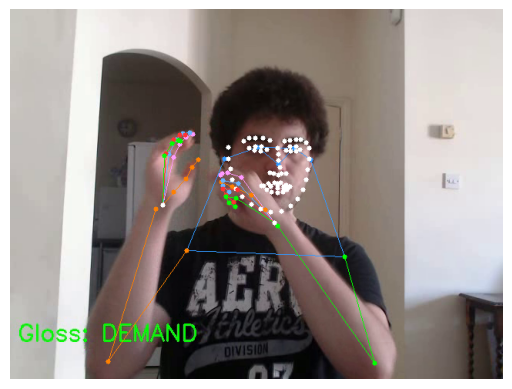

In [85]:
image_array = result['visualization'][0]

# Display the image using Matplotlib
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide the axis ticks and labels
plt.show()

In [86]:
image_array = result['visualization'][0]
bgr_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

# Display the image using OpenCV
cv2.imshow('Color Image', bgr_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
# Open the video file
#video_path = 0
cap = cv2.VideoCapture(
    "file://media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/0023159093449660606-CAFETERIA.mp4"
)
#cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=True,
                                      return_datasample=False)
        result = next(result_generator)
        image_array = cv2.cvtColor(result['visualization'][0],
                                   cv2.COLOR_RGB2BGR)
        # Display the annotated frame
        cv2.imshow("RTMPose Inference", image_array)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [88]:
result['predictions'][0][0]['keypoints']

[[339.4605529308319, 220.12040412425995],
 [367.8526143232982, 200.76218104362488],
 [312.3590397834778, 198.18108463287354],
 [397.53522396087646, 229.15424156188965],
 [278.8047854105632, 221.41095232963562],
 [473.6775704224905, 378.85783338546753],
 [233.63559683163965, 394.3444118499756],
 [557.563206354777, 485.97333443164825],
 [207.82463192939758, 501.4599128961563],
 [456.9004432360331, 464.03401494026184],
 [134.2633819580078, 620.1903477907181],
 [434.96112306912744, 620.1903477907181],
 [283.9669783910115, 620.1903477907181],
 [628.5433598359426, 620.1903477907181],
 [134.2633819580078, 439.5135990381241],
 [628.5433598359426, 465.3245631456375],
 [409.1501581668854, 620.1903477907181],
 [628.5433598359426, 489.84497904777527],
 [628.5433598359426, 431.77030980587006],
 [134.2633819580078, 620.1903477907181],
 [134.2633819580078, 311.7493267059326],
 [134.2633819580078, 425.3175687789917],
 [134.2633819580078, 620.1903477907181],
 [282.67643014589953, 202.05272924900055],
 

In [89]:
np.array(result['predictions'][0][0]['keypoints']).shape

(133, 2)

In [66]:
def extract_keypoints_from_file(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (640, 480))
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=False,
                                      return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)

In [67]:
def extract_keypoints_from_file_flip(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame, (640, 480))
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=False,
                                      return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)

In [ ]:
result_generator = inferencer(
    'webcam',
    show=True,
    return_vis=True,
    return_datasample=False,
)
results = [result for result in result_generator]
cv2.destroyAllWindows()

In [ ]:
test = extract_keypoints_from_file(
    'file://media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/0023159093449660606-CAFETERIA.mp4'
)

In [92]:
test_flip = extract_keypoints_from_file_flip(
    'file://media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/0023159093449660606-CAFETERIA.mp4'
)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [93]:
test[0]

array([9.19722855e-01, 9.18537438e-01, 9.25077319e-01, 8.25981200e-01,
       8.67071986e-01, 7.73584723e-01, 8.62794638e-01, 6.95110321e-01,
       4.78880286e-01, 2.13661492e-01, 1.75549924e-01, 1.82081327e-01,
       1.90482736e-01, 1.21674821e-01, 1.62808910e-01, 2.19400316e-01,
       7.85566121e-02, 6.15017451e-02, 1.19206011e-01, 1.18448868e-01,
       6.90567791e-02, 7.47043490e-02, 8.29189569e-02, 9.62446332e-01,
       9.73889709e-01, 1.00415611e+00, 1.00584197e+00, 1.00702953e+00,
       1.03141439e+00, 1.05152750e+00, 1.03633893e+00, 1.05816031e+00,
       1.07293963e+00, 1.06585741e+00, 1.05069852e+00, 1.01893640e+00,
       9.83252645e-01, 9.63908434e-01, 9.54297245e-01, 9.53059077e-01,
       9.75260377e-01, 9.94429827e-01, 1.00931573e+00, 9.95362282e-01,
       9.71587956e-01, 9.67489958e-01, 9.78986442e-01, 9.73830700e-01,
       9.66215074e-01, 9.62828994e-01, 9.91789758e-01, 9.85573530e-01,
       1.00018048e+00, 1.02013934e+00, 9.97766018e-01, 1.00275457e+00,
      

In [94]:
test_flip[0]

array([9.17213917e-01, 9.24520850e-01, 9.14957583e-01, 8.60036612e-01,
       8.14568996e-01, 8.62151980e-01, 7.62968183e-01, 4.47844177e-01,
       6.75890565e-01, 2.00479209e-01, 2.18123704e-01, 1.69560418e-01,
       1.78532451e-01, 1.78201571e-01, 1.20475203e-01, 6.62609190e-02,
       2.31806248e-01, 7.30969906e-02, 6.86154813e-02, 7.82907158e-02,
       6.43739551e-02, 1.02299161e-01, 1.08313352e-01, 9.54276860e-01,
       9.54159856e-01, 9.63353395e-01, 9.81949329e-01, 1.03084803e+00,
       1.05536413e+00, 1.07066083e+00, 1.07707977e+00, 1.04269111e+00,
       1.04462516e+00, 1.05802107e+00, 1.04476666e+00, 1.01680422e+00,
       9.99643624e-01, 1.00083220e+00, 9.74252820e-01, 9.61780190e-01,
       9.58216548e-01, 9.67471361e-01, 9.79676127e-01, 9.83761311e-01,
       9.67074752e-01, 9.68690038e-01, 1.00252569e+00, 1.01455736e+00,
       9.96881485e-01, 9.79582548e-01, 9.99086022e-01, 9.92591977e-01,
       1.00592375e+00, 1.02614152e+00, 9.93898392e-01, 9.99223471e-01,
      

In [95]:
test.shape

(55, 399)

In [68]:
def signvideodataframe(filepath):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath)

    # Define the path to the videos directory
    #path = 'file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/'
    path = 'file:///home/kristian/ASL_Citizen/videos/'
    # Create a 'Path' column by concatenating the path with 'Video file' column
    df['Path'] = path + df['Video file']

    # Calculate the frequency of each gloss and create a 'frequency' column
    df['Frequency'] = df['Gloss'].map(df['Gloss'].value_counts())

    # Sort the DataFrame by the 'Gloss' column
    df = df.sort_values(by='Gloss')

    # Reset the index of the DataFrame
    df = df.reset_index(drop=True)

    return df

In [69]:
#traindf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/train.csv')
traindf = signvideodataframe(
    'file:///home/kristian/ASL_Citizen/splits/train.csv')

In [70]:
traindf.head()

Participant ID                      Video file    Gloss ASL-LEX Code  \
0            P31   3827306090663467-1 DOLLAR.mp4  1DOLLAR     C_02_025   
1            P37  16792698524451422-1 DOLLAR.mp4  1DOLLAR     C_02_025   
2            P11   6868778695018762-1 DOLLAR.mp4  1DOLLAR     C_02_025   
3            P11   6870709051348651-1 DOLLAR.mp4  1DOLLAR     C_02_025   
4            P50   0719792557216079-1 DOLLAR.mp4  1DOLLAR     C_02_025   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/38273...         15  
1  file:///home/kristian/ASL_Citizen/videos/16792...         15  
2  file:///home/kristian/ASL_Citizen/videos/68687...         15  
3  file:///home/kristian/ASL_Citizen/videos/68707...         15  
4  file:///home/kristian/ASL_Citizen/videos/07197...         15

In [34]:
traindf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
40149            P37   9716493262876276-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40150            P31   7550572181460327-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40151            P46  47985881750082227-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40152            P50  04671245574824856-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40153            P51  19959052532136146-ZOOM OFF.mp4  ZOOMOFF     D_01_057   

                                                    Path  Frequency  
40149  file:///home/kristian/ASL_Citizen/videos/97164...         15  
40150  file:///home/kristian/ASL_Citizen/videos/75505...         15  
40151  file:///home/kristian/ASL_Citizen/videos/47985...         15  
40152  file:///home/kristian/ASL_Citizen/videos/04671...         15  
40153  file:///home/kristian/ASL_Citizen/videos/19959...         15

In [71]:
traindf['Path'][100]

'file:///home/kristian/ASL_Citizen/videos/44951093832888867-seedABOUT.mp4'

In [99]:
# Open the video file
cap = cv2.VideoCapture(traindf['Path'][100])
#cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=True,
                                      return_datasample=False)
        result = next(result_generator)
        image_array = cv2.cvtColor(result['visualization'][0],
                                   cv2.COLOR_RGB2BGR)
        # Display the annotated frame
        cv2.imshow("RTMPose Inference", image_array)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Output()

Output()

Output()

Output()

Output()

In [100]:
traindf.sample(20)

Participant ID                             Video file         Gloss  \
241            P27            9451130688097962-DECIDE.mp4        DECIDE   
843            P29             9608839995774701-SHAVE.mp4         SHAVE   
414            P16          2421908984724852-ELEVATOR.mp4      ELEVATOR   
733            P36              3567776249024257-NOON.mp4          NOON   
543            P52  17320386407822008-seedHURDLE-TRIP.mp4   HURDLE/TRIP   
309            P29           17411166247412857-DINNER.mp4        DINNER   
866            P37             43245204383901537-SINK.mp4          SINK   
850            P40            39648042077468615-SHAVE.mp4         SHAVE   
35             P11         30121385480613116-BACKPACK.mp4      BACKPACK   
78             P29              6922856844053422-BELT.mp4          BELT   
600            P29             23536769368182653-LOCK.mp4          LOCK   
345             P7           425667211082861-DOWNSIZE.mp4      DOWNSIZE   
191            P40       0048559284485312215-CONFUSED.mp4      CONFUSED   
104            P37              6392685968074112-BITE.mp4          BITE   
704            P11        9931923430169016-MICROSCOPE.mp4    MICROSCOPE   
683            P14         23020749118320083-MECHANIC.mp4      MECHANIC   
101            P43              5780599191678353-BITE.mp4          BITE   
782            P16           3665296105710427-RAZOR 2.mp4         RAZOR   
835            P29     5492001682449854-ROCKING CHAIR.mp4  ROCKINGCHAIR   
94             P33               556637926515527-BELT.mp4          BELT   

    ASL-LEX Code                                               Path  Frequency  
241     B_02_074  file:///home/kristian/ASL_Citizen/videos/94511...         20  
843     J_02_018  file:///home/kristian/ASL_Citizen/videos/96088...         19  
414     G_03_036  file:///home/kristian/ASL_Citizen/videos/24219...         19  
733     G_02_014  file:///home/kristian/ASL_Citizen/videos/35677...         19  
543     G_01_036  file:///home/kristian/ASL_Citizen/videos/17320...         22  
309     G_03_044  file:///home/kristian/ASL_Citizen/videos/17411...         18  
866     E_02_042  file:///home/kristian/ASL_Citizen/videos/43245...         18  
850     J_02_018  file:///home/kristian/ASL_Citizen/videos/39648...         19  
35      G_03_091  file:///home/kristian/ASL_Citizen/videos/30121...         19  
78      A_03_036  file:///home/kristian/ASL_Citizen/videos/69228...         19  
600     H_02_017  file:///home/kristian/ASL_Citizen/videos/23536...         18  
345     C_01_055  file:///home/kristian/ASL_Citizen/videos/42566...         18  
191     J_01_110  file:///home/kristian/ASL_Citizen/videos/00485...         18  
104     K_02_045  file:///home/kristian/ASL_Citizen/videos/63926...         21  
704     A_03_076  file:///home/kristian/ASL_Citizen/videos/99319...         18  
683     A_03_030  file:///home/kristian/ASL_Citizen/videos/23020...         20  
101     K_02_045  file:///home/kristian/ASL_Citizen/videos/57805...         21  
782     K_03_103  file:///home/kristian/ASL_Citizen/videos/36652...         18  
835     G_01_010  file:///home/kristian/ASL_Citizen/videos/54920...         20  
94      A_03_036  file:///home/kristian/ASL_Citizen/videos/55663...         19

In [72]:
traindf = traindf[traindf['Frequency'] > 17]
traindf = traindf.reset_index(drop=True)

In [39]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4  AXE1     G_03_066   
1            P28       7179300005186042-AXE.mp4  AXE1     G_03_066   
2            P29      16216064841959765-AXE.mp4  AXE1     G_03_066   
3            P37       6193814382865199-AXE.mp4  AXE1     G_03_066   
4            P40       5947453960317015-AXE.mp4  AXE1     G_03_066   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/07157...         19  
1  file:///home/kristian/ASL_Citizen/videos/71793...         19  
2  file:///home/kristian/ASL_Citizen/videos/16216...         19  
3  file:///home/kristian/ASL_Citizen/videos/61938...         19  
4  file:///home/kristian/ASL_Citizen/videos/59474...         19

In [40]:
traindf.tail()

Participant ID                      Video file     Gloss ASL-LEX Code  \
945            P50   9161417844146778-WHAT FOR.mp4  WHATFOR1     C_02_054   
946            P14  00930662603221255-WHAT FOR.mp4  WHATFOR1     C_02_054   
947            P27     82063651021682-WHAT FOR.mp4  WHATFOR1     C_02_054   
948            P40   5268072837528903-WHAT FOR.mp4  WHATFOR1     C_02_054   
949            P40   6363286086951516-WHAT FOR.mp4  WHATFOR1     C_02_054   

                                                  Path  Frequency  
945  file:///home/kristian/ASL_Citizen/videos/91614...         20  
946  file:///home/kristian/ASL_Citizen/videos/00930...         20  
947  file:///home/kristian/ASL_Citizen/videos/82063...         20  
948  file:///home/kristian/ASL_Citizen/videos/52680...         20  
949  file:///home/kristian/ASL_Citizen/videos/63632...         20

In [41]:
traindf.describe()

Frequency
count  950.000000
mean    19.082105
std      1.316026
min     18.000000
25%     18.000000
50%     19.000000
75%     20.000000
max     24.000000

In [73]:
traindf['Gloss'].nunique()

50

In [74]:
words = traindf['Gloss'].unique()
words

array(['AXE1', 'BACKPACK1', 'BASKETBALL1', 'BEE1', 'BELT1', 'BITE1',
       'BREAKFAST1', 'CANCER1', 'CHRISTMAS1', 'CONFUSED1', 'DARK1',
       'DEAF1', 'DECIDE1', 'DEMAND1', 'DEVELOP1', 'DINNER1', 'DOG1',
       'DOWNSIZE1', 'DRAG1', 'EAT1', 'EDIT1', 'ELEVATOR1', 'FINE1',
       'FLOAT1', 'FOREIGNER1', 'GUESS1', 'HALLOWEEN1', 'HOSPITAL1',
       'HURDLE/TRIP1', 'JEWELRY', 'KNIGHT1', 'LOCK1', 'LUNCH1', 'MAPLE',
       'MEAT1', 'MECHANIC1', 'MICROSCOPE1', 'MOVIE1', 'NOON1', 'PARTY1',
       'PATIENT2', 'RAZOR2', 'RIVER1', 'ROCKINGCHAIR1', 'SHAVE1', 'SINK',
       'SQUEEZE', 'THEY1', 'TWINS1', 'WHATFOR1'], dtype=object)

In [75]:
#valdf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/val.csv')
valdf = signvideodataframe('file:///home/kristian/ASL_Citizen/splits/val.csv')

In [76]:
valdf.head()

Participant ID                      Video file     Gloss ASL-LEX Code  \
0            P26  22595012150860327-1 DOLLAR.mp4   1DOLLAR     C_02_025   
1            P39   7421622940519235-1 DOLLAR.mp4   1DOLLAR     C_02_025   
2            P21    686738356933241-1 DOLLAR.mp4   1DOLLAR     C_02_025   
3            P12  9219095671540121-5 DOLLARS.mp4  5DOLLARS     B_01_062   
4            P21  1448188216215387-5 DOLLARS.mp4  5DOLLARS     B_01_062   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/22595...          3  
1  file:///home/kristian/ASL_Citizen/videos/74216...          3  
2  file:///home/kristian/ASL_Citizen/videos/68673...          3  
3  file:///home/kristian/ASL_Citizen/videos/92190...          4  
4  file:///home/kristian/ASL_Citizen/videos/14481...          4

In [46]:
valdf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
10299            P21    6959326205750493-ZOOM IN.mp4   ZOOMIN     B_02_056   
10300            P12   7758716133684984-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
10301            P39    844134294032034-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
10302            P21   5548062993721732-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
10303            P26  19366754134806952-ZOOM OFF.mp4  ZOOMOFF     D_01_057   

                                                    Path  Frequency  
10299  file:///home/kristian/ASL_Citizen/videos/69593...          3  
10300  file:///home/kristian/ASL_Citizen/videos/77587...          4  
10301  file:///home/kristian/ASL_Citizen/videos/84413...          4  
10302  file:///home/kristian/ASL_Citizen/videos/55480...          4  
10303  file:///home/kristian/ASL_Citizen/videos/19366...          4

In [77]:
#testdf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/test.csv')
testdf = signvideodataframe(
    'file:///home/kristian/ASL_Citizen/splits/test.csv')

In [48]:
testdf.head()

Participant ID                       Video file    Gloss ASL-LEX Code  \
0            P18   23521769221811684-1 DOLLAR.mp4  1DOLLAR     C_02_025   
1            P42  023931338852502426-1 DOLLAR.mp4  1DOLLAR     C_02_025   
2            P49    4893817008748198-1 DOLLAR.mp4  1DOLLAR     C_02_025   
3            P17   13991818149960333-1 DOLLAR.mp4  1DOLLAR     C_02_025   
4            P49   34625615110480457-1 DOLLAR.mp4  1DOLLAR     C_02_025   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/23521...         13  
1  file:///home/kristian/ASL_Citizen/videos/02393...         13  
2  file:///home/kristian/ASL_Citizen/videos/48938...         13  
3  file:///home/kristian/ASL_Citizen/videos/13991...         13  
4  file:///home/kristian/ASL_Citizen/videos/34625...         13

In [49]:
testdf.tail()

Participant ID                     Video file    Gloss ASL-LEX Code  \
32936            P18  4320702510886756-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32937             P9  7676354653247301-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32938            P47  5386272465310649-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32939            P18   738440364224181-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32940            P17  9953298353288469-ZOOM OFF.mp4  ZOOMOFF     D_01_057   

                                                    Path  Frequency  
32936  file:///home/kristian/ASL_Citizen/videos/43207...         13  
32937  file:///home/kristian/ASL_Citizen/videos/76763...         13  
32938  file:///home/kristian/ASL_Citizen/videos/53862...         13  
32939  file:///home/kristian/ASL_Citizen/videos/73844...         13  
32940  file:///home/kristian/ASL_Citizen/videos/99532...         13

In [78]:
valdf = valdf[valdf['Gloss'].isin(words)]
valdf = valdf.reset_index(drop=True)

In [51]:
valdf.head()

Participant ID                     Video file      Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE1     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE1     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE1     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE1     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK1     G_03_091   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/19778...          4  
1  file:///home/kristian/ASL_Citizen/videos/85811...          4  
2  file:///home/kristian/ASL_Citizen/videos/38774...          4  
3  file:///home/kristian/ASL_Citizen/videos/85214...          4  
4  file:///home/kristian/ASL_Citizen/videos/99902...          3

In [52]:
valdf.tail()

Participant ID                       Video file     Gloss ASL-LEX Code  \
186            P26  032677896012150764-WHAT FOR.mp4  WHATFOR1     C_02_054   
187             P5    6523145816470133-WHAT FOR.mp4  WHATFOR1     C_02_054   
188            P39    0283886564670357-WHAT FOR.mp4  WHATFOR1     C_02_054   
189            P21    6142521746642153-WHAT FOR.mp4  WHATFOR1     C_02_054   
190            P12   06408604416165864-WHAT FOR.mp4  WHATFOR1     C_02_054   

                                                  Path  Frequency  
186  file:///home/kristian/ASL_Citizen/videos/03267...          5  
187  file:///home/kristian/ASL_Citizen/videos/65231...          5  
188  file:///home/kristian/ASL_Citizen/videos/02838...          5  
189  file:///home/kristian/ASL_Citizen/videos/61425...          5  
190  file:///home/kristian/ASL_Citizen/videos/06408...          5

In [79]:
valdf['Gloss'].nunique()

50

In [54]:
valdf.describe()

Frequency
count  191.000000
mean     3.963351
std      0.770316
min      3.000000
25%      3.000000
50%      4.000000
75%      4.000000
max      6.000000

In [55]:
valdf.head()

Participant ID                     Video file      Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE1     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE1     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE1     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE1     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK1     G_03_091   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/19778...          4  
1  file:///home/kristian/ASL_Citizen/videos/85811...          4  
2  file:///home/kristian/ASL_Citizen/videos/38774...          4  
3  file:///home/kristian/ASL_Citizen/videos/85214...          4  
4  file:///home/kristian/ASL_Citizen/videos/99902...          3

In [80]:
testdf = testdf[testdf['Gloss'].isin(words)]
testdf = testdf.reset_index(drop=True)

In [57]:
testdf['Gloss'].nunique()

50

In [81]:
testdf.head()

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P15  33721516025652254-AXE.mp4  AXE1     G_03_066   
1            P47    519067006979435-AXE.mp4  AXE1     G_03_066   
2            P35   5104381603195376-AXE.mp4  AXE1     G_03_066   
3            P42  44458614013793873-AXE.mp4  AXE1     G_03_066   
4            P42   9604797909481075-AXE.mp4  AXE1     G_03_066   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/33721...         15  
1  file:///home/kristian/ASL_Citizen/videos/51906...         15  
2  file:///home/kristian/ASL_Citizen/videos/51043...         15  
3  file:///home/kristian/ASL_Citizen/videos/44458...         15  
4  file:///home/kristian/ASL_Citizen/videos/96047...         15

In [59]:
testdf.tail()

Participant ID                       Video file     Gloss ASL-LEX Code  \
724            P42    3448123355846451-WHAT FOR.mp4  WHATFOR1     C_02_054   
725            P47  034046510887022485-WHAT FOR.mp4  WHATFOR1     C_02_054   
726            P22    9359050586202402-WHAT FOR.mp4  WHATFOR1     C_02_054   
727            P42    2748457214117681-WHAT FOR.mp4  WHATFOR1     C_02_054   
728            P15     540014801916062-WHAT FOR.mp4  WHATFOR1     C_02_054   

                                                  Path  Frequency  
724  file:///home/kristian/ASL_Citizen/videos/34481...         18  
725  file:///home/kristian/ASL_Citizen/videos/03404...         18  
726  file:///home/kristian/ASL_Citizen/videos/93590...         18  
727  file:///home/kristian/ASL_Citizen/videos/27484...         18  
728  file:///home/kristian/ASL_Citizen/videos/54001...         18

In [60]:
testdf.describe()

Frequency
count  729.000000
mean    14.978052
std      2.229192
min      9.000000
25%     14.000000
50%     15.000000
75%     16.000000
max     20.000000

In [82]:
traindf['Gloss'] = traindf['Gloss'].str.replace('\d+', '', regex=True)
valdf['Gloss'] = valdf['Gloss'].str.replace('\d+', '', regex=True)
testdf['Gloss'] = testdf['Gloss'].str.replace('\d+', '', regex=True)

In [83]:
words = traindf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [84]:
words = valdf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [85]:
words = testdf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [86]:
print(traindf['Gloss'].nunique())
print(valdf['Gloss'].nunique())
print(testdf['Gloss'].nunique())

50
50
50


In [ ]:
extract_keypoints_from_file(traindf['Path'][0]).shape

In [ ]:
type(extract_keypoints_from_file(traindf.Path[0]))

In [68]:
cap = cv2.VideoCapture(traindf.Path[0])
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

100


In [69]:
cap = cv2.VideoCapture(traindf.Path[0])
frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = round(frames / fps)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(frames)
print(fps)
print(length)
print(width)
print(height)

100
31
3
640
480


In [70]:
traindf.count()

Participant ID    950
Video file        950
Gloss             950
ASL-LEX Code      950
Path              950
Frequency         950
dtype: int64

In [87]:
def frames_from_file(filepath):
    cap = cv2.VideoCapture(filepath)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    length = round(frames / fps)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    return frames, fps, length, width, height

In [72]:
frames_from_file(traindf.Path[643])

(83, 29, 3, 640, 480)

In [73]:
tqdm.pandas()
traindf[[
    'Frames', 'FPS', 'Length', 'Width', 'Height'
]] = traindf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 950/950 [00:15<00:00, 61.01it/s]


In [74]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
1            P28       7179300005186042-AXE.mp4   AXE     G_03_066   
2            P29      16216064841959765-AXE.mp4   AXE     G_03_066   
3            P37       6193814382865199-AXE.mp4   AXE     G_03_066   
4            P40       5947453960317015-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/07157...         19     100   31   
1  file:///home/kristian/ASL_Citizen/videos/71793...         19      81   30   
2  file:///home/kristian/ASL_Citizen/videos/16216...         19      47   30   
3  file:///home/kristian/ASL_Citizen/videos/61938...         19      67   30   
4  file:///home/kristian/ASL_Citizen/videos/59474...         19      89   30   

   Length  Width  Height  
0       3    640     480  
1       3    640     480  
2       2    640     480  
3       2    640     480  
4       3    640     480

In [75]:
traindf['Frames'].max()

540

In [76]:
traindf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  950.000000  950.000000  950.000000  950.000000  950.000000  950.000000
mean    19.082105   87.755789   29.354737    3.016842  641.347368  480.252632
std      1.316026   46.654745    2.197195    1.568167   20.731496    3.887155
min     18.000000   25.000000   11.000000    1.000000  640.000000  480.000000
25%     18.000000   60.000000   29.000000    2.000000  640.000000  480.000000
50%     19.000000   77.000000   30.000000    3.000000  640.000000  480.000000
75%     20.000000   97.000000   30.000000    3.000000  640.000000  480.000000
max     24.000000  540.000000   31.000000   18.000000  960.000000  540.000000

In [77]:
traindf = traindf[(traindf['Length'] > 1) & (traindf['FPS'] > 28) &
                  (traindf['Frames'] < 131)]
traindf = traindf.reset_index(drop=True)
traindf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000
mean    19.084577   76.113184   29.680348    2.593284  641.592040  480.298507
std      1.305343   20.091965    0.479790    0.671427   22.528858    4.224161
min     18.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     18.000000   60.000000   29.000000    2.000000  640.000000  480.000000
50%     19.000000   74.000000   30.000000    2.000000  640.000000  480.000000
75%     20.000000   88.000000   30.000000    3.000000  640.000000  480.000000
max     24.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [78]:
traindf['Frequency'] = traindf['Gloss'].map(traindf['Gloss'].value_counts())

traindf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000
mean    16.261194   76.113184   29.680348    2.593284  641.592040  480.298507
std      1.722009   20.091965    0.479790    0.671427   22.528858    4.224161
min     13.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     15.000000   60.000000   29.000000    2.000000  640.000000  480.000000
50%     16.000000   74.000000   30.000000    2.000000  640.000000  480.000000
75%     17.000000   88.000000   30.000000    3.000000  640.000000  480.000000
max     20.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [79]:
traindf.head(10)

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
1            P28       7179300005186042-AXE.mp4   AXE     G_03_066   
2            P29      16216064841959765-AXE.mp4   AXE     G_03_066   
3            P37       6193814382865199-AXE.mp4   AXE     G_03_066   
4            P40       5947453960317015-AXE.mp4   AXE     G_03_066   
5            P40        929570016067665-AXE.mp4   AXE     G_03_066   
6            P16        904767261814883-AXE.mp4   AXE     G_03_066   
7            P43     016134052760367945-AXE.mp4   AXE     G_03_066   
8            P40      23099527328070546-AXE.mp4   AXE     G_03_066   
9            P37      21310388087265242-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/07157...         18     100   31   
1  file:///home/kristian/ASL_Citizen/videos/71793...         18      81   30   
2  file:///home/kristian/ASL_Citizen/videos/16216...         18      47   30   
3  file:///home/kristian/ASL_Citizen/videos/61938...         18      67   30   
4  file:///home/kristian/ASL_Citizen/videos/59474...         18      89   30   
5  file:///home/kristian/ASL_Citizen/videos/92957...         18     112   29   
6  file:///home/kristian/ASL_Citizen/videos/90476...         18      64   30   
7  file:///home/kristian/ASL_Citizen/videos/01613...         18      75   30   
8  file:///home/kristian/ASL_Citizen/videos/23099...         18      91   29   
9  file:///home/kristian/ASL_Citizen/videos/21310...         18      69   30   

   Length  Width  Height  
0       3    640     480  
1       3    640     480  
2       2    640     480  
3       2    640     480  
4       3    640     480  
5       4    640     480  
6       2    640     480  
7       2    640     480  
8       3    640     480  
9       2    640     480

In [80]:
print(traindf['Gloss'].nunique())

50


In [81]:
tqdm.pandas()
valdf[[
    'Frames', 'FPS', 'Length', 'Width', 'Height'
]] = valdf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 191/191 [00:03<00:00, 50.66it/s]


In [82]:
valdf.head()

Participant ID                     Video file     Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK     G_03_091   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/19778...          4     121   30   
1  file:///home/kristian/ASL_Citizen/videos/85811...          4      81   29   
2  file:///home/kristian/ASL_Citizen/videos/38774...          4     120   30   
3  file:///home/kristian/ASL_Citizen/videos/85214...          4      71   29   
4  file:///home/kristian/ASL_Citizen/videos/99902...          3      93   29   

   Length  Width  Height  
0       4    640     480  
1       3    640     480  
2       4    640     480  
3       2    640     480  
4       3    640     480

In [83]:
valdf['Frames'].max()

207

In [84]:
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  191.000000  191.000000  191.000000  191.000000  191.0   191.0
mean     3.963351   88.905759   29.706806    3.000000  640.0   480.0
std      0.770316   36.214006    0.456423    1.248157    0.0     0.0
min      3.000000   37.000000   29.000000    1.000000  640.0   480.0
25%      3.000000   61.500000   29.000000    2.000000  640.0   480.0
50%      4.000000   76.000000   30.000000    3.000000  640.0   480.0
75%      4.000000  117.500000   30.000000    4.000000  640.0   480.0
max      6.000000  207.000000   30.000000    7.000000  640.0   480.0

In [85]:
valdf = valdf[(valdf['Length'] > 1) & (valdf['FPS'] > 28) &
              (valdf['Frames'] < 131)]
valdf = valdf.reset_index(drop=True)
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  162.000000  162.000000  162.000000  162.000000  162.0   162.0
mean     3.993827   78.203704   29.691358    2.623457  640.0   480.0
std      0.760001   23.787397    0.463365    0.772311    0.0     0.0
min      3.000000   45.000000   29.000000    2.000000  640.0   480.0
25%      3.000000   59.250000   29.000000    2.000000  640.0   480.0
50%      4.000000   71.500000   30.000000    2.000000  640.0   480.0
75%      4.000000   92.000000   30.000000    3.000000  640.0   480.0
max      6.000000  130.000000   30.000000    4.000000  640.0   480.0

In [86]:
valdf['Frequency'] = valdf['Gloss'].map(valdf['Gloss'].value_counts())
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  162.000000  162.000000  162.000000  162.000000  162.0   162.0
mean     3.506173   78.203704   29.691358    2.623457  640.0   480.0
std      0.907162   23.787397    0.463365    0.772311    0.0     0.0
min      2.000000   45.000000   29.000000    2.000000  640.0   480.0
25%      3.000000   59.250000   29.000000    2.000000  640.0   480.0
50%      4.000000   71.500000   30.000000    2.000000  640.0   480.0
75%      4.000000   92.000000   30.000000    3.000000  640.0   480.0
max      5.000000  130.000000   30.000000    4.000000  640.0   480.0

In [87]:
valdf.tail(60)

Participant ID                          Video file         Gloss  \
102            P12          2553847483769758-LUNCH.mp4         LUNCH   
103            P12          5796656512680336-LUNCH.mp4         LUNCH   
104             P5          5530107164077924-LUNCH.mp4         LUNCH   
105            P21         07736207797943306-LUNCH.mp4         LUNCH   
106            P26          2560023931191153-MAPLE.mp4         MAPLE   
107            P21          7629092396207264-MAPLE.mp4         MAPLE   
108            P39           6940052288653344-MEAT.mp4          MEAT   
109            P21          23447000304598498-MEAT.mp4          MEAT   
110            P26          46170617189439445-MEAT.mp4          MEAT   
111            P26        424117143455232-MECHANIC.mp4      MECHANIC   
112            P21       7355641552290353-MECHANIC.mp4      MECHANIC   
113            P26     1550944296003025-MICROSCOPE.mp4    MICROSCOPE   
114            P21     9187403001004872-MICROSCOPE.mp4    MICROSCOPE   
115            P39     5547731542068628-MICROSCOPE.mp4    MICROSCOPE   
116             P5    10557248501909733-MICROSCOPE.mp4    MICROSCOPE   
117            P26          2838376949179944-MOVIE.mp4         MOVIE   
118            P12         39474504957896217-MOVIE.mp4         MOVIE   
119            P21           671764401941833-MOVIE.mp4         MOVIE   
120            P39          5535338426456671-MOVIE.mp4         MOVIE   
121            P12          15347326711184706-NOON.mp4          NOON   
122            P26          22732217637347518-NOON.mp4          NOON   
123            P21           7713607971692202-NOON.mp4          NOON   
124            P39            717958009426233-NOON.mp4          NOON   
125            P12           878457250310533-PARTY.mp4         PARTY   
126            P26         29398177566155903-PARTY.mp4         PARTY   
127            P21        006918970578539518-PARTY.mp4         PARTY   
128            P39          6496108914533325-PARTY.mp4         PARTY   
129            P26     08197479357139326-PATIENT 2.mp4       PATIENT   
130            P12     06585822033156608-PATIENT 2.mp4       PATIENT   
131            P21      9858541230690814-PATIENT 2.mp4       PATIENT   
132            P26       28202328150486666-RAZOR 2.mp4         RAZOR   
133            P21        2710513815020268-RAZOR 2.mp4         RAZOR   
134            P21          5962378845845178-RIVER.mp4         RIVER   
135            P12          3054167723169219-RIVER.mp4         RIVER   
136            P26         05621288177415629-RIVER.mp4         RIVER   
137            P26  9826258167906428-ROCKING CHAIR.mp4  ROCKINGCHAIR   
138            P21  6414524542629407-ROCKING CHAIR.mp4  ROCKINGCHAIR   
139            P12  6050297960065525-ROCKING CHAIR.mp4  ROCKINGCHAIR   
140            P39  8563899734807414-ROCKING CHAIR.mp4  ROCKINGCHAIR   
141            P26          6416983573445294-SHAVE.mp4         SHAVE   
142            P39          3159241677201454-SHAVE.mp4         SHAVE   
143            P21        021193533049441937-SHAVE.mp4         SHAVE   
144            P12          3423044704100937-SHAVE.mp4         SHAVE   
145            P12          6961575623504714-SHAVE.mp4         SHAVE   
146            P12          36176458889227514-SINK.mp4          SINK   
147            P21           6376722418151588-SINK.mp4          SINK   
148            P26           9377718462347715-SINK.mp4          SINK   
149            P26       17092802473126545-SQUEEZE.mp4       SQUEEZE   
150            P21       03951129691638511-SQUEEZE.mp4       SQUEEZE   
151            P26           2151941336300882-THEY.mp4          THEY   
152            P21           9598803772091737-THEY.mp4          THEY   
153            P39         30415256515089983-TWINS.mp4         TWINS   
154            P26          9969703511848236-TWINS.mp4         TWINS   
155             P5          7359133874002342-TWINS.mp4         TWINS   
156            P21          9942639780287319

In [88]:
valdf.head(10)

Participant ID                       Video file       Gloss ASL-LEX Code  \
0            P39        19778675091674147-AXE.mp4         AXE     G_03_066   
1            P26         8581142177964065-AXE.mp4         AXE     G_03_066   
2            P39         3877478645046861-AXE.mp4         AXE     G_03_066   
3            P21         8521417940364975-AXE.mp4         AXE     G_03_066   
4             P5    9990244640190733-BACKPACK.mp4    BACKPACK     G_03_091   
5            P39    4985293038019454-BACKPACK.mp4    BACKPACK     G_03_091   
6            P21      20198961584817-BACKPACK.mp4    BACKPACK     G_03_091   
7             P5  8423017864044668-BASKETBALL.mp4  BASKETBALL     A_03_045   
8            P39  6251993314243527-BASKETBALL.mp4  BASKETBALL     A_03_045   
9            P26  6152714959604932-BASKETBALL.mp4  BASKETBALL     A_03_045   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/19778...          4     121   30   
1  file:///home/kristian/ASL_Citizen/videos/85811...          4      81   29   
2  file:///home/kristian/ASL_Citizen/videos/38774...          4     120   30   
3  file:///home/kristian/ASL_Citizen/videos/85214...          4      71   29   
4  file:///home/kristian/ASL_Citizen/videos/99902...          3      93   29   
5  file:///home/kristian/ASL_Citizen/videos/49852...          3     128   30   
6  file:///home/kristian/ASL_Citizen/videos/20198...          3      48   30   
7  file:///home/kristian/ASL_Citizen/videos/84230...          5      90   30   
8  file:///home/kristian/ASL_Citizen/videos/62519...          5     127   30   
9  file:///home/kristian/ASL_Citizen/videos/61527...          5      60   30   

   Length  Width  Height  
0       4    640     480  
1       3    640     480  
2       4    640     480  
3       2    640     480  
4       3    640     480  
5       4    640     480  
6       2    640     480  
7       3    640     480  
8       4    640     480  
9       2    640     480

In [89]:
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  162.000000  162.000000  162.000000  162.000000  162.0   162.0
mean     3.506173   78.203704   29.691358    2.623457  640.0   480.0
std      0.907162   23.787397    0.463365    0.772311    0.0     0.0
min      2.000000   45.000000   29.000000    2.000000  640.0   480.0
25%      3.000000   59.250000   29.000000    2.000000  640.0   480.0
50%      4.000000   71.500000   30.000000    2.000000  640.0   480.0
75%      4.000000   92.000000   30.000000    3.000000  640.0   480.0
max      5.000000  130.000000   30.000000    4.000000  640.0   480.0

In [90]:
print(valdf['Gloss'].nunique())

50


In [91]:
tqdm.pandas()
testdf[[
    'Frames', 'FPS', 'Length', 'Width', 'Height'
]] = testdf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 729/729 [00:16<00:00, 44.57it/s]


In [92]:
testdf.head()

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P15  33721516025652254-AXE.mp4   AXE     G_03_066   
1            P47    519067006979435-AXE.mp4   AXE     G_03_066   
2            P35   5104381603195376-AXE.mp4   AXE     G_03_066   
3            P42  44458614013793873-AXE.mp4   AXE     G_03_066   
4            P42   9604797909481075-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/33721...         15     196   29   
1  file:///home/kristian/ASL_Citizen/videos/51906...         15     102   26   
2  file:///home/kristian/ASL_Citizen/videos/51043...         15      70   29   
3  file:///home/kristian/ASL_Citizen/videos/44458...         15      57   30   
4  file:///home/kristian/ASL_Citizen/videos/96047...         15      66   30   

   Length  Width  Height  
0       7    640     480  
1       4    640     480  
2       2    640     480  
3       2    960     540  
4       2    960     540

In [93]:
testdf['Frames'].max()

234

In [94]:
testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  729.000000  729.000000  729.000000  729.000000  729.000000  729.000000
mean    14.978052   75.192044   28.696845    2.624143  684.334705  488.312757
std      2.229192   27.848864    3.113689    1.003439  110.626974   20.742558
min      9.000000   10.000000   14.000000    0.000000  640.000000  480.000000
25%     14.000000   56.000000   29.000000    2.000000  640.000000  480.000000
50%     15.000000   73.000000   30.000000    3.000000  640.000000  480.000000
75%     16.000000   90.000000   30.000000    3.000000  640.000000  480.000000
max     20.000000  234.000000   31.000000    8.000000  960.000000  540.000000

In [95]:
testdf = testdf[(testdf['Length'] > 1) & (testdf['FPS'] > 28) &
                (testdf['Frames'] < 131)]

testdf = testdf.reset_index(drop=True)
testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean    15.014981   77.256554   29.702247    2.619850  688.539326  489.101124
std      2.217904   19.420007    0.526337    0.670792  114.896647   21.543121
min      9.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     14.000000   61.000000   29.000000    2.000000  640.000000  480.000000
50%     15.000000   75.000000   30.000000    3.000000  640.000000  480.000000
75%     16.000000   91.000000   30.000000    3.000000  640.000000  480.000000
max     20.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [96]:
testdf['Frequency'] = testdf['Gloss'].map(testdf['Gloss'].value_counts())

testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean    11.254682   77.256554   29.702247    2.619850  688.539326  489.101124
std      2.311308   19.420007    0.526337    0.670792  114.896647   21.543121
min      5.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     10.000000   61.000000   29.000000    2.000000  640.000000  480.000000
50%     12.000000   75.000000   30.000000    3.000000  640.000000  480.000000
75%     13.000000   91.000000   30.000000    3.000000  640.000000  480.000000
max     15.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [97]:
testdf.tail(60)

Participant ID                      Video file    Gloss ASL-LEX Code  \
474             P9      5911137084980156-SHAVE.mp4    SHAVE     J_02_018   
475            P35      5887689273566759-SHAVE.mp4    SHAVE     J_02_018   
476            P48      6621939724418062-SHAVE.mp4    SHAVE     J_02_018   
477            P17     09709454810039175-SHAVE.mp4    SHAVE     J_02_018   
478            P42      3588759801071051-SHAVE.mp4    SHAVE     J_02_018   
479            P35      4608324102845509-SHAVE.mp4    SHAVE     J_02_018   
480             P6     37779347947817365-SHAVE.mp4    SHAVE     J_02_018   
481            P35      5403299092715226-SHAVE.mp4    SHAVE     J_02_018   
482            P47      4814760954431352-SHAVE.mp4    SHAVE     J_02_018   
483            P22      4185420608277408-SHAVE.mp4    SHAVE     J_02_018   
484            P42     45913985094539034-SHAVE.mp4    SHAVE     J_02_018   
485            P48      9572472020825835-SHAVE.mp4    SHAVE     J_02_018   
486            P48       8837115118398433-SINK.mp4     SINK     E_02_042   
487             P9       8342342809172125-SINK.mp4     SINK     E_02_042   
488            P35       5780399875754547-SINK.mp4     SINK     E_02_042   
489             P6      30542066641425136-SINK.mp4     SINK     E_02_042   
490            P47      10941417100216433-SINK.mp4     SINK     E_02_042   
491            P49       9462586175856116-SINK.mp4     SINK     E_02_042   
492            P17         65783462643741-SINK.mp4     SINK     E_02_042   
493            P22       8675465806927196-SINK.mp4     SINK     E_02_042   
494            P42     013933028993222907-SINK.mp4     SINK     E_02_042   
495            P42    1507074049477588-SQUEEZE.mp4  SQUEEZE     H_03_019   
496            P35   47046133854683725-SQUEEZE.mp4  SQUEEZE     H_03_019   
497            P48    5650251393797099-SQUEEZE.mp4  SQUEEZE     H_03_019   
498             P9    1630741460505114-SQUEEZE.mp4  SQUEEZE     H_03_019   
499            P49    6110727438268888-SQUEEZE.mp4  SQUEEZE     H_03_019   
500            P35       4877518027558987-THEY.mp4     THEY     F_02_103   
501            P47      27954487382286475-THEY.mp4     THEY     F_02_103   
502            P17       5713986054090463-THEY.mp4     THEY     F_02_103   
503            P42       9506371438753063-THEY.mp4     THEY     F_02_103   
504            P42       6351385061595975-THEY.mp4     THEY     F_02_103   
505            P35      37410330681116033-THEY.mp4     THEY     F_02_103   
506             P9       8208473879770646-THEY.mp4     THEY     F_02_103   
507            P15       8161529489147155-THEY.mp4     THEY     F_02_103   
508             P6       4843002553575395-THEY.mp4     THEY     F_02_103   
509            P48       6294547374725679-THEY.mp4     THEY     F_02_103   
510            P48     24605674688653978-TWINS.mp4    TWINS     F_01_032   
511            P17     31730779368330464-TWINS.mp4    TWINS     F_01_032   
512            P42      5607838772101854-TWINS.mp4    TWINS     F_01_032   
513             P9      4032127809635533-TWINS.mp4    TWINS     F_01_032   
514            P22     29587887363119436-TWINS.mp4    TWINS     F_01_032   
515            P35     06625351805349333-TWINS.mp4    TWINS     F_01_032   
516            P49      5414581968670888-TWINS.mp4    TWINS     F_01_032   
517            P15     03604051300002031-TWINS.mp4    TWINS     F_01_032   
518            P35      2825233660609592-TWINS.mp4    TWINS     F_01_032   
519             P6      8598719617773274-TWINS.mp4    TWINS     F_01_032   
520            P47     18536227362107272-TWINS.mp4    TWINS     F_01_032   
521            P17  33051835760678294-WHAT FOR.mp4  WHATFOR     C_02_054   
522             P6   6734748834983595-WHAT FOR.mp4  WHATFOR     C_02_054   
523             P6  41953269936944704-WHAT FOR.mp4  WHATFOR     C_02_054   
524            P48  11542521046357379-WHAT FOR.mp4  WHATFOR     C_02_054   
525             P9   6491618764233542-WHAT FOR.mp4  

In [98]:
testdf.head(10)

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P35   5104381603195376-AXE.mp4   AXE     G_03_066   
1            P42  44458614013793873-AXE.mp4   AXE     G_03_066   
2            P42   9604797909481075-AXE.mp4   AXE     G_03_066   
3             P9  30728048195204827-AXE.mp4   AXE     G_03_066   
4             P6  28522130623160047-AXE.mp4   AXE     G_03_066   
5             P6   9169591255818932-AXE.mp4   AXE     G_03_066   
6            P17   7135244799398011-AXE.mp4   AXE     G_03_066   
7            P49  23228935359891456-AXE.mp4   AXE     G_03_066   
8            P22   5872128462194921-AXE.mp4   AXE     G_03_066   
9            P35   3681922148149226-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/51043...         11      70   29   
1  file:///home/kristian/ASL_Citizen/videos/44458...         11      57   30   
2  file:///home/kristian/ASL_Citizen/videos/96047...         11      66   30   
3  file:///home/kristian/ASL_Citizen/videos/30728...         11      96   30   
4  file:///home/kristian/ASL_Citizen/videos/28522...         11      54   29   
5  file:///home/kristian/ASL_Citizen/videos/91695...         11      59   30   
6  file:///home/kristian/ASL_Citizen/videos/71352...         11      82   30   
7  file:///home/kristian/ASL_Citizen/videos/23228...         11      94   30   
8  file:///home/kristian/ASL_Citizen/videos/58721...         11      53   30   
9  file:///home/kristian/ASL_Citizen/videos/36819...         11      77   30   

   Length  Width  Height  
0       2    640     480  
1       2    960     540  
2       2    960     540  
3       3    640     480  
4       2    640     480  
5       2    640     480  
6       3    640     480  
7       3    640     480  
8       2    640     480  
9       3    640     480

In [99]:
testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean    11.254682   77.256554   29.702247    2.619850  688.539326  489.101124
std      2.311308   19.420007    0.526337    0.670792  114.896647   21.543121
min      5.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     10.000000   61.000000   29.000000    2.000000  640.000000  480.000000
50%     12.000000   75.000000   30.000000    3.000000  640.000000  480.000000
75%     13.000000   91.000000   30.000000    3.000000  640.000000  480.000000
max     15.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [100]:
print(testdf['Gloss'].nunique())

50


In [ ]:
keypoints_series = traindf['Path'].progress_apply(extract_keypoints_from_file)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints.npy",
    keypoints_series)
keypoints_series = traindf['Path'].progress_apply(
    extract_keypoints_from_file_flip)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints_flip.npy",
    keypoints_series)

In [ ]:
keypoints_series.shape

In [101]:
keypoints_series = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints.npy",
    allow_pickle=True)

In [102]:
keypoints_series.shape

(804,)

In [103]:
max(keypoints.shape[0] for keypoints in keypoints_series)

130

In [104]:
min(keypoints.shape[0] for keypoints in keypoints_series)

45

In [107]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(keypoints_series), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(keypoints_series):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

In [108]:
keypoints_np.shape

(804, 130, 399)

In [109]:
print(keypoints_np[6])

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.89147449   0.8976084    0.89568257 ... 458.35784853 239.05811119
  458.35784853]
 [  0.89196533   0.89440548   0.8918556  ... 456.38752186 233.94797389
  456.38752186]
 [  0.89188373   0.8966639    0.89486736 ... 459.60636568 227.72271776
  459.60636568]]


In [110]:
keypoints_np.shape

(804, 130, 399)

In [ ]:
keypoints_series = testdf['Path'].progress_apply(extract_keypoints_from_file)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints.npy",
    keypoints_series)
keypoints_series = testdf['Path'].progress_apply(
    extract_keypoints_from_file_flip)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints_flip.npy",
    keypoints_series)

In [99]:
keypoints_series.shape

(534,)

In [111]:
keypoints_series = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints.npy",
    allow_pickle=True)

In [112]:
keypoints_series.shape

(534,)

In [113]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(keypoints_series), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(keypoints_series):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

In [114]:
keypoints_np.shape

(534, 130, 399)

In [ ]:
keypoints_series = valdf['Path'].progress_apply(extract_keypoints_from_file)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints.npy",
    keypoints_series)
keypoints_series = valdf['Path'].progress_apply(
    extract_keypoints_from_file_flip)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints_flip.npy",
    keypoints_series)

In [ ]:
keypoints_series.shape

In [115]:
keypoints_series = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints.npy",
    allow_pickle=True)

In [116]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(keypoints_series), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(keypoints_series):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

In [117]:
keypoints_np.shape

(162, 130, 399)

# Preprocessing

In [88]:
from sklearn.preprocessing import OrdinalEncoder
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

In [89]:
import numpy as np

train_keypoints = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints.npy",
    allow_pickle=True)
val_keypoints = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints.npy",
    allow_pickle=True)
test_keypoints = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints.npy",
    allow_pickle=True)

print('Training Keypoints Shape:', train_keypoints.shape)
print('Validation Kepoints Shape:', val_keypoints.shape)
print('Test Keypoints Shape:', test_keypoints.shape)

Training Keypoints Shape: (804,)
Validation Kepoints Shape: (162,)
Test Keypoints Shape: (534,)


In [90]:
train_keypoints_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_keypoints_flip.npy",
    allow_pickle=True)
val_keypoints_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_keypoints_flip.npy",
    allow_pickle=True)
test_keypoints_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_keypoints_flip.npy",
    allow_pickle=True)

print('Training Keypoints Shape:', train_keypoints_flip.shape)
print('Validation Kepoints Shape:', val_keypoints_flip.shape)
print('Test Keypoints Shape:', test_keypoints_flip.shape)

Training Keypoints Shape: (804,)
Validation Kepoints Shape: (162,)
Test Keypoints Shape: (534,)


In [91]:
max_len = 130

In [92]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(train_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(train_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

train_keypoints = keypoints_np
print('Training Keypoints Shape:', train_keypoints.shape)

Training Keypoints Shape: (804, 130, 399)


In [93]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(val_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(val_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

val_keypoints = keypoints_np
print('Validation Keypoints Shape:', val_keypoints.shape)

Validation Keypoints Shape: (162, 130, 399)


In [94]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(test_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(test_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

test_keypoints = keypoints_np
print('Test Keypoints Shape:', test_keypoints.shape)

Test Keypoints Shape: (534, 130, 399)


In [95]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(train_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(train_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

train_keypoints_flip = keypoints_np
print('Training Keypoints Shape:', train_keypoints_flip.shape)

Training Keypoints Shape: (804, 130, 399)


In [96]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(val_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(val_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

val_keypoints_flip = keypoints_np
print('Validation Keypoints Shape:', val_keypoints_flip.shape)

Validation Keypoints Shape: (162, 130, 399)


In [97]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(test_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(test_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

test_keypoints_flip = keypoints_np
print('Test Keypoints Shape:', test_keypoints_flip.shape)

Test Keypoints Shape: (534, 130, 399)


In [111]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
1            P28       7179300005186042-AXE.mp4   AXE     G_03_066   
2            P29      16216064841959765-AXE.mp4   AXE     G_03_066   
3            P37       6193814382865199-AXE.mp4   AXE     G_03_066   
4            P40       5947453960317015-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/07157...         18     100   31   
1  file:///home/kristian/ASL_Citizen/videos/71793...         18      81   30   
2  file:///home/kristian/ASL_Citizen/videos/16216...         18      47   30   
3  file:///home/kristian/ASL_Citizen/videos/61938...         18      67   30   
4  file:///home/kristian/ASL_Citizen/videos/59474...         18      89   30   

   Length  Width  Height  
0       3    640     480  
1       3    640     480  
2       2    640     480  
3       2    640     480  
4       3    640     480

In [112]:
encoder = OrdinalEncoder()

In [113]:
traindf['Cat_label'] = encoder.fit_transform(traindf[['Gloss']]).astype(int)
traindf = traindf.sort_values(by='Gloss', )

In [114]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0             P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
17            P37      29360158406046777-AXE.mp4   AXE     G_03_066   
16            P27     053394218351220823-AXE.mp4   AXE     G_03_066   
15            P40      10598328043940142-AXE.mp4   AXE     G_03_066   
14            P50       3937261764308986-AXE.mp4   AXE     G_03_066   

                                                 Path  Frequency  Frames  FPS  \
0   file:///home/kristian/ASL_Citizen/videos/07157...         18     100   31   
17  file:///home/kristian/ASL_Citizen/videos/29360...         18      73   30   
16  file:///home/kristian/ASL_Citizen/videos/05339...         18      52   29   
15  file:///home/kristian/ASL_Citizen/videos/10598...         18      81   29   
14  file:///home/kristian/ASL_Citizen/videos/39372...         18      72   30   

    Length  Width  Height  Cat_label  
0        3    640     480          0  
17       2    640     480          0  
16       2    640     480          0  
15       3    640     480          0  
14       2    640     480          0

In [115]:
traindf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
789            P40   6445331634562388-WHAT FOR.mp4  WHATFOR     C_02_054   
788            P37   6237575353180616-WHAT FOR.mp4  WHATFOR     C_02_054   
802            P40   5268072837528903-WHAT FOR.mp4  WHATFOR     C_02_054   
794            P37  16185522171162914-WHAT FOR.mp4  WHATFOR     C_02_054   
803            P40   6363286086951516-WHAT FOR.mp4  WHATFOR     C_02_054   

                                                  Path  Frequency  Frames  \
789  file:///home/kristian/ASL_Citizen/videos/64453...         16      89   
788  file:///home/kristian/ASL_Citizen/videos/62375...         16      56   
802  file:///home/kristian/ASL_Citizen/videos/52680...         16      92   
794  file:///home/kristian/ASL_Citizen/videos/16185...         16      64   
803  file:///home/kristian/ASL_Citizen/videos/63632...         16      65   

     FPS  Length  Width  Height  Cat_label  
789   30       3    640     480         49  
788   30       2    640     480         49  
802   29       3    640     480         49  
794   30       2    640     480         49  
803   29       2    640     480         49

In [116]:
valdf['Cat_label'] = encoder.fit_transform(valdf[['Gloss']]).astype(int)
valdf = valdf.sort_values(by='Gloss', )

In [117]:
valdf.head()

Participant ID                     Video file     Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK     G_03_091   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/19778...          4     121   30   
1  file:///home/kristian/ASL_Citizen/videos/85811...          4      81   29   
2  file:///home/kristian/ASL_Citizen/videos/38774...          4     120   30   
3  file:///home/kristian/ASL_Citizen/videos/85214...          4      71   29   
4  file:///home/kristian/ASL_Citizen/videos/99902...          3      93   29   

   Length  Width  Height  Cat_label  
0       4    640     480          0  
1       3    640     480          0  
2       4    640     480          0  
3       2    640     480          0  
4       3    640     480          1

In [118]:
valdf.tail()

Participant ID                       Video file    Gloss ASL-LEX Code  \
159            P39    0283886564670357-WHAT FOR.mp4  WHATFOR     C_02_054   
160            P21    6142521746642153-WHAT FOR.mp4  WHATFOR     C_02_054   
157            P26  032677896012150764-WHAT FOR.mp4  WHATFOR     C_02_054   
158             P5    6523145816470133-WHAT FOR.mp4  WHATFOR     C_02_054   
161            P12   06408604416165864-WHAT FOR.mp4  WHATFOR     C_02_054   

                                                  Path  Frequency  Frames  \
159  file:///home/kristian/ASL_Citizen/videos/02838...          5     121   
160  file:///home/kristian/ASL_Citizen/videos/61425...          5      57   
157  file:///home/kristian/ASL_Citizen/videos/03267...          5      81   
158  file:///home/kristian/ASL_Citizen/videos/65231...          5     116   
161  file:///home/kristian/ASL_Citizen/videos/06408...          5      71   

     FPS  Length  Width  Height  Cat_label  
159   30       4    640     480         49  
160   30       2    640     480         49  
157   29       3    640     480         49  
158   30       4    640     480         49  
161   30       2    640     480         49

In [119]:
testdf['Cat_label'] = encoder.fit_transform(testdf[['Gloss']]).astype(int)
testdf = testdf.sort_values(by='Gloss', )

In [120]:
testdf.head()

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P35   5104381603195376-AXE.mp4   AXE     G_03_066   
1            P42  44458614013793873-AXE.mp4   AXE     G_03_066   
2            P42   9604797909481075-AXE.mp4   AXE     G_03_066   
3             P9  30728048195204827-AXE.mp4   AXE     G_03_066   
4             P6  28522130623160047-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/51043...         11      70   29   
1  file:///home/kristian/ASL_Citizen/videos/44458...         11      57   30   
2  file:///home/kristian/ASL_Citizen/videos/96047...         11      66   30   
3  file:///home/kristian/ASL_Citizen/videos/30728...         11      96   30   
4  file:///home/kristian/ASL_Citizen/videos/28522...         11      54   29   

   Length  Width  Height  Cat_label  
0       2    640     480          0  
1       2    960     540          0  
2       2    960     540          0  
3       3    640     480          0  
4       2    640     480          0

In [121]:
testdf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
522             P6   6734748834983595-WHAT FOR.mp4  WHATFOR     C_02_054   
521            P17  33051835760678294-WHAT FOR.mp4  WHATFOR     C_02_054   
532            P42   2748457214117681-WHAT FOR.mp4  WHATFOR     C_02_054   
526            P42   9684934734400592-WHAT FOR.mp4  WHATFOR     C_02_054   
533            P15    540014801916062-WHAT FOR.mp4  WHATFOR     C_02_054   

                                                  Path  Frequency  Frames  \
522  file:///home/kristian/ASL_Citizen/videos/67347...         13      66   
521  file:///home/kristian/ASL_Citizen/videos/33051...         13      52   
532  file:///home/kristian/ASL_Citizen/videos/27484...         13      74   
526  file:///home/kristian/ASL_Citizen/videos/96849...         13      89   
533  file:///home/kristian/ASL_Citizen/videos/54001...         13      79   

     FPS  Length  Width  Height  Cat_label  
522   29       2    640     480         49  
521   31       2    640     480         49  
532   30       2    960     540         49  
526   30       3    960     540         49  
533   29       3    640     480         49

In [98]:
label_map = {label: num for num, label in enumerate(traindf['Gloss'].unique())}

In [99]:
label_map

{'AXE': 0,
 'BACKPACK': 1,
 'BASKETBALL': 2,
 'BEE': 3,
 'BELT': 4,
 'BITE': 5,
 'BREAKFAST': 6,
 'CANCER': 7,
 'CHRISTMAS': 8,
 'CONFUSED': 9,
 'DARK': 10,
 'DEAF': 11,
 'DECIDE': 12,
 'DEMAND': 13,
 'DEVELOP': 14,
 'DINNER': 15,
 'DOG': 16,
 'DOWNSIZE': 17,
 'DRAG': 18,
 'EAT': 19,
 'EDIT': 20,
 'ELEVATOR': 21,
 'FINE': 22,
 'FLOAT': 23,
 'FOREIGNER': 24,
 'GUESS': 25,
 'HALLOWEEN': 26,
 'HOSPITAL': 27,
 'HURDLE/TRIP': 28,
 'JEWELRY': 29,
 'KNIGHT': 30,
 'LOCK': 31,
 'LUNCH': 32,
 'MAPLE': 33,
 'MEAT': 34,
 'MECHANIC': 35,
 'MICROSCOPE': 36,
 'MOVIE': 37,
 'NOON': 38,
 'PARTY': 39,
 'PATIENT': 40,
 'RAZOR': 41,
 'RIVER': 42,
 'ROCKINGCHAIR': 43,
 'SHAVE': 44,
 'SINK': 45,
 'SQUEEZE': 46,
 'THEY': 47,
 'TWINS': 48,
 'WHATFOR': 49}

In [100]:
inv_label_map = {v: k for k, v in label_map.items()}

In [125]:
inv_label_map

{0: 'AXE',
 1: 'BACKPACK',
 2: 'BASKETBALL',
 3: 'BEE',
 4: 'BELT',
 5: 'BITE',
 6: 'BREAKFAST',
 7: 'CANCER',
 8: 'CHRISTMAS',
 9: 'CONFUSED',
 10: 'DARK',
 11: 'DEAF',
 12: 'DECIDE',
 13: 'DEMAND',
 14: 'DEVELOP',
 15: 'DINNER',
 16: 'DOG',
 17: 'DOWNSIZE',
 18: 'DRAG',
 19: 'EAT',
 20: 'EDIT',
 21: 'ELEVATOR',
 22: 'FINE',
 23: 'FLOAT',
 24: 'FOREIGNER',
 25: 'GUESS',
 26: 'HALLOWEEN',
 27: 'HOSPITAL',
 28: 'HURDLE/TRIP',
 29: 'JEWELRY',
 30: 'KNIGHT',
 31: 'LOCK',
 32: 'LUNCH',
 33: 'MAPLE',
 34: 'MEAT',
 35: 'MECHANIC',
 36: 'MICROSCOPE',
 37: 'MOVIE',
 38: 'NOON',
 39: 'PARTY',
 40: 'PATIENT',
 41: 'RAZOR',
 42: 'RIVER',
 43: 'ROCKINGCHAIR',
 44: 'SHAVE',
 45: 'SINK',
 46: 'SQUEEZE',
 47: 'THEY',
 48: 'TWINS',
 49: 'WHATFOR'}

In [126]:
inv_label_map[0]

'AXE'

In [127]:
traindf.sample(10)

Participant ID                        Video file        Gloss  \
328            P37          3878260902223658-EAT.mp4          EAT   
508            P31         7892179183511641-LOCK.mp4         LOCK   
466            P16  7664642326742872-HURDLE-TRIP.mp4  HURDLE/TRIP   
101             P1    7809503445047001-BREAKFAST.mp4    BREAKFAST   
412            P40        9825690623317844-GUESS.mp4        GUESS   
112             P7    8518237171580363-BREAKFAST.mp4    BREAKFAST   
578            P31     4328181527879751-MECHANIC.mp4     MECHANIC   
650            P50     156048761492376-PATIENT 2.mp4      PATIENT   
229            P31       9079367190714687-DEMAND.mp4       DEMAND   
467            P40  6219112771870119-HURDLE-TRIP.mp4  HURDLE/TRIP   

    ASL-LEX Code                                               Path  \
328     B_02_002  file:///home/kristian/ASL_Citizen/videos/38782...   
508     H_02_017  file:///home/kristian/ASL_Citizen/videos/78921...   
466     G_01_036  file:///home/kristian/ASL_Citizen/videos/76646...   
101     J_01_053  file:///home/kristian/ASL_Citizen/videos/78095...   
412     D_02_013  file:///home/kristian/ASL_Citizen/videos/98256...   
112     J_01_053  file:///home/kristian/ASL_Citizen/videos/85182...   
578     A_03_030  file:///home/kristian/ASL_Citizen/videos/43281...   
650     B_01_085  file:///home/kristian/ASL_Citizen/videos/15604...   
229     D_03_080  file:///home/kristian/ASL_Citizen/videos/90793...   
467     G_01_036  file:///home/kristian/ASL_Citizen/videos/62191...   

     Frequency  Frames  FPS  Length  Width  Height  Cat_label  
328         14      51   30       2    640     480         19  
508         14      94   29       3    640     480         31  
466         17      56   30       2    640     480         28  
101         18      77   30       3    640     480          6  
412         15      72   30       2    640     480         25  
112         18      80   30       3    640     480          6  
578         16      84   30       3    640     480         35  
650         15      72   30       2    640     480         40  
229         16      75   30       2    640     480         13  
467         17      77   30       3    640     480         28

In [128]:
Ytrain = encoder.fit_transform(traindf[['Gloss']])
Ytest = encoder.fit_transform(testdf[['Gloss']])
Yval = encoder.fit_transform(valdf[['Gloss']])

In [129]:
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_labels_array_1D.npy",
    Ytrain)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_labels_array_1D.npy",
    Ytest)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_labels_array_1D.npy",
    Yval)

In [101]:
Ytrain = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_labels_array_1D.npy"
)
Ytest = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_labels_array_1D.npy"
)
Yval = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_labels_array_1D.npy"
)
Ytrain_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/train_labels_array_1D.npy"
)
Ytest_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/test_labels_array_1D.npy"
)
Yval_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/RTMPose-L/val_labels_array_1D.npy"
)

In [102]:
Xtrain = train_keypoints
Xtest = test_keypoints
Xval = val_keypoints
Xtrain_flip = train_keypoints_flip
Xtest_flip = test_keypoints_flip
Xval_flip = val_keypoints_flip

In [103]:
Xval = val_keypoints
Xval_flip = val_keypoints_flip

In [104]:
n_classes = 50
print("Shape before one-hot encoding: ", Ytrain.shape)
Ytrain = to_categorical(Ytrain, n_classes)
print("Shape after one-hot encoding: ", Ytrain.shape)
print("Shape before one-hot encoding: ", Ytest.shape)
Ytest = to_categorical(Ytest, n_classes)
print("Shape after one-hot encoding: ", Ytest.shape)
print("Shape before one-hot encoding: ", Yval.shape)
Yval = to_categorical(Yval, n_classes)
print("Shape after one-hot encoding: ", Yval.shape)
print("Shape before one-hot encoding: ", Ytrain_flip.shape)
Ytrain_flip = to_categorical(Ytrain_flip, n_classes)
print("Shape after one-hot encoding: ", Ytrain_flip.shape)
print("Shape before one-hot encoding: ", Ytest_flip.shape)
Ytest_flip = to_categorical(Ytest_flip, n_classes)
print("Shape after one-hot encoding: ", Ytest_flip.shape)
print("Shape before one-hot encoding: ", Yval_flip.shape)
Yval_flip = to_categorical(Yval_flip, n_classes)
print("Shape after one-hot encoding: ", Yval_flip.shape)

Shape before one-hot encoding:  (804, 1)
Shape after one-hot encoding:  (804, 50)
Shape before one-hot encoding:  (534, 1)
Shape after one-hot encoding:  (534, 50)
Shape before one-hot encoding:  (162, 1)
Shape after one-hot encoding:  (162, 50)
Shape before one-hot encoding:  (804, 1)
Shape after one-hot encoding:  (804, 50)
Shape before one-hot encoding:  (534, 1)
Shape after one-hot encoding:  (534, 50)
Shape before one-hot encoding:  (162, 1)
Shape after one-hot encoding:  (162, 50)


In [105]:
type(Ytrain)

numpy.ndarray

In [106]:
Ytrain.shape

(804, 50)

In [107]:
Xtrain = np.concatenate((Xtrain, Xtest, Xtrain_flip, Xtest_flip), axis=0)
print(Xtrain.shape)
Ytrain = np.concatenate((Ytrain, Ytest, Ytrain_flip, Ytest_flip), axis=0)
print(Ytrain.shape)

(2676, 130, 399)
(2676, 50)


In [108]:
Xval.shape

(162, 130, 399)

In [109]:
Xval_flip.shape

(162, 130, 399)

In [110]:
Xval = np.concatenate((Xval, Xval_flip), axis=0)
print(Xval.shape)
Yval = np.concatenate((Yval, Yval_flip), axis=0)
print(Yval.shape)

(324, 130, 399)
(324, 50)


In [140]:
print(Xtrain.shape)
Xval.shape

(2676, 130, 399)


(324, 130, 399)

In [111]:
import numpy as np

# Calculate the sparsity
num_zero_values = np.count_nonzero(Xtrain == 0)
total_values = Xtrain.size

sparsity = num_zero_values / total_values

print(f"Sparsity: {sparsity:.2%}")

Sparsity: 41.10%


In [112]:
from sklearn.preprocessing import MaxAbsScaler

num_samples, num_frames, num_keypoints = Xtrain.shape
Xtrain = Xtrain.reshape(num_samples, -1)

# Create a MaxAbsScaler
scaler = MaxAbsScaler()

# Fit and transform the data
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)

# Reshape the scaled data back to the original shape
Xtrain = Xtrain.reshape(num_samples, num_frames, num_keypoints)

In [113]:
num_samples, num_frames, num_keypoints = Xval.shape
Xval = Xval.reshape(num_samples, -1)

# Transform the data
Xval = scaler.transform(Xval)

# Reshape the scaled data back to the original shape
Xval = Xval.reshape(num_samples, num_frames, num_keypoints)

In [114]:
num_samples, num_frames, num_keypoints = Xval_flip.shape
Xval_flip = Xval_flip.reshape(num_samples, -1)

# Transform the data
Xval_flip = scaler.transform(Xval_flip)

# Reshape the scaled data back to the original shape
Xval_flip = Xval_flip.reshape(num_samples, num_frames, num_keypoints)

In [89]:
from pickle import dump
# to save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

In [115]:
Xtrain.shape

(2676, 130, 399)

In [116]:
print(Xtrain.shape)
Xtest.shape

(2676, 130, 399)


(534, 130, 399)

In [117]:
print(Ytrain.shape)
Ytest.shape

(2676, 50)


(534, 50)

In [118]:
Xtrain

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.91958868,  0.92974823,  0.93220932, ...,  0.7722404 ,
          0.1042105 ,  0.76703893],
        [ 0.91978571,  0.92445097,  0.92643472, ...,  0.77459191,
          0.10417073,  0.76668809],
        [ 0.92015144,  0.92409164,  0.92320841, ...,  0.77556884,
          0.10754215,  0.76620177]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.91272948,  0.93885547,  0.95148304, ...,  

In [151]:
Ytrain

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [152]:
Yval.shape

(324, 50)

In [153]:
Xval.shape

(324, 130, 399)

# Model

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, SGD, Nadam
import os
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
import visualkeras
from PIL import ImageFont

In [120]:
tf.random.set_seed(100)
tf.keras.utils.set_random_seed(100)

In [121]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

In [122]:
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

In [123]:
get_custom_objects().update({'mish': mish})

## Hyperparameter Tuning 1 LSTM Layer

In [119]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'elu', 'gelu', 'relu'],
            default='selu')
        model = Sequential()
        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 input_shape=self.input_shape,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_1',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.65,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0005)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

/tmp/ipykernel_1754845/3904456553.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='1_LSTM',
    overwrite=False)

2023-09-08 22:45:50.144623: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 22:45:51.472322: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [121]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'mish', 'elu', 'gelu', 'relu'], 'ordered': False}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'default': 80, 'conditions': [], 'min_value': 70, 'max_value': 120, 'step': 10, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0005, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [122]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [124]:
tuner.search(Xtrain,
             Ytrain,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 02m 16s]
val_f1_score: 0.0011976048117503524

Best val_f1_score So Far: 0.5806974470615387
Total elapsed time: 11h 07m 50s
INFO:tensorflow:Oracle triggered exit


In [125]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0427 summary
Hyperparameters:
dense_activation: elu
units_1: 125
regularizer_1: 0.0001880895482273795
dropout_1: 0.30000000000000004
units_2: 70
dropout_2: 0.05
learning_rate: 0.00024203632250928224
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0423
Score: 0.5806974470615387

Trial 0700 summary
Hyperparameters:
dense_activation: relu
units_1: 200
regularizer_1: 0.00022419548935667316
dropout_1: 0.25
units_2: 80
dropout_2: 0.1
learning_rate: 0.00017051882988302358
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0693
Score: 0.5669972598552704

Trial 0598 summary
Hyperparameters:
dense_activation: gelu
units_1: 200
regularizer_1: 0.0005716024863895304
dropout_1: 0.15000000000000002
units_2: 120
dropout_2: 0.4
learning_rate: 0.000183126412610

In [126]:
best_model = tuner.get_best_models(num_models=3)[0]

In [127]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 156ms/step - loss: 2.2577 - f1_score: 0.5901


In [128]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 13ms/step - loss: 0.1129 - f1_score: 0.9890


In [129]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 125)               262500    
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense (Dense)               (None, 70)                8820      
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
Total params: 274,870
Trainable params: 274,870
Non-trainable params: 0
_________________________________________________________________


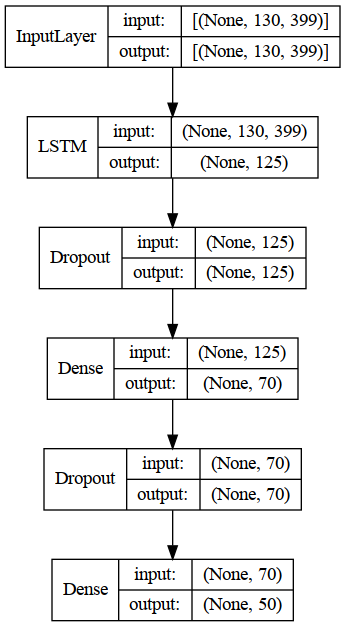

In [130]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [131]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

         AXE      0.833     0.625     0.714         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.727     0.800     0.762        10
         BEE      0.400     0.200     0.267        10
        BELT      0.600     0.750     0.667         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      0.429     0.500     0.462         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.625     0.833     0.714         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.111     0.167     0.133         6
      DECIDE      1.000     0.500     0.667         6
      DEMAND      0.750     0.750     0.750         8
     DEVELOP      0.500     0.500     0.500         6
      DINNER      0.750     0.375     0.500         8
         DOG      0.556    

In [132]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [133]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [134]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])


[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.0426 - f1_score: 0.0166

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 24s 763ms/step - loss: 4.0426 - f1_score: 0.0166 - val_loss: 4.0121 - val_f1_score: 0.0032
Epoch 2/500
28/28 [==============================] - 2s 62ms/step - loss: 4.0145 - f1_score: 0.0162 - val_loss: 4.0032 - val_f1_score: 0.0017
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 4.0083 - f1_score: 0.0119

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 329ms/step - loss: 4.0083 - f1_score: 0.0119 - val_loss: 3.9995 - val_f1_score: 0.0100
Epoch 4/500
28/28 [==============================] - 2s 62ms/step - loss: 3.9944 - f1_score: 0.0133 - val_loss: 3.9950 - val_f1_score: 0.0031
Epoch 5/500
28/28 [==============================] - 2s 62ms/step - loss: 3.9896 - f1_score: 0.0137 - val_loss: 3.9885 - val_f1_score: 0.0083
Epoch 6/500
28/28 [==============================] - 2s 62ms/step - loss: 3.9820 - f1_score: 0.0105 - val_loss: 3.9959 - val_f1_score: 0.0065
Epoch 7/500
28/28 [==============================] - 2s 65ms/step - loss: 3.9618 - f1_score: 0.0134 - val_loss: 3.9710 - val_f1_score: 0.0089
Epoch 8/500
28/28 [==============================] - 2s 62ms/step - loss: 3.9465 - f1_score: 0.0176 - val_loss: 3.9536 - val_f1_score: 0.0050
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9162 - f1_score: 0.0202

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 357ms/step - loss: 3.9142 - f1_score: 0.0205 - val_loss: 3.8941 - val_f1_score: 0.0113
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.8490 - f1_score: 0.0176

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 361ms/step - loss: 3.8490 - f1_score: 0.0176 - val_loss: 3.8128 - val_f1_score: 0.0132
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.7760 - f1_score: 0.0267

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 324ms/step - loss: 3.7760 - f1_score: 0.0267 - val_loss: 3.7141 - val_f1_score: 0.0239
Epoch 12/500
28/28 [==============================] - 2s 64ms/step - loss: 3.6917 - f1_score: 0.0335 - val_loss: 3.6445 - val_f1_score: 0.0216
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.6200 - f1_score: 0.0455

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 338ms/step - loss: 3.6200 - f1_score: 0.0455 - val_loss: 3.6071 - val_f1_score: 0.0292
Epoch 14/500
28/28 [==============================] - 2s 63ms/step - loss: 3.5261 - f1_score: 0.0524 - val_loss: 3.4351 - val_f1_score: 0.0236
Epoch 15/500
28/28 [==============================] - 2s 64ms/step - loss: 3.4744 - f1_score: 0.0545 - val_loss: 3.3876 - val_f1_score: 0.0283
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 3.3767 - f1_score: 0.0734

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 419ms/step - loss: 3.3767 - f1_score: 0.0734 - val_loss: 3.3136 - val_f1_score: 0.0448
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 3.2977 - f1_score: 0.0742

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 349ms/step - loss: 3.2977 - f1_score: 0.0742 - val_loss: 3.2142 - val_f1_score: 0.0453
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.2211 - f1_score: 0.0978

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 375ms/step - loss: 3.2211 - f1_score: 0.0978 - val_loss: 3.1328 - val_f1_score: 0.0833
Epoch 19/500
28/28 [==============================] - ETA: 0s - loss: 3.1260 - f1_score: 0.1101

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 368ms/step - loss: 3.1260 - f1_score: 0.1101 - val_loss: 3.0926 - val_f1_score: 0.1211
Epoch 20/500
28/28 [==============================] - 2s 62ms/step - loss: 3.0649 - f1_score: 0.1136 - val_loss: 3.0034 - val_f1_score: 0.1082
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 2.9886 - f1_score: 0.1292

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 347ms/step - loss: 2.9886 - f1_score: 0.1292 - val_loss: 3.0219 - val_f1_score: 0.1248
Epoch 22/500
28/28 [==============================] - 2s 66ms/step - loss: 2.9156 - f1_score: 0.1361 - val_loss: 3.0147 - val_f1_score: 0.1134
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 2.8564 - f1_score: 0.1457

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 365ms/step - loss: 2.8564 - f1_score: 0.1457 - val_loss: 2.8967 - val_f1_score: 0.1404
Epoch 24/500
28/28 [==============================] - 2s 62ms/step - loss: 2.8163 - f1_score: 0.1442 - val_loss: 3.0067 - val_f1_score: 0.1260
Epoch 25/500
28/28 [==============================] - 2s 63ms/step - loss: 2.7748 - f1_score: 0.1630 - val_loss: 2.8414 - val_f1_score: 0.1375
Epoch 26/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7005 - f1_score: 0.1879

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 323ms/step - loss: 2.6897 - f1_score: 0.1902 - val_loss: 2.7545 - val_f1_score: 0.1550
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 2.6024 - f1_score: 0.1983

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 385ms/step - loss: 2.6024 - f1_score: 0.1983 - val_loss: 2.7124 - val_f1_score: 0.1622
Epoch 28/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5887 - f1_score: 0.2055

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 341ms/step - loss: 2.5904 - f1_score: 0.2048 - val_loss: 2.6505 - val_f1_score: 0.1658
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 2.5485 - f1_score: 0.2057

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 332ms/step - loss: 2.5485 - f1_score: 0.2057 - val_loss: 2.8092 - val_f1_score: 0.1665
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 2.4928 - f1_score: 0.2132

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 361ms/step - loss: 2.4928 - f1_score: 0.2132 - val_loss: 2.6148 - val_f1_score: 0.1754
Epoch 31/500
28/28 [==============================] - 2s 63ms/step - loss: 2.4388 - f1_score: 0.2466 - val_loss: 2.6846 - val_f1_score: 0.1506
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 2.4132 - f1_score: 0.2423

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 380ms/step - loss: 2.4132 - f1_score: 0.2423 - val_loss: 2.5145 - val_f1_score: 0.2096
Epoch 33/500
28/28 [==============================] - 2s 63ms/step - loss: 2.3933 - f1_score: 0.2578 - val_loss: 2.5117 - val_f1_score: 0.1910
Epoch 34/500
28/28 [==============================] - 2s 63ms/step - loss: 2.2918 - f1_score: 0.2934 - val_loss: 2.5673 - val_f1_score: 0.1960
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 2.2885 - f1_score: 0.2777

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 347ms/step - loss: 2.2885 - f1_score: 0.2777 - val_loss: 2.4463 - val_f1_score: 0.2369
Epoch 36/500
28/28 [==============================] - 2s 62ms/step - loss: 2.2338 - f1_score: 0.2911 - val_loss: 2.5062 - val_f1_score: 0.2147
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 2.2185 - f1_score: 0.2971

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 335ms/step - loss: 2.2185 - f1_score: 0.2971 - val_loss: 2.4328 - val_f1_score: 0.2484
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 2.1520 - f1_score: 0.3181

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 373ms/step - loss: 2.1520 - f1_score: 0.3181 - val_loss: 2.4502 - val_f1_score: 0.2522
Epoch 39/500
28/28 [==============================] - ETA: 0s - loss: 2.1127 - f1_score: 0.3437

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 17s 620ms/step - loss: 2.1127 - f1_score: 0.3437 - val_loss: 2.3986 - val_f1_score: 0.2808
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 2.0931 - f1_score: 0.3352

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 360ms/step - loss: 2.0931 - f1_score: 0.3352 - val_loss: 2.2902 - val_f1_score: 0.2906
Epoch 41/500
28/28 [==============================] - 2s 64ms/step - loss: 2.0430 - f1_score: 0.3582 - val_loss: 2.3995 - val_f1_score: 0.2592
Epoch 42/500
28/28 [==============================] - 2s 63ms/step - loss: 1.9987 - f1_score: 0.3607 - val_loss: 2.2866 - val_f1_score: 0.2748
Epoch 43/500
28/28 [==============================] - 2s 63ms/step - loss: 1.9808 - f1_score: 0.3689 - val_loss: 2.2927 - val_f1_score: 0.2856
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 1.9373 - f1_score: 0.3919

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 350ms/step - loss: 1.9373 - f1_score: 0.3919 - val_loss: 2.2951 - val_f1_score: 0.2998
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 1.8780 - f1_score: 0.4033

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 415ms/step - loss: 1.8780 - f1_score: 0.4033 - val_loss: 2.2013 - val_f1_score: 0.3259
Epoch 46/500
28/28 [==============================] - 2s 62ms/step - loss: 1.8578 - f1_score: 0.4100 - val_loss: 2.2237 - val_f1_score: 0.2873
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 1.8145 - f1_score: 0.4456

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 337ms/step - loss: 1.8145 - f1_score: 0.4456 - val_loss: 2.1677 - val_f1_score: 0.3440
Epoch 48/500
28/28 [==============================] - ETA: 0s - loss: 1.7899 - f1_score: 0.4477

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 397ms/step - loss: 1.7899 - f1_score: 0.4477 - val_loss: 2.0956 - val_f1_score: 0.3735
Epoch 49/500
28/28 [==============================] - 2s 62ms/step - loss: 1.8234 - f1_score: 0.4313 - val_loss: 2.2326 - val_f1_score: 0.2998
Epoch 50/500
28/28 [==============================] - 2s 63ms/step - loss: 1.7157 - f1_score: 0.4630 - val_loss: 2.1203 - val_f1_score: 0.3254
Epoch 51/500
28/28 [==============================] - 2s 62ms/step - loss: 1.6562 - f1_score: 0.4814 - val_loss: 2.1089 - val_f1_score: 0.3629
Epoch 52/500
28/28 [==============================] - ETA: 0s - loss: 1.6127 - f1_score: 0.5006

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 387ms/step - loss: 1.6127 - f1_score: 0.5006 - val_loss: 2.1426 - val_f1_score: 0.3844
Epoch 53/500
28/28 [==============================] - 2s 63ms/step - loss: 1.6091 - f1_score: 0.4955 - val_loss: 2.1186 - val_f1_score: 0.3769
Epoch 54/500
28/28 [==============================] - 2s 65ms/step - loss: 1.5937 - f1_score: 0.5078 - val_loss: 2.1063 - val_f1_score: 0.3714
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 1.5475 - f1_score: 0.5143

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 348ms/step - loss: 1.5475 - f1_score: 0.5143 - val_loss: 2.0912 - val_f1_score: 0.4212
Epoch 56/500
28/28 [==============================] - 2s 65ms/step - loss: 1.5488 - f1_score: 0.5155 - val_loss: 2.0638 - val_f1_score: 0.3960
Epoch 57/500
28/28 [==============================] - 2s 62ms/step - loss: 1.5315 - f1_score: 0.5141 - val_loss: 2.1100 - val_f1_score: 0.4060
Epoch 58/500
28/28 [==============================] - 2s 65ms/step - loss: 1.4436 - f1_score: 0.5482 - val_loss: 1.9854 - val_f1_score: 0.4182
Epoch 59/500
28/28 [==============================] - 2s 64ms/step - loss: 1.4194 - f1_score: 0.5558 - val_loss: 2.1462 - val_f1_score: 0.3834
Epoch 60/500
28/28 [==============================] - 2s 64ms/step - loss: 1.3779 - f1_score: 0.5703 - val_loss: 1.9626 - val_f1_score: 0.3998
Epoch 61/500
28/28 [==============================] - 2s 64ms/step - loss: 1.3827 - f1_score: 0.5657 - val_loss: 1.9326 - val_f1_score: 0.4212
Epoch 62/50

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 335ms/step - loss: 1.3078 - f1_score: 0.5947 - val_loss: 1.9882 - val_f1_score: 0.4397
Epoch 64/500
28/28 [==============================] - 2s 62ms/step - loss: 1.2974 - f1_score: 0.5943 - val_loss: 1.9352 - val_f1_score: 0.4316
Epoch 65/500
28/28 [==============================] - 2s 66ms/step - loss: 1.3308 - f1_score: 0.5772 - val_loss: 1.9721 - val_f1_score: 0.4293
Epoch 66/500
28/28 [==============================] - 2s 65ms/step - loss: 1.2742 - f1_score: 0.6022 - val_loss: 1.8908 - val_f1_score: 0.4331
Epoch 67/500
28/28 [==============================] - 2s 64ms/step - loss: 1.2474 - f1_score: 0.6078 - val_loss: 2.0328 - val_f1_score: 0.4392
Epoch 68/500
28/28 [==============================] - ETA: 0s - loss: 1.2354 - f1_score: 0.6193

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 356ms/step - loss: 1.2354 - f1_score: 0.6193 - val_loss: 1.9110 - val_f1_score: 0.4465
Epoch 69/500
28/28 [==============================] - ETA: 0s - loss: 1.1949 - f1_score: 0.6195

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 436ms/step - loss: 1.1949 - f1_score: 0.6195 - val_loss: 1.8992 - val_f1_score: 0.4779
Epoch 70/500
28/28 [==============================] - 2s 63ms/step - loss: 1.1660 - f1_score: 0.6398 - val_loss: 1.9007 - val_f1_score: 0.4407
Epoch 71/500
28/28 [==============================] - 2s 65ms/step - loss: 1.1643 - f1_score: 0.6446 - val_loss: 1.8918 - val_f1_score: 0.4594
Epoch 72/500
28/28 [==============================] - 2s 65ms/step - loss: 1.1485 - f1_score: 0.6575 - val_loss: 1.9851 - val_f1_score: 0.4691
Epoch 73/500
28/28 [==============================] - ETA: 0s - loss: 1.1238 - f1_score: 0.6547

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 359ms/step - loss: 1.1238 - f1_score: 0.6547 - val_loss: 1.8865 - val_f1_score: 0.4945
Epoch 74/500
28/28 [==============================] - 2s 64ms/step - loss: 1.0958 - f1_score: 0.6567 - val_loss: 1.9398 - val_f1_score: 0.4941
Epoch 75/500
28/28 [==============================] - ETA: 0s - loss: 1.0863 - f1_score: 0.6641

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 367ms/step - loss: 1.0863 - f1_score: 0.6641 - val_loss: 1.9314 - val_f1_score: 0.5001
Epoch 76/500
28/28 [==============================] - 2s 63ms/step - loss: 1.0388 - f1_score: 0.6753 - val_loss: 2.0602 - val_f1_score: 0.4393
Epoch 77/500
28/28 [==============================] - 2s 64ms/step - loss: 1.0593 - f1_score: 0.6702 - val_loss: 2.0298 - val_f1_score: 0.4717
Epoch 78/500
28/28 [==============================] - 2s 64ms/step - loss: 1.0060 - f1_score: 0.6881 - val_loss: 1.8680 - val_f1_score: 0.4648
Epoch 79/500
28/28 [==============================] - 2s 64ms/step - loss: 0.9943 - f1_score: 0.6980 - val_loss: 1.9622 - val_f1_score: 0.4680
Epoch 80/500
28/28 [==============================] - ETA: 0s - loss: 0.9740 - f1_score: 0.7050

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 361ms/step - loss: 0.9740 - f1_score: 0.7050 - val_loss: 1.8734 - val_f1_score: 0.5082
Epoch 81/500
28/28 [==============================] - 2s 63ms/step - loss: 0.9685 - f1_score: 0.7166 - val_loss: 1.9937 - val_f1_score: 0.4975
Epoch 82/500
28/28 [==============================] - 2s 63ms/step - loss: 1.0004 - f1_score: 0.7023 - val_loss: 1.9264 - val_f1_score: 0.4749
Epoch 83/500
28/28 [==============================] - 2s 71ms/step - loss: 0.9403 - f1_score: 0.7134 - val_loss: 1.9347 - val_f1_score: 0.4780
Epoch 84/500
28/28 [==============================] - 2s 67ms/step - loss: 0.9410 - f1_score: 0.7143 - val_loss: 2.1294 - val_f1_score: 0.4592
Epoch 85/500
28/28 [==============================] - 2s 65ms/step - loss: 0.8937 - f1_score: 0.7297 - val_loss: 2.0584 - val_f1_score: 0.4381
Epoch 86/500
28/28 [==============================] - 2s 64ms/step - loss: 0.9013 - f1_score: 0.7232 - val_loss: 2.0707 - val_f1_score: 0.4644
Epoch 87/5

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 13s 469ms/step - loss: 0.8018 - f1_score: 0.7545 - val_loss: 1.9609 - val_f1_score: 0.5174
Epoch 94/500
28/28 [==============================] - 2s 64ms/step - loss: 0.8030 - f1_score: 0.7480 - val_loss: 2.0582 - val_f1_score: 0.4904
Epoch 95/500
28/28 [==============================] - 2s 66ms/step - loss: 0.8710 - f1_score: 0.7363 - val_loss: 2.1002 - val_f1_score: 0.4722
Epoch 96/500
28/28 [==============================] - 2s 65ms/step - loss: 0.8381 - f1_score: 0.7498 - val_loss: 1.9518 - val_f1_score: 0.5056
Epoch 97/500
28/28 [==============================] - 2s 67ms/step - loss: 0.7617 - f1_score: 0.7788 - val_loss: 2.0905 - val_f1_score: 0.4776
Epoch 98/500
28/28 [==============================] - 2s 66ms/step - loss: 0.7978 - f1_score: 0.7525 - val_loss: 1.9966 - val_f1_score: 0.4910
Epoch 99/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7527 - f1_score: 0.7798 - val_loss: 1.9667 - val_f1_score: 0.5164
Epoch 100/

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 368ms/step - loss: 0.6654 - f1_score: 0.7968 - val_loss: 2.0449 - val_f1_score: 0.5180
Epoch 106/500
28/28 [==============================] - ETA: 0s - loss: 0.6548 - f1_score: 0.8131

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 388ms/step - loss: 0.6548 - f1_score: 0.8131 - val_loss: 1.9414 - val_f1_score: 0.5189
Epoch 107/500
28/28 [==============================] - ETA: 0s - loss: 0.6375 - f1_score: 0.8183

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 392ms/step - loss: 0.6375 - f1_score: 0.8183 - val_loss: 1.9482 - val_f1_score: 0.5364
Epoch 108/500
28/28 [==============================] - 2s 63ms/step - loss: 0.6455 - f1_score: 0.7997 - val_loss: 2.0816 - val_f1_score: 0.5147
Epoch 109/500
28/28 [==============================] - 2s 63ms/step - loss: 0.6088 - f1_score: 0.8297 - val_loss: 2.0545 - val_f1_score: 0.5353
Epoch 110/500
28/28 [==============================] - 2s 64ms/step - loss: 0.5992 - f1_score: 0.8291 - val_loss: 2.0485 - val_f1_score: 0.5215
Epoch 111/500
28/28 [==============================] - 2s 64ms/step - loss: 0.5605 - f1_score: 0.8420 - val_loss: 1.9421 - val_f1_score: 0.5326
Epoch 112/500
28/28 [==============================] - 2s 64ms/step - loss: 0.5696 - f1_score: 0.8375 - val_loss: 2.0775 - val_f1_score: 0.4938
Epoch 113/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5885 - f1_score: 0.8295 - val_loss: 2.0974 - val_f1_score: 0.5295
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 9s 335ms/step - loss: 0.6101 - f1_score: 0.8324 - val_loss: 2.0943 - val_f1_score: 0.5375
Epoch 115/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5788 - f1_score: 0.8353 - val_loss: 2.0077 - val_f1_score: 0.5312
Epoch 116/500
28/28 [==============================] - ETA: 0s - loss: 0.6023 - f1_score: 0.8193

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 365ms/step - loss: 0.6023 - f1_score: 0.8193 - val_loss: 1.9320 - val_f1_score: 0.5429
Epoch 117/500
28/28 [==============================] - 2s 66ms/step - loss: 0.6590 - f1_score: 0.8042 - val_loss: 1.9951 - val_f1_score: 0.4930
Epoch 118/500
28/28 [==============================] - 2s 69ms/step - loss: 0.6338 - f1_score: 0.8068 - val_loss: 2.1882 - val_f1_score: 0.5280
Epoch 119/500
28/28 [==============================] - 2s 73ms/step - loss: 0.5445 - f1_score: 0.8494 - val_loss: 2.0349 - val_f1_score: 0.5253
Epoch 120/500
28/28 [==============================] - 2s 65ms/step - loss: 0.6102 - f1_score: 0.8183 - val_loss: 2.2323 - val_f1_score: 0.5132
Epoch 121/500
28/28 [==============================] - 2s 69ms/step - loss: 0.6351 - f1_score: 0.8147 - val_loss: 2.2601 - val_f1_score: 0.5136
Epoch 122/500
28/28 [==============================] - 2s 67ms/step - loss: 0.6299 - f1_score: 0.8127 - val_loss: 2.0590 - val_f1_score: 0.5075
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 396ms/step - loss: 0.3962 - f1_score: 0.8939 - val_loss: 2.1644 - val_f1_score: 0.5475
Epoch 136/500
28/28 [==============================] - 2s 71ms/step - loss: 0.4056 - f1_score: 0.8865 - val_loss: 2.1717 - val_f1_score: 0.5368
Epoch 137/500
28/28 [==============================] - 2s 71ms/step - loss: 0.4803 - f1_score: 0.8622 - val_loss: 2.3056 - val_f1_score: 0.5011
Epoch 138/500
28/28 [==============================] - 2s 66ms/step - loss: 0.4917 - f1_score: 0.8572 - val_loss: 2.1210 - val_f1_score: 0.5303
Epoch 139/500
28/28 [==============================] - 2s 65ms/step - loss: 0.4582 - f1_score: 0.8697 - val_loss: 2.2093 - val_f1_score: 0.5086
Epoch 140/500
28/28 [==============================] - 2s 65ms/step - loss: 0.6910 - f1_score: 0.7849 - val_loss: 2.1210 - val_f1_score: 0.5169
Epoch 141/500
28/28 [==============================] - 2s 64ms/step - loss: 0.4884 - f1_score: 0.8590 - val_loss: 2.0959 - val_f1_score: 0.5163
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 13s 489ms/step - loss: 0.2807 - f1_score: 0.9382 - val_loss: 2.2052 - val_f1_score: 0.5567
Epoch 167/500
28/28 [==============================] - ETA: 0s - loss: 0.2738 - f1_score: 0.9351

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 404ms/step - loss: 0.2738 - f1_score: 0.9351 - val_loss: 2.2782 - val_f1_score: 0.5592
Epoch 168/500
28/28 [==============================] - 2s 67ms/step - loss: 0.2642 - f1_score: 0.9446 - val_loss: 2.3392 - val_f1_score: 0.5159
Epoch 169/500
28/28 [==============================] - 2s 64ms/step - loss: 0.2720 - f1_score: 0.9374 - val_loss: 2.2732 - val_f1_score: 0.5399
Epoch 170/500
28/28 [==============================] - 2s 73ms/step - loss: 0.2501 - f1_score: 0.9433 - val_loss: 2.3206 - val_f1_score: 0.5487
Epoch 171/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2679 - f1_score: 0.9388 - val_loss: 2.2911 - val_f1_score: 0.5384
Epoch 172/500
28/28 [==============================] - 2s 66ms/step - loss: 0.3180 - f1_score: 0.9245 - val_loss: 2.2436 - val_f1_score: 0.5520
Epoch 173/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3617 - f1_score: 0.9017 - val_loss: 2.2131 - val_f1_score: 0.5581
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 409ms/step - loss: 0.2895 - f1_score: 0.9242 - val_loss: 2.3376 - val_f1_score: 0.5637
Epoch 203/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2470 - f1_score: 0.9456 - val_loss: 2.4174 - val_f1_score: 0.5343
Epoch 204/500
28/28 [==============================] - 2s 64ms/step - loss: 0.2535 - f1_score: 0.9384 - val_loss: 2.5010 - val_f1_score: 0.5225
Epoch 205/500
28/28 [==============================] - 2s 66ms/step - loss: 0.2254 - f1_score: 0.9487 - val_loss: 2.4173 - val_f1_score: 0.5403
Epoch 206/500
28/28 [==============================] - 2s 65ms/step - loss: 0.2325 - f1_score: 0.9511 - val_loss: 2.4789 - val_f1_score: 0.5159
Epoch 207/500
28/28 [==============================] - 2s 66ms/step - loss: 0.1809 - f1_score: 0.9674 - val_loss: 2.4176 - val_f1_score: 0.5473
Epoch 208/500
28/28 [==============================] - 2s 66ms/step - loss: 0.1784 - f1_score: 0.9688 - val_loss: 2.5449 - val_f1_score: 0.5310
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 13s 464ms/step - loss: 0.2381 - f1_score: 0.9454 - val_loss: 2.3552 - val_f1_score: 0.5804
Epoch 231/500
28/28 [==============================] - 2s 73ms/step - loss: 0.2101 - f1_score: 0.9530 - val_loss: 2.4457 - val_f1_score: 0.5183
Epoch 232/500
28/28 [==============================] - 2s 65ms/step - loss: 0.1778 - f1_score: 0.9650 - val_loss: 2.4009 - val_f1_score: 0.5197
Epoch 233/500
28/28 [==============================] - 2s 68ms/step - loss: 0.1541 - f1_score: 0.9762 - val_loss: 2.3400 - val_f1_score: 0.5727
Epoch 234/500
28/28 [==============================] - 2s 65ms/step - loss: 0.1445 - f1_score: 0.9840 - val_loss: 2.3605 - val_f1_score: 0.5528
Epoch 235/500
28/28 [==============================] - 2s 66ms/step - loss: 0.1435 - f1_score: 0.9776 - val_loss: 2.3430 - val_f1_score: 0.5683
Epoch 236/500
28/28 [==============================] - 2s 66ms/step - loss: 0.1520 - f1_score: 0.9783 - val_loss: 2.4630 - val_f1_score: 0.5432
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 424ms/step - loss: 0.1653 - f1_score: 0.9712 - val_loss: 2.4126 - val_f1_score: 0.5994
Epoch 275/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1488 - f1_score: 0.9740 - val_loss: 2.6011 - val_f1_score: 0.5588
Epoch 276/500
28/28 [==============================] - 2s 65ms/step - loss: 0.1299 - f1_score: 0.9874 - val_loss: 2.6020 - val_f1_score: 0.5489
Epoch 277/500
28/28 [==============================] - 2s 68ms/step - loss: 0.1381 - f1_score: 0.9799 - val_loss: 2.5074 - val_f1_score: 0.5732
Epoch 278/500
28/28 [==============================] - 2s 70ms/step - loss: 0.1181 - f1_score: 0.9881 - val_loss: 2.4830 - val_f1_score: 0.5507
Epoch 279/500
28/28 [==============================] - 2s 67ms/step - loss: 0.1200 - f1_score: 0.9849 - val_loss: 2.6095 - val_f1_score: 0.5502
Epoch 280/500
28/28 [==============================] - 2s 67ms/step - loss: 0.1082 - f1_score: 0.9912 - val_loss: 2.5726 - val_f1_score: 0.5675
Epoc

Epoch 331/500
28/28 [==============================] - 2s 71ms/step - loss: 0.1274 - f1_score: 0.9827 - val_loss: 2.7246 - val_f1_score: 0.5377
Epoch 332/500
28/28 [==============================] - 2s 70ms/step - loss: 0.1101 - f1_score: 0.9870 - val_loss: 2.7882 - val_f1_score: 0.5414
Epoch 333/500
28/28 [==============================] - 2s 72ms/step - loss: 0.1305 - f1_score: 0.9796 - val_loss: 2.6266 - val_f1_score: 0.5583
Epoch 334/500
28/28 [==============================] - 2s 79ms/step - loss: 0.1064 - f1_score: 0.9902 - val_loss: 2.6829 - val_f1_score: 0.5635
Epoch 335/500
28/28 [==============================] - 2s 66ms/step - loss: 0.0932 - f1_score: 0.9939 - val_loss: 2.5998 - val_f1_score: 0.5521
Epoch 336/500
28/28 [==============================] - 2s 68ms/step - loss: 0.0976 - f1_score: 0.9895 - val_loss: 2.7094 - val_f1_score: 0.5803
Epoch 337/500
28/28 [==============================] - 2s 73ms/step - loss: 0.1463 - f1_score: 0.9767 - val_loss: 2.8936 - val_f1_score:

Epoch 388/500
28/28 [==============================] - 2s 71ms/step - loss: 0.0987 - f1_score: 0.9914 - val_loss: 2.8734 - val_f1_score: 0.5551
Epoch 389/500
28/28 [==============================] - 2s 71ms/step - loss: 0.0853 - f1_score: 0.9940 - val_loss: 2.8689 - val_f1_score: 0.5243
Epoch 390/500
28/28 [==============================] - 2s 72ms/step - loss: 0.0821 - f1_score: 0.9959 - val_loss: 2.7971 - val_f1_score: 0.5475
Epoch 391/500
28/28 [==============================] - 2s 71ms/step - loss: 0.0821 - f1_score: 0.9949 - val_loss: 2.7533 - val_f1_score: 0.5440
Epoch 392/500
28/28 [==============================] - 2s 71ms/step - loss: 0.0772 - f1_score: 0.9983 - val_loss: 2.8030 - val_f1_score: 0.5442
Epoch 393/500
28/28 [==============================] - 2s 80ms/step - loss: 0.0750 - f1_score: 0.9985 - val_loss: 2.7757 - val_f1_score: 0.5565
Epoch 394/500
28/28 [==============================] - 2s 72ms/step - loss: 0.0738 - f1_score: 0.9987 - val_loss: 2.7766 - val_f1_score:

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 441ms/step - loss: 0.0865 - f1_score: 0.9940 - val_loss: 2.5042 - val_f1_score: 0.6090
Epoch 433/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0854 - f1_score: 0.9933 - val_loss: 2.4726 - val_f1_score: 0.5812
Epoch 434/500
28/28 [==============================] - ETA: 0s - loss: 0.0871 - f1_score: 0.9943

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 360ms/step - loss: 0.0871 - f1_score: 0.9943 - val_loss: 2.5357 - val_f1_score: 0.6095
Epoch 435/500
28/28 [==============================] - 2s 66ms/step - loss: 0.0802 - f1_score: 0.9958 - val_loss: 2.6240 - val_f1_score: 0.5905
Epoch 436/500
28/28 [==============================] - 2s 68ms/step - loss: 0.0799 - f1_score: 0.9953 - val_loss: 2.5622 - val_f1_score: 0.5793
Epoch 437/500
28/28 [==============================] - 2s 69ms/step - loss: 0.0780 - f1_score: 0.9956 - val_loss: 2.6823 - val_f1_score: 0.5853
Epoch 438/500
28/28 [==============================] - 2s 69ms/step - loss: 0.0754 - f1_score: 0.9978 - val_loss: 2.7646 - val_f1_score: 0.5693
Epoch 439/500
28/28 [==============================] - 2s 67ms/step - loss: 0.0732 - f1_score: 0.9985 - val_loss: 2.7025 - val_f1_score: 0.5740
Epoch 440/500
28/28 [==============================] - 2s 66ms/step - loss: 0.0733 - f1_score: 0.9975 - val_loss: 2.7285 - val_f1_score: 0.5705
Epoc

Epoch 491/500
28/28 [==============================] - 2s 71ms/step - loss: 0.0772 - f1_score: 0.9957 - val_loss: 3.0224 - val_f1_score: 0.5642
Epoch 492/500
28/28 [==============================] - 2s 71ms/step - loss: 0.0767 - f1_score: 0.9951 - val_loss: 3.1906 - val_f1_score: 0.5601
Epoch 493/500
28/28 [==============================] - 2s 72ms/step - loss: 0.1722 - f1_score: 0.9635 - val_loss: 2.7684 - val_f1_score: 0.6057
Epoch 494/500
28/28 [==============================] - 2s 72ms/step - loss: 0.4660 - f1_score: 0.8838 - val_loss: 3.5603 - val_f1_score: 0.4710
Epoch 495/500
28/28 [==============================] - 2s 71ms/step - loss: 0.6238 - f1_score: 0.8418 - val_loss: 2.6823 - val_f1_score: 0.5541
Epoch 496/500
28/28 [==============================] - 2s 72ms/step - loss: 0.2505 - f1_score: 0.9331 - val_loss: 2.7315 - val_f1_score: 0.5655
Epoch 497/500
28/28 [==============================] - 2s 70ms/step - loss: 0.1900 - f1_score: 0.9557 - val_loss: 2.7267 - val_f1_score:

In [135]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

         AXE      0.500     0.375     0.429         8
    BACKPACK      0.625     0.833     0.714         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      0.800     0.400     0.533        10
        BELT      0.500     0.750     0.600         4
        BITE      0.600     0.375     0.462         8
   BREAKFAST      0.333     0.333     0.333         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.167     0.167     0.167         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.714     0.625     0.667         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      1.000     0.375     0.545         8
         DOG      0.429    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
reconstructed_model = tf.keras.models.load_model("1 LSTM")

2023-09-11 19:43:31.131895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 19:43:35.130479: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 541 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [61]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 125)               262500    
                                                                 
 dropout_2 (Dropout)         (None, 125)               0         
                                                                 
 dense_2 (Dense)             (None, 70)                8820      
                                                                 
 dropout_3 (Dropout)         (None, 70)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                3550      
                                                                 
Total params: 274,870
Trainable params: 274,870
Non-trainable params: 0
_________________________________________________________________


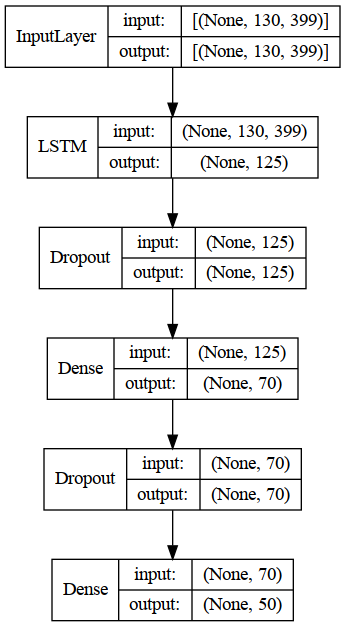

In [62]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

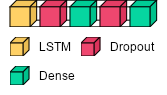

In [63]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [64]:
reconstructed_model.evaluate(Xval, Yval)

2023-09-11 19:44:46.694251: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 8s 53ms/step - loss: 2.5357 - f1_score: 0.6095


[2.5357143878936768, 0.6095041632652283]

In [140]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 13ms/step - loss: 0.0613 - f1_score: 0.9996


[0.0613335482776165, 0.9995744228363037]

In [141]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.750     0.300     0.429        10
        BELT      0.750     0.750     0.750         4
        BITE      0.333     0.125     0.182         8
   BREAKFAST      0.667     0.667     0.667         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      0.667     1.000     0.800         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.167     0.167     0.167         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.400     0.333     0.364         6
      DINNER      0.750     0.375     0.500         8
         DOG      0.357    

## Hyperparameter Tuning 2 LSTM Layers

In [122]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'elu', 'gelu', 'relu'],
            default='relu')
        model = Sequential()
        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=True,
                 input_shape=self.input_shape,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_1',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            LSTM(units=hp.Int('units_2',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_2',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.65,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_4',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0005)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [123]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='2_LSTM',
    overwrite=False)

In [124]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'elu', 'gelu', 'relu'], 'ordered': False}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_2 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_2 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_4 (Int)
{'default': 80, 'conditions': [], 'min_value': 70, 'max_value': 120, 'step': 10, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'ma

In [125]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [127]:
tuner.search(Xtrain,
             Ytrain,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 34m 50s]
val_f1_score: 0.6502597630023956

Best val_f1_score So Far: 0.6583000123500824
Total elapsed time: 18h 58m 55s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models(num_models=3)[0]

In [129]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/2_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0670 summary
Hyperparameters:
dense_activation: gelu
units_1: 150
regularizer_1: 0.005097339455115072
units_2: 175
regularizer_2: 0.0019526565349868704
dropout_1: 0.15000000000000002
units_4: 100
dropout_2: 0.2
learning_rate: 0.00018769757435735312
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0665
Score: 0.6583000123500824

Trial 0724 summary
Hyperparameters:
dense_activation: relu
units_1: 150
regularizer_1: 0.00036156986755960413
units_2: 200
regularizer_2: 0.0011089404108766622
dropout_1: 0.6000000000000001
units_4: 90
dropout_2: 0.2
learning_rate: 0.00022620443736150013
tuner/epochs: 300
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.6502597630023956

Trial 0671 summary
Hyperparameters:
dense_activation: mish
units_1: 200
regularizer_1: 0.0007178100162785227


In [130]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 43ms/step - loss: 2.3504 - f1_score: 0.6702


In [131]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 2s 26ms/step - loss: 0.2579 - f1_score: 1.0000


In [132]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 150)          330000    
                                                                 
 lstm_1 (LSTM)               (None, 175)               228200    
                                                                 
 dropout (Dropout)           (None, 175)               0         
                                                                 
 dense (Dense)               (None, 100)               17600     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
Total params: 580,850
Trainable params: 580,850
Non-trai

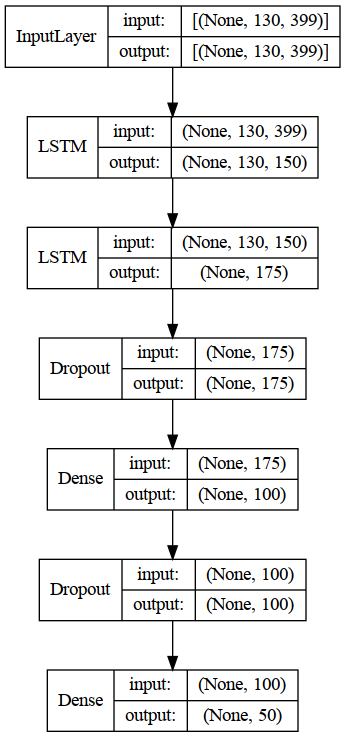

In [133]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

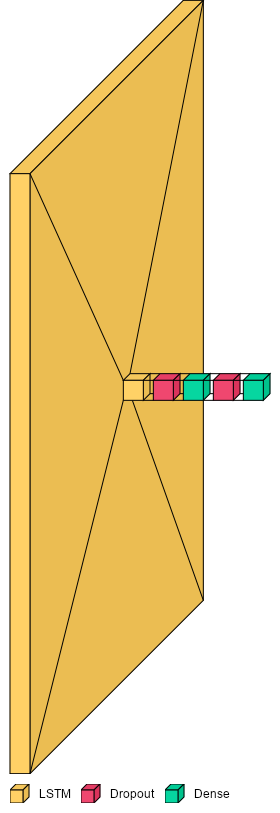

In [135]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [136]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 23ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.800     0.400     0.533        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.500     0.667         8
   BREAKFAST      1.000     0.667     0.800         6
      CANCER      0.857     0.750     0.800         8
   CHRISTMAS      0.800     0.667     0.727         6
    CONFUSED      0.667     0.667     0.667         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.182     0.333     0.235         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     1.000     1.000         8
     DEVELOP      0.500     0.500     0.500         6
      DINNER      1.000     0.625     0.769         8
         DOG      0.400    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [138]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [139]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 6.6801 - f1_score: 0.0100

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 27s 779ms/step - loss: 6.6801 - f1_score: 0.0100 - val_loss: 6.4788 - val_f1_score: 0.0029
Epoch 2/500
28/28 [==============================] - 4s 133ms/step - loss: 6.3016 - f1_score: 0.0111 - val_loss: 6.1084 - val_f1_score: 0.0011
Epoch 3/500
28/28 [==============================] - 4s 133ms/step - loss: 5.9561 - f1_score: 0.0123 - val_loss: 5.7865 - val_f1_score: 0.0012
Epoch 4/500
28/28 [==============================] - 4s 136ms/step - loss: 5.6554 - f1_score: 0.0070 - val_loss: 5.5168 - val_f1_score: 0.0012
Epoch 5/500
28/28 [==============================] - 4s 136ms/step - loss: 5.4015 - f1_score: 0.0088 - val_loss: 5.2824 - val_f1_score: 5.5172e-04
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 5.1823 - f1_score: 0.0114

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 652ms/step - loss: 5.1823 - f1_score: 0.0114 - val_loss: 5.0818 - val_f1_score: 0.0072
Epoch 7/500
28/28 [==============================] - 4s 135ms/step - loss: 4.9960 - f1_score: 0.0117 - val_loss: 4.9185 - val_f1_score: 0.0012
Epoch 8/500
28/28 [==============================] - 4s 137ms/step - loss: 4.8379 - f1_score: 0.0109 - val_loss: 4.7754 - val_f1_score: 0.0012
Epoch 9/500
28/28 [==============================] - 4s 146ms/step - loss: 4.7171 - f1_score: 0.0124 - val_loss: 4.6635 - val_f1_score: 0.0059
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 4.5900 - f1_score: 0.0158

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 686ms/step - loss: 4.5900 - f1_score: 0.0158 - val_loss: 4.5330 - val_f1_score: 0.0111
Epoch 11/500
28/28 [==============================] - 4s 135ms/step - loss: 4.4634 - f1_score: 0.0160 - val_loss: 4.4508 - val_f1_score: 0.0076
Epoch 12/500
28/28 [==============================] - 4s 137ms/step - loss: 4.3266 - f1_score: 0.0196 - val_loss: 4.2533 - val_f1_score: 0.0105
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 4.2005 - f1_score: 0.0270

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 682ms/step - loss: 4.2005 - f1_score: 0.0270 - val_loss: 4.1400 - val_f1_score: 0.0197
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 4.0471 - f1_score: 0.0419

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 691ms/step - loss: 4.0471 - f1_score: 0.0419 - val_loss: 3.9293 - val_f1_score: 0.0211
Epoch 15/500
28/28 [==============================] - 4s 136ms/step - loss: 3.9175 - f1_score: 0.0492 - val_loss: 3.7676 - val_f1_score: 0.0208
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 3.7872 - f1_score: 0.0666

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 700ms/step - loss: 3.7872 - f1_score: 0.0666 - val_loss: 3.6633 - val_f1_score: 0.0478
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 3.6934 - f1_score: 0.0678

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 17s 615ms/step - loss: 3.6934 - f1_score: 0.0678 - val_loss: 3.5757 - val_f1_score: 0.0511
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.5666 - f1_score: 0.1006

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 17s 624ms/step - loss: 3.5666 - f1_score: 0.1006 - val_loss: 3.4329 - val_f1_score: 0.0660
Epoch 19/500
28/28 [==============================] - ETA: 0s - loss: 3.4315 - f1_score: 0.1072

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 16s 580ms/step - loss: 3.4315 - f1_score: 0.1072 - val_loss: 3.3173 - val_f1_score: 0.0997
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 3.3325 - f1_score: 0.1267

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 668ms/step - loss: 3.3325 - f1_score: 0.1267 - val_loss: 3.2650 - val_f1_score: 0.1016
Epoch 21/500
28/28 [==============================] - 4s 135ms/step - loss: 3.2320 - f1_score: 0.1389 - val_loss: 3.4105 - val_f1_score: 0.0889
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 3.1506 - f1_score: 0.1492

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 16s 587ms/step - loss: 3.1506 - f1_score: 0.1492 - val_loss: 3.0208 - val_f1_score: 0.1692
Epoch 23/500
28/28 [==============================] - 4s 135ms/step - loss: 3.0396 - f1_score: 0.1892 - val_loss: 3.1745 - val_f1_score: 0.1303
Epoch 24/500
28/28 [==============================] - 4s 141ms/step - loss: 3.0064 - f1_score: 0.1834 - val_loss: 2.9341 - val_f1_score: 0.1652
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 2.8532 - f1_score: 0.2204

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 17s 622ms/step - loss: 2.8532 - f1_score: 0.2204 - val_loss: 2.8277 - val_f1_score: 0.1822
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 2.8133 - f1_score: 0.2350

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 698ms/step - loss: 2.8133 - f1_score: 0.2350 - val_loss: 2.9033 - val_f1_score: 0.2270
Epoch 27/500
28/28 [==============================] - 4s 134ms/step - loss: 2.6910 - f1_score: 0.2519 - val_loss: 2.8313 - val_f1_score: 0.2051
Epoch 28/500
28/28 [==============================] - 4s 138ms/step - loss: 2.6864 - f1_score: 0.2758 - val_loss: 2.8544 - val_f1_score: 0.1929
Epoch 29/500
28/28 [==============================] - 4s 141ms/step - loss: 2.5895 - f1_score: 0.2801 - val_loss: 2.7596 - val_f1_score: 0.2128
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 2.4663 - f1_score: 0.3190

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 17s 629ms/step - loss: 2.4663 - f1_score: 0.3190 - val_loss: 2.6942 - val_f1_score: 0.2595
Epoch 31/500
28/28 [==============================] - 4s 134ms/step - loss: 2.4416 - f1_score: 0.3230 - val_loss: 2.6373 - val_f1_score: 0.2470
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 2.3505 - f1_score: 0.3551

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 26s 959ms/step - loss: 2.3505 - f1_score: 0.3551 - val_loss: 2.6352 - val_f1_score: 0.2712
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 2.3928 - f1_score: 0.3425

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 17s 636ms/step - loss: 2.3928 - f1_score: 0.3425 - val_loss: 2.6229 - val_f1_score: 0.2914
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 2.2855 - f1_score: 0.3717

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 646ms/step - loss: 2.2855 - f1_score: 0.3717 - val_loss: 2.5393 - val_f1_score: 0.3057
Epoch 35/500
28/28 [==============================] - 4s 133ms/step - loss: 2.2226 - f1_score: 0.3839 - val_loss: 2.4613 - val_f1_score: 0.3032
Epoch 36/500
28/28 [==============================] - 4s 137ms/step - loss: 2.1682 - f1_score: 0.3846 - val_loss: 2.6356 - val_f1_score: 0.2872
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 2.1084 - f1_score: 0.4143

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 17s 632ms/step - loss: 2.1084 - f1_score: 0.4143 - val_loss: 2.5307 - val_f1_score: 0.3155
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 2.0946 - f1_score: 0.4265

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 22s 800ms/step - loss: 2.0946 - f1_score: 0.4265 - val_loss: 2.4923 - val_f1_score: 0.3228
Epoch 39/500
28/28 [==============================] - 4s 135ms/step - loss: 2.0381 - f1_score: 0.4433 - val_loss: 2.6995 - val_f1_score: 0.2994
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 2.0269 - f1_score: 0.4362

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 17s 619ms/step - loss: 2.0269 - f1_score: 0.4362 - val_loss: 2.4539 - val_f1_score: 0.3415
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 2.0286 - f1_score: 0.4529

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 705ms/step - loss: 2.0286 - f1_score: 0.4529 - val_loss: 2.4276 - val_f1_score: 0.3570
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 1.9524 - f1_score: 0.4542

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 673ms/step - loss: 1.9524 - f1_score: 0.4542 - val_loss: 2.3539 - val_f1_score: 0.3846
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 1.9335 - f1_score: 0.4676

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 659ms/step - loss: 1.9335 - f1_score: 0.4676 - val_loss: 2.3286 - val_f1_score: 0.3885
Epoch 44/500
28/28 [==============================] - 4s 136ms/step - loss: 1.8438 - f1_score: 0.5039 - val_loss: 2.4068 - val_f1_score: 0.3573
Epoch 45/500
28/28 [==============================] - 4s 143ms/step - loss: 1.8185 - f1_score: 0.5113 - val_loss: 2.2914 - val_f1_score: 0.3724
Epoch 46/500
28/28 [==============================] - 4s 143ms/step - loss: 1.7359 - f1_score: 0.5243 - val_loss: 2.3250 - val_f1_score: 0.3762
Epoch 47/500
28/28 [==============================] - 4s 141ms/step - loss: 1.7530 - f1_score: 0.5286 - val_loss: 2.2511 - val_f1_score: 0.3714
Epoch 48/500
28/28 [==============================] - ETA: 0s - loss: 1.7393 - f1_score: 0.5311

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 20s 720ms/step - loss: 1.7393 - f1_score: 0.5311 - val_loss: 2.1996 - val_f1_score: 0.4181
Epoch 49/500
28/28 [==============================] - 4s 136ms/step - loss: 1.6331 - f1_score: 0.5701 - val_loss: 2.1552 - val_f1_score: 0.4145
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 1.6100 - f1_score: 0.5884

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 654ms/step - loss: 1.6100 - f1_score: 0.5884 - val_loss: 2.2036 - val_f1_score: 0.4195
Epoch 51/500
28/28 [==============================] - 4s 144ms/step - loss: 1.6157 - f1_score: 0.5717 - val_loss: 2.2042 - val_f1_score: 0.3999
Epoch 52/500
28/28 [==============================] - ETA: 0s - loss: 1.5467 - f1_score: 0.5959

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 645ms/step - loss: 1.5467 - f1_score: 0.5959 - val_loss: 2.1566 - val_f1_score: 0.4334
Epoch 53/500
28/28 [==============================] - 4s 136ms/step - loss: 1.6290 - f1_score: 0.5718 - val_loss: 2.2421 - val_f1_score: 0.4102
Epoch 54/500
28/28 [==============================] - 4s 141ms/step - loss: 1.5496 - f1_score: 0.5943 - val_loss: 2.1804 - val_f1_score: 0.4256
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 1.4647 - f1_score: 0.6246

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 20s 753ms/step - loss: 1.4647 - f1_score: 0.6246 - val_loss: 2.1769 - val_f1_score: 0.4636
Epoch 56/500
28/28 [==============================] - 4s 136ms/step - loss: 1.4138 - f1_score: 0.6447 - val_loss: 2.1404 - val_f1_score: 0.4613
Epoch 57/500
28/28 [==============================] - 4s 139ms/step - loss: 1.4153 - f1_score: 0.6459 - val_loss: 2.0511 - val_f1_score: 0.4584
Epoch 58/500
28/28 [==============================] - 4s 141ms/step - loss: 1.7902 - f1_score: 0.5526 - val_loss: 2.3224 - val_f1_score: 0.3790
Epoch 59/500
28/28 [==============================] - 4s 140ms/step - loss: 1.5315 - f1_score: 0.5947 - val_loss: 2.0689 - val_f1_score: 0.4539
Epoch 60/500
28/28 [==============================] - ETA: 0s - loss: 1.3549 - f1_score: 0.6586

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 21s 775ms/step - loss: 1.3549 - f1_score: 0.6586 - val_loss: 2.0636 - val_f1_score: 0.4912
Epoch 61/500
28/28 [==============================] - 4s 140ms/step - loss: 1.2947 - f1_score: 0.6882 - val_loss: 2.0478 - val_f1_score: 0.4677
Epoch 62/500
28/28 [==============================] - 4s 139ms/step - loss: 1.2485 - f1_score: 0.7003 - val_loss: 1.9630 - val_f1_score: 0.4693
Epoch 63/500
28/28 [==============================] - 4s 140ms/step - loss: 1.2200 - f1_score: 0.7055 - val_loss: 2.1012 - val_f1_score: 0.4843
Epoch 64/500
28/28 [==============================] - 4s 140ms/step - loss: 1.2213 - f1_score: 0.7070 - val_loss: 2.1136 - val_f1_score: 0.4855
Epoch 65/500
28/28 [==============================] - 4s 144ms/step - loss: 1.2063 - f1_score: 0.7075 - val_loss: 2.1299 - val_f1_score: 0.4823
Epoch 66/500
28/28 [==============================] - 4s 145ms/step - loss: 1.1782 - f1_score: 0.7200 - val_loss: 2.2653 - val_f1_score: 0.4580
Epoc

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 25s 933ms/step - loss: 1.1977 - f1_score: 0.7044 - val_loss: 1.9992 - val_f1_score: 0.5256
Epoch 70/500
28/28 [==============================] - 4s 136ms/step - loss: 1.1392 - f1_score: 0.7329 - val_loss: 2.1032 - val_f1_score: 0.4899
Epoch 71/500
28/28 [==============================] - 4s 138ms/step - loss: 1.0931 - f1_score: 0.7500 - val_loss: 2.0236 - val_f1_score: 0.4978
Epoch 72/500
28/28 [==============================] - 4s 140ms/step - loss: 1.1082 - f1_score: 0.7412 - val_loss: 2.1632 - val_f1_score: 0.5013
Epoch 73/500
28/28 [==============================] - 4s 146ms/step - loss: 1.0739 - f1_score: 0.7568 - val_loss: 2.0647 - val_f1_score: 0.4722
Epoch 74/500
28/28 [==============================] - 4s 142ms/step - loss: 1.1024 - f1_score: 0.7370 - val_loss: 1.9998 - val_f1_score: 0.4993
Epoch 75/500
28/28 [==============================] - 4s 144ms/step - loss: 1.1218 - f1_score: 0.7315 - val_loss: 2.0432 - val_f1_score: 0.5188
Epoc

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 21s 755ms/step - loss: 0.9687 - f1_score: 0.7823 - val_loss: 2.0529 - val_f1_score: 0.5656
Epoch 91/500
28/28 [==============================] - 4s 144ms/step - loss: 0.8253 - f1_score: 0.8321 - val_loss: 2.0721 - val_f1_score: 0.5392
Epoch 92/500
28/28 [==============================] - 4s 147ms/step - loss: 0.8423 - f1_score: 0.8266 - val_loss: 2.1663 - val_f1_score: 0.5020
Epoch 93/500
28/28 [==============================] - ETA: 0s - loss: 0.8534 - f1_score: 0.8198

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 17s 632ms/step - loss: 0.8534 - f1_score: 0.8198 - val_loss: 2.0175 - val_f1_score: 0.5789
Epoch 94/500
28/28 [==============================] - 4s 136ms/step - loss: 0.7234 - f1_score: 0.8640 - val_loss: 2.1634 - val_f1_score: 0.5455
Epoch 95/500
28/28 [==============================] - 4s 140ms/step - loss: 0.7600 - f1_score: 0.8532 - val_loss: 2.1063 - val_f1_score: 0.5559
Epoch 96/500
28/28 [==============================] - 4s 141ms/step - loss: 0.8378 - f1_score: 0.8245 - val_loss: 2.1775 - val_f1_score: 0.5348
Epoch 97/500
28/28 [==============================] - 4s 142ms/step - loss: 0.8490 - f1_score: 0.8188 - val_loss: 2.0948 - val_f1_score: 0.5381
Epoch 98/500
28/28 [==============================] - 4s 145ms/step - loss: 0.7516 - f1_score: 0.8626 - val_loss: 2.1511 - val_f1_score: 0.5147
Epoch 99/500
28/28 [==============================] - 4s 147ms/step - loss: 0.7057 - f1_score: 0.8742 - val_loss: 2.1848 - val_f1_score: 0.5457
Epoc

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 716ms/step - loss: 0.6650 - f1_score: 0.8776 - val_loss: 2.0790 - val_f1_score: 0.5833
Epoch 108/500
28/28 [==============================] - 4s 138ms/step - loss: 0.7095 - f1_score: 0.8638 - val_loss: 2.0925 - val_f1_score: 0.5436
Epoch 109/500
28/28 [==============================] - 4s 141ms/step - loss: 0.6787 - f1_score: 0.8745 - val_loss: 2.2065 - val_f1_score: 0.5307
Epoch 110/500
28/28 [==============================] - 4s 142ms/step - loss: 0.6765 - f1_score: 0.8730 - val_loss: 2.1086 - val_f1_score: 0.5638
Epoch 111/500
28/28 [==============================] - 4s 142ms/step - loss: 0.5923 - f1_score: 0.8998 - val_loss: 2.2153 - val_f1_score: 0.5347
Epoch 112/500
28/28 [==============================] - 4s 144ms/step - loss: 0.5736 - f1_score: 0.9094 - val_loss: 2.2898 - val_f1_score: 0.5512
Epoch 113/500
28/28 [==============================] - 4s 143ms/step - loss: 0.6635 - f1_score: 0.8865 - val_loss: 2.3402 - val_f1_score: 0.554

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 25s 905ms/step - loss: 0.5463 - f1_score: 0.9251 - val_loss: 2.0750 - val_f1_score: 0.6146
Epoch 120/500
28/28 [==============================] - 4s 136ms/step - loss: 0.5066 - f1_score: 0.9317 - val_loss: 2.1869 - val_f1_score: 0.5517
Epoch 121/500
28/28 [==============================] - 4s 138ms/step - loss: 0.5479 - f1_score: 0.9169 - val_loss: 2.1802 - val_f1_score: 0.5865
Epoch 122/500
28/28 [==============================] - 4s 150ms/step - loss: 0.5323 - f1_score: 0.9208 - val_loss: 2.3183 - val_f1_score: 0.5483
Epoch 123/500
28/28 [==============================] - 4s 155ms/step - loss: 0.5523 - f1_score: 0.9152 - val_loss: 2.2344 - val_f1_score: 0.5599
Epoch 124/500
28/28 [==============================] - 4s 150ms/step - loss: 0.7473 - f1_score: 0.8579 - val_loss: 2.2867 - val_f1_score: 0.5285
Epoch 125/500
28/28 [==============================] - 4s 161ms/step - loss: 0.8930 - f1_score: 0.8098 - val_loss: 2.3785 - val_f1_score: 0.486

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 21s 780ms/step - loss: 0.3320 - f1_score: 0.9824 - val_loss: 2.3042 - val_f1_score: 0.6166
Epoch 167/500
28/28 [==============================] - 4s 139ms/step - loss: 0.3385 - f1_score: 0.9791 - val_loss: 2.4812 - val_f1_score: 0.5918
Epoch 168/500
28/28 [==============================] - 4s 142ms/step - loss: 0.3407 - f1_score: 0.9758 - val_loss: 2.7535 - val_f1_score: 0.5456
Epoch 169/500
28/28 [==============================] - 4s 146ms/step - loss: 0.4635 - f1_score: 0.9430 - val_loss: 2.5209 - val_f1_score: 0.5619
Epoch 170/500
28/28 [==============================] - 4s 148ms/step - loss: 0.6021 - f1_score: 0.8906 - val_loss: 2.6002 - val_f1_score: 0.5277
Epoch 171/500
28/28 [==============================] - 4s 145ms/step - loss: 0.5679 - f1_score: 0.9064 - val_loss: 2.3531 - val_f1_score: 0.5834
Epoch 172/500
28/28 [==============================] - 4s 148ms/step - loss: 0.9617 - f1_score: 0.7937 - val_loss: 2.7458 - val_f1_score: 0.483

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 21s 755ms/step - loss: 0.3625 - f1_score: 0.9710 - val_loss: 2.1521 - val_f1_score: 0.6174
Epoch 177/500
28/28 [==============================] - 4s 137ms/step - loss: 0.3633 - f1_score: 0.9707 - val_loss: 2.3850 - val_f1_score: 0.5907
Epoch 178/500
28/28 [==============================] - 4s 145ms/step - loss: 0.4191 - f1_score: 0.9517 - val_loss: 2.1718 - val_f1_score: 0.6080
Epoch 179/500
28/28 [==============================] - 4s 144ms/step - loss: 0.4848 - f1_score: 0.9402 - val_loss: 2.7028 - val_f1_score: 0.5423
Epoch 180/500
28/28 [==============================] - 4s 144ms/step - loss: 0.6517 - f1_score: 0.8875 - val_loss: 2.2340 - val_f1_score: 0.6032
Epoch 181/500
28/28 [==============================] - 4s 145ms/step - loss: 0.4062 - f1_score: 0.9598 - val_loss: 2.2480 - val_f1_score: 0.5794
Epoch 182/500
28/28 [==============================] - 4s 146ms/step - loss: 0.3332 - f1_score: 0.9823 - val_loss: 2.2541 - val_f1_score: 0.572

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 21s 769ms/step - loss: 0.3046 - f1_score: 0.9861 - val_loss: 2.4010 - val_f1_score: 0.6194
Epoch 194/500
28/28 [==============================] - 4s 137ms/step - loss: 0.2997 - f1_score: 0.9880 - val_loss: 2.3699 - val_f1_score: 0.6164
Epoch 195/500
28/28 [==============================] - 4s 141ms/step - loss: 0.3281 - f1_score: 0.9783 - val_loss: 2.4723 - val_f1_score: 0.5914
Epoch 196/500
28/28 [==============================] - 4s 148ms/step - loss: 0.3247 - f1_score: 0.9771 - val_loss: 2.4530 - val_f1_score: 0.5886
Epoch 197/500
28/28 [==============================] - 4s 145ms/step - loss: 0.3658 - f1_score: 0.9663 - val_loss: 2.5423 - val_f1_score: 0.5566
Epoch 198/500
28/28 [==============================] - 4s 144ms/step - loss: 0.3739 - f1_score: 0.9640 - val_loss: 2.4381 - val_f1_score: 0.5957
Epoch 199/500
28/28 [==============================] - 4s 145ms/step - loss: 0.3510 - f1_score: 0.9686 - val_loss: 2.4169 - val_f1_score: 0.584

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 21s 756ms/step - loss: 0.2443 - f1_score: 0.9989 - val_loss: 2.4943 - val_f1_score: 0.6271
Epoch 247/500
28/28 [==============================] - ETA: 0s - loss: 0.2444 - f1_score: 0.9973

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 24s 883ms/step - loss: 0.2444 - f1_score: 0.9973 - val_loss: 2.3883 - val_f1_score: 0.6297
Epoch 248/500
28/28 [==============================] - 4s 137ms/step - loss: 0.2438 - f1_score: 0.9961 - val_loss: 2.4684 - val_f1_score: 0.6185
Epoch 249/500
28/28 [==============================] - 4s 138ms/step - loss: 0.2353 - f1_score: 0.9984 - val_loss: 2.5066 - val_f1_score: 0.6166
Epoch 250/500
28/28 [==============================] - 4s 140ms/step - loss: 0.2359 - f1_score: 0.9989 - val_loss: 2.4627 - val_f1_score: 0.6049
Epoch 251/500
28/28 [==============================] - 4s 141ms/step - loss: 0.2362 - f1_score: 0.9985 - val_loss: 2.5274 - val_f1_score: 0.6044
Epoch 252/500
28/28 [==============================] - 4s 141ms/step - loss: 0.2337 - f1_score: 0.9980 - val_loss: 2.5612 - val_f1_score: 0.6237
Epoch 253/500
28/28 [==============================] - 4s 144ms/step - loss: 0.2350 - f1_score: 0.9969 - val_loss: 2.5098 - val_f1_score: 0.624

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 21s 769ms/step - loss: 0.2510 - f1_score: 0.9961 - val_loss: 2.3034 - val_f1_score: 0.6347
Epoch 265/500
28/28 [==============================] - 4s 137ms/step - loss: 0.2481 - f1_score: 0.9958 - val_loss: 2.3669 - val_f1_score: 0.6304
Epoch 266/500
28/28 [==============================] - 4s 140ms/step - loss: 0.2373 - f1_score: 0.9979 - val_loss: 2.4714 - val_f1_score: 0.6236
Epoch 267/500
28/28 [==============================] - ETA: 0s - loss: 0.2355 - f1_score: 0.9979

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 16s 605ms/step - loss: 0.2355 - f1_score: 0.9979 - val_loss: 2.3928 - val_f1_score: 0.6386
Epoch 268/500
28/28 [==============================] - 4s 138ms/step - loss: 0.2302 - f1_score: 0.9992 - val_loss: 2.4406 - val_f1_score: 0.6179
Epoch 269/500
28/28 [==============================] - 4s 141ms/step - loss: 0.2277 - f1_score: 0.9993 - val_loss: 2.5004 - val_f1_score: 0.6275
Epoch 270/500
28/28 [==============================] - 4s 141ms/step - loss: 0.2293 - f1_score: 0.9993 - val_loss: 2.4447 - val_f1_score: 0.6265
Epoch 271/500
28/28 [==============================] - 4s 151ms/step - loss: 0.2268 - f1_score: 0.9996 - val_loss: 2.4669 - val_f1_score: 0.6257
Epoch 272/500
28/28 [==============================] - 4s 144ms/step - loss: 0.2238 - f1_score: 0.9989 - val_loss: 2.5221 - val_f1_score: 0.6324
Epoch 273/500
28/28 [==============================] - 4s 144ms/step - loss: 0.2227 - f1_score: 0.9992 - val_loss: 2.5509 - val_f1_score: 0.620

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 31s 1s/step - loss: 0.2704 - f1_score: 0.9855 - val_loss: 2.2947 - val_f1_score: 0.6507
Epoch 294/500
28/28 [==============================] - 4s 135ms/step - loss: 0.2451 - f1_score: 0.9926 - val_loss: 2.4189 - val_f1_score: 0.6008
Epoch 295/500
28/28 [==============================] - 4s 139ms/step - loss: 0.2330 - f1_score: 0.9966 - val_loss: 2.2817 - val_f1_score: 0.6266
Epoch 296/500
28/28 [==============================] - 4s 141ms/step - loss: 0.2354 - f1_score: 0.9937 - val_loss: 2.2719 - val_f1_score: 0.6263
Epoch 297/500
28/28 [==============================] - 4s 143ms/step - loss: 0.2316 - f1_score: 0.9973 - val_loss: 2.4403 - val_f1_score: 0.6193
Epoch 298/500
28/28 [==============================] - 4s 142ms/step - loss: 0.2206 - f1_score: 0.9996 - val_loss: 2.3398 - val_f1_score: 0.6330
Epoch 299/500
28/28 [==============================] - 4s 152ms/step - loss: 0.2140 - f1_score: 1.0000 - val_loss: 2.3304 - val_f1_score: 0.6385
E

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 712ms/step - loss: 0.1979 - f1_score: 0.9988 - val_loss: 2.5253 - val_f1_score: 0.6523
Epoch 318/500
28/28 [==============================] - 4s 137ms/step - loss: 0.1956 - f1_score: 1.0000 - val_loss: 2.5773 - val_f1_score: 0.6137
Epoch 319/500
28/28 [==============================] - 4s 141ms/step - loss: 0.1940 - f1_score: 1.0000 - val_loss: 2.5535 - val_f1_score: 0.6366
Epoch 320/500
28/28 [==============================] - 4s 143ms/step - loss: 0.1932 - f1_score: 0.9996 - val_loss: 2.5613 - val_f1_score: 0.6229
Epoch 321/500
28/28 [==============================] - 4s 143ms/step - loss: 0.1909 - f1_score: 1.0000 - val_loss: 2.5944 - val_f1_score: 0.6369
Epoch 322/500
28/28 [==============================] - 4s 144ms/step - loss: 0.1928 - f1_score: 0.9989 - val_loss: 2.6351 - val_f1_score: 0.6235
Epoch 323/500
28/28 [==============================] - 4s 143ms/step - loss: 0.1914 - f1_score: 0.9996 - val_loss: 2.6633 - val_f1_score: 0.617

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 21s 791ms/step - loss: 0.2320 - f1_score: 0.9852 - val_loss: 2.1672 - val_f1_score: 0.6542
Epoch 414/500
28/28 [==============================] - ETA: 0s - loss: 0.2511 - f1_score: 0.9797

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 644ms/step - loss: 0.2511 - f1_score: 0.9797 - val_loss: 2.2175 - val_f1_score: 0.6693
Epoch 415/500
28/28 [==============================] - 4s 138ms/step - loss: 0.2006 - f1_score: 0.9964 - val_loss: 2.1583 - val_f1_score: 0.6505
Epoch 416/500
28/28 [==============================] - 4s 142ms/step - loss: 0.1909 - f1_score: 0.9982 - val_loss: 2.1805 - val_f1_score: 0.6457
Epoch 417/500
28/28 [==============================] - 4s 142ms/step - loss: 0.1878 - f1_score: 0.9984 - val_loss: 2.1220 - val_f1_score: 0.6689
Epoch 418/500
28/28 [==============================] - 4s 142ms/step - loss: 0.1839 - f1_score: 0.9992 - val_loss: 2.1859 - val_f1_score: 0.6507
Epoch 419/500
28/28 [==============================] - 4s 145ms/step - loss: 0.1820 - f1_score: 0.9996 - val_loss: 2.2050 - val_f1_score: 0.6609
Epoch 420/500
28/28 [==============================] - 4s 145ms/step - loss: 0.1812 - f1_score: 1.0000 - val_loss: 2.1872 - val_f1_score: 0.650

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 22s 827ms/step - loss: 0.1561 - f1_score: 1.0000 - val_loss: 2.2822 - val_f1_score: 0.6815
Epoch 483/500
28/28 [==============================] - 4s 144ms/step - loss: 0.1554 - f1_score: 1.0000 - val_loss: 2.3229 - val_f1_score: 0.6774
Epoch 484/500
28/28 [==============================] - 4s 145ms/step - loss: 0.1552 - f1_score: 1.0000 - val_loss: 2.3794 - val_f1_score: 0.6629
Epoch 485/500
28/28 [==============================] - 5s 163ms/step - loss: 0.1543 - f1_score: 1.0000 - val_loss: 2.3746 - val_f1_score: 0.6650
Epoch 486/500
28/28 [==============================] - 4s 146ms/step - loss: 0.1533 - f1_score: 1.0000 - val_loss: 2.4071 - val_f1_score: 0.6512
Epoch 487/500
28/28 [==============================] - 4s 151ms/step - loss: 0.1532 - f1_score: 0.9997 - val_loss: 2.3540 - val_f1_score: 0.6591
Epoch 488/500
28/28 [==============================] - 5s 168ms/step - loss: 0.1517 - f1_score: 1.0000 - val_loss: 2.4634 - val_f1_score: 0.656

In [140]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 23ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      1.000     0.800     0.889        10
         BEE      0.600     0.300     0.400        10
        BELT      0.800     1.000     0.889         4
        BITE      1.000     0.625     0.769         8
   BREAKFAST      0.500     1.000     0.667         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.200     0.167     0.182         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.667     0.333     0.444         6
      DINNER      0.833     0.625     0.714         8
         DOG      0.375    

In [141]:
reconstructed_model = tf.keras.models.load_model("2 LSTM")

In [142]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 130, 150)          330000    
                                                                 
 lstm_3 (LSTM)               (None, 175)               228200    
                                                                 
 dropout_2 (Dropout)         (None, 175)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               17600     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
Total params: 580,850
Trainable params: 580,850
Non-tr

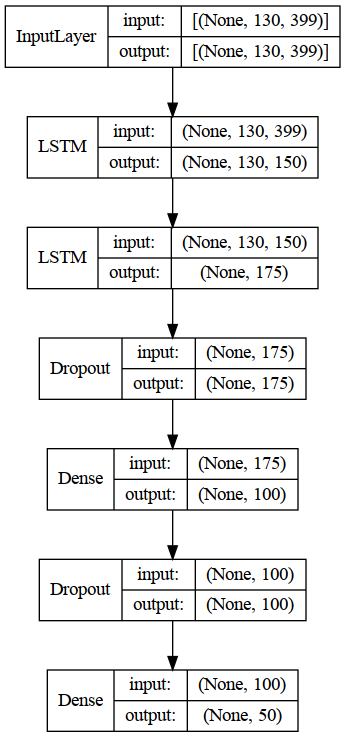

In [143]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

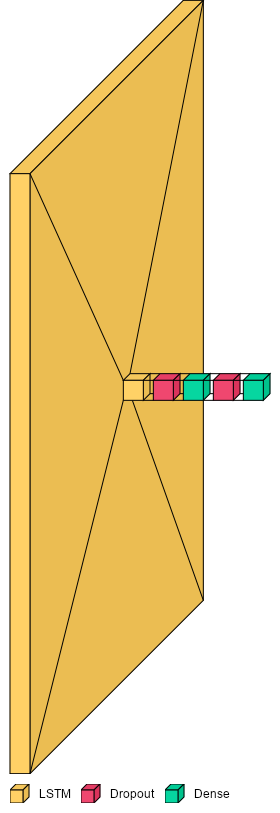

In [144]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [147]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 LSTM/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [148]:
hist_df = pd.read_csv('2 LSTM/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.147245       1.0  2.445876      0.644810
496  0.146496       1.0  2.421929      0.656080
497  0.145896       1.0  2.503781      0.657559
498  0.145472       1.0  2.503274      0.659128
499  0.144498       1.0  2.540223      0.646852

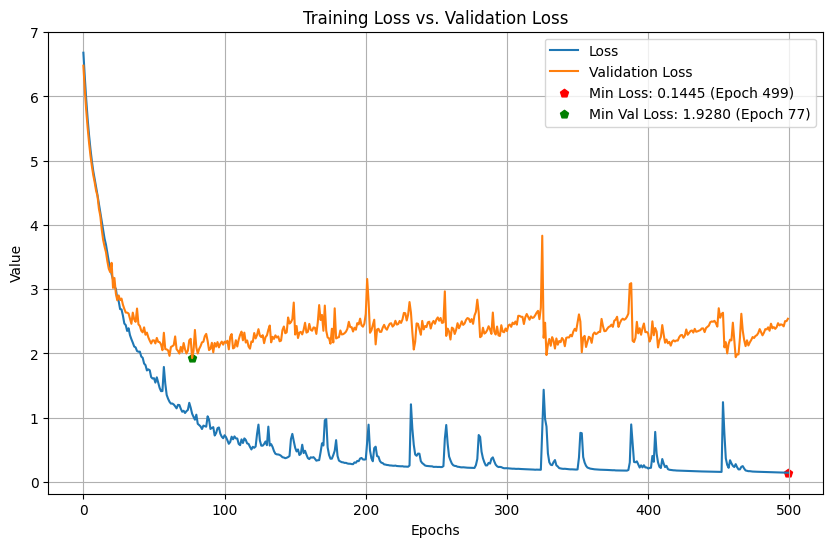

In [149]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

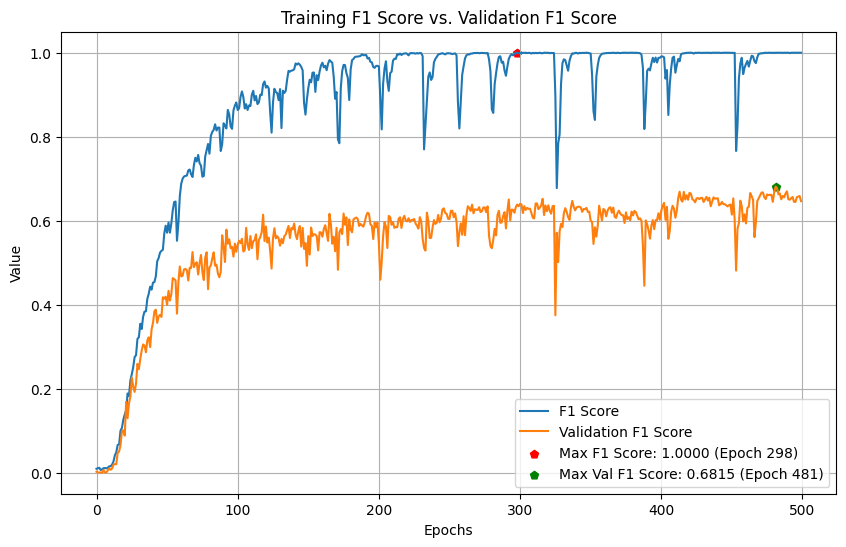

In [150]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [151]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 24ms/step - loss: 2.2822 - f1_score: 0.6815


[2.282166004180908, 0.6814804077148438]

In [152]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 2s 25ms/step - loss: 0.1515 - f1_score: 1.0000


[0.15145191550254822, 1.0]

In [153]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      1.000     0.800     0.889        10
         BEE      0.600     0.300     0.400        10
        BELT      0.800     1.000     0.889         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      0.667     0.333     0.444         6
      DINNER      0.667     0.750     0.706         8
         DOG      0.429    

## Hyperparameter Tuning 3 LSTM Layers

In [119]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'elu', 'gelu', 'relu'],
            default='relu')
        model = Sequential()

        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=True,
                 input_shape=self.input_shape,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_1',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            LSTM(units=hp.Int('units_2',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=True,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_2',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            LSTM(units=hp.Int('units_3',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_3',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.65,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_4',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0005)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

/tmp/ipykernel_973303/2620525644.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='3_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/3_LSTM/tuner0.json


In [63]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'elu', 'gelu', 'relu'], 'ordered': False}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_2 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_2 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_3 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_3 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value':

In [64]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [66]:
tuner.search(Xtrain,
             Ytrain,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 19m 29s]
val_f1_score: 0.6328944563865662

Best val_f1_score So Far: 0.6784997582435608
Total elapsed time: 22h 03m 27s
INFO:tensorflow:Oracle triggered exit


In [67]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/3_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: mish
units_1: 125
regularizer_1: 0.00041721832896797245
units_2: 150
regularizer_2: 0.00014354078230406593
units_3: 150
regularizer_3: 0.002948111895566179
dropout_1: 0.4
units_4: 110
dropout_2: 0.4
learning_rate: 0.0001715739875569636
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0713
Score: 0.6784997582435608

Trial 0598 summary
Hyperparameters:
dense_activation: selu
units_1: 125
regularizer_1: 0.0017686030901453863
units_2: 150
regularizer_2: 0.0013257717103432026
units_3: 175
regularizer_3: 0.00912470672476799
dropout_1: 0.25
units_4: 120
dropout_2: 0.65
learning_rate: 0.00043631081921577624
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0596
Score: 0.6762926578521729

Trial 0715 summa

In [121]:
best_model = tuner.get_best_models(num_models=3)[0]

2023-09-07 15:54:24.327227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 15:54:24.420271: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [122]:
loss, accuracy = best_model.evaluate(Xval, Yval)

 3/11 [=======>......................] - ETA: 0s - loss: 1.4701 - f1_score: 0.4815 

2023-09-07 15:54:31.994385: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 2s 27ms/step - loss: 1.9141 - f1_score: 0.7073


In [123]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 2s 29ms/step - loss: 0.2002 - f1_score: 0.9977


In [70]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 125)          262500    
                                                                 
 lstm_1 (LSTM)               (None, 130, 150)          165600    
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 110)               16610     
                                                                 
 dropout_1 (Dropout)         (None, 110)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5

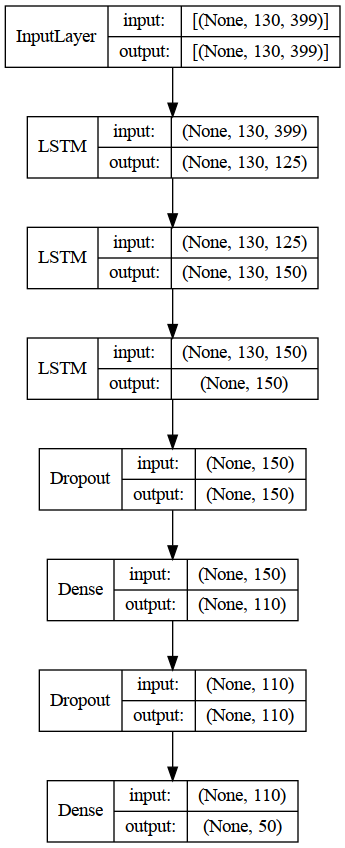

In [71]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [72]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 2s 25ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.500     0.400     0.444        10
        BELT      0.750     0.750     0.750         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      0.571     0.667     0.615         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      0.750     1.000     0.857         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.231     0.500     0.316         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.714     0.625     0.667         8
     DEVELOP      1.000     0.500     0.667         6
      DINNER      0.889     1.000     0.941         8
         DOG      0.600    

In [73]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [74]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='3 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [75]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.8033 - f1_score: 0.0122

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 44s 1s/step - loss: 4.8033 - f1_score: 0.0122 - val_loss: 4.7499 - val_f1_score: 9.1803e-04
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.7150 - f1_score: 0.0121

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 777ms/step - loss: 4.7150 - f1_score: 0.0121 - val_loss: 4.6661 - val_f1_score: 0.0031
Epoch 3/500
28/28 [==============================] - 4s 153ms/step - loss: 4.6260 - f1_score: 0.0188 - val_loss: 4.5829 - val_f1_score: 0.0028
Epoch 4/500
28/28 [==============================] - 4s 156ms/step - loss: 4.5383 - f1_score: 0.0233 - val_loss: 4.4965 - val_f1_score: 0.0012
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 4.4339 - f1_score: 0.0210

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 728ms/step - loss: 4.4339 - f1_score: 0.0210 - val_loss: 4.3412 - val_f1_score: 0.0063
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 4.3325 - f1_score: 0.0278

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 820ms/step - loss: 4.3325 - f1_score: 0.0278 - val_loss: 4.2351 - val_f1_score: 0.0129
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 4.2229 - f1_score: 0.0339

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 19s 707ms/step - loss: 4.2229 - f1_score: 0.0339 - val_loss: 4.1269 - val_f1_score: 0.0175
Epoch 8/500
28/28 [==============================] - ETA: 0s - loss: 4.1171 - f1_score: 0.0380

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 19s 710ms/step - loss: 4.1171 - f1_score: 0.0380 - val_loss: 3.9679 - val_f1_score: 0.0390
Epoch 9/500
28/28 [==============================] - 4s 153ms/step - loss: 4.0017 - f1_score: 0.0539 - val_loss: 3.8893 - val_f1_score: 0.0336
Epoch 10/500
28/28 [==============================] - 4s 154ms/step - loss: 3.8989 - f1_score: 0.0631 - val_loss: 3.7204 - val_f1_score: 0.0324
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.7821 - f1_score: 0.0709

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 803ms/step - loss: 3.7821 - f1_score: 0.0709 - val_loss: 3.6665 - val_f1_score: 0.0445
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 3.7093 - f1_score: 0.0730

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 796ms/step - loss: 3.7093 - f1_score: 0.0730 - val_loss: 3.5537 - val_f1_score: 0.0520
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.5803 - f1_score: 0.0897

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 768ms/step - loss: 3.5803 - f1_score: 0.0897 - val_loss: 3.4474 - val_f1_score: 0.0582
Epoch 14/500
28/28 [==============================] - 4s 154ms/step - loss: 3.5217 - f1_score: 0.0979 - val_loss: 3.3894 - val_f1_score: 0.0525
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 3.4199 - f1_score: 0.1063

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 759ms/step - loss: 3.4199 - f1_score: 0.1063 - val_loss: 3.2893 - val_f1_score: 0.0948
Epoch 16/500
28/28 [==============================] - 4s 154ms/step - loss: 3.3599 - f1_score: 0.1132 - val_loss: 3.2570 - val_f1_score: 0.0627
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 3.2681 - f1_score: 0.1342

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 860ms/step - loss: 3.2681 - f1_score: 0.1342 - val_loss: 3.1968 - val_f1_score: 0.1062
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.2175 - f1_score: 0.1420

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 808ms/step - loss: 3.2175 - f1_score: 0.1420 - val_loss: 3.1104 - val_f1_score: 0.1459
Epoch 19/500
28/28 [==============================] - 4s 156ms/step - loss: 3.1161 - f1_score: 0.1615 - val_loss: 3.0359 - val_f1_score: 0.1136
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 3.0783 - f1_score: 0.1684

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 38s 1s/step - loss: 3.0783 - f1_score: 0.1684 - val_loss: 2.9059 - val_f1_score: 0.1470
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 3.0039 - f1_score: 0.1853

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 785ms/step - loss: 3.0039 - f1_score: 0.1853 - val_loss: 2.9328 - val_f1_score: 0.1662
Epoch 22/500
28/28 [==============================] - 4s 159ms/step - loss: 2.9196 - f1_score: 0.1911 - val_loss: 2.8570 - val_f1_score: 0.1632
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 2.8764 - f1_score: 0.2072

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 745ms/step - loss: 2.8764 - f1_score: 0.2072 - val_loss: 2.9903 - val_f1_score: 0.1824
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 2.8371 - f1_score: 0.2266

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 803ms/step - loss: 2.8371 - f1_score: 0.2266 - val_loss: 2.7095 - val_f1_score: 0.2374
Epoch 25/500
28/28 [==============================] - 4s 155ms/step - loss: 2.7681 - f1_score: 0.2481 - val_loss: 2.6803 - val_f1_score: 0.2329
Epoch 26/500
28/28 [==============================] - 4s 154ms/step - loss: 2.6983 - f1_score: 0.2503 - val_loss: 2.6968 - val_f1_score: 0.2128
Epoch 27/500
28/28 [==============================] - 4s 155ms/step - loss: 2.6554 - f1_score: 0.2696 - val_loss: 2.6242 - val_f1_score: 0.2123
Epoch 28/500
28/28 [==============================] - 4s 156ms/step - loss: 2.5619 - f1_score: 0.2923 - val_loss: 2.5967 - val_f1_score: 0.2368
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 2.5140 - f1_score: 0.2907

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 807ms/step - loss: 2.5140 - f1_score: 0.2907 - val_loss: 2.5072 - val_f1_score: 0.2953
Epoch 30/500
28/28 [==============================] - 4s 156ms/step - loss: 2.4997 - f1_score: 0.3142 - val_loss: 2.5517 - val_f1_score: 0.2487
Epoch 31/500
28/28 [==============================] - 4s 156ms/step - loss: 2.4380 - f1_score: 0.3174 - val_loss: 2.3862 - val_f1_score: 0.2953
Epoch 32/500
28/28 [==============================] - 4s 157ms/step - loss: 2.3730 - f1_score: 0.3297 - val_loss: 2.5882 - val_f1_score: 0.2319
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 2.3449 - f1_score: 0.3433

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 810ms/step - loss: 2.3449 - f1_score: 0.3433 - val_loss: 2.3521 - val_f1_score: 0.3077
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 2.2664 - f1_score: 0.3672

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 776ms/step - loss: 2.2664 - f1_score: 0.3672 - val_loss: 2.3122 - val_f1_score: 0.3355
Epoch 35/500
28/28 [==============================] - 4s 155ms/step - loss: 2.2649 - f1_score: 0.3788 - val_loss: 2.3478 - val_f1_score: 0.3166
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 2.2421 - f1_score: 0.3780

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 795ms/step - loss: 2.2421 - f1_score: 0.3780 - val_loss: 2.2420 - val_f1_score: 0.3673
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 2.1385 - f1_score: 0.4015

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 763ms/step - loss: 2.1385 - f1_score: 0.4015 - val_loss: 2.2216 - val_f1_score: 0.3814
Epoch 38/500
28/28 [==============================] - 4s 155ms/step - loss: 2.1106 - f1_score: 0.4225 - val_loss: 2.3722 - val_f1_score: 0.3089
Epoch 39/500
28/28 [==============================] - 4s 155ms/step - loss: 2.0798 - f1_score: 0.4160 - val_loss: 2.3751 - val_f1_score: 0.3521
Epoch 40/500
28/28 [==============================] - 4s 156ms/step - loss: 2.0303 - f1_score: 0.4385 - val_loss: 2.2451 - val_f1_score: 0.3421
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 1.9825 - f1_score: 0.4436

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 800ms/step - loss: 1.9825 - f1_score: 0.4436 - val_loss: 2.1283 - val_f1_score: 0.4136
Epoch 42/500
28/28 [==============================] - 4s 155ms/step - loss: 1.9429 - f1_score: 0.4680 - val_loss: 2.1473 - val_f1_score: 0.3902
Epoch 43/500
28/28 [==============================] - 4s 159ms/step - loss: 1.8810 - f1_score: 0.4773 - val_loss: 2.1852 - val_f1_score: 0.3789
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 1.8625 - f1_score: 0.4923

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 820ms/step - loss: 1.8625 - f1_score: 0.4923 - val_loss: 1.9987 - val_f1_score: 0.4640
Epoch 45/500
28/28 [==============================] - 4s 157ms/step - loss: 1.7994 - f1_score: 0.5042 - val_loss: 2.0006 - val_f1_score: 0.4127
Epoch 46/500
28/28 [==============================] - 4s 158ms/step - loss: 1.7549 - f1_score: 0.5234 - val_loss: 2.1759 - val_f1_score: 0.3980
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 1.6959 - f1_score: 0.5426

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 835ms/step - loss: 1.6959 - f1_score: 0.5426 - val_loss: 1.9454 - val_f1_score: 0.4845
Epoch 48/500
28/28 [==============================] - 4s 154ms/step - loss: 1.7276 - f1_score: 0.5339 - val_loss: 1.9980 - val_f1_score: 0.4462
Epoch 49/500
28/28 [==============================] - 4s 156ms/step - loss: 1.6595 - f1_score: 0.5473 - val_loss: 2.0059 - val_f1_score: 0.4636
Epoch 50/500
28/28 [==============================] - 4s 157ms/step - loss: 1.6107 - f1_score: 0.5833 - val_loss: 1.9564 - val_f1_score: 0.4506
Epoch 51/500
28/28 [==============================] - 4s 158ms/step - loss: 1.5172 - f1_score: 0.6028 - val_loss: 1.9269 - val_f1_score: 0.4753
Epoch 52/500
28/28 [==============================] - 4s 158ms/step - loss: 1.5110 - f1_score: 0.6032 - val_loss: 1.9369 - val_f1_score: 0.4643
Epoch 53/500
28/28 [==============================] - 4s 160ms/step - loss: 1.4766 - f1_score: 0.6056 - val_loss: 1.9628 - val_f1_score: 0.4697
Epoc

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 806ms/step - loss: 1.4428 - f1_score: 0.6197 - val_loss: 1.9889 - val_f1_score: 0.4997
Epoch 56/500
28/28 [==============================] - ETA: 0s - loss: 1.4786 - f1_score: 0.6225

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 24s 882ms/step - loss: 1.4786 - f1_score: 0.6225 - val_loss: 1.8722 - val_f1_score: 0.5022
Epoch 57/500
28/28 [==============================] - ETA: 0s - loss: 1.4014 - f1_score: 0.6451

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 770ms/step - loss: 1.4014 - f1_score: 0.6451 - val_loss: 1.9478 - val_f1_score: 0.5054
Epoch 58/500
28/28 [==============================] - ETA: 0s - loss: 1.4354 - f1_score: 0.6226

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 804ms/step - loss: 1.4354 - f1_score: 0.6226 - val_loss: 1.8395 - val_f1_score: 0.5187
Epoch 59/500
28/28 [==============================] - ETA: 0s - loss: 1.4241 - f1_score: 0.6252

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 782ms/step - loss: 1.4241 - f1_score: 0.6252 - val_loss: 1.9032 - val_f1_score: 0.5241
Epoch 60/500
28/28 [==============================] - 4s 155ms/step - loss: 1.4403 - f1_score: 0.6302 - val_loss: 1.9941 - val_f1_score: 0.4805
Epoch 61/500
28/28 [==============================] - 4s 156ms/step - loss: 1.3899 - f1_score: 0.6347 - val_loss: 1.9086 - val_f1_score: 0.4853
Epoch 62/500
28/28 [==============================] - ETA: 0s - loss: 1.3303 - f1_score: 0.6507

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 821ms/step - loss: 1.3303 - f1_score: 0.6507 - val_loss: 1.7973 - val_f1_score: 0.5430
Epoch 63/500
28/28 [==============================] - ETA: 0s - loss: 1.2922 - f1_score: 0.6578

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 765ms/step - loss: 1.2922 - f1_score: 0.6578 - val_loss: 1.7876 - val_f1_score: 0.5442
Epoch 64/500
28/28 [==============================] - ETA: 0s - loss: 1.2659 - f1_score: 0.6763

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 19s 699ms/step - loss: 1.2659 - f1_score: 0.6763 - val_loss: 1.7875 - val_f1_score: 0.5472
Epoch 65/500
28/28 [==============================] - 4s 155ms/step - loss: 1.1634 - f1_score: 0.7131 - val_loss: 1.8011 - val_f1_score: 0.5301
Epoch 66/500
28/28 [==============================] - 4s 155ms/step - loss: 1.1886 - f1_score: 0.7020 - val_loss: 1.8109 - val_f1_score: 0.5399
Epoch 67/500
28/28 [==============================] - ETA: 0s - loss: 1.2019 - f1_score: 0.7031

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 848ms/step - loss: 1.2019 - f1_score: 0.7031 - val_loss: 1.8321 - val_f1_score: 0.5612
Epoch 68/500
28/28 [==============================] - 4s 154ms/step - loss: 1.1744 - f1_score: 0.7193 - val_loss: 1.6972 - val_f1_score: 0.5547
Epoch 69/500
28/28 [==============================] - 4s 155ms/step - loss: 1.1705 - f1_score: 0.7082 - val_loss: 1.8418 - val_f1_score: 0.5443
Epoch 70/500
28/28 [==============================] - 4s 157ms/step - loss: 1.1446 - f1_score: 0.7135 - val_loss: 1.7954 - val_f1_score: 0.5481
Epoch 71/500
28/28 [==============================] - ETA: 0s - loss: 1.0858 - f1_score: 0.7342

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 815ms/step - loss: 1.0858 - f1_score: 0.7342 - val_loss: 1.7923 - val_f1_score: 0.5725
Epoch 72/500
28/28 [==============================] - 4s 155ms/step - loss: 1.1017 - f1_score: 0.7317 - val_loss: 1.7907 - val_f1_score: 0.5684
Epoch 73/500
28/28 [==============================] - 4s 157ms/step - loss: 1.0555 - f1_score: 0.7398 - val_loss: 1.8129 - val_f1_score: 0.5634
Epoch 74/500
28/28 [==============================] - 4s 158ms/step - loss: 0.9611 - f1_score: 0.7767 - val_loss: 1.9067 - val_f1_score: 0.5307
Epoch 75/500
28/28 [==============================] - 4s 159ms/step - loss: 1.0273 - f1_score: 0.7514 - val_loss: 1.7822 - val_f1_score: 0.5546
Epoch 76/500
28/28 [==============================] - ETA: 0s - loss: 1.0000 - f1_score: 0.7670

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 856ms/step - loss: 1.0000 - f1_score: 0.7670 - val_loss: 1.8105 - val_f1_score: 0.6007
Epoch 77/500
28/28 [==============================] - 4s 157ms/step - loss: 0.9969 - f1_score: 0.7648 - val_loss: 1.7794 - val_f1_score: 0.5742
Epoch 78/500
28/28 [==============================] - ETA: 0s - loss: 1.0375 - f1_score: 0.7473

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 824ms/step - loss: 1.0375 - f1_score: 0.7473 - val_loss: 1.7438 - val_f1_score: 0.6060
Epoch 79/500
28/28 [==============================] - 4s 155ms/step - loss: 0.9325 - f1_score: 0.7890 - val_loss: 1.8969 - val_f1_score: 0.5616
Epoch 80/500
28/28 [==============================] - 4s 156ms/step - loss: 0.9624 - f1_score: 0.7713 - val_loss: 1.8667 - val_f1_score: 0.5657
Epoch 81/500
28/28 [==============================] - 4s 157ms/step - loss: 0.9237 - f1_score: 0.7871 - val_loss: 1.8094 - val_f1_score: 0.5786
Epoch 82/500
28/28 [==============================] - 4s 158ms/step - loss: 0.9195 - f1_score: 0.7990 - val_loss: 1.9357 - val_f1_score: 0.5346
Epoch 83/500
28/28 [==============================] - ETA: 0s - loss: 0.8785 - f1_score: 0.8114

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 837ms/step - loss: 0.8785 - f1_score: 0.8114 - val_loss: 1.7455 - val_f1_score: 0.6157
Epoch 84/500
28/28 [==============================] - 4s 155ms/step - loss: 0.9088 - f1_score: 0.7904 - val_loss: 1.9218 - val_f1_score: 0.5736
Epoch 85/500
28/28 [==============================] - 4s 158ms/step - loss: 0.9510 - f1_score: 0.7843 - val_loss: 2.0076 - val_f1_score: 0.5565
Epoch 86/500
28/28 [==============================] - 4s 159ms/step - loss: 0.9911 - f1_score: 0.7699 - val_loss: 1.9928 - val_f1_score: 0.5412
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 0.8932 - f1_score: 0.8089

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 832ms/step - loss: 0.8932 - f1_score: 0.8089 - val_loss: 1.8076 - val_f1_score: 0.6311
Epoch 88/500
28/28 [==============================] - 4s 156ms/step - loss: 0.8490 - f1_score: 0.8091 - val_loss: 1.7807 - val_f1_score: 0.6250
Epoch 89/500
28/28 [==============================] - 4s 157ms/step - loss: 0.8317 - f1_score: 0.8182 - val_loss: 1.7720 - val_f1_score: 0.6308
Epoch 90/500
28/28 [==============================] - 4s 158ms/step - loss: 0.9335 - f1_score: 0.7932 - val_loss: 1.9824 - val_f1_score: 0.5490
Epoch 91/500
28/28 [==============================] - ETA: 0s - loss: 0.8960 - f1_score: 0.7924

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 843ms/step - loss: 0.8960 - f1_score: 0.7924 - val_loss: 1.7980 - val_f1_score: 0.6459
Epoch 92/500
28/28 [==============================] - 4s 161ms/step - loss: 0.8233 - f1_score: 0.8300 - val_loss: 1.6961 - val_f1_score: 0.6350
Epoch 93/500
28/28 [==============================] - 4s 160ms/step - loss: 0.7586 - f1_score: 0.8402 - val_loss: 1.7669 - val_f1_score: 0.6392
Epoch 94/500
28/28 [==============================] - 4s 158ms/step - loss: 0.7027 - f1_score: 0.8618 - val_loss: 1.7835 - val_f1_score: 0.6412
Epoch 95/500
28/28 [==============================] - 4s 160ms/step - loss: 0.7035 - f1_score: 0.8659 - val_loss: 1.8868 - val_f1_score: 0.6268
Epoch 96/500
28/28 [==============================] - ETA: 0s - loss: 0.6870 - f1_score: 0.8679

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 855ms/step - loss: 0.6870 - f1_score: 0.8679 - val_loss: 1.8623 - val_f1_score: 0.6468
Epoch 97/500
28/28 [==============================] - 4s 155ms/step - loss: 0.7167 - f1_score: 0.8578 - val_loss: 1.8345 - val_f1_score: 0.6199
Epoch 98/500
28/28 [==============================] - 4s 156ms/step - loss: 0.8511 - f1_score: 0.8215 - val_loss: 1.8848 - val_f1_score: 0.6235
Epoch 99/500
28/28 [==============================] - 4s 158ms/step - loss: 0.7146 - f1_score: 0.8539 - val_loss: 1.8909 - val_f1_score: 0.6360
Epoch 100/500
28/28 [==============================] - 4s 159ms/step - loss: 0.6938 - f1_score: 0.8659 - val_loss: 1.9411 - val_f1_score: 0.5874
Epoch 101/500
28/28 [==============================] - 4s 160ms/step - loss: 0.7229 - f1_score: 0.8591 - val_loss: 2.1420 - val_f1_score: 0.5350
Epoch 102/500
28/28 [==============================] - 4s 160ms/step - loss: 0.8118 - f1_score: 0.8274 - val_loss: 2.0071 - val_f1_score: 0.5878
E

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 26s 975ms/step - loss: 0.7217 - f1_score: 0.8609 - val_loss: 1.7532 - val_f1_score: 0.6604
Epoch 106/500
28/28 [==============================] - 4s 155ms/step - loss: 0.6720 - f1_score: 0.8735 - val_loss: 1.8218 - val_f1_score: 0.6362
Epoch 107/500
28/28 [==============================] - 4s 158ms/step - loss: 0.7181 - f1_score: 0.8688 - val_loss: 1.9216 - val_f1_score: 0.5899
Epoch 108/500
28/28 [==============================] - 4s 159ms/step - loss: 0.7416 - f1_score: 0.8419 - val_loss: 2.4546 - val_f1_score: 0.5252
Epoch 109/500
28/28 [==============================] - 4s 160ms/step - loss: 1.2229 - f1_score: 0.7406 - val_loss: 3.2135 - val_f1_score: 0.3260
Epoch 110/500
28/28 [==============================] - 4s 161ms/step - loss: 1.8929 - f1_score: 0.5440 - val_loss: 1.9386 - val_f1_score: 0.5554
Epoch 111/500
28/28 [==============================] - 5s 162ms/step - loss: 0.9791 - f1_score: 0.7728 - val_loss: 1.8440 - val_f1_score: 0.597

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 27s 991ms/step - loss: 0.4389 - f1_score: 0.9437 - val_loss: 1.8110 - val_f1_score: 0.6755
Epoch 145/500
28/28 [==============================] - 4s 156ms/step - loss: 0.5214 - f1_score: 0.9201 - val_loss: 2.0389 - val_f1_score: 0.6063
Epoch 146/500
28/28 [==============================] - 4s 158ms/step - loss: 0.5280 - f1_score: 0.9205 - val_loss: 1.8372 - val_f1_score: 0.6552
Epoch 147/500
28/28 [==============================] - 5s 162ms/step - loss: 0.4336 - f1_score: 0.9435 - val_loss: 2.0451 - val_f1_score: 0.6221
Epoch 148/500
28/28 [==============================] - 5s 163ms/step - loss: 0.4179 - f1_score: 0.9557 - val_loss: 2.0004 - val_f1_score: 0.6374
Epoch 149/500
28/28 [==============================] - 5s 162ms/step - loss: 0.4014 - f1_score: 0.9558 - val_loss: 1.8842 - val_f1_score: 0.6542
Epoch 150/500
28/28 [==============================] - 5s 165ms/step - loss: 0.4381 - f1_score: 0.9480 - val_loss: 1.9224 - val_f1_score: 0.642

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 28s 1s/step - loss: 0.3515 - f1_score: 0.9740 - val_loss: 1.9294 - val_f1_score: 0.6836
Epoch 154/500
28/28 [==============================] - 4s 159ms/step - loss: 0.3883 - f1_score: 0.9606 - val_loss: 1.9356 - val_f1_score: 0.6795
Epoch 155/500
28/28 [==============================] - 4s 161ms/step - loss: 0.4015 - f1_score: 0.9539 - val_loss: 2.0759 - val_f1_score: 0.6570
Epoch 156/500
28/28 [==============================] - 5s 162ms/step - loss: 0.3560 - f1_score: 0.9716 - val_loss: 2.0461 - val_f1_score: 0.6658
Epoch 157/500
28/28 [==============================] - 4s 161ms/step - loss: 0.3491 - f1_score: 0.9736 - val_loss: 1.9475 - val_f1_score: 0.6620
Epoch 158/500
28/28 [==============================] - 5s 162ms/step - loss: 0.3355 - f1_score: 0.9787 - val_loss: 1.9985 - val_f1_score: 0.6602
Epoch 159/500
28/28 [==============================] - 5s 166ms/step - loss: 0.3608 - f1_score: 0.9669 - val_loss: 1.9909 - val_f1_score: 0.6476
E

28/28 [==============================] - 5s 165ms/step - loss: 0.3739 - f1_score: 0.9486 - val_loss: 2.3532 - val_f1_score: 0.5975
Epoch 266/500
28/28 [==============================] - 5s 170ms/step - loss: 0.4148 - f1_score: 0.9407 - val_loss: 2.2463 - val_f1_score: 0.6272
Epoch 267/500
28/28 [==============================] - 5s 172ms/step - loss: 0.3495 - f1_score: 0.9591 - val_loss: 2.5573 - val_f1_score: 0.5727
Epoch 268/500
28/28 [==============================] - 5s 168ms/step - loss: 0.4278 - f1_score: 0.9322 - val_loss: 2.1277 - val_f1_score: 0.6430
Epoch 269/500
28/28 [==============================] - 5s 168ms/step - loss: 0.4323 - f1_score: 0.9361 - val_loss: 2.3075 - val_f1_score: 0.6192
Epoch 270/500
28/28 [==============================] - 5s 167ms/step - loss: 0.3315 - f1_score: 0.9653 - val_loss: 2.5641 - val_f1_score: 0.5981
Epoch 271/500
28/28 [==============================] - 5s 171ms/step - loss: 0.3072 - f1_score: 0.9714 - val_loss: 2.3677 - val_f1_score: 0.6107

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 24s 872ms/step - loss: 0.2123 - f1_score: 0.9979 - val_loss: 2.2671 - val_f1_score: 0.6911
Epoch 291/500
28/28 [==============================] - 4s 158ms/step - loss: 0.2138 - f1_score: 0.9960 - val_loss: 2.3029 - val_f1_score: 0.6823
Epoch 292/500
28/28 [==============================] - 4s 160ms/step - loss: 0.2109 - f1_score: 0.9981 - val_loss: 2.2960 - val_f1_score: 0.6644
Epoch 293/500
28/28 [==============================] - 5s 164ms/step - loss: 0.2090 - f1_score: 0.9982 - val_loss: 2.2979 - val_f1_score: 0.6741
Epoch 294/500
28/28 [==============================] - 5s 163ms/step - loss: 0.2083 - f1_score: 0.9980 - val_loss: 2.2651 - val_f1_score: 0.6765
Epoch 295/500
28/28 [==============================] - 5s 162ms/step - loss: 0.2049 - f1_score: 0.9988 - val_loss: 2.3129 - val_f1_score: 0.6768
Epoch 296/500
28/28 [==============================] - 5s 166ms/step - loss: 0.2876 - f1_score: 0.9770 - val_loss: 2.9377 - val_f1_score: 0.598

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 25s 920ms/step - loss: 0.2357 - f1_score: 0.9867 - val_loss: 2.1101 - val_f1_score: 0.6933
Epoch 333/500
28/28 [==============================] - 4s 157ms/step - loss: 0.2317 - f1_score: 0.9913 - val_loss: 2.4897 - val_f1_score: 0.6354
Epoch 334/500
28/28 [==============================] - 4s 160ms/step - loss: 0.3035 - f1_score: 0.9698 - val_loss: 2.2064 - val_f1_score: 0.6748
Epoch 335/500
28/28 [==============================] - 5s 162ms/step - loss: 0.6428 - f1_score: 0.8899 - val_loss: 2.5046 - val_f1_score: 0.6116
Epoch 336/500
28/28 [==============================] - 5s 162ms/step - loss: 0.4817 - f1_score: 0.9191 - val_loss: 2.4185 - val_f1_score: 0.6166
Epoch 337/500
28/28 [==============================] - 5s 162ms/step - loss: 0.3938 - f1_score: 0.9474 - val_loss: 2.1450 - val_f1_score: 0.6192
Epoch 338/500
28/28 [==============================] - 5s 163ms/step - loss: 0.3076 - f1_score: 0.9655 - val_loss: 2.2900 - val_f1_score: 0.648

28/28 [==============================] - 5s 167ms/step - loss: 0.1616 - f1_score: 0.9983 - val_loss: 2.4683 - val_f1_score: 0.6581
Epoch 445/500
28/28 [==============================] - 5s 165ms/step - loss: 0.1578 - f1_score: 1.0000 - val_loss: 2.5106 - val_f1_score: 0.6560
Epoch 446/500
28/28 [==============================] - 5s 165ms/step - loss: 0.1577 - f1_score: 0.9996 - val_loss: 2.5343 - val_f1_score: 0.6638
Epoch 447/500
28/28 [==============================] - 5s 166ms/step - loss: 0.1568 - f1_score: 1.0000 - val_loss: 2.5400 - val_f1_score: 0.6662
Epoch 448/500
28/28 [==============================] - 5s 167ms/step - loss: 0.1580 - f1_score: 0.9996 - val_loss: 2.5580 - val_f1_score: 0.6592
Epoch 449/500
28/28 [==============================] - 5s 166ms/step - loss: 0.1565 - f1_score: 1.0000 - val_loss: 2.5949 - val_f1_score: 0.6650
Epoch 450/500
28/28 [==============================] - 5s 165ms/step - loss: 0.2195 - f1_score: 0.9853 - val_loss: 2.6891 - val_f1_score: 0.6156

In [76]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 2s 26ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.800     0.400     0.533        10
        BELT      1.000     1.000     1.000         4
        BITE      0.714     0.625     0.667         8
   BREAKFAST      0.556     0.833     0.667         6
      CANCER      0.833     0.625     0.714         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      0.714     0.833     0.769         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      0.714     0.833     0.769         6
      DEMAND      0.889     1.000     0.941         8
     DEVELOP      0.400     0.333     0.364         6
      DINNER      0.750     0.375     0.500         8
         DOG      0.429    

In [77]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '3 LSTM/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [119]:
hist_df = pd.read_csv('3 LSTM/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.543994  0.904393  2.306155      0.580705
496  0.347574  0.948425  2.054087      0.637343
497  0.259453  0.972048  2.308527      0.613971
498  0.265040  0.969994  2.245025      0.638905
499  0.210580  0.984705  2.191885      0.621819

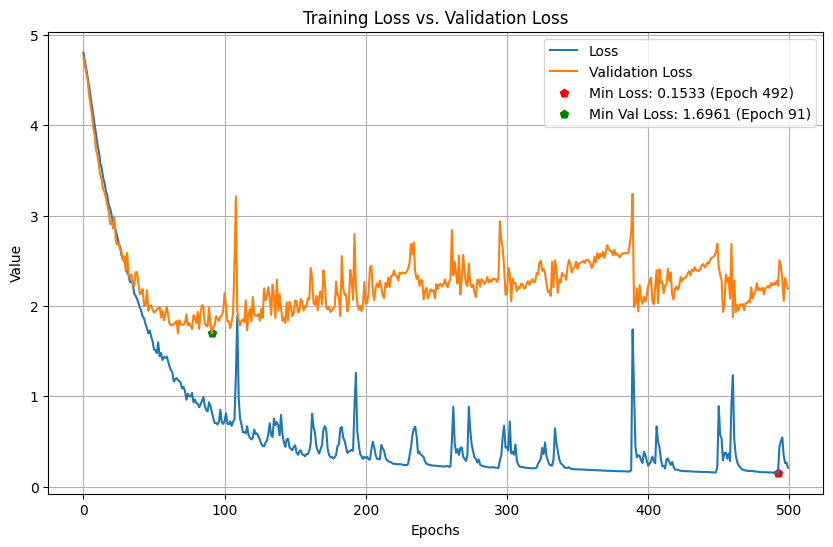

In [120]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

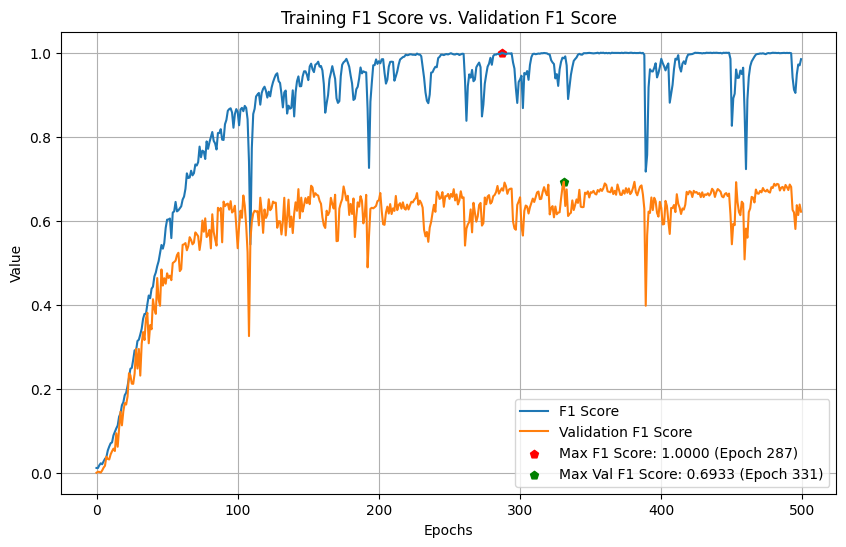

In [121]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [122]:
reconstructed_model = tf.keras.models.load_model("3 LSTM")

2023-09-11 20:06:02.938894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 20:06:04.539580: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 539 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [125]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 130, 125)          262500    
                                                                 
 lstm_4 (LSTM)               (None, 130, 150)          165600    
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 110)               16610     
                                                                 
 dropout_3 (Dropout)         (None, 110)               0         
                                                                 
 dense_3 (Dense)             (None, 50)               

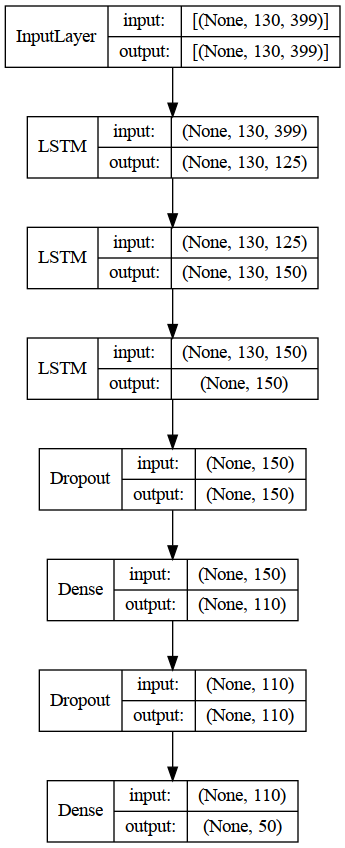

In [126]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

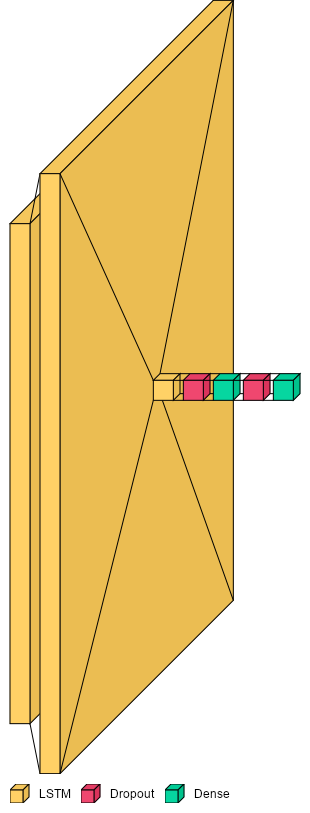

In [123]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [127]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 27ms/step - loss: 2.1101 - f1_score: 0.6933


[2.1100780963897705, 0.6932531595230103]

In [128]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 2s 29ms/step - loss: 0.1957 - f1_score: 0.9954


[0.19567184150218964, 0.9954199194908142]

In [84]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 2s 25ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.750     0.600     0.667        10
        BELT      1.000     0.500     0.667         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      0.800     0.667     0.727         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      1.000     0.333     0.500         6
      DINNER      0.800     0.500     0.615         8
         DOG      0.500    

## Hyperparameter Tuning 1 1D CNN Layer

In [119]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='gelu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                       default=2,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[2, 3, 4, 5, 6, 7, 8, 9, 10],
                default=2,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.75,
                step=0.05,
            )))
        model.add(Flatten())
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=90),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.5,
                step=0.05,
            )))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0032857440370174544)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

/tmp/ipykernel_1434469/3344394336.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
HYPERBAND_MAX_EPOCHS = 300
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='1_1D_CNN',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_1D_CNN/tuner0.json


In [121]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
num_filters_1 (Choice)
{'default': 150, 'conditions': [], 'values': [100, 125, 150, 200], 'ordered': True}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20], 'ordered': True}
pool_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
dropout_1 (Float)
{'default': 0.75, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'default': 90, 'conditions': [], 'min_value': 70, 'max_value': 120, 'step': 10, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0032857440370174544, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step

In [122]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [123]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 03m 03s]
val_f1_score: 0.01736710499972105

Best val_f1_score So Far: 0.5334144830703735
Total elapsed time: 01h 50m 14s
INFO:tensorflow:Oracle triggered exit


In [124]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_1D_CNN
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0670 summary
Hyperparameters:
dense_activation: elu
num_filters_1: 150
kernel_1: 2
pool_1: 10
dropout_1: 0.55
units_2: 110
dropout_2: 0.55
learning_rate: 0.00043075793575989864
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0664
Score: 0.5334144830703735

Trial 0598 summary
Hyperparameters:
dense_activation: elu
num_filters_1: 100
kernel_1: 2
pool_1: 9
dropout_1: 0.0
units_2: 80
dropout_2: 0.8500000000000001
learning_rate: 0.001687289391829868
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0593
Score: 0.49332109093666077

Trial 0599 summary
Hyperparameters:
dense_activation: elu
num_filters_1: 150
kernel_1: 15
pool_1: 10
dropout_1: 0.15000000000000002
units_2: 80
dropout_2: 0.2
learning_rate: 0.00021098836250509396
tuner/epochs: 300
tun

In [125]:
best_model = tuner.get_best_models(num_models=1)[0]

In [126]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 129, 150)          119850    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 150)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 150)           0         
                                                                 
 flatten (Flatten)           (None, 1800)              0         
                                                                 
 dense (Dense)               (None, 110)               198110    
                                                                 
 dropout_1 (Dropout)         (None, 110)               0         
                                                        

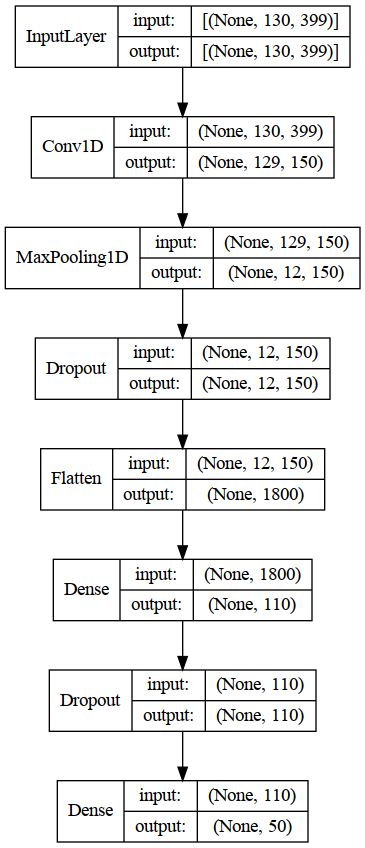

In [127]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [128]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 35ms/step - loss: 2.1379 - f1_score: 0.5353


In [133]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 9ms/step - loss: 0.0905 - f1_score: 0.9931


In [129]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.462     1.000     0.632         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.455     0.500     0.476        10
        BELT      1.000     1.000     1.000         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      1.000     0.333     0.500         6
      CANCER      0.667     0.750     0.706         8
   CHRISTMAS      0.400     0.333     0.364         6
    CONFUSED      0.800     0.667     0.727         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.200     0.250     0.222         8
     DEVELOP      0.600     0.500     0.545         6
      DINNER      0.000     0.000     0.000         8
         DOG      1.000     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [131]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [132]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.1782 - f1_score: 0.0219

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 10s 274ms/step - loss: 4.1782 - f1_score: 0.0219 - val_loss: 3.9117 - val_f1_score: 0.0271
Epoch 2/500
28/28 [==============================] - 1s 38ms/step - loss: 3.9862 - f1_score: 0.0322 - val_loss: 3.8709 - val_f1_score: 0.0103
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9161 - f1_score: 0.0363

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 158ms/step - loss: 3.9153 - f1_score: 0.0366 - val_loss: 3.8101 - val_f1_score: 0.0312
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 3.8238 - f1_score: 0.0518

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 167ms/step - loss: 3.8258 - f1_score: 0.0509 - val_loss: 3.7322 - val_f1_score: 0.0355
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7262 - f1_score: 0.0593

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 168ms/step - loss: 3.7282 - f1_score: 0.0601 - val_loss: 3.6588 - val_f1_score: 0.0561
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 3.6179 - f1_score: 0.0731

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 140ms/step - loss: 3.6156 - f1_score: 0.0732 - val_loss: 3.5797 - val_f1_score: 0.0855
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 3.5300 - f1_score: 0.0866

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 139ms/step - loss: 3.5239 - f1_score: 0.0879 - val_loss: 3.4878 - val_f1_score: 0.0982
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4141 - f1_score: 0.1070

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 147ms/step - loss: 3.4193 - f1_score: 0.1058 - val_loss: 3.3818 - val_f1_score: 0.0993
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3392 - f1_score: 0.1121

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 142ms/step - loss: 3.3353 - f1_score: 0.1125 - val_loss: 3.3242 - val_f1_score: 0.1010
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 3.2319 - f1_score: 0.1323

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 136ms/step - loss: 3.2274 - f1_score: 0.1342 - val_loss: 3.2142 - val_f1_score: 0.1514
Epoch 11/500
28/28 [==============================] - 1s 39ms/step - loss: 3.1982 - f1_score: 0.1319 - val_loss: 3.1384 - val_f1_score: 0.1456
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0936 - f1_score: 0.1552

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 141ms/step - loss: 3.0887 - f1_score: 0.1567 - val_loss: 3.1138 - val_f1_score: 0.1525
Epoch 13/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0335 - f1_score: 0.1582

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 140ms/step - loss: 3.0339 - f1_score: 0.1583 - val_loss: 3.0535 - val_f1_score: 0.1649
Epoch 14/500
28/28 [==============================] - 1s 40ms/step - loss: 2.9749 - f1_score: 0.1840 - val_loss: 3.0626 - val_f1_score: 0.1647
Epoch 15/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9055 - f1_score: 0.1906

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 148ms/step - loss: 2.9131 - f1_score: 0.1891 - val_loss: 2.9533 - val_f1_score: 0.2041
Epoch 16/500
28/28 [==============================] - 1s 39ms/step - loss: 2.8403 - f1_score: 0.2068 - val_loss: 2.9182 - val_f1_score: 0.1816
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8353 - f1_score: 0.2090

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 166ms/step - loss: 2.8374 - f1_score: 0.2078 - val_loss: 2.8859 - val_f1_score: 0.2067
Epoch 18/500
28/28 [==============================] - 1s 41ms/step - loss: 2.7422 - f1_score: 0.2372 - val_loss: 2.8608 - val_f1_score: 0.1744
Epoch 19/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7422 - f1_score: 0.2083

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 155ms/step - loss: 2.7340 - f1_score: 0.2104 - val_loss: 2.8076 - val_f1_score: 0.2226
Epoch 20/500
28/28 [==============================] - 1s 38ms/step - loss: 2.6935 - f1_score: 0.2383 - val_loss: 2.7784 - val_f1_score: 0.2215
Epoch 21/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6502 - f1_score: 0.2438

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 164ms/step - loss: 2.6477 - f1_score: 0.2440 - val_loss: 2.7910 - val_f1_score: 0.2443
Epoch 22/500
28/28 [==============================] - 1s 39ms/step - loss: 2.6085 - f1_score: 0.2541 - val_loss: 2.7699 - val_f1_score: 0.2296
Epoch 23/500
28/28 [==============================] - 1s 39ms/step - loss: 2.5604 - f1_score: 0.2747 - val_loss: 2.7196 - val_f1_score: 0.2420
Epoch 24/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5434 - f1_score: 0.2710

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 177ms/step - loss: 2.5419 - f1_score: 0.2705 - val_loss: 2.7216 - val_f1_score: 0.2694
Epoch 25/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4813 - f1_score: 0.2854

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 171ms/step - loss: 2.4850 - f1_score: 0.2857 - val_loss: 2.7140 - val_f1_score: 0.2718
Epoch 26/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4480 - f1_score: 0.3013

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 155ms/step - loss: 2.4453 - f1_score: 0.3011 - val_loss: 2.6845 - val_f1_score: 0.2883
Epoch 27/500
28/28 [==============================] - 1s 40ms/step - loss: 2.4410 - f1_score: 0.2867 - val_loss: 2.6887 - val_f1_score: 0.2609
Epoch 28/500
28/28 [==============================] - 1s 39ms/step - loss: 2.4207 - f1_score: 0.2957 - val_loss: 2.6552 - val_f1_score: 0.2343
Epoch 29/500
28/28 [==============================] - 1s 42ms/step - loss: 2.3870 - f1_score: 0.2982 - val_loss: 2.6445 - val_f1_score: 0.2817
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3382 - f1_score: 0.3267

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 145ms/step - loss: 2.3390 - f1_score: 0.3258 - val_loss: 2.6150 - val_f1_score: 0.3014
Epoch 31/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3048 - f1_score: 0.3346

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 142ms/step - loss: 2.3063 - f1_score: 0.3346 - val_loss: 2.6020 - val_f1_score: 0.3127
Epoch 32/500
28/28 [==============================] - 1s 41ms/step - loss: 2.2747 - f1_score: 0.3353 - val_loss: 2.6115 - val_f1_score: 0.3023
Epoch 33/500
28/28 [==============================] - 1s 41ms/step - loss: 2.2553 - f1_score: 0.3488 - val_loss: 2.6204 - val_f1_score: 0.2667
Epoch 34/500
28/28 [==============================] - 1s 40ms/step - loss: 2.2401 - f1_score: 0.3372 - val_loss: 2.5669 - val_f1_score: 0.2797
Epoch 35/500
28/28 [==============================] - 1s 40ms/step - loss: 2.2148 - f1_score: 0.3461 - val_loss: 2.5499 - val_f1_score: 0.3055
Epoch 36/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2151 - f1_score: 0.3516

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 160ms/step - loss: 2.2168 - f1_score: 0.3503 - val_loss: 2.5124 - val_f1_score: 0.3485
Epoch 37/500
28/28 [==============================] - 1s 39ms/step - loss: 2.1405 - f1_score: 0.3625 - val_loss: 2.5923 - val_f1_score: 0.3150
Epoch 38/500
28/28 [==============================] - 1s 39ms/step - loss: 2.1384 - f1_score: 0.3617 - val_loss: 2.5049 - val_f1_score: 0.3378
Epoch 39/500
28/28 [==============================] - 1s 39ms/step - loss: 2.0904 - f1_score: 0.3797 - val_loss: 2.5485 - val_f1_score: 0.3256
Epoch 40/500
28/28 [==============================] - 1s 40ms/step - loss: 2.1010 - f1_score: 0.3725 - val_loss: 2.4894 - val_f1_score: 0.3147
Epoch 41/500
28/28 [==============================] - 1s 40ms/step - loss: 2.0671 - f1_score: 0.3912 - val_loss: 2.5132 - val_f1_score: 0.3182
Epoch 42/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0632 - f1_score: 0.3900

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 185ms/step - loss: 2.0594 - f1_score: 0.3930 - val_loss: 2.4909 - val_f1_score: 0.3507
Epoch 43/500
28/28 [==============================] - 1s 40ms/step - loss: 2.0624 - f1_score: 0.3921 - val_loss: 2.5102 - val_f1_score: 0.3325
Epoch 44/500
28/28 [==============================] - 1s 38ms/step - loss: 2.0037 - f1_score: 0.4190 - val_loss: 2.4545 - val_f1_score: 0.3169
Epoch 45/500
28/28 [==============================] - 1s 38ms/step - loss: 1.9986 - f1_score: 0.4112 - val_loss: 2.4759 - val_f1_score: 0.3335
Epoch 46/500
28/28 [==============================] - 1s 39ms/step - loss: 1.9590 - f1_score: 0.4076 - val_loss: 2.4200 - val_f1_score: 0.3156
Epoch 47/500
28/28 [==============================] - 1s 39ms/step - loss: 1.9338 - f1_score: 0.4272 - val_loss: 2.4407 - val_f1_score: 0.3495
Epoch 48/500
28/28 [==============================] - 1s 39ms/step - loss: 1.9268 - f1_score: 0.4338 - val_loss: 2.4171 - val_f1_score: 0.3416
Epoch 49/50

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 157ms/step - loss: 1.9099 - f1_score: 0.4217 - val_loss: 2.4008 - val_f1_score: 0.3671
Epoch 50/500
28/28 [==============================] - 1s 40ms/step - loss: 1.9079 - f1_score: 0.4285 - val_loss: 2.4326 - val_f1_score: 0.3520
Epoch 51/500
28/28 [==============================] - 1s 39ms/step - loss: 1.8582 - f1_score: 0.4349 - val_loss: 2.4649 - val_f1_score: 0.3107
Epoch 52/500
28/28 [==============================] - 1s 38ms/step - loss: 1.8630 - f1_score: 0.4367 - val_loss: 2.4377 - val_f1_score: 0.3533
Epoch 53/500
28/28 [==============================] - 1s 38ms/step - loss: 1.8508 - f1_score: 0.4402 - val_loss: 2.3979 - val_f1_score: 0.3649
Epoch 54/500
28/28 [==============================] - 1s 38ms/step - loss: 1.8105 - f1_score: 0.4581 - val_loss: 2.3543 - val_f1_score: 0.3455
Epoch 55/500
28/28 [==============================] - 1s 39ms/step - loss: 1.7580 - f1_score: 0.4595 - val_loss: 2.3423 - val_f1_score: 0.3274
Epoch 56/50

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 154ms/step - loss: 1.7297 - f1_score: 0.4734 - val_loss: 2.3374 - val_f1_score: 0.3805
Epoch 62/500
28/28 [==============================] - 1s 39ms/step - loss: 1.7307 - f1_score: 0.4744 - val_loss: 2.3368 - val_f1_score: 0.3546
Epoch 63/500
28/28 [==============================] - 1s 39ms/step - loss: 1.6346 - f1_score: 0.5083 - val_loss: 2.3700 - val_f1_score: 0.3702
Epoch 64/500
28/28 [==============================] - 1s 38ms/step - loss: 1.6413 - f1_score: 0.5019 - val_loss: 2.3654 - val_f1_score: 0.3790
Epoch 65/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6452 - f1_score: 0.5141

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 165ms/step - loss: 1.6486 - f1_score: 0.5126 - val_loss: 2.2912 - val_f1_score: 0.3806
Epoch 66/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6139 - f1_score: 0.4972

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 157ms/step - loss: 1.6190 - f1_score: 0.4955 - val_loss: 2.3192 - val_f1_score: 0.3902
Epoch 67/500
28/28 [==============================] - 1s 38ms/step - loss: 1.5940 - f1_score: 0.5091 - val_loss: 2.3074 - val_f1_score: 0.3743
Epoch 68/500
28/28 [==============================] - 1s 40ms/step - loss: 1.5714 - f1_score: 0.5308 - val_loss: 2.2765 - val_f1_score: 0.3769
Epoch 69/500
28/28 [==============================] - 1s 39ms/step - loss: 1.5776 - f1_score: 0.5352 - val_loss: 2.3100 - val_f1_score: 0.3469
Epoch 70/500
28/28 [==============================] - 1s 39ms/step - loss: 1.5892 - f1_score: 0.5157 - val_loss: 2.2845 - val_f1_score: 0.3586
Epoch 71/500
28/28 [==============================] - 1s 40ms/step - loss: 1.5390 - f1_score: 0.5316 - val_loss: 2.2787 - val_f1_score: 0.3720
Epoch 72/500
28/28 [==============================] - 1s 40ms/step - loss: 1.5048 - f1_score: 0.5442 - val_loss: 2.3427 - val_f1_score: 0.3764
Epoch 73/50

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 147ms/step - loss: 1.5125 - f1_score: 0.5371 - val_loss: 2.2344 - val_f1_score: 0.4013
Epoch 75/500
28/28 [==============================] - 1s 39ms/step - loss: 1.4918 - f1_score: 0.5489 - val_loss: 2.2846 - val_f1_score: 0.3978
Epoch 76/500
28/28 [==============================] - 1s 40ms/step - loss: 1.5103 - f1_score: 0.5374 - val_loss: 2.2786 - val_f1_score: 0.3486
Epoch 77/500
27/28 [===========================>..] - ETA: 0s - loss: 1.4924 - f1_score: 0.5401

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 151ms/step - loss: 1.4967 - f1_score: 0.5407 - val_loss: 2.2459 - val_f1_score: 0.4083
Epoch 78/500
28/28 [==============================] - 1s 40ms/step - loss: 1.4728 - f1_score: 0.5513 - val_loss: 2.2739 - val_f1_score: 0.4028
Epoch 79/500
28/28 [==============================] - 1s 42ms/step - loss: 1.4749 - f1_score: 0.5538 - val_loss: 2.3226 - val_f1_score: 0.3350
Epoch 80/500
28/28 [==============================] - 1s 41ms/step - loss: 1.4437 - f1_score: 0.5622 - val_loss: 2.2204 - val_f1_score: 0.3950
Epoch 81/500
28/28 [==============================] - 1s 40ms/step - loss: 1.4323 - f1_score: 0.5660 - val_loss: 2.2319 - val_f1_score: 0.3996
Epoch 82/500
28/28 [==============================] - 1s 40ms/step - loss: 1.4083 - f1_score: 0.5666 - val_loss: 2.2521 - val_f1_score: 0.3929
Epoch 83/500
28/28 [==============================] - 1s 41ms/step - loss: 1.4042 - f1_score: 0.5754 - val_loss: 2.2162 - val_f1_score: 0.3877
Epoch 84/50

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 169ms/step - loss: 1.3561 - f1_score: 0.5758 - val_loss: 2.2816 - val_f1_score: 0.4087
Epoch 89/500
28/28 [==============================] - 1s 39ms/step - loss: 1.3712 - f1_score: 0.5794 - val_loss: 2.2054 - val_f1_score: 0.3547
Epoch 90/500
28/28 [==============================] - 1s 39ms/step - loss: 1.3237 - f1_score: 0.5962 - val_loss: 2.3066 - val_f1_score: 0.3825
Epoch 91/500
28/28 [==============================] - 1s 38ms/step - loss: 1.3543 - f1_score: 0.5871 - val_loss: 2.2758 - val_f1_score: 0.3778
Epoch 92/500
28/28 [==============================] - 1s 41ms/step - loss: 1.3491 - f1_score: 0.5800 - val_loss: 2.2400 - val_f1_score: 0.4046
Epoch 93/500
28/28 [==============================] - 1s 40ms/step - loss: 1.2976 - f1_score: 0.5929 - val_loss: 2.2058 - val_f1_score: 0.3717
Epoch 94/500
28/28 [==============================] - 1s 40ms/step - loss: 1.2790 - f1_score: 0.6009 - val_loss: 2.1831 - val_f1_score: 0.3993
Epoch 95/50

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 185ms/step - loss: 1.2118 - f1_score: 0.6195 - val_loss: 2.1689 - val_f1_score: 0.4268
Epoch 104/500
28/28 [==============================] - 1s 43ms/step - loss: 1.2146 - f1_score: 0.6226 - val_loss: 2.2433 - val_f1_score: 0.4040
Epoch 105/500
28/28 [==============================] - 1s 44ms/step - loss: 1.1936 - f1_score: 0.6285 - val_loss: 2.2411 - val_f1_score: 0.4012
Epoch 106/500
28/28 [==============================] - 1s 39ms/step - loss: 1.1908 - f1_score: 0.6276 - val_loss: 2.1810 - val_f1_score: 0.3893
Epoch 107/500
28/28 [==============================] - 1s 40ms/step - loss: 1.2211 - f1_score: 0.6220 - val_loss: 2.1406 - val_f1_score: 0.3851
Epoch 108/500
28/28 [==============================] - 1s 42ms/step - loss: 1.1691 - f1_score: 0.6403 - val_loss: 2.1501 - val_f1_score: 0.4032
Epoch 109/500
28/28 [==============================] - 1s 40ms/step - loss: 1.1660 - f1_score: 0.6272 - val_loss: 2.1641 - val_f1_score: 0.3957
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 164ms/step - loss: 1.1358 - f1_score: 0.6402 - val_loss: 2.1805 - val_f1_score: 0.4338
Epoch 111/500
28/28 [==============================] - 1s 42ms/step - loss: 1.1834 - f1_score: 0.6271 - val_loss: 2.1202 - val_f1_score: 0.4246
Epoch 112/500
28/28 [==============================] - 1s 47ms/step - loss: 1.1173 - f1_score: 0.6456 - val_loss: 2.1249 - val_f1_score: 0.4228
Epoch 113/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0996 - f1_score: 0.6590

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 179ms/step - loss: 1.0960 - f1_score: 0.6580 - val_loss: 2.1423 - val_f1_score: 0.4375
Epoch 114/500
28/28 [==============================] - 1s 44ms/step - loss: 1.1109 - f1_score: 0.6531 - val_loss: 2.1896 - val_f1_score: 0.3912
Epoch 115/500
28/28 [==============================] - 1s 44ms/step - loss: 1.1169 - f1_score: 0.6459 - val_loss: 2.1257 - val_f1_score: 0.3988
Epoch 116/500
28/28 [==============================] - 1s 49ms/step - loss: 1.1177 - f1_score: 0.6469 - val_loss: 2.2203 - val_f1_score: 0.3872
Epoch 117/500
28/28 [==============================] - 1s 47ms/step - loss: 1.0777 - f1_score: 0.6600 - val_loss: 2.1139 - val_f1_score: 0.4258
Epoch 118/500
28/28 [==============================] - 1s 46ms/step - loss: 1.0820 - f1_score: 0.6620 - val_loss: 2.1724 - val_f1_score: 0.4311
Epoch 119/500
28/28 [==============================] - 1s 49ms/step - loss: 1.1056 - f1_score: 0.6512 - val_loss: 2.1168 - val_f1_score: 0.3986
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 6s 222ms/step - loss: 1.0492 - f1_score: 0.6643 - val_loss: 2.1135 - val_f1_score: 0.4498
Epoch 126/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0506 - f1_score: 0.6723

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 192ms/step - loss: 1.0527 - f1_score: 0.6716 - val_loss: 2.1459 - val_f1_score: 0.4585
Epoch 127/500
28/28 [==============================] - 1s 42ms/step - loss: 1.0250 - f1_score: 0.6751 - val_loss: 2.1269 - val_f1_score: 0.4434
Epoch 128/500
28/28 [==============================] - 1s 42ms/step - loss: 1.0098 - f1_score: 0.6895 - val_loss: 2.1739 - val_f1_score: 0.4024
Epoch 129/500
28/28 [==============================] - 1s 44ms/step - loss: 1.0211 - f1_score: 0.6788 - val_loss: 2.1540 - val_f1_score: 0.4197
Epoch 130/500
28/28 [==============================] - 1s 44ms/step - loss: 0.9825 - f1_score: 0.6902 - val_loss: 2.0932 - val_f1_score: 0.4539
Epoch 131/500
28/28 [==============================] - 1s 46ms/step - loss: 0.9966 - f1_score: 0.6882 - val_loss: 2.1740 - val_f1_score: 0.4351
Epoch 132/500
28/28 [==============================] - 1s 47ms/step - loss: 0.9572 - f1_score: 0.6969 - val_loss: 2.1295 - val_f1_score: 0.4543
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 7s 241ms/step - loss: 0.9347 - f1_score: 0.7065 - val_loss: 2.1122 - val_f1_score: 0.4800
Epoch 151/500
28/28 [==============================] - 1s 42ms/step - loss: 0.9158 - f1_score: 0.7018 - val_loss: 2.0570 - val_f1_score: 0.4559
Epoch 152/500
28/28 [==============================] - 1s 41ms/step - loss: 0.8624 - f1_score: 0.7234 - val_loss: 2.1097 - val_f1_score: 0.4707
Epoch 153/500
28/28 [==============================] - 1s 43ms/step - loss: 0.8907 - f1_score: 0.7150 - val_loss: 2.1275 - val_f1_score: 0.4265
Epoch 154/500
28/28 [==============================] - 1s 45ms/step - loss: 0.8570 - f1_score: 0.7298 - val_loss: 2.2188 - val_f1_score: 0.4506
Epoch 155/500
28/28 [==============================] - 1s 45ms/step - loss: 0.8886 - f1_score: 0.7193 - val_loss: 2.1022 - val_f1_score: 0.4674
Epoch 156/500
28/28 [==============================] - 1s 45ms/step - loss: 0.8793 - f1_score: 0.7156 - val_loss: 2.1219 - val_f1_score: 0.4590
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 6s 207ms/step - loss: 0.8353 - f1_score: 0.7285 - val_loss: 2.1758 - val_f1_score: 0.4913
Epoch 167/500
28/28 [==============================] - 1s 50ms/step - loss: 0.8357 - f1_score: 0.7348 - val_loss: 2.1210 - val_f1_score: 0.4674
Epoch 168/500
28/28 [==============================] - 1s 48ms/step - loss: 0.7877 - f1_score: 0.7488 - val_loss: 2.1191 - val_f1_score: 0.4700
Epoch 169/500
28/28 [==============================] - 1s 43ms/step - loss: 0.7979 - f1_score: 0.7439 - val_loss: 2.1249 - val_f1_score: 0.4590
Epoch 170/500
28/28 [==============================] - 1s 40ms/step - loss: 0.8171 - f1_score: 0.7375 - val_loss: 2.1733 - val_f1_score: 0.4598
Epoch 171/500
28/28 [==============================] - 1s 40ms/step - loss: 0.8052 - f1_score: 0.7461 - val_loss: 2.1438 - val_f1_score: 0.4809
Epoch 172/500
28/28 [==============================] - 1s 39ms/step - loss: 0.7944 - f1_score: 0.7430 - val_loss: 2.1553 - val_f1_score: 0.4654
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 4s 159ms/step - loss: 0.6906 - f1_score: 0.7871 - val_loss: 2.1272 - val_f1_score: 0.4927
Epoch 200/500
28/28 [==============================] - 1s 42ms/step - loss: 0.6954 - f1_score: 0.7726 - val_loss: 2.1433 - val_f1_score: 0.4555
Epoch 201/500
28/28 [==============================] - 1s 39ms/step - loss: 0.6968 - f1_score: 0.7775 - val_loss: 2.1589 - val_f1_score: 0.4726
Epoch 202/500
28/28 [==============================] - 1s 39ms/step - loss: 0.6781 - f1_score: 0.7838 - val_loss: 2.1393 - val_f1_score: 0.4714
Epoch 203/500
28/28 [==============================] - 1s 42ms/step - loss: 0.7115 - f1_score: 0.7726 - val_loss: 2.2054 - val_f1_score: 0.4481
Epoch 204/500
28/28 [==============================] - 1s 41ms/step - loss: 0.6618 - f1_score: 0.7808 - val_loss: 2.1489 - val_f1_score: 0.4577
Epoch 205/500
28/28 [==============================] - 1s 46ms/step - loss: 0.6963 - f1_score: 0.7745 - val_loss: 2.1687 - val_f1_score: 0.4566
Epoch

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 199ms/step - loss: 0.6267 - f1_score: 0.8014 - val_loss: 2.1693 - val_f1_score: 0.5213
Epoch 223/500
28/28 [==============================] - 1s 39ms/step - loss: 0.6616 - f1_score: 0.7878 - val_loss: 2.2148 - val_f1_score: 0.4863
Epoch 224/500
28/28 [==============================] - 1s 40ms/step - loss: 0.6328 - f1_score: 0.7998 - val_loss: 2.1127 - val_f1_score: 0.5029
Epoch 225/500
28/28 [==============================] - 1s 41ms/step - loss: 0.6298 - f1_score: 0.7927 - val_loss: 2.2281 - val_f1_score: 0.4898
Epoch 226/500
28/28 [==============================] - 1s 42ms/step - loss: 0.6433 - f1_score: 0.7867 - val_loss: 2.1162 - val_f1_score: 0.4791
Epoch 227/500
28/28 [==============================] - 1s 41ms/step - loss: 0.5895 - f1_score: 0.8168 - val_loss: 2.2043 - val_f1_score: 0.4436
Epoch 228/500
28/28 [==============================] - 1s 40ms/step - loss: 0.6598 - f1_score: 0.7879 - val_loss: 2.1828 - val_f1_score: 0.4749
Epoch

Epoch 279/500
28/28 [==============================] - 1s 41ms/step - loss: 0.5317 - f1_score: 0.8208 - val_loss: 2.2648 - val_f1_score: 0.4777
Epoch 280/500
28/28 [==============================] - 1s 41ms/step - loss: 0.5298 - f1_score: 0.8295 - val_loss: 2.1907 - val_f1_score: 0.4756
Epoch 281/500
28/28 [==============================] - 1s 40ms/step - loss: 0.5415 - f1_score: 0.8191 - val_loss: 2.2314 - val_f1_score: 0.4741
Epoch 282/500
28/28 [==============================] - 1s 39ms/step - loss: 0.5095 - f1_score: 0.8357 - val_loss: 2.2203 - val_f1_score: 0.4556
Epoch 283/500
28/28 [==============================] - 1s 41ms/step - loss: 0.5102 - f1_score: 0.8286 - val_loss: 2.2517 - val_f1_score: 0.4293
Epoch 284/500
28/28 [==============================] - 1s 40ms/step - loss: 0.5083 - f1_score: 0.8365 - val_loss: 2.3046 - val_f1_score: 0.4552
Epoch 285/500
28/28 [==============================] - 1s 40ms/step - loss: 0.5206 - f1_score: 0.8290 - val_loss: 2.2914 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 5s 197ms/step - loss: 0.4780 - f1_score: 0.8323 - val_loss: 2.3004 - val_f1_score: 0.5328
Epoch 314/500
28/28 [==============================] - 1s 45ms/step - loss: 0.4620 - f1_score: 0.8375 - val_loss: 2.3037 - val_f1_score: 0.4940
Epoch 315/500
28/28 [==============================] - 1s 46ms/step - loss: 0.4699 - f1_score: 0.8469 - val_loss: 2.2468 - val_f1_score: 0.4646
Epoch 316/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4786 - f1_score: 0.8413 - val_loss: 2.2371 - val_f1_score: 0.4812
Epoch 317/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4689 - f1_score: 0.8540 - val_loss: 2.3163 - val_f1_score: 0.4671
Epoch 318/500
28/28 [==============================] - 1s 48ms/step - loss: 0.4539 - f1_score: 0.8552 - val_loss: 2.2709 - val_f1_score: 0.4860
Epoch 319/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4810 - f1_score: 0.8355 - val_loss: 2.2812 - val_f1_score: 0.4668
Epoch

Epoch 370/500
28/28 [==============================] - 1s 40ms/step - loss: 0.4077 - f1_score: 0.8620 - val_loss: 2.3870 - val_f1_score: 0.4982
Epoch 371/500
28/28 [==============================] - 1s 45ms/step - loss: 0.4223 - f1_score: 0.8620 - val_loss: 2.3283 - val_f1_score: 0.5088
Epoch 372/500
28/28 [==============================] - 1s 43ms/step - loss: 0.4211 - f1_score: 0.8604 - val_loss: 2.3438 - val_f1_score: 0.4870
Epoch 373/500
28/28 [==============================] - 1s 42ms/step - loss: 0.4147 - f1_score: 0.8573 - val_loss: 2.3763 - val_f1_score: 0.5025
Epoch 374/500
28/28 [==============================] - 1s 40ms/step - loss: 0.4111 - f1_score: 0.8735 - val_loss: 2.4724 - val_f1_score: 0.4827
Epoch 375/500
28/28 [==============================] - 1s 43ms/step - loss: 0.4112 - f1_score: 0.8644 - val_loss: 2.3551 - val_f1_score: 0.4857
Epoch 376/500
28/28 [==============================] - 1s 41ms/step - loss: 0.3975 - f1_score: 0.8709 - val_loss: 2.5859 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN/assets


INFO:tensorflow:Assets written to: 1 1DCNN/assets


28/28 [==============================] - 8s 282ms/step - loss: 0.4104 - f1_score: 0.8628 - val_loss: 2.4444 - val_f1_score: 0.5510
Epoch 415/500
28/28 [==============================] - 1s 48ms/step - loss: 0.4164 - f1_score: 0.8598 - val_loss: 2.3924 - val_f1_score: 0.4908
Epoch 416/500
28/28 [==============================] - 1s 48ms/step - loss: 0.3814 - f1_score: 0.8765 - val_loss: 2.4917 - val_f1_score: 0.4889
Epoch 417/500
28/28 [==============================] - 1s 50ms/step - loss: 0.3567 - f1_score: 0.8806 - val_loss: 2.4026 - val_f1_score: 0.4879
Epoch 418/500
28/28 [==============================] - 1s 47ms/step - loss: 0.3780 - f1_score: 0.8776 - val_loss: 2.4667 - val_f1_score: 0.4925
Epoch 419/500
28/28 [==============================] - 1s 52ms/step - loss: 0.3454 - f1_score: 0.8860 - val_loss: 2.5016 - val_f1_score: 0.4772
Epoch 420/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4104 - f1_score: 0.8650 - val_loss: 2.5828 - val_f1_score: 0.4638
Epoch

Epoch 471/500
28/28 [==============================] - 1s 40ms/step - loss: 0.3413 - f1_score: 0.8851 - val_loss: 2.4326 - val_f1_score: 0.4844
Epoch 472/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3177 - f1_score: 0.8969 - val_loss: 2.7352 - val_f1_score: 0.4606
Epoch 473/500
28/28 [==============================] - 1s 40ms/step - loss: 0.3475 - f1_score: 0.8870 - val_loss: 2.5122 - val_f1_score: 0.4903
Epoch 474/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3611 - f1_score: 0.8838 - val_loss: 2.4888 - val_f1_score: 0.5031
Epoch 475/500
28/28 [==============================] - 1s 40ms/step - loss: 0.3364 - f1_score: 0.8817 - val_loss: 2.5364 - val_f1_score: 0.5030
Epoch 476/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3651 - f1_score: 0.8783 - val_loss: 2.4413 - val_f1_score: 0.5174
Epoch 477/500
28/28 [==============================] - 1s 43ms/step - loss: 0.3608 - f1_score: 0.8704 - val_loss: 2.5263 - val_f1_score:

In [134]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.500     0.667         8
    BACKPACK      0.556     0.833     0.667         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      0.500     0.700     0.583        10
        BELT      0.571     1.000     0.727         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      0.000     0.000     0.000         6
      CANCER      0.571     1.000     0.727         8
   CHRISTMAS      0.154     0.333     0.211         6
    CONFUSED      1.000     0.667     0.800         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.000     0.000     0.000         8
     DEVELOP      0.375     0.500     0.429         6
      DINNER      0.000     0.000     0.000         8
         DOG      0.625     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1DCNN/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [119]:
hist_df = pd.read_csv('1 1DCNN/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.366761  0.878911  2.575713      0.494158
496  0.330135  0.890351  2.517061      0.493626
497  0.345212  0.889460  2.515764      0.493497
498  0.314874  0.889479  2.435677      0.522970
499  0.313338  0.890630  2.594901      0.472854

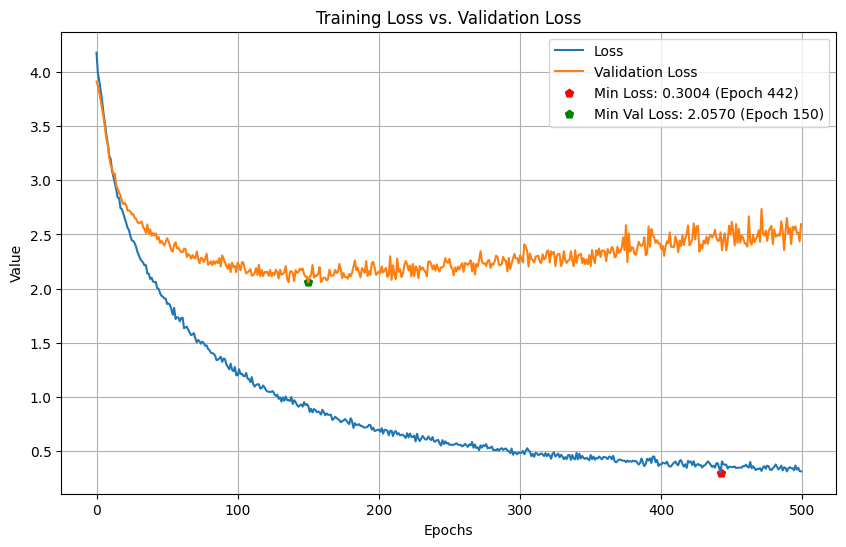

In [120]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

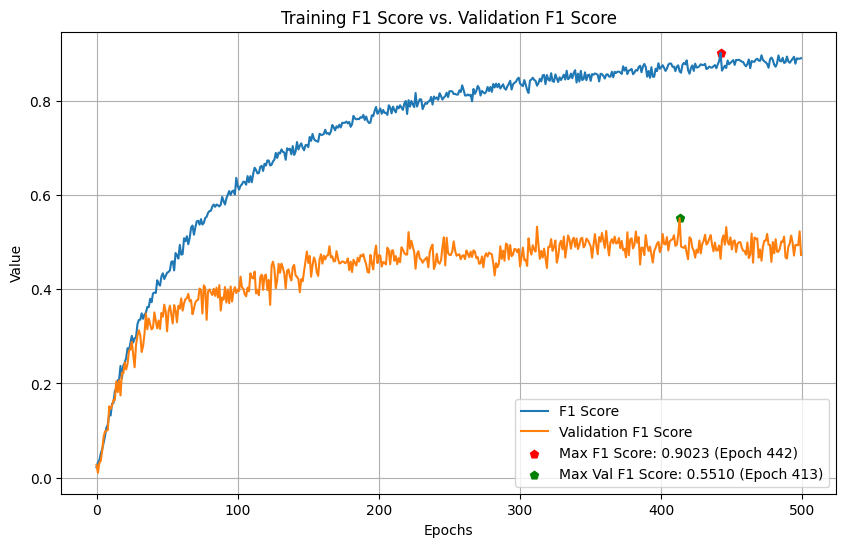

In [121]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [122]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN")

2023-09-11 20:13:55.328682: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 20:13:55.572724: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 539 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [139]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 129, 150)          119850    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 150)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 150)           0         
                                                                 
 flatten_1 (Flatten)         (None, 1800)              0         
                                                                 
 dense_2 (Dense)             (None, 110)               198110    
                                                                 
 dropout_3 (Dropout)         (None, 110)               0         
                                                      

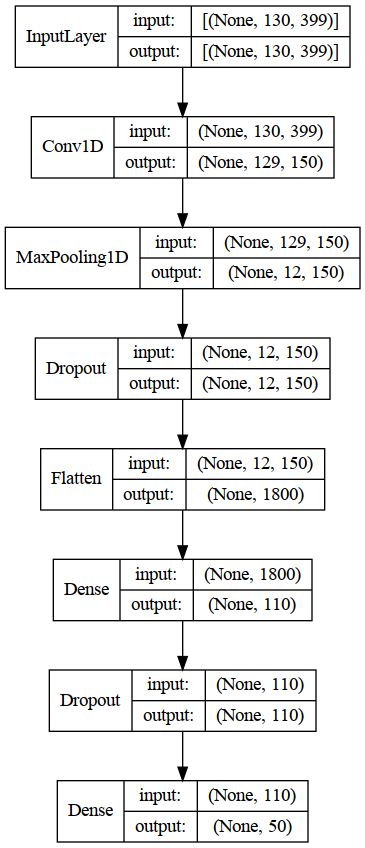

In [140]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

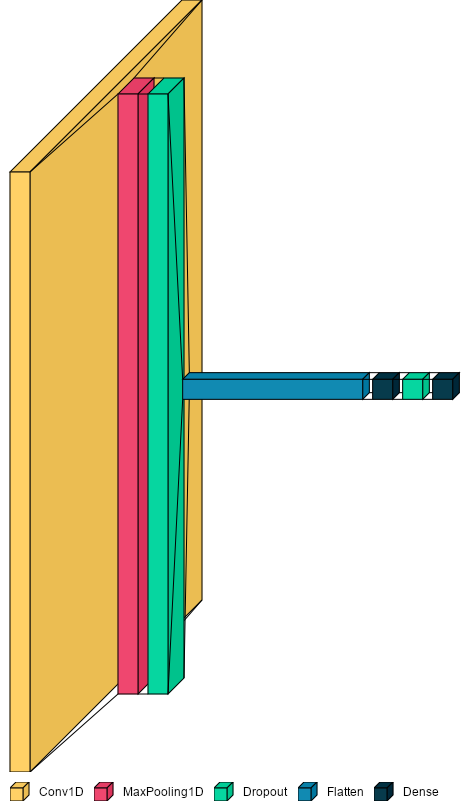

In [123]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [141]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 8ms/step - loss: 2.4444 - f1_score: 0.5510


[2.4443717002868652, 0.5509907603263855]

In [142]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 9ms/step - loss: 0.0151 - f1_score: 1.0000


[0.015102454461157322, 1.0]

In [143]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.500     0.667         8
    BACKPACK      0.545     1.000     0.706         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      0.600     0.600     0.600        10
        BELT      1.000     1.000     1.000         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      1.000     0.333     0.500         6
      CANCER      0.500     1.000     0.667         8
   CHRISTMAS      0.400     0.333     0.364         6
    CONFUSED      1.000     0.667     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.300     0.500     0.375         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.333     0.250     0.286         8
     DEVELOP      0.400     0.333     0.364         6
      DINNER      0.000     0.000     0.000         8
         DOG      0.857     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tuning 2 1D CNN Layers

In [119]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='gelu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[2, 3, 4, 5, 6, 7, 8, 9, 10],
                       default=2,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[2, 3, 4, 5, 6, 7, 8, 9, 10],
                default=2,
            )))
        model.add(
            Conv1D(filters=hp.Int('filters_2',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_2',
                       values=[1, 2, 3, 4, 5],
                       default=2,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_2',
                values=[1, 2, 3, 4, 5],
                default=2,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.75,
                step=0.05,
            )))
        model.add(Flatten())
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=90),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.5,
                step=0.05,
            )))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=0.001201687537647584)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

/tmp/ipykernel_1972693/1773258914.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='2_1D_CNN',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/2_1D_CNN/tuner0.json


In [121]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pool_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
filters_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_2 (Choice)
{'default': 2, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
pool_2 (Choice)
{'default': 2, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.75, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'default': 90, 'conditions': [], 

In [122]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [123]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 08m 57s]
val_f1_score: 0.29330621659755707

Best val_f1_score So Far: 0.6954436302185059
Total elapsed time: 04h 28m 50s
INFO:tensorflow:Oracle triggered exit


In [124]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/2_1D_CNN
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: mish
filters_1: 125
kernel_1: 4
pool_1: 8
filters_2: 50
kernel_2: 4
pool_2: 4
dropout_1: 0.4
units_2: 110
dropout_2: 0.4
learning_rate: 0.0001715739875569636
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0713
Score: 0.6954436302185059

Trial 0723 summary
Hyperparameters:
dense_activation: elu
filters_1: 125
kernel_1: 10
pool_1: 5
filters_2: 200
kernel_2: 4
pool_2: 5
dropout_1: 0.65
units_2: 100
dropout_2: 0.15000000000000002
learning_rate: 0.00014141135967555134
tuner/epochs: 300
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.6725153923034668

Trial 0598 summary
Hyperparameters:
dense_activation: elu
filters_1: 125
kernel_1: 2
pool_1: 7
filters_2: 175
kernel_2: 1
pool_2: 3
dropout_1: 0.1
units_2: 110
dropout_2: 0.7

In [125]:
best_model = tuner.get_best_models(num_models=1)[0]

In [126]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 127, 125)          199625    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 125)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 50)            25050     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 50)            0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 3, 50)             0         
                                                                 
 flatten (Flatten)           (None, 150)               0

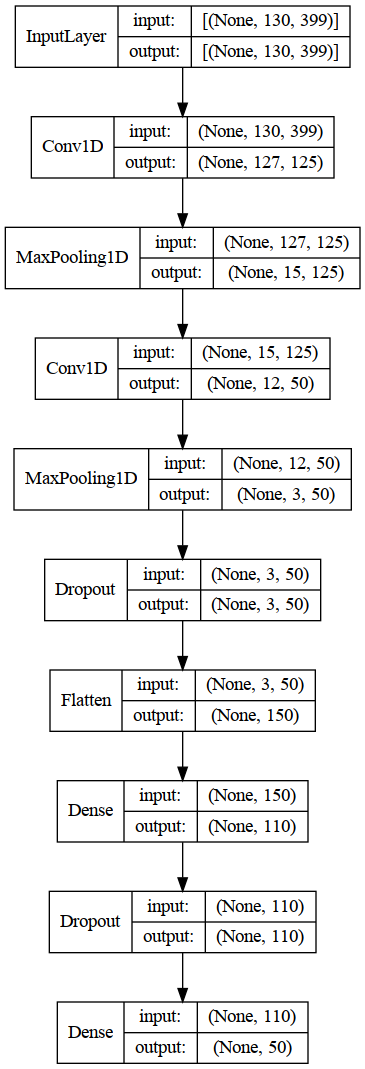

In [127]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [128]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 12ms/step - loss: 1.2194 - f1_score: 0.6954


In [129]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 10ms/step - loss: 0.4310 - f1_score: 0.9274


In [130]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.714     1.000     0.833        10
         BEE      0.778     0.700     0.737        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      0.429     0.500     0.462         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.667     0.333     0.444         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      1.000     0.375     0.545         8
     DEVELOP      0.400     0.667     0.500         6
      DINNER      1.000     1.000     1.000         8
         DOG      0.500     

In [131]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [132]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [133]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9331 - f1_score: 0.0204

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 11s 302ms/step - loss: 3.9326 - f1_score: 0.0210 - val_loss: 3.9142 - val_f1_score: 0.0029
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9137 - f1_score: 0.0206

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 4s 162ms/step - loss: 3.9145 - f1_score: 0.0201 - val_loss: 3.9076 - val_f1_score: 0.0140
Epoch 3/500
28/28 [==============================] - 1s 45ms/step - loss: 3.9045 - f1_score: 0.0201 - val_loss: 3.8981 - val_f1_score: 0.0068
Epoch 4/500
28/28 [==============================] - 1s 46ms/step - loss: 3.8907 - f1_score: 0.0272 - val_loss: 3.8866 - val_f1_score: 0.0088
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 3.8821 - f1_score: 0.0282

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 167ms/step - loss: 3.8805 - f1_score: 0.0289 - val_loss: 3.8671 - val_f1_score: 0.0228
Epoch 6/500
28/28 [==============================] - 1s 46ms/step - loss: 3.8669 - f1_score: 0.0344 - val_loss: 3.8372 - val_f1_score: 0.0100
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 3.8382 - f1_score: 0.0295

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 178ms/step - loss: 3.8364 - f1_score: 0.0306 - val_loss: 3.8101 - val_f1_score: 0.0499
Epoch 8/500
28/28 [==============================] - 1s 46ms/step - loss: 3.8048 - f1_score: 0.0423 - val_loss: 3.7506 - val_f1_score: 0.0305
Epoch 9/500
28/28 [==============================] - 1s 44ms/step - loss: 3.7505 - f1_score: 0.0492 - val_loss: 3.7056 - val_f1_score: 0.0306
Epoch 10/500
28/28 [==============================] - 1s 45ms/step - loss: 3.6909 - f1_score: 0.0538 - val_loss: 3.6396 - val_f1_score: 0.0399
Epoch 11/500
28/28 [==============================] - 1s 46ms/step - loss: 3.6382 - f1_score: 0.0545 - val_loss: 3.5588 - val_f1_score: 0.0350
Epoch 12/500
28/28 [==============================] - 1s 46ms/step - loss: 3.5534 - f1_score: 0.0633 - val_loss: 3.4986 - val_f1_score: 0.0398
Epoch 13/500
28/28 [==============================] - 1s 45ms/step - loss: 3.5160 - f1_score: 0.0719 - val_loss: 3.4332 - val_f1_score: 0.0499
Epoch 14/500


INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 175ms/step - loss: 3.4579 - f1_score: 0.0784 - val_loss: 3.3752 - val_f1_score: 0.0794
Epoch 15/500
28/28 [==============================] - 1s 46ms/step - loss: 3.4014 - f1_score: 0.0829 - val_loss: 3.3223 - val_f1_score: 0.0660
Epoch 16/500
28/28 [==============================] - 1s 46ms/step - loss: 3.3562 - f1_score: 0.0850 - val_loss: 3.2335 - val_f1_score: 0.0669
Epoch 17/500
28/28 [==============================] - 1s 46ms/step - loss: 3.2840 - f1_score: 0.0975 - val_loss: 3.1733 - val_f1_score: 0.0794
Epoch 18/500
27/28 [===========================>..] - ETA: 0s - loss: 3.2428 - f1_score: 0.1068

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 22s 809ms/step - loss: 3.2420 - f1_score: 0.1075 - val_loss: 3.1164 - val_f1_score: 0.0840
Epoch 19/500
27/28 [===========================>..] - ETA: 0s - loss: 3.2376 - f1_score: 0.1050

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 201ms/step - loss: 3.2391 - f1_score: 0.1041 - val_loss: 3.0912 - val_f1_score: 0.0872
Epoch 20/500
27/28 [===========================>..] - ETA: 0s - loss: 3.1503 - f1_score: 0.1133

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 181ms/step - loss: 3.1527 - f1_score: 0.1127 - val_loss: 3.0357 - val_f1_score: 0.1073
Epoch 21/500
27/28 [===========================>..] - ETA: 0s - loss: 3.1103 - f1_score: 0.1202

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 4s 163ms/step - loss: 3.1086 - f1_score: 0.1218 - val_loss: 3.0080 - val_f1_score: 0.1073
Epoch 22/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0712 - f1_score: 0.1203

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 178ms/step - loss: 3.0678 - f1_score: 0.1210 - val_loss: 2.9333 - val_f1_score: 0.1151
Epoch 23/500
28/28 [==============================] - 1s 44ms/step - loss: 3.0357 - f1_score: 0.1422 - val_loss: 2.8918 - val_f1_score: 0.1048
Epoch 24/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9842 - f1_score: 0.1481

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 179ms/step - loss: 2.9802 - f1_score: 0.1505 - val_loss: 2.8409 - val_f1_score: 0.1535
Epoch 25/500
28/28 [==============================] - 1s 45ms/step - loss: 2.9453 - f1_score: 0.1607 - val_loss: 2.8045 - val_f1_score: 0.1502
Epoch 26/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9376 - f1_score: 0.1558

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 182ms/step - loss: 2.9256 - f1_score: 0.1578 - val_loss: 2.7755 - val_f1_score: 0.1624
Epoch 27/500
28/28 [==============================] - 1s 48ms/step - loss: 2.9102 - f1_score: 0.1623 - val_loss: 2.7482 - val_f1_score: 0.1503
Epoch 28/500
28/28 [==============================] - 1s 44ms/step - loss: 2.8655 - f1_score: 0.1687 - val_loss: 2.7177 - val_f1_score: 0.1536
Epoch 29/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8339 - f1_score: 0.1745

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 172ms/step - loss: 2.8292 - f1_score: 0.1755 - val_loss: 2.7105 - val_f1_score: 0.1627
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7982 - f1_score: 0.1799

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 225ms/step - loss: 2.7955 - f1_score: 0.1784 - val_loss: 2.6936 - val_f1_score: 0.2003
Epoch 31/500
28/28 [==============================] - 1s 45ms/step - loss: 2.7842 - f1_score: 0.1933 - val_loss: 2.6642 - val_f1_score: 0.1794
Epoch 32/500
28/28 [==============================] - 1s 45ms/step - loss: 2.7561 - f1_score: 0.1837 - val_loss: 2.6130 - val_f1_score: 0.1636
Epoch 33/500
28/28 [==============================] - 1s 44ms/step - loss: 2.7006 - f1_score: 0.2045 - val_loss: 2.5833 - val_f1_score: 0.1939
Epoch 34/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6921 - f1_score: 0.1993

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 184ms/step - loss: 2.6876 - f1_score: 0.2004 - val_loss: 2.5776 - val_f1_score: 0.2097
Epoch 35/500
28/28 [==============================] - 1s 44ms/step - loss: 2.6577 - f1_score: 0.2131 - val_loss: 2.5411 - val_f1_score: 0.1997
Epoch 36/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6518 - f1_score: 0.2136

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 4s 162ms/step - loss: 2.6463 - f1_score: 0.2162 - val_loss: 2.5100 - val_f1_score: 0.2210
Epoch 37/500
28/28 [==============================] - 1s 44ms/step - loss: 2.6313 - f1_score: 0.2132 - val_loss: 2.5110 - val_f1_score: 0.1997
Epoch 38/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5711 - f1_score: 0.2404

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 200ms/step - loss: 2.5677 - f1_score: 0.2416 - val_loss: 2.4710 - val_f1_score: 0.2409
Epoch 39/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5625 - f1_score: 0.2279

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 4s 164ms/step - loss: 2.5635 - f1_score: 0.2269 - val_loss: 2.4418 - val_f1_score: 0.2481
Epoch 40/500
28/28 [==============================] - 1s 45ms/step - loss: 2.5489 - f1_score: 0.2400 - val_loss: 2.4574 - val_f1_score: 0.2275
Epoch 41/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4993 - f1_score: 0.2551

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 175ms/step - loss: 2.5030 - f1_score: 0.2562 - val_loss: 2.4428 - val_f1_score: 0.2564
Epoch 42/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5246 - f1_score: 0.2495

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 171ms/step - loss: 2.5228 - f1_score: 0.2500 - val_loss: 2.4188 - val_f1_score: 0.2593
Epoch 43/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4860 - f1_score: 0.2485

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 165ms/step - loss: 2.4933 - f1_score: 0.2490 - val_loss: 2.3660 - val_f1_score: 0.2797
Epoch 44/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4674 - f1_score: 0.2626

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 167ms/step - loss: 2.4713 - f1_score: 0.2618 - val_loss: 2.3660 - val_f1_score: 0.2811
Epoch 45/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4265 - f1_score: 0.2657

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 4s 161ms/step - loss: 2.4268 - f1_score: 0.2665 - val_loss: 2.3388 - val_f1_score: 0.3185
Epoch 46/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4138 - f1_score: 0.2781

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 165ms/step - loss: 2.4152 - f1_score: 0.2784 - val_loss: 2.3243 - val_f1_score: 0.3332
Epoch 47/500
28/28 [==============================] - 1s 47ms/step - loss: 2.3978 - f1_score: 0.2775 - val_loss: 2.2867 - val_f1_score: 0.3300
Epoch 48/500
28/28 [==============================] - 1s 45ms/step - loss: 2.3663 - f1_score: 0.2808 - val_loss: 2.2935 - val_f1_score: 0.3047
Epoch 49/500
28/28 [==============================] - 1s 45ms/step - loss: 2.3485 - f1_score: 0.2881 - val_loss: 2.2704 - val_f1_score: 0.3171
Epoch 50/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3455 - f1_score: 0.2894

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 167ms/step - loss: 2.3418 - f1_score: 0.2906 - val_loss: 2.2340 - val_f1_score: 0.3434
Epoch 51/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3286 - f1_score: 0.2943

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 178ms/step - loss: 2.3309 - f1_score: 0.2969 - val_loss: 2.2265 - val_f1_score: 0.3752
Epoch 52/500
28/28 [==============================] - 1s 46ms/step - loss: 2.3012 - f1_score: 0.2940 - val_loss: 2.2232 - val_f1_score: 0.3510
Epoch 53/500
28/28 [==============================] - 1s 46ms/step - loss: 2.2773 - f1_score: 0.3177 - val_loss: 2.2581 - val_f1_score: 0.3476
Epoch 54/500
28/28 [==============================] - 1s 45ms/step - loss: 2.3175 - f1_score: 0.2964 - val_loss: 2.2201 - val_f1_score: 0.3573
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 2.2451 - f1_score: 0.3233

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 206ms/step - loss: 2.2451 - f1_score: 0.3233 - val_loss: 2.1746 - val_f1_score: 0.3775
Epoch 56/500
28/28 [==============================] - 1s 47ms/step - loss: 2.2432 - f1_score: 0.3221 - val_loss: 2.1679 - val_f1_score: 0.3559
Epoch 57/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2324 - f1_score: 0.3184

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 177ms/step - loss: 2.2329 - f1_score: 0.3186 - val_loss: 2.1710 - val_f1_score: 0.3870
Epoch 58/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2185 - f1_score: 0.3096

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 167ms/step - loss: 2.2267 - f1_score: 0.3089 - val_loss: 2.1299 - val_f1_score: 0.4010
Epoch 59/500
28/28 [==============================] - 1s 45ms/step - loss: 2.1543 - f1_score: 0.3399 - val_loss: 2.1383 - val_f1_score: 0.3874
Epoch 60/500
28/28 [==============================] - 1s 48ms/step - loss: 2.1458 - f1_score: 0.3457 - val_loss: 2.1133 - val_f1_score: 0.3943
Epoch 61/500
28/28 [==============================] - 1s 45ms/step - loss: 2.1481 - f1_score: 0.3448 - val_loss: 2.0948 - val_f1_score: 0.3974
Epoch 62/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1517 - f1_score: 0.3292

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 165ms/step - loss: 2.1478 - f1_score: 0.3296 - val_loss: 2.1018 - val_f1_score: 0.4156
Epoch 63/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1083 - f1_score: 0.3564

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 171ms/step - loss: 2.1071 - f1_score: 0.3559 - val_loss: 2.0692 - val_f1_score: 0.4182
Epoch 64/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0851 - f1_score: 0.3560

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 176ms/step - loss: 2.0933 - f1_score: 0.3569 - val_loss: 2.0766 - val_f1_score: 0.4236
Epoch 65/500
28/28 [==============================] - 1s 48ms/step - loss: 2.1016 - f1_score: 0.3470 - val_loss: 2.0245 - val_f1_score: 0.4095
Epoch 66/500
28/28 [==============================] - 1s 46ms/step - loss: 2.0614 - f1_score: 0.3653 - val_loss: 2.0776 - val_f1_score: 0.4094
Epoch 67/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0454 - f1_score: 0.3626

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 179ms/step - loss: 2.0415 - f1_score: 0.3622 - val_loss: 2.0006 - val_f1_score: 0.4444
Epoch 68/500
28/28 [==============================] - 1s 45ms/step - loss: 2.0140 - f1_score: 0.3777 - val_loss: 2.0312 - val_f1_score: 0.4268
Epoch 69/500
28/28 [==============================] - 1s 44ms/step - loss: 2.0357 - f1_score: 0.3658 - val_loss: 2.0374 - val_f1_score: 0.4273
Epoch 70/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0103 - f1_score: 0.3896

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 172ms/step - loss: 2.0120 - f1_score: 0.3884 - val_loss: 1.9676 - val_f1_score: 0.4524
Epoch 71/500
28/28 [==============================] - 1s 44ms/step - loss: 1.9998 - f1_score: 0.3867 - val_loss: 1.9898 - val_f1_score: 0.3993
Epoch 72/500
28/28 [==============================] - 1s 45ms/step - loss: 1.9523 - f1_score: 0.3983 - val_loss: 1.9571 - val_f1_score: 0.4477
Epoch 73/500
28/28 [==============================] - 1s 44ms/step - loss: 1.9377 - f1_score: 0.3898 - val_loss: 1.9618 - val_f1_score: 0.4420
Epoch 74/500
28/28 [==============================] - 1s 45ms/step - loss: 1.9292 - f1_score: 0.4043 - val_loss: 1.9510 - val_f1_score: 0.4218
Epoch 75/500
28/28 [==============================] - 1s 44ms/step - loss: 1.9247 - f1_score: 0.3918 - val_loss: 1.9290 - val_f1_score: 0.4486
Epoch 76/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9093 - f1_score: 0.4077

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 193ms/step - loss: 1.9138 - f1_score: 0.4040 - val_loss: 1.9013 - val_f1_score: 0.4773
Epoch 77/500
28/28 [==============================] - 1s 45ms/step - loss: 1.8799 - f1_score: 0.4279 - val_loss: 1.8983 - val_f1_score: 0.4671
Epoch 78/500
28/28 [==============================] - 1s 44ms/step - loss: 1.8841 - f1_score: 0.3993 - val_loss: 1.8850 - val_f1_score: 0.4740
Epoch 79/500
28/28 [==============================] - 1s 47ms/step - loss: 1.8602 - f1_score: 0.4283 - val_loss: 1.8584 - val_f1_score: 0.4772
Epoch 80/500
28/28 [==============================] - 1s 47ms/step - loss: 1.8407 - f1_score: 0.4297 - val_loss: 1.8714 - val_f1_score: 0.4660
Epoch 81/500
28/28 [==============================] - 1s 45ms/step - loss: 1.8690 - f1_score: 0.4234 - val_loss: 1.8752 - val_f1_score: 0.4577
Epoch 82/500
28/28 [==============================] - 1s 44ms/step - loss: 1.8195 - f1_score: 0.4346 - val_loss: 1.8673 - val_f1_score: 0.4759
Epoch 83/50

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 175ms/step - loss: 1.8029 - f1_score: 0.4317 - val_loss: 1.8490 - val_f1_score: 0.4940
Epoch 84/500
28/28 [==============================] - 1s 45ms/step - loss: 1.7869 - f1_score: 0.4441 - val_loss: 1.8839 - val_f1_score: 0.4759
Epoch 85/500
27/28 [===========================>..] - ETA: 0s - loss: 1.7770 - f1_score: 0.4469

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 191ms/step - loss: 1.7746 - f1_score: 0.4485 - val_loss: 1.8123 - val_f1_score: 0.5073
Epoch 86/500
28/28 [==============================] - 1s 44ms/step - loss: 1.7544 - f1_score: 0.4656 - val_loss: 1.8509 - val_f1_score: 0.4947
Epoch 87/500
28/28 [==============================] - 1s 45ms/step - loss: 1.7780 - f1_score: 0.4519 - val_loss: 1.7947 - val_f1_score: 0.5049
Epoch 88/500
28/28 [==============================] - 1s 47ms/step - loss: 1.7474 - f1_score: 0.4492 - val_loss: 1.8078 - val_f1_score: 0.4747
Epoch 89/500
28/28 [==============================] - ETA: 0s - loss: 1.6945 - f1_score: 0.4748

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 173ms/step - loss: 1.6945 - f1_score: 0.4748 - val_loss: 1.7961 - val_f1_score: 0.5170
Epoch 90/500
28/28 [==============================] - 1s 47ms/step - loss: 1.7009 - f1_score: 0.4676 - val_loss: 1.7651 - val_f1_score: 0.5010
Epoch 91/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6778 - f1_score: 0.4831

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 199ms/step - loss: 1.6855 - f1_score: 0.4813 - val_loss: 1.7460 - val_f1_score: 0.5320
Epoch 92/500
28/28 [==============================] - 1s 47ms/step - loss: 1.6774 - f1_score: 0.4729 - val_loss: 1.7449 - val_f1_score: 0.5108
Epoch 93/500
28/28 [==============================] - 1s 45ms/step - loss: 1.6522 - f1_score: 0.4681 - val_loss: 1.7912 - val_f1_score: 0.5249
Epoch 94/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6821 - f1_score: 0.4770

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 170ms/step - loss: 1.6731 - f1_score: 0.4808 - val_loss: 1.7403 - val_f1_score: 0.5348
Epoch 95/500
28/28 [==============================] - 1s 45ms/step - loss: 1.6885 - f1_score: 0.4757 - val_loss: 1.7661 - val_f1_score: 0.5141
Epoch 96/500
28/28 [==============================] - 1s 45ms/step - loss: 1.6434 - f1_score: 0.4954 - val_loss: 1.7003 - val_f1_score: 0.5235
Epoch 97/500
28/28 [==============================] - 1s 46ms/step - loss: 1.6380 - f1_score: 0.4801 - val_loss: 1.7193 - val_f1_score: 0.5226
Epoch 98/500
28/28 [==============================] - 1s 46ms/step - loss: 1.6299 - f1_score: 0.4919 - val_loss: 1.7177 - val_f1_score: 0.5158
Epoch 99/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6071 - f1_score: 0.4850

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 166ms/step - loss: 1.6044 - f1_score: 0.4845 - val_loss: 1.6872 - val_f1_score: 0.5394
Epoch 100/500
28/28 [==============================] - 1s 45ms/step - loss: 1.5824 - f1_score: 0.4984 - val_loss: 1.7067 - val_f1_score: 0.5153
Epoch 101/500
28/28 [==============================] - 1s 44ms/step - loss: 1.5957 - f1_score: 0.4992 - val_loss: 1.6804 - val_f1_score: 0.5304
Epoch 102/500
28/28 [==============================] - 1s 45ms/step - loss: 1.5602 - f1_score: 0.5176 - val_loss: 1.7618 - val_f1_score: 0.5124
Epoch 103/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5654 - f1_score: 0.5127

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 193ms/step - loss: 1.5688 - f1_score: 0.5126 - val_loss: 1.6514 - val_f1_score: 0.5556
Epoch 104/500
28/28 [==============================] - 1s 48ms/step - loss: 1.5671 - f1_score: 0.5097 - val_loss: 1.6395 - val_f1_score: 0.5496
Epoch 105/500
28/28 [==============================] - 1s 46ms/step - loss: 1.5270 - f1_score: 0.5255 - val_loss: 1.6458 - val_f1_score: 0.5499
Epoch 106/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5368 - f1_score: 0.5226

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 199ms/step - loss: 1.5377 - f1_score: 0.5219 - val_loss: 1.6189 - val_f1_score: 0.5571
Epoch 107/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5103 - f1_score: 0.5200

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 186ms/step - loss: 1.5201 - f1_score: 0.5166 - val_loss: 1.6079 - val_f1_score: 0.5602
Epoch 108/500
28/28 [==============================] - 1s 45ms/step - loss: 1.5088 - f1_score: 0.5228 - val_loss: 1.6115 - val_f1_score: 0.5385
Epoch 109/500
28/28 [==============================] - 1s 45ms/step - loss: 1.5319 - f1_score: 0.5202 - val_loss: 1.6316 - val_f1_score: 0.5566
Epoch 110/500
28/28 [==============================] - 1s 45ms/step - loss: 1.4945 - f1_score: 0.5358 - val_loss: 1.6357 - val_f1_score: 0.5497
Epoch 111/500
28/28 [==============================] - 1s 46ms/step - loss: 1.4693 - f1_score: 0.5468 - val_loss: 1.6023 - val_f1_score: 0.5447
Epoch 112/500
27/28 [===========================>..] - ETA: 0s - loss: 1.4563 - f1_score: 0.5463

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 172ms/step - loss: 1.4571 - f1_score: 0.5466 - val_loss: 1.6056 - val_f1_score: 0.5651
Epoch 113/500
28/28 [==============================] - 1s 45ms/step - loss: 1.4808 - f1_score: 0.5370 - val_loss: 1.6319 - val_f1_score: 0.5399
Epoch 114/500
28/28 [==============================] - 1s 46ms/step - loss: 1.4551 - f1_score: 0.5493 - val_loss: 1.5859 - val_f1_score: 0.5601
Epoch 115/500
28/28 [==============================] - 1s 45ms/step - loss: 1.4381 - f1_score: 0.5529 - val_loss: 1.5793 - val_f1_score: 0.5483
Epoch 116/500
27/28 [===========================>..] - ETA: 0s - loss: 1.4447 - f1_score: 0.5422

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 184ms/step - loss: 1.4384 - f1_score: 0.5450 - val_loss: 1.5524 - val_f1_score: 0.5740
Epoch 117/500
28/28 [==============================] - 1s 44ms/step - loss: 1.4455 - f1_score: 0.5515 - val_loss: 1.5805 - val_f1_score: 0.5674
Epoch 118/500
28/28 [==============================] - 1s 45ms/step - loss: 1.4208 - f1_score: 0.5307 - val_loss: 1.5733 - val_f1_score: 0.5466
Epoch 119/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3956 - f1_score: 0.5619 - val_loss: 1.5687 - val_f1_score: 0.5637
Epoch 120/500
28/28 [==============================] - 1s 46ms/step - loss: 1.4132 - f1_score: 0.5545 - val_loss: 1.5433 - val_f1_score: 0.5523
Epoch 121/500
28/28 [==============================] - 1s 46ms/step - loss: 1.3788 - f1_score: 0.5649 - val_loss: 1.6024 - val_f1_score: 0.5629
Epoch 122/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3741 - f1_score: 0.5724

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 169ms/step - loss: 1.3802 - f1_score: 0.5704 - val_loss: 1.5101 - val_f1_score: 0.5790
Epoch 123/500
28/28 [==============================] - 1s 44ms/step - loss: 1.3687 - f1_score: 0.5571 - val_loss: 1.6195 - val_f1_score: 0.5559
Epoch 124/500
28/28 [==============================] - 1s 44ms/step - loss: 1.3880 - f1_score: 0.5633 - val_loss: 1.5206 - val_f1_score: 0.5561
Epoch 125/500
28/28 [==============================] - 1s 45ms/step - loss: 1.3739 - f1_score: 0.5779 - val_loss: 1.5029 - val_f1_score: 0.5693
Epoch 126/500
28/28 [==============================] - 1s 46ms/step - loss: 1.3270 - f1_score: 0.5822 - val_loss: 1.5013 - val_f1_score: 0.5673
Epoch 127/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3521 - f1_score: 0.5741

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 178ms/step - loss: 1.3536 - f1_score: 0.5733 - val_loss: 1.5193 - val_f1_score: 0.5810
Epoch 128/500
28/28 [==============================] - 1s 45ms/step - loss: 1.3253 - f1_score: 0.5890 - val_loss: 1.5897 - val_f1_score: 0.5528
Epoch 129/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3359 - f1_score: 0.5778

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 254ms/step - loss: 1.3325 - f1_score: 0.5793 - val_loss: 1.4923 - val_f1_score: 0.5817
Epoch 130/500
28/28 [==============================] - 1s 45ms/step - loss: 1.2997 - f1_score: 0.5880 - val_loss: 1.4927 - val_f1_score: 0.5773
Epoch 131/500
28/28 [==============================] - 1s 49ms/step - loss: 1.3109 - f1_score: 0.5960 - val_loss: 1.4689 - val_f1_score: 0.5698
Epoch 132/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2932 - f1_score: 0.5911

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 194ms/step - loss: 1.2932 - f1_score: 0.5916 - val_loss: 1.4896 - val_f1_score: 0.5904
Epoch 133/500
28/28 [==============================] - 1s 45ms/step - loss: 1.2908 - f1_score: 0.5936 - val_loss: 1.5333 - val_f1_score: 0.5696
Epoch 134/500
28/28 [==============================] - 1s 48ms/step - loss: 1.2775 - f1_score: 0.6000 - val_loss: 1.4443 - val_f1_score: 0.5868
Epoch 135/500
28/28 [==============================] - 1s 50ms/step - loss: 1.2564 - f1_score: 0.6032 - val_loss: 1.4599 - val_f1_score: 0.5811
Epoch 136/500
28/28 [==============================] - 1s 51ms/step - loss: 1.2564 - f1_score: 0.6018 - val_loss: 1.4395 - val_f1_score: 0.5899
Epoch 137/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2410 - f1_score: 0.5922

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 194ms/step - loss: 1.2491 - f1_score: 0.5898 - val_loss: 1.4329 - val_f1_score: 0.5936
Epoch 138/500
28/28 [==============================] - 1s 46ms/step - loss: 1.2778 - f1_score: 0.5983 - val_loss: 1.4760 - val_f1_score: 0.5743
Epoch 139/500
28/28 [==============================] - ETA: 0s - loss: 1.2286 - f1_score: 0.6250

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 177ms/step - loss: 1.2286 - f1_score: 0.6250 - val_loss: 1.4539 - val_f1_score: 0.5974
Epoch 140/500
28/28 [==============================] - 1s 46ms/step - loss: 1.2531 - f1_score: 0.6020 - val_loss: 1.4904 - val_f1_score: 0.5753
Epoch 141/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2279 - f1_score: 0.6092

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 209ms/step - loss: 1.2262 - f1_score: 0.6092 - val_loss: 1.4459 - val_f1_score: 0.5996
Epoch 142/500
28/28 [==============================] - 1s 48ms/step - loss: 1.2270 - f1_score: 0.6099 - val_loss: 1.4123 - val_f1_score: 0.5984
Epoch 143/500
28/28 [==============================] - 1s 52ms/step - loss: 1.2187 - f1_score: 0.6202 - val_loss: 1.4501 - val_f1_score: 0.5889
Epoch 144/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2345 - f1_score: 0.6117

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 171ms/step - loss: 1.2340 - f1_score: 0.6109 - val_loss: 1.4055 - val_f1_score: 0.6071
Epoch 145/500
28/28 [==============================] - 1s 49ms/step - loss: 1.1912 - f1_score: 0.6291 - val_loss: 1.4115 - val_f1_score: 0.5959
Epoch 146/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1923 - f1_score: 0.6233

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 176ms/step - loss: 1.1883 - f1_score: 0.6245 - val_loss: 1.4372 - val_f1_score: 0.6131
Epoch 147/500
28/28 [==============================] - 1s 50ms/step - loss: 1.1831 - f1_score: 0.6172 - val_loss: 1.4101 - val_f1_score: 0.6078
Epoch 148/500
28/28 [==============================] - 1s 54ms/step - loss: 1.2008 - f1_score: 0.6168 - val_loss: 1.3983 - val_f1_score: 0.5890
Epoch 149/500
28/28 [==============================] - 1s 52ms/step - loss: 1.2116 - f1_score: 0.6182 - val_loss: 1.4180 - val_f1_score: 0.5883
Epoch 150/500
28/28 [==============================] - ETA: 0s - loss: 1.1710 - f1_score: 0.6282

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 244ms/step - loss: 1.1710 - f1_score: 0.6282 - val_loss: 1.3633 - val_f1_score: 0.6198
Epoch 151/500
28/28 [==============================] - 1s 48ms/step - loss: 1.1659 - f1_score: 0.6308 - val_loss: 1.3968 - val_f1_score: 0.5813
Epoch 152/500
28/28 [==============================] - ETA: 0s - loss: 1.1707 - f1_score: 0.6334

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 179ms/step - loss: 1.1707 - f1_score: 0.6334 - val_loss: 1.3775 - val_f1_score: 0.6221
Epoch 153/500
28/28 [==============================] - 2s 54ms/step - loss: 1.1290 - f1_score: 0.6448 - val_loss: 1.4049 - val_f1_score: 0.6092
Epoch 154/500
28/28 [==============================] - 1s 51ms/step - loss: 1.1244 - f1_score: 0.6410 - val_loss: 1.3749 - val_f1_score: 0.6187
Epoch 155/500
28/28 [==============================] - 1s 47ms/step - loss: 1.1307 - f1_score: 0.6540 - val_loss: 1.3661 - val_f1_score: 0.5976
Epoch 156/500
28/28 [==============================] - 1s 45ms/step - loss: 1.1322 - f1_score: 0.6433 - val_loss: 1.3650 - val_f1_score: 0.5956
Epoch 157/500
28/28 [==============================] - 1s 49ms/step - loss: 1.0958 - f1_score: 0.6542 - val_loss: 1.3584 - val_f1_score: 0.5977
Epoch 158/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1328 - f1_score: 0.6360

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 182ms/step - loss: 1.1289 - f1_score: 0.6369 - val_loss: 1.3620 - val_f1_score: 0.6227
Epoch 159/500
28/28 [==============================] - 1s 45ms/step - loss: 1.0915 - f1_score: 0.6588 - val_loss: 1.3734 - val_f1_score: 0.5865
Epoch 160/500
28/28 [==============================] - 1s 47ms/step - loss: 1.0870 - f1_score: 0.6632 - val_loss: 1.3615 - val_f1_score: 0.6183
Epoch 161/500
28/28 [==============================] - 1s 49ms/step - loss: 1.0984 - f1_score: 0.6542 - val_loss: 1.3337 - val_f1_score: 0.6009
Epoch 162/500
28/28 [==============================] - 1s 52ms/step - loss: 1.0977 - f1_score: 0.6571 - val_loss: 1.3436 - val_f1_score: 0.5964
Epoch 163/500
28/28 [==============================] - ETA: 0s - loss: 1.0946 - f1_score: 0.6554

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 182ms/step - loss: 1.0946 - f1_score: 0.6554 - val_loss: 1.3068 - val_f1_score: 0.6246
Epoch 164/500
28/28 [==============================] - 1s 46ms/step - loss: 1.0703 - f1_score: 0.6628 - val_loss: 1.3558 - val_f1_score: 0.5911
Epoch 165/500
28/28 [==============================] - 1s 46ms/step - loss: 1.0684 - f1_score: 0.6629 - val_loss: 1.3398 - val_f1_score: 0.6145
Epoch 166/500
28/28 [==============================] - 1s 46ms/step - loss: 1.0642 - f1_score: 0.6615 - val_loss: 1.3090 - val_f1_score: 0.5990
Epoch 167/500
28/28 [==============================] - 1s 47ms/step - loss: 1.0754 - f1_score: 0.6681 - val_loss: 1.3148 - val_f1_score: 0.6046
Epoch 168/500
28/28 [==============================] - 1s 46ms/step - loss: 1.0440 - f1_score: 0.6677 - val_loss: 1.3476 - val_f1_score: 0.5860
Epoch 169/500
28/28 [==============================] - 1s 45ms/step - loss: 1.0475 - f1_score: 0.6636 - val_loss: 1.3652 - val_f1_score: 0.5940
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 177ms/step - loss: 1.0391 - f1_score: 0.6649 - val_loss: 1.3021 - val_f1_score: 0.6537
Epoch 172/500
28/28 [==============================] - 1s 45ms/step - loss: 1.0113 - f1_score: 0.6773 - val_loss: 1.3306 - val_f1_score: 0.5969
Epoch 173/500
28/28 [==============================] - 1s 46ms/step - loss: 1.0297 - f1_score: 0.6756 - val_loss: 1.3444 - val_f1_score: 0.6240
Epoch 174/500
28/28 [==============================] - 1s 48ms/step - loss: 1.0167 - f1_score: 0.6743 - val_loss: 1.3316 - val_f1_score: 0.6217
Epoch 175/500
28/28 [==============================] - 1s 48ms/step - loss: 1.0045 - f1_score: 0.6917 - val_loss: 1.3236 - val_f1_score: 0.6047
Epoch 176/500
28/28 [==============================] - 1s 47ms/step - loss: 1.0071 - f1_score: 0.6813 - val_loss: 1.2910 - val_f1_score: 0.6291
Epoch 177/500
28/28 [==============================] - 1s 48ms/step - loss: 0.9945 - f1_score: 0.6831 - val_loss: 1.3011 - val_f1_score: 0.6351
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 184ms/step - loss: 0.8764 - f1_score: 0.7272 - val_loss: 1.2282 - val_f1_score: 0.6622
Epoch 204/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8659 - f1_score: 0.7200 - val_loss: 1.2380 - val_f1_score: 0.6177
Epoch 205/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8731 - f1_score: 0.7234 - val_loss: 1.2122 - val_f1_score: 0.6274
Epoch 206/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8704 - f1_score: 0.7221 - val_loss: 1.2979 - val_f1_score: 0.6167
Epoch 207/500
28/28 [==============================] - 2s 56ms/step - loss: 0.8588 - f1_score: 0.7286 - val_loss: 1.1954 - val_f1_score: 0.6334
Epoch 208/500
28/28 [==============================] - 1s 51ms/step - loss: 0.8285 - f1_score: 0.7390 - val_loss: 1.2097 - val_f1_score: 0.6344
Epoch 209/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8415 - f1_score: 0.7353 - val_loss: 1.2093 - val_f1_score: 0.6353
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 188ms/step - loss: 0.8218 - f1_score: 0.7455 - val_loss: 1.1902 - val_f1_score: 0.6759
Epoch 213/500
28/28 [==============================] - 1s 49ms/step - loss: 0.8362 - f1_score: 0.7254 - val_loss: 1.2831 - val_f1_score: 0.6595
Epoch 214/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8254 - f1_score: 0.7406 - val_loss: 1.2202 - val_f1_score: 0.6391
Epoch 215/500
28/28 [==============================] - 2s 60ms/step - loss: 0.8417 - f1_score: 0.7347 - val_loss: 1.2009 - val_f1_score: 0.6314
Epoch 216/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8422 - f1_score: 0.7344 - val_loss: 1.2100 - val_f1_score: 0.6498
Epoch 217/500
28/28 [==============================] - 1s 44ms/step - loss: 0.8044 - f1_score: 0.7500 - val_loss: 1.1989 - val_f1_score: 0.6375
Epoch 218/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8150 - f1_score: 0.7476 - val_loss: 1.2014 - val_f1_score: 0.6323
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 216ms/step - loss: 0.7157 - f1_score: 0.7661 - val_loss: 1.1520 - val_f1_score: 0.6794
Epoch 246/500
28/28 [==============================] - 1s 47ms/step - loss: 0.7055 - f1_score: 0.7729 - val_loss: 1.1417 - val_f1_score: 0.6613
Epoch 247/500
28/28 [==============================] - 1s 47ms/step - loss: 0.7314 - f1_score: 0.7698 - val_loss: 1.2074 - val_f1_score: 0.6655
Epoch 248/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6854 - f1_score: 0.7884 - val_loss: 1.1678 - val_f1_score: 0.6480
Epoch 249/500
28/28 [==============================] - 2s 56ms/step - loss: 0.6967 - f1_score: 0.7854 - val_loss: 1.2115 - val_f1_score: 0.6419
Epoch 250/500
28/28 [==============================] - 1s 51ms/step - loss: 0.6755 - f1_score: 0.7895 - val_loss: 1.1609 - val_f1_score: 0.6613
Epoch 251/500
28/28 [==============================] - ETA: 0s - loss: 0.6863 - f1_score: 0.7868

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 221ms/step - loss: 0.6863 - f1_score: 0.7868 - val_loss: 1.1432 - val_f1_score: 0.6795
Epoch 252/500
28/28 [==============================] - 1s 45ms/step - loss: 0.6904 - f1_score: 0.7836 - val_loss: 1.2283 - val_f1_score: 0.6611
Epoch 253/500
28/28 [==============================] - 1s 45ms/step - loss: 0.7407 - f1_score: 0.7624 - val_loss: 1.1583 - val_f1_score: 0.6455
Epoch 254/500
28/28 [==============================] - 1s 45ms/step - loss: 0.6517 - f1_score: 0.8031 - val_loss: 1.1969 - val_f1_score: 0.6531
Epoch 255/500
28/28 [==============================] - 1s 46ms/step - loss: 0.6830 - f1_score: 0.7812 - val_loss: 1.1583 - val_f1_score: 0.6640
Epoch 256/500
28/28 [==============================] - 1s 47ms/step - loss: 0.6685 - f1_score: 0.7949 - val_loss: 1.1609 - val_f1_score: 0.6432
Epoch 257/500
28/28 [==============================] - 1s 47ms/step - loss: 0.6470 - f1_score: 0.7892 - val_loss: 1.1848 - val_f1_score: 0.6657
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 221ms/step - loss: 0.6618 - f1_score: 0.7930 - val_loss: 1.1688 - val_f1_score: 0.6810
Epoch 267/500
28/28 [==============================] - 2s 58ms/step - loss: 0.6330 - f1_score: 0.8116 - val_loss: 1.1837 - val_f1_score: 0.6563
Epoch 268/500
28/28 [==============================] - 2s 54ms/step - loss: 0.6127 - f1_score: 0.8093 - val_loss: 1.2212 - val_f1_score: 0.6554
Epoch 269/500
28/28 [==============================] - 2s 56ms/step - loss: 0.6339 - f1_score: 0.8030 - val_loss: 1.1565 - val_f1_score: 0.6662
Epoch 270/500
28/28 [==============================] - 2s 58ms/step - loss: 0.6172 - f1_score: 0.8071 - val_loss: 1.2112 - val_f1_score: 0.6488
Epoch 271/500
28/28 [==============================] - 1s 51ms/step - loss: 0.6250 - f1_score: 0.8034 - val_loss: 1.2029 - val_f1_score: 0.6639
Epoch 272/500
28/28 [==============================] - 1s 53ms/step - loss: 0.6266 - f1_score: 0.7982 - val_loss: 1.1879 - val_f1_score: 0.6669
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 255ms/step - loss: 0.6027 - f1_score: 0.8093 - val_loss: 1.1813 - val_f1_score: 0.6813
Epoch 285/500
28/28 [==============================] - 1s 49ms/step - loss: 0.6158 - f1_score: 0.7944 - val_loss: 1.1559 - val_f1_score: 0.6744
Epoch 286/500
28/28 [==============================] - 1s 48ms/step - loss: 0.5862 - f1_score: 0.8141 - val_loss: 1.1613 - val_f1_score: 0.6702
Epoch 287/500
28/28 [==============================] - 1s 49ms/step - loss: 0.5677 - f1_score: 0.8248 - val_loss: 1.1851 - val_f1_score: 0.6526
Epoch 288/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5892 - f1_score: 0.8053

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 184ms/step - loss: 0.5855 - f1_score: 0.8069 - val_loss: 1.1408 - val_f1_score: 0.6932
Epoch 289/500
28/28 [==============================] - 1s 48ms/step - loss: 0.5912 - f1_score: 0.8043 - val_loss: 1.2212 - val_f1_score: 0.6614
Epoch 290/500
28/28 [==============================] - 1s 47ms/step - loss: 0.5715 - f1_score: 0.8198 - val_loss: 1.1560 - val_f1_score: 0.6916
Epoch 291/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5730 - f1_score: 0.8231

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 226ms/step - loss: 0.5711 - f1_score: 0.8249 - val_loss: 1.1286 - val_f1_score: 0.6939
Epoch 292/500
28/28 [==============================] - 1s 47ms/step - loss: 0.5635 - f1_score: 0.8258 - val_loss: 1.1542 - val_f1_score: 0.6693
Epoch 293/500
28/28 [==============================] - 1s 45ms/step - loss: 0.5575 - f1_score: 0.8215 - val_loss: 1.1824 - val_f1_score: 0.6721
Epoch 294/500
28/28 [==============================] - 1s 46ms/step - loss: 0.5632 - f1_score: 0.8244 - val_loss: 1.1604 - val_f1_score: 0.6746
Epoch 295/500
28/28 [==============================] - 1s 47ms/step - loss: 0.5750 - f1_score: 0.8136 - val_loss: 1.1466 - val_f1_score: 0.6831
Epoch 296/500
28/28 [==============================] - 1s 46ms/step - loss: 0.5471 - f1_score: 0.8274 - val_loss: 1.1254 - val_f1_score: 0.6744
Epoch 297/500
28/28 [==============================] - 1s 45ms/step - loss: 0.5717 - f1_score: 0.8121 - val_loss: 1.1575 - val_f1_score: 0.6784
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 194ms/step - loss: 0.5477 - f1_score: 0.8253 - val_loss: 1.1251 - val_f1_score: 0.7010
Epoch 301/500
28/28 [==============================] - 1s 49ms/step - loss: 0.5699 - f1_score: 0.8123 - val_loss: 1.1630 - val_f1_score: 0.6747
Epoch 302/500
28/28 [==============================] - 1s 49ms/step - loss: 0.5576 - f1_score: 0.8226 - val_loss: 1.1351 - val_f1_score: 0.6810
Epoch 303/500
28/28 [==============================] - 1s 46ms/step - loss: 0.5506 - f1_score: 0.8282 - val_loss: 1.1294 - val_f1_score: 0.6865
Epoch 304/500
28/28 [==============================] - ETA: 0s - loss: 0.5544 - f1_score: 0.8278

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 193ms/step - loss: 0.5544 - f1_score: 0.8278 - val_loss: 1.1353 - val_f1_score: 0.7011
Epoch 305/500
28/28 [==============================] - 1s 45ms/step - loss: 0.5488 - f1_score: 0.8244 - val_loss: 1.1754 - val_f1_score: 0.6836
Epoch 306/500
28/28 [==============================] - 1s 51ms/step - loss: 0.5544 - f1_score: 0.8241 - val_loss: 1.1676 - val_f1_score: 0.6788
Epoch 307/500
28/28 [==============================] - 1s 48ms/step - loss: 0.5308 - f1_score: 0.8337 - val_loss: 1.1938 - val_f1_score: 0.6783
Epoch 308/500
28/28 [==============================] - 1s 48ms/step - loss: 0.5452 - f1_score: 0.8254 - val_loss: 1.1570 - val_f1_score: 0.6785
Epoch 309/500
28/28 [==============================] - 1s 46ms/step - loss: 0.5279 - f1_score: 0.8326 - val_loss: 1.1843 - val_f1_score: 0.6767
Epoch 310/500
28/28 [==============================] - 2s 54ms/step - loss: 0.5053 - f1_score: 0.8443 - val_loss: 1.1640 - val_f1_score: 0.6712
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 207ms/step - loss: 0.4725 - f1_score: 0.8492 - val_loss: 1.1571 - val_f1_score: 0.7063
Epoch 334/500
28/28 [==============================] - 1s 53ms/step - loss: 0.4761 - f1_score: 0.8551 - val_loss: 1.1272 - val_f1_score: 0.6853
Epoch 335/500
28/28 [==============================] - 1s 48ms/step - loss: 0.4803 - f1_score: 0.8474 - val_loss: 1.1490 - val_f1_score: 0.6922
Epoch 336/500
28/28 [==============================] - 1s 49ms/step - loss: 0.4734 - f1_score: 0.8592 - val_loss: 1.1610 - val_f1_score: 0.6917
Epoch 337/500
28/28 [==============================] - 1s 49ms/step - loss: 0.4766 - f1_score: 0.8529 - val_loss: 1.1425 - val_f1_score: 0.6994
Epoch 338/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4841 - f1_score: 0.8413 - val_loss: 1.1497 - val_f1_score: 0.6939
Epoch 339/500
28/28 [==============================] - 1s 48ms/step - loss: 0.4658 - f1_score: 0.8510 - val_loss: 1.1753 - val_f1_score: 0.6838
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 209ms/step - loss: 0.4763 - f1_score: 0.8549 - val_loss: 1.1340 - val_f1_score: 0.7067
Epoch 341/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4797 - f1_score: 0.8459 - val_loss: 1.1462 - val_f1_score: 0.6828
Epoch 342/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4629 - f1_score: 0.8578 - val_loss: 1.1669 - val_f1_score: 0.6626
Epoch 343/500
28/28 [==============================] - 1s 46ms/step - loss: 0.4635 - f1_score: 0.8511 - val_loss: 1.1529 - val_f1_score: 0.6962
Epoch 344/500
28/28 [==============================] - 1s 49ms/step - loss: 0.4796 - f1_score: 0.8525 - val_loss: 1.1358 - val_f1_score: 0.6858
Epoch 345/500
28/28 [==============================] - 1s 52ms/step - loss: 0.4446 - f1_score: 0.8652 - val_loss: 1.2262 - val_f1_score: 0.6678
Epoch 346/500
28/28 [==============================] - 1s 51ms/step - loss: 0.4701 - f1_score: 0.8506 - val_loss: 1.1865 - val_f1_score: 0.6759
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 210ms/step - loss: 0.3965 - f1_score: 0.8782 - val_loss: 1.1180 - val_f1_score: 0.7272
Epoch 388/500
28/28 [==============================] - 1s 47ms/step - loss: 0.3911 - f1_score: 0.8798 - val_loss: 1.2034 - val_f1_score: 0.6773
Epoch 389/500
28/28 [==============================] - 1s 48ms/step - loss: 0.4144 - f1_score: 0.8701 - val_loss: 1.2022 - val_f1_score: 0.6656
Epoch 390/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3956 - f1_score: 0.8742 - val_loss: 1.2168 - val_f1_score: 0.6807
Epoch 391/500
28/28 [==============================] - 2s 58ms/step - loss: 0.3915 - f1_score: 0.8735 - val_loss: 1.1705 - val_f1_score: 0.6858
Epoch 392/500
28/28 [==============================] - 1s 53ms/step - loss: 0.3871 - f1_score: 0.8806 - val_loss: 1.2086 - val_f1_score: 0.6855
Epoch 393/500
28/28 [==============================] - 2s 56ms/step - loss: 0.3844 - f1_score: 0.8815 - val_loss: 1.1930 - val_f1_score: 0.7002
Epoch

Epoch 444/500
28/28 [==============================] - 1s 52ms/step - loss: 0.3321 - f1_score: 0.8973 - val_loss: 1.1750 - val_f1_score: 0.7041
Epoch 445/500
28/28 [==============================] - 1s 53ms/step - loss: 0.3368 - f1_score: 0.8957 - val_loss: 1.2193 - val_f1_score: 0.7058
Epoch 446/500
28/28 [==============================] - 1s 53ms/step - loss: 0.3427 - f1_score: 0.8959 - val_loss: 1.2436 - val_f1_score: 0.7036
Epoch 447/500
28/28 [==============================] - 1s 52ms/step - loss: 0.3137 - f1_score: 0.8968 - val_loss: 1.2424 - val_f1_score: 0.6883
Epoch 448/500
28/28 [==============================] - 1s 49ms/step - loss: 0.3292 - f1_score: 0.8967 - val_loss: 1.2480 - val_f1_score: 0.6825
Epoch 449/500
28/28 [==============================] - 2s 58ms/step - loss: 0.3279 - f1_score: 0.9028 - val_loss: 1.2487 - val_f1_score: 0.6859
Epoch 450/500
28/28 [==============================] - 1s 53ms/step - loss: 0.3007 - f1_score: 0.9092 - val_loss: 1.2458 - val_f1_score:

In [135]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 1DCNN/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [121]:
hist_df = pd.read_csv('2 1DCNN/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.287618  0.905777  1.176595      0.726073
496  0.279625  0.914159  1.237959      0.692942
497  0.272159  0.909928  1.178351      0.722594
498  0.284180  0.914742  1.214367      0.693400
499  0.287038  0.911243  1.199387      0.705317

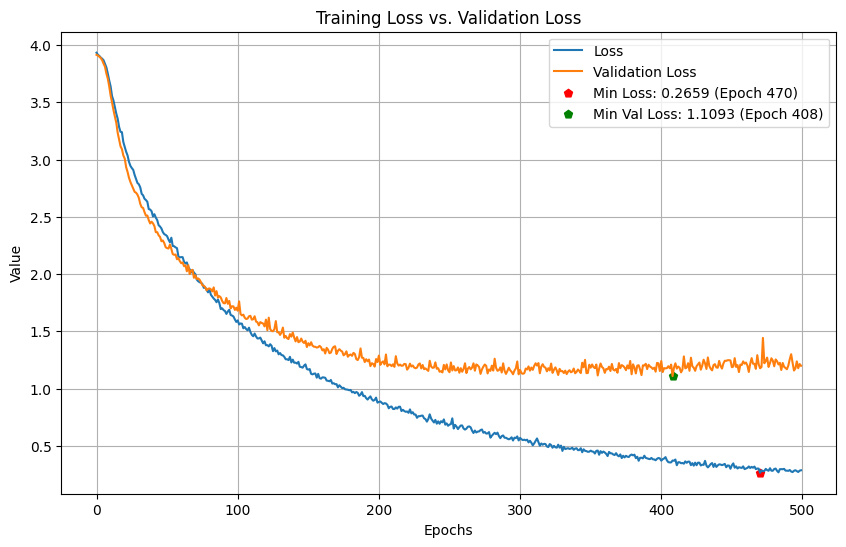

In [122]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

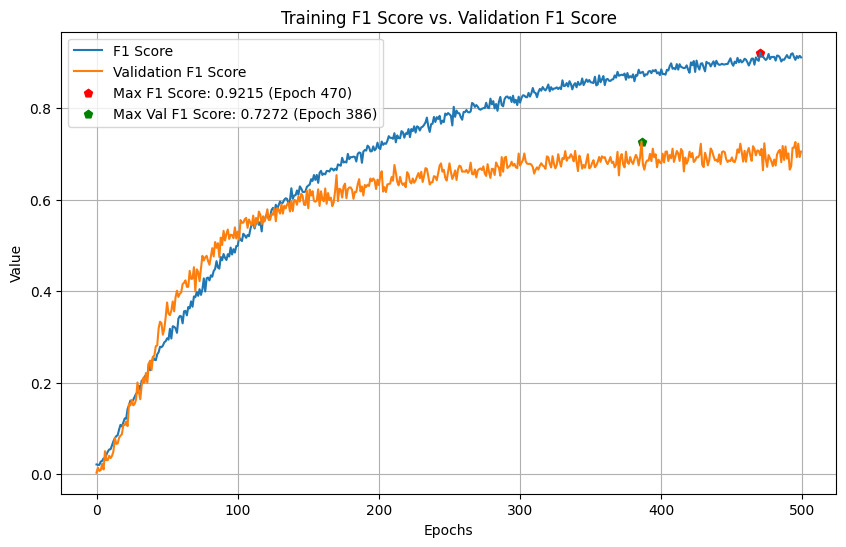

In [123]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [143]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.667     1.000     0.800         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.714     0.500     0.588        10
        BELT      1.000     1.000     1.000         4
        BITE      0.833     0.625     0.714         8
   BREAKFAST      0.600     0.500     0.545         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.571     0.667     0.615         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      0.800     0.500     0.615         8
     DEVELOP      0.308     0.667     0.421         6
      DINNER      1.000     0.625     0.769         8
         DOG      0.444     

In [119]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN")

2023-09-11 20:18:23.485242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 20:18:23.668254: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 539 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [145]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 127, 125)          199625    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15, 125)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 12, 50)            25050     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 3, 50)            0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 3, 50)             0         
                                                                 
 flatten_1 (Flatten)         (None, 150)              

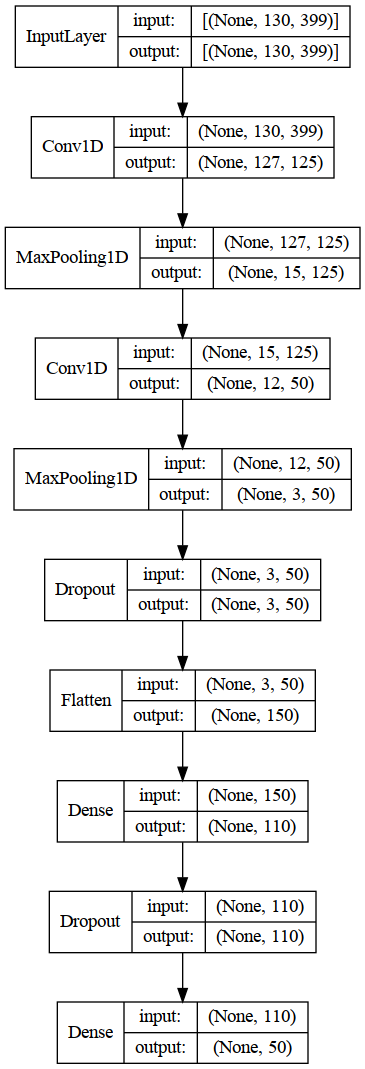

In [146]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

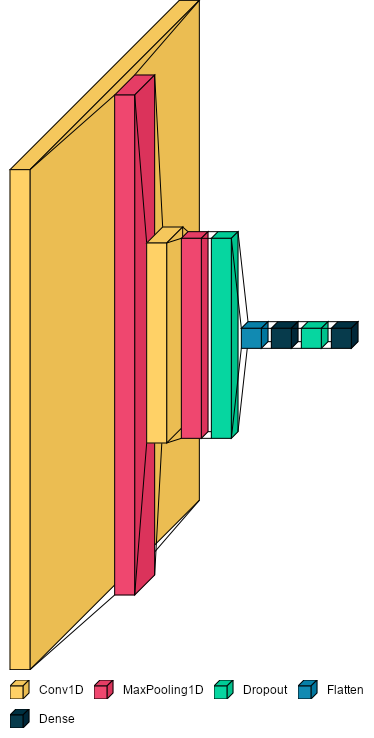

In [120]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [147]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 9ms/step - loss: 1.1180 - f1_score: 0.7272


[1.1179518699645996, 0.727241575717926]

In [149]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 10ms/step - loss: 0.0722 - f1_score: 0.9983


[0.07216788083314896, 0.9982861280441284]

In [148]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.700     0.700     0.700        10
        BELT      1.000     1.000     1.000         4
        BITE      0.750     0.750     0.750         8
   BREAKFAST      0.667     0.667     0.667         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      0.750     0.375     0.500         8
     DEVELOP      0.400     0.667     0.500         6
      DINNER      1.000     0.875     0.933         8
         DOG      0.500     

## Hyperparameter Tuning 3 1D CNN Layers

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_2521404/1222377179.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='relu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[2, 3, 4, 5],
                       default=2,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(
            Conv1D(filters=hp.Int('filters_2',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_2',
                       values=[2, 3, 4, 5],
                       default=2,
                   ),
                   activation=act_function))
        model.add(MaxPooling1D(pool_size=2))
        model.add(
            Conv1D(filters=hp.Int('filters_3',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_3',
                       values=[2, 3, 4, 5],
                       default=2,
                   ),
                   activation=act_function))
        model.add(MaxPooling1D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.5,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(Flatten())
        model.add(
            Dense(units=hp.Int('units_5',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.5,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0008273819395816823)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='3_1D_CNN',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/3_1D_CNN/tuner0.json


In [124]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
filters_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
filters_3 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.5, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_5 (Int)
{'default': 80, 'conditions': [], 'min_va

In [125]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [127]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 14m 47s]
val_f1_score: 0.6045276522636414

Best val_f1_score So Far: 0.6567659080028534
Total elapsed time: 10h 35m 20s
INFO:tensorflow:Oracle triggered exit


In [121]:
best_model = tuner.get_best_models(num_models=6)[0]

2023-09-07 15:28:44.940453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 15:28:45.924527: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1151 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [122]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 129, 150)          119850    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 150)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 75)            56325     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 30, 75)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 50)            15050     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 13, 50)           0

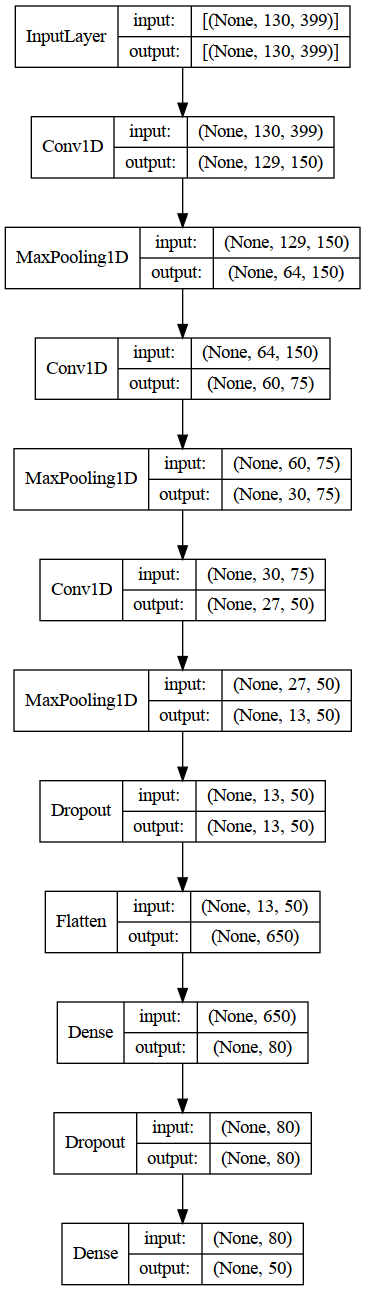

In [123]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [129]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/3_1D_CNN
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: gelu
filters_1: 150
kernel_1: 2
filters_2: 75
kernel_2: 5
filters_3: 50
kernel_3: 4
dropout_1: 0.6
units_5: 80
dropout_2: 0.8
learning_rate: 0.0010731058974110062
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0711
Score: 0.6567659080028534

Trial 0671 summary
Hyperparameters:
dense_activation: gelu
filters_1: 150
kernel_1: 4
filters_2: 150
kernel_2: 4
filters_3: 50
kernel_3: 2
dropout_1: 0.5
units_5: 100
dropout_2: 0.6
learning_rate: 0.00034113846912856477
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0667
Score: 0.6532615125179291

Trial 0718 summary
Hyperparameters:
dense_activation: elu
filters_1: 175
kernel_1: 5
filters_2: 50
kernel_2: 3
filters_3: 75
kernel_3: 2
dropout_1: 0.8500000

In [124]:
loss, accuracy = best_model.evaluate(Xval, Yval)

2023-09-07 15:29:18.065761: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 11s 36ms/step - loss: 1.3640 - f1_score: 0.6603


In [125]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 12ms/step - loss: 0.4578 - f1_score: 0.9051


2023-09-07 15:29:48.527565: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 475.44MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


In [124]:
bestHP = tuner.get_best_hyperparameters(num_trials=6)[0]

In [125]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='3 1D CNN/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [126]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])


[INFO] training the best model...
Epoch 1/500


2023-09-06 11:17:49.891273: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 842.83MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-06 11:17:50.022525: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 713.74MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-06 11:17:50.094878: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fa150d13fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-06 11:17:50.094913: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-06 11:17:50.104444: I ten

28/28 [==============================] - ETA: 0s - loss: 3.9512 - f1_score: 0.0225

2023-09-06 11:17:53.165813: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 784.82MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-06 11:17:53.265091: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 626.52MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-06 11:17:53.838636: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 552.79MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 9s 206ms/step - loss: 3.9512 - f1_score: 0.0225 - val_loss: 3.9113 - val_f1_score: 0.0039
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9179 - f1_score: 0.0229

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 167ms/step - loss: 3.9184 - f1_score: 0.0227 - val_loss: 3.9079 - val_f1_score: 0.0167
Epoch 3/500
28/28 [==============================] - 1s 51ms/step - loss: 3.9150 - f1_score: 0.0236 - val_loss: 3.9045 - val_f1_score: 0.0018
Epoch 4/500
28/28 [==============================] - 1s 51ms/step - loss: 3.9112 - f1_score: 0.0196 - val_loss: 3.9006 - val_f1_score: 0.0076
Epoch 5/500
28/28 [==============================] - 1s 51ms/step - loss: 3.9044 - f1_score: 0.0168 - val_loss: 3.8838 - val_f1_score: 0.0117
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 3.8830 - f1_score: 0.0312

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 4s 161ms/step - loss: 3.8836 - f1_score: 0.0307 - val_loss: 3.8398 - val_f1_score: 0.0244
Epoch 7/500
28/28 [==============================] - 1s 51ms/step - loss: 3.8395 - f1_score: 0.0356 - val_loss: 3.7278 - val_f1_score: 0.0147
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7663 - f1_score: 0.0461

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 186ms/step - loss: 3.7680 - f1_score: 0.0466 - val_loss: 3.6364 - val_f1_score: 0.0410
Epoch 9/500
28/28 [==============================] - 1s 51ms/step - loss: 3.6679 - f1_score: 0.0532 - val_loss: 3.4854 - val_f1_score: 0.0323
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.5896 - f1_score: 0.0625

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 169ms/step - loss: 3.5896 - f1_score: 0.0625 - val_loss: 3.4178 - val_f1_score: 0.0481
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 3.5354 - f1_score: 0.0615

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 169ms/step - loss: 3.5300 - f1_score: 0.0616 - val_loss: 3.2876 - val_f1_score: 0.0591
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4350 - f1_score: 0.0687

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 166ms/step - loss: 3.4293 - f1_score: 0.0704 - val_loss: 3.2548 - val_f1_score: 0.0592
Epoch 13/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3899 - f1_score: 0.0836

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 179ms/step - loss: 3.3867 - f1_score: 0.0851 - val_loss: 3.1611 - val_f1_score: 0.1017
Epoch 14/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3365 - f1_score: 0.0857

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 191ms/step - loss: 3.3340 - f1_score: 0.0855 - val_loss: 3.1208 - val_f1_score: 0.1131
Epoch 15/500
28/28 [==============================] - 1s 51ms/step - loss: 3.2820 - f1_score: 0.0918 - val_loss: 3.1006 - val_f1_score: 0.0877
Epoch 16/500
28/28 [==============================] - 1s 51ms/step - loss: 3.2272 - f1_score: 0.0953 - val_loss: 2.9881 - val_f1_score: 0.1025
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 3.1760 - f1_score: 0.1023

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 179ms/step - loss: 3.1791 - f1_score: 0.1031 - val_loss: 2.9556 - val_f1_score: 0.1170
Epoch 18/500
28/28 [==============================] - 1s 51ms/step - loss: 3.1501 - f1_score: 0.1258 - val_loss: 2.9362 - val_f1_score: 0.1129
Epoch 19/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0882 - f1_score: 0.1281

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 170ms/step - loss: 3.0897 - f1_score: 0.1286 - val_loss: 2.8730 - val_f1_score: 0.1356
Epoch 20/500
28/28 [==============================] - 1s 51ms/step - loss: 3.0195 - f1_score: 0.1293 - val_loss: 2.8321 - val_f1_score: 0.1242
Epoch 21/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9828 - f1_score: 0.1417

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 168ms/step - loss: 2.9772 - f1_score: 0.1439 - val_loss: 2.7385 - val_f1_score: 0.1371
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 2.9202 - f1_score: 0.1474

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 175ms/step - loss: 2.9202 - f1_score: 0.1474 - val_loss: 2.6942 - val_f1_score: 0.1505
Epoch 23/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8900 - f1_score: 0.1556

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 171ms/step - loss: 2.8839 - f1_score: 0.1560 - val_loss: 2.6292 - val_f1_score: 0.1597
Epoch 24/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8699 - f1_score: 0.1635

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 209ms/step - loss: 2.8689 - f1_score: 0.1644 - val_loss: 2.5852 - val_f1_score: 0.1903
Epoch 25/500
28/28 [==============================] - 1s 51ms/step - loss: 2.8187 - f1_score: 0.1747 - val_loss: 2.6227 - val_f1_score: 0.1806
Epoch 26/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7639 - f1_score: 0.1833

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 186ms/step - loss: 2.7530 - f1_score: 0.1844 - val_loss: 2.5867 - val_f1_score: 0.2088
Epoch 27/500
28/28 [==============================] - 1s 51ms/step - loss: 2.7429 - f1_score: 0.1898 - val_loss: 2.6042 - val_f1_score: 0.1887
Epoch 28/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6864 - f1_score: 0.1896

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 190ms/step - loss: 2.6878 - f1_score: 0.1900 - val_loss: 2.5714 - val_f1_score: 0.2140
Epoch 29/500
28/28 [==============================] - 1s 51ms/step - loss: 2.7018 - f1_score: 0.1972 - val_loss: 2.4389 - val_f1_score: 0.2052
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6810 - f1_score: 0.2060

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 178ms/step - loss: 2.6771 - f1_score: 0.2054 - val_loss: 2.4754 - val_f1_score: 0.2160
Epoch 31/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5961 - f1_score: 0.2231

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 189ms/step - loss: 2.5968 - f1_score: 0.2226 - val_loss: 2.4049 - val_f1_score: 0.2451
Epoch 32/500
28/28 [==============================] - 1s 51ms/step - loss: 2.6134 - f1_score: 0.2030 - val_loss: 2.4697 - val_f1_score: 0.2379
Epoch 33/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5573 - f1_score: 0.2155

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 201ms/step - loss: 2.5525 - f1_score: 0.2176 - val_loss: 2.4032 - val_f1_score: 0.2506
Epoch 34/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5166 - f1_score: 0.2261

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 184ms/step - loss: 2.5117 - f1_score: 0.2275 - val_loss: 2.3450 - val_f1_score: 0.2731
Epoch 35/500
28/28 [==============================] - 1s 52ms/step - loss: 2.5601 - f1_score: 0.2279 - val_loss: 2.3568 - val_f1_score: 0.2700
Epoch 36/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5134 - f1_score: 0.2301

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 183ms/step - loss: 2.5171 - f1_score: 0.2287 - val_loss: 2.3343 - val_f1_score: 0.2825
Epoch 37/500
28/28 [==============================] - 1s 52ms/step - loss: 2.4657 - f1_score: 0.2495 - val_loss: 2.3844 - val_f1_score: 0.2685
Epoch 38/500
28/28 [==============================] - 1s 52ms/step - loss: 2.4258 - f1_score: 0.2492 - val_loss: 2.2722 - val_f1_score: 0.2691
Epoch 39/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4227 - f1_score: 0.2402

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 190ms/step - loss: 2.4244 - f1_score: 0.2384 - val_loss: 2.2980 - val_f1_score: 0.2933
Epoch 40/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3829 - f1_score: 0.2561

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 181ms/step - loss: 2.3700 - f1_score: 0.2596 - val_loss: 2.2394 - val_f1_score: 0.3103
Epoch 41/500
28/28 [==============================] - 1s 51ms/step - loss: 2.4234 - f1_score: 0.2597 - val_loss: 2.2476 - val_f1_score: 0.2892
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 2.3449 - f1_score: 0.2710

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 192ms/step - loss: 2.3449 - f1_score: 0.2710 - val_loss: 2.1843 - val_f1_score: 0.3134
Epoch 43/500
28/28 [==============================] - 1s 51ms/step - loss: 2.3190 - f1_score: 0.2773 - val_loss: 2.1943 - val_f1_score: 0.3101
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 2.2846 - f1_score: 0.2780

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 206ms/step - loss: 2.2846 - f1_score: 0.2780 - val_loss: 2.1673 - val_f1_score: 0.3483
Epoch 45/500
28/28 [==============================] - 1s 52ms/step - loss: 2.2983 - f1_score: 0.2939 - val_loss: 2.1516 - val_f1_score: 0.3186
Epoch 46/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2426 - f1_score: 0.2880

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 183ms/step - loss: 2.2479 - f1_score: 0.2862 - val_loss: 2.0943 - val_f1_score: 0.3743
Epoch 47/500
28/28 [==============================] - 1s 52ms/step - loss: 2.2434 - f1_score: 0.2959 - val_loss: 2.0841 - val_f1_score: 0.3213
Epoch 48/500
28/28 [==============================] - 1s 52ms/step - loss: 2.2102 - f1_score: 0.3004 - val_loss: 2.0500 - val_f1_score: 0.3250
Epoch 49/500
28/28 [==============================] - 1s 52ms/step - loss: 2.2251 - f1_score: 0.3156 - val_loss: 2.0821 - val_f1_score: 0.3642
Epoch 50/500
28/28 [==============================] - 1s 53ms/step - loss: 2.2060 - f1_score: 0.2956 - val_loss: 2.0287 - val_f1_score: 0.3614
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 2.1339 - f1_score: 0.3292

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 215ms/step - loss: 2.1339 - f1_score: 0.3292 - val_loss: 2.0083 - val_f1_score: 0.3773
Epoch 52/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1642 - f1_score: 0.3157

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 200ms/step - loss: 2.1632 - f1_score: 0.3148 - val_loss: 2.1306 - val_f1_score: 0.3841
Epoch 53/500
28/28 [==============================] - 1s 52ms/step - loss: 2.1469 - f1_score: 0.3305 - val_loss: 2.0201 - val_f1_score: 0.3329
Epoch 54/500
28/28 [==============================] - 1s 52ms/step - loss: 2.1391 - f1_score: 0.3247 - val_loss: 2.0657 - val_f1_score: 0.3695
Epoch 55/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1414 - f1_score: 0.3277

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 191ms/step - loss: 2.1432 - f1_score: 0.3281 - val_loss: 1.9474 - val_f1_score: 0.4026
Epoch 56/500
28/28 [==============================] - 1s 52ms/step - loss: 2.1059 - f1_score: 0.3435 - val_loss: 1.9655 - val_f1_score: 0.3989
Epoch 57/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1231 - f1_score: 0.3436

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 185ms/step - loss: 2.1244 - f1_score: 0.3428 - val_loss: 2.0384 - val_f1_score: 0.4237
Epoch 58/500
28/28 [==============================] - 1s 51ms/step - loss: 2.0506 - f1_score: 0.3506 - val_loss: 1.9966 - val_f1_score: 0.4054
Epoch 59/500
28/28 [==============================] - 1s 51ms/step - loss: 2.0548 - f1_score: 0.3457 - val_loss: 1.9752 - val_f1_score: 0.4167
Epoch 60/500
28/28 [==============================] - ETA: 0s - loss: 2.0475 - f1_score: 0.3464

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 178ms/step - loss: 2.0475 - f1_score: 0.3464 - val_loss: 1.9573 - val_f1_score: 0.4301
Epoch 61/500
28/28 [==============================] - 1s 52ms/step - loss: 2.0111 - f1_score: 0.3697 - val_loss: 1.9636 - val_f1_score: 0.3257
Epoch 62/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9696 - f1_score: 0.3716

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 209ms/step - loss: 1.9623 - f1_score: 0.3745 - val_loss: 1.8781 - val_f1_score: 0.4334
Epoch 63/500
28/28 [==============================] - 1s 51ms/step - loss: 1.9948 - f1_score: 0.3676 - val_loss: 1.9153 - val_f1_score: 0.4089
Epoch 64/500
28/28 [==============================] - 1s 52ms/step - loss: 1.9804 - f1_score: 0.3688 - val_loss: 1.9295 - val_f1_score: 0.4246
Epoch 65/500
28/28 [==============================] - 1s 52ms/step - loss: 1.9714 - f1_score: 0.3522 - val_loss: 1.8649 - val_f1_score: 0.3941
Epoch 66/500
28/28 [==============================] - 1s 52ms/step - loss: 1.9678 - f1_score: 0.3661 - val_loss: 1.7590 - val_f1_score: 0.4142
Epoch 67/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9402 - f1_score: 0.3870

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 191ms/step - loss: 1.9403 - f1_score: 0.3875 - val_loss: 1.8273 - val_f1_score: 0.4662
Epoch 68/500
28/28 [==============================] - 1s 52ms/step - loss: 1.9271 - f1_score: 0.3946 - val_loss: 1.7706 - val_f1_score: 0.4577
Epoch 69/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8944 - f1_score: 0.3710 - val_loss: 1.8271 - val_f1_score: 0.4353
Epoch 70/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8976 - f1_score: 0.3978 - val_loss: 1.7368 - val_f1_score: 0.4231
Epoch 71/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8561 - f1_score: 0.3974 - val_loss: 1.8236 - val_f1_score: 0.4260
Epoch 72/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8440 - f1_score: 0.4132 - val_loss: 1.8814 - val_f1_score: 0.4406
Epoch 73/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8542 - f1_score: 0.3958

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 200ms/step - loss: 1.8581 - f1_score: 0.3955 - val_loss: 1.7570 - val_f1_score: 0.4805
Epoch 74/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8491 - f1_score: 0.3935 - val_loss: 1.7916 - val_f1_score: 0.4640
Epoch 75/500
28/28 [==============================] - 1s 51ms/step - loss: 1.8504 - f1_score: 0.4021 - val_loss: 1.7489 - val_f1_score: 0.4474
Epoch 76/500
28/28 [==============================] - 1s 52ms/step - loss: 1.8463 - f1_score: 0.4122 - val_loss: 1.8463 - val_f1_score: 0.4715
Epoch 77/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7859 - f1_score: 0.4185 - val_loss: 1.7279 - val_f1_score: 0.4720
Epoch 78/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7658 - f1_score: 0.4327 - val_loss: 1.6711 - val_f1_score: 0.4698
Epoch 79/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7909 - f1_score: 0.4179 - val_loss: 1.7574 - val_f1_score: 0.4420
Epoch 80/50

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 183ms/step - loss: 1.7515 - f1_score: 0.4217 - val_loss: 1.7164 - val_f1_score: 0.4966
Epoch 82/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7365 - f1_score: 0.4349 - val_loss: 1.7252 - val_f1_score: 0.4936
Epoch 83/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7459 - f1_score: 0.4371 - val_loss: 1.7438 - val_f1_score: 0.4878
Epoch 84/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7678 - f1_score: 0.4296 - val_loss: 1.8521 - val_f1_score: 0.4563
Epoch 85/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7011 - f1_score: 0.4536 - val_loss: 1.7623 - val_f1_score: 0.4908
Epoch 86/500
28/28 [==============================] - 1s 53ms/step - loss: 1.7154 - f1_score: 0.4447 - val_loss: 1.7731 - val_f1_score: 0.4439
Epoch 87/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6971 - f1_score: 0.4551

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 174ms/step - loss: 1.6947 - f1_score: 0.4536 - val_loss: 1.6260 - val_f1_score: 0.5014
Epoch 88/500
28/28 [==============================] - 1s 52ms/step - loss: 1.7318 - f1_score: 0.4390 - val_loss: 1.7192 - val_f1_score: 0.4623
Epoch 89/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6671 - f1_score: 0.4576 - val_loss: 1.6763 - val_f1_score: 0.4300
Epoch 90/500
28/28 [==============================] - ETA: 0s - loss: 1.7289 - f1_score: 0.4488

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 181ms/step - loss: 1.7289 - f1_score: 0.4488 - val_loss: 1.6797 - val_f1_score: 0.5086
Epoch 91/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6776 - f1_score: 0.4525 - val_loss: 1.7078 - val_f1_score: 0.5037
Epoch 92/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6764 - f1_score: 0.4448 - val_loss: 1.6385 - val_f1_score: 0.5064
Epoch 93/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6381 - f1_score: 0.4652 - val_loss: 1.7114 - val_f1_score: 0.4931
Epoch 94/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6307 - f1_score: 0.4644 - val_loss: 1.6696 - val_f1_score: 0.4875
Epoch 95/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6442 - f1_score: 0.4646

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 187ms/step - loss: 1.6461 - f1_score: 0.4637 - val_loss: 1.6546 - val_f1_score: 0.5318
Epoch 96/500
28/28 [==============================] - 1s 53ms/step - loss: 1.6199 - f1_score: 0.4758 - val_loss: 1.6306 - val_f1_score: 0.4740
Epoch 97/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5841 - f1_score: 0.4811 - val_loss: 1.5760 - val_f1_score: 0.5261
Epoch 98/500
28/28 [==============================] - 1s 53ms/step - loss: 1.6307 - f1_score: 0.4615 - val_loss: 1.5789 - val_f1_score: 0.5229
Epoch 99/500
28/28 [==============================] - 1s 53ms/step - loss: 1.6146 - f1_score: 0.4764 - val_loss: 1.6133 - val_f1_score: 0.4683
Epoch 100/500
28/28 [==============================] - 1s 52ms/step - loss: 1.6097 - f1_score: 0.4806 - val_loss: 1.6274 - val_f1_score: 0.5208
Epoch 101/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5997 - f1_score: 0.4788 - val_loss: 1.7131 - val_f1_score: 0.4479
Epoch 102

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 205ms/step - loss: 1.5868 - f1_score: 0.4756 - val_loss: 1.6253 - val_f1_score: 0.5498
Epoch 103/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5339 - f1_score: 0.4989 - val_loss: 1.5952 - val_f1_score: 0.5070
Epoch 104/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5565 - f1_score: 0.4880 - val_loss: 1.6159 - val_f1_score: 0.5095
Epoch 105/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5330 - f1_score: 0.4977 - val_loss: 1.6188 - val_f1_score: 0.5212
Epoch 106/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5829 - f1_score: 0.4856 - val_loss: 1.6390 - val_f1_score: 0.5120
Epoch 107/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5148 - f1_score: 0.5012 - val_loss: 1.5939 - val_f1_score: 0.5055
Epoch 108/500
28/28 [==============================] - 1s 52ms/step - loss: 1.5373 - f1_score: 0.4989 - val_loss: 1.5416 - val_f1_score: 0.5020
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 202ms/step - loss: 1.4334 - f1_score: 0.5186 - val_loss: 1.5292 - val_f1_score: 0.5566
Epoch 118/500
28/28 [==============================] - 1s 52ms/step - loss: 1.4625 - f1_score: 0.5181 - val_loss: 1.4901 - val_f1_score: 0.5336
Epoch 119/500
28/28 [==============================] - 1s 52ms/step - loss: 1.4625 - f1_score: 0.5253 - val_loss: 1.5651 - val_f1_score: 0.5351
Epoch 120/500
28/28 [==============================] - 1s 53ms/step - loss: 1.4320 - f1_score: 0.5190 - val_loss: 1.6121 - val_f1_score: 0.5388
Epoch 121/500
28/28 [==============================] - 2s 55ms/step - loss: 1.4414 - f1_score: 0.5335 - val_loss: 1.4313 - val_f1_score: 0.5311
Epoch 122/500
28/28 [==============================] - 2s 57ms/step - loss: 1.4686 - f1_score: 0.5271 - val_loss: 1.5083 - val_f1_score: 0.5452
Epoch 123/500
28/28 [==============================] - 2s 58ms/step - loss: 1.4179 - f1_score: 0.5359 - val_loss: 1.4626 - val_f1_score: 0.5559
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 218ms/step - loss: 1.4237 - f1_score: 0.5412 - val_loss: 1.4777 - val_f1_score: 0.5619
Epoch 128/500
28/28 [==============================] - 1s 53ms/step - loss: 1.4357 - f1_score: 0.5171 - val_loss: 1.5618 - val_f1_score: 0.5430
Epoch 129/500
28/28 [==============================] - 1s 53ms/step - loss: 1.3967 - f1_score: 0.5478 - val_loss: 1.5878 - val_f1_score: 0.5333
Epoch 130/500
28/28 [==============================] - 1s 53ms/step - loss: 1.3840 - f1_score: 0.5357 - val_loss: 1.5188 - val_f1_score: 0.5375
Epoch 131/500
28/28 [==============================] - 1s 53ms/step - loss: 1.3868 - f1_score: 0.5366 - val_loss: 1.4959 - val_f1_score: 0.5345
Epoch 132/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3925 - f1_score: 0.5515

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 206ms/step - loss: 1.3863 - f1_score: 0.5532 - val_loss: 1.5001 - val_f1_score: 0.5909
Epoch 133/500
28/28 [==============================] - 2s 60ms/step - loss: 1.3870 - f1_score: 0.5364 - val_loss: 1.4941 - val_f1_score: 0.5292
Epoch 134/500
28/28 [==============================] - 2s 55ms/step - loss: 1.3769 - f1_score: 0.5452 - val_loss: 1.4827 - val_f1_score: 0.5429
Epoch 135/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3830 - f1_score: 0.5499

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 202ms/step - loss: 1.3828 - f1_score: 0.5500 - val_loss: 1.4247 - val_f1_score: 0.5992
Epoch 136/500
28/28 [==============================] - 1s 54ms/step - loss: 1.3630 - f1_score: 0.5481 - val_loss: 1.4013 - val_f1_score: 0.5554
Epoch 137/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3934 - f1_score: 0.5299 - val_loss: 1.4635 - val_f1_score: 0.5556
Epoch 138/500
28/28 [==============================] - 2s 58ms/step - loss: 1.3455 - f1_score: 0.5487 - val_loss: 1.4671 - val_f1_score: 0.5777
Epoch 139/500
28/28 [==============================] - 2s 55ms/step - loss: 1.3359 - f1_score: 0.5558 - val_loss: 1.5555 - val_f1_score: 0.5588
Epoch 140/500
28/28 [==============================] - 2s 55ms/step - loss: 1.2807 - f1_score: 0.5707 - val_loss: 1.4388 - val_f1_score: 0.5371
Epoch 141/500
28/28 [==============================] - 1s 53ms/step - loss: 1.3350 - f1_score: 0.5561 - val_loss: 1.4027 - val_f1_score: 0.5465
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 7s 257ms/step - loss: 1.1897 - f1_score: 0.5990 - val_loss: 1.3279 - val_f1_score: 0.6312
Epoch 175/500
28/28 [==============================] - 1s 53ms/step - loss: 1.1977 - f1_score: 0.5875 - val_loss: 1.3439 - val_f1_score: 0.6127
Epoch 176/500
28/28 [==============================] - 1s 53ms/step - loss: 1.2002 - f1_score: 0.6037 - val_loss: 1.4964 - val_f1_score: 0.5339
Epoch 177/500
28/28 [==============================] - 1s 53ms/step - loss: 1.1778 - f1_score: 0.6140 - val_loss: 1.4967 - val_f1_score: 0.5714
Epoch 178/500
28/28 [==============================] - 1s 53ms/step - loss: 1.2166 - f1_score: 0.6019 - val_loss: 1.3488 - val_f1_score: 0.5894
Epoch 179/500
28/28 [==============================] - 1s 53ms/step - loss: 1.1786 - f1_score: 0.6045 - val_loss: 1.4442 - val_f1_score: 0.5655
Epoch 180/500
28/28 [==============================] - 1s 53ms/step - loss: 1.1595 - f1_score: 0.6162 - val_loss: 1.3930 - val_f1_score: 0.5753
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 7s 247ms/step - loss: 1.1251 - f1_score: 0.6293 - val_loss: 1.2910 - val_f1_score: 0.6390
Epoch 211/500
28/28 [==============================] - 1s 53ms/step - loss: 1.0521 - f1_score: 0.6507 - val_loss: 1.2927 - val_f1_score: 0.6079
Epoch 212/500
28/28 [==============================] - 1s 52ms/step - loss: 1.0999 - f1_score: 0.6413 - val_loss: 1.4452 - val_f1_score: 0.5883
Epoch 213/500
28/28 [==============================] - 2s 54ms/step - loss: 1.0450 - f1_score: 0.6555 - val_loss: 1.4393 - val_f1_score: 0.5759
Epoch 214/500
28/28 [==============================] - 1s 53ms/step - loss: 1.0679 - f1_score: 0.6351 - val_loss: 1.3245 - val_f1_score: 0.6363
Epoch 215/500
28/28 [==============================] - 2s 54ms/step - loss: 1.0508 - f1_score: 0.6603 - val_loss: 1.3798 - val_f1_score: 0.5824
Epoch 216/500
28/28 [==============================] - 2s 55ms/step - loss: 1.0769 - f1_score: 0.6481 - val_loss: 1.4090 - val_f1_score: 0.6081
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 212ms/step - loss: 0.9449 - f1_score: 0.6827 - val_loss: 1.3977 - val_f1_score: 0.6393
Epoch 259/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9435 - f1_score: 0.6838 - val_loss: 1.4833 - val_f1_score: 0.6079
Epoch 260/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9462 - f1_score: 0.6782 - val_loss: 1.4409 - val_f1_score: 0.6030
Epoch 261/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9521 - f1_score: 0.6893 - val_loss: 1.5326 - val_f1_score: 0.6002
Epoch 262/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9745 - f1_score: 0.6851 - val_loss: 1.3699 - val_f1_score: 0.6383
Epoch 263/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9232 - f1_score: 0.6933 - val_loss: 1.4277 - val_f1_score: 0.6038
Epoch 264/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9399 - f1_score: 0.6918

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 193ms/step - loss: 0.9397 - f1_score: 0.6912 - val_loss: 1.2755 - val_f1_score: 0.6463
Epoch 265/500
28/28 [==============================] - 2s 54ms/step - loss: 0.9062 - f1_score: 0.6999 - val_loss: 1.5533 - val_f1_score: 0.6144
Epoch 266/500
28/28 [==============================] - ETA: 0s - loss: 0.9341 - f1_score: 0.6875

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 193ms/step - loss: 0.9341 - f1_score: 0.6875 - val_loss: 1.2842 - val_f1_score: 0.6480
Epoch 267/500
28/28 [==============================] - 1s 52ms/step - loss: 0.9820 - f1_score: 0.6793 - val_loss: 1.3334 - val_f1_score: 0.6328
Epoch 268/500
28/28 [==============================] - 1s 52ms/step - loss: 0.9444 - f1_score: 0.6871 - val_loss: 1.4983 - val_f1_score: 0.6036
Epoch 269/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9476 - f1_score: 0.6779 - val_loss: 1.3623 - val_f1_score: 0.6253
Epoch 270/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9498 - f1_score: 0.6824 - val_loss: 1.4406 - val_f1_score: 0.5852
Epoch 271/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9335 - f1_score: 0.6912 - val_loss: 1.5382 - val_f1_score: 0.6041
Epoch 272/500
28/28 [==============================] - ETA: 0s - loss: 0.9796 - f1_score: 0.6876

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 235ms/step - loss: 0.9796 - f1_score: 0.6876 - val_loss: 1.3677 - val_f1_score: 0.6588
Epoch 273/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9599 - f1_score: 0.6805 - val_loss: 1.5790 - val_f1_score: 0.6012
Epoch 274/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9362 - f1_score: 0.6831 - val_loss: 1.5277 - val_f1_score: 0.6101
Epoch 275/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9325 - f1_score: 0.6920 - val_loss: 1.2657 - val_f1_score: 0.6391
Epoch 276/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9283 - f1_score: 0.6834 - val_loss: 1.4553 - val_f1_score: 0.6272
Epoch 277/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9683 - f1_score: 0.6733 - val_loss: 1.4052 - val_f1_score: 0.6236
Epoch 278/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9324 - f1_score: 0.6850 - val_loss: 1.3340 - val_f1_score: 0.6307
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 204ms/step - loss: 0.8975 - f1_score: 0.7019 - val_loss: 1.3183 - val_f1_score: 0.6601
Epoch 300/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8924 - f1_score: 0.6962 - val_loss: 1.3568 - val_f1_score: 0.6248
Epoch 301/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8858 - f1_score: 0.7164 - val_loss: 1.3082 - val_f1_score: 0.6480
Epoch 302/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8761 - f1_score: 0.7154 - val_loss: 1.3687 - val_f1_score: 0.6192
Epoch 303/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8500 - f1_score: 0.7065 - val_loss: 1.4713 - val_f1_score: 0.6191
Epoch 304/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8578 - f1_score: 0.7176 - val_loss: 1.3515 - val_f1_score: 0.6372
Epoch 305/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8730 - f1_score: 0.7178 - val_loss: 1.3763 - val_f1_score: 0.6289
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 217ms/step - loss: 0.8542 - f1_score: 0.7181 - val_loss: 1.4144 - val_f1_score: 0.6697
Epoch 318/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8468 - f1_score: 0.7187 - val_loss: 1.6611 - val_f1_score: 0.6256
Epoch 319/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8762 - f1_score: 0.7050 - val_loss: 1.5013 - val_f1_score: 0.6124
Epoch 320/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8561 - f1_score: 0.7213 - val_loss: 1.3108 - val_f1_score: 0.6469
Epoch 321/500
28/28 [==============================] - 1s 54ms/step - loss: 0.8739 - f1_score: 0.7042 - val_loss: 1.6089 - val_f1_score: 0.6237
Epoch 322/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8430 - f1_score: 0.7180 - val_loss: 1.3677 - val_f1_score: 0.6505
Epoch 323/500
28/28 [==============================] - 1s 54ms/step - loss: 0.8284 - f1_score: 0.7225 - val_loss: 1.4689 - val_f1_score: 0.6237
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 5s 193ms/step - loss: 0.8407 - f1_score: 0.7317 - val_loss: 1.4743 - val_f1_score: 0.6713
Epoch 333/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8580 - f1_score: 0.7117 - val_loss: 1.4484 - val_f1_score: 0.6221
Epoch 334/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8053 - f1_score: 0.7411 - val_loss: 1.4515 - val_f1_score: 0.6389
Epoch 335/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8628 - f1_score: 0.7100 - val_loss: 1.6145 - val_f1_score: 0.6373
Epoch 336/500
28/28 [==============================] - 2s 54ms/step - loss: 0.8284 - f1_score: 0.7339 - val_loss: 1.5477 - val_f1_score: 0.6480
Epoch 337/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8071 - f1_score: 0.7344 - val_loss: 1.3933 - val_f1_score: 0.6487
Epoch 338/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8498 - f1_score: 0.7137 - val_loss: 1.5404 - val_f1_score: 0.6258
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 219ms/step - loss: 0.8249 - f1_score: 0.7226 - val_loss: 1.3735 - val_f1_score: 0.6754
Epoch 357/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7977 - f1_score: 0.7247 - val_loss: 1.5932 - val_f1_score: 0.6446
Epoch 358/500
28/28 [==============================] - 2s 54ms/step - loss: 0.8202 - f1_score: 0.7335 - val_loss: 1.7377 - val_f1_score: 0.6072
Epoch 359/500
28/28 [==============================] - 1s 53ms/step - loss: 0.8183 - f1_score: 0.7310 - val_loss: 1.2457 - val_f1_score: 0.6698
Epoch 360/500
28/28 [==============================] - 1s 54ms/step - loss: 0.8152 - f1_score: 0.7258 - val_loss: 1.3934 - val_f1_score: 0.6318
Epoch 361/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8054 - f1_score: 0.7293 - val_loss: 1.4377 - val_f1_score: 0.6448
Epoch 362/500
28/28 [==============================] - 2s 54ms/step - loss: 0.7857 - f1_score: 0.7416 - val_loss: 1.5750 - val_f1_score: 0.6458
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 213ms/step - loss: 0.7492 - f1_score: 0.7511 - val_loss: 1.5676 - val_f1_score: 0.6769
Epoch 399/500
28/28 [==============================] - 2s 54ms/step - loss: 0.7721 - f1_score: 0.7399 - val_loss: 1.5220 - val_f1_score: 0.6680
Epoch 400/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7763 - f1_score: 0.7460 - val_loss: 1.3851 - val_f1_score: 0.6645
Epoch 401/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7264 - f1_score: 0.7575 - val_loss: 1.5952 - val_f1_score: 0.6411
Epoch 402/500
28/28 [==============================] - 1s 53ms/step - loss: 0.6972 - f1_score: 0.7621 - val_loss: 1.4393 - val_f1_score: 0.6486
Epoch 403/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7337 - f1_score: 0.7537 - val_loss: 1.5430 - val_f1_score: 0.6293
Epoch 404/500
28/28 [==============================] - 1s 54ms/step - loss: 0.7535 - f1_score: 0.7565 - val_loss: 1.5157 - val_f1_score: 0.6501
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN2/assets


INFO:tensorflow:Assets written to: 3 1D CNN2/assets


28/28 [==============================] - 6s 223ms/step - loss: 0.7260 - f1_score: 0.7566 - val_loss: 1.3335 - val_f1_score: 0.6891
Epoch 411/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7257 - f1_score: 0.7546 - val_loss: 1.6610 - val_f1_score: 0.6454
Epoch 412/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7792 - f1_score: 0.7475 - val_loss: 1.3853 - val_f1_score: 0.6542
Epoch 413/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7136 - f1_score: 0.7701 - val_loss: 1.6595 - val_f1_score: 0.6304
Epoch 414/500
28/28 [==============================] - 2s 54ms/step - loss: 0.7659 - f1_score: 0.7446 - val_loss: 1.4163 - val_f1_score: 0.6499
Epoch 415/500
28/28 [==============================] - 2s 54ms/step - loss: 0.7876 - f1_score: 0.7457 - val_loss: 1.4424 - val_f1_score: 0.6494
Epoch 416/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7567 - f1_score: 0.7548 - val_loss: 1.4546 - val_f1_score: 0.6497
Epoch

Epoch 467/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6724 - f1_score: 0.7753 - val_loss: 1.4572 - val_f1_score: 0.6348
Epoch 468/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6646 - f1_score: 0.7832 - val_loss: 1.4906 - val_f1_score: 0.6380
Epoch 469/500
28/28 [==============================] - 2s 55ms/step - loss: 0.7163 - f1_score: 0.7670 - val_loss: 1.4488 - val_f1_score: 0.6546
Epoch 470/500
28/28 [==============================] - 2s 55ms/step - loss: 0.6736 - f1_score: 0.7777 - val_loss: 1.7224 - val_f1_score: 0.6491
Epoch 471/500
28/28 [==============================] - 2s 58ms/step - loss: 0.6477 - f1_score: 0.7796 - val_loss: 1.6369 - val_f1_score: 0.6483
Epoch 472/500
28/28 [==============================] - 2s 63ms/step - loss: 0.6686 - f1_score: 0.7734 - val_loss: 1.4393 - val_f1_score: 0.6563
Epoch 473/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7274 - f1_score: 0.7669 - val_loss: 1.5934 - val_f1_score:

In [127]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.667     1.000     0.800         6
  BASKETBALL      0.889     0.800     0.842        10
         BEE      0.667     0.600     0.632        10
        BELT      0.667     1.000     0.800         4
        BITE      0.833     0.625     0.714         8
   BREAKFAST      0.429     0.500     0.462         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.429     0.500     0.462         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.625     0.833     0.714         6
      DINNER      1.000     0.250     0.400         8
         DOG      0.444     

In [119]:
reconstructed_model = tf.keras.models.load_model("3 1D CNN")

In [120]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 3s 31ms/step - loss: 1.5136 - f1_score: 0.7012


[1.5136113166809082, 0.7011691927909851]

In [121]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 10ms/step - loss: 0.1096 - f1_score: 0.9866


2023-09-23 11:20:27.331021: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 475.44MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


[0.10961440950632095, 0.9866245985031128]

In [140]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 129, 150)          119850    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 64, 150)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 60, 75)            56325     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 30, 75)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 27, 50)            15050     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 13, 50)          

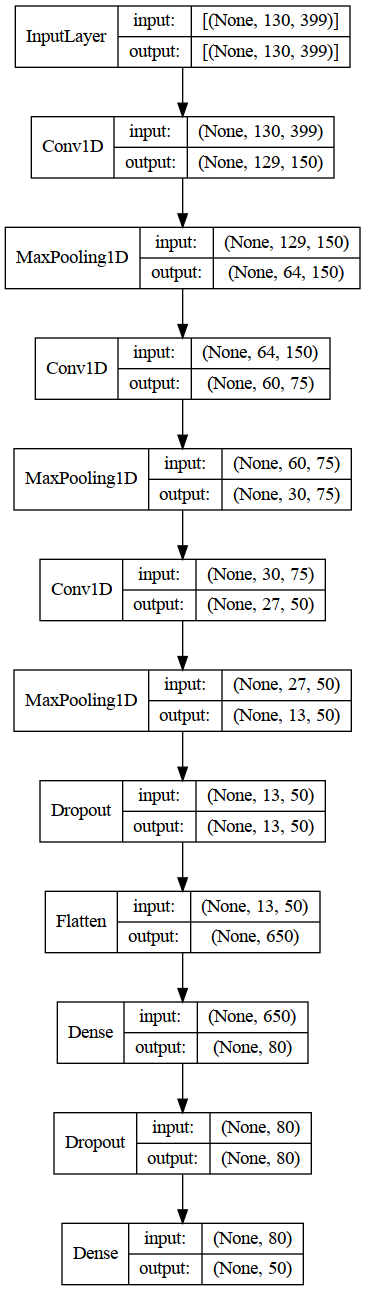

In [141]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [142]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

         AXE      0.875     0.875     0.875         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.875     0.700     0.778        10
        BELT      1.000     0.750     0.857         4
        BITE      0.833     0.625     0.714         8
   BREAKFAST      0.600     0.500     0.545         6
      CANCER      0.727     1.000     0.842         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.444     0.667     0.533         6
      DINNER      1.000     0.625     0.769         8
         DOG      0.714     

### 3 1D CNN Trial 718

In [122]:
best_model = tuner.get_best_models(num_models=3)[2]

2023-09-10 16:23:47.086860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 16:23:47.184730: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [123]:
best_model.evaluate(Xtrain, Ytrain)

2023-09-10 16:23:56.321620: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


84/84 [==============================] - 2s 15ms/step - loss: 0.4830 - f1_score: 0.8864


[0.4829612970352173, 0.8863658905029297]

In [124]:
best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 21ms/step - loss: 1.4396 - f1_score: 0.6577


[1.4396306276321411, 0.6576815843582153]

In [125]:
bestHP = tuner.get_best_hyperparameters(num_trials=3)[2]

In [126]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='3 1D CNN Trial 718/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [127]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500


2023-09-10 16:24:16.773228: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 839.49MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-10 16:24:16.877017: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 713.21MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-10 16:24:16.980748: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x33a1a650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-10 16:24:16.980790: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-10 16:24:16.990994: I tensorf

28/28 [==============================] - ETA: 0s - loss: 4.4825 - f1_score: 0.0191

2023-09-10 16:24:20.298346: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 771.81MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-10 16:24:20.370562: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 626.06MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-10 16:24:20.384784: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.84GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-10 16:24:20.982942: W tensorflow/core/common_runtime/bfc_allo

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 12s 305ms/step - loss: 4.4825 - f1_score: 0.0191 - val_loss: 3.9168 - val_f1_score: 0.0103
Epoch 2/500
28/28 [==============================] - 2s 61ms/step - loss: 4.1618 - f1_score: 0.0224 - val_loss: 3.9070 - val_f1_score: 0.0064
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 4.0973 - f1_score: 0.0185

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 178ms/step - loss: 4.0973 - f1_score: 0.0185 - val_loss: 3.9075 - val_f1_score: 0.0183
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 4.0420 - f1_score: 0.0206

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 206ms/step - loss: 4.0420 - f1_score: 0.0206 - val_loss: 3.8995 - val_f1_score: 0.0242
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 4.0247 - f1_score: 0.0201

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 225ms/step - loss: 4.0247 - f1_score: 0.0201 - val_loss: 3.8726 - val_f1_score: 0.0364
Epoch 6/500
28/28 [==============================] - 2s 62ms/step - loss: 3.9935 - f1_score: 0.0302 - val_loss: 3.8720 - val_f1_score: 0.0199
Epoch 7/500
28/28 [==============================] - 2s 62ms/step - loss: 3.9881 - f1_score: 0.0278 - val_loss: 3.8664 - val_f1_score: 0.0230
Epoch 8/500
28/28 [==============================] - 2s 65ms/step - loss: 3.9702 - f1_score: 0.0254 - val_loss: 3.8537 - val_f1_score: 0.0103
Epoch 9/500
28/28 [==============================] - 2s 62ms/step - loss: 3.9441 - f1_score: 0.0331 - val_loss: 3.8375 - val_f1_score: 0.0169
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.9255 - f1_score: 0.0307

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 194ms/step - loss: 3.9255 - f1_score: 0.0307 - val_loss: 3.8029 - val_f1_score: 0.0401
Epoch 11/500
28/28 [==============================] - 2s 64ms/step - loss: 3.9019 - f1_score: 0.0322 - val_loss: 3.7745 - val_f1_score: 0.0214
Epoch 12/500
28/28 [==============================] - 2s 64ms/step - loss: 3.8757 - f1_score: 0.0438 - val_loss: 3.7417 - val_f1_score: 0.0283
Epoch 13/500
28/28 [==============================] - 2s 65ms/step - loss: 3.8516 - f1_score: 0.0435 - val_loss: 3.7295 - val_f1_score: 0.0258
Epoch 14/500
28/28 [==============================] - 2s 63ms/step - loss: 3.8182 - f1_score: 0.0365 - val_loss: 3.6604 - val_f1_score: 0.0322
Epoch 15/500
28/28 [==============================] - 2s 63ms/step - loss: 3.7815 - f1_score: 0.0450 - val_loss: 3.6187 - val_f1_score: 0.0366
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 3.7694 - f1_score: 0.0555

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 191ms/step - loss: 3.7694 - f1_score: 0.0555 - val_loss: 3.5582 - val_f1_score: 0.0605
Epoch 17/500
28/28 [==============================] - 2s 63ms/step - loss: 3.7079 - f1_score: 0.0550 - val_loss: 3.5148 - val_f1_score: 0.0477
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.6682 - f1_score: 0.0588

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 197ms/step - loss: 3.6682 - f1_score: 0.0588 - val_loss: 3.4379 - val_f1_score: 0.0745
Epoch 19/500
28/28 [==============================] - 2s 63ms/step - loss: 3.6439 - f1_score: 0.0643 - val_loss: 3.4224 - val_f1_score: 0.0455
Epoch 20/500
28/28 [==============================] - 2s 62ms/step - loss: 3.5816 - f1_score: 0.0704 - val_loss: 3.3530 - val_f1_score: 0.0507
Epoch 21/500
28/28 [==============================] - 2s 63ms/step - loss: 3.5728 - f1_score: 0.0675 - val_loss: 3.3139 - val_f1_score: 0.0727
Epoch 22/500
28/28 [==============================] - 2s 65ms/step - loss: 3.5371 - f1_score: 0.0795 - val_loss: 3.2653 - val_f1_score: 0.0721
Epoch 23/500
28/28 [==============================] - 2s 63ms/step - loss: 3.4690 - f1_score: 0.0877 - val_loss: 3.2257 - val_f1_score: 0.0688
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 3.4478 - f1_score: 0.0878

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 221ms/step - loss: 3.4478 - f1_score: 0.0878 - val_loss: 3.1858 - val_f1_score: 0.1050
Epoch 25/500
28/28 [==============================] - 2s 65ms/step - loss: 3.3892 - f1_score: 0.0920 - val_loss: 3.1226 - val_f1_score: 0.0947
Epoch 26/500
28/28 [==============================] - 2s 63ms/step - loss: 3.3697 - f1_score: 0.0979 - val_loss: 3.0983 - val_f1_score: 0.1011
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 3.3028 - f1_score: 0.0997

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 219ms/step - loss: 3.3028 - f1_score: 0.0997 - val_loss: 3.1100 - val_f1_score: 0.1362
Epoch 28/500
28/28 [==============================] - 2s 65ms/step - loss: 3.2746 - f1_score: 0.1031 - val_loss: 3.0083 - val_f1_score: 0.1000
Epoch 29/500
28/28 [==============================] - 2s 66ms/step - loss: 3.2822 - f1_score: 0.1170 - val_loss: 3.0196 - val_f1_score: 0.1125
Epoch 30/500
28/28 [==============================] - 2s 66ms/step - loss: 3.2907 - f1_score: 0.1056 - val_loss: 3.0040 - val_f1_score: 0.1294
Epoch 31/500
28/28 [==============================] - 2s 65ms/step - loss: 3.1826 - f1_score: 0.1369 - val_loss: 2.9238 - val_f1_score: 0.1271
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 3.1699 - f1_score: 0.1300

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 219ms/step - loss: 3.1699 - f1_score: 0.1300 - val_loss: 2.8661 - val_f1_score: 0.1787
Epoch 33/500
28/28 [==============================] - 2s 65ms/step - loss: 3.1280 - f1_score: 0.1306 - val_loss: 2.8818 - val_f1_score: 0.1549
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 3.1042 - f1_score: 0.1344

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 207ms/step - loss: 3.1042 - f1_score: 0.1344 - val_loss: 2.8190 - val_f1_score: 0.1912
Epoch 35/500
28/28 [==============================] - 2s 63ms/step - loss: 3.0634 - f1_score: 0.1389 - val_loss: 2.7997 - val_f1_score: 0.1720
Epoch 36/500
28/28 [==============================] - 2s 63ms/step - loss: 3.0706 - f1_score: 0.1412 - val_loss: 2.7802 - val_f1_score: 0.1774
Epoch 37/500
28/28 [==============================] - 2s 64ms/step - loss: 3.0280 - f1_score: 0.1393 - val_loss: 2.9295 - val_f1_score: 0.1675
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 2.9891 - f1_score: 0.1598

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 194ms/step - loss: 2.9891 - f1_score: 0.1598 - val_loss: 2.7409 - val_f1_score: 0.2057
Epoch 39/500
28/28 [==============================] - 2s 63ms/step - loss: 2.9581 - f1_score: 0.1524 - val_loss: 2.7223 - val_f1_score: 0.1982
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 2.9821 - f1_score: 0.1455

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 199ms/step - loss: 2.9821 - f1_score: 0.1455 - val_loss: 2.6771 - val_f1_score: 0.2283
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 2.9111 - f1_score: 0.1659

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 198ms/step - loss: 2.9111 - f1_score: 0.1659 - val_loss: 2.6592 - val_f1_score: 0.2463
Epoch 42/500
28/28 [==============================] - 2s 65ms/step - loss: 2.9067 - f1_score: 0.1637 - val_loss: 2.6770 - val_f1_score: 0.1999
Epoch 43/500
28/28 [==============================] - 2s 63ms/step - loss: 2.9173 - f1_score: 0.1680 - val_loss: 2.6301 - val_f1_score: 0.2131
Epoch 44/500
28/28 [==============================] - 2s 64ms/step - loss: 2.8874 - f1_score: 0.1767 - val_loss: 2.6341 - val_f1_score: 0.2347
Epoch 45/500
28/28 [==============================] - 2s 67ms/step - loss: 2.8725 - f1_score: 0.1678 - val_loss: 2.6428 - val_f1_score: 0.2146
Epoch 46/500
28/28 [==============================] - ETA: 0s - loss: 2.8385 - f1_score: 0.1827

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 227ms/step - loss: 2.8385 - f1_score: 0.1827 - val_loss: 2.5883 - val_f1_score: 0.2495
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 2.8526 - f1_score: 0.1747

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 8s 288ms/step - loss: 2.8526 - f1_score: 0.1747 - val_loss: 2.5534 - val_f1_score: 0.2568
Epoch 48/500
28/28 [==============================] - 2s 63ms/step - loss: 2.8189 - f1_score: 0.1821 - val_loss: 2.6148 - val_f1_score: 0.2536
Epoch 49/500
28/28 [==============================] - ETA: 0s - loss: 2.7982 - f1_score: 0.1990

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 198ms/step - loss: 2.7982 - f1_score: 0.1990 - val_loss: 2.5303 - val_f1_score: 0.2723
Epoch 50/500
28/28 [==============================] - 2s 63ms/step - loss: 2.7394 - f1_score: 0.2014 - val_loss: 2.5449 - val_f1_score: 0.2459
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 2.7361 - f1_score: 0.2097

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 194ms/step - loss: 2.7361 - f1_score: 0.2097 - val_loss: 2.5278 - val_f1_score: 0.2742
Epoch 52/500
28/28 [==============================] - 2s 63ms/step - loss: 2.7134 - f1_score: 0.2044 - val_loss: 2.4948 - val_f1_score: 0.2602
Epoch 53/500
28/28 [==============================] - ETA: 0s - loss: 2.6708 - f1_score: 0.2209

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 197ms/step - loss: 2.6708 - f1_score: 0.2209 - val_loss: 2.4808 - val_f1_score: 0.2963
Epoch 54/500
28/28 [==============================] - 2s 63ms/step - loss: 2.6983 - f1_score: 0.2114 - val_loss: 2.5323 - val_f1_score: 0.2743
Epoch 55/500
28/28 [==============================] - 2s 63ms/step - loss: 2.6643 - f1_score: 0.2138 - val_loss: 2.4797 - val_f1_score: 0.2426
Epoch 56/500
28/28 [==============================] - ETA: 0s - loss: 2.6605 - f1_score: 0.2231

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 208ms/step - loss: 2.6605 - f1_score: 0.2231 - val_loss: 2.4634 - val_f1_score: 0.3263
Epoch 57/500
28/28 [==============================] - 2s 63ms/step - loss: 2.6758 - f1_score: 0.2029 - val_loss: 2.4210 - val_f1_score: 0.2831
Epoch 58/500
28/28 [==============================] - 2s 63ms/step - loss: 2.6061 - f1_score: 0.2326 - val_loss: 2.3867 - val_f1_score: 0.3114
Epoch 59/500
28/28 [==============================] - 2s 64ms/step - loss: 2.5962 - f1_score: 0.2441 - val_loss: 2.3950 - val_f1_score: 0.3164
Epoch 60/500
28/28 [==============================] - 2s 64ms/step - loss: 2.5829 - f1_score: 0.2423 - val_loss: 2.3945 - val_f1_score: 0.2845
Epoch 61/500
28/28 [==============================] - 2s 64ms/step - loss: 2.5668 - f1_score: 0.2429 - val_loss: 2.4903 - val_f1_score: 0.2676
Epoch 62/500
28/28 [==============================] - 2s 64ms/step - loss: 2.5373 - f1_score: 0.2577 - val_loss: 2.4731 - val_f1_score: 0.2318
Epoch 63/50

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 195ms/step - loss: 2.5181 - f1_score: 0.2581 - val_loss: 2.3171 - val_f1_score: 0.3669
Epoch 64/500
28/28 [==============================] - 2s 63ms/step - loss: 2.5239 - f1_score: 0.2565 - val_loss: 2.3478 - val_f1_score: 0.2942
Epoch 65/500
28/28 [==============================] - 2s 65ms/step - loss: 2.5041 - f1_score: 0.2592 - val_loss: 2.2892 - val_f1_score: 0.3353
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 2.5009 - f1_score: 0.2535

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 7s 263ms/step - loss: 2.5009 - f1_score: 0.2535 - val_loss: 2.2643 - val_f1_score: 0.3737
Epoch 67/500
28/28 [==============================] - ETA: 0s - loss: 2.4399 - f1_score: 0.2689

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 5s 198ms/step - loss: 2.4399 - f1_score: 0.2689 - val_loss: 2.2516 - val_f1_score: 0.3931
Epoch 68/500
28/28 [==============================] - 2s 63ms/step - loss: 2.4180 - f1_score: 0.2745 - val_loss: 2.3031 - val_f1_score: 0.3456
Epoch 69/500
28/28 [==============================] - 2s 63ms/step - loss: 2.4845 - f1_score: 0.2676 - val_loss: 2.2587 - val_f1_score: 0.3456
Epoch 70/500
28/28 [==============================] - 2s 69ms/step - loss: 2.4329 - f1_score: 0.2751 - val_loss: 2.2173 - val_f1_score: 0.3443
Epoch 71/500
28/28 [==============================] - 2s 66ms/step - loss: 2.3919 - f1_score: 0.2832 - val_loss: 2.2189 - val_f1_score: 0.3611
Epoch 72/500
28/28 [==============================] - 2s 64ms/step - loss: 2.3783 - f1_score: 0.2921 - val_loss: 2.1770 - val_f1_score: 0.3578
Epoch 73/500
28/28 [==============================] - 2s 65ms/step - loss: 2.3622 - f1_score: 0.2879 - val_loss: 2.1927 - val_f1_score: 0.3543
Epoch 74/50

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 206ms/step - loss: 2.2440 - f1_score: 0.3207 - val_loss: 2.1025 - val_f1_score: 0.3972
Epoch 80/500
28/28 [==============================] - 2s 64ms/step - loss: 2.2735 - f1_score: 0.3168 - val_loss: 2.1397 - val_f1_score: 0.3520
Epoch 81/500
28/28 [==============================] - 2s 66ms/step - loss: 2.2698 - f1_score: 0.3063 - val_loss: 2.0949 - val_f1_score: 0.3559
Epoch 82/500
28/28 [==============================] - 2s 65ms/step - loss: 2.2140 - f1_score: 0.3222 - val_loss: 2.0789 - val_f1_score: 0.3707
Epoch 83/500
28/28 [==============================] - 2s 65ms/step - loss: 2.2162 - f1_score: 0.3307 - val_loss: 2.0570 - val_f1_score: 0.3882
Epoch 84/500
28/28 [==============================] - ETA: 0s - loss: 2.1985 - f1_score: 0.3263

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 204ms/step - loss: 2.1985 - f1_score: 0.3263 - val_loss: 2.0685 - val_f1_score: 0.4219
Epoch 85/500
28/28 [==============================] - 2s 64ms/step - loss: 2.1722 - f1_score: 0.3453 - val_loss: 2.0574 - val_f1_score: 0.4082
Epoch 86/500
28/28 [==============================] - 2s 65ms/step - loss: 2.2022 - f1_score: 0.3359 - val_loss: 2.0894 - val_f1_score: 0.3792
Epoch 87/500
28/28 [==============================] - 2s 66ms/step - loss: 2.1523 - f1_score: 0.3478 - val_loss: 2.0901 - val_f1_score: 0.3801
Epoch 88/500
28/28 [==============================] - ETA: 0s - loss: 2.1305 - f1_score: 0.3491

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 207ms/step - loss: 2.1305 - f1_score: 0.3491 - val_loss: 2.0490 - val_f1_score: 0.4298
Epoch 89/500
28/28 [==============================] - 2s 64ms/step - loss: 2.1356 - f1_score: 0.3510 - val_loss: 2.0226 - val_f1_score: 0.4158
Epoch 90/500
28/28 [==============================] - 2s 65ms/step - loss: 2.1638 - f1_score: 0.3461 - val_loss: 2.0721 - val_f1_score: 0.4019
Epoch 91/500
28/28 [==============================] - ETA: 0s - loss: 2.1274 - f1_score: 0.3642

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 219ms/step - loss: 2.1274 - f1_score: 0.3642 - val_loss: 1.9607 - val_f1_score: 0.4329
Epoch 92/500
28/28 [==============================] - ETA: 0s - loss: 2.1515 - f1_score: 0.3512

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 212ms/step - loss: 2.1515 - f1_score: 0.3512 - val_loss: 1.9885 - val_f1_score: 0.4616
Epoch 93/500
28/28 [==============================] - 2s 64ms/step - loss: 2.0492 - f1_score: 0.3674 - val_loss: 1.9764 - val_f1_score: 0.4462
Epoch 94/500
28/28 [==============================] - 2s 64ms/step - loss: 2.1052 - f1_score: 0.3637 - val_loss: 1.9654 - val_f1_score: 0.4284
Epoch 95/500
28/28 [==============================] - 2s 66ms/step - loss: 2.0731 - f1_score: 0.3752 - val_loss: 2.0509 - val_f1_score: 0.4097
Epoch 96/500
28/28 [==============================] - 2s 65ms/step - loss: 2.0406 - f1_score: 0.3790 - val_loss: 1.9919 - val_f1_score: 0.3910
Epoch 97/500
28/28 [==============================] - 2s 67ms/step - loss: 2.0143 - f1_score: 0.3976 - val_loss: 2.0124 - val_f1_score: 0.4220
Epoch 98/500
28/28 [==============================] - 2s 65ms/step - loss: 2.0585 - f1_score: 0.3760 - val_loss: 1.9455 - val_f1_score: 0.4436
Epoch 99/50

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 224ms/step - loss: 1.9515 - f1_score: 0.3920 - val_loss: 1.9048 - val_f1_score: 0.4675
Epoch 106/500
28/28 [==============================] - 2s 64ms/step - loss: 1.9463 - f1_score: 0.3938 - val_loss: 1.8639 - val_f1_score: 0.4671
Epoch 107/500
28/28 [==============================] - 2s 65ms/step - loss: 1.9384 - f1_score: 0.4059 - val_loss: 1.9221 - val_f1_score: 0.4355
Epoch 108/500
28/28 [==============================] - 2s 66ms/step - loss: 1.9680 - f1_score: 0.3885 - val_loss: 1.8816 - val_f1_score: 0.4451
Epoch 109/500
28/28 [==============================] - ETA: 0s - loss: 1.9410 - f1_score: 0.4202

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 202ms/step - loss: 1.9410 - f1_score: 0.4202 - val_loss: 1.8965 - val_f1_score: 0.4689
Epoch 110/500
28/28 [==============================] - 2s 65ms/step - loss: 1.9679 - f1_score: 0.4039 - val_loss: 1.8939 - val_f1_score: 0.4541
Epoch 111/500
28/28 [==============================] - 2s 66ms/step - loss: 1.8812 - f1_score: 0.4246 - val_loss: 1.8664 - val_f1_score: 0.4432
Epoch 112/500
28/28 [==============================] - 2s 65ms/step - loss: 1.9271 - f1_score: 0.4139 - val_loss: 1.8766 - val_f1_score: 0.4626
Epoch 113/500
28/28 [==============================] - ETA: 0s - loss: 1.9102 - f1_score: 0.4227

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 234ms/step - loss: 1.9102 - f1_score: 0.4227 - val_loss: 1.9022 - val_f1_score: 0.4914
Epoch 114/500
28/28 [==============================] - 2s 64ms/step - loss: 1.8689 - f1_score: 0.4316 - val_loss: 1.9332 - val_f1_score: 0.4173
Epoch 115/500
28/28 [==============================] - 2s 65ms/step - loss: 1.8928 - f1_score: 0.4232 - val_loss: 1.8481 - val_f1_score: 0.4572
Epoch 116/500
28/28 [==============================] - 2s 66ms/step - loss: 1.8668 - f1_score: 0.4153 - val_loss: 1.8792 - val_f1_score: 0.4621
Epoch 117/500
28/28 [==============================] - 2s 66ms/step - loss: 1.8668 - f1_score: 0.4209 - val_loss: 1.9115 - val_f1_score: 0.4264
Epoch 118/500
28/28 [==============================] - 2s 66ms/step - loss: 1.8697 - f1_score: 0.4213 - val_loss: 1.8723 - val_f1_score: 0.4711
Epoch 119/500
28/28 [==============================] - 2s 66ms/step - loss: 1.8687 - f1_score: 0.4162 - val_loss: 1.8526 - val_f1_score: 0.4573
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 204ms/step - loss: 1.8293 - f1_score: 0.4369 - val_loss: 1.7891 - val_f1_score: 0.4931
Epoch 126/500
28/28 [==============================] - 2s 65ms/step - loss: 1.7662 - f1_score: 0.4403 - val_loss: 1.7982 - val_f1_score: 0.4907
Epoch 127/500
28/28 [==============================] - 2s 66ms/step - loss: 1.7911 - f1_score: 0.4448 - val_loss: 1.7923 - val_f1_score: 0.4673
Epoch 128/500
28/28 [==============================] - 2s 72ms/step - loss: 1.7596 - f1_score: 0.4611 - val_loss: 1.9302 - val_f1_score: 0.4701
Epoch 129/500
28/28 [==============================] - ETA: 0s - loss: 1.7799 - f1_score: 0.4407

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 214ms/step - loss: 1.7799 - f1_score: 0.4407 - val_loss: 1.7995 - val_f1_score: 0.4985
Epoch 130/500
28/28 [==============================] - ETA: 0s - loss: 1.7739 - f1_score: 0.4422

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 13s 484ms/step - loss: 1.7739 - f1_score: 0.4422 - val_loss: 1.7544 - val_f1_score: 0.5059
Epoch 131/500
28/28 [==============================] - 2s 64ms/step - loss: 1.7987 - f1_score: 0.4491 - val_loss: 1.8301 - val_f1_score: 0.4896
Epoch 132/500
28/28 [==============================] - 2s 64ms/step - loss: 1.7694 - f1_score: 0.4449 - val_loss: 1.8082 - val_f1_score: 0.4887
Epoch 133/500
28/28 [==============================] - 2s 64ms/step - loss: 1.7722 - f1_score: 0.4467 - val_loss: 1.8437 - val_f1_score: 0.4639
Epoch 134/500
28/28 [==============================] - 2s 64ms/step - loss: 1.7253 - f1_score: 0.4645 - val_loss: 1.7979 - val_f1_score: 0.4971
Epoch 135/500
28/28 [==============================] - 2s 65ms/step - loss: 1.6902 - f1_score: 0.4653 - val_loss: 1.7423 - val_f1_score: 0.4941
Epoch 136/500
28/28 [==============================] - ETA: 0s - loss: 1.6895 - f1_score: 0.4807

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 226ms/step - loss: 1.6895 - f1_score: 0.4807 - val_loss: 1.7280 - val_f1_score: 0.5222
Epoch 137/500
28/28 [==============================] - 2s 64ms/step - loss: 1.7574 - f1_score: 0.4614 - val_loss: 1.7878 - val_f1_score: 0.4967
Epoch 138/500
28/28 [==============================] - 2s 64ms/step - loss: 1.7296 - f1_score: 0.4607 - val_loss: 1.8423 - val_f1_score: 0.4566
Epoch 139/500
28/28 [==============================] - 2s 65ms/step - loss: 1.6858 - f1_score: 0.4722 - val_loss: 1.7576 - val_f1_score: 0.4866
Epoch 140/500
28/28 [==============================] - 2s 66ms/step - loss: 1.6382 - f1_score: 0.4842 - val_loss: 1.7744 - val_f1_score: 0.5205
Epoch 141/500
28/28 [==============================] - 2s 66ms/step - loss: 1.7079 - f1_score: 0.4601 - val_loss: 1.7741 - val_f1_score: 0.4880
Epoch 142/500
28/28 [==============================] - 2s 66ms/step - loss: 1.7067 - f1_score: 0.4677 - val_loss: 1.7609 - val_f1_score: 0.5024
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 218ms/step - loss: 1.6469 - f1_score: 0.4722 - val_loss: 1.7702 - val_f1_score: 0.5328
Epoch 147/500
28/28 [==============================] - ETA: 0s - loss: 1.6673 - f1_score: 0.4728

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 207ms/step - loss: 1.6673 - f1_score: 0.4728 - val_loss: 1.7426 - val_f1_score: 0.5359
Epoch 148/500
28/28 [==============================] - 2s 64ms/step - loss: 1.6345 - f1_score: 0.4855 - val_loss: 1.7475 - val_f1_score: 0.5355
Epoch 149/500
28/28 [==============================] - 2s 65ms/step - loss: 1.6332 - f1_score: 0.4860 - val_loss: 1.7610 - val_f1_score: 0.5023
Epoch 150/500
28/28 [==============================] - 2s 66ms/step - loss: 1.6444 - f1_score: 0.4855 - val_loss: 1.7585 - val_f1_score: 0.5198
Epoch 151/500
28/28 [==============================] - 2s 67ms/step - loss: 1.5963 - f1_score: 0.4967 - val_loss: 1.7224 - val_f1_score: 0.5075
Epoch 152/500
28/28 [==============================] - 2s 66ms/step - loss: 1.6417 - f1_score: 0.4833 - val_loss: 1.8257 - val_f1_score: 0.4710
Epoch 153/500
28/28 [==============================] - 2s 66ms/step - loss: 1.6010 - f1_score: 0.4982 - val_loss: 1.7204 - val_f1_score: 0.5252
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 227ms/step - loss: 1.5853 - f1_score: 0.5064 - val_loss: 1.6758 - val_f1_score: 0.5372
Epoch 161/500
28/28 [==============================] - 2s 65ms/step - loss: 1.5900 - f1_score: 0.5013 - val_loss: 1.7414 - val_f1_score: 0.4837
Epoch 162/500
28/28 [==============================] - 2s 65ms/step - loss: 1.6175 - f1_score: 0.4946 - val_loss: 1.6607 - val_f1_score: 0.5309
Epoch 163/500
28/28 [==============================] - 2s 67ms/step - loss: 1.5732 - f1_score: 0.5050 - val_loss: 1.7530 - val_f1_score: 0.4968
Epoch 164/500
28/28 [==============================] - 2s 66ms/step - loss: 1.5687 - f1_score: 0.5014 - val_loss: 1.7052 - val_f1_score: 0.5172
Epoch 165/500
28/28 [==============================] - 2s 66ms/step - loss: 1.5614 - f1_score: 0.5103 - val_loss: 1.7542 - val_f1_score: 0.4956
Epoch 166/500
28/28 [==============================] - 2s 69ms/step - loss: 1.5381 - f1_score: 0.5098 - val_loss: 1.7150 - val_f1_score: 0.5262
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 209ms/step - loss: 1.5403 - f1_score: 0.5163 - val_loss: 1.6107 - val_f1_score: 0.5613
Epoch 171/500
28/28 [==============================] - 2s 64ms/step - loss: 1.5535 - f1_score: 0.5191 - val_loss: 1.6147 - val_f1_score: 0.5421
Epoch 172/500
28/28 [==============================] - 2s 66ms/step - loss: 1.5296 - f1_score: 0.5246 - val_loss: 1.7188 - val_f1_score: 0.5269
Epoch 173/500
28/28 [==============================] - 2s 67ms/step - loss: 1.4641 - f1_score: 0.5450 - val_loss: 1.6718 - val_f1_score: 0.5216
Epoch 174/500
28/28 [==============================] - 2s 67ms/step - loss: 1.4790 - f1_score: 0.5290 - val_loss: 1.7097 - val_f1_score: 0.5479
Epoch 175/500
28/28 [==============================] - 2s 67ms/step - loss: 1.4827 - f1_score: 0.5439 - val_loss: 1.6273 - val_f1_score: 0.5557
Epoch 176/500
28/28 [==============================] - 2s 68ms/step - loss: 1.5101 - f1_score: 0.5202 - val_loss: 1.6854 - val_f1_score: 0.5240
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 234ms/step - loss: 1.4943 - f1_score: 0.5314 - val_loss: 1.6069 - val_f1_score: 0.5642
Epoch 190/500
28/28 [==============================] - 2s 65ms/step - loss: 1.3962 - f1_score: 0.5547 - val_loss: 1.7095 - val_f1_score: 0.5325
Epoch 191/500
28/28 [==============================] - ETA: 0s - loss: 1.4330 - f1_score: 0.5368

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 232ms/step - loss: 1.4330 - f1_score: 0.5368 - val_loss: 1.5782 - val_f1_score: 0.5759
Epoch 192/500
28/28 [==============================] - 2s 65ms/step - loss: 1.4203 - f1_score: 0.5467 - val_loss: 1.5874 - val_f1_score: 0.5618
Epoch 193/500
28/28 [==============================] - 2s 65ms/step - loss: 1.4487 - f1_score: 0.5420 - val_loss: 1.6118 - val_f1_score: 0.5664
Epoch 194/500
28/28 [==============================] - 2s 67ms/step - loss: 1.4028 - f1_score: 0.5567 - val_loss: 1.6505 - val_f1_score: 0.5603
Epoch 195/500
28/28 [==============================] - 2s 70ms/step - loss: 1.3942 - f1_score: 0.5533 - val_loss: 1.8048 - val_f1_score: 0.4648
Epoch 196/500
28/28 [==============================] - 2s 66ms/step - loss: 1.3599 - f1_score: 0.5746 - val_loss: 1.5696 - val_f1_score: 0.5613
Epoch 197/500
28/28 [==============================] - ETA: 0s - loss: 1.3981 - f1_score: 0.5598

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 207ms/step - loss: 1.3981 - f1_score: 0.5598 - val_loss: 1.5565 - val_f1_score: 0.6037
Epoch 198/500
28/28 [==============================] - 2s 68ms/step - loss: 1.4189 - f1_score: 0.5441 - val_loss: 1.6110 - val_f1_score: 0.5524
Epoch 199/500
28/28 [==============================] - 2s 66ms/step - loss: 1.4005 - f1_score: 0.5634 - val_loss: 1.5798 - val_f1_score: 0.5382
Epoch 200/500
28/28 [==============================] - 2s 68ms/step - loss: 1.3886 - f1_score: 0.5591 - val_loss: 1.6228 - val_f1_score: 0.5635
Epoch 201/500
28/28 [==============================] - 2s 66ms/step - loss: 1.3993 - f1_score: 0.5498 - val_loss: 1.6543 - val_f1_score: 0.5401
Epoch 202/500
28/28 [==============================] - 2s 67ms/step - loss: 1.4006 - f1_score: 0.5580 - val_loss: 1.6922 - val_f1_score: 0.5205
Epoch 203/500
28/28 [==============================] - 2s 67ms/step - loss: 1.3741 - f1_score: 0.5739 - val_loss: 1.5806 - val_f1_score: 0.5460
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 236ms/step - loss: 1.3012 - f1_score: 0.5937 - val_loss: 1.4795 - val_f1_score: 0.6202
Epoch 222/500
28/28 [==============================] - 2s 65ms/step - loss: 1.3292 - f1_score: 0.5833 - val_loss: 1.5300 - val_f1_score: 0.5763
Epoch 223/500
28/28 [==============================] - 2s 71ms/step - loss: 1.2402 - f1_score: 0.6044 - val_loss: 1.5755 - val_f1_score: 0.5933
Epoch 224/500
28/28 [==============================] - 2s 68ms/step - loss: 1.3221 - f1_score: 0.5799 - val_loss: 1.5737 - val_f1_score: 0.5715
Epoch 225/500
28/28 [==============================] - 2s 68ms/step - loss: 1.2633 - f1_score: 0.6018 - val_loss: 1.5193 - val_f1_score: 0.5868
Epoch 226/500
28/28 [==============================] - 2s 69ms/step - loss: 1.2870 - f1_score: 0.5944 - val_loss: 1.5004 - val_f1_score: 0.5885
Epoch 227/500
28/28 [==============================] - 2s 67ms/step - loss: 1.2782 - f1_score: 0.5960 - val_loss: 1.5521 - val_f1_score: 0.6092
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 7s 254ms/step - loss: 1.1801 - f1_score: 0.6147 - val_loss: 1.4145 - val_f1_score: 0.6301
Epoch 254/500
28/28 [==============================] - 2s 67ms/step - loss: 1.1911 - f1_score: 0.6203 - val_loss: 1.5087 - val_f1_score: 0.5926
Epoch 255/500
28/28 [==============================] - 2s 66ms/step - loss: 1.2260 - f1_score: 0.6168 - val_loss: 1.5826 - val_f1_score: 0.5828
Epoch 256/500
28/28 [==============================] - 2s 67ms/step - loss: 1.1653 - f1_score: 0.6277 - val_loss: 1.4742 - val_f1_score: 0.5794
Epoch 257/500
28/28 [==============================] - 2s 68ms/step - loss: 1.1937 - f1_score: 0.6227 - val_loss: 1.4519 - val_f1_score: 0.5774
Epoch 258/500
28/28 [==============================] - 2s 68ms/step - loss: 1.2038 - f1_score: 0.6196 - val_loss: 1.3949 - val_f1_score: 0.6238
Epoch 259/500
28/28 [==============================] - 2s 68ms/step - loss: 1.1832 - f1_score: 0.6135 - val_loss: 1.5623 - val_f1_score: 0.5544
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 232ms/step - loss: 1.1688 - f1_score: 0.6267 - val_loss: 1.3834 - val_f1_score: 0.6322
Epoch 267/500
28/28 [==============================] - 2s 66ms/step - loss: 1.1938 - f1_score: 0.6181 - val_loss: 1.4503 - val_f1_score: 0.6104
Epoch 268/500
28/28 [==============================] - 2s 66ms/step - loss: 1.1741 - f1_score: 0.6198 - val_loss: 1.4062 - val_f1_score: 0.6197
Epoch 269/500
28/28 [==============================] - ETA: 0s - loss: 1.1141 - f1_score: 0.6406

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 220ms/step - loss: 1.1141 - f1_score: 0.6406 - val_loss: 1.3498 - val_f1_score: 0.6400
Epoch 270/500
28/28 [==============================] - 2s 65ms/step - loss: 1.1681 - f1_score: 0.6223 - val_loss: 1.5472 - val_f1_score: 0.6012
Epoch 271/500
28/28 [==============================] - 2s 67ms/step - loss: 1.1326 - f1_score: 0.6289 - val_loss: 1.4059 - val_f1_score: 0.6280
Epoch 272/500
28/28 [==============================] - 2s 67ms/step - loss: 1.1399 - f1_score: 0.6343 - val_loss: 1.4318 - val_f1_score: 0.5708
Epoch 273/500
28/28 [==============================] - 2s 66ms/step - loss: 1.1480 - f1_score: 0.6282 - val_loss: 1.4852 - val_f1_score: 0.5960
Epoch 274/500
28/28 [==============================] - 2s 69ms/step - loss: 1.0991 - f1_score: 0.6420 - val_loss: 1.3506 - val_f1_score: 0.6088
Epoch 275/500
28/28 [==============================] - ETA: 0s - loss: 1.1318 - f1_score: 0.6244

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 217ms/step - loss: 1.1318 - f1_score: 0.6244 - val_loss: 1.3530 - val_f1_score: 0.6624
Epoch 276/500
28/28 [==============================] - 2s 66ms/step - loss: 1.1251 - f1_score: 0.6342 - val_loss: 1.4013 - val_f1_score: 0.6236
Epoch 277/500
28/28 [==============================] - 2s 66ms/step - loss: 1.1171 - f1_score: 0.6495 - val_loss: 1.4824 - val_f1_score: 0.5960
Epoch 278/500
28/28 [==============================] - 2s 67ms/step - loss: 1.1176 - f1_score: 0.6526 - val_loss: 1.3791 - val_f1_score: 0.6433
Epoch 279/500
28/28 [==============================] - 2s 67ms/step - loss: 1.1264 - f1_score: 0.6340 - val_loss: 1.3702 - val_f1_score: 0.6525
Epoch 280/500
28/28 [==============================] - 2s 67ms/step - loss: 1.1036 - f1_score: 0.6443 - val_loss: 1.3640 - val_f1_score: 0.6429
Epoch 281/500
28/28 [==============================] - 2s 67ms/step - loss: 1.0789 - f1_score: 0.6412 - val_loss: 1.4458 - val_f1_score: 0.5853
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 7s 251ms/step - loss: 1.0138 - f1_score: 0.6627 - val_loss: 1.3745 - val_f1_score: 0.6680
Epoch 303/500
28/28 [==============================] - 2s 66ms/step - loss: 1.0514 - f1_score: 0.6572 - val_loss: 1.3085 - val_f1_score: 0.6662
Epoch 304/500
28/28 [==============================] - 2s 69ms/step - loss: 1.0473 - f1_score: 0.6562 - val_loss: 1.4105 - val_f1_score: 0.6403
Epoch 305/500
28/28 [==============================] - 2s 68ms/step - loss: 1.0571 - f1_score: 0.6534 - val_loss: 1.4633 - val_f1_score: 0.5995
Epoch 306/500
28/28 [==============================] - 2s 67ms/step - loss: 1.0676 - f1_score: 0.6494 - val_loss: 1.4614 - val_f1_score: 0.6394
Epoch 307/500
28/28 [==============================] - 2s 68ms/step - loss: 1.0600 - f1_score: 0.6610 - val_loss: 1.3377 - val_f1_score: 0.6411
Epoch 308/500
28/28 [==============================] - 2s 68ms/step - loss: 1.0212 - f1_score: 0.6681 - val_loss: 1.3437 - val_f1_score: 0.6383
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 218ms/step - loss: 1.0140 - f1_score: 0.6773 - val_loss: 1.2993 - val_f1_score: 0.6705
Epoch 311/500
28/28 [==============================] - 2s 79ms/step - loss: 1.0312 - f1_score: 0.6680 - val_loss: 1.4133 - val_f1_score: 0.6191
Epoch 312/500
28/28 [==============================] - ETA: 0s - loss: 1.0159 - f1_score: 0.6727

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 226ms/step - loss: 1.0159 - f1_score: 0.6727 - val_loss: 1.3117 - val_f1_score: 0.6925
Epoch 313/500
28/28 [==============================] - 2s 65ms/step - loss: 1.0124 - f1_score: 0.6714 - val_loss: 1.3890 - val_f1_score: 0.6414
Epoch 314/500
28/28 [==============================] - 2s 67ms/step - loss: 1.0032 - f1_score: 0.6710 - val_loss: 1.3347 - val_f1_score: 0.6593
Epoch 315/500
28/28 [==============================] - 2s 66ms/step - loss: 1.0184 - f1_score: 0.6759 - val_loss: 1.3147 - val_f1_score: 0.6469
Epoch 316/500
28/28 [==============================] - 2s 72ms/step - loss: 0.9910 - f1_score: 0.6728 - val_loss: 1.2933 - val_f1_score: 0.6420
Epoch 317/500
28/28 [==============================] - 2s 67ms/step - loss: 1.0118 - f1_score: 0.6777 - val_loss: 1.4097 - val_f1_score: 0.6037
Epoch 318/500
28/28 [==============================] - 2s 68ms/step - loss: 1.0096 - f1_score: 0.6686 - val_loss: 1.3216 - val_f1_score: 0.6539
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 226ms/step - loss: 0.9501 - f1_score: 0.6943 - val_loss: 1.2586 - val_f1_score: 0.6963
Epoch 343/500
28/28 [==============================] - 2s 66ms/step - loss: 0.9615 - f1_score: 0.6862 - val_loss: 1.2421 - val_f1_score: 0.6576
Epoch 344/500
28/28 [==============================] - 2s 73ms/step - loss: 0.9847 - f1_score: 0.6795 - val_loss: 1.2849 - val_f1_score: 0.6309
Epoch 345/500
28/28 [==============================] - 2s 67ms/step - loss: 0.9347 - f1_score: 0.6840 - val_loss: 1.2657 - val_f1_score: 0.6522
Epoch 346/500
28/28 [==============================] - 2s 69ms/step - loss: 0.9075 - f1_score: 0.6997 - val_loss: 1.2648 - val_f1_score: 0.6844
Epoch 347/500
28/28 [==============================] - 2s 68ms/step - loss: 0.9228 - f1_score: 0.6916 - val_loss: 1.2880 - val_f1_score: 0.6579
Epoch 348/500
28/28 [==============================] - 2s 73ms/step - loss: 0.9305 - f1_score: 0.6970 - val_loss: 1.2902 - val_f1_score: 0.6451
Epoch

Epoch 399/500
28/28 [==============================] - 2s 71ms/step - loss: 0.8625 - f1_score: 0.7187 - val_loss: 1.2521 - val_f1_score: 0.6866
Epoch 400/500
28/28 [==============================] - 2s 71ms/step - loss: 0.8319 - f1_score: 0.7299 - val_loss: 1.2239 - val_f1_score: 0.6607
Epoch 401/500
28/28 [==============================] - 2s 70ms/step - loss: 0.8718 - f1_score: 0.7165 - val_loss: 1.2718 - val_f1_score: 0.6768
Epoch 402/500
28/28 [==============================] - 2s 73ms/step - loss: 0.8706 - f1_score: 0.7182 - val_loss: 1.1802 - val_f1_score: 0.6746
Epoch 403/500
28/28 [==============================] - 2s 70ms/step - loss: 0.8036 - f1_score: 0.7206 - val_loss: 1.2047 - val_f1_score: 0.6804
Epoch 404/500
28/28 [==============================] - 2s 69ms/step - loss: 0.8510 - f1_score: 0.7126 - val_loss: 1.1943 - val_f1_score: 0.6603
Epoch 405/500
28/28 [==============================] - 2s 71ms/step - loss: 0.8569 - f1_score: 0.7127 - val_loss: 1.2560 - val_f1_score:

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 7s 245ms/step - loss: 0.7857 - f1_score: 0.7330 - val_loss: 1.1228 - val_f1_score: 0.7034
Epoch 441/500
28/28 [==============================] - 2s 66ms/step - loss: 0.7859 - f1_score: 0.7463 - val_loss: 1.3763 - val_f1_score: 0.6518
Epoch 442/500
28/28 [==============================] - 2s 67ms/step - loss: 0.8131 - f1_score: 0.7400 - val_loss: 1.3391 - val_f1_score: 0.6700
Epoch 443/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7822 - f1_score: 0.7448 - val_loss: 1.1882 - val_f1_score: 0.6787
Epoch 444/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7748 - f1_score: 0.7468 - val_loss: 1.3705 - val_f1_score: 0.6233
Epoch 445/500
28/28 [==============================] - 2s 69ms/step - loss: 0.8256 - f1_score: 0.7185 - val_loss: 1.2170 - val_f1_score: 0.6558
Epoch 446/500
28/28 [==============================] - 2s 69ms/step - loss: 0.7677 - f1_score: 0.7452 - val_loss: 1.2371 - val_f1_score: 0.6744
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


INFO:tensorflow:Assets written to: 3 1D CNN Trial 718/assets


28/28 [==============================] - 6s 231ms/step - loss: 0.7491 - f1_score: 0.7509 - val_loss: 1.1519 - val_f1_score: 0.7068
Epoch 450/500
28/28 [==============================] - 2s 67ms/step - loss: 0.7638 - f1_score: 0.7460 - val_loss: 1.1637 - val_f1_score: 0.6755
Epoch 451/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7587 - f1_score: 0.7460 - val_loss: 1.1990 - val_f1_score: 0.6681
Epoch 452/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7557 - f1_score: 0.7546 - val_loss: 1.1912 - val_f1_score: 0.6618
Epoch 453/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7579 - f1_score: 0.7497 - val_loss: 1.2229 - val_f1_score: 0.6906
Epoch 454/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7878 - f1_score: 0.7437 - val_loss: 1.2215 - val_f1_score: 0.6581
Epoch 455/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7309 - f1_score: 0.7581 - val_loss: 1.1353 - val_f1_score: 0.6905
Epoch

In [128]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

         AXE      0.778     0.875     0.824         8
    BACKPACK      0.625     0.833     0.714         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.714     0.500     0.588        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.500     0.667         8
   BREAKFAST      0.625     0.833     0.714         6
      CANCER      0.727     1.000     0.842         8
   CHRISTMAS      1.000     0.333     0.500         6
    CONFUSED      0.600     1.000     0.750         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.286     0.333     0.308         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.250     0.400         8
     DEVELOP      0.333     0.500     0.400         6
      DINNER      0.750     0.750     0.750         8
         DOG      1.000    

In [129]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '3 1D CNN Trial 718/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [130]:
hist_df = pd.read_csv('3 1D CNN Trial 718/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.678017  0.776367  1.134617      0.681710
496  0.720257  0.756820  1.243725      0.679700
497  0.699408  0.767313  1.277877      0.670225
498  0.713163  0.770704  1.205303      0.670083
499  0.696090  0.771102  1.185654      0.680261

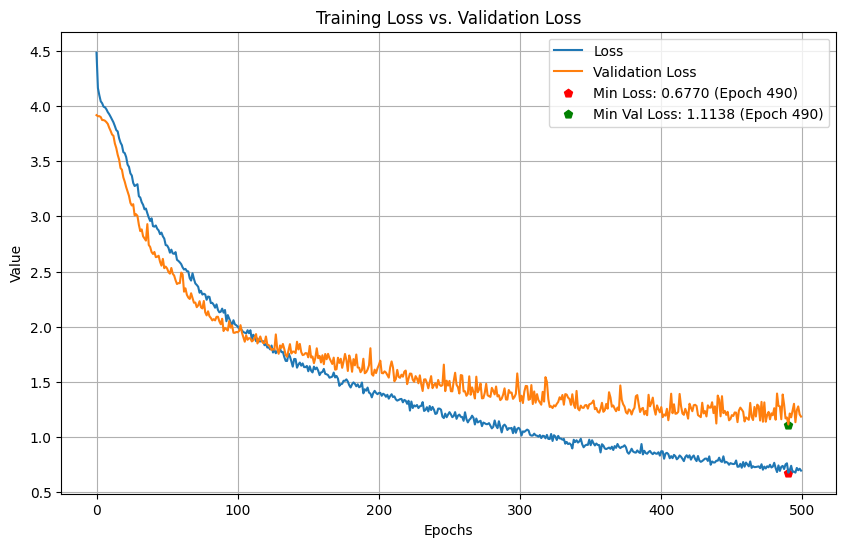

In [131]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

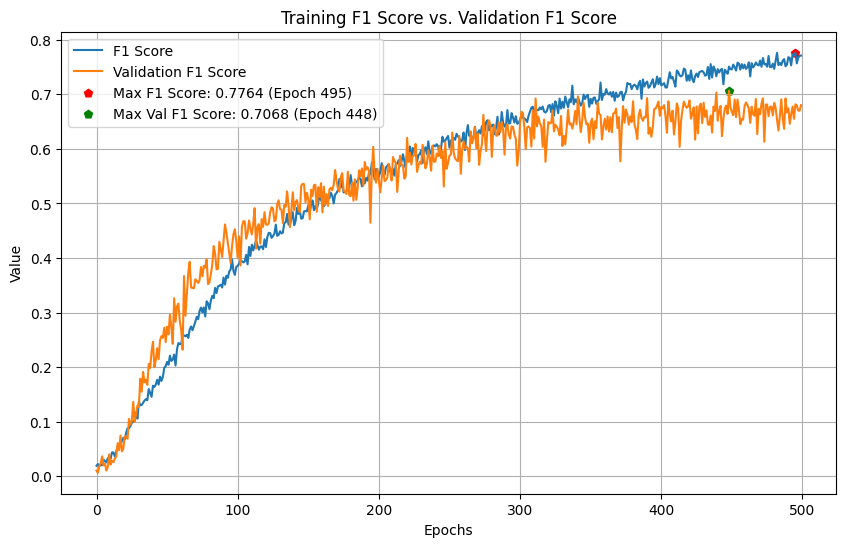

In [132]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [133]:
reconstructed_model = tf.keras.models.load_model("3 1D CNN Trial 718")

In [134]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 126, 175)          349300    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 63, 175)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 61, 50)            26300     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 30, 50)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 29, 75)            7575      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 14, 75)          

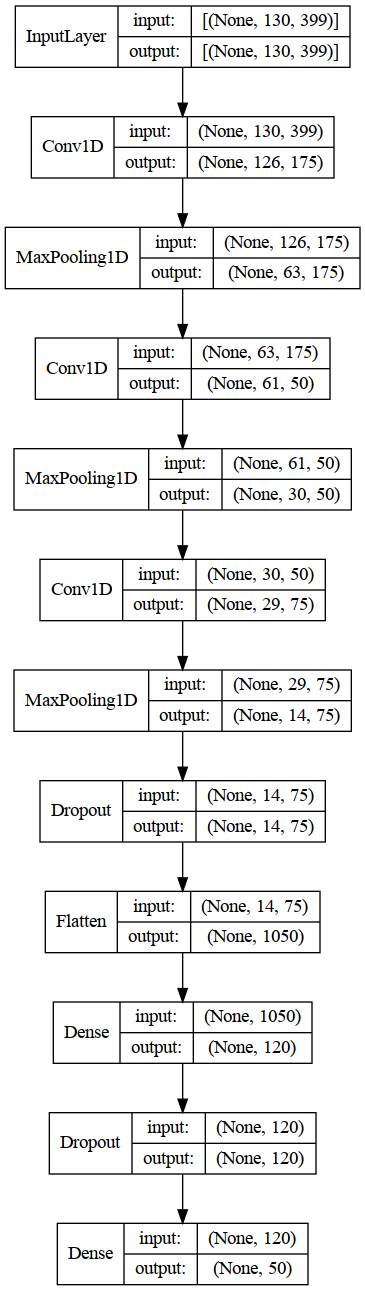

In [135]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

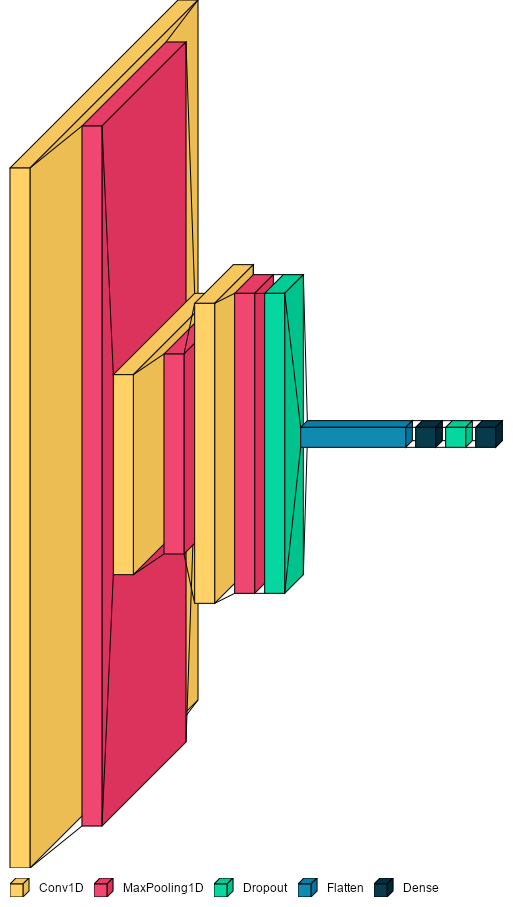

In [136]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [137]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 14ms/step - loss: 1.1519 - f1_score: 0.7068


[1.1518529653549194, 0.7067626118659973]

In [138]:
reconstructed_model.evaluate(Xtrain, Ytrain, batch_size=96)

28/28 [==============================] - 1s 27ms/step - loss: 0.1865 - f1_score: 0.9680


[0.18647992610931396, 0.967958390712738]

In [139]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.667     1.000     0.800         6
  BASKETBALL      0.667     1.000     0.800        10
         BEE      0.429     0.600     0.500        10
        BELT      1.000     1.000     1.000         4
        BITE      0.667     0.750     0.706         8
   BREAKFAST      0.600     0.500     0.545         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      0.500     0.333     0.400         6
    CONFUSED      0.667     0.667     0.667         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.300     0.500     0.375         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      0.600     0.375     0.462         8
     DEVELOP      0.333     0.500     0.400         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.857    

## Hyperparameter Tuning 1 1D CNN Layer + 1 GRU

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_2511190/3109640001.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='elu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[5, 10, 15, 20],
                       default=20,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[5, 10, 15, 20],
                default=20,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(
            GRU(units=hp.Int('units_1',
                             min_value=50,
                             max_value=200,
                             step=25,
                             default=100),
                return_sequences=False,
                kernel_regularizer=regularizers.l2(
                    hp.Float('regularizer',
                             min_value=1e-4,
                             max_value=1e-2,
                             sampling='LOG',
                             default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='1_1D_CNN+1_GRU',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_1D_CNN+1_GRU/tuner0.json


In [122]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
dense_activation (Choice)
{'default': 'elu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
pool_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (

In [123]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [125]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 19m 34s]
val_f1_score: 0.5111344456672668

Best val_f1_score So Far: 0.7555990815162659
Total elapsed time: 04h 49m 53s
INFO:tensorflow:Oracle triggered exit


In [126]:
best_model = tuner.get_best_models(num_models=10)[0]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [127]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 121, 200)          798200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 200)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 200)           0         
                                                                 
 gru (GRU)                   (None, 125)               122625    
                                                                 
 dropout_1 (Dropout)         (None, 125)               0         
                                                                 
 dense (Dense)               (None, 110)               13860     
                                                        

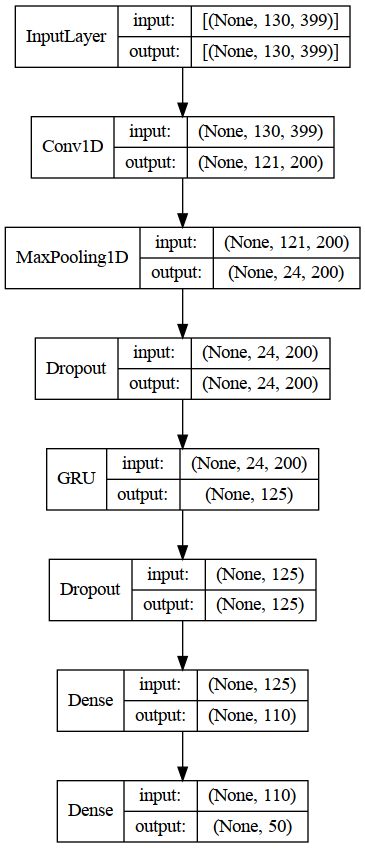

In [128]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [129]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_1D_CNN+1_GRU
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: elu
filters_1: 200
kernel_1: 10
pool_1: 5
dropout_1: 0.65
units_1: 125
regularizer: 0.0034365682734906543
dropout_2: 0.1
units_2: 110
learning_rate: 0.00015386971155916857
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0711
Score: 0.7555990815162659

Trial 0598 summary
Hyperparameters:
dense_activation: elu
filters_1: 100
kernel_1: 5
pool_1: 15
dropout_1: 0.4
units_1: 175
regularizer: 0.002613956776855358
dropout_2: 0.6000000000000001
units_2: 80
learning_rate: 0.0008380093243360302
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0593
Score: 0.7111110687255859

Trial 0593 summary
Hyperparameters:
dense_activation: elu
filters_1: 100
kernel_1: 5
pool_1: 15
dropout_1: 0.4
units_1: 175
r

In [130]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 1.1833 - f1_score: 0.7556


In [131]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 14ms/step - loss: 0.1752 - f1_score: 0.9928


In [133]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.625     0.500     0.556        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.500     0.667         8
   BREAKFAST      0.545     1.000     0.706         6
      CANCER      0.571     1.000     0.727         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      0.833     0.833     0.833         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      1.000     1.000     1.000         8
         DOG      0.714    

In [134]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [135]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 GRU/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [139]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 8s 116ms/step - loss: 4.8754 - f1_score: 0.0170 - val_loss: 4.7783 - val_f1_score: 0.0040
Epoch 2/500
28/28 [==============================] - 2s 89ms/step - loss: 4.8321 - f1_score: 0.0160 - val_loss: 4.7571 - val_f1_score: 4.8780e-04
Epoch 3/500
28/28 [==============================] - 2s 89ms/step - loss: 4.7829 - f1_score: 0.0199 - val_loss: 4.7014 - val_f1_score: 0.0017
Epoch 4/500
28/28 [==============================] - 2s 89ms/step - loss: 4.7313 - f1_score: 0.0134 - val_loss: 4.6746 - val_f1_score: 0.0010
Epoch 5/500
28/28 [==============================] - 3s 91ms/step - loss: 4.6865 - f1_score: 0.0133 - val_loss: 4.6513 - val_f1_score: 9.8160e-04
Epoch 6/500
28/28 [==============================] - 3s 92ms/step - loss: 4.6553 - f1_score: 0.0161 - val_loss: 4.5905 - val_f1_score: 0.0012
Epoch 7/500
28/28 [==============================] - 3s 92ms/step - loss: 4.6279 - f1_score: 0.0145 - val

28/28 [==============================] - 3s 96ms/step - loss: 1.9531 - f1_score: 0.4799 - val_loss: 2.0727 - val_f1_score: 0.4633
Epoch 59/500
28/28 [==============================] - 3s 95ms/step - loss: 1.9263 - f1_score: 0.4853 - val_loss: 2.0275 - val_f1_score: 0.4611
Epoch 60/500
28/28 [==============================] - 3s 95ms/step - loss: 1.8807 - f1_score: 0.4852 - val_loss: 2.0393 - val_f1_score: 0.4603
Epoch 61/500
28/28 [==============================] - 3s 95ms/step - loss: 1.8595 - f1_score: 0.4984 - val_loss: 1.9622 - val_f1_score: 0.4850
Epoch 62/500
28/28 [==============================] - 3s 95ms/step - loss: 1.8206 - f1_score: 0.5208 - val_loss: 1.9954 - val_f1_score: 0.4669
Epoch 63/500
28/28 [==============================] - 3s 94ms/step - loss: 1.8147 - f1_score: 0.5108 - val_loss: 1.9593 - val_f1_score: 0.4445
Epoch 64/500
28/28 [==============================] - 3s 95ms/step - loss: 1.7875 - f1_score: 0.5181 - val_loss: 2.0338 - val_f1_score: 0.4215
Epoch 65/500

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 410ms/step - loss: 0.6458 - f1_score: 0.8391 - val_loss: 1.2540 - val_f1_score: 0.7325
Epoch 141/500
28/28 [==============================] - 3s 92ms/step - loss: 0.6265 - f1_score: 0.8530 - val_loss: 1.2280 - val_f1_score: 0.7211
Epoch 142/500
28/28 [==============================] - 3s 92ms/step - loss: 0.6123 - f1_score: 0.8548 - val_loss: 1.2046 - val_f1_score: 0.7156
Epoch 143/500
28/28 [==============================] - 3s 93ms/step - loss: 0.6045 - f1_score: 0.8506 - val_loss: 1.2689 - val_f1_score: 0.7089
Epoch 144/500
28/28 [==============================] - ETA: 0s - loss: 0.6073 - f1_score: 0.8446

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 20s 721ms/step - loss: 0.6073 - f1_score: 0.8446 - val_loss: 1.2252 - val_f1_score: 0.7341
Epoch 145/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5927 - f1_score: 0.8584 - val_loss: 1.2341 - val_f1_score: 0.7126
Epoch 146/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5843 - f1_score: 0.8604 - val_loss: 1.2315 - val_f1_score: 0.7309
Epoch 147/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5981 - f1_score: 0.8511 - val_loss: 1.2813 - val_f1_score: 0.7230
Epoch 148/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5689 - f1_score: 0.8627 - val_loss: 1.2607 - val_f1_score: 0.6924
Epoch 149/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5764 - f1_score: 0.8627 - val_loss: 1.2997 - val_f1_score: 0.7133
Epoch 150/500
28/28 [==============================] - ETA: 0s - loss: 0.5595 - f1_score: 0.8701

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 375ms/step - loss: 0.5595 - f1_score: 0.8701 - val_loss: 1.1762 - val_f1_score: 0.7452
Epoch 151/500
28/28 [==============================] - 3s 90ms/step - loss: 0.5641 - f1_score: 0.8598 - val_loss: 1.2248 - val_f1_score: 0.7034
Epoch 152/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5628 - f1_score: 0.8636 - val_loss: 1.2137 - val_f1_score: 0.7283
Epoch 153/500
28/28 [==============================] - 3s 93ms/step - loss: 0.5495 - f1_score: 0.8650 - val_loss: 1.1652 - val_f1_score: 0.7284
Epoch 154/500
28/28 [==============================] - 3s 94ms/step - loss: 0.5318 - f1_score: 0.8770 - val_loss: 1.2373 - val_f1_score: 0.7197
Epoch 155/500
28/28 [==============================] - ETA: 0s - loss: 0.5279 - f1_score: 0.8794

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 15s 554ms/step - loss: 0.5279 - f1_score: 0.8794 - val_loss: 1.2332 - val_f1_score: 0.7586
Epoch 156/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5263 - f1_score: 0.8710 - val_loss: 1.2273 - val_f1_score: 0.7364
Epoch 157/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5213 - f1_score: 0.8725 - val_loss: 1.2792 - val_f1_score: 0.7255
Epoch 158/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5025 - f1_score: 0.8920 - val_loss: 1.1806 - val_f1_score: 0.7355
Epoch 159/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5187 - f1_score: 0.8761 - val_loss: 1.2087 - val_f1_score: 0.7443
Epoch 160/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5010 - f1_score: 0.8840 - val_loss: 1.2334 - val_f1_score: 0.7374
Epoch 161/500
28/28 [==============================] - 3s 92ms/step - loss: 0.5120 - f1_score: 0.8711 - val_loss: 1.1864 - val_f1_score: 0.7518
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 383ms/step - loss: 0.4685 - f1_score: 0.8950 - val_loss: 1.2458 - val_f1_score: 0.7626
Epoch 166/500
28/28 [==============================] - 3s 89ms/step - loss: 0.4676 - f1_score: 0.8985 - val_loss: 1.2624 - val_f1_score: 0.7143
Epoch 167/500
28/28 [==============================] - 3s 91ms/step - loss: 0.4739 - f1_score: 0.8898 - val_loss: 1.2561 - val_f1_score: 0.7155
Epoch 168/500
28/28 [==============================] - 3s 92ms/step - loss: 0.4588 - f1_score: 0.8986 - val_loss: 1.2502 - val_f1_score: 0.7150
Epoch 169/500
28/28 [==============================] - 3s 92ms/step - loss: 0.4637 - f1_score: 0.8945 - val_loss: 1.2004 - val_f1_score: 0.7350
Epoch 170/500
28/28 [==============================] - 3s 93ms/step - loss: 0.4600 - f1_score: 0.8878 - val_loss: 1.2627 - val_f1_score: 0.6911
Epoch 171/500
28/28 [==============================] - 3s 93ms/step - loss: 0.4346 - f1_score: 0.9018 - val_loss: 1.2015 - val_f1_score: 0.7246
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 407ms/step - loss: 0.3128 - f1_score: 0.9419 - val_loss: 1.1852 - val_f1_score: 0.7679
Epoch 208/500
28/28 [==============================] - 3s 90ms/step - loss: 0.3150 - f1_score: 0.9359 - val_loss: 1.3395 - val_f1_score: 0.7050
Epoch 209/500
28/28 [==============================] - 3s 91ms/step - loss: 0.3027 - f1_score: 0.9436 - val_loss: 1.3657 - val_f1_score: 0.6965
Epoch 210/500
28/28 [==============================] - 3s 92ms/step - loss: 0.3267 - f1_score: 0.9340 - val_loss: 1.2864 - val_f1_score: 0.7252
Epoch 211/500
28/28 [==============================] - 3s 93ms/step - loss: 0.3116 - f1_score: 0.9312 - val_loss: 1.2950 - val_f1_score: 0.7130
Epoch 212/500
28/28 [==============================] - 3s 93ms/step - loss: 0.3078 - f1_score: 0.9371 - val_loss: 1.2660 - val_f1_score: 0.7409
Epoch 213/500
28/28 [==============================] - 3s 93ms/step - loss: 0.3053 - f1_score: 0.9391 - val_loss: 1.2976 - val_f1_score: 0.7433
Epoc

Epoch 264/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2186 - f1_score: 0.9555 - val_loss: 1.2867 - val_f1_score: 0.7443
Epoch 265/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2089 - f1_score: 0.9649 - val_loss: 1.3429 - val_f1_score: 0.7440
Epoch 266/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1893 - f1_score: 0.9730 - val_loss: 1.3364 - val_f1_score: 0.7308
Epoch 267/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1934 - f1_score: 0.9666 - val_loss: 1.4209 - val_f1_score: 0.7139
Epoch 268/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2134 - f1_score: 0.9584 - val_loss: 1.3442 - val_f1_score: 0.7114
Epoch 269/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2028 - f1_score: 0.9642 - val_loss: 1.2705 - val_f1_score: 0.7401
Epoch 270/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2134 - f1_score: 0.9631 - val_loss: 1.3733 - val_f1_score:

Epoch 321/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1532 - f1_score: 0.9768 - val_loss: 1.4065 - val_f1_score: 0.7406
Epoch 322/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1558 - f1_score: 0.9711 - val_loss: 1.5721 - val_f1_score: 0.6840
Epoch 323/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1581 - f1_score: 0.9754 - val_loss: 1.5725 - val_f1_score: 0.6922
Epoch 324/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1494 - f1_score: 0.9740 - val_loss: 1.4584 - val_f1_score: 0.7107
Epoch 325/500
28/28 [==============================] - 3s 99ms/step - loss: 0.1593 - f1_score: 0.9733 - val_loss: 1.5596 - val_f1_score: 0.6731
Epoch 326/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1525 - f1_score: 0.9729 - val_loss: 1.3781 - val_f1_score: 0.7258
Epoch 327/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1540 - f1_score: 0.9723 - val_loss: 1.4309 - val_f1_score:

Epoch 378/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1093 - f1_score: 0.9867 - val_loss: 1.4339 - val_f1_score: 0.7161
Epoch 379/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1045 - f1_score: 0.9860 - val_loss: 1.4921 - val_f1_score: 0.7220
Epoch 380/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1204 - f1_score: 0.9799 - val_loss: 1.4972 - val_f1_score: 0.7182
Epoch 381/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1203 - f1_score: 0.9819 - val_loss: 1.5162 - val_f1_score: 0.7136
Epoch 382/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1268 - f1_score: 0.9774 - val_loss: 1.5175 - val_f1_score: 0.7205
Epoch 383/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1306 - f1_score: 0.9770 - val_loss: 1.7108 - val_f1_score: 0.6754
Epoch 384/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1192 - f1_score: 0.9795 - val_loss: 1.5128 - val_f1_score:

Epoch 435/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1247 - f1_score: 0.9778 - val_loss: 1.5312 - val_f1_score: 0.7410
Epoch 436/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1209 - f1_score: 0.9774 - val_loss: 1.8115 - val_f1_score: 0.6875
Epoch 437/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1071 - f1_score: 0.9840 - val_loss: 1.6899 - val_f1_score: 0.6823
Epoch 438/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1052 - f1_score: 0.9847 - val_loss: 1.5622 - val_f1_score: 0.6955
Epoch 439/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1032 - f1_score: 0.9798 - val_loss: 1.5610 - val_f1_score: 0.6990
Epoch 440/500
28/28 [==============================] - 3s 96ms/step - loss: 0.0996 - f1_score: 0.9859 - val_loss: 1.6430 - val_f1_score: 0.6936
Epoch 441/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1026 - f1_score: 0.9825 - val_loss: 1.6960 - val_f1_score:

Epoch 492/500
28/28 [==============================] - 3s 95ms/step - loss: 0.0934 - f1_score: 0.9810 - val_loss: 1.6443 - val_f1_score: 0.7043
Epoch 493/500
28/28 [==============================] - 3s 95ms/step - loss: 0.0788 - f1_score: 0.9902 - val_loss: 1.4690 - val_f1_score: 0.7273
Epoch 494/500
28/28 [==============================] - 3s 94ms/step - loss: 0.0915 - f1_score: 0.9852 - val_loss: 1.7000 - val_f1_score: 0.6735
Epoch 495/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1065 - f1_score: 0.9801 - val_loss: 1.6182 - val_f1_score: 0.7010
Epoch 496/500
28/28 [==============================] - 3s 94ms/step - loss: 0.0997 - f1_score: 0.9826 - val_loss: 1.9312 - val_f1_score: 0.6735
Epoch 497/500
28/28 [==============================] - 3s 95ms/step - loss: 0.0830 - f1_score: 0.9905 - val_loss: 1.6879 - val_f1_score: 0.6940
Epoch 498/500
28/28 [==============================] - 3s 96ms/step - loss: 0.0906 - f1_score: 0.9864 - val_loss: 1.8039 - val_f1_score:

In [140]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.571     0.667     0.615         6
  BASKETBALL      1.000     0.900     0.947        10
         BEE      0.556     0.500     0.526        10
        BELT      0.500     1.000     0.667         4
        BITE      1.000     0.125     0.222         8
   BREAKFAST      0.571     0.667     0.615         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.182     0.333     0.235         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.444     0.500     0.471         8
         DOG      0.667    

In [141]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1DCNN + 1 GRU/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [131]:
hist_df = pd.read_csv('1 1DCNN + 1 GRU/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.099662  0.982627  1.931195      0.673482
496  0.082953  0.990497  1.687911      0.694009
497  0.090602  0.986427  1.803858      0.663592
498  0.106971  0.977117  1.564104      0.711779
499  0.106982  0.979273  1.697142      0.672247

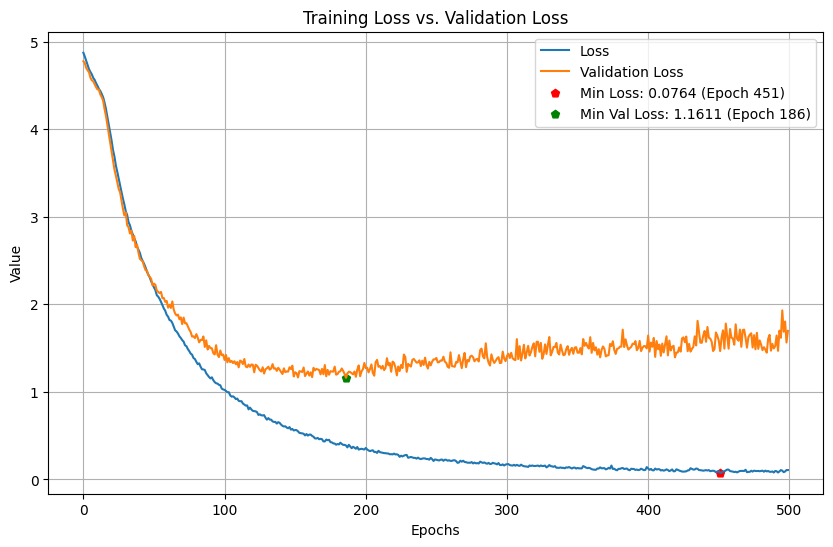

In [132]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

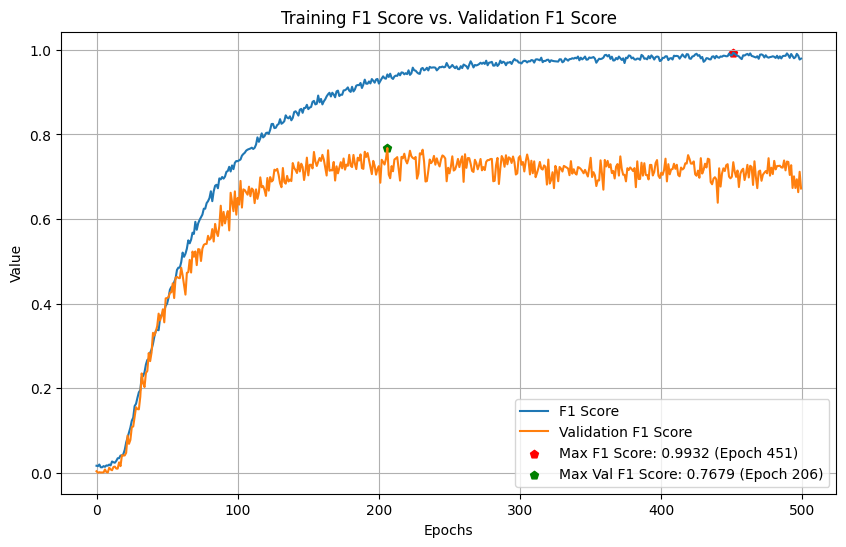

In [133]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [134]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 GRU")

In [145]:
reconstructed_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 121, 200)          798200    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 24, 200)          0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 24, 200)           0         
                                                                 
 gru_4 (GRU)                 (None, 125)               122625    
                                                                 
 dropout_9 (Dropout)         (None, 125)               0         
                                                                 
 dense_8 (Dense)             (None, 110)               13860     
                                                      

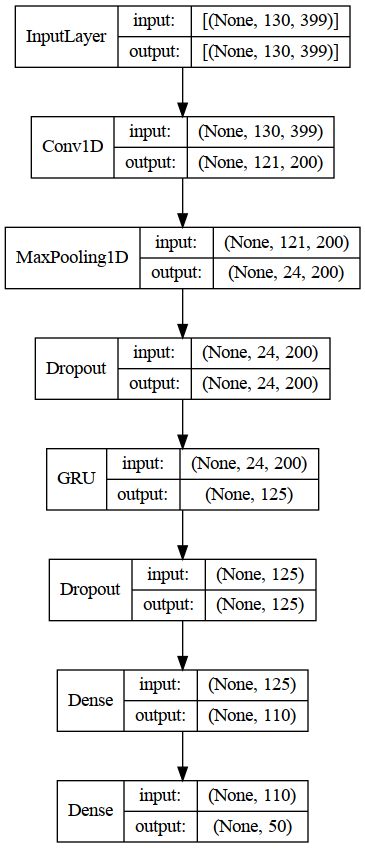

In [146]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

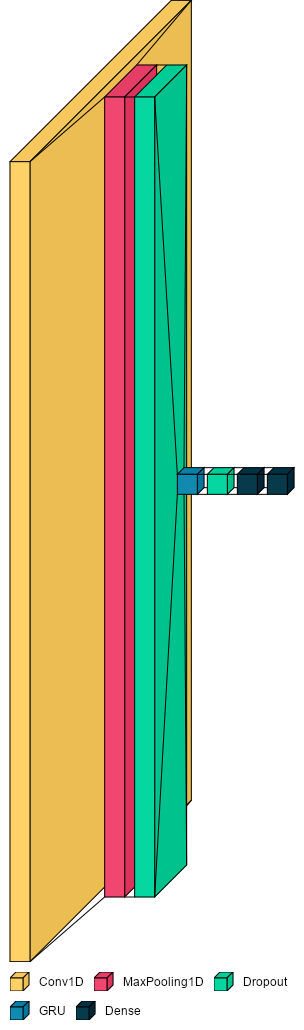

In [135]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [147]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 12ms/step - loss: 1.1852 - f1_score: 0.7679


[1.185200810432434, 0.7678741216659546]

In [149]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 15ms/step - loss: 0.1628 - f1_score: 0.9936


[0.16277065873146057, 0.9936215877532959]

In [150]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.571     0.667     0.615         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.800     0.889        10
        BELT      0.571     1.000     0.727         4
        BITE      0.857     0.750     0.800         8
   BREAKFAST      0.750     1.000     0.857         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.167     0.333     0.222         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.889     1.000     0.941         8
         DOG      0.750    

In [119]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 GRU Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [127]:
act_function = 'mish'

model = Sequential()
model.add(
    Conv1D(filters=200,
           kernel_size=10,
           activation=act_function,
           input_shape=(130, 399)))
model.add(MaxPooling1D(pool_size=5))
model.add(Dropout(.65))
model.add(
    GRU(units=125,
        return_sequences=False,
        kernel_regularizer=regularizers.l2(.0034365682734906543)))
model.add(Dropout(.1))
model.add(Dense(units=110, activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.00015386971155916857),
              loss='categorical_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 121, 200)          798200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 200)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 200)           0         
                                                                 
 gru_1 (GRU)                 (None, 125)               122625    
                                                                 
 dropout_3 (Dropout)         (None, 125)               0         
                                                                 
 dense_2 (Dense)             (None, 110)               13860     
                                                      

Epoch 105/500
28/28 [==============================] - 3s 110ms/step - loss: 1.4430 - f1_score: 0.5614 - val_loss: 1.7217 - val_f1_score: 0.5091
Epoch 106/500
28/28 [==============================] - 3s 115ms/step - loss: 1.4168 - f1_score: 0.5595 - val_loss: 1.7483 - val_f1_score: 0.4750
Epoch 107/500
28/28 [==============================] - 3s 111ms/step - loss: 1.4074 - f1_score: 0.5612 - val_loss: 1.6665 - val_f1_score: 0.5092
Epoch 108/500
28/28 [==============================] - 3s 125ms/step - loss: 1.3936 - f1_score: 0.5673 - val_loss: 1.7648 - val_f1_score: 0.4862
Epoch 109/500
28/28 [==============================] - 4s 133ms/step - loss: 1.3964 - f1_score: 0.5649 - val_loss: 1.7837 - val_f1_score: 0.4817
Epoch 110/500
28/28 [==============================] - 3s 117ms/step - loss: 1.4171 - f1_score: 0.5555 - val_loss: 1.7419 - val_f1_score: 0.4980
Epoch 111/500
28/28 [==============================] - 3s 113ms/step - loss: 1.3875 - f1_score: 0.5594 - val_loss: 1.6135 - val_f1

28/28 [==============================] - 3s 99ms/step - loss: 0.7031 - f1_score: 0.7871 - val_loss: 1.3250 - val_f1_score: 0.6866
Epoch 218/500
28/28 [==============================] - 3s 99ms/step - loss: 0.7252 - f1_score: 0.7753 - val_loss: 1.3944 - val_f1_score: 0.6531
Epoch 219/500
28/28 [==============================] - 3s 99ms/step - loss: 0.6891 - f1_score: 0.7888 - val_loss: 1.5129 - val_f1_score: 0.6269
Epoch 220/500
28/28 [==============================] - 3s 99ms/step - loss: 0.7175 - f1_score: 0.7737 - val_loss: 1.3621 - val_f1_score: 0.6540
Epoch 221/500
28/28 [==============================] - 3s 99ms/step - loss: 0.6453 - f1_score: 0.8077 - val_loss: 1.3664 - val_f1_score: 0.6595
Epoch 222/500
28/28 [==============================] - 3s 99ms/step - loss: 0.6778 - f1_score: 0.7920 - val_loss: 1.3366 - val_f1_score: 0.6591
Epoch 223/500
28/28 [==============================] - 3s 99ms/step - loss: 0.6740 - f1_score: 0.7912 - val_loss: 1.3119 - val_f1_score: 0.6694
Epoch 

Epoch 274/500
28/28 [==============================] - 3s 106ms/step - loss: 0.5037 - f1_score: 0.8499 - val_loss: 1.3678 - val_f1_score: 0.6979
Epoch 275/500
28/28 [==============================] - 3s 107ms/step - loss: 0.5018 - f1_score: 0.8618 - val_loss: 1.3652 - val_f1_score: 0.6723
Epoch 276/500
28/28 [==============================] - 3s 103ms/step - loss: 0.4851 - f1_score: 0.8703 - val_loss: 1.4128 - val_f1_score: 0.6756
Epoch 277/500
28/28 [==============================] - 3s 124ms/step - loss: 0.4764 - f1_score: 0.8673 - val_loss: 1.4115 - val_f1_score: 0.6895
Epoch 278/500
28/28 [==============================] - 3s 110ms/step - loss: 0.5047 - f1_score: 0.8549 - val_loss: 1.4242 - val_f1_score: 0.6908
Epoch 279/500
28/28 [==============================] - 3s 105ms/step - loss: 0.5050 - f1_score: 0.8516 - val_loss: 1.4028 - val_f1_score: 0.6560
Epoch 280/500
28/28 [==============================] - 3s 107ms/step - loss: 0.5006 - f1_score: 0.8541 - val_loss: 1.4150 - val_f1

28/28 [==============================] - 3s 111ms/step - loss: 0.3200 - f1_score: 0.9145 - val_loss: 1.5062 - val_f1_score: 0.6629
Epoch 387/500
28/28 [==============================] - 3s 113ms/step - loss: 0.2909 - f1_score: 0.9305 - val_loss: 1.4757 - val_f1_score: 0.6767
Epoch 388/500
28/28 [==============================] - 3s 114ms/step - loss: 0.2915 - f1_score: 0.9247 - val_loss: 1.4855 - val_f1_score: 0.6463
Epoch 389/500
28/28 [==============================] - 3s 118ms/step - loss: 0.2977 - f1_score: 0.9234 - val_loss: 1.5354 - val_f1_score: 0.6567
Epoch 390/500
28/28 [==============================] - 3s 117ms/step - loss: 0.2792 - f1_score: 0.9379 - val_loss: 1.5325 - val_f1_score: 0.6766
Epoch 391/500
28/28 [==============================] - 3s 117ms/step - loss: 0.2833 - f1_score: 0.9277 - val_loss: 1.5106 - val_f1_score: 0.6972
Epoch 392/500
28/28 [==============================] - 3s 119ms/step - loss: 0.3040 - f1_score: 0.9262 - val_loss: 1.5272 - val_f1_score: 0.6648

28/28 [==============================] - 3s 105ms/step - loss: 0.2109 - f1_score: 0.9474 - val_loss: 1.6700 - val_f1_score: 0.6818
Epoch 499/500
28/28 [==============================] - 3s 103ms/step - loss: 0.2047 - f1_score: 0.9558 - val_loss: 1.6161 - val_f1_score: 0.6914
Epoch 500/500
28/28 [==============================] - 3s 105ms/step - loss: 0.1954 - f1_score: 0.9606 - val_loss: 1.5150 - val_f1_score: 0.7061


In [128]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     0.900     0.947        10
         BEE      0.571     0.400     0.471        10
        BELT      1.000     1.000     1.000         4
        BITE      0.600     0.375     0.462         8
   BREAKFAST      1.000     0.333     0.500         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      0.600     1.000     0.750         6
    CONFUSED      0.429     1.000     0.600         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.500     0.333     0.400         6
      DECIDE      0.750     1.000     0.857         6
      DEMAND      0.750     0.750     0.750         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.667     0.750     0.706         8
         DOG      0.571    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 GRU Mish")

In [130]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 121, 200)          798200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 200)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 200)           0         
                                                                 
 gru (GRU)                   (None, 125)               122625    
                                                                 
 dropout_1 (Dropout)         (None, 125)               0         
                                                                 
 dense (Dense)               (None, 110)               13860     
                                                        

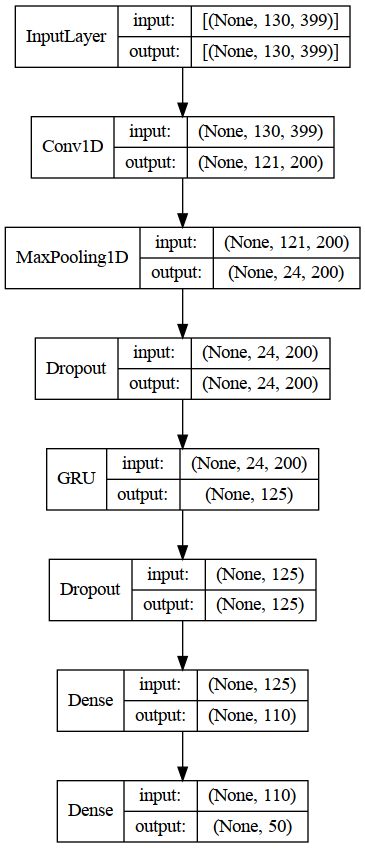

In [131]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [132]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 16ms/step - loss: 1.3768 - f1_score: 0.7321


[1.3768343925476074, 0.7320820689201355]

In [133]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 15ms/step - loss: 0.1364 - f1_score: 0.9908


[0.1363527923822403, 0.9908027648925781]

In [134]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.800     0.889        10
        BELT      1.000     1.000     1.000         4
        BITE      0.857     0.750     0.800         8
   BREAKFAST      1.000     1.000     1.000         6
      CANCER      0.714     0.625     0.667         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     0.500     0.667         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.800     0.500     0.615         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.833     0.625     0.714         8
         DOG      0.375    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1 1D-CNN + 1 GRU Trial 593

In [ ]:
best_model = tuner.get_best_models(num_models=3)[2]

In [123]:
best_model.evaluate(Xtrain, Ytrain)

2023-09-10 14:31:37.264552: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


84/84 [==============================] - 2s 13ms/step - loss: 0.3788 - f1_score: 0.9373


[0.378775417804718, 0.937265157699585]

In [124]:
best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 14ms/step - loss: 1.3141 - f1_score: 0.7039


[1.3140639066696167, 0.7038748860359192]

In [123]:
bestHP = tuner.get_best_hyperparameters(num_trials=3)[2]

In [124]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1D-CNN + 1 GRU Trial 593/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [251]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 6s 91ms/step - loss: 4.5026 - f1_score: 0.0197 - val_loss: 4.3038 - val_f1_score: 4.9231e-04
Epoch 2/500
28/28 [==============================] - 2s 55ms/step - loss: 4.3479 - f1_score: 0.0200 - val_loss: 4.2194 - val_f1_score: 0.0018
Epoch 3/500
28/28 [==============================] - 2s 58ms/step - loss: 4.2523 - f1_score: 0.0223 - val_loss: 4.1505 - val_f1_score: 0.0050
Epoch 4/500
28/28 [==============================] - 2s 56ms/step - loss: 4.1755 - f1_score: 0.0249 - val_loss: 4.0681 - val_f1_score: 0.0044
Epoch 5/500
28/28 [==============================] - 2s 56ms/step - loss: 4.0646 - f1_score: 0.0324 - val_loss: 3.8941 - val_f1_score: 0.0204
Epoch 6/500
28/28 [==============================] - 2s 58ms/step - loss: 3.8827 - f1_score: 0.0398 - val_loss: 3.6637 - val_f1_score: 0.0349
Epoch 7/500
28/28 [==============================] - 2s 57ms/step - loss: 3.7161 - f1_score: 0.0449 - val_loss

28/28 [==============================] - 2s 78ms/step - loss: 1.2256 - f1_score: 0.6304 - val_loss: 1.5477 - val_f1_score: 0.5917
Epoch 59/500
28/28 [==============================] - 2s 70ms/step - loss: 1.1492 - f1_score: 0.6578 - val_loss: 1.4918 - val_f1_score: 0.5815
Epoch 60/500
28/28 [==============================] - 2s 78ms/step - loss: 1.1265 - f1_score: 0.6838 - val_loss: 1.6393 - val_f1_score: 0.5550
Epoch 61/500
28/28 [==============================] - 2s 77ms/step - loss: 1.1370 - f1_score: 0.6580 - val_loss: 1.5368 - val_f1_score: 0.5895
Epoch 62/500
28/28 [==============================] - 2s 66ms/step - loss: 1.1079 - f1_score: 0.6663 - val_loss: 1.5117 - val_f1_score: 0.5930
Epoch 63/500
28/28 [==============================] - 2s 62ms/step - loss: 1.1344 - f1_score: 0.6571 - val_loss: 1.4785 - val_f1_score: 0.5789
Epoch 64/500
28/28 [==============================] - 2s 60ms/step - loss: 1.0979 - f1_score: 0.6815 - val_loss: 1.5382 - val_f1_score: 0.5657
Epoch 65/500

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


28/28 [==============================] - 12s 434ms/step - loss: 0.8312 - f1_score: 0.7505 - val_loss: 1.4350 - val_f1_score: 0.6474
Epoch 86/500
28/28 [==============================] - 2s 57ms/step - loss: 0.8528 - f1_score: 0.7604 - val_loss: 1.5866 - val_f1_score: 0.6060
Epoch 87/500
28/28 [==============================] - 2s 59ms/step - loss: 0.8095 - f1_score: 0.7629 - val_loss: 1.4224 - val_f1_score: 0.6413
Epoch 88/500
27/28 [===========================>..] - ETA: 0s - loss: 0.7765 - f1_score: 0.7727

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


28/28 [==============================] - 11s 390ms/step - loss: 0.7791 - f1_score: 0.7727 - val_loss: 1.4189 - val_f1_score: 0.6541
Epoch 89/500
28/28 [==============================] - 2s 57ms/step - loss: 0.8362 - f1_score: 0.7548 - val_loss: 1.4531 - val_f1_score: 0.6369
Epoch 90/500
28/28 [==============================] - 2s 61ms/step - loss: 0.8152 - f1_score: 0.7685 - val_loss: 1.4570 - val_f1_score: 0.6301
Epoch 91/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7666 - f1_score: 0.7823 - val_loss: 1.4095 - val_f1_score: 0.6223
Epoch 92/500
28/28 [==============================] - 2s 60ms/step - loss: 0.7471 - f1_score: 0.7919 - val_loss: 1.4718 - val_f1_score: 0.6113
Epoch 93/500
28/28 [==============================] - 2s 62ms/step - loss: 0.7564 - f1_score: 0.7834 - val_loss: 1.4611 - val_f1_score: 0.6213
Epoch 94/500
28/28 [==============================] - 2s 63ms/step - loss: 0.7425 - f1_score: 0.7895 - val_loss: 1.4524 - val_f1_score: 0.6406
Epoch 95/5

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


28/28 [==============================] - 13s 488ms/step - loss: 0.5128 - f1_score: 0.8573 - val_loss: 1.6154 - val_f1_score: 0.6577
Epoch 136/500
28/28 [==============================] - ETA: 0s - loss: 0.4960 - f1_score: 0.8671

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


28/28 [==============================] - 12s 440ms/step - loss: 0.4960 - f1_score: 0.8671 - val_loss: 1.4869 - val_f1_score: 0.6632
Epoch 137/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5518 - f1_score: 0.8472 - val_loss: 1.6393 - val_f1_score: 0.6143
Epoch 138/500
28/28 [==============================] - 2s 58ms/step - loss: 0.4939 - f1_score: 0.8751 - val_loss: 1.6309 - val_f1_score: 0.5993
Epoch 139/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5241 - f1_score: 0.8593 - val_loss: 1.6808 - val_f1_score: 0.6252
Epoch 140/500
28/28 [==============================] - 2s 58ms/step - loss: 0.5098 - f1_score: 0.8600 - val_loss: 1.6715 - val_f1_score: 0.6255
Epoch 141/500
28/28 [==============================] - 2s 64ms/step - loss: 0.5105 - f1_score: 0.8623 - val_loss: 1.5884 - val_f1_score: 0.6123
Epoch 142/500
28/28 [==============================] - 2s 62ms/step - loss: 0.4901 - f1_score: 0.8766 - val_loss: 1.5430 - val_f1_score: 0.6194
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 593/assets


28/28 [==============================] - 13s 464ms/step - loss: 0.3973 - f1_score: 0.9017 - val_loss: 1.5675 - val_f1_score: 0.6800
Epoch 180/500
28/28 [==============================] - 2s 57ms/step - loss: 0.4172 - f1_score: 0.8893 - val_loss: 1.5735 - val_f1_score: 0.6344
Epoch 181/500
28/28 [==============================] - 2s 57ms/step - loss: 0.4165 - f1_score: 0.8969 - val_loss: 1.5515 - val_f1_score: 0.6333
Epoch 182/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3956 - f1_score: 0.8963 - val_loss: 1.6506 - val_f1_score: 0.6080
Epoch 183/500
28/28 [==============================] - 2s 62ms/step - loss: 0.4075 - f1_score: 0.8995 - val_loss: 1.7261 - val_f1_score: 0.5913
Epoch 184/500
28/28 [==============================] - 2s 63ms/step - loss: 0.3882 - f1_score: 0.9065 - val_loss: 1.7312 - val_f1_score: 0.6148
Epoch 185/500
28/28 [==============================] - 2s 62ms/step - loss: 0.3882 - f1_score: 0.9028 - val_loss: 1.7692 - val_f1_score: 0.5957
Epoc

Epoch 236/500
28/28 [==============================] - 2s 62ms/step - loss: 0.3324 - f1_score: 0.9212 - val_loss: 1.7574 - val_f1_score: 0.6233
Epoch 237/500
28/28 [==============================] - 2s 64ms/step - loss: 0.3523 - f1_score: 0.9154 - val_loss: 2.0156 - val_f1_score: 0.6157
Epoch 238/500
28/28 [==============================] - 2s 64ms/step - loss: 0.3397 - f1_score: 0.9116 - val_loss: 1.9745 - val_f1_score: 0.5853
Epoch 239/500
28/28 [==============================] - 2s 67ms/step - loss: 0.3521 - f1_score: 0.9186 - val_loss: 1.8362 - val_f1_score: 0.6231
Epoch 240/500
28/28 [==============================] - 2s 72ms/step - loss: 0.2942 - f1_score: 0.9365 - val_loss: 1.8064 - val_f1_score: 0.5861
Epoch 241/500
28/28 [==============================] - 2s 73ms/step - loss: 0.3250 - f1_score: 0.9217 - val_loss: 1.9284 - val_f1_score: 0.6134
Epoch 242/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3820 - f1_score: 0.9107 - val_loss: 1.7934 - val_f1_score:

Epoch 293/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3302 - f1_score: 0.9170 - val_loss: 1.8441 - val_f1_score: 0.6395
Epoch 294/500
28/28 [==============================] - 2s 70ms/step - loss: 0.2949 - f1_score: 0.9375 - val_loss: 1.9999 - val_f1_score: 0.5954
Epoch 295/500
28/28 [==============================] - 2s 63ms/step - loss: 0.3079 - f1_score: 0.9278 - val_loss: 2.3189 - val_f1_score: 0.5650
Epoch 296/500
28/28 [==============================] - 2s 67ms/step - loss: 0.2807 - f1_score: 0.9330 - val_loss: 2.1220 - val_f1_score: 0.5979
Epoch 297/500
28/28 [==============================] - 2s 86ms/step - loss: 0.2778 - f1_score: 0.9377 - val_loss: 2.2500 - val_f1_score: 0.5860
Epoch 298/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3079 - f1_score: 0.9283 - val_loss: 2.1351 - val_f1_score: 0.5737
Epoch 299/500
28/28 [==============================] - 2s 82ms/step - loss: 0.2703 - f1_score: 0.9458 - val_loss: 1.9817 - val_f1_score:

Epoch 350/500
28/28 [==============================] - 2s 88ms/step - loss: 0.2637 - f1_score: 0.9382 - val_loss: 2.1073 - val_f1_score: 0.5850
Epoch 351/500
28/28 [==============================] - 2s 73ms/step - loss: 0.2905 - f1_score: 0.9283 - val_loss: 2.2542 - val_f1_score: 0.5739
Epoch 352/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2581 - f1_score: 0.9449 - val_loss: 2.0730 - val_f1_score: 0.5950
Epoch 353/500
28/28 [==============================] - 2s 68ms/step - loss: 0.2589 - f1_score: 0.9442 - val_loss: 2.3394 - val_f1_score: 0.5650
Epoch 354/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3225 - f1_score: 0.9285 - val_loss: 2.0943 - val_f1_score: 0.5940
Epoch 355/500
28/28 [==============================] - 2s 81ms/step - loss: 0.2835 - f1_score: 0.9330 - val_loss: 2.3843 - val_f1_score: 0.5773
Epoch 356/500
28/28 [==============================] - 2s 89ms/step - loss: 0.2822 - f1_score: 0.9404 - val_loss: 2.1701 - val_f1_score:

Epoch 407/500
28/28 [==============================] - 2s 81ms/step - loss: 0.2537 - f1_score: 0.9454 - val_loss: 2.4902 - val_f1_score: 0.5359
Epoch 408/500
28/28 [==============================] - 2s 84ms/step - loss: 0.2730 - f1_score: 0.9345 - val_loss: 2.0409 - val_f1_score: 0.5892
Epoch 409/500
28/28 [==============================] - 2s 85ms/step - loss: 0.2292 - f1_score: 0.9523 - val_loss: 2.2945 - val_f1_score: 0.5590
Epoch 410/500
28/28 [==============================] - 2s 83ms/step - loss: 0.2567 - f1_score: 0.9448 - val_loss: 2.2179 - val_f1_score: 0.5550
Epoch 411/500
28/28 [==============================] - 2s 80ms/step - loss: 0.2429 - f1_score: 0.9461 - val_loss: 2.2067 - val_f1_score: 0.5648
Epoch 412/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2458 - f1_score: 0.9488 - val_loss: 2.1561 - val_f1_score: 0.5834
Epoch 413/500
28/28 [==============================] - 2s 63ms/step - loss: 0.2421 - f1_score: 0.9457 - val_loss: 2.3883 - val_f1_score:

Epoch 464/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2524 - f1_score: 0.9482 - val_loss: 2.2352 - val_f1_score: 0.5437
Epoch 465/500
28/28 [==============================] - 2s 72ms/step - loss: 0.2311 - f1_score: 0.9527 - val_loss: 2.1636 - val_f1_score: 0.6235
Epoch 466/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2159 - f1_score: 0.9546 - val_loss: 2.4447 - val_f1_score: 0.5641
Epoch 467/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2266 - f1_score: 0.9562 - val_loss: 2.1904 - val_f1_score: 0.5488
Epoch 468/500
28/28 [==============================] - 2s 64ms/step - loss: 0.2176 - f1_score: 0.9526 - val_loss: 2.3408 - val_f1_score: 0.5366
Epoch 469/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2339 - f1_score: 0.9502 - val_loss: 2.3933 - val_f1_score: 0.5529
Epoch 470/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2522 - f1_score: 0.9509 - val_loss: 2.6681 - val_f1_score:

In [252]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.625     1.000     0.769        10
         BEE      0.357     0.500     0.417        10
        BELT      0.500     1.000     0.667         4
        BITE      0.750     0.375     0.500         8
   BREAKFAST      0.667     0.333     0.444         6
      CANCER      0.727     1.000     0.842         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.250     0.333     0.286         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.800     0.500     0.615         8
     DEVELOP      0.286     0.333     0.308         6
      DINNER      0.667     0.500     0.571         8
         DOG      0.429     

In [253]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1D-CNN + 1 GRU Trial 593/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [254]:
hist_df = pd.read_csv('1 1D-CNN + 1 GRU Trial 593/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.198441  0.965655  2.508691      0.564297
496  0.201955  0.962449  2.273557      0.569904
497  0.215270  0.955840  2.158836      0.598835
498  0.205172  0.962075  2.276037      0.587324
499  0.220950  0.952867  2.240231      0.571802

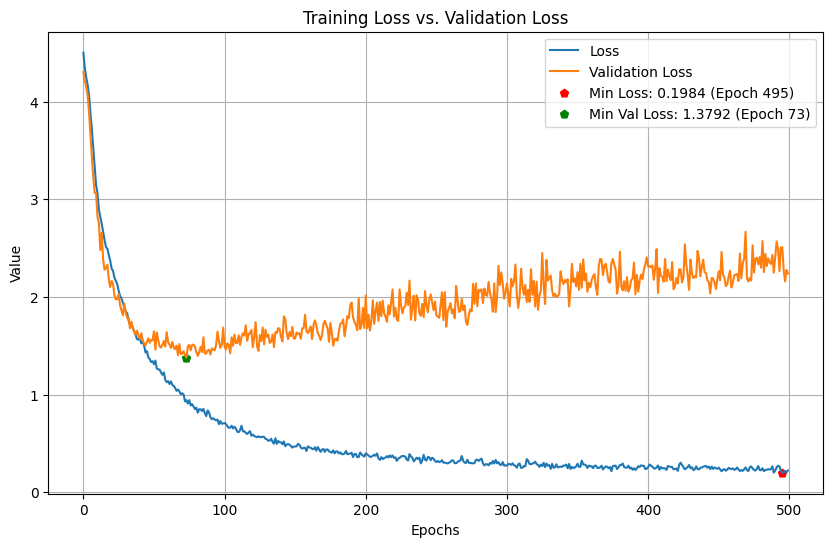

In [255]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

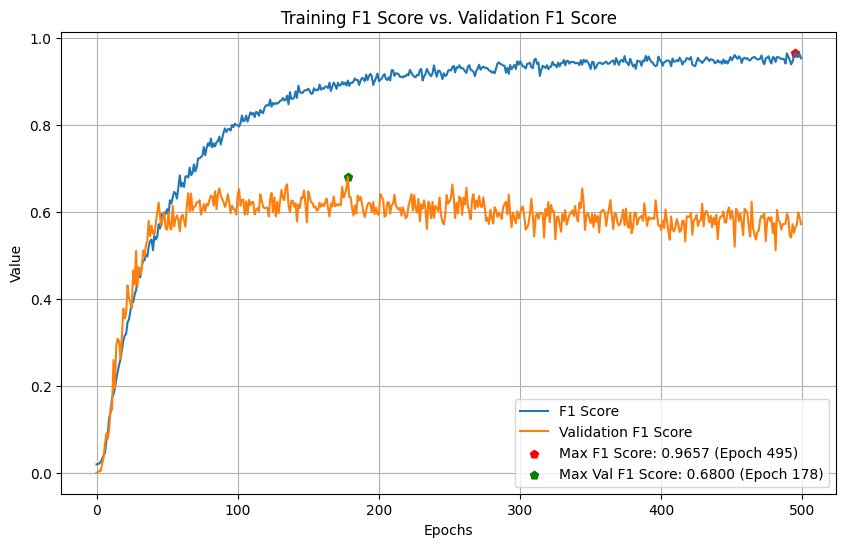

In [256]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [127]:
reconstructed_model = tf.keras.models.load_model("1 1D-CNN + 1 GRU Trial 593")

2023-09-23 11:44:09.464948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 11:44:09.466493: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1435 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [128]:
reconstructed_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 126, 100)          199600    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 8, 100)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 8, 100)            0         
                                                                 
 gru_3 (GRU)                 (None, 175)               145425    
                                                                 
 dropout_7 (Dropout)         (None, 175)               0         
                                                                 
 dense_6 (Dense)             (None, 80)                14080     
                                                      

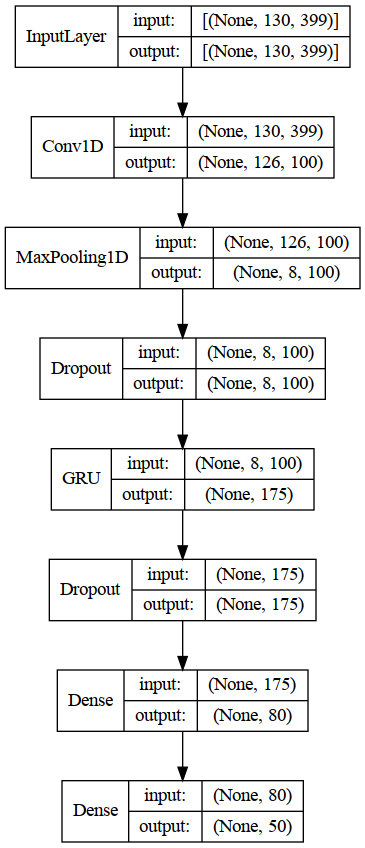

In [129]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

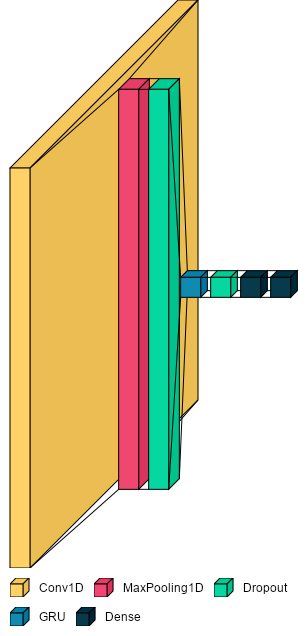

In [130]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [131]:
reconstructed_model.evaluate(Xval, Yval)

2023-09-23 11:44:20.094498: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 1s 13ms/step - loss: 1.5675 - f1_score: 0.6800


[1.5674517154693604, 0.6800420880317688]

In [132]:
reconstructed_model.evaluate(Xtrain, Ytrain, batch_size=96)

2023-09-23 11:44:22.579545: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.
2023-09-23 11:44:23.059729: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.


28/28 [==============================] - 1s 23ms/step - loss: 0.1200 - f1_score: 0.9996


[0.11997100710868835, 0.9995791912078857]

In [133]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     0.800     0.889        10
         BEE      0.417     0.500     0.455        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.500     0.667         8
   BREAKFAST      0.333     0.333     0.333         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.727     1.000     0.842         8
         DOG      0.667    

### 1 1D-CNN + 1 GRU Trial 722

In [ ]:
best_model = tuner.get_best_models(num_models=4)[3]

In [123]:
best_model.evaluate(Xtrain, Ytrain)

2023-09-10 15:39:03.643462: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


84/84 [==============================] - 2s 16ms/step - loss: 0.5961 - f1_score: 0.8469


[0.5960583686828613, 0.8469364643096924]

In [124]:
best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 18ms/step - loss: 1.1756 - f1_score: 0.6961


[1.1756278276443481, 0.6960964798927307]

In [125]:
bestHP = tuner.get_best_hyperparameters(num_trials=4)[3]

In [126]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1D-CNN + 1 GRU Trial 722/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [127]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500


2023-09-10 15:39:25.506746: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0xd72eb00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-10 15:39:25.506786: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-10 15:39:25.520431: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-10 15:39:25.716663: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 4.6688 - f1_score: 0.0186

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 16s 392ms/step - loss: 4.6688 - f1_score: 0.0186 - val_loss: 4.1136 - val_f1_score: 0.0022
Epoch 2/500
28/28 [==============================] - 3s 106ms/step - loss: 4.5605 - f1_score: 0.0175 - val_loss: 4.1977 - val_f1_score: 4.1237e-04
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 4.5649 - f1_score: 0.0248

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 382ms/step - loss: 4.5649 - f1_score: 0.0248 - val_loss: 4.0892 - val_f1_score: 0.0028
Epoch 4/500
28/28 [==============================] - 3s 107ms/step - loss: 4.4667 - f1_score: 0.0161 - val_loss: 4.1107 - val_f1_score: 7.2948e-04
Epoch 5/500
28/28 [==============================] - 3s 108ms/step - loss: 4.4170 - f1_score: 0.0171 - val_loss: 4.0656 - val_f1_score: 7.3171e-04
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 4.3702 - f1_score: 0.0192

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 358ms/step - loss: 4.3702 - f1_score: 0.0192 - val_loss: 4.0635 - val_f1_score: 0.0044
Epoch 7/500
28/28 [==============================] - 3s 107ms/step - loss: 4.3189 - f1_score: 0.0211 - val_loss: 4.0402 - val_f1_score: 0.0018
Epoch 8/500
28/28 [==============================] - 3s 108ms/step - loss: 4.3279 - f1_score: 0.0179 - val_loss: 4.0425 - val_f1_score: 5.3691e-04
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 4.2354 - f1_score: 0.0191

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 414ms/step - loss: 4.2354 - f1_score: 0.0191 - val_loss: 3.9986 - val_f1_score: 0.0048
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 4.2419 - f1_score: 0.0153

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 416ms/step - loss: 4.2419 - f1_score: 0.0153 - val_loss: 3.9872 - val_f1_score: 0.0048
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 4.1671 - f1_score: 0.0206

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 391ms/step - loss: 4.1671 - f1_score: 0.0206 - val_loss: 3.9864 - val_f1_score: 0.0050
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 4.1746 - f1_score: 0.0230

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 384ms/step - loss: 4.1746 - f1_score: 0.0230 - val_loss: 3.9727 - val_f1_score: 0.0090
Epoch 13/500
28/28 [==============================] - 3s 107ms/step - loss: 4.1741 - f1_score: 0.0227 - val_loss: 3.9908 - val_f1_score: 0.0020
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 4.1115 - f1_score: 0.0270

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 371ms/step - loss: 4.1115 - f1_score: 0.0270 - val_loss: 3.9555 - val_f1_score: 0.0290
Epoch 15/500
28/28 [==============================] - 3s 108ms/step - loss: 4.0820 - f1_score: 0.0257 - val_loss: 3.9487 - val_f1_score: 0.0044
Epoch 16/500
28/28 [==============================] - 3s 108ms/step - loss: 4.0657 - f1_score: 0.0280 - val_loss: 3.9306 - val_f1_score: 0.0072
Epoch 17/500
28/28 [==============================] - 3s 108ms/step - loss: 4.0476 - f1_score: 0.0224 - val_loss: 3.9069 - val_f1_score: 0.0164
Epoch 18/500
28/28 [==============================] - 3s 108ms/step - loss: 4.0174 - f1_score: 0.0347 - val_loss: 3.8849 - val_f1_score: 0.0272
Epoch 19/500
28/28 [==============================] - ETA: 0s - loss: 4.0129 - f1_score: 0.0308

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 373ms/step - loss: 4.0129 - f1_score: 0.0308 - val_loss: 3.8430 - val_f1_score: 0.0419
Epoch 20/500
28/28 [==============================] - 3s 108ms/step - loss: 3.9702 - f1_score: 0.0347 - val_loss: 3.8029 - val_f1_score: 0.0233
Epoch 21/500
28/28 [==============================] - 3s 109ms/step - loss: 3.9430 - f1_score: 0.0343 - val_loss: 3.7550 - val_f1_score: 0.0228
Epoch 22/500
28/28 [==============================] - 3s 110ms/step - loss: 3.8810 - f1_score: 0.0392 - val_loss: 3.6834 - val_f1_score: 0.0252
Epoch 23/500
28/28 [==============================] - 3s 110ms/step - loss: 3.8517 - f1_score: 0.0416 - val_loss: 3.6391 - val_f1_score: 0.0301
Epoch 24/500
28/28 [==============================] - 3s 110ms/step - loss: 3.8016 - f1_score: 0.0508 - val_loss: 3.5648 - val_f1_score: 0.0196
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 3.7613 - f1_score: 0.0523

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 447ms/step - loss: 3.7613 - f1_score: 0.0523 - val_loss: 3.4920 - val_f1_score: 0.0446
Epoch 26/500
28/28 [==============================] - 3s 108ms/step - loss: 3.7213 - f1_score: 0.0494 - val_loss: 3.4562 - val_f1_score: 0.0372
Epoch 27/500
28/28 [==============================] - 3s 111ms/step - loss: 3.6549 - f1_score: 0.0651 - val_loss: 3.4007 - val_f1_score: 0.0371
Epoch 28/500
28/28 [==============================] - ETA: 0s - loss: 3.6372 - f1_score: 0.0634

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 429ms/step - loss: 3.6372 - f1_score: 0.0634 - val_loss: 3.3608 - val_f1_score: 0.0465
Epoch 29/500
28/28 [==============================] - 3s 109ms/step - loss: 3.5687 - f1_score: 0.0669 - val_loss: 3.3299 - val_f1_score: 0.0407
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 3.5368 - f1_score: 0.0734

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 392ms/step - loss: 3.5368 - f1_score: 0.0734 - val_loss: 3.2529 - val_f1_score: 0.0561
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 3.4942 - f1_score: 0.0724

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 428ms/step - loss: 3.4942 - f1_score: 0.0724 - val_loss: 3.2261 - val_f1_score: 0.0715
Epoch 32/500
28/28 [==============================] - 3s 112ms/step - loss: 3.4533 - f1_score: 0.0838 - val_loss: 3.1425 - val_f1_score: 0.0695
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 3.3964 - f1_score: 0.0829

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 404ms/step - loss: 3.3964 - f1_score: 0.0829 - val_loss: 3.0893 - val_f1_score: 0.0768
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 3.3534 - f1_score: 0.0924

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 13s 461ms/step - loss: 3.3534 - f1_score: 0.0924 - val_loss: 3.0657 - val_f1_score: 0.0808
Epoch 35/500
28/28 [==============================] - 3s 109ms/step - loss: 3.3354 - f1_score: 0.0867 - val_loss: 2.9923 - val_f1_score: 0.0780
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 3.3080 - f1_score: 0.0933

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 405ms/step - loss: 3.3080 - f1_score: 0.0933 - val_loss: 2.9822 - val_f1_score: 0.0931
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 3.2385 - f1_score: 0.0953

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 398ms/step - loss: 3.2385 - f1_score: 0.0953 - val_loss: 2.8903 - val_f1_score: 0.0996
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 3.1920 - f1_score: 0.1124

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 415ms/step - loss: 3.1920 - f1_score: 0.1124 - val_loss: 2.8880 - val_f1_score: 0.1012
Epoch 39/500
28/28 [==============================] - ETA: 0s - loss: 3.1541 - f1_score: 0.1125

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 364ms/step - loss: 3.1541 - f1_score: 0.1125 - val_loss: 2.8251 - val_f1_score: 0.1317
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 3.1307 - f1_score: 0.1186

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 384ms/step - loss: 3.1307 - f1_score: 0.1186 - val_loss: 2.7966 - val_f1_score: 0.1364
Epoch 41/500
28/28 [==============================] - 3s 108ms/step - loss: 3.1178 - f1_score: 0.1178 - val_loss: 2.7679 - val_f1_score: 0.1340
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 3.0717 - f1_score: 0.1327

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 391ms/step - loss: 3.0717 - f1_score: 0.1327 - val_loss: 2.7575 - val_f1_score: 0.1616
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 3.0541 - f1_score: 0.1368

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 374ms/step - loss: 3.0541 - f1_score: 0.1368 - val_loss: 2.7088 - val_f1_score: 0.1678
Epoch 44/500
28/28 [==============================] - 3s 107ms/step - loss: 3.0140 - f1_score: 0.1328 - val_loss: 2.6969 - val_f1_score: 0.1529
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 2.9631 - f1_score: 0.1484

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 397ms/step - loss: 2.9631 - f1_score: 0.1484 - val_loss: 2.6878 - val_f1_score: 0.2036
Epoch 46/500
28/28 [==============================] - 3s 108ms/step - loss: 2.9539 - f1_score: 0.1483 - val_loss: 2.6354 - val_f1_score: 0.1827
Epoch 47/500
28/28 [==============================] - 3s 108ms/step - loss: 2.9489 - f1_score: 0.1659 - val_loss: 2.6301 - val_f1_score: 0.1746
Epoch 48/500
28/28 [==============================] - ETA: 0s - loss: 2.9054 - f1_score: 0.1694

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 408ms/step - loss: 2.9054 - f1_score: 0.1694 - val_loss: 2.6026 - val_f1_score: 0.2118
Epoch 49/500
28/28 [==============================] - 3s 108ms/step - loss: 2.8821 - f1_score: 0.1552 - val_loss: 2.5643 - val_f1_score: 0.2018
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 2.8840 - f1_score: 0.1645

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 371ms/step - loss: 2.8840 - f1_score: 0.1645 - val_loss: 2.5460 - val_f1_score: 0.2125
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 2.8372 - f1_score: 0.1701

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 373ms/step - loss: 2.8372 - f1_score: 0.1701 - val_loss: 2.5092 - val_f1_score: 0.2558
Epoch 52/500
28/28 [==============================] - 3s 108ms/step - loss: 2.8002 - f1_score: 0.1854 - val_loss: 2.5071 - val_f1_score: 0.2200
Epoch 53/500
28/28 [==============================] - 3s 108ms/step - loss: 2.8044 - f1_score: 0.1856 - val_loss: 2.4907 - val_f1_score: 0.2409
Epoch 54/500
28/28 [==============================] - 3s 109ms/step - loss: 2.8005 - f1_score: 0.1855 - val_loss: 2.4826 - val_f1_score: 0.2363
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 2.7548 - f1_score: 0.1869

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 436ms/step - loss: 2.7548 - f1_score: 0.1869 - val_loss: 2.3952 - val_f1_score: 0.2732
Epoch 56/500
28/28 [==============================] - ETA: 0s - loss: 2.7674 - f1_score: 0.1853

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 18s 670ms/step - loss: 2.7674 - f1_score: 0.1853 - val_loss: 2.4219 - val_f1_score: 0.2966
Epoch 57/500
28/28 [==============================] - 3s 107ms/step - loss: 2.7318 - f1_score: 0.2041 - val_loss: 2.4136 - val_f1_score: 0.2800
Epoch 58/500
28/28 [==============================] - ETA: 0s - loss: 2.6908 - f1_score: 0.2035

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 371ms/step - loss: 2.6908 - f1_score: 0.2035 - val_loss: 2.3842 - val_f1_score: 0.3113
Epoch 59/500
28/28 [==============================] - 3s 107ms/step - loss: 2.6878 - f1_score: 0.2126 - val_loss: 2.3581 - val_f1_score: 0.2850
Epoch 60/500
28/28 [==============================] - 3s 110ms/step - loss: 2.6685 - f1_score: 0.2309 - val_loss: 2.3529 - val_f1_score: 0.2920
Epoch 61/500
28/28 [==============================] - 3s 108ms/step - loss: 2.6588 - f1_score: 0.2202 - val_loss: 2.3587 - val_f1_score: 0.3062
Epoch 62/500
28/28 [==============================] - 3s 109ms/step - loss: 2.6268 - f1_score: 0.2279 - val_loss: 2.3459 - val_f1_score: 0.2723
Epoch 63/500
28/28 [==============================] - ETA: 0s - loss: 2.6340 - f1_score: 0.2189

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 397ms/step - loss: 2.6340 - f1_score: 0.2189 - val_loss: 2.3020 - val_f1_score: 0.3252
Epoch 64/500
28/28 [==============================] - ETA: 0s - loss: 2.5701 - f1_score: 0.2448

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 14s 532ms/step - loss: 2.5701 - f1_score: 0.2448 - val_loss: 2.2953 - val_f1_score: 0.3449
Epoch 65/500
28/28 [==============================] - 3s 107ms/step - loss: 2.5991 - f1_score: 0.2255 - val_loss: 2.2891 - val_f1_score: 0.3238
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 2.5784 - f1_score: 0.2295

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 393ms/step - loss: 2.5784 - f1_score: 0.2295 - val_loss: 2.2731 - val_f1_score: 0.3519
Epoch 67/500
28/28 [==============================] - 3s 107ms/step - loss: 2.5866 - f1_score: 0.2267 - val_loss: 2.2530 - val_f1_score: 0.3354
Epoch 68/500
28/28 [==============================] - ETA: 0s - loss: 2.5577 - f1_score: 0.2356

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 375ms/step - loss: 2.5577 - f1_score: 0.2356 - val_loss: 2.2304 - val_f1_score: 0.3550
Epoch 69/500
28/28 [==============================] - 3s 109ms/step - loss: 2.5231 - f1_score: 0.2508 - val_loss: 2.2283 - val_f1_score: 0.3416
Epoch 70/500
28/28 [==============================] - ETA: 0s - loss: 2.5146 - f1_score: 0.2518

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 390ms/step - loss: 2.5146 - f1_score: 0.2518 - val_loss: 2.1799 - val_f1_score: 0.3590
Epoch 71/500
28/28 [==============================] - 3s 108ms/step - loss: 2.5114 - f1_score: 0.2545 - val_loss: 2.2104 - val_f1_score: 0.3565
Epoch 72/500
28/28 [==============================] - ETA: 0s - loss: 2.5045 - f1_score: 0.2485

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 425ms/step - loss: 2.5045 - f1_score: 0.2485 - val_loss: 2.1938 - val_f1_score: 0.3740
Epoch 73/500
28/28 [==============================] - 3s 108ms/step - loss: 2.4740 - f1_score: 0.2619 - val_loss: 2.1747 - val_f1_score: 0.3685
Epoch 74/500
28/28 [==============================] - 3s 108ms/step - loss: 2.4562 - f1_score: 0.2732 - val_loss: 2.1740 - val_f1_score: 0.3662
Epoch 75/500
28/28 [==============================] - 3s 108ms/step - loss: 2.4596 - f1_score: 0.2714 - val_loss: 2.1336 - val_f1_score: 0.3611
Epoch 76/500
28/28 [==============================] - 3s 109ms/step - loss: 2.4562 - f1_score: 0.2608 - val_loss: 2.1472 - val_f1_score: 0.3703
Epoch 77/500
28/28 [==============================] - ETA: 0s - loss: 2.4430 - f1_score: 0.2681

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 386ms/step - loss: 2.4430 - f1_score: 0.2681 - val_loss: 2.1205 - val_f1_score: 0.3877
Epoch 78/500
28/28 [==============================] - 3s 108ms/step - loss: 2.4213 - f1_score: 0.2782 - val_loss: 2.1076 - val_f1_score: 0.3726
Epoch 79/500
28/28 [==============================] - ETA: 0s - loss: 2.3752 - f1_score: 0.2848

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 399ms/step - loss: 2.3752 - f1_score: 0.2848 - val_loss: 2.0875 - val_f1_score: 0.3924
Epoch 80/500
28/28 [==============================] - ETA: 0s - loss: 2.3996 - f1_score: 0.2896

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 403ms/step - loss: 2.3996 - f1_score: 0.2896 - val_loss: 2.1138 - val_f1_score: 0.4045
Epoch 81/500
28/28 [==============================] - ETA: 0s - loss: 2.3815 - f1_score: 0.2752

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 419ms/step - loss: 2.3815 - f1_score: 0.2752 - val_loss: 2.0564 - val_f1_score: 0.4109
Epoch 82/500
28/28 [==============================] - 3s 108ms/step - loss: 2.3558 - f1_score: 0.2927 - val_loss: 2.0691 - val_f1_score: 0.4053
Epoch 83/500
28/28 [==============================] - 3s 108ms/step - loss: 2.3382 - f1_score: 0.2932 - val_loss: 2.0273 - val_f1_score: 0.4067
Epoch 84/500
28/28 [==============================] - 3s 108ms/step - loss: 2.3354 - f1_score: 0.2896 - val_loss: 2.1134 - val_f1_score: 0.3835
Epoch 85/500
28/28 [==============================] - 3s 109ms/step - loss: 2.3171 - f1_score: 0.3095 - val_loss: 2.0581 - val_f1_score: 0.3891
Epoch 86/500
28/28 [==============================] - 3s 110ms/step - loss: 2.3122 - f1_score: 0.3143 - val_loss: 2.1061 - val_f1_score: 0.3919
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 2.2910 - f1_score: 0.3168

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 397ms/step - loss: 2.2910 - f1_score: 0.3168 - val_loss: 2.0170 - val_f1_score: 0.4221
Epoch 88/500
28/28 [==============================] - 3s 110ms/step - loss: 2.3064 - f1_score: 0.2960 - val_loss: 2.0227 - val_f1_score: 0.3748
Epoch 89/500
28/28 [==============================] - 3s 108ms/step - loss: 2.3001 - f1_score: 0.3143 - val_loss: 2.0376 - val_f1_score: 0.3908
Epoch 90/500
28/28 [==============================] - 3s 110ms/step - loss: 2.2523 - f1_score: 0.3186 - val_loss: 1.9887 - val_f1_score: 0.4036
Epoch 91/500
28/28 [==============================] - 3s 110ms/step - loss: 2.2554 - f1_score: 0.3170 - val_loss: 1.9863 - val_f1_score: 0.4072
Epoch 92/500
28/28 [==============================] - 3s 110ms/step - loss: 2.2113 - f1_score: 0.3326 - val_loss: 1.9726 - val_f1_score: 0.3883
Epoch 93/500
28/28 [==============================] - 3s 118ms/step - loss: 2.2296 - f1_score: 0.3216 - val_loss: 2.0183 - val_f1_score: 0.3875
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 423ms/step - loss: 2.2015 - f1_score: 0.3406 - val_loss: 1.9955 - val_f1_score: 0.4277
Epoch 96/500
28/28 [==============================] - 3s 112ms/step - loss: 2.1915 - f1_score: 0.3222 - val_loss: 1.9826 - val_f1_score: 0.4195
Epoch 97/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1786 - f1_score: 0.3341 - val_loss: 1.9251 - val_f1_score: 0.4195
Epoch 98/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1872 - f1_score: 0.3309 - val_loss: 2.0147 - val_f1_score: 0.3916
Epoch 99/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1320 - f1_score: 0.3456 - val_loss: 1.8857 - val_f1_score: 0.4275
Epoch 100/500
28/28 [==============================] - ETA: 0s - loss: 2.1367 - f1_score: 0.3564

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 390ms/step - loss: 2.1367 - f1_score: 0.3564 - val_loss: 1.9231 - val_f1_score: 0.4370
Epoch 101/500
28/28 [==============================] - 3s 109ms/step - loss: 2.1655 - f1_score: 0.3332 - val_loss: 1.9079 - val_f1_score: 0.4005
Epoch 102/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1237 - f1_score: 0.3572 - val_loss: 1.9258 - val_f1_score: 0.4226
Epoch 103/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1152 - f1_score: 0.3541 - val_loss: 1.8885 - val_f1_score: 0.4078
Epoch 104/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1028 - f1_score: 0.3680 - val_loss: 1.9596 - val_f1_score: 0.4303
Epoch 105/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0703 - f1_score: 0.3705 - val_loss: 1.8501 - val_f1_score: 0.4355
Epoch 106/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0826 - f1_score: 0.3694 - val_loss: 1.8761 - val_f1_score: 0.428

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 454ms/step - loss: 2.0780 - f1_score: 0.3641 - val_loss: 1.8709 - val_f1_score: 0.4633
Epoch 108/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0676 - f1_score: 0.3723 - val_loss: 1.8665 - val_f1_score: 0.4252
Epoch 109/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0056 - f1_score: 0.3948 - val_loss: 1.8248 - val_f1_score: 0.4311
Epoch 110/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0220 - f1_score: 0.3732 - val_loss: 1.8610 - val_f1_score: 0.4273
Epoch 111/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0492 - f1_score: 0.3810 - val_loss: 1.8252 - val_f1_score: 0.4339
Epoch 112/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0315 - f1_score: 0.3771 - val_loss: 1.8996 - val_f1_score: 0.3843
Epoch 113/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0178 - f1_score: 0.4021 - val_loss: 1.8793 - val_f1_score: 0.420

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 418ms/step - loss: 1.9853 - f1_score: 0.3954 - val_loss: 1.7862 - val_f1_score: 0.4856
Epoch 116/500
28/28 [==============================] - 3s 109ms/step - loss: 1.9542 - f1_score: 0.4051 - val_loss: 1.7780 - val_f1_score: 0.4658
Epoch 117/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9835 - f1_score: 0.4013 - val_loss: 1.7599 - val_f1_score: 0.4677
Epoch 118/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9635 - f1_score: 0.3975 - val_loss: 1.8050 - val_f1_score: 0.4298
Epoch 119/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9462 - f1_score: 0.3909 - val_loss: 1.7354 - val_f1_score: 0.4609
Epoch 120/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9499 - f1_score: 0.4159 - val_loss: 1.8533 - val_f1_score: 0.4485
Epoch 121/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9227 - f1_score: 0.4124 - val_loss: 1.8317 - val_f1_score: 0.420

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 402ms/step - loss: 1.9517 - f1_score: 0.4041 - val_loss: 1.7359 - val_f1_score: 0.4888
Epoch 123/500
28/28 [==============================] - 3s 109ms/step - loss: 1.9054 - f1_score: 0.4220 - val_loss: 1.7487 - val_f1_score: 0.4788
Epoch 124/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9403 - f1_score: 0.4067 - val_loss: 1.7180 - val_f1_score: 0.4555
Epoch 125/500
28/28 [==============================] - 3s 111ms/step - loss: 1.8738 - f1_score: 0.4163 - val_loss: 1.7282 - val_f1_score: 0.4632
Epoch 126/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9090 - f1_score: 0.4230 - val_loss: 1.7242 - val_f1_score: 0.4829
Epoch 127/500
28/28 [==============================] - 3s 111ms/step - loss: 1.8382 - f1_score: 0.4395 - val_loss: 1.6839 - val_f1_score: 0.4885
Epoch 128/500
28/28 [==============================] - 3s 113ms/step - loss: 1.8702 - f1_score: 0.4342 - val_loss: 1.8338 - val_f1_score: 0.427

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 436ms/step - loss: 1.8707 - f1_score: 0.4289 - val_loss: 1.6833 - val_f1_score: 0.5026
Epoch 131/500
28/28 [==============================] - 3s 109ms/step - loss: 1.8686 - f1_score: 0.4295 - val_loss: 1.7191 - val_f1_score: 0.4672
Epoch 132/500
28/28 [==============================] - 3s 110ms/step - loss: 1.8342 - f1_score: 0.4416 - val_loss: 1.6559 - val_f1_score: 0.4714
Epoch 133/500
28/28 [==============================] - 3s 110ms/step - loss: 1.8359 - f1_score: 0.4382 - val_loss: 1.6541 - val_f1_score: 0.4810
Epoch 134/500
28/28 [==============================] - 3s 111ms/step - loss: 1.8079 - f1_score: 0.4361 - val_loss: 1.6414 - val_f1_score: 0.4839
Epoch 135/500
28/28 [==============================] - 3s 111ms/step - loss: 1.8207 - f1_score: 0.4457 - val_loss: 1.6936 - val_f1_score: 0.4711
Epoch 136/500
28/28 [==============================] - 3s 111ms/step - loss: 1.7831 - f1_score: 0.4465 - val_loss: 1.6170 - val_f1_score: 0.501

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 424ms/step - loss: 1.7547 - f1_score: 0.4616 - val_loss: 1.5912 - val_f1_score: 0.5139
Epoch 140/500
28/28 [==============================] - ETA: 0s - loss: 1.7899 - f1_score: 0.4432

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 393ms/step - loss: 1.7899 - f1_score: 0.4432 - val_loss: 1.5661 - val_f1_score: 0.5272
Epoch 141/500
28/28 [==============================] - 3s 108ms/step - loss: 1.7275 - f1_score: 0.4736 - val_loss: 1.6422 - val_f1_score: 0.4759
Epoch 142/500
28/28 [==============================] - 3s 110ms/step - loss: 1.7305 - f1_score: 0.4697 - val_loss: 1.6152 - val_f1_score: 0.4928
Epoch 143/500
28/28 [==============================] - 3s 110ms/step - loss: 1.7478 - f1_score: 0.4732 - val_loss: 1.6066 - val_f1_score: 0.4995
Epoch 144/500
28/28 [==============================] - 3s 110ms/step - loss: 1.7292 - f1_score: 0.4701 - val_loss: 1.5718 - val_f1_score: 0.5173
Epoch 145/500
28/28 [==============================] - ETA: 0s - loss: 1.7116 - f1_score: 0.4837

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 438ms/step - loss: 1.7116 - f1_score: 0.4837 - val_loss: 1.6114 - val_f1_score: 0.5309
Epoch 146/500
28/28 [==============================] - 3s 109ms/step - loss: 1.7049 - f1_score: 0.4817 - val_loss: 1.5978 - val_f1_score: 0.5152
Epoch 147/500
28/28 [==============================] - 3s 112ms/step - loss: 1.7062 - f1_score: 0.4743 - val_loss: 1.6013 - val_f1_score: 0.4879
Epoch 148/500
28/28 [==============================] - 3s 111ms/step - loss: 1.6791 - f1_score: 0.4912 - val_loss: 1.6937 - val_f1_score: 0.4763
Epoch 149/500
28/28 [==============================] - 3s 110ms/step - loss: 1.6522 - f1_score: 0.4938 - val_loss: 1.6138 - val_f1_score: 0.5235
Epoch 150/500
28/28 [==============================] - ETA: 0s - loss: 1.6692 - f1_score: 0.4904

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 417ms/step - loss: 1.6692 - f1_score: 0.4904 - val_loss: 1.5988 - val_f1_score: 0.5476
Epoch 151/500
28/28 [==============================] - 3s 109ms/step - loss: 1.6431 - f1_score: 0.5056 - val_loss: 1.5635 - val_f1_score: 0.5009
Epoch 152/500
28/28 [==============================] - ETA: 0s - loss: 1.6439 - f1_score: 0.4975

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 395ms/step - loss: 1.6439 - f1_score: 0.4975 - val_loss: 1.5105 - val_f1_score: 0.5570
Epoch 153/500
28/28 [==============================] - 3s 108ms/step - loss: 1.6357 - f1_score: 0.4962 - val_loss: 1.5215 - val_f1_score: 0.5345
Epoch 154/500
28/28 [==============================] - 3s 110ms/step - loss: 1.5930 - f1_score: 0.5116 - val_loss: 1.5289 - val_f1_score: 0.5391
Epoch 155/500
28/28 [==============================] - ETA: 0s - loss: 1.6099 - f1_score: 0.5085

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 414ms/step - loss: 1.6099 - f1_score: 0.5085 - val_loss: 1.4694 - val_f1_score: 0.5862
Epoch 156/500
28/28 [==============================] - 3s 108ms/step - loss: 1.6167 - f1_score: 0.5138 - val_loss: 1.4706 - val_f1_score: 0.5543
Epoch 157/500
28/28 [==============================] - 3s 110ms/step - loss: 1.6094 - f1_score: 0.5114 - val_loss: 1.4724 - val_f1_score: 0.5436
Epoch 158/500
28/28 [==============================] - ETA: 0s - loss: 1.5972 - f1_score: 0.5214

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 420ms/step - loss: 1.5972 - f1_score: 0.5214 - val_loss: 1.4479 - val_f1_score: 0.5899
Epoch 159/500
28/28 [==============================] - 3s 108ms/step - loss: 1.5748 - f1_score: 0.5252 - val_loss: 1.6497 - val_f1_score: 0.5300
Epoch 160/500
28/28 [==============================] - 3s 109ms/step - loss: 1.5905 - f1_score: 0.5086 - val_loss: 1.4376 - val_f1_score: 0.5670
Epoch 161/500
28/28 [==============================] - 3s 110ms/step - loss: 1.5598 - f1_score: 0.5210 - val_loss: 1.4810 - val_f1_score: 0.5128
Epoch 162/500
28/28 [==============================] - 3s 110ms/step - loss: 1.5366 - f1_score: 0.5245 - val_loss: 1.4581 - val_f1_score: 0.5571
Epoch 163/500
28/28 [==============================] - 3s 110ms/step - loss: 1.5342 - f1_score: 0.5197 - val_loss: 1.4738 - val_f1_score: 0.5563
Epoch 164/500
28/28 [==============================] - 3s 112ms/step - loss: 1.5584 - f1_score: 0.5266 - val_loss: 1.4647 - val_f1_score: 0.550

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 423ms/step - loss: 1.4966 - f1_score: 0.5578 - val_loss: 1.4231 - val_f1_score: 0.5958
Epoch 171/500
28/28 [==============================] - 3s 109ms/step - loss: 1.4999 - f1_score: 0.5404 - val_loss: 1.3809 - val_f1_score: 0.5726
Epoch 172/500
28/28 [==============================] - 3s 110ms/step - loss: 1.4555 - f1_score: 0.5497 - val_loss: 1.4764 - val_f1_score: 0.5623
Epoch 173/500
28/28 [==============================] - 3s 110ms/step - loss: 1.5032 - f1_score: 0.5262 - val_loss: 1.4795 - val_f1_score: 0.5491
Epoch 174/500
28/28 [==============================] - 3s 111ms/step - loss: 1.4780 - f1_score: 0.5533 - val_loss: 1.4966 - val_f1_score: 0.5561
Epoch 175/500
28/28 [==============================] - 3s 113ms/step - loss: 1.4474 - f1_score: 0.5566 - val_loss: 1.4389 - val_f1_score: 0.5615
Epoch 176/500
28/28 [==============================] - ETA: 0s - loss: 1.4584 - f1_score: 0.5481

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 447ms/step - loss: 1.4584 - f1_score: 0.5481 - val_loss: 1.4306 - val_f1_score: 0.5966
Epoch 177/500
28/28 [==============================] - 3s 109ms/step - loss: 1.4586 - f1_score: 0.5595 - val_loss: 1.4419 - val_f1_score: 0.5663
Epoch 178/500
28/28 [==============================] - 3s 112ms/step - loss: 1.4400 - f1_score: 0.5629 - val_loss: 1.4392 - val_f1_score: 0.5719
Epoch 179/500
28/28 [==============================] - ETA: 0s - loss: 1.4609 - f1_score: 0.5657

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 433ms/step - loss: 1.4609 - f1_score: 0.5657 - val_loss: 1.3487 - val_f1_score: 0.6154
Epoch 180/500
28/28 [==============================] - 3s 111ms/step - loss: 1.4507 - f1_score: 0.5529 - val_loss: 1.3831 - val_f1_score: 0.6036
Epoch 181/500
28/28 [==============================] - 3s 109ms/step - loss: 1.4326 - f1_score: 0.5659 - val_loss: 1.4155 - val_f1_score: 0.5825
Epoch 182/500
28/28 [==============================] - 3s 109ms/step - loss: 1.4146 - f1_score: 0.5684 - val_loss: 1.3802 - val_f1_score: 0.6090
Epoch 183/500
28/28 [==============================] - 3s 111ms/step - loss: 1.4075 - f1_score: 0.5640 - val_loss: 1.3411 - val_f1_score: 0.6094
Epoch 184/500
28/28 [==============================] - 3s 110ms/step - loss: 1.3964 - f1_score: 0.5714 - val_loss: 1.3828 - val_f1_score: 0.6020
Epoch 185/500
28/28 [==============================] - 3s 111ms/step - loss: 1.3907 - f1_score: 0.5731 - val_loss: 1.3620 - val_f1_score: 0.596

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 458ms/step - loss: 1.3896 - f1_score: 0.5760 - val_loss: 1.3807 - val_f1_score: 0.6240
Epoch 187/500
28/28 [==============================] - 3s 109ms/step - loss: 1.4100 - f1_score: 0.5643 - val_loss: 1.3365 - val_f1_score: 0.5992
Epoch 188/500
28/28 [==============================] - 3s 110ms/step - loss: 1.3540 - f1_score: 0.5908 - val_loss: 1.3725 - val_f1_score: 0.6081
Epoch 189/500
28/28 [==============================] - 3s 111ms/step - loss: 1.3720 - f1_score: 0.5697 - val_loss: 1.3539 - val_f1_score: 0.6040
Epoch 190/500
28/28 [==============================] - 3s 110ms/step - loss: 1.3565 - f1_score: 0.6018 - val_loss: 1.3538 - val_f1_score: 0.5774
Epoch 191/500
28/28 [==============================] - 3s 117ms/step - loss: 1.3589 - f1_score: 0.5814 - val_loss: 1.3835 - val_f1_score: 0.6143
Epoch 192/500
28/28 [==============================] - 3s 111ms/step - loss: 1.3468 - f1_score: 0.5742 - val_loss: 1.3033 - val_f1_score: 0.620

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 408ms/step - loss: 1.3419 - f1_score: 0.5997 - val_loss: 1.3279 - val_f1_score: 0.6400
Epoch 195/500
28/28 [==============================] - 3s 109ms/step - loss: 1.3342 - f1_score: 0.5904 - val_loss: 1.3712 - val_f1_score: 0.6150
Epoch 196/500
28/28 [==============================] - 3s 111ms/step - loss: 1.2939 - f1_score: 0.5887 - val_loss: 1.3135 - val_f1_score: 0.6380
Epoch 197/500
28/28 [==============================] - 3s 110ms/step - loss: 1.3203 - f1_score: 0.5919 - val_loss: 1.3104 - val_f1_score: 0.6024
Epoch 198/500
28/28 [==============================] - 3s 111ms/step - loss: 1.3094 - f1_score: 0.6019 - val_loss: 1.3160 - val_f1_score: 0.6199
Epoch 199/500
28/28 [==============================] - 3s 113ms/step - loss: 1.2921 - f1_score: 0.6003 - val_loss: 1.3377 - val_f1_score: 0.6128
Epoch 200/500
28/28 [==============================] - 3s 111ms/step - loss: 1.3082 - f1_score: 0.5926 - val_loss: 1.3227 - val_f1_score: 0.609

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 418ms/step - loss: 1.2799 - f1_score: 0.6029 - val_loss: 1.2430 - val_f1_score: 0.6692
Epoch 204/500
28/28 [==============================] - 3s 109ms/step - loss: 1.2873 - f1_score: 0.6011 - val_loss: 1.3025 - val_f1_score: 0.6431
Epoch 205/500
28/28 [==============================] - 3s 110ms/step - loss: 1.2356 - f1_score: 0.6230 - val_loss: 1.2815 - val_f1_score: 0.6284
Epoch 206/500
28/28 [==============================] - 3s 111ms/step - loss: 1.2003 - f1_score: 0.6269 - val_loss: 1.3222 - val_f1_score: 0.6236
Epoch 207/500
28/28 [==============================] - 3s 111ms/step - loss: 1.2624 - f1_score: 0.6104 - val_loss: 1.2386 - val_f1_score: 0.6473
Epoch 208/500
28/28 [==============================] - 3s 111ms/step - loss: 1.2450 - f1_score: 0.6257 - val_loss: 1.3543 - val_f1_score: 0.6317
Epoch 209/500
28/28 [==============================] - 3s 111ms/step - loss: 1.2262 - f1_score: 0.6189 - val_loss: 1.2616 - val_f1_score: 0.654

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 454ms/step - loss: 1.2064 - f1_score: 0.6343 - val_loss: 1.2266 - val_f1_score: 0.6743
Epoch 217/500
28/28 [==============================] - 3s 110ms/step - loss: 1.2193 - f1_score: 0.6218 - val_loss: 1.2072 - val_f1_score: 0.6582
Epoch 218/500
28/28 [==============================] - 3s 111ms/step - loss: 1.2593 - f1_score: 0.6122 - val_loss: 1.2705 - val_f1_score: 0.6528
Epoch 219/500
28/28 [==============================] - 3s 110ms/step - loss: 1.2012 - f1_score: 0.6228 - val_loss: 1.2165 - val_f1_score: 0.6539
Epoch 220/500
28/28 [==============================] - 3s 110ms/step - loss: 1.1853 - f1_score: 0.6305 - val_loss: 1.2322 - val_f1_score: 0.6422
Epoch 221/500
28/28 [==============================] - 3s 111ms/step - loss: 1.1643 - f1_score: 0.6423 - val_loss: 1.1862 - val_f1_score: 0.6653
Epoch 222/500
28/28 [==============================] - 3s 111ms/step - loss: 1.1639 - f1_score: 0.6378 - val_loss: 1.2794 - val_f1_score: 0.647

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 415ms/step - loss: 1.1401 - f1_score: 0.6545 - val_loss: 1.1657 - val_f1_score: 0.6790
Epoch 224/500
28/28 [==============================] - 3s 110ms/step - loss: 1.2005 - f1_score: 0.6294 - val_loss: 1.2300 - val_f1_score: 0.6603
Epoch 225/500
28/28 [==============================] - ETA: 0s - loss: 1.1424 - f1_score: 0.6487

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 413ms/step - loss: 1.1424 - f1_score: 0.6487 - val_loss: 1.1911 - val_f1_score: 0.6850
Epoch 226/500
28/28 [==============================] - 3s 109ms/step - loss: 1.1532 - f1_score: 0.6446 - val_loss: 1.2906 - val_f1_score: 0.6513
Epoch 227/500
28/28 [==============================] - 3s 110ms/step - loss: 1.1470 - f1_score: 0.6389 - val_loss: 1.2122 - val_f1_score: 0.6676
Epoch 228/500
28/28 [==============================] - 3s 110ms/step - loss: 1.1606 - f1_score: 0.6441 - val_loss: 1.2662 - val_f1_score: 0.6462
Epoch 229/500
28/28 [==============================] - 3s 111ms/step - loss: 1.1324 - f1_score: 0.6443 - val_loss: 1.1966 - val_f1_score: 0.6550
Epoch 230/500
28/28 [==============================] - 3s 111ms/step - loss: 1.1105 - f1_score: 0.6601 - val_loss: 1.2582 - val_f1_score: 0.6676
Epoch 231/500
28/28 [==============================] - 3s 110ms/step - loss: 1.1186 - f1_score: 0.6517 - val_loss: 1.1981 - val_f1_score: 0.665

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 451ms/step - loss: 1.0907 - f1_score: 0.6565 - val_loss: 1.1684 - val_f1_score: 0.6960
Epoch 240/500
28/28 [==============================] - 3s 109ms/step - loss: 1.0764 - f1_score: 0.6650 - val_loss: 1.1611 - val_f1_score: 0.6847
Epoch 241/500
28/28 [==============================] - 3s 110ms/step - loss: 1.0952 - f1_score: 0.6637 - val_loss: 1.2429 - val_f1_score: 0.6872
Epoch 242/500
28/28 [==============================] - 3s 111ms/step - loss: 1.0866 - f1_score: 0.6578 - val_loss: 1.1820 - val_f1_score: 0.6688
Epoch 243/500
28/28 [==============================] - ETA: 0s - loss: 1.0815 - f1_score: 0.6579

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 15s 553ms/step - loss: 1.0815 - f1_score: 0.6579 - val_loss: 1.1464 - val_f1_score: 0.6993
Epoch 244/500
28/28 [==============================] - 3s 109ms/step - loss: 1.0699 - f1_score: 0.6644 - val_loss: 1.1681 - val_f1_score: 0.6883
Epoch 245/500
28/28 [==============================] - 3s 109ms/step - loss: 1.0339 - f1_score: 0.6849 - val_loss: 1.1737 - val_f1_score: 0.6887
Epoch 246/500
28/28 [==============================] - 3s 110ms/step - loss: 1.0577 - f1_score: 0.6741 - val_loss: 1.1852 - val_f1_score: 0.6746
Epoch 247/500
28/28 [==============================] - 3s 110ms/step - loss: 1.0367 - f1_score: 0.6844 - val_loss: 1.2528 - val_f1_score: 0.6644
Epoch 248/500
28/28 [==============================] - 3s 111ms/step - loss: 1.0325 - f1_score: 0.6796 - val_loss: 1.2167 - val_f1_score: 0.6631
Epoch 249/500
28/28 [==============================] - 3s 111ms/step - loss: 1.0528 - f1_score: 0.6708 - val_loss: 1.1206 - val_f1_score: 0.697

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 452ms/step - loss: 1.0164 - f1_score: 0.6826 - val_loss: 1.1012 - val_f1_score: 0.7071
Epoch 251/500
28/28 [==============================] - 3s 110ms/step - loss: 1.0041 - f1_score: 0.6932 - val_loss: 1.1321 - val_f1_score: 0.6858
Epoch 252/500
28/28 [==============================] - 3s 110ms/step - loss: 1.0066 - f1_score: 0.6889 - val_loss: 1.2482 - val_f1_score: 0.6463
Epoch 253/500
28/28 [==============================] - 3s 110ms/step - loss: 1.0213 - f1_score: 0.6779 - val_loss: 1.1264 - val_f1_score: 0.6712
Epoch 254/500
28/28 [==============================] - 3s 113ms/step - loss: 1.0073 - f1_score: 0.6902 - val_loss: 1.1494 - val_f1_score: 0.7057
Epoch 255/500
28/28 [==============================] - 3s 120ms/step - loss: 1.0349 - f1_score: 0.6854 - val_loss: 1.1554 - val_f1_score: 0.6733
Epoch 256/500
28/28 [==============================] - 3s 112ms/step - loss: 1.0028 - f1_score: 0.6869 - val_loss: 1.2468 - val_f1_score: 0.645

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 13s 467ms/step - loss: 0.8600 - f1_score: 0.7310 - val_loss: 1.0467 - val_f1_score: 0.7265
Epoch 292/500
28/28 [==============================] - 3s 109ms/step - loss: 0.8304 - f1_score: 0.7337 - val_loss: 1.1625 - val_f1_score: 0.6697
Epoch 293/500
28/28 [==============================] - 3s 111ms/step - loss: 0.8476 - f1_score: 0.7347 - val_loss: 1.1650 - val_f1_score: 0.6962
Epoch 294/500
28/28 [==============================] - 3s 110ms/step - loss: 0.8629 - f1_score: 0.7456 - val_loss: 1.1314 - val_f1_score: 0.6867
Epoch 295/500
28/28 [==============================] - 3s 112ms/step - loss: 0.8443 - f1_score: 0.7350 - val_loss: 1.0835 - val_f1_score: 0.7130
Epoch 296/500
28/28 [==============================] - ETA: 0s - loss: 0.8358 - f1_score: 0.7548

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 402ms/step - loss: 0.8358 - f1_score: 0.7548 - val_loss: 1.0503 - val_f1_score: 0.7350
Epoch 297/500
28/28 [==============================] - 3s 109ms/step - loss: 0.8213 - f1_score: 0.7534 - val_loss: 1.0717 - val_f1_score: 0.7127
Epoch 298/500
28/28 [==============================] - 3s 111ms/step - loss: 0.8451 - f1_score: 0.7416 - val_loss: 1.1610 - val_f1_score: 0.6669
Epoch 299/500
28/28 [==============================] - 3s 116ms/step - loss: 0.8201 - f1_score: 0.7374 - val_loss: 1.2170 - val_f1_score: 0.6410
Epoch 300/500
28/28 [==============================] - 3s 111ms/step - loss: 0.8318 - f1_score: 0.7342 - val_loss: 1.0611 - val_f1_score: 0.6930
Epoch 301/500
28/28 [==============================] - 3s 112ms/step - loss: 0.8503 - f1_score: 0.7405 - val_loss: 1.0656 - val_f1_score: 0.7040
Epoch 302/500
28/28 [==============================] - 3s 113ms/step - loss: 0.8472 - f1_score: 0.7419 - val_loss: 1.0660 - val_f1_score: 0.698

28/28 [==============================] - 3s 114ms/step - loss: 0.5636 - f1_score: 0.8200 - val_loss: 1.0805 - val_f1_score: 0.7131
Epoch 409/500
28/28 [==============================] - 3s 114ms/step - loss: 0.5595 - f1_score: 0.8285 - val_loss: 1.0476 - val_f1_score: 0.6933
Epoch 410/500
28/28 [==============================] - 3s 115ms/step - loss: 0.5434 - f1_score: 0.8351 - val_loss: 0.9981 - val_f1_score: 0.7150
Epoch 411/500
28/28 [==============================] - 3s 113ms/step - loss: 0.5776 - f1_score: 0.8209 - val_loss: 1.0430 - val_f1_score: 0.6969
Epoch 412/500
28/28 [==============================] - 3s 115ms/step - loss: 0.5046 - f1_score: 0.8518 - val_loss: 1.1508 - val_f1_score: 0.6825
Epoch 413/500
28/28 [==============================] - 3s 114ms/step - loss: 0.5259 - f1_score: 0.8315 - val_loss: 1.0936 - val_f1_score: 0.6939
Epoch 414/500
28/28 [==============================] - 3s 115ms/step - loss: 0.5297 - f1_score: 0.8354 - val_loss: 1.0896 - val_f1_score: 0.6839

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 13s 480ms/step - loss: 0.4529 - f1_score: 0.8651 - val_loss: 0.9942 - val_f1_score: 0.7561
Epoch 445/500
28/28 [==============================] - 3s 110ms/step - loss: 0.5020 - f1_score: 0.8395 - val_loss: 1.0434 - val_f1_score: 0.7130
Epoch 446/500
28/28 [==============================] - 3s 112ms/step - loss: 0.4814 - f1_score: 0.8520 - val_loss: 1.0269 - val_f1_score: 0.7035
Epoch 447/500
28/28 [==============================] - 3s 115ms/step - loss: 0.4788 - f1_score: 0.8603 - val_loss: 1.0961 - val_f1_score: 0.6920
Epoch 448/500
28/28 [==============================] - 3s 113ms/step - loss: 0.4828 - f1_score: 0.8477 - val_loss: 1.0577 - val_f1_score: 0.6876
Epoch 449/500
28/28 [==============================] - 3s 113ms/step - loss: 0.4654 - f1_score: 0.8569 - val_loss: 0.9775 - val_f1_score: 0.7329
Epoch 450/500
28/28 [==============================] - 3s 113ms/step - loss: 0.4444 - f1_score: 0.8676 - val_loss: 1.0575 - val_f1_score: 0.693

In [128]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

         AXE      0.800     1.000     0.889         8
    BACKPACK      0.556     0.833     0.667         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.769     1.000     0.870        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.250     0.400         8
   BREAKFAST      0.500     0.500     0.500         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.250     0.333     0.286         6
      DECIDE      0.800     0.667     0.727         6
      DEMAND      0.750     0.750     0.750         8
     DEVELOP      0.571     0.667     0.615         6
      DINNER      1.000     1.000     1.000         8
         DOG      0.714    

In [129]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1D-CNN + 1 GRU Trial 722/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [130]:
hist_df = pd.read_csv('1 1D-CNN + 1 GRU Trial 722/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.418954  0.864984  1.025758      0.724187
496  0.425857  0.870909  1.100504      0.717211
497  0.438872  0.867914  1.077797      0.700437
498  0.409045  0.874394  1.133550      0.715011
499  0.426372  0.871953  1.009258      0.727857

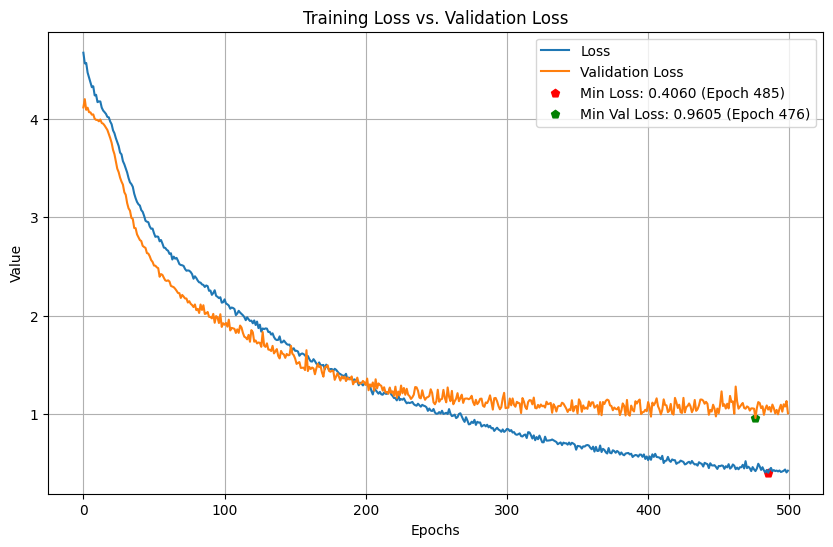

In [131]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

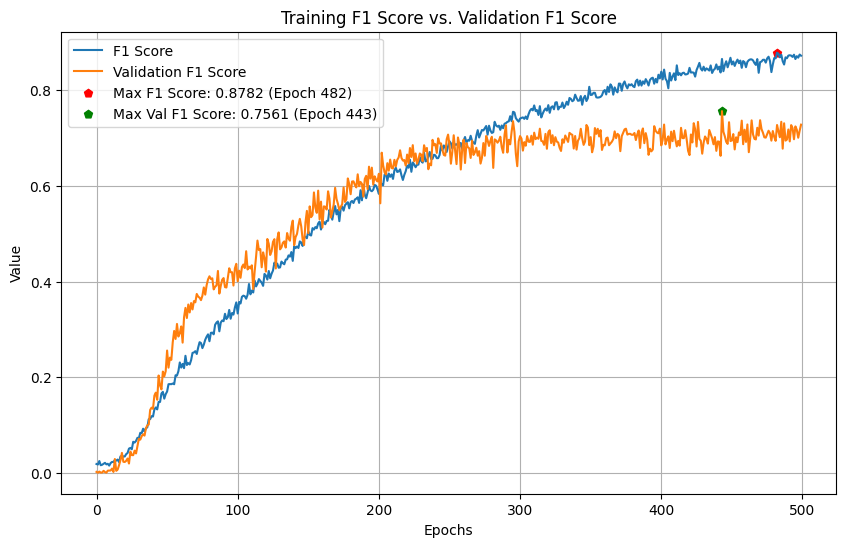

In [132]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [133]:
reconstructed_model = tf.keras.models.load_model("1 1D-CNN + 1 GRU Trial 722")

In [134]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 116, 150)          897900    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 150)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 11, 150)           0         
                                                                 
 gru_1 (GRU)                 (None, 150)               135900    
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 110)               16610     
                                                      

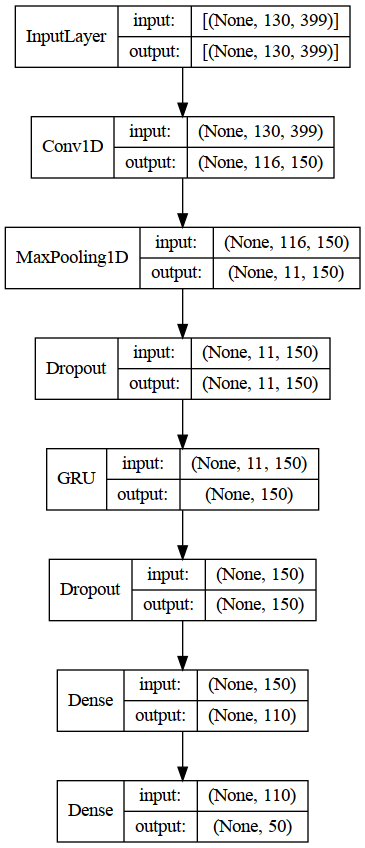

In [135]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

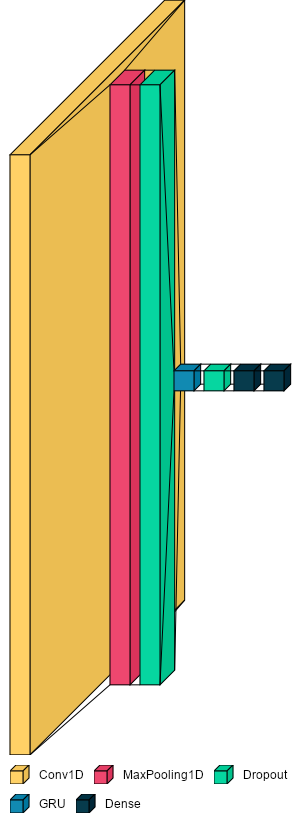

In [136]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [137]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 0.9942 - f1_score: 0.7561


[0.9941567182540894, 0.7561458349227905]

In [138]:
reconstructed_model.evaluate(Xtrain, Ytrain, batch_size=96)

28/28 [==============================] - 1s 32ms/step - loss: 0.1065 - f1_score: 0.9830


[0.10654260963201523, 0.9830050468444824]

In [140]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

         AXE      0.800     1.000     0.889         8
    BACKPACK      0.625     0.833     0.714         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.769     1.000     0.870        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.375     0.545         8
   BREAKFAST      0.600     0.500     0.545         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.300     0.500     0.375         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      1.000     0.500     0.667         6
      DINNER      0.889     1.000     0.941         8
         DOG      0.714    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1D-CNN + 1 GRU Trial 722 Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [120]:
act_function = 'mish'

model = Sequential()
model.add(
    Conv1D(filters=150,
           kernel_size=15,
           activation=act_function,
           input_shape=(130, 399)))
model.add(MaxPooling1D(pool_size=10))
model.add(Dropout(.55))
model.add(
    GRU(units=150,
        return_sequences=False,
        kernel_regularizer=regularizers.l2(.00043122634871936203)))
model.add(Dropout(.7))
model.add(Dense(units=110, activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.00021882052801027956),
              loss='categorical_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

2023-09-11 23:43:23.010449: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 23:43:23.095320: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 116, 150)          897900    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 150)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 150)           0         
                                                                 
 gru (GRU)                   (None, 150)               135900    
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 110)               16610     
                                                        

2023-09-11 23:43:28.029730: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2023-09-11 23:43:28.719223: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f3ff80a7e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-11 23:43:28.719274: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-11 23:43:28.732911: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-11 23:43:28.891387: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 4.1241 - f1_score: 0.0167

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 19s 532ms/step - loss: 4.1241 - f1_score: 0.0167 - val_loss: 4.0085 - val_f1_score: 0.0023
Epoch 2/500
28/28 [==============================] - 3s 109ms/step - loss: 4.0314 - f1_score: 0.0162 - val_loss: 4.0070 - val_f1_score: 0.0011
Epoch 3/500
28/28 [==============================] - 3s 109ms/step - loss: 4.0162 - f1_score: 0.0201 - val_loss: 3.9963 - val_f1_score: 9.6970e-04
Epoch 4/500
28/28 [==============================] - 3s 110ms/step - loss: 4.0074 - f1_score: 0.0136 - val_loss: 3.9977 - val_f1_score: 5.0000e-04
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 3.9960 - f1_score: 0.0227

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 362ms/step - loss: 3.9960 - f1_score: 0.0227 - val_loss: 3.9865 - val_f1_score: 0.0043
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 3.9896 - f1_score: 0.0145

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 375ms/step - loss: 3.9896 - f1_score: 0.0145 - val_loss: 3.9780 - val_f1_score: 0.0104
Epoch 7/500
28/28 [==============================] - 3s 110ms/step - loss: 3.9804 - f1_score: 0.0204 - val_loss: 3.9680 - val_f1_score: 0.0068
Epoch 8/500
28/28 [==============================] - 3s 113ms/step - loss: 3.9608 - f1_score: 0.0206 - val_loss: 3.9422 - val_f1_score: 0.0089
Epoch 9/500
28/28 [==============================] - 3s 110ms/step - loss: 3.9421 - f1_score: 0.0224 - val_loss: 3.9103 - val_f1_score: 0.0059
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.9025 - f1_score: 0.0307

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 396ms/step - loss: 3.9025 - f1_score: 0.0307 - val_loss: 3.8368 - val_f1_score: 0.0179
Epoch 11/500
28/28 [==============================] - 3s 110ms/step - loss: 3.8408 - f1_score: 0.0312 - val_loss: 3.7403 - val_f1_score: 0.0070
Epoch 12/500
28/28 [==============================] - 3s 110ms/step - loss: 3.7638 - f1_score: 0.0301 - val_loss: 3.6390 - val_f1_score: 0.0112
Epoch 13/500
28/28 [==============================] - 3s 111ms/step - loss: 3.7119 - f1_score: 0.0279 - val_loss: 3.5612 - val_f1_score: 0.0068
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 3.6482 - f1_score: 0.0423

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 463ms/step - loss: 3.6482 - f1_score: 0.0423 - val_loss: 3.5167 - val_f1_score: 0.0225
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 3.6238 - f1_score: 0.0405

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 365ms/step - loss: 3.6238 - f1_score: 0.0405 - val_loss: 3.4501 - val_f1_score: 0.0343
Epoch 16/500
28/28 [==============================] - 3s 110ms/step - loss: 3.5713 - f1_score: 0.0471 - val_loss: 3.3867 - val_f1_score: 0.0257
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 3.5245 - f1_score: 0.0473

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 363ms/step - loss: 3.5245 - f1_score: 0.0473 - val_loss: 3.3033 - val_f1_score: 0.0492
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.4902 - f1_score: 0.0485

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 361ms/step - loss: 3.4902 - f1_score: 0.0485 - val_loss: 3.2648 - val_f1_score: 0.0665
Epoch 19/500
28/28 [==============================] - 3s 110ms/step - loss: 3.4269 - f1_score: 0.0645 - val_loss: 3.2122 - val_f1_score: 0.0622
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 3.3929 - f1_score: 0.0658

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 425ms/step - loss: 3.3929 - f1_score: 0.0658 - val_loss: 3.1325 - val_f1_score: 0.0843
Epoch 21/500
28/28 [==============================] - 3s 110ms/step - loss: 3.3524 - f1_score: 0.0742 - val_loss: 3.1051 - val_f1_score: 0.0766
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 3.3085 - f1_score: 0.0688

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 373ms/step - loss: 3.3085 - f1_score: 0.0688 - val_loss: 3.0723 - val_f1_score: 0.0882
Epoch 23/500
28/28 [==============================] - 3s 110ms/step - loss: 3.2931 - f1_score: 0.0730 - val_loss: 3.0355 - val_f1_score: 0.0778
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 3.2743 - f1_score: 0.0745

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 364ms/step - loss: 3.2743 - f1_score: 0.0745 - val_loss: 3.0109 - val_f1_score: 0.0929
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 3.2616 - f1_score: 0.0827

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 402ms/step - loss: 3.2616 - f1_score: 0.0827 - val_loss: 2.9637 - val_f1_score: 0.1025
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 3.2141 - f1_score: 0.0798

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 361ms/step - loss: 3.2141 - f1_score: 0.0798 - val_loss: 2.9374 - val_f1_score: 0.1082
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 3.2029 - f1_score: 0.0760

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 383ms/step - loss: 3.2029 - f1_score: 0.0760 - val_loss: 2.9019 - val_f1_score: 0.1084
Epoch 28/500
28/28 [==============================] - 3s 110ms/step - loss: 3.1535 - f1_score: 0.0930 - val_loss: 2.8625 - val_f1_score: 0.1027
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 3.1535 - f1_score: 0.0986

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 397ms/step - loss: 3.1535 - f1_score: 0.0986 - val_loss: 2.8378 - val_f1_score: 0.1165
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 3.1166 - f1_score: 0.0916

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 352ms/step - loss: 3.1166 - f1_score: 0.0916 - val_loss: 2.7980 - val_f1_score: 0.1235
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 3.1147 - f1_score: 0.0980

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 355ms/step - loss: 3.1147 - f1_score: 0.0980 - val_loss: 2.8082 - val_f1_score: 0.1285
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 3.0795 - f1_score: 0.1012

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 408ms/step - loss: 3.0795 - f1_score: 0.1012 - val_loss: 2.7565 - val_f1_score: 0.1384
Epoch 33/500
28/28 [==============================] - 3s 110ms/step - loss: 3.0747 - f1_score: 0.0965 - val_loss: 2.7598 - val_f1_score: 0.1135
Epoch 34/500
28/28 [==============================] - 3s 110ms/step - loss: 3.0479 - f1_score: 0.1121 - val_loss: 2.7006 - val_f1_score: 0.1329
Epoch 35/500
28/28 [==============================] - 3s 110ms/step - loss: 3.0130 - f1_score: 0.1157 - val_loss: 2.7352 - val_f1_score: 0.1288
Epoch 36/500
28/28 [==============================] - 3s 110ms/step - loss: 3.0119 - f1_score: 0.1100 - val_loss: 2.6682 - val_f1_score: 0.1287
Epoch 37/500
28/28 [==============================] - 3s 110ms/step - loss: 2.9557 - f1_score: 0.1224 - val_loss: 2.7244 - val_f1_score: 0.1055
Epoch 38/500
28/28 [==============================] - 3s 110ms/step - loss: 2.9651 - f1_score: 0.1278 - val_loss: 2.7081 - val_f1_score: 0.1177
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 446ms/step - loss: 2.9162 - f1_score: 0.1368 - val_loss: 2.5660 - val_f1_score: 0.1595
Epoch 41/500
28/28 [==============================] - 3s 110ms/step - loss: 2.8875 - f1_score: 0.1309 - val_loss: 2.6080 - val_f1_score: 0.1328
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 2.9275 - f1_score: 0.1248

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 415ms/step - loss: 2.9275 - f1_score: 0.1248 - val_loss: 2.5910 - val_f1_score: 0.1734
Epoch 43/500
28/28 [==============================] - 3s 110ms/step - loss: 2.9010 - f1_score: 0.1404 - val_loss: 2.6950 - val_f1_score: 0.1195
Epoch 44/500
28/28 [==============================] - 3s 111ms/step - loss: 2.8674 - f1_score: 0.1332 - val_loss: 2.6066 - val_f1_score: 0.1576
Epoch 45/500
28/28 [==============================] - 3s 110ms/step - loss: 2.8533 - f1_score: 0.1408 - val_loss: 2.6277 - val_f1_score: 0.1227
Epoch 46/500
28/28 [==============================] - 3s 110ms/step - loss: 2.8481 - f1_score: 0.1456 - val_loss: 2.5130 - val_f1_score: 0.1491
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 2.8281 - f1_score: 0.1437

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 15s 542ms/step - loss: 2.8281 - f1_score: 0.1437 - val_loss: 2.5439 - val_f1_score: 0.1775
Epoch 48/500
28/28 [==============================] - 3s 111ms/step - loss: 2.8197 - f1_score: 0.1452 - val_loss: 2.5806 - val_f1_score: 0.1482
Epoch 49/500
28/28 [==============================] - ETA: 0s - loss: 2.7937 - f1_score: 0.1479

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 429ms/step - loss: 2.7937 - f1_score: 0.1479 - val_loss: 2.5184 - val_f1_score: 0.1775
Epoch 50/500
28/28 [==============================] - 3s 111ms/step - loss: 2.7974 - f1_score: 0.1422 - val_loss: 2.5666 - val_f1_score: 0.1514
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 2.7565 - f1_score: 0.1558

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 396ms/step - loss: 2.7565 - f1_score: 0.1558 - val_loss: 2.5334 - val_f1_score: 0.1818
Epoch 52/500
28/28 [==============================] - 3s 111ms/step - loss: 2.7858 - f1_score: 0.1533 - val_loss: 2.5428 - val_f1_score: 0.1774
Epoch 53/500
28/28 [==============================] - ETA: 0s - loss: 2.7396 - f1_score: 0.1635

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 418ms/step - loss: 2.7396 - f1_score: 0.1635 - val_loss: 2.4765 - val_f1_score: 0.1994
Epoch 54/500
28/28 [==============================] - ETA: 0s - loss: 2.7175 - f1_score: 0.1643

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 445ms/step - loss: 2.7175 - f1_score: 0.1643 - val_loss: 2.5038 - val_f1_score: 0.2138
Epoch 55/500
28/28 [==============================] - 3s 111ms/step - loss: 2.7142 - f1_score: 0.1621 - val_loss: 2.4862 - val_f1_score: 0.2036
Epoch 56/500
28/28 [==============================] - 3s 111ms/step - loss: 2.7149 - f1_score: 0.1750 - val_loss: 2.4934 - val_f1_score: 0.1867
Epoch 57/500
28/28 [==============================] - 3s 112ms/step - loss: 2.6948 - f1_score: 0.1706 - val_loss: 2.4923 - val_f1_score: 0.1831
Epoch 58/500
28/28 [==============================] - 3s 112ms/step - loss: 2.6801 - f1_score: 0.1843 - val_loss: 2.4521 - val_f1_score: 0.2028
Epoch 59/500
28/28 [==============================] - 3s 112ms/step - loss: 2.6860 - f1_score: 0.1877 - val_loss: 2.4405 - val_f1_score: 0.2014
Epoch 60/500
28/28 [==============================] - 3s 113ms/step - loss: 2.6780 - f1_score: 0.1902 - val_loss: 2.4400 - val_f1_score: 0.2072
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 465ms/step - loss: 2.6591 - f1_score: 0.1779 - val_loss: 2.4050 - val_f1_score: 0.2278
Epoch 62/500
28/28 [==============================] - ETA: 0s - loss: 2.6541 - f1_score: 0.1808

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 430ms/step - loss: 2.6541 - f1_score: 0.1808 - val_loss: 2.3935 - val_f1_score: 0.2284
Epoch 63/500
28/28 [==============================] - ETA: 0s - loss: 2.6623 - f1_score: 0.1774

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 428ms/step - loss: 2.6623 - f1_score: 0.1774 - val_loss: 2.3793 - val_f1_score: 0.2376
Epoch 64/500
28/28 [==============================] - ETA: 0s - loss: 2.6147 - f1_score: 0.1998

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 460ms/step - loss: 2.6147 - f1_score: 0.1998 - val_loss: 2.3684 - val_f1_score: 0.2423
Epoch 65/500
28/28 [==============================] - 3s 111ms/step - loss: 2.6266 - f1_score: 0.1905 - val_loss: 2.3988 - val_f1_score: 0.2252
Epoch 66/500
28/28 [==============================] - 3s 113ms/step - loss: 2.6384 - f1_score: 0.1841 - val_loss: 2.3856 - val_f1_score: 0.2198
Epoch 67/500
28/28 [==============================] - ETA: 0s - loss: 2.6290 - f1_score: 0.1966

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 427ms/step - loss: 2.6290 - f1_score: 0.1966 - val_loss: 2.3913 - val_f1_score: 0.2565
Epoch 68/500
28/28 [==============================] - 3s 110ms/step - loss: 2.6239 - f1_score: 0.1928 - val_loss: 2.3921 - val_f1_score: 0.2271
Epoch 69/500
28/28 [==============================] - ETA: 0s - loss: 2.5670 - f1_score: 0.1911

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 388ms/step - loss: 2.5670 - f1_score: 0.1911 - val_loss: 2.3338 - val_f1_score: 0.2734
Epoch 70/500
28/28 [==============================] - 3s 110ms/step - loss: 2.6017 - f1_score: 0.1932 - val_loss: 2.3591 - val_f1_score: 0.2479
Epoch 71/500
28/28 [==============================] - 3s 112ms/step - loss: 2.5418 - f1_score: 0.2011 - val_loss: 2.3501 - val_f1_score: 0.2480
Epoch 72/500
28/28 [==============================] - 3s 111ms/step - loss: 2.5912 - f1_score: 0.2017 - val_loss: 2.4458 - val_f1_score: 0.2097
Epoch 73/500
28/28 [==============================] - 3s 111ms/step - loss: 2.5817 - f1_score: 0.2024 - val_loss: 2.3817 - val_f1_score: 0.2445
Epoch 74/500
28/28 [==============================] - 3s 111ms/step - loss: 2.5464 - f1_score: 0.2117 - val_loss: 2.3364 - val_f1_score: 0.2466
Epoch 75/500
28/28 [==============================] - 3s 111ms/step - loss: 2.5309 - f1_score: 0.2212 - val_loss: 2.3170 - val_f1_score: 0.2532
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 453ms/step - loss: 2.5162 - f1_score: 0.2092 - val_loss: 2.2678 - val_f1_score: 0.3070
Epoch 79/500
28/28 [==============================] - 3s 111ms/step - loss: 2.5088 - f1_score: 0.2067 - val_loss: 2.3098 - val_f1_score: 0.2499
Epoch 80/500
28/28 [==============================] - 3s 111ms/step - loss: 2.4824 - f1_score: 0.2191 - val_loss: 2.3032 - val_f1_score: 0.2693
Epoch 81/500
28/28 [==============================] - 3s 112ms/step - loss: 2.4868 - f1_score: 0.2174 - val_loss: 2.3202 - val_f1_score: 0.2465
Epoch 82/500
28/28 [==============================] - ETA: 0s - loss: 2.5349 - f1_score: 0.2090

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 427ms/step - loss: 2.5349 - f1_score: 0.2090 - val_loss: 2.2852 - val_f1_score: 0.3159
Epoch 83/500
28/28 [==============================] - 3s 111ms/step - loss: 2.4631 - f1_score: 0.2253 - val_loss: 2.2276 - val_f1_score: 0.3003
Epoch 84/500
28/28 [==============================] - 3s 111ms/step - loss: 2.4478 - f1_score: 0.2306 - val_loss: 2.2570 - val_f1_score: 0.2647
Epoch 85/500
28/28 [==============================] - 3s 111ms/step - loss: 2.4685 - f1_score: 0.2214 - val_loss: 2.2518 - val_f1_score: 0.2846
Epoch 86/500
28/28 [==============================] - 3s 111ms/step - loss: 2.4736 - f1_score: 0.2244 - val_loss: 2.2805 - val_f1_score: 0.2559
Epoch 87/500
28/28 [==============================] - 3s 113ms/step - loss: 2.4370 - f1_score: 0.2290 - val_loss: 2.2333 - val_f1_score: 0.2960
Epoch 88/500
28/28 [==============================] - 3s 113ms/step - loss: 2.4427 - f1_score: 0.2314 - val_loss: 2.2386 - val_f1_score: 0.2949
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 469ms/step - loss: 2.4239 - f1_score: 0.2390 - val_loss: 2.2369 - val_f1_score: 0.3245
Epoch 92/500
28/28 [==============================] - 3s 111ms/step - loss: 2.3824 - f1_score: 0.2551 - val_loss: 2.2103 - val_f1_score: 0.3160
Epoch 93/500
28/28 [==============================] - 3s 111ms/step - loss: 2.4063 - f1_score: 0.2452 - val_loss: 2.2056 - val_f1_score: 0.3011
Epoch 94/500
28/28 [==============================] - 3s 113ms/step - loss: 2.3736 - f1_score: 0.2527 - val_loss: 2.2335 - val_f1_score: 0.3012
Epoch 95/500
28/28 [==============================] - 3s 115ms/step - loss: 2.3837 - f1_score: 0.2468 - val_loss: 2.2738 - val_f1_score: 0.2951
Epoch 96/500
28/28 [==============================] - ETA: 0s - loss: 2.3770 - f1_score: 0.2553

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 445ms/step - loss: 2.3770 - f1_score: 0.2553 - val_loss: 2.2116 - val_f1_score: 0.3249
Epoch 97/500
28/28 [==============================] - 3s 111ms/step - loss: 2.3721 - f1_score: 0.2503 - val_loss: 2.2149 - val_f1_score: 0.3025
Epoch 98/500
28/28 [==============================] - 3s 112ms/step - loss: 2.3615 - f1_score: 0.2538 - val_loss: 2.2819 - val_f1_score: 0.2834
Epoch 99/500
28/28 [==============================] - 3s 112ms/step - loss: 2.3956 - f1_score: 0.2440 - val_loss: 2.2009 - val_f1_score: 0.3081
Epoch 100/500
28/28 [==============================] - 3s 112ms/step - loss: 2.3225 - f1_score: 0.2687 - val_loss: 2.1866 - val_f1_score: 0.3160
Epoch 101/500
28/28 [==============================] - 3s 111ms/step - loss: 2.3495 - f1_score: 0.2540 - val_loss: 2.2283 - val_f1_score: 0.2860
Epoch 102/500
28/28 [==============================] - 3s 111ms/step - loss: 2.3372 - f1_score: 0.2606 - val_loss: 2.2133 - val_f1_score: 0.3018
E

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 452ms/step - loss: 2.2817 - f1_score: 0.2828 - val_loss: 2.1135 - val_f1_score: 0.3449
Epoch 122/500
28/28 [==============================] - ETA: 0s - loss: 2.2958 - f1_score: 0.2721

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 403ms/step - loss: 2.2958 - f1_score: 0.2721 - val_loss: 2.1002 - val_f1_score: 0.3460
Epoch 123/500
28/28 [==============================] - ETA: 0s - loss: 2.2341 - f1_score: 0.2947

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 421ms/step - loss: 2.2341 - f1_score: 0.2947 - val_loss: 2.1302 - val_f1_score: 0.3553
Epoch 124/500
28/28 [==============================] - 3s 111ms/step - loss: 2.2418 - f1_score: 0.2931 - val_loss: 2.1111 - val_f1_score: 0.3453
Epoch 125/500
28/28 [==============================] - 3s 111ms/step - loss: 2.2506 - f1_score: 0.2829 - val_loss: 2.1035 - val_f1_score: 0.3202
Epoch 126/500
28/28 [==============================] - 3s 112ms/step - loss: 2.2381 - f1_score: 0.2903 - val_loss: 2.1061 - val_f1_score: 0.3426
Epoch 127/500
28/28 [==============================] - 3s 112ms/step - loss: 2.2418 - f1_score: 0.2812 - val_loss: 2.1447 - val_f1_score: 0.3184
Epoch 128/500
28/28 [==============================] - 3s 112ms/step - loss: 2.2051 - f1_score: 0.3051 - val_loss: 2.1990 - val_f1_score: 0.2871
Epoch 129/500
28/28 [==============================] - 3s 112ms/step - loss: 2.2703 - f1_score: 0.2833 - val_loss: 2.1120 - val_f1_score: 0.335

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 458ms/step - loss: 2.2075 - f1_score: 0.2923 - val_loss: 2.0852 - val_f1_score: 0.3572
Epoch 139/500
28/28 [==============================] - ETA: 0s - loss: 2.1816 - f1_score: 0.3172

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 418ms/step - loss: 2.1816 - f1_score: 0.3172 - val_loss: 2.0601 - val_f1_score: 0.3596
Epoch 140/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1640 - f1_score: 0.3107 - val_loss: 2.0838 - val_f1_score: 0.3315
Epoch 141/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1851 - f1_score: 0.3089 - val_loss: 2.0159 - val_f1_score: 0.3586
Epoch 142/500
28/28 [==============================] - 3s 112ms/step - loss: 2.1647 - f1_score: 0.3160 - val_loss: 2.0952 - val_f1_score: 0.3192
Epoch 143/500
28/28 [==============================] - ETA: 0s - loss: 2.1882 - f1_score: 0.3233

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 389ms/step - loss: 2.1882 - f1_score: 0.3233 - val_loss: 2.0601 - val_f1_score: 0.3617
Epoch 144/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1344 - f1_score: 0.3212 - val_loss: 2.0763 - val_f1_score: 0.3434
Epoch 145/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1024 - f1_score: 0.3290 - val_loss: 2.0051 - val_f1_score: 0.3424
Epoch 146/500
28/28 [==============================] - 3s 112ms/step - loss: 2.1087 - f1_score: 0.3277 - val_loss: 2.0233 - val_f1_score: 0.3505
Epoch 147/500
28/28 [==============================] - 3s 112ms/step - loss: 2.1414 - f1_score: 0.3253 - val_loss: 2.0585 - val_f1_score: 0.3529
Epoch 148/500
28/28 [==============================] - 3s 112ms/step - loss: 2.1385 - f1_score: 0.3197 - val_loss: 2.0480 - val_f1_score: 0.3488
Epoch 149/500
28/28 [==============================] - ETA: 0s - loss: 2.1096 - f1_score: 0.3274

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 431ms/step - loss: 2.1096 - f1_score: 0.3274 - val_loss: 2.0597 - val_f1_score: 0.3641
Epoch 150/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1235 - f1_score: 0.3209 - val_loss: 2.0658 - val_f1_score: 0.3392
Epoch 151/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1433 - f1_score: 0.3147 - val_loss: 2.0240 - val_f1_score: 0.3612
Epoch 152/500
28/28 [==============================] - 3s 112ms/step - loss: 2.1254 - f1_score: 0.3260 - val_loss: 2.1578 - val_f1_score: 0.2926
Epoch 153/500
28/28 [==============================] - 3s 112ms/step - loss: 2.1180 - f1_score: 0.3296 - val_loss: 2.0261 - val_f1_score: 0.3186
Epoch 154/500
28/28 [==============================] - 3s 112ms/step - loss: 2.1059 - f1_score: 0.3376 - val_loss: 2.0399 - val_f1_score: 0.3615
Epoch 155/500
28/28 [==============================] - 3s 113ms/step - loss: 2.1270 - f1_score: 0.3202 - val_loss: 2.0788 - val_f1_score: 0.345

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 424ms/step - loss: 2.1075 - f1_score: 0.3322 - val_loss: 2.0083 - val_f1_score: 0.3658
Epoch 159/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1094 - f1_score: 0.3289 - val_loss: 2.0567 - val_f1_score: 0.3603
Epoch 160/500
28/28 [==============================] - ETA: 0s - loss: 2.0797 - f1_score: 0.3405

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 449ms/step - loss: 2.0797 - f1_score: 0.3405 - val_loss: 1.9669 - val_f1_score: 0.3855
Epoch 161/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0797 - f1_score: 0.3449 - val_loss: 2.0152 - val_f1_score: 0.3661
Epoch 162/500
28/28 [==============================] - ETA: 0s - loss: 2.0498 - f1_score: 0.3448

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 410ms/step - loss: 2.0498 - f1_score: 0.3448 - val_loss: 1.9747 - val_f1_score: 0.3904
Epoch 163/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0940 - f1_score: 0.3351 - val_loss: 2.0247 - val_f1_score: 0.3495
Epoch 164/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0637 - f1_score: 0.3506 - val_loss: 2.0300 - val_f1_score: 0.3587
Epoch 165/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0729 - f1_score: 0.3397 - val_loss: 1.9742 - val_f1_score: 0.3776
Epoch 166/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0903 - f1_score: 0.3313 - val_loss: 2.0375 - val_f1_score: 0.3551
Epoch 167/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0657 - f1_score: 0.3354 - val_loss: 1.9985 - val_f1_score: 0.3702
Epoch 168/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0889 - f1_score: 0.3425 - val_loss: 1.9821 - val_f1_score: 0.380

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 456ms/step - loss: 2.0501 - f1_score: 0.3483 - val_loss: 1.9701 - val_f1_score: 0.4131
Epoch 171/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0606 - f1_score: 0.3484 - val_loss: 1.9471 - val_f1_score: 0.3925
Epoch 172/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0331 - f1_score: 0.3546 - val_loss: 2.0405 - val_f1_score: 0.4037
Epoch 173/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0444 - f1_score: 0.3451 - val_loss: 2.0493 - val_f1_score: 0.3573
Epoch 174/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0057 - f1_score: 0.3528 - val_loss: 2.0160 - val_f1_score: 0.3743
Epoch 175/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0320 - f1_score: 0.3490 - val_loss: 2.0025 - val_f1_score: 0.3754
Epoch 176/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0274 - f1_score: 0.3592 - val_loss: 2.1204 - val_f1_score: 0.391

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 449ms/step - loss: 2.0142 - f1_score: 0.3684 - val_loss: 1.9566 - val_f1_score: 0.4224
Epoch 187/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0275 - f1_score: 0.3479 - val_loss: 1.9450 - val_f1_score: 0.4135
Epoch 188/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9583 - f1_score: 0.3749 - val_loss: 1.9451 - val_f1_score: 0.4055
Epoch 189/500
28/28 [==============================] - ETA: 0s - loss: 1.9940 - f1_score: 0.3684

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 439ms/step - loss: 1.9940 - f1_score: 0.3684 - val_loss: 1.9144 - val_f1_score: 0.4235
Epoch 190/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0429 - f1_score: 0.3451 - val_loss: 1.9194 - val_f1_score: 0.4042
Epoch 191/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9984 - f1_score: 0.3700 - val_loss: 1.9070 - val_f1_score: 0.3843
Epoch 192/500
28/28 [==============================] - 3s 116ms/step - loss: 1.9873 - f1_score: 0.3714 - val_loss: 1.9736 - val_f1_score: 0.3869
Epoch 193/500
28/28 [==============================] - 3s 112ms/step - loss: 1.9718 - f1_score: 0.3684 - val_loss: 2.0701 - val_f1_score: 0.3487
Epoch 194/500
28/28 [==============================] - 3s 112ms/step - loss: 1.9844 - f1_score: 0.3690 - val_loss: 1.9672 - val_f1_score: 0.3979
Epoch 195/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0022 - f1_score: 0.3677 - val_loss: 2.0443 - val_f1_score: 0.362

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 29s 1s/step - loss: 1.9989 - f1_score: 0.3648 - val_loss: 1.9033 - val_f1_score: 0.4252
Epoch 197/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9620 - f1_score: 0.3741 - val_loss: 1.9578 - val_f1_score: 0.4065
Epoch 198/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9870 - f1_score: 0.3752 - val_loss: 1.9391 - val_f1_score: 0.4053
Epoch 199/500
28/28 [==============================] - ETA: 0s - loss: 1.9998 - f1_score: 0.3635

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 415ms/step - loss: 1.9998 - f1_score: 0.3635 - val_loss: 1.9113 - val_f1_score: 0.4264
Epoch 200/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9635 - f1_score: 0.3914 - val_loss: 1.9346 - val_f1_score: 0.4042
Epoch 201/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9597 - f1_score: 0.3751 - val_loss: 1.9557 - val_f1_score: 0.3875
Epoch 202/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9762 - f1_score: 0.3724 - val_loss: 1.9948 - val_f1_score: 0.3951
Epoch 203/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9634 - f1_score: 0.3738 - val_loss: 2.0046 - val_f1_score: 0.3899
Epoch 204/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9886 - f1_score: 0.3653 - val_loss: 2.0649 - val_f1_score: 0.3672
Epoch 205/500
28/28 [==============================] - ETA: 0s - loss: 1.9346 - f1_score: 0.3788

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 20s 722ms/step - loss: 1.9346 - f1_score: 0.3788 - val_loss: 1.9009 - val_f1_score: 0.4373
Epoch 206/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9296 - f1_score: 0.4040 - val_loss: 1.9223 - val_f1_score: 0.4220
Epoch 207/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9593 - f1_score: 0.3703 - val_loss: 1.9705 - val_f1_score: 0.4154
Epoch 208/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9367 - f1_score: 0.3930 - val_loss: 1.9292 - val_f1_score: 0.4160
Epoch 209/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9327 - f1_score: 0.3772 - val_loss: 2.0620 - val_f1_score: 0.3570
Epoch 210/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9042 - f1_score: 0.4015 - val_loss: 1.9802 - val_f1_score: 0.3952
Epoch 211/500
28/28 [==============================] - 3s 112ms/step - loss: 1.9319 - f1_score: 0.3860 - val_loss: 2.0652 - val_f1_score: 0.348

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 485ms/step - loss: 1.8601 - f1_score: 0.4249 - val_loss: 1.8635 - val_f1_score: 0.4561
Epoch 233/500
28/28 [==============================] - 3s 112ms/step - loss: 1.8297 - f1_score: 0.4100 - val_loss: 1.8540 - val_f1_score: 0.4320
Epoch 234/500
28/28 [==============================] - 3s 112ms/step - loss: 1.9066 - f1_score: 0.4049 - val_loss: 2.0368 - val_f1_score: 0.3866
Epoch 235/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9100 - f1_score: 0.3980 - val_loss: 1.8944 - val_f1_score: 0.4164
Epoch 236/500
28/28 [==============================] - 3s 112ms/step - loss: 1.8974 - f1_score: 0.4018 - val_loss: 2.0048 - val_f1_score: 0.3723
Epoch 237/500
28/28 [==============================] - 3s 113ms/step - loss: 1.8491 - f1_score: 0.4072 - val_loss: 1.8427 - val_f1_score: 0.4315
Epoch 238/500
28/28 [==============================] - 3s 112ms/step - loss: 1.8539 - f1_score: 0.4051 - val_loss: 1.9917 - val_f1_score: 0.391

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 14s 514ms/step - loss: 1.7843 - f1_score: 0.4247 - val_loss: 1.7947 - val_f1_score: 0.4572
Epoch 267/500
28/28 [==============================] - 3s 111ms/step - loss: 1.7288 - f1_score: 0.4601 - val_loss: 1.8757 - val_f1_score: 0.4408
Epoch 268/500
28/28 [==============================] - 3s 112ms/step - loss: 1.8096 - f1_score: 0.4255 - val_loss: 1.9551 - val_f1_score: 0.4040
Epoch 269/500
28/28 [==============================] - 3s 113ms/step - loss: 1.7827 - f1_score: 0.4329 - val_loss: 1.8919 - val_f1_score: 0.4267
Epoch 270/500
28/28 [==============================] - 3s 113ms/step - loss: 1.7489 - f1_score: 0.4517 - val_loss: 1.9112 - val_f1_score: 0.4317
Epoch 271/500
28/28 [==============================] - 3s 113ms/step - loss: 1.7752 - f1_score: 0.4278 - val_loss: 2.0063 - val_f1_score: 0.4004
Epoch 272/500
28/28 [==============================] - 3s 113ms/step - loss: 1.7590 - f1_score: 0.4378 - val_loss: 1.9032 - val_f1_score: 0.416

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 458ms/step - loss: 1.7140 - f1_score: 0.4642 - val_loss: 1.8632 - val_f1_score: 0.4598
Epoch 294/500
28/28 [==============================] - 3s 112ms/step - loss: 1.7268 - f1_score: 0.4515 - val_loss: 1.8373 - val_f1_score: 0.4217
Epoch 295/500
28/28 [==============================] - 3s 113ms/step - loss: 1.7038 - f1_score: 0.4730 - val_loss: 1.8231 - val_f1_score: 0.4386
Epoch 296/500
28/28 [==============================] - 3s 113ms/step - loss: 1.7428 - f1_score: 0.4425 - val_loss: 1.9209 - val_f1_score: 0.3804
Epoch 297/500
28/28 [==============================] - 3s 112ms/step - loss: 1.7438 - f1_score: 0.4433 - val_loss: 1.8241 - val_f1_score: 0.4194
Epoch 298/500
28/28 [==============================] - 3s 112ms/step - loss: 1.7360 - f1_score: 0.4543 - val_loss: 1.8481 - val_f1_score: 0.4020
Epoch 299/500
28/28 [==============================] - 3s 112ms/step - loss: 1.7320 - f1_score: 0.4524 - val_loss: 1.9408 - val_f1_score: 0.409

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 14s 512ms/step - loss: 1.6308 - f1_score: 0.4941 - val_loss: 1.8266 - val_f1_score: 0.4651
Epoch 335/500
28/28 [==============================] - 3s 115ms/step - loss: 1.6025 - f1_score: 0.4990 - val_loss: 1.8361 - val_f1_score: 0.4224
Epoch 336/500
28/28 [==============================] - ETA: 0s - loss: 1.6571 - f1_score: 0.4831

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 427ms/step - loss: 1.6571 - f1_score: 0.4831 - val_loss: 1.7681 - val_f1_score: 0.4658
Epoch 337/500
28/28 [==============================] - 3s 112ms/step - loss: 1.6344 - f1_score: 0.4806 - val_loss: 1.8774 - val_f1_score: 0.4311
Epoch 338/500
28/28 [==============================] - 3s 112ms/step - loss: 1.7075 - f1_score: 0.4483 - val_loss: 1.8228 - val_f1_score: 0.4272
Epoch 339/500
28/28 [==============================] - 3s 112ms/step - loss: 1.7003 - f1_score: 0.4568 - val_loss: 1.8529 - val_f1_score: 0.4375
Epoch 340/500
28/28 [==============================] - 3s 112ms/step - loss: 1.6819 - f1_score: 0.4657 - val_loss: 1.9169 - val_f1_score: 0.4054
Epoch 341/500
28/28 [==============================] - 3s 112ms/step - loss: 1.7030 - f1_score: 0.4596 - val_loss: 1.8426 - val_f1_score: 0.4336
Epoch 342/500
28/28 [==============================] - 3s 113ms/step - loss: 1.6437 - f1_score: 0.4884 - val_loss: 1.8695 - val_f1_score: 0.408

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 492ms/step - loss: 1.5322 - f1_score: 0.5121 - val_loss: 1.7120 - val_f1_score: 0.4892
Epoch 400/500
28/28 [==============================] - 3s 112ms/step - loss: 1.5676 - f1_score: 0.5071 - val_loss: 1.7687 - val_f1_score: 0.4520
Epoch 401/500
28/28 [==============================] - 3s 113ms/step - loss: 1.5635 - f1_score: 0.5111 - val_loss: 1.8214 - val_f1_score: 0.4437
Epoch 402/500
28/28 [==============================] - 3s 113ms/step - loss: 1.6313 - f1_score: 0.4880 - val_loss: 1.9231 - val_f1_score: 0.4329
Epoch 403/500
28/28 [==============================] - 3s 113ms/step - loss: 1.5303 - f1_score: 0.5315 - val_loss: 1.7382 - val_f1_score: 0.4445
Epoch 404/500
28/28 [==============================] - 3s 112ms/step - loss: 1.5763 - f1_score: 0.4915 - val_loss: 1.9196 - val_f1_score: 0.4084
Epoch 405/500
28/28 [==============================] - 3s 113ms/step - loss: 1.5526 - f1_score: 0.5122 - val_loss: 1.9050 - val_f1_score: 0.439

In [121]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1D-CNN + 1 GRU Trial 722 Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [122]:
hist_df = pd.read_csv('1 1D-CNN + 1 GRU Trial 722 Mish/history.csv',
                      index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  1.440097  0.543593  1.880525      0.436142
496  1.443164  0.543976  1.956989      0.432248
497  1.480997  0.543414  1.986798      0.420552
498  1.461682  0.536560  1.925142      0.438339
499  1.458318  0.546422  1.910057      0.428913

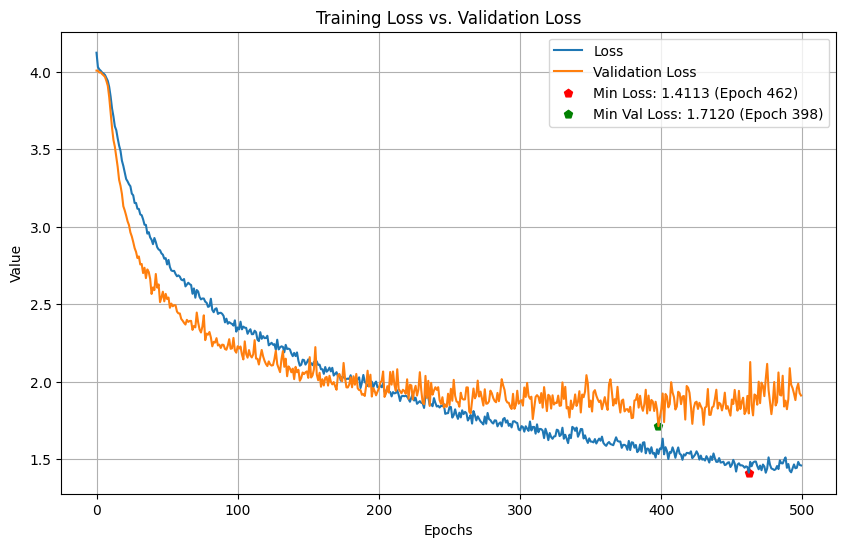

In [123]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

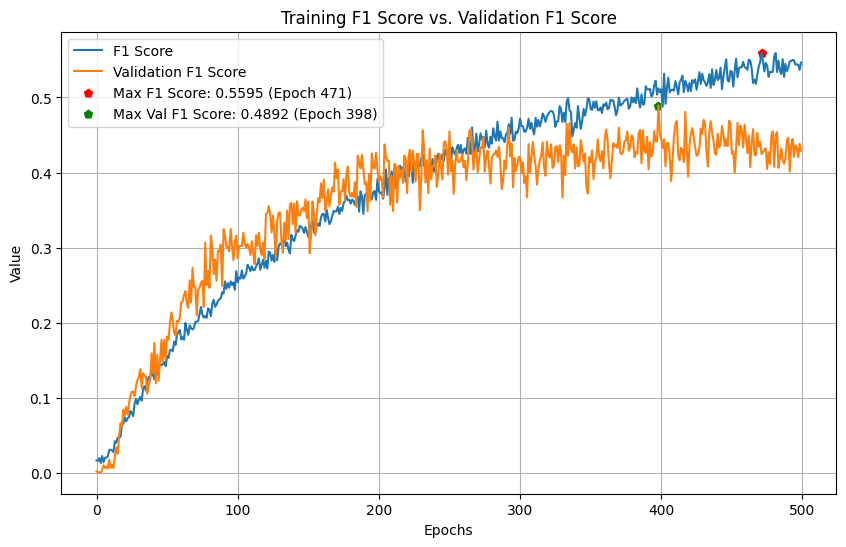

In [124]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [125]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

         AXE      0.429     0.375     0.400         8
    BACKPACK      0.200     0.167     0.182         6
  BASKETBALL      0.818     0.900     0.857        10
         BEE      0.571     0.400     0.471        10
        BELT      0.667     1.000     0.800         4
        BITE      0.200     0.125     0.154         8
   BREAKFAST      0.444     0.667     0.533         6
      CANCER      0.667     0.250     0.364         8
   CHRISTMAS      0.500     0.667     0.571         6
    CONFUSED      0.235     0.667     0.348         6
        DARK      1.000     0.750     0.857         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      0.364     0.667     0.471         6
      DEMAND      0.750     0.375     0.500         8
     DEVELOP      0.286     0.667     0.400         6
      DINNER      0.429     0.375     0.400         8
         DOG      0.143    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
reconstructed_model = tf.keras.models.load_model(
    "1 1D-CNN + 1 GRU Trial 722 Mish")

In [135]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 116, 150)          897900    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 150)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 150)           0         
                                                                 
 gru (GRU)                   (None, 150)               135900    
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 110)               16610     
                                                        

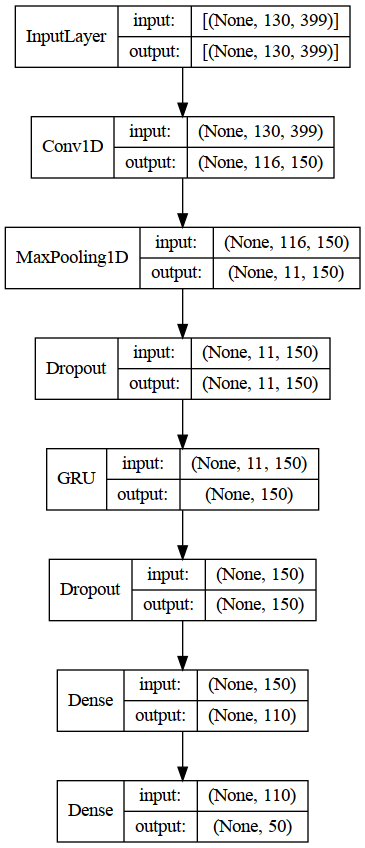

In [136]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

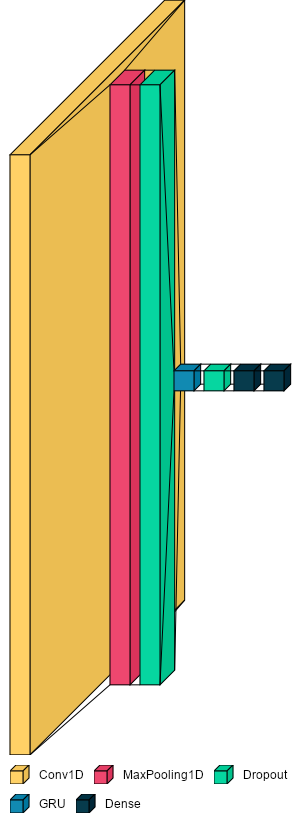

In [137]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [138]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 20ms/step - loss: 1.7120 - f1_score: 0.4892


[1.7119686603546143, 0.4891718626022339]

In [139]:
reconstructed_model.evaluate(Xtrain, Ytrain)

2023-09-23 11:45:16.176598: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.
2023-09-23 11:45:16.738108: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.


84/84 [==============================] - 2s 18ms/step - loss: 1.1024 - f1_score: 0.6544


[1.1024389266967773, 0.6543626189231873]

In [140]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

         AXE      0.375     0.375     0.375         8
    BACKPACK      0.333     0.500     0.400         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.667     0.400     0.500        10
        BELT      0.500     0.500     0.500         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      0.500     0.667     0.571         6
      CANCER      0.400     0.250     0.308         8
   CHRISTMAS      0.571     0.667     0.615         6
    CONFUSED      0.286     0.667     0.400         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.182     0.333     0.235         6
      DECIDE      0.444     0.667     0.533         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.316     1.000     0.480         6
      DINNER      0.429     0.375     0.400         8
         DOG      0.500    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tuning 2 1D CNN Layer + 1 GRU

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_979728/1222377179.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='elu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[3, 4, 5, 6, 7, 8, 9, 10],
                       default=5,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[3, 4, 5, 6, 7, 8, 9, 10],
                default=5,
            )))
        model.add(
            Conv1D(filters=hp.Int('filters_2',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_2',
                       values=[1, 2, 3, 4, 5],
                       default=5,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_2',
                values=[1, 2, 3, 4, 5],
                default=5,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(
            GRU(units=hp.Int('units_1',
                             min_value=50,
                             max_value=200,
                             step=25,
                             default=100),
                return_sequences=False,
                kernel_regularizer=regularizers.l2(
                    hp.Float('regularizer',
                             min_value=1e-4,
                             max_value=1e-2,
                             sampling='LOG',
                             default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [121]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='2_1D_CNN+1_GRU',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/2_1D_CNN+1_GRU/tuner0.json


In [122]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
dense_activation (Choice)
{'default': 'elu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pool_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
filters_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
pool_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_va

In [123]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [125]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 06m 29s]
val_f1_score: 0.6204818487167358

Best val_f1_score So Far: 0.7420923709869385
Total elapsed time: 04h 23m 21s
INFO:tensorflow:Oracle triggered exit


In [126]:
best_model = tuner.get_best_models(num_models=10)[0]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [127]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 122, 100)          359200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 100)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 125)           12625     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 125)          0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 125)           0         
                                                                 
 gru (GRU)                   (None, 75)                4

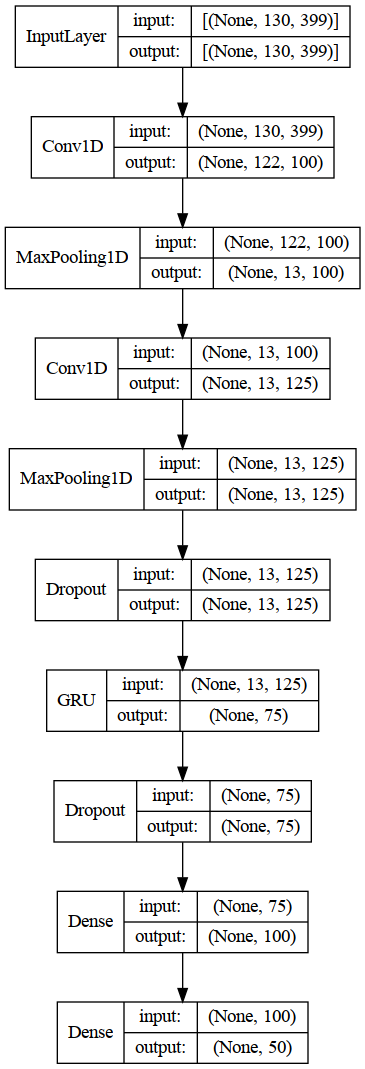

In [128]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [129]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/2_1D_CNN+1_GRU
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0719 summary
Hyperparameters:
dense_activation: selu
filters_1: 100
kernel_1: 9
pool_1: 9
filters_2: 125
kernel_2: 1
pool_2: 1
dropout_1: 0.7000000000000001
units_1: 75
regularizer: 0.0023285010665210285
dropout_2: 0.5
units_2: 100
learning_rate: 0.0003730278430367326
tuner/epochs: 300
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7420923709869385

Trial 0715 summary
Hyperparameters:
dense_activation: mish
filters_1: 200
kernel_1: 4
pool_1: 8
filters_2: 200
kernel_2: 2
pool_2: 1
dropout_1: 0.30000000000000004
units_1: 175
regularizer: 0.001308287664940752
dropout_2: 0.6000000000000001
units_2: 100
learning_rate: 0.00016060165691337782
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0712
Score: 0.7399027943611145

Trial 0714 summary
Hyperparameters:
dense_ac

In [130]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 13ms/step - loss: 1.0145 - f1_score: 0.7642


In [132]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 11ms/step - loss: 0.2685 - f1_score: 0.9316


In [133]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.714     1.000     0.833        10
         BEE      0.529     0.900     0.667        10
        BELT      0.667     1.000     0.800         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      1.000     0.500     0.667         6
      CANCER      1.000     0.625     0.769         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.500     0.333     0.400         6
      DECIDE      0.800     0.667     0.727         6
      DEMAND      0.778     0.875     0.824         8
     DEVELOP      0.500     1.000     0.667         6
      DINNER      1.000     1.000     1.000         8
         DOG      1.000     

In [134]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [135]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 GRU',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [136]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.6913 - f1_score: 0.0234

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 14s 394ms/step - loss: 4.6913 - f1_score: 0.0234 - val_loss: 4.3924 - val_f1_score: 9.6386e-04
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.6019 - f1_score: 0.0168

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 274ms/step - loss: 4.6019 - f1_score: 0.0168 - val_loss: 4.3750 - val_f1_score: 0.0016
Epoch 3/500
28/28 [==============================] - 2s 54ms/step - loss: 4.5267 - f1_score: 0.0226 - val_loss: 4.3292 - val_f1_score: 9.6386e-04
Epoch 4/500
28/28 [==============================] - 2s 54ms/step - loss: 4.4989 - f1_score: 0.0193 - val_loss: 4.2836 - val_f1_score: 0.0012
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 4.4547 - f1_score: 0.0242

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 248ms/step - loss: 4.4528 - f1_score: 0.0235 - val_loss: 4.3090 - val_f1_score: 0.0020
Epoch 6/500
28/28 [==============================] - 2s 55ms/step - loss: 4.4197 - f1_score: 0.0190 - val_loss: 4.2391 - val_f1_score: 9.5890e-04
Epoch 7/500
28/28 [==============================] - 2s 55ms/step - loss: 4.3915 - f1_score: 0.0190 - val_loss: 4.2492 - val_f1_score: 7.2727e-04
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 4.3510 - f1_score: 0.0201

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 261ms/step - loss: 4.3511 - f1_score: 0.0205 - val_loss: 4.2243 - val_f1_score: 0.0024
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 4.3165 - f1_score: 0.0206

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 267ms/step - loss: 4.3165 - f1_score: 0.0206 - val_loss: 4.2002 - val_f1_score: 0.0055
Epoch 10/500
28/28 [==============================] - 2s 55ms/step - loss: 4.2924 - f1_score: 0.0215 - val_loss: 4.1807 - val_f1_score: 0.0011
Epoch 11/500
28/28 [==============================] - 2s 55ms/step - loss: 4.2806 - f1_score: 0.0210 - val_loss: 4.1782 - val_f1_score: 0.0040
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 4.2568 - f1_score: 0.0143

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 283ms/step - loss: 4.2565 - f1_score: 0.0145 - val_loss: 4.1717 - val_f1_score: 0.0072
Epoch 13/500
28/28 [==============================] - 2s 56ms/step - loss: 4.2355 - f1_score: 0.0157 - val_loss: 4.1605 - val_f1_score: 0.0066
Epoch 14/500
28/28 [==============================] - 2s 55ms/step - loss: 4.2054 - f1_score: 0.0214 - val_loss: 4.1406 - val_f1_score: 0.0011
Epoch 15/500
28/28 [==============================] - 2s 55ms/step - loss: 4.1909 - f1_score: 0.0232 - val_loss: 4.1309 - val_f1_score: 0.0036
Epoch 16/500
28/28 [==============================] - 2s 55ms/step - loss: 4.1865 - f1_score: 0.0186 - val_loss: 4.1074 - val_f1_score: 0.0027
Epoch 17/500
28/28 [==============================] - 2s 54ms/step - loss: 4.1683 - f1_score: 0.0221 - val_loss: 4.1060 - val_f1_score: 2.7972e-04
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 4.1519 - f1_score: 0.0198

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 284ms/step - loss: 4.1519 - f1_score: 0.0198 - val_loss: 4.0472 - val_f1_score: 0.0233
Epoch 19/500
28/28 [==============================] - 2s 54ms/step - loss: 4.1191 - f1_score: 0.0225 - val_loss: 4.0035 - val_f1_score: 0.0212
Epoch 20/500
28/28 [==============================] - 2s 54ms/step - loss: 4.0662 - f1_score: 0.0314 - val_loss: 3.9306 - val_f1_score: 0.0125
Epoch 21/500
28/28 [==============================] - 2s 56ms/step - loss: 3.9778 - f1_score: 0.0361 - val_loss: 3.8248 - val_f1_score: 0.0097
Epoch 22/500
27/28 [===========================>..] - ETA: 0s - loss: 3.8693 - f1_score: 0.0368

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 275ms/step - loss: 3.8678 - f1_score: 0.0363 - val_loss: 3.6539 - val_f1_score: 0.0341
Epoch 23/500
28/28 [==============================] - 2s 54ms/step - loss: 3.7759 - f1_score: 0.0440 - val_loss: 3.5517 - val_f1_score: 0.0234
Epoch 24/500
28/28 [==============================] - 2s 55ms/step - loss: 3.7165 - f1_score: 0.0496 - val_loss: 3.4637 - val_f1_score: 0.0243
Epoch 25/500
28/28 [==============================] - 2s 55ms/step - loss: 3.6423 - f1_score: 0.0539 - val_loss: 3.3910 - val_f1_score: 0.0286
Epoch 26/500
27/28 [===========================>..] - ETA: 0s - loss: 3.5696 - f1_score: 0.0660

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 311ms/step - loss: 3.5625 - f1_score: 0.0668 - val_loss: 3.2876 - val_f1_score: 0.0388
Epoch 27/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4954 - f1_score: 0.0784

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 277ms/step - loss: 3.4949 - f1_score: 0.0799 - val_loss: 3.1963 - val_f1_score: 0.0736
Epoch 28/500
28/28 [==============================] - 2s 55ms/step - loss: 3.4135 - f1_score: 0.0860 - val_loss: 3.1936 - val_f1_score: 0.0728
Epoch 29/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3487 - f1_score: 0.1013

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 265ms/step - loss: 3.3476 - f1_score: 0.1012 - val_loss: 3.0964 - val_f1_score: 0.0879
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 3.2908 - f1_score: 0.1122

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 302ms/step - loss: 3.2897 - f1_score: 0.1119 - val_loss: 2.9904 - val_f1_score: 0.1189
Epoch 31/500
28/28 [==============================] - 2s 55ms/step - loss: 3.2073 - f1_score: 0.1162 - val_loss: 2.9514 - val_f1_score: 0.1147
Epoch 32/500
27/28 [===========================>..] - ETA: 0s - loss: 3.1550 - f1_score: 0.1164

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 284ms/step - loss: 3.1488 - f1_score: 0.1176 - val_loss: 2.8584 - val_f1_score: 0.1506
Epoch 33/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0624 - f1_score: 0.1374

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 285ms/step - loss: 3.0585 - f1_score: 0.1375 - val_loss: 2.8036 - val_f1_score: 0.1685
Epoch 34/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0154 - f1_score: 0.1531

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 276ms/step - loss: 3.0113 - f1_score: 0.1546 - val_loss: 2.7360 - val_f1_score: 0.1833
Epoch 35/500
28/28 [==============================] - 2s 55ms/step - loss: 2.9590 - f1_score: 0.1470 - val_loss: 2.6942 - val_f1_score: 0.1808
Epoch 36/500
28/28 [==============================] - 2s 55ms/step - loss: 2.9250 - f1_score: 0.1716 - val_loss: 2.6658 - val_f1_score: 0.1829
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 2.8597 - f1_score: 0.1801

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 293ms/step - loss: 2.8597 - f1_score: 0.1801 - val_loss: 2.6685 - val_f1_score: 0.2050
Epoch 38/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8308 - f1_score: 0.1917

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 284ms/step - loss: 2.8301 - f1_score: 0.1915 - val_loss: 2.5612 - val_f1_score: 0.2724
Epoch 39/500
28/28 [==============================] - 2s 55ms/step - loss: 2.7864 - f1_score: 0.1992 - val_loss: 2.6118 - val_f1_score: 0.2442
Epoch 40/500
28/28 [==============================] - 2s 55ms/step - loss: 2.7558 - f1_score: 0.2036 - val_loss: 2.5356 - val_f1_score: 0.2700
Epoch 41/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7204 - f1_score: 0.2082

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 278ms/step - loss: 2.7230 - f1_score: 0.2103 - val_loss: 2.4222 - val_f1_score: 0.2984
Epoch 42/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6967 - f1_score: 0.2244

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 319ms/step - loss: 2.6959 - f1_score: 0.2231 - val_loss: 2.4102 - val_f1_score: 0.3045
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 2.6629 - f1_score: 0.2365

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 282ms/step - loss: 2.6629 - f1_score: 0.2365 - val_loss: 2.3639 - val_f1_score: 0.3232
Epoch 44/500
28/28 [==============================] - 2s 55ms/step - loss: 2.6119 - f1_score: 0.2378 - val_loss: 2.3797 - val_f1_score: 0.2953
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 2.5791 - f1_score: 0.2636

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 7s 265ms/step - loss: 2.5791 - f1_score: 0.2636 - val_loss: 2.2792 - val_f1_score: 0.3295
Epoch 46/500
28/28 [==============================] - 2s 55ms/step - loss: 2.5283 - f1_score: 0.2729 - val_loss: 2.2762 - val_f1_score: 0.2977
Epoch 47/500
28/28 [==============================] - 2s 55ms/step - loss: 2.5132 - f1_score: 0.2661 - val_loss: 2.2526 - val_f1_score: 0.3098
Epoch 48/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4858 - f1_score: 0.2861

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 280ms/step - loss: 2.4903 - f1_score: 0.2854 - val_loss: 2.2072 - val_f1_score: 0.3387
Epoch 49/500
28/28 [==============================] - 2s 56ms/step - loss: 2.4684 - f1_score: 0.2776 - val_loss: 2.2225 - val_f1_score: 0.3272
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 2.4174 - f1_score: 0.2861

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 306ms/step - loss: 2.4174 - f1_score: 0.2861 - val_loss: 2.1661 - val_f1_score: 0.3507
Epoch 51/500
28/28 [==============================] - 2s 55ms/step - loss: 2.3910 - f1_score: 0.2976 - val_loss: 2.2039 - val_f1_score: 0.3113
Epoch 52/500
28/28 [==============================] - 2s 55ms/step - loss: 2.3750 - f1_score: 0.3058 - val_loss: 2.1497 - val_f1_score: 0.3397
Epoch 53/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3294 - f1_score: 0.3148

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 288ms/step - loss: 2.3310 - f1_score: 0.3135 - val_loss: 2.0973 - val_f1_score: 0.3698
Epoch 54/500
28/28 [==============================] - 2s 55ms/step - loss: 2.2988 - f1_score: 0.3192 - val_loss: 2.1135 - val_f1_score: 0.3385
Epoch 55/500
28/28 [==============================] - 2s 56ms/step - loss: 2.3010 - f1_score: 0.3233 - val_loss: 2.0863 - val_f1_score: 0.3411
Epoch 56/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2592 - f1_score: 0.3193

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 310ms/step - loss: 2.2567 - f1_score: 0.3217 - val_loss: 2.0410 - val_f1_score: 0.3716
Epoch 57/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2433 - f1_score: 0.3293

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 326ms/step - loss: 2.2408 - f1_score: 0.3339 - val_loss: 2.0149 - val_f1_score: 0.3775
Epoch 58/500
28/28 [==============================] - 2s 56ms/step - loss: 2.2016 - f1_score: 0.3498 - val_loss: 1.9856 - val_f1_score: 0.3714
Epoch 59/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1668 - f1_score: 0.3613

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 294ms/step - loss: 2.1789 - f1_score: 0.3597 - val_loss: 1.9808 - val_f1_score: 0.4032
Epoch 60/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1229 - f1_score: 0.3695

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 286ms/step - loss: 2.1225 - f1_score: 0.3713 - val_loss: 1.9272 - val_f1_score: 0.4337
Epoch 61/500
28/28 [==============================] - 2s 55ms/step - loss: 2.0996 - f1_score: 0.3821 - val_loss: 1.9422 - val_f1_score: 0.4006
Epoch 62/500
28/28 [==============================] - 2s 57ms/step - loss: 2.0857 - f1_score: 0.3736 - val_loss: 1.9158 - val_f1_score: 0.3958
Epoch 63/500
28/28 [==============================] - 2s 55ms/step - loss: 2.0783 - f1_score: 0.3898 - val_loss: 1.8454 - val_f1_score: 0.4179
Epoch 64/500
28/28 [==============================] - ETA: 0s - loss: 2.0689 - f1_score: 0.3962

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 294ms/step - loss: 2.0689 - f1_score: 0.3962 - val_loss: 1.8392 - val_f1_score: 0.4363
Epoch 65/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0133 - f1_score: 0.4068

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 317ms/step - loss: 2.0155 - f1_score: 0.4045 - val_loss: 1.8630 - val_f1_score: 0.4495
Epoch 66/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0059 - f1_score: 0.4144

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 296ms/step - loss: 2.0026 - f1_score: 0.4142 - val_loss: 1.8033 - val_f1_score: 0.4537
Epoch 67/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9605 - f1_score: 0.4124

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 315ms/step - loss: 1.9561 - f1_score: 0.4172 - val_loss: 1.7808 - val_f1_score: 0.4619
Epoch 68/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9514 - f1_score: 0.4204

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 327ms/step - loss: 1.9610 - f1_score: 0.4188 - val_loss: 1.7537 - val_f1_score: 0.5019
Epoch 69/500
28/28 [==============================] - 2s 55ms/step - loss: 1.9313 - f1_score: 0.4286 - val_loss: 1.7285 - val_f1_score: 0.4746
Epoch 70/500
28/28 [==============================] - 2s 55ms/step - loss: 1.9123 - f1_score: 0.4425 - val_loss: 1.7202 - val_f1_score: 0.4621
Epoch 71/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8683 - f1_score: 0.4388

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 291ms/step - loss: 1.8765 - f1_score: 0.4390 - val_loss: 1.6696 - val_f1_score: 0.5027
Epoch 72/500
28/28 [==============================] - 2s 56ms/step - loss: 1.8556 - f1_score: 0.4506 - val_loss: 1.6905 - val_f1_score: 0.4879
Epoch 73/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8220 - f1_score: 0.4578

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 305ms/step - loss: 1.8280 - f1_score: 0.4576 - val_loss: 1.6446 - val_f1_score: 0.5173
Epoch 74/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8381 - f1_score: 0.4413

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 333ms/step - loss: 1.8312 - f1_score: 0.4458 - val_loss: 1.6115 - val_f1_score: 0.5201
Epoch 75/500
28/28 [==============================] - 2s 56ms/step - loss: 1.7632 - f1_score: 0.4764 - val_loss: 1.6535 - val_f1_score: 0.5067
Epoch 76/500
27/28 [===========================>..] - ETA: 0s - loss: 1.7437 - f1_score: 0.4896

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 294ms/step - loss: 1.7391 - f1_score: 0.4902 - val_loss: 1.5861 - val_f1_score: 0.5446
Epoch 77/500
28/28 [==============================] - 2s 55ms/step - loss: 1.7344 - f1_score: 0.4865 - val_loss: 1.6692 - val_f1_score: 0.4982
Epoch 78/500
28/28 [==============================] - 2s 55ms/step - loss: 1.7282 - f1_score: 0.4953 - val_loss: 1.5356 - val_f1_score: 0.5266
Epoch 79/500
27/28 [===========================>..] - ETA: 0s - loss: 1.7073 - f1_score: 0.5055

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 315ms/step - loss: 1.7049 - f1_score: 0.5049 - val_loss: 1.5338 - val_f1_score: 0.5678
Epoch 80/500
28/28 [==============================] - 2s 55ms/step - loss: 1.6998 - f1_score: 0.5029 - val_loss: 1.5504 - val_f1_score: 0.5470
Epoch 81/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6803 - f1_score: 0.5010

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 303ms/step - loss: 1.6760 - f1_score: 0.5012 - val_loss: 1.5355 - val_f1_score: 0.5709
Epoch 82/500
28/28 [==============================] - 2s 55ms/step - loss: 1.6417 - f1_score: 0.5194 - val_loss: 1.6083 - val_f1_score: 0.5706
Epoch 83/500
28/28 [==============================] - 2s 56ms/step - loss: 1.6207 - f1_score: 0.5214 - val_loss: 1.5026 - val_f1_score: 0.5661
Epoch 84/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6339 - f1_score: 0.5330

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 344ms/step - loss: 1.6294 - f1_score: 0.5314 - val_loss: 1.4758 - val_f1_score: 0.5884
Epoch 85/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5821 - f1_score: 0.5404

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 284ms/step - loss: 1.5878 - f1_score: 0.5375 - val_loss: 1.4661 - val_f1_score: 0.6035
Epoch 86/500
28/28 [==============================] - 2s 55ms/step - loss: 1.5717 - f1_score: 0.5317 - val_loss: 1.4995 - val_f1_score: 0.5826
Epoch 87/500
28/28 [==============================] - 2s 55ms/step - loss: 1.5594 - f1_score: 0.5465 - val_loss: 1.4442 - val_f1_score: 0.5792
Epoch 88/500
28/28 [==============================] - 2s 56ms/step - loss: 1.5560 - f1_score: 0.5433 - val_loss: 1.4602 - val_f1_score: 0.5928
Epoch 89/500
28/28 [==============================] - 2s 56ms/step - loss: 1.5186 - f1_score: 0.5458 - val_loss: 1.4404 - val_f1_score: 0.5523
Epoch 90/500
28/28 [==============================] - 2s 56ms/step - loss: 1.5297 - f1_score: 0.5438 - val_loss: 1.4225 - val_f1_score: 0.5518
Epoch 91/500
28/28 [==============================] - 2s 56ms/step - loss: 1.5053 - f1_score: 0.5531 - val_loss: 1.4238 - val_f1_score: 0.5824
Epoch 92/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 330ms/step - loss: 1.4299 - f1_score: 0.5754 - val_loss: 1.3656 - val_f1_score: 0.6234
Epoch 98/500
28/28 [==============================] - 2s 56ms/step - loss: 1.4156 - f1_score: 0.5861 - val_loss: 1.4082 - val_f1_score: 0.5986
Epoch 99/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3891 - f1_score: 0.5826 - val_loss: 1.3616 - val_f1_score: 0.5958
Epoch 100/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3687 - f1_score: 0.5928 - val_loss: 1.3786 - val_f1_score: 0.6004
Epoch 101/500
28/28 [==============================] - 2s 57ms/step - loss: 1.3669 - f1_score: 0.5990 - val_loss: 1.3295 - val_f1_score: 0.6132
Epoch 102/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3731 - f1_score: 0.5989 - val_loss: 1.3913 - val_f1_score: 0.6003
Epoch 103/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3055 - f1_score: 0.6094

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 329ms/step - loss: 1.3104 - f1_score: 0.6095 - val_loss: 1.2978 - val_f1_score: 0.6264
Epoch 104/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3417 - f1_score: 0.6006 - val_loss: 1.3157 - val_f1_score: 0.6110
Epoch 105/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3061 - f1_score: 0.6163

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 295ms/step - loss: 1.3079 - f1_score: 0.6159 - val_loss: 1.2832 - val_f1_score: 0.6363
Epoch 106/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3228 - f1_score: 0.6039 - val_loss: 1.2710 - val_f1_score: 0.6246
Epoch 107/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3158 - f1_score: 0.6009 - val_loss: 1.3505 - val_f1_score: 0.5769
Epoch 108/500
28/28 [==============================] - 2s 57ms/step - loss: 1.3049 - f1_score: 0.6109 - val_loss: 1.3224 - val_f1_score: 0.6215
Epoch 109/500
28/28 [==============================] - 2s 56ms/step - loss: 1.2608 - f1_score: 0.6108 - val_loss: 1.2851 - val_f1_score: 0.6027
Epoch 110/500
28/28 [==============================] - 2s 56ms/step - loss: 1.2574 - f1_score: 0.6236 - val_loss: 1.3131 - val_f1_score: 0.6217
Epoch 111/500
28/28 [==============================] - 2s 56ms/step - loss: 1.2690 - f1_score: 0.6185 - val_loss: 1.2288 - val_f1_score: 0.6154
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 298ms/step - loss: 1.2498 - f1_score: 0.6287 - val_loss: 1.2927 - val_f1_score: 0.6434
Epoch 113/500
28/28 [==============================] - 2s 56ms/step - loss: 1.2300 - f1_score: 0.6318 - val_loss: 1.2578 - val_f1_score: 0.6311
Epoch 114/500
28/28 [==============================] - 2s 57ms/step - loss: 1.2076 - f1_score: 0.6412 - val_loss: 1.2753 - val_f1_score: 0.6275
Epoch 115/500
28/28 [==============================] - 2s 56ms/step - loss: 1.2517 - f1_score: 0.6190 - val_loss: 1.2903 - val_f1_score: 0.6119
Epoch 116/500
28/28 [==============================] - 2s 56ms/step - loss: 1.1890 - f1_score: 0.6540 - val_loss: 1.2231 - val_f1_score: 0.6313
Epoch 117/500
28/28 [==============================] - 2s 56ms/step - loss: 1.2028 - f1_score: 0.6391 - val_loss: 1.2974 - val_f1_score: 0.6325
Epoch 118/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1736 - f1_score: 0.6423

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 339ms/step - loss: 1.1794 - f1_score: 0.6407 - val_loss: 1.2256 - val_f1_score: 0.6504
Epoch 119/500
28/28 [==============================] - 2s 56ms/step - loss: 1.1689 - f1_score: 0.6578 - val_loss: 1.1972 - val_f1_score: 0.6369
Epoch 120/500
28/28 [==============================] - 2s 56ms/step - loss: 1.1514 - f1_score: 0.6524 - val_loss: 1.2236 - val_f1_score: 0.6422
Epoch 121/500
28/28 [==============================] - 2s 57ms/step - loss: 1.1440 - f1_score: 0.6535 - val_loss: 1.1749 - val_f1_score: 0.6423
Epoch 122/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1262 - f1_score: 0.6728

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 288ms/step - loss: 1.1294 - f1_score: 0.6717 - val_loss: 1.2059 - val_f1_score: 0.6557
Epoch 123/500
28/28 [==============================] - 2s 56ms/step - loss: 1.1261 - f1_score: 0.6590 - val_loss: 1.3068 - val_f1_score: 0.6120
Epoch 124/500
28/28 [==============================] - 2s 56ms/step - loss: 1.1176 - f1_score: 0.6681 - val_loss: 1.2324 - val_f1_score: 0.6470
Epoch 125/500
28/28 [==============================] - 2s 56ms/step - loss: 1.1350 - f1_score: 0.6672 - val_loss: 1.1831 - val_f1_score: 0.6423
Epoch 126/500
28/28 [==============================] - 2s 58ms/step - loss: 1.1265 - f1_score: 0.6622 - val_loss: 1.1564 - val_f1_score: 0.6344
Epoch 127/500
27/28 [===========================>..] - ETA: 0s - loss: 1.1215 - f1_score: 0.6635

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 310ms/step - loss: 1.1178 - f1_score: 0.6630 - val_loss: 1.1746 - val_f1_score: 0.6575
Epoch 128/500
28/28 [==============================] - ETA: 0s - loss: 1.0989 - f1_score: 0.6673

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 291ms/step - loss: 1.0989 - f1_score: 0.6673 - val_loss: 1.2229 - val_f1_score: 0.6665
Epoch 129/500
28/28 [==============================] - 2s 55ms/step - loss: 1.0847 - f1_score: 0.6724 - val_loss: 1.2085 - val_f1_score: 0.6463
Epoch 130/500
28/28 [==============================] - 2s 56ms/step - loss: 1.1141 - f1_score: 0.6660 - val_loss: 1.2138 - val_f1_score: 0.6540
Epoch 131/500
28/28 [==============================] - 2s 57ms/step - loss: 1.0962 - f1_score: 0.6639 - val_loss: 1.2160 - val_f1_score: 0.6288
Epoch 132/500
28/28 [==============================] - 2s 56ms/step - loss: 1.0986 - f1_score: 0.6642 - val_loss: 1.2587 - val_f1_score: 0.6520
Epoch 133/500
28/28 [==============================] - 2s 56ms/step - loss: 1.0668 - f1_score: 0.6773 - val_loss: 1.1840 - val_f1_score: 0.6471
Epoch 134/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0364 - f1_score: 0.6987

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 326ms/step - loss: 1.0350 - f1_score: 0.6982 - val_loss: 1.1357 - val_f1_score: 0.6824
Epoch 135/500
28/28 [==============================] - 2s 57ms/step - loss: 1.0430 - f1_score: 0.6809 - val_loss: 1.1998 - val_f1_score: 0.6566
Epoch 136/500
28/28 [==============================] - 2s 56ms/step - loss: 1.0371 - f1_score: 0.6799 - val_loss: 1.1406 - val_f1_score: 0.6731
Epoch 137/500
28/28 [==============================] - 2s 57ms/step - loss: 1.0429 - f1_score: 0.6856 - val_loss: 1.1366 - val_f1_score: 0.6501
Epoch 138/500
28/28 [==============================] - 2s 57ms/step - loss: 1.0305 - f1_score: 0.6862 - val_loss: 1.1704 - val_f1_score: 0.6386
Epoch 139/500
28/28 [==============================] - 2s 57ms/step - loss: 0.9805 - f1_score: 0.7091 - val_loss: 1.0874 - val_f1_score: 0.6781
Epoch 140/500
28/28 [==============================] - 2s 56ms/step - loss: 1.0380 - f1_score: 0.6832 - val_loss: 1.1724 - val_f1_score: 0.6687
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 306ms/step - loss: 0.9837 - f1_score: 0.7067 - val_loss: 1.1463 - val_f1_score: 0.6887
Epoch 143/500
28/28 [==============================] - 2s 57ms/step - loss: 1.0099 - f1_score: 0.6919 - val_loss: 1.1459 - val_f1_score: 0.6714
Epoch 144/500
28/28 [==============================] - 2s 57ms/step - loss: 0.9598 - f1_score: 0.7109 - val_loss: 1.0902 - val_f1_score: 0.6526
Epoch 145/500
28/28 [==============================] - 2s 56ms/step - loss: 0.9861 - f1_score: 0.6983 - val_loss: 1.0916 - val_f1_score: 0.6682
Epoch 146/500
28/28 [==============================] - 2s 57ms/step - loss: 0.9707 - f1_score: 0.6961 - val_loss: 1.0887 - val_f1_score: 0.6739
Epoch 147/500
28/28 [==============================] - 2s 56ms/step - loss: 0.9547 - f1_score: 0.7091 - val_loss: 1.1830 - val_f1_score: 0.6684
Epoch 148/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9546 - f1_score: 0.7126

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 296ms/step - loss: 0.9549 - f1_score: 0.7122 - val_loss: 1.1478 - val_f1_score: 0.7068
Epoch 149/500
28/28 [==============================] - 2s 56ms/step - loss: 0.9211 - f1_score: 0.7270 - val_loss: 1.2438 - val_f1_score: 0.6769
Epoch 150/500
28/28 [==============================] - 2s 57ms/step - loss: 0.9691 - f1_score: 0.7049 - val_loss: 1.1334 - val_f1_score: 0.6874
Epoch 151/500
28/28 [==============================] - 2s 57ms/step - loss: 0.9459 - f1_score: 0.7121 - val_loss: 1.1245 - val_f1_score: 0.6512
Epoch 152/500
28/28 [==============================] - 2s 59ms/step - loss: 0.9559 - f1_score: 0.7116 - val_loss: 1.0708 - val_f1_score: 0.6855
Epoch 153/500
28/28 [==============================] - 2s 57ms/step - loss: 0.9205 - f1_score: 0.7199 - val_loss: 1.1324 - val_f1_score: 0.6953
Epoch 154/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9265 - f1_score: 0.7183

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 17s 632ms/step - loss: 0.9277 - f1_score: 0.7184 - val_loss: 1.0633 - val_f1_score: 0.7133
Epoch 155/500
28/28 [==============================] - 2s 55ms/step - loss: 0.9199 - f1_score: 0.7217 - val_loss: 1.1193 - val_f1_score: 0.6671
Epoch 156/500
28/28 [==============================] - 2s 56ms/step - loss: 0.9144 - f1_score: 0.7243 - val_loss: 1.1293 - val_f1_score: 0.6708
Epoch 157/500
28/28 [==============================] - 2s 57ms/step - loss: 0.9289 - f1_score: 0.7131 - val_loss: 1.0543 - val_f1_score: 0.7008
Epoch 158/500
28/28 [==============================] - 2s 56ms/step - loss: 0.8938 - f1_score: 0.7233 - val_loss: 1.0838 - val_f1_score: 0.6739
Epoch 159/500
28/28 [==============================] - 2s 56ms/step - loss: 0.9052 - f1_score: 0.7225 - val_loss: 1.0262 - val_f1_score: 0.7066
Epoch 160/500
28/28 [==============================] - 2s 56ms/step - loss: 0.8909 - f1_score: 0.7200 - val_loss: 1.0383 - val_f1_score: 0.7058
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 328ms/step - loss: 0.8262 - f1_score: 0.7429 - val_loss: 1.0482 - val_f1_score: 0.7175
Epoch 172/500
28/28 [==============================] - 2s 56ms/step - loss: 0.8193 - f1_score: 0.7522 - val_loss: 1.1541 - val_f1_score: 0.6644
Epoch 173/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7984 - f1_score: 0.7535 - val_loss: 1.0489 - val_f1_score: 0.6845
Epoch 174/500
28/28 [==============================] - 2s 57ms/step - loss: 0.7877 - f1_score: 0.7585 - val_loss: 1.0512 - val_f1_score: 0.7015
Epoch 175/500
28/28 [==============================] - 2s 57ms/step - loss: 0.8327 - f1_score: 0.7512 - val_loss: 1.1693 - val_f1_score: 0.6687
Epoch 176/500
28/28 [==============================] - 2s 57ms/step - loss: 0.8415 - f1_score: 0.7371 - val_loss: 1.0122 - val_f1_score: 0.7127
Epoch 177/500
28/28 [==============================] - 2s 57ms/step - loss: 0.8021 - f1_score: 0.7563 - val_loss: 0.9838 - val_f1_score: 0.7174
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 353ms/step - loss: 0.7824 - f1_score: 0.7539 - val_loss: 1.0101 - val_f1_score: 0.7189
Epoch 185/500
28/28 [==============================] - 2s 57ms/step - loss: 0.7813 - f1_score: 0.7633 - val_loss: 1.0616 - val_f1_score: 0.6988
Epoch 186/500
28/28 [==============================] - 2s 57ms/step - loss: 0.8004 - f1_score: 0.7618 - val_loss: 1.0368 - val_f1_score: 0.6943
Epoch 187/500
28/28 [==============================] - 2s 57ms/step - loss: 0.7493 - f1_score: 0.7691 - val_loss: 1.1032 - val_f1_score: 0.6769
Epoch 188/500
28/28 [==============================] - 2s 57ms/step - loss: 0.7746 - f1_score: 0.7626 - val_loss: 1.0108 - val_f1_score: 0.7165
Epoch 189/500
28/28 [==============================] - 2s 57ms/step - loss: 0.7695 - f1_score: 0.7650 - val_loss: 1.0712 - val_f1_score: 0.7180
Epoch 190/500
28/28 [==============================] - 2s 57ms/step - loss: 0.7093 - f1_score: 0.7812 - val_loss: 1.0243 - val_f1_score: 0.6988
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 332ms/step - loss: 0.7301 - f1_score: 0.7814 - val_loss: 0.9994 - val_f1_score: 0.7292
Epoch 192/500
27/28 [===========================>..] - ETA: 0s - loss: 0.7452 - f1_score: 0.7726

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 8s 306ms/step - loss: 0.7428 - f1_score: 0.7724 - val_loss: 0.9497 - val_f1_score: 0.7403
Epoch 193/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7298 - f1_score: 0.7786 - val_loss: 1.0136 - val_f1_score: 0.7004
Epoch 194/500
28/28 [==============================] - 2s 57ms/step - loss: 0.7425 - f1_score: 0.7778 - val_loss: 1.0512 - val_f1_score: 0.7051
Epoch 195/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7108 - f1_score: 0.7845 - val_loss: 1.0578 - val_f1_score: 0.7117
Epoch 196/500
28/28 [==============================] - 2s 57ms/step - loss: 0.7450 - f1_score: 0.7683 - val_loss: 1.0357 - val_f1_score: 0.7176
Epoch 197/500
28/28 [==============================] - 2s 57ms/step - loss: 0.6955 - f1_score: 0.7930 - val_loss: 1.0204 - val_f1_score: 0.7181
Epoch 198/500
28/28 [==============================] - 2s 57ms/step - loss: 0.7082 - f1_score: 0.7798 - val_loss: 1.0201 - val_f1_score: 0.7082
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 19s 694ms/step - loss: 0.7029 - f1_score: 0.7879 - val_loss: 1.0239 - val_f1_score: 0.7450
Epoch 203/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7192 - f1_score: 0.7768 - val_loss: 0.9844 - val_f1_score: 0.7407
Epoch 204/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7008 - f1_score: 0.7865 - val_loss: 1.0770 - val_f1_score: 0.6728
Epoch 205/500
28/28 [==============================] - 2s 56ms/step - loss: 0.6898 - f1_score: 0.7885 - val_loss: 1.1362 - val_f1_score: 0.6963
Epoch 206/500
28/28 [==============================] - 2s 56ms/step - loss: 0.7301 - f1_score: 0.7752 - val_loss: 0.9945 - val_f1_score: 0.7152
Epoch 207/500
28/28 [==============================] - 2s 56ms/step - loss: 0.6726 - f1_score: 0.7967 - val_loss: 1.0968 - val_f1_score: 0.6780
Epoch 208/500
28/28 [==============================] - 2s 56ms/step - loss: 0.6809 - f1_score: 0.7949 - val_loss: 1.0128 - val_f1_score: 0.7120
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 353ms/step - loss: 0.5921 - f1_score: 0.8141 - val_loss: 0.9517 - val_f1_score: 0.7500
Epoch 236/500
28/28 [==============================] - 2s 57ms/step - loss: 0.6076 - f1_score: 0.8099 - val_loss: 1.0951 - val_f1_score: 0.7077
Epoch 237/500
28/28 [==============================] - 2s 56ms/step - loss: 0.6002 - f1_score: 0.8143 - val_loss: 1.2394 - val_f1_score: 0.6598
Epoch 238/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5601 - f1_score: 0.8276 - val_loss: 1.0131 - val_f1_score: 0.7317
Epoch 239/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5704 - f1_score: 0.8253 - val_loss: 1.0513 - val_f1_score: 0.7131
Epoch 240/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5736 - f1_score: 0.8248 - val_loss: 1.0928 - val_f1_score: 0.6954
Epoch 241/500
28/28 [==============================] - 2s 57ms/step - loss: 0.6022 - f1_score: 0.8186 - val_loss: 0.9390 - val_f1_score: 0.7488
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 352ms/step - loss: 0.6000 - f1_score: 0.8041 - val_loss: 0.9563 - val_f1_score: 0.7533
Epoch 250/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5287 - f1_score: 0.8462 - val_loss: 1.0609 - val_f1_score: 0.7315
Epoch 251/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5675 - f1_score: 0.8230 - val_loss: 0.9226 - val_f1_score: 0.7307
Epoch 252/500
27/28 [===========================>..] - ETA: 0s - loss: 0.4845 - f1_score: 0.8502

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 328ms/step - loss: 0.4885 - f1_score: 0.8504 - val_loss: 0.9511 - val_f1_score: 0.7570
Epoch 253/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5331 - f1_score: 0.8394 - val_loss: 0.9378 - val_f1_score: 0.7491
Epoch 254/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5535 - f1_score: 0.8328 - val_loss: 1.0042 - val_f1_score: 0.7297
Epoch 255/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5474 - f1_score: 0.8386 - val_loss: 0.9802 - val_f1_score: 0.7296
Epoch 256/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5552 - f1_score: 0.8354 - val_loss: 0.9708 - val_f1_score: 0.7255
Epoch 257/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5400 - f1_score: 0.8318 - val_loss: 0.9891 - val_f1_score: 0.7432
Epoch 258/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5454 - f1_score: 0.8336 - val_loss: 0.9599 - val_f1_score: 0.7550
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 357ms/step - loss: 0.5149 - f1_score: 0.8439 - val_loss: 0.9032 - val_f1_score: 0.7692
Epoch 268/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5236 - f1_score: 0.8434 - val_loss: 1.0006 - val_f1_score: 0.7432
Epoch 269/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5015 - f1_score: 0.8427 - val_loss: 1.2044 - val_f1_score: 0.7105
Epoch 270/500
28/28 [==============================] - 2s 58ms/step - loss: 0.5449 - f1_score: 0.8285 - val_loss: 1.0183 - val_f1_score: 0.7144
Epoch 271/500
28/28 [==============================] - 2s 57ms/step - loss: 0.5046 - f1_score: 0.8437 - val_loss: 1.1208 - val_f1_score: 0.6668
Epoch 272/500
28/28 [==============================] - 2s 58ms/step - loss: 0.5088 - f1_score: 0.8462 - val_loss: 1.0967 - val_f1_score: 0.7003
Epoch 273/500
28/28 [==============================] - 2s 58ms/step - loss: 0.5010 - f1_score: 0.8434 - val_loss: 1.0204 - val_f1_score: 0.7256
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 448ms/step - loss: 0.4785 - f1_score: 0.8589 - val_loss: 0.8823 - val_f1_score: 0.7752
Epoch 285/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4522 - f1_score: 0.8654 - val_loss: 0.8880 - val_f1_score: 0.7664
Epoch 286/500
28/28 [==============================] - 2s 57ms/step - loss: 0.4863 - f1_score: 0.8468 - val_loss: 0.9567 - val_f1_score: 0.7383
Epoch 287/500
28/28 [==============================] - 2s 58ms/step - loss: 0.4874 - f1_score: 0.8508 - val_loss: 0.9853 - val_f1_score: 0.7659
Epoch 288/500
28/28 [==============================] - 2s 57ms/step - loss: 0.4634 - f1_score: 0.8663 - val_loss: 0.9692 - val_f1_score: 0.7250
Epoch 289/500
28/28 [==============================] - 2s 58ms/step - loss: 0.4745 - f1_score: 0.8539 - val_loss: 1.0540 - val_f1_score: 0.7242
Epoch 290/500
28/28 [==============================] - 2s 57ms/step - loss: 0.4967 - f1_score: 0.8532 - val_loss: 0.9076 - val_f1_score: 0.7630
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 353ms/step - loss: 0.4773 - f1_score: 0.8469 - val_loss: 0.8736 - val_f1_score: 0.7819
Epoch 299/500
28/28 [==============================] - 2s 57ms/step - loss: 0.4594 - f1_score: 0.8576 - val_loss: 0.9534 - val_f1_score: 0.7486
Epoch 300/500
28/28 [==============================] - 2s 57ms/step - loss: 0.4899 - f1_score: 0.8538 - val_loss: 0.9095 - val_f1_score: 0.7621
Epoch 301/500
28/28 [==============================] - 2s 57ms/step - loss: 0.4406 - f1_score: 0.8673 - val_loss: 0.9696 - val_f1_score: 0.7815
Epoch 302/500
28/28 [==============================] - 2s 58ms/step - loss: 0.4648 - f1_score: 0.8606 - val_loss: 1.0056 - val_f1_score: 0.7575
Epoch 303/500
28/28 [==============================] - 2s 58ms/step - loss: 0.4396 - f1_score: 0.8625 - val_loss: 0.9681 - val_f1_score: 0.7546
Epoch 304/500
28/28 [==============================] - 2s 58ms/step - loss: 0.4662 - f1_score: 0.8574 - val_loss: 1.0586 - val_f1_score: 0.7241
Epoc

Epoch 355/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3978 - f1_score: 0.8868 - val_loss: 1.0063 - val_f1_score: 0.7438
Epoch 356/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3827 - f1_score: 0.8834 - val_loss: 0.9988 - val_f1_score: 0.7342
Epoch 357/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3612 - f1_score: 0.8911 - val_loss: 0.9439 - val_f1_score: 0.7729
Epoch 358/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3888 - f1_score: 0.8808 - val_loss: 1.1009 - val_f1_score: 0.7337
Epoch 359/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3810 - f1_score: 0.8947 - val_loss: 0.9624 - val_f1_score: 0.7488
Epoch 360/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3700 - f1_score: 0.8893 - val_loss: 1.0991 - val_f1_score: 0.7310
Epoch 361/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3752 - f1_score: 0.8883 - val_loss: 1.0257 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 371ms/step - loss: 0.3876 - f1_score: 0.8822 - val_loss: 0.9192 - val_f1_score: 0.7912
Epoch 377/500
28/28 [==============================] - 2s 57ms/step - loss: 0.3767 - f1_score: 0.8859 - val_loss: 1.0871 - val_f1_score: 0.7445
Epoch 378/500
28/28 [==============================] - 2s 58ms/step - loss: 0.4174 - f1_score: 0.8766 - val_loss: 1.0157 - val_f1_score: 0.7435
Epoch 379/500
28/28 [==============================] - 2s 57ms/step - loss: 0.3657 - f1_score: 0.8957 - val_loss: 0.9571 - val_f1_score: 0.7639
Epoch 380/500
28/28 [==============================] - 2s 58ms/step - loss: 0.3566 - f1_score: 0.8934 - val_loss: 0.9155 - val_f1_score: 0.7498
Epoch 381/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3361 - f1_score: 0.9008 - val_loss: 0.9999 - val_f1_score: 0.7561
Epoch 382/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3684 - f1_score: 0.8896 - val_loss: 0.9010 - val_f1_score: 0.7473
Epoc

Epoch 433/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3105 - f1_score: 0.9135 - val_loss: 1.0092 - val_f1_score: 0.7641
Epoch 434/500
28/28 [==============================] - 2s 66ms/step - loss: 0.3067 - f1_score: 0.9116 - val_loss: 1.5759 - val_f1_score: 0.6756
Epoch 435/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3949 - f1_score: 0.8834 - val_loss: 1.0595 - val_f1_score: 0.7279
Epoch 436/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3033 - f1_score: 0.9138 - val_loss: 1.0322 - val_f1_score: 0.7334
Epoch 437/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2877 - f1_score: 0.9115 - val_loss: 0.9459 - val_f1_score: 0.7491
Epoch 438/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2775 - f1_score: 0.9183 - val_loss: 0.9768 - val_f1_score: 0.7532
Epoch 439/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3019 - f1_score: 0.9099 - val_loss: 1.2006 - val_f1_score:

Epoch 490/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2485 - f1_score: 0.9290 - val_loss: 1.0773 - val_f1_score: 0.7592
Epoch 491/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2774 - f1_score: 0.9228 - val_loss: 1.0394 - val_f1_score: 0.7617
Epoch 492/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2585 - f1_score: 0.9260 - val_loss: 1.2959 - val_f1_score: 0.7352
Epoch 493/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2872 - f1_score: 0.9166 - val_loss: 1.2374 - val_f1_score: 0.7324
Epoch 494/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2679 - f1_score: 0.9237 - val_loss: 1.1201 - val_f1_score: 0.7309
Epoch 495/500
28/28 [==============================] - 2s 67ms/step - loss: 0.2865 - f1_score: 0.9144 - val_loss: 1.0130 - val_f1_score: 0.7674
Epoch 496/500
28/28 [==============================] - 2s 63ms/step - loss: 0.2687 - f1_score: 0.9221 - val_loss: 1.0365 - val_f1_score:

In [137]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.571     0.400     0.471        10
        BELT      0.667     1.000     0.800         4
        BITE      0.875     0.875     0.875         8
   BREAKFAST      0.400     0.667     0.500         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      1.000     0.833     0.909         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.400     1.000     0.571         6
      DINNER      0.889     1.000     0.941         8
         DOG      0.556     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 1DCNN + 1 GRU/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [60]:
hist_df = pd.read_csv('2 1DCNN + 1 GRU/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.268732  0.922070  1.036492      0.753181
496  0.257815  0.926315  1.045713      0.759923
497  0.259685  0.925887  1.167926      0.744852
498  0.270945  0.925242  1.047520      0.741497
499  0.305009  0.905961  1.305487      0.719328

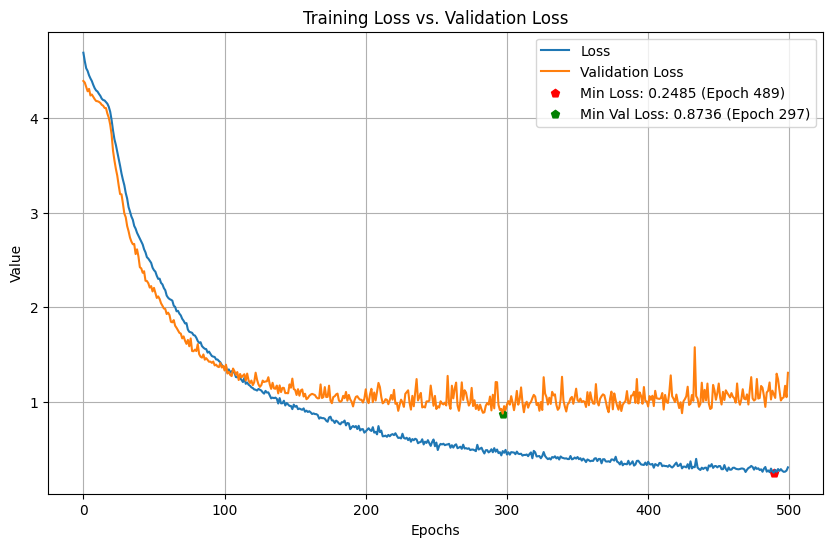

In [61]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

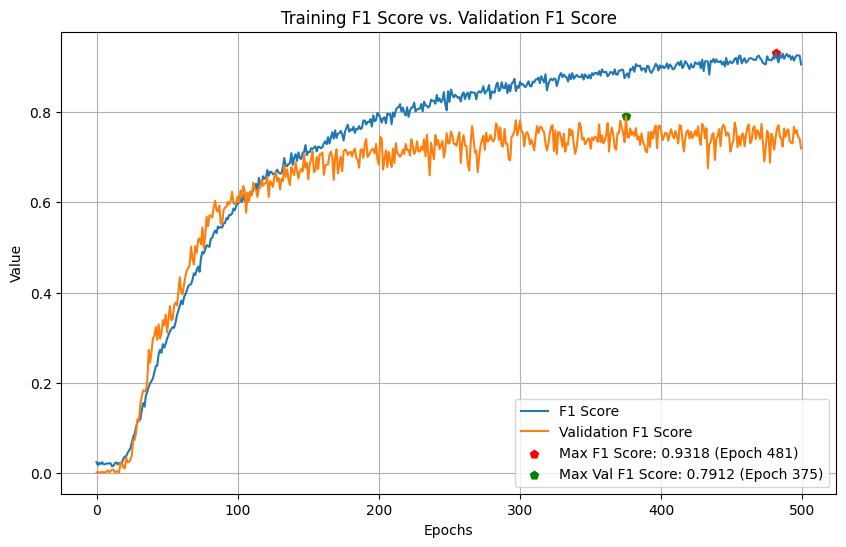

In [62]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [119]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU")

2023-09-08 01:20:37.407224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 01:20:37.483234: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [120]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 122, 100)          359200    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 13, 100)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 13, 125)           12625     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 13, 125)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 125)           0         
                                                                 
 gru_1 (GRU)                 (None, 75)               

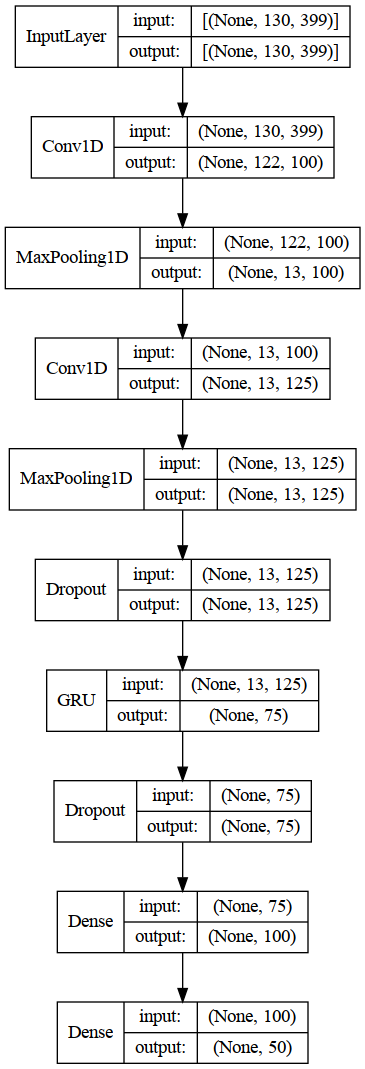

In [121]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [122]:
reconstructed_model.evaluate(Xval, Yval)

2023-09-08 01:20:47.578885: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67223520 exceeds 10% of free system memory.
2023-09-08 01:20:47.642676: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67223520 exceeds 10% of free system memory.
2023-09-08 01:20:48.615446: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 2s 19ms/step - loss: 0.9192 - f1_score: 0.7912


[0.9192284345626831, 0.7912141680717468]

In [123]:
reconstructed_model.evaluate(Xtrain, Ytrain)

2023-09-08 01:21:06.069351: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.
2023-09-08 01:21:06.651930: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.


84/84 [==============================] - 1s 16ms/step - loss: 0.0864 - f1_score: 0.9901


[0.08639702200889587, 0.9900971055030823]

In [145]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.667     1.000     0.800         6
  BASKETBALL      0.900     0.900     0.900        10
         BEE      0.692     0.900     0.783        10
        BELT      0.800     1.000     0.889         4
        BITE      1.000     1.000     1.000         8
   BREAKFAST      0.667     0.667     0.667         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.750     0.500     0.600         6
      DINNER      0.889     1.000     0.941         8
         DOG      1.000     

In [119]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 GRU Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [121]:
act_function = mish
model = Sequential()
model.add(
    Conv1D(filters=100,
           kernel_size=9,
           activation=act_function,
           input_shape=(130, 399)))
model.add(MaxPooling1D(pool_size=9))
model.add(Conv1D(filters=125, kernel_size=1, activation=act_function))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(.7))
model.add(
    GRU(units=75,
        return_sequences=False,
        kernel_regularizer=regularizers.l2(.0023285010665210285)))
model.add(Dropout(.5))
model.add(Dense(units=100, activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.0003730278430367326),
              loss='categorical_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 122, 100)          359200    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 13, 100)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 13, 125)           12625     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 13, 125)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 125)           0         
                                                                 
 gru_1 (GRU)                 (None, 75)               

2023-09-12 00:22:17.151974: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2023-09-12 00:22:18.578629: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f65048d1a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-12 00:22:18.578659: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-12 00:22:18.588256: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-12 00:22:18.754804: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 4.3027 - f1_score: 0.0201

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 29s 837ms/step - loss: 4.3027 - f1_score: 0.0201 - val_loss: 4.2574 - val_f1_score: 0.0015
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.2411 - f1_score: 0.0178

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 320ms/step - loss: 4.2411 - f1_score: 0.0178 - val_loss: 4.2047 - val_f1_score: 0.0065
Epoch 3/500
28/28 [==============================] - 2s 58ms/step - loss: 4.1911 - f1_score: 0.0213 - val_loss: 4.1721 - val_f1_score: 6.2745e-04
Epoch 4/500
28/28 [==============================] - 2s 62ms/step - loss: 4.1556 - f1_score: 0.0217 - val_loss: 4.1377 - val_f1_score: 7.4303e-04
Epoch 5/500
28/28 [==============================] - 2s 58ms/step - loss: 4.1203 - f1_score: 0.0148 - val_loss: 4.1084 - val_f1_score: 0.0016
Epoch 6/500
28/28 [==============================] - 2s 59ms/step - loss: 4.0878 - f1_score: 0.0162 - val_loss: 4.0747 - val_f1_score: 0.0059
Epoch 7/500
28/28 [==============================] - 2s 58ms/step - loss: 4.0526 - f1_score: 0.0188 - val_loss: 4.0211 - val_f1_score: 0.0049
Epoch 8/500
28/28 [==============================] - 2s 59ms/step - loss: 3.9782 - f1_score: 0.0173 - val_loss: 3.8930 - val_f1_score: 0.0035
Epoch 9/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 326ms/step - loss: 3.8442 - f1_score: 0.0196 - val_loss: 3.7564 - val_f1_score: 0.0082
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7347 - f1_score: 0.0248

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 337ms/step - loss: 3.7329 - f1_score: 0.0253 - val_loss: 3.6327 - val_f1_score: 0.0152
Epoch 11/500
28/28 [==============================] - 2s 59ms/step - loss: 3.6550 - f1_score: 0.0293 - val_loss: 3.5489 - val_f1_score: 0.0118
Epoch 12/500
28/28 [==============================] - 2s 58ms/step - loss: 3.6124 - f1_score: 0.0343 - val_loss: 3.4770 - val_f1_score: 0.0138
Epoch 13/500
27/28 [===========================>..] - ETA: 0s - loss: 3.5274 - f1_score: 0.0427

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 347ms/step - loss: 3.5255 - f1_score: 0.0427 - val_loss: 3.3585 - val_f1_score: 0.0425
Epoch 14/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4411 - f1_score: 0.0508

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 395ms/step - loss: 3.4383 - f1_score: 0.0506 - val_loss: 3.3080 - val_f1_score: 0.0615
Epoch 15/500
28/28 [==============================] - 2s 59ms/step - loss: 3.3494 - f1_score: 0.0559 - val_loss: 3.1773 - val_f1_score: 0.0491
Epoch 16/500
28/28 [==============================] - 2s 59ms/step - loss: 3.3007 - f1_score: 0.0557 - val_loss: 3.1175 - val_f1_score: 0.0485
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 3.2470 - f1_score: 0.0688

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 8s 312ms/step - loss: 3.2470 - f1_score: 0.0688 - val_loss: 3.0806 - val_f1_score: 0.0829
Epoch 18/500
28/28 [==============================] - 2s 59ms/step - loss: 3.2111 - f1_score: 0.0643 - val_loss: 3.0653 - val_f1_score: 0.0681
Epoch 19/500
28/28 [==============================] - 2s 59ms/step - loss: 3.1740 - f1_score: 0.0692 - val_loss: 3.0190 - val_f1_score: 0.0761
Epoch 20/500
28/28 [==============================] - 2s 59ms/step - loss: 3.1394 - f1_score: 0.0844 - val_loss: 3.0338 - val_f1_score: 0.0790
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 3.1148 - f1_score: 0.0848

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 323ms/step - loss: 3.1148 - f1_score: 0.0848 - val_loss: 2.9879 - val_f1_score: 0.0886
Epoch 22/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0582 - f1_score: 0.0921

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 344ms/step - loss: 3.0582 - f1_score: 0.0913 - val_loss: 2.9512 - val_f1_score: 0.1026
Epoch 23/500
28/28 [==============================] - 2s 59ms/step - loss: 3.0324 - f1_score: 0.0922 - val_loss: 2.9147 - val_f1_score: 0.0862
Epoch 24/500
28/28 [==============================] - 2s 59ms/step - loss: 2.9987 - f1_score: 0.1075 - val_loss: 2.9183 - val_f1_score: 0.0977
Epoch 25/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9963 - f1_score: 0.0972

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 26s 946ms/step - loss: 2.9955 - f1_score: 0.0979 - val_loss: 2.8144 - val_f1_score: 0.1300
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 2.9236 - f1_score: 0.1212

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 332ms/step - loss: 2.9236 - f1_score: 0.1212 - val_loss: 2.8197 - val_f1_score: 0.1377
Epoch 27/500
28/28 [==============================] - 2s 58ms/step - loss: 2.8913 - f1_score: 0.1188 - val_loss: 2.7914 - val_f1_score: 0.1243
Epoch 28/500
28/28 [==============================] - 2s 59ms/step - loss: 2.8789 - f1_score: 0.1226 - val_loss: 2.7757 - val_f1_score: 0.1326
Epoch 29/500
28/28 [==============================] - 2s 59ms/step - loss: 2.8303 - f1_score: 0.1320 - val_loss: 2.7004 - val_f1_score: 0.1164
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7924 - f1_score: 0.1446

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 340ms/step - loss: 2.7871 - f1_score: 0.1453 - val_loss: 2.6479 - val_f1_score: 0.1588
Epoch 31/500
28/28 [==============================] - 2s 59ms/step - loss: 2.7706 - f1_score: 0.1502 - val_loss: 2.7344 - val_f1_score: 0.1384
Epoch 32/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7740 - f1_score: 0.1561

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 359ms/step - loss: 2.7706 - f1_score: 0.1565 - val_loss: 2.6524 - val_f1_score: 0.1880
Epoch 33/500
28/28 [==============================] - 2s 59ms/step - loss: 2.7060 - f1_score: 0.1620 - val_loss: 2.6942 - val_f1_score: 0.1516
Epoch 34/500
28/28 [==============================] - 2s 59ms/step - loss: 2.6889 - f1_score: 0.1657 - val_loss: 2.6459 - val_f1_score: 0.1663
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 2.6703 - f1_score: 0.1709

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 13s 468ms/step - loss: 2.6703 - f1_score: 0.1709 - val_loss: 2.5912 - val_f1_score: 0.1882
Epoch 36/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6568 - f1_score: 0.1722

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 357ms/step - loss: 2.6587 - f1_score: 0.1710 - val_loss: 2.5127 - val_f1_score: 0.1929
Epoch 37/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6108 - f1_score: 0.1839

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 330ms/step - loss: 2.6074 - f1_score: 0.1865 - val_loss: 2.5057 - val_f1_score: 0.2090
Epoch 38/500
28/28 [==============================] - 2s 58ms/step - loss: 2.6051 - f1_score: 0.1874 - val_loss: 2.5444 - val_f1_score: 0.1972
Epoch 39/500
28/28 [==============================] - 2s 59ms/step - loss: 2.5669 - f1_score: 0.1982 - val_loss: 2.5369 - val_f1_score: 0.1867
Epoch 40/500
28/28 [==============================] - 2s 59ms/step - loss: 2.5665 - f1_score: 0.1996 - val_loss: 2.4628 - val_f1_score: 0.1948
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 2.5345 - f1_score: 0.1956

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 337ms/step - loss: 2.5345 - f1_score: 0.1956 - val_loss: 2.4315 - val_f1_score: 0.2278
Epoch 42/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5095 - f1_score: 0.2192

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 339ms/step - loss: 2.5070 - f1_score: 0.2202 - val_loss: 2.3912 - val_f1_score: 0.2607
Epoch 43/500
28/28 [==============================] - 2s 59ms/step - loss: 2.4975 - f1_score: 0.2341 - val_loss: 2.3607 - val_f1_score: 0.2357
Epoch 44/500
28/28 [==============================] - 2s 59ms/step - loss: 2.4562 - f1_score: 0.2320 - val_loss: 2.8342 - val_f1_score: 0.1843
Epoch 45/500
28/28 [==============================] - 2s 59ms/step - loss: 2.4797 - f1_score: 0.2334 - val_loss: 2.3635 - val_f1_score: 0.2297
Epoch 46/500
28/28 [==============================] - 2s 60ms/step - loss: 2.4268 - f1_score: 0.2573 - val_loss: 2.3028 - val_f1_score: 0.2490
Epoch 47/500
28/28 [==============================] - 2s 60ms/step - loss: 2.4353 - f1_score: 0.2398 - val_loss: 2.3413 - val_f1_score: 0.2465
Epoch 48/500
28/28 [==============================] - 2s 59ms/step - loss: 2.3764 - f1_score: 0.2593 - val_loss: 2.2939 - val_f1_score: 0.2500
Epoch 49/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 376ms/step - loss: 2.3626 - f1_score: 0.2637 - val_loss: 2.2674 - val_f1_score: 0.2636
Epoch 51/500
28/28 [==============================] - 2s 60ms/step - loss: 2.3207 - f1_score: 0.2711 - val_loss: 2.2360 - val_f1_score: 0.2623
Epoch 52/500
28/28 [==============================] - ETA: 0s - loss: 2.3162 - f1_score: 0.2739

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 361ms/step - loss: 2.3162 - f1_score: 0.2739 - val_loss: 2.1957 - val_f1_score: 0.2978
Epoch 53/500
28/28 [==============================] - 2s 59ms/step - loss: 2.2982 - f1_score: 0.2753 - val_loss: 2.2152 - val_f1_score: 0.2759
Epoch 54/500
28/28 [==============================] - 2s 60ms/step - loss: 2.2987 - f1_score: 0.2912 - val_loss: 2.2819 - val_f1_score: 0.2789
Epoch 55/500
28/28 [==============================] - 2s 59ms/step - loss: 2.2578 - f1_score: 0.2911 - val_loss: 2.2649 - val_f1_score: 0.2904
Epoch 56/500
28/28 [==============================] - 2s 59ms/step - loss: 2.2744 - f1_score: 0.2804 - val_loss: 2.1923 - val_f1_score: 0.2932
Epoch 57/500
28/28 [==============================] - 2s 59ms/step - loss: 2.2308 - f1_score: 0.2957 - val_loss: 2.2186 - val_f1_score: 0.2957
Epoch 58/500
28/28 [==============================] - ETA: 0s - loss: 2.2407 - f1_score: 0.2932

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 354ms/step - loss: 2.2407 - f1_score: 0.2932 - val_loss: 2.1638 - val_f1_score: 0.3225
Epoch 59/500
28/28 [==============================] - 2s 59ms/step - loss: 2.2014 - f1_score: 0.3129 - val_loss: 2.1733 - val_f1_score: 0.3128
Epoch 60/500
28/28 [==============================] - 2s 60ms/step - loss: 2.1742 - f1_score: 0.3133 - val_loss: 2.1570 - val_f1_score: 0.3207
Epoch 61/500
28/28 [==============================] - 2s 60ms/step - loss: 2.1723 - f1_score: 0.3114 - val_loss: 2.1106 - val_f1_score: 0.3214
Epoch 62/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1992 - f1_score: 0.3067

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 367ms/step - loss: 2.1962 - f1_score: 0.3069 - val_loss: 2.1253 - val_f1_score: 0.3434
Epoch 63/500
28/28 [==============================] - 2s 59ms/step - loss: 2.1656 - f1_score: 0.3165 - val_loss: 2.1289 - val_f1_score: 0.3426
Epoch 64/500
28/28 [==============================] - 2s 59ms/step - loss: 2.1478 - f1_score: 0.3135 - val_loss: 2.1263 - val_f1_score: 0.3399
Epoch 65/500
28/28 [==============================] - 2s 61ms/step - loss: 2.1197 - f1_score: 0.3312 - val_loss: 2.1462 - val_f1_score: 0.3185
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 2.1438 - f1_score: 0.3330

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 395ms/step - loss: 2.1438 - f1_score: 0.3330 - val_loss: 2.1128 - val_f1_score: 0.3620
Epoch 67/500
28/28 [==============================] - 2s 59ms/step - loss: 2.1224 - f1_score: 0.3335 - val_loss: 2.0557 - val_f1_score: 0.3576
Epoch 68/500
28/28 [==============================] - 2s 59ms/step - loss: 2.1231 - f1_score: 0.3340 - val_loss: 2.1346 - val_f1_score: 0.3210
Epoch 69/500
28/28 [==============================] - 2s 59ms/step - loss: 2.1131 - f1_score: 0.3461 - val_loss: 2.1003 - val_f1_score: 0.3254
Epoch 70/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0852 - f1_score: 0.3321

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 370ms/step - loss: 2.0867 - f1_score: 0.3322 - val_loss: 2.0482 - val_f1_score: 0.3836
Epoch 71/500
28/28 [==============================] - 2s 59ms/step - loss: 2.0721 - f1_score: 0.3403 - val_loss: 2.1105 - val_f1_score: 0.3437
Epoch 72/500
28/28 [==============================] - 2s 59ms/step - loss: 2.0798 - f1_score: 0.3517 - val_loss: 2.1249 - val_f1_score: 0.3717
Epoch 73/500
28/28 [==============================] - 2s 60ms/step - loss: 2.0642 - f1_score: 0.3550 - val_loss: 2.0518 - val_f1_score: 0.3750
Epoch 74/500
28/28 [==============================] - 2s 60ms/step - loss: 2.0610 - f1_score: 0.3430 - val_loss: 2.0798 - val_f1_score: 0.3386
Epoch 75/500
28/28 [==============================] - 2s 59ms/step - loss: 2.0260 - f1_score: 0.3523 - val_loss: 2.0409 - val_f1_score: 0.3511
Epoch 76/500
28/28 [==============================] - 2s 59ms/step - loss: 2.0184 - f1_score: 0.3594 - val_loss: 2.0466 - val_f1_score: 0.3768
Epoch 77/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 333ms/step - loss: 1.9967 - f1_score: 0.3690 - val_loss: 2.0417 - val_f1_score: 0.3937
Epoch 80/500
28/28 [==============================] - 2s 59ms/step - loss: 1.9828 - f1_score: 0.3637 - val_loss: 2.1297 - val_f1_score: 0.3553
Epoch 81/500
28/28 [==============================] - ETA: 0s - loss: 1.9678 - f1_score: 0.3651

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 351ms/step - loss: 1.9678 - f1_score: 0.3651 - val_loss: 2.0445 - val_f1_score: 0.4046
Epoch 82/500
28/28 [==============================] - 2s 59ms/step - loss: 1.9616 - f1_score: 0.3738 - val_loss: 2.0941 - val_f1_score: 0.3407
Epoch 83/500
28/28 [==============================] - ETA: 0s - loss: 1.9533 - f1_score: 0.3793

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 370ms/step - loss: 1.9533 - f1_score: 0.3793 - val_loss: 1.9908 - val_f1_score: 0.4108
Epoch 84/500
28/28 [==============================] - 2s 59ms/step - loss: 1.9651 - f1_score: 0.3735 - val_loss: 2.0316 - val_f1_score: 0.3835
Epoch 85/500
28/28 [==============================] - 2s 61ms/step - loss: 1.9204 - f1_score: 0.3920 - val_loss: 2.0484 - val_f1_score: 0.3962
Epoch 86/500
28/28 [==============================] - 2s 59ms/step - loss: 1.9525 - f1_score: 0.3818 - val_loss: 2.0734 - val_f1_score: 0.3691
Epoch 87/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9401 - f1_score: 0.3757

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 363ms/step - loss: 1.9406 - f1_score: 0.3777 - val_loss: 1.9939 - val_f1_score: 0.4130
Epoch 88/500
28/28 [==============================] - 2s 59ms/step - loss: 1.9297 - f1_score: 0.3861 - val_loss: 2.0123 - val_f1_score: 0.3821
Epoch 89/500
28/28 [==============================] - 2s 59ms/step - loss: 1.9184 - f1_score: 0.3882 - val_loss: 1.9419 - val_f1_score: 0.4090
Epoch 90/500
28/28 [==============================] - 2s 59ms/step - loss: 1.9173 - f1_score: 0.3983 - val_loss: 1.9778 - val_f1_score: 0.3850
Epoch 91/500
28/28 [==============================] - 2s 60ms/step - loss: 1.8956 - f1_score: 0.3977 - val_loss: 2.0434 - val_f1_score: 0.3792
Epoch 92/500
28/28 [==============================] - 2s 59ms/step - loss: 1.9006 - f1_score: 0.3962 - val_loss: 1.9468 - val_f1_score: 0.4030
Epoch 93/500
28/28 [==============================] - 2s 59ms/step - loss: 1.8774 - f1_score: 0.4025 - val_loss: 2.0568 - val_f1_score: 0.3636
Epoch 94/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 354ms/step - loss: 1.8546 - f1_score: 0.4124 - val_loss: 1.9251 - val_f1_score: 0.4538
Epoch 98/500
28/28 [==============================] - 2s 59ms/step - loss: 1.8336 - f1_score: 0.4197 - val_loss: 2.1702 - val_f1_score: 0.3556
Epoch 99/500
28/28 [==============================] - 2s 60ms/step - loss: 1.8743 - f1_score: 0.4033 - val_loss: 1.9263 - val_f1_score: 0.4085
Epoch 100/500
28/28 [==============================] - 2s 60ms/step - loss: 1.8133 - f1_score: 0.4298 - val_loss: 1.9302 - val_f1_score: 0.4062
Epoch 101/500
28/28 [==============================] - 2s 60ms/step - loss: 1.8381 - f1_score: 0.4191 - val_loss: 1.9037 - val_f1_score: 0.4398
Epoch 102/500
28/28 [==============================] - 2s 60ms/step - loss: 1.8172 - f1_score: 0.4128 - val_loss: 2.0624 - val_f1_score: 0.3744
Epoch 103/500
28/28 [==============================] - 2s 63ms/step - loss: 1.8135 - f1_score: 0.4297 - val_loss: 1.9042 - val_f1_score: 0.4533
Epoch 

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 437ms/step - loss: 1.5744 - f1_score: 0.5013 - val_loss: 1.8913 - val_f1_score: 0.4757
Epoch 143/500
28/28 [==============================] - 2s 61ms/step - loss: 1.6056 - f1_score: 0.4947 - val_loss: 1.8862 - val_f1_score: 0.4272
Epoch 144/500
28/28 [==============================] - 2s 60ms/step - loss: 1.5891 - f1_score: 0.4895 - val_loss: 1.9521 - val_f1_score: 0.4205
Epoch 145/500
28/28 [==============================] - 2s 61ms/step - loss: 1.5538 - f1_score: 0.4899 - val_loss: 1.9380 - val_f1_score: 0.4526
Epoch 146/500
28/28 [==============================] - 2s 61ms/step - loss: 1.5754 - f1_score: 0.4903 - val_loss: 1.8340 - val_f1_score: 0.4535
Epoch 147/500
28/28 [==============================] - 2s 61ms/step - loss: 1.5597 - f1_score: 0.5058 - val_loss: 1.9575 - val_f1_score: 0.4314
Epoch 148/500
28/28 [==============================] - 2s 60ms/step - loss: 1.5790 - f1_score: 0.4793 - val_loss: 1.9267 - val_f1_score: 0.4255
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 422ms/step - loss: 1.4731 - f1_score: 0.5257 - val_loss: 1.8201 - val_f1_score: 0.4823
Epoch 166/500
28/28 [==============================] - 2s 60ms/step - loss: 1.4672 - f1_score: 0.5154 - val_loss: 1.8655 - val_f1_score: 0.4467
Epoch 167/500
28/28 [==============================] - 2s 60ms/step - loss: 1.4522 - f1_score: 0.5369 - val_loss: 1.8356 - val_f1_score: 0.4588
Epoch 168/500
28/28 [==============================] - 2s 61ms/step - loss: 1.4764 - f1_score: 0.5215 - val_loss: 1.8497 - val_f1_score: 0.4605
Epoch 169/500
28/28 [==============================] - 2s 61ms/step - loss: 1.4771 - f1_score: 0.5233 - val_loss: 1.8535 - val_f1_score: 0.4593
Epoch 170/500
28/28 [==============================] - 2s 61ms/step - loss: 1.4557 - f1_score: 0.5319 - val_loss: 1.8256 - val_f1_score: 0.4804
Epoch 171/500
28/28 [==============================] - 2s 62ms/step - loss: 1.4335 - f1_score: 0.5342 - val_loss: 1.8527 - val_f1_score: 0.4644
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 407ms/step - loss: 1.4306 - f1_score: 0.5354 - val_loss: 1.7662 - val_f1_score: 0.4903
Epoch 179/500
28/28 [==============================] - 2s 60ms/step - loss: 1.4143 - f1_score: 0.5379 - val_loss: 1.9490 - val_f1_score: 0.4618
Epoch 180/500
28/28 [==============================] - 2s 60ms/step - loss: 1.4280 - f1_score: 0.5436 - val_loss: 1.9155 - val_f1_score: 0.4591
Epoch 181/500
28/28 [==============================] - 2s 61ms/step - loss: 1.3921 - f1_score: 0.5508 - val_loss: 1.8366 - val_f1_score: 0.4826
Epoch 182/500
28/28 [==============================] - 2s 61ms/step - loss: 1.3861 - f1_score: 0.5644 - val_loss: 1.9048 - val_f1_score: 0.4688
Epoch 183/500
28/28 [==============================] - 2s 61ms/step - loss: 1.3665 - f1_score: 0.5578 - val_loss: 1.9010 - val_f1_score: 0.4434
Epoch 184/500
28/28 [==============================] - 2s 62ms/step - loss: 1.3962 - f1_score: 0.5452 - val_loss: 1.8336 - val_f1_score: 0.4803
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 422ms/step - loss: 1.2772 - f1_score: 0.5859 - val_loss: 1.8312 - val_f1_score: 0.4983
Epoch 213/500
28/28 [==============================] - 2s 62ms/step - loss: 1.2853 - f1_score: 0.5849 - val_loss: 1.8040 - val_f1_score: 0.4811
Epoch 214/500
28/28 [==============================] - 2s 61ms/step - loss: 1.2772 - f1_score: 0.5846 - val_loss: 1.9339 - val_f1_score: 0.4771
Epoch 215/500
28/28 [==============================] - 2s 61ms/step - loss: 1.2467 - f1_score: 0.5982 - val_loss: 1.9632 - val_f1_score: 0.4641
Epoch 216/500
28/28 [==============================] - 2s 61ms/step - loss: 1.2581 - f1_score: 0.5881 - val_loss: 1.8310 - val_f1_score: 0.4794
Epoch 217/500
28/28 [==============================] - 2s 63ms/step - loss: 1.2888 - f1_score: 0.5766 - val_loss: 1.8410 - val_f1_score: 0.4933
Epoch 218/500
28/28 [==============================] - 2s 61ms/step - loss: 1.2688 - f1_score: 0.5970 - val_loss: 1.8961 - val_f1_score: 0.4538
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 441ms/step - loss: 1.2115 - f1_score: 0.6064 - val_loss: 1.8556 - val_f1_score: 0.4997
Epoch 238/500
28/28 [==============================] - 2s 60ms/step - loss: 1.2129 - f1_score: 0.6005 - val_loss: 2.0666 - val_f1_score: 0.4475
Epoch 239/500
28/28 [==============================] - ETA: 0s - loss: 1.2108 - f1_score: 0.6040

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 360ms/step - loss: 1.2108 - f1_score: 0.6040 - val_loss: 1.9284 - val_f1_score: 0.5017
Epoch 240/500
28/28 [==============================] - 2s 60ms/step - loss: 1.1889 - f1_score: 0.6054 - val_loss: 1.9243 - val_f1_score: 0.4878
Epoch 241/500
28/28 [==============================] - 2s 60ms/step - loss: 1.1943 - f1_score: 0.6051 - val_loss: 1.9236 - val_f1_score: 0.4587
Epoch 242/500
28/28 [==============================] - 2s 60ms/step - loss: 1.1869 - f1_score: 0.6203 - val_loss: 1.8476 - val_f1_score: 0.4824
Epoch 243/500
28/28 [==============================] - 2s 61ms/step - loss: 1.1974 - f1_score: 0.6112 - val_loss: 1.9604 - val_f1_score: 0.4812
Epoch 244/500
28/28 [==============================] - 2s 61ms/step - loss: 1.1703 - f1_score: 0.6259 - val_loss: 1.8736 - val_f1_score: 0.4667
Epoch 245/500
28/28 [==============================] - 2s 61ms/step - loss: 1.1985 - f1_score: 0.6037 - val_loss: 1.9045 - val_f1_score: 0.4827
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 426ms/step - loss: 1.1143 - f1_score: 0.6313 - val_loss: 1.8340 - val_f1_score: 0.5070
Epoch 268/500
28/28 [==============================] - 2s 60ms/step - loss: 1.0885 - f1_score: 0.6393 - val_loss: 1.9789 - val_f1_score: 0.4755
Epoch 269/500
28/28 [==============================] - 2s 61ms/step - loss: 1.1143 - f1_score: 0.6487 - val_loss: 1.8180 - val_f1_score: 0.5023
Epoch 270/500
28/28 [==============================] - 2s 61ms/step - loss: 1.1128 - f1_score: 0.6268 - val_loss: 2.0550 - val_f1_score: 0.4644
Epoch 271/500
28/28 [==============================] - 2s 60ms/step - loss: 1.0536 - f1_score: 0.6662 - val_loss: 1.9375 - val_f1_score: 0.4883
Epoch 272/500
28/28 [==============================] - 2s 62ms/step - loss: 1.1083 - f1_score: 0.6354 - val_loss: 2.1269 - val_f1_score: 0.4546
Epoch 273/500
28/28 [==============================] - 2s 65ms/step - loss: 1.1579 - f1_score: 0.6235 - val_loss: 1.9991 - val_f1_score: 0.4786
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 13s 473ms/step - loss: 1.0080 - f1_score: 0.6601 - val_loss: 1.9540 - val_f1_score: 0.5137
Epoch 312/500
28/28 [==============================] - 2s 62ms/step - loss: 1.0261 - f1_score: 0.6557 - val_loss: 1.9356 - val_f1_score: 0.4956
Epoch 313/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9988 - f1_score: 0.6761 - val_loss: 1.9707 - val_f1_score: 0.4939
Epoch 314/500
28/28 [==============================] - 2s 60ms/step - loss: 1.0075 - f1_score: 0.6711 - val_loss: 2.0371 - val_f1_score: 0.4775
Epoch 315/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9919 - f1_score: 0.6726 - val_loss: 1.9736 - val_f1_score: 0.4943
Epoch 316/500
28/28 [==============================] - 2s 59ms/step - loss: 0.9851 - f1_score: 0.6734 - val_loss: 2.0604 - val_f1_score: 0.4758
Epoch 317/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9802 - f1_score: 0.6731 - val_loss: 2.1442 - val_f1_score: 0.4636
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 433ms/step - loss: 0.9234 - f1_score: 0.6902 - val_loss: 1.9987 - val_f1_score: 0.5171
Epoch 336/500
28/28 [==============================] - 2s 60ms/step - loss: 0.9743 - f1_score: 0.6726 - val_loss: 1.9783 - val_f1_score: 0.4954
Epoch 337/500
28/28 [==============================] - 2s 61ms/step - loss: 0.9614 - f1_score: 0.6894 - val_loss: 1.9711 - val_f1_score: 0.5099
Epoch 338/500
28/28 [==============================] - 2s 68ms/step - loss: 0.9408 - f1_score: 0.6930 - val_loss: 1.9374 - val_f1_score: 0.5120
Epoch 339/500
28/28 [==============================] - 2s 65ms/step - loss: 0.9480 - f1_score: 0.6897 - val_loss: 1.9800 - val_f1_score: 0.5039
Epoch 340/500
28/28 [==============================] - 2s 62ms/step - loss: 0.9395 - f1_score: 0.6993 - val_loss: 1.9677 - val_f1_score: 0.5041
Epoch 341/500
28/28 [==============================] - 2s 62ms/step - loss: 0.9541 - f1_score: 0.6854 - val_loss: 2.1657 - val_f1_score: 0.4458
Epoc

Epoch 392/500
28/28 [==============================] - 2s 64ms/step - loss: 0.8717 - f1_score: 0.7168 - val_loss: 2.2064 - val_f1_score: 0.4775
Epoch 393/500
28/28 [==============================] - 2s 65ms/step - loss: 0.8728 - f1_score: 0.7120 - val_loss: 2.0526 - val_f1_score: 0.4822
Epoch 394/500
28/28 [==============================] - 2s 64ms/step - loss: 0.8183 - f1_score: 0.7292 - val_loss: 2.2450 - val_f1_score: 0.4417
Epoch 395/500
28/28 [==============================] - 2s 66ms/step - loss: 0.8079 - f1_score: 0.7343 - val_loss: 2.1366 - val_f1_score: 0.4988
Epoch 396/500
28/28 [==============================] - 2s 65ms/step - loss: 0.8524 - f1_score: 0.7189 - val_loss: 2.0156 - val_f1_score: 0.5111
Epoch 397/500
28/28 [==============================] - 2s 64ms/step - loss: 0.8043 - f1_score: 0.7338 - val_loss: 2.0936 - val_f1_score: 0.4830
Epoch 398/500
28/28 [==============================] - 2s 64ms/step - loss: 0.8196 - f1_score: 0.7277 - val_loss: 2.2602 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 18s 674ms/step - loss: 0.7737 - f1_score: 0.7430 - val_loss: 2.1017 - val_f1_score: 0.5181
Epoch 429/500
28/28 [==============================] - 2s 61ms/step - loss: 0.7548 - f1_score: 0.7405 - val_loss: 2.1481 - val_f1_score: 0.5057
Epoch 430/500
28/28 [==============================] - 2s 61ms/step - loss: 0.7579 - f1_score: 0.7571 - val_loss: 2.1506 - val_f1_score: 0.4975
Epoch 431/500
28/28 [==============================] - 2s 61ms/step - loss: 0.7725 - f1_score: 0.7375 - val_loss: 2.1398 - val_f1_score: 0.5000
Epoch 432/500
28/28 [==============================] - 2s 61ms/step - loss: 0.7563 - f1_score: 0.7531 - val_loss: 2.1816 - val_f1_score: 0.4933
Epoch 433/500
28/28 [==============================] - 2s 63ms/step - loss: 0.7919 - f1_score: 0.7427 - val_loss: 2.1610 - val_f1_score: 0.4695
Epoch 434/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7758 - f1_score: 0.7414 - val_loss: 2.2386 - val_f1_score: 0.4667
Epoc

Epoch 485/500
28/28 [==============================] - 2s 63ms/step - loss: 0.6971 - f1_score: 0.7617 - val_loss: 2.3395 - val_f1_score: 0.4778
Epoch 486/500
28/28 [==============================] - 2s 64ms/step - loss: 0.6944 - f1_score: 0.7758 - val_loss: 2.2149 - val_f1_score: 0.4871
Epoch 487/500
28/28 [==============================] - 2s 64ms/step - loss: 0.6661 - f1_score: 0.7826 - val_loss: 2.2974 - val_f1_score: 0.5095
Epoch 488/500
28/28 [==============================] - 2s 66ms/step - loss: 0.6748 - f1_score: 0.7840 - val_loss: 2.2122 - val_f1_score: 0.4823
Epoch 489/500
28/28 [==============================] - 2s 64ms/step - loss: 0.6831 - f1_score: 0.7734 - val_loss: 2.2991 - val_f1_score: 0.4776
Epoch 490/500
28/28 [==============================] - 2s 65ms/step - loss: 0.6993 - f1_score: 0.7632 - val_loss: 2.2002 - val_f1_score: 0.4935
Epoch 491/500
28/28 [==============================] - 2s 65ms/step - loss: 0.7108 - f1_score: 0.7680 - val_loss: 2.1574 - val_f1_score:

In [122]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.667     0.800     0.727        10
         BEE      0.000     0.000     0.000        10
        BELT      1.000     0.500     0.667         4
        BITE      1.000     0.250     0.400         8
   BREAKFAST      0.000     0.000     0.000         6
      CANCER      0.625     0.625     0.625         8
   CHRISTMAS      0.286     0.667     0.400         6
    CONFUSED      0.500     0.500     0.500         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      1.000     0.500     0.667         6
      DEMAND      1.000     0.375     0.545         8
     DEVELOP      0.308     0.667     0.421         6
      DINNER      0.250     0.125     0.167         8
         DOG      1.000    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 1DCNN + 1 GRU Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [126]:
hist_df = pd.read_csv('2 1DCNN + 1 GRU Mish/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.677261  0.774161  2.147294      0.483863
496  0.663863  0.782352  2.280390      0.490715
497  0.662396  0.782707  2.157412      0.481689
498  0.686876  0.769690  2.286758      0.504359
499  0.688723  0.775062  2.469056      0.467741

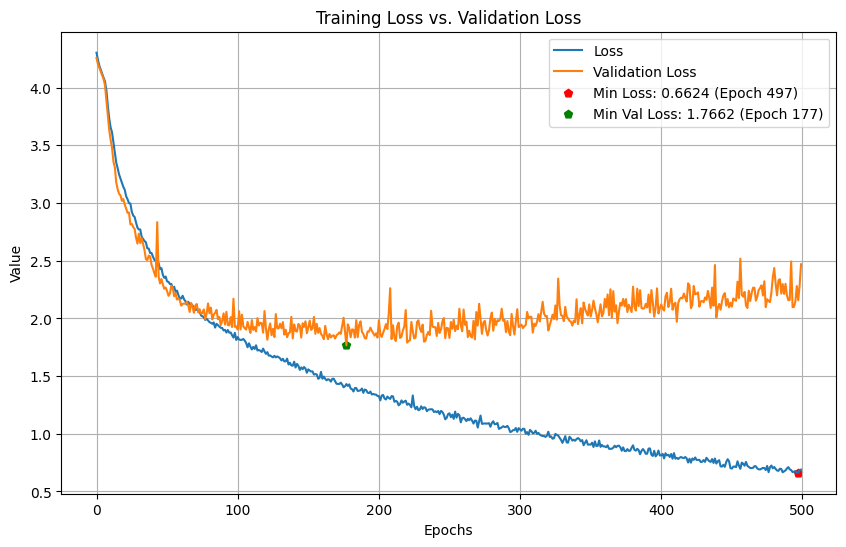

In [127]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

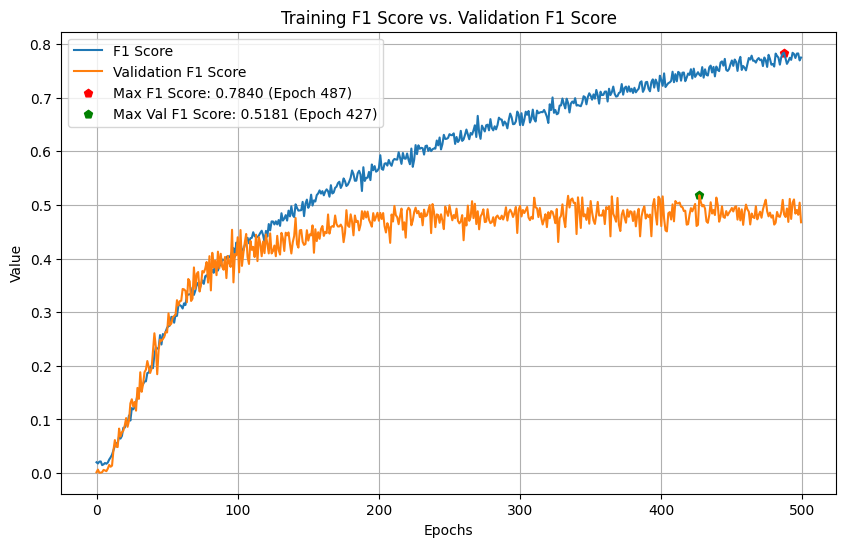

In [128]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [138]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU Mish")

In [130]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 122, 100)          359200    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 13, 100)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 13, 125)           12625     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 13, 125)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 125)           0         
                                                                 
 gru_1 (GRU)                 (None, 75)               

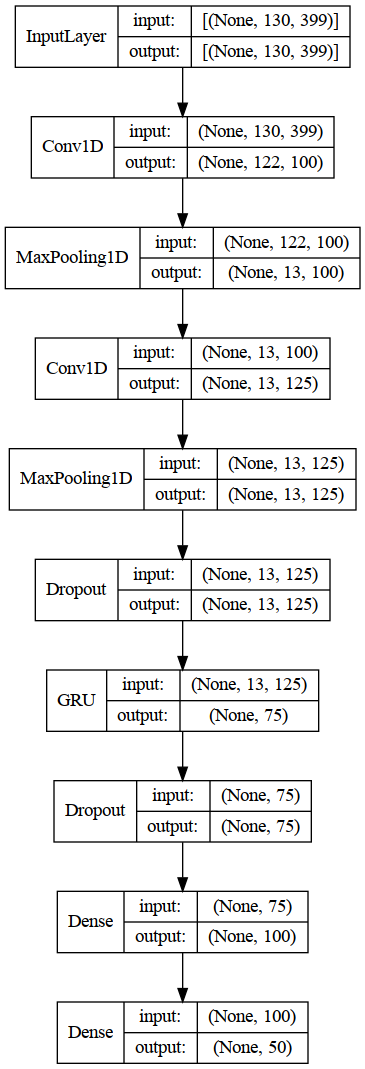

In [131]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [132]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 9ms/step - loss: 2.1017 - f1_score: 0.5181


[2.1016790866851807, 0.5180920958518982]

In [133]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 12ms/step - loss: 0.4131 - f1_score: 0.8835


[0.41311243176460266, 0.8834774494171143]

In [134]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.000     0.000     0.000        10
        BELT      1.000     0.500     0.667         4
        BITE      0.667     0.250     0.364         8
   BREAKFAST      0.000     0.000     0.000         6
      CANCER      0.667     0.750     0.706         8
   CHRISTMAS      0.333     0.500     0.400         6
    CONFUSED      0.429     0.500     0.462         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.250     0.333     0.286         6
      DECIDE      1.000     0.500     0.667         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.444     0.667     0.533         6
      DINNER      0.400     0.250     0.308         8
         DOG      1.000     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tuning 1 1D CNN Layer + 1 LSTM

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_2453193/1222377179.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='relu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[5, 10, 15, 20],
                       default=20,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[5, 10, 15, 20],
                default=20,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='1_1D_CNN+1_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_1D_CNN+1_LSTM/tuner0.json


In [122]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
pool_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 

In [123]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [125]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 18m 16s]
val_f1_score: 0.48599615693092346

Best val_f1_score So Far: 0.6922096014022827
Total elapsed time: 13h 33m 12s
INFO:tensorflow:Oracle triggered exit


In [122]:
best_model = tuner.get_best_models(num_models=10)[0]

2023-09-10 12:10:16.313283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 12:10:16.402915: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1561 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [127]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 121, 200)          798200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 200)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 200)           0         
                                                                 
 lstm (LSTM)                 (None, 125)               163000    
                                                                 
 dropout_1 (Dropout)         (None, 125)               0         
                                                                 
 dense (Dense)               (None, 110)               13860     
                                                        

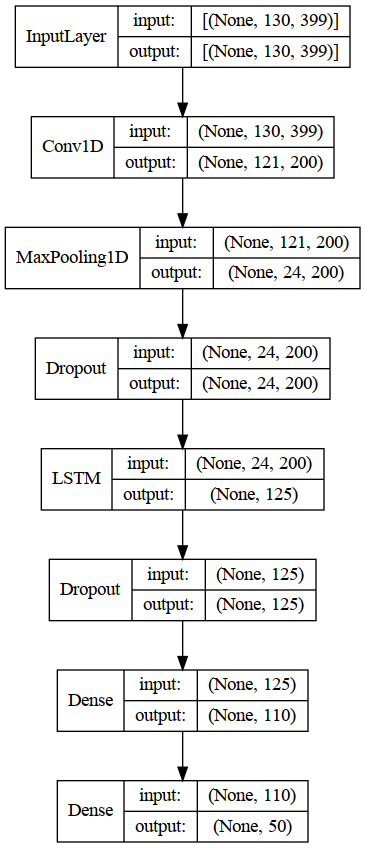

In [128]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

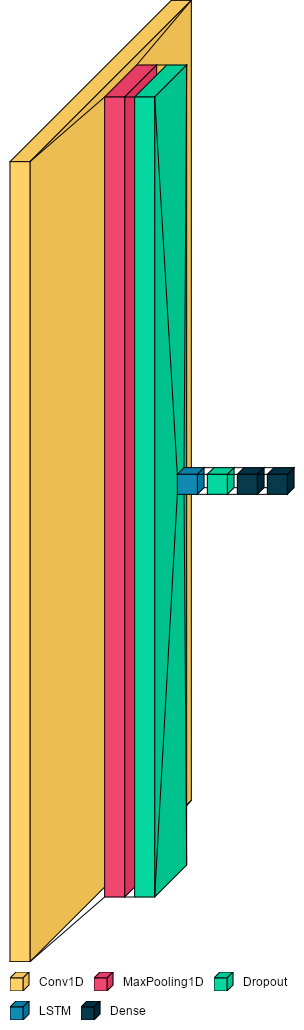

In [124]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [129]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/1_1D_CNN+1_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: elu
filters_1: 200
kernel_1: 10
pool_1: 5
dropout_1: 0.65
units_1: 125
regularizer: 0.0034365682734906543
dropout_2: 0.1
units_2: 110
learning_rate: 0.00015386971155916857
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0711
Score: 0.6922096014022827

Trial 0426 summary
Hyperparameters:
dense_activation: selu
filters_1: 125
kernel_1: 5
pool_1: 15
dropout_1: 0.05
units_1: 50
regularizer: 0.00022773443777239995
dropout_2: 0.2
units_2: 110
learning_rate: 0.0003243806953412315
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0425
Score: 0.6846268773078918

Trial 0670 summary
Hyperparameters:
dense_activation: mish
filters_1: 175
kernel_1: 5
pool_1: 15
dropout_1: 0.4
units_1: 200
regularize

In [130]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 3s 60ms/step - loss: 1.2940 - f1_score: 0.6936


In [142]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 2s 18ms/step - loss: 0.3471 - f1_score: 0.9563


In [131]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.462     0.600     0.522        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.250     0.400         8
   BREAKFAST      0.625     0.833     0.714         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      0.667     1.000     0.800         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      1.000     0.333     0.500         6
      DINNER      0.750     0.750     0.750         8
         DOG      0.500    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [133]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [134]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.9186 - f1_score: 0.0117

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 21s 584ms/step - loss: 4.9186 - f1_score: 0.0117 - val_loss: 4.8784 - val_f1_score: 7.3404e-04
Epoch 2/500
28/28 [==============================] - 3s 91ms/step - loss: 4.8604 - f1_score: 0.0159 - val_loss: 4.8159 - val_f1_score: 7.2727e-04
Epoch 3/500
28/28 [==============================] - 3s 90ms/step - loss: 4.8141 - f1_score: 0.0162 - val_loss: 4.7778 - val_f1_score: 7.3394e-04
Epoch 4/500
28/28 [==============================] - 3s 91ms/step - loss: 4.7750 - f1_score: 0.0136 - val_loss: 4.7394 - val_f1_score: 7.2727e-04
Epoch 5/500
28/28 [==============================] - 3s 90ms/step - loss: 4.7328 - f1_score: 0.0134 - val_loss: 4.7000 - val_f1_score: 7.2727e-04
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 4.6963 - f1_score: 0.0137

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 413ms/step - loss: 4.6963 - f1_score: 0.0137 - val_loss: 4.6644 - val_f1_score: 0.0012
Epoch 7/500
28/28 [==============================] - 3s 90ms/step - loss: 4.6618 - f1_score: 0.0128 - val_loss: 4.6322 - val_f1_score: 5.0473e-04
Epoch 8/500
28/28 [==============================] - ETA: 0s - loss: 4.6298 - f1_score: 0.0127

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 371ms/step - loss: 4.6298 - f1_score: 0.0127 - val_loss: 4.6037 - val_f1_score: 0.0012
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 4.5921 - f1_score: 0.0116

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 392ms/step - loss: 4.5921 - f1_score: 0.0116 - val_loss: 4.5712 - val_f1_score: 0.0018
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 4.5678 - f1_score: 0.0158

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 423ms/step - loss: 4.5678 - f1_score: 0.0158 - val_loss: 4.5355 - val_f1_score: 0.0032
Epoch 11/500
28/28 [==============================] - 3s 90ms/step - loss: 4.5371 - f1_score: 0.0176 - val_loss: 4.5027 - val_f1_score: 0.0012
Epoch 12/500
28/28 [==============================] - 3s 92ms/step - loss: 4.5081 - f1_score: 0.0193 - val_loss: 4.4711 - val_f1_score: 0.0026
Epoch 13/500
28/28 [==============================] - 3s 92ms/step - loss: 4.4721 - f1_score: 0.0184 - val_loss: 4.4628 - val_f1_score: 7.2727e-04
Epoch 14/500
28/28 [==============================] - 3s 93ms/step - loss: 4.4508 - f1_score: 0.0170 - val_loss: 4.4228 - val_f1_score: 0.0012
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 4.4173 - f1_score: 0.0186

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 397ms/step - loss: 4.4173 - f1_score: 0.0186 - val_loss: 4.3913 - val_f1_score: 0.0055
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 4.3877 - f1_score: 0.0225

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 421ms/step - loss: 4.3877 - f1_score: 0.0225 - val_loss: 4.3476 - val_f1_score: 0.0065
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 4.3444 - f1_score: 0.0235

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 372ms/step - loss: 4.3444 - f1_score: 0.0235 - val_loss: 4.2816 - val_f1_score: 0.0203
Epoch 18/500
28/28 [==============================] - 3s 90ms/step - loss: 4.2738 - f1_score: 0.0297 - val_loss: 4.2007 - val_f1_score: 0.0155
Epoch 19/500
28/28 [==============================] - 3s 91ms/step - loss: 4.1782 - f1_score: 0.0303 - val_loss: 4.0966 - val_f1_score: 0.0177
Epoch 20/500
28/28 [==============================] - 3s 92ms/step - loss: 4.1090 - f1_score: 0.0307 - val_loss: 4.0482 - val_f1_score: 0.0015
Epoch 21/500
28/28 [==============================] - 3s 92ms/step - loss: 4.0188 - f1_score: 0.0267 - val_loss: 3.9240 - val_f1_score: 0.0087
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 3.9471 - f1_score: 0.0267

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 377ms/step - loss: 3.9471 - f1_score: 0.0267 - val_loss: 3.8654 - val_f1_score: 0.0275
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 3.8857 - f1_score: 0.0339

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 443ms/step - loss: 3.8857 - f1_score: 0.0339 - val_loss: 3.7526 - val_f1_score: 0.0372
Epoch 24/500
28/28 [==============================] - 3s 91ms/step - loss: 3.7998 - f1_score: 0.0468 - val_loss: 3.6479 - val_f1_score: 0.0325
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 3.7123 - f1_score: 0.0539

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 388ms/step - loss: 3.7123 - f1_score: 0.0539 - val_loss: 3.5974 - val_f1_score: 0.0397
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 3.6145 - f1_score: 0.0699

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 388ms/step - loss: 3.6145 - f1_score: 0.0699 - val_loss: 3.4944 - val_f1_score: 0.0694
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 3.5421 - f1_score: 0.0749

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 388ms/step - loss: 3.5421 - f1_score: 0.0749 - val_loss: 3.4018 - val_f1_score: 0.0981
Epoch 28/500
28/28 [==============================] - 3s 91ms/step - loss: 3.4578 - f1_score: 0.0854 - val_loss: 3.3306 - val_f1_score: 0.0835
Epoch 29/500
28/28 [==============================] - 3s 91ms/step - loss: 3.3715 - f1_score: 0.0975 - val_loss: 3.2575 - val_f1_score: 0.0912
Epoch 30/500
28/28 [==============================] - 3s 92ms/step - loss: 3.2959 - f1_score: 0.1200 - val_loss: 3.1341 - val_f1_score: 0.0964
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 3.1937 - f1_score: 0.1472

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 426ms/step - loss: 3.1937 - f1_score: 0.1472 - val_loss: 3.1597 - val_f1_score: 0.1249
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 3.1141 - f1_score: 0.1644

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 364ms/step - loss: 3.1141 - f1_score: 0.1644 - val_loss: 2.9959 - val_f1_score: 0.1294
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 3.0187 - f1_score: 0.1801

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 421ms/step - loss: 3.0187 - f1_score: 0.1801 - val_loss: 3.0235 - val_f1_score: 0.1380
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 2.9483 - f1_score: 0.1979

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 373ms/step - loss: 2.9483 - f1_score: 0.1979 - val_loss: 2.9151 - val_f1_score: 0.1475
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 2.9000 - f1_score: 0.1977

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 365ms/step - loss: 2.9000 - f1_score: 0.1977 - val_loss: 2.8686 - val_f1_score: 0.1805
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 2.8038 - f1_score: 0.2256

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 390ms/step - loss: 2.8038 - f1_score: 0.2256 - val_loss: 2.7776 - val_f1_score: 0.2151
Epoch 37/500
28/28 [==============================] - 3s 90ms/step - loss: 2.7552 - f1_score: 0.2396 - val_loss: 2.8336 - val_f1_score: 0.1994
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 2.6976 - f1_score: 0.2408

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 394ms/step - loss: 2.6976 - f1_score: 0.2408 - val_loss: 2.7603 - val_f1_score: 0.2160
Epoch 39/500
28/28 [==============================] - ETA: 0s - loss: 2.6420 - f1_score: 0.2705

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 377ms/step - loss: 2.6420 - f1_score: 0.2705 - val_loss: 2.6784 - val_f1_score: 0.2535
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 2.5720 - f1_score: 0.2779

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 382ms/step - loss: 2.5720 - f1_score: 0.2779 - val_loss: 2.6147 - val_f1_score: 0.2600
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 2.5544 - f1_score: 0.2824

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 370ms/step - loss: 2.5544 - f1_score: 0.2824 - val_loss: 2.5591 - val_f1_score: 0.2658
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 2.4871 - f1_score: 0.3033

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 383ms/step - loss: 2.4871 - f1_score: 0.3033 - val_loss: 2.5220 - val_f1_score: 0.3196
Epoch 43/500
28/28 [==============================] - 3s 90ms/step - loss: 2.4579 - f1_score: 0.3151 - val_loss: 2.5531 - val_f1_score: 0.2833
Epoch 44/500
28/28 [==============================] - 3s 92ms/step - loss: 2.4168 - f1_score: 0.3074 - val_loss: 2.4947 - val_f1_score: 0.2923
Epoch 45/500
28/28 [==============================] - 3s 91ms/step - loss: 2.3673 - f1_score: 0.3298 - val_loss: 2.4384 - val_f1_score: 0.3127
Epoch 46/500
28/28 [==============================] - ETA: 0s - loss: 2.3422 - f1_score: 0.3373

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 384ms/step - loss: 2.3422 - f1_score: 0.3373 - val_loss: 2.3986 - val_f1_score: 0.3377
Epoch 47/500
28/28 [==============================] - 3s 92ms/step - loss: 2.2979 - f1_score: 0.3364 - val_loss: 2.4062 - val_f1_score: 0.3012
Epoch 48/500
28/28 [==============================] - 3s 91ms/step - loss: 2.2461 - f1_score: 0.3670 - val_loss: 2.4009 - val_f1_score: 0.3223
Epoch 49/500
28/28 [==============================] - ETA: 0s - loss: 2.2101 - f1_score: 0.3719

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 365ms/step - loss: 2.2101 - f1_score: 0.3719 - val_loss: 2.3387 - val_f1_score: 0.3387
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 2.1948 - f1_score: 0.3782

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 403ms/step - loss: 2.1948 - f1_score: 0.3782 - val_loss: 2.3175 - val_f1_score: 0.3499
Epoch 51/500
28/28 [==============================] - 3s 90ms/step - loss: 2.1496 - f1_score: 0.3831 - val_loss: 2.3253 - val_f1_score: 0.3407
Epoch 52/500
28/28 [==============================] - 3s 91ms/step - loss: 2.0961 - f1_score: 0.4186 - val_loss: 2.3213 - val_f1_score: 0.3298
Epoch 53/500
28/28 [==============================] - 3s 93ms/step - loss: 2.0831 - f1_score: 0.4115 - val_loss: 2.3049 - val_f1_score: 0.3215
Epoch 54/500
28/28 [==============================] - 3s 92ms/step - loss: 2.0282 - f1_score: 0.4322 - val_loss: 2.2283 - val_f1_score: 0.3396
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 2.0045 - f1_score: 0.4404

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 397ms/step - loss: 2.0045 - f1_score: 0.4404 - val_loss: 2.1948 - val_f1_score: 0.3557
Epoch 56/500
28/28 [==============================] - 3s 90ms/step - loss: 1.9750 - f1_score: 0.4366 - val_loss: 2.1666 - val_f1_score: 0.3530
Epoch 57/500
28/28 [==============================] - ETA: 0s - loss: 1.9555 - f1_score: 0.4474

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 402ms/step - loss: 1.9555 - f1_score: 0.4474 - val_loss: 2.1802 - val_f1_score: 0.3701
Epoch 58/500
28/28 [==============================] - ETA: 0s - loss: 1.9216 - f1_score: 0.4538

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 415ms/step - loss: 1.9216 - f1_score: 0.4538 - val_loss: 2.1159 - val_f1_score: 0.4052
Epoch 59/500
28/28 [==============================] - 3s 90ms/step - loss: 1.8962 - f1_score: 0.4680 - val_loss: 2.1496 - val_f1_score: 0.3804
Epoch 60/500
28/28 [==============================] - 3s 92ms/step - loss: 1.8699 - f1_score: 0.4815 - val_loss: 2.1220 - val_f1_score: 0.3793
Epoch 61/500
28/28 [==============================] - ETA: 0s - loss: 1.8260 - f1_score: 0.4853

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 368ms/step - loss: 1.8260 - f1_score: 0.4853 - val_loss: 2.0717 - val_f1_score: 0.4151
Epoch 62/500
28/28 [==============================] - 3s 90ms/step - loss: 1.7886 - f1_score: 0.5091 - val_loss: 2.0359 - val_f1_score: 0.3765
Epoch 63/500
28/28 [==============================] - 3s 92ms/step - loss: 1.7692 - f1_score: 0.5071 - val_loss: 2.0803 - val_f1_score: 0.4071
Epoch 64/500
28/28 [==============================] - ETA: 0s - loss: 1.7501 - f1_score: 0.5221

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 446ms/step - loss: 1.7501 - f1_score: 0.5221 - val_loss: 2.0704 - val_f1_score: 0.4296
Epoch 65/500
28/28 [==============================] - ETA: 0s - loss: 1.7286 - f1_score: 0.5219

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 440ms/step - loss: 1.7286 - f1_score: 0.5219 - val_loss: 2.0124 - val_f1_score: 0.4389
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 1.6844 - f1_score: 0.5243

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 356ms/step - loss: 1.6844 - f1_score: 0.5243 - val_loss: 2.0116 - val_f1_score: 0.4392
Epoch 67/500
28/28 [==============================] - ETA: 0s - loss: 1.6541 - f1_score: 0.5503

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 404ms/step - loss: 1.6541 - f1_score: 0.5503 - val_loss: 1.9994 - val_f1_score: 0.4512
Epoch 68/500
28/28 [==============================] - 3s 90ms/step - loss: 1.6243 - f1_score: 0.5506 - val_loss: 1.9779 - val_f1_score: 0.4506
Epoch 69/500
28/28 [==============================] - ETA: 0s - loss: 1.6254 - f1_score: 0.5374

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 372ms/step - loss: 1.6254 - f1_score: 0.5374 - val_loss: 1.8899 - val_f1_score: 0.4579
Epoch 70/500
28/28 [==============================] - ETA: 0s - loss: 1.5808 - f1_score: 0.5662

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 374ms/step - loss: 1.5808 - f1_score: 0.5662 - val_loss: 1.9108 - val_f1_score: 0.4754
Epoch 71/500
28/28 [==============================] - 3s 91ms/step - loss: 1.5655 - f1_score: 0.5654 - val_loss: 1.9593 - val_f1_score: 0.4278
Epoch 72/500
28/28 [==============================] - 3s 90ms/step - loss: 1.5652 - f1_score: 0.5528 - val_loss: 1.9353 - val_f1_score: 0.4738
Epoch 73/500
28/28 [==============================] - ETA: 0s - loss: 1.5279 - f1_score: 0.5734

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 443ms/step - loss: 1.5279 - f1_score: 0.5734 - val_loss: 1.8265 - val_f1_score: 0.4808
Epoch 74/500
28/28 [==============================] - ETA: 0s - loss: 1.4904 - f1_score: 0.5955

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 372ms/step - loss: 1.4904 - f1_score: 0.5955 - val_loss: 1.8169 - val_f1_score: 0.5082
Epoch 75/500
28/28 [==============================] - 3s 90ms/step - loss: 1.4668 - f1_score: 0.6027 - val_loss: 1.7930 - val_f1_score: 0.4977
Epoch 76/500
28/28 [==============================] - ETA: 0s - loss: 1.4292 - f1_score: 0.6150

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 386ms/step - loss: 1.4292 - f1_score: 0.6150 - val_loss: 1.8133 - val_f1_score: 0.5454
Epoch 77/500
28/28 [==============================] - 3s 91ms/step - loss: 1.4233 - f1_score: 0.6099 - val_loss: 1.8113 - val_f1_score: 0.5072
Epoch 78/500
28/28 [==============================] - 3s 90ms/step - loss: 1.4163 - f1_score: 0.6091 - val_loss: 1.7714 - val_f1_score: 0.5349
Epoch 79/500
28/28 [==============================] - 3s 93ms/step - loss: 1.4083 - f1_score: 0.6046 - val_loss: 1.7835 - val_f1_score: 0.5281
Epoch 80/500
28/28 [==============================] - 3s 92ms/step - loss: 1.3763 - f1_score: 0.6275 - val_loss: 1.8205 - val_f1_score: 0.5266
Epoch 81/500
28/28 [==============================] - ETA: 0s - loss: 1.3577 - f1_score: 0.6301

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 414ms/step - loss: 1.3577 - f1_score: 0.6301 - val_loss: 1.7926 - val_f1_score: 0.5540
Epoch 82/500
28/28 [==============================] - ETA: 0s - loss: 1.3202 - f1_score: 0.6375

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 372ms/step - loss: 1.3202 - f1_score: 0.6375 - val_loss: 1.7429 - val_f1_score: 0.5541
Epoch 83/500
28/28 [==============================] - 3s 90ms/step - loss: 1.3045 - f1_score: 0.6543 - val_loss: 1.6877 - val_f1_score: 0.5494
Epoch 84/500
28/28 [==============================] - 3s 93ms/step - loss: 1.2878 - f1_score: 0.6539 - val_loss: 1.6935 - val_f1_score: 0.5424
Epoch 85/500
28/28 [==============================] - ETA: 0s - loss: 1.2683 - f1_score: 0.6609

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 393ms/step - loss: 1.2683 - f1_score: 0.6609 - val_loss: 1.7140 - val_f1_score: 0.5621
Epoch 86/500
28/28 [==============================] - 3s 90ms/step - loss: 1.2281 - f1_score: 0.6722 - val_loss: 1.7085 - val_f1_score: 0.5599
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 1.2564 - f1_score: 0.6615

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 387ms/step - loss: 1.2564 - f1_score: 0.6615 - val_loss: 1.6827 - val_f1_score: 0.5641
Epoch 88/500
28/28 [==============================] - ETA: 0s - loss: 1.2353 - f1_score: 0.6595

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 356ms/step - loss: 1.2353 - f1_score: 0.6595 - val_loss: 1.6850 - val_f1_score: 0.5670
Epoch 89/500
28/28 [==============================] - ETA: 0s - loss: 1.2065 - f1_score: 0.6684

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 378ms/step - loss: 1.2065 - f1_score: 0.6684 - val_loss: 1.6145 - val_f1_score: 0.5761
Epoch 90/500
28/28 [==============================] - ETA: 0s - loss: 1.1965 - f1_score: 0.6736

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 381ms/step - loss: 1.1965 - f1_score: 0.6736 - val_loss: 1.6662 - val_f1_score: 0.5823
Epoch 91/500
28/28 [==============================] - 3s 93ms/step - loss: 1.2095 - f1_score: 0.6695 - val_loss: 1.6231 - val_f1_score: 0.5814
Epoch 92/500
28/28 [==============================] - 3s 90ms/step - loss: 1.1517 - f1_score: 0.6971 - val_loss: 1.7137 - val_f1_score: 0.5562
Epoch 93/500
28/28 [==============================] - ETA: 0s - loss: 1.1604 - f1_score: 0.6793

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 370ms/step - loss: 1.1604 - f1_score: 0.6793 - val_loss: 1.6147 - val_f1_score: 0.6000
Epoch 94/500
28/28 [==============================] - 3s 91ms/step - loss: 1.1598 - f1_score: 0.6859 - val_loss: 1.6395 - val_f1_score: 0.5986
Epoch 95/500
28/28 [==============================] - 3s 91ms/step - loss: 1.1142 - f1_score: 0.6928 - val_loss: 1.6295 - val_f1_score: 0.5839
Epoch 96/500
28/28 [==============================] - ETA: 0s - loss: 1.1020 - f1_score: 0.6987

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 413ms/step - loss: 1.1020 - f1_score: 0.6987 - val_loss: 1.6141 - val_f1_score: 0.6024
Epoch 97/500
28/28 [==============================] - 3s 90ms/step - loss: 1.1133 - f1_score: 0.7053 - val_loss: 1.6064 - val_f1_score: 0.5935
Epoch 98/500
28/28 [==============================] - 3s 92ms/step - loss: 1.0651 - f1_score: 0.7195 - val_loss: 1.5993 - val_f1_score: 0.5902
Epoch 99/500
28/28 [==============================] - ETA: 0s - loss: 1.0660 - f1_score: 0.7150

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 372ms/step - loss: 1.0660 - f1_score: 0.7150 - val_loss: 1.5675 - val_f1_score: 0.6266
Epoch 100/500
28/28 [==============================] - 3s 90ms/step - loss: 1.0552 - f1_score: 0.7247 - val_loss: 1.5641 - val_f1_score: 0.5865
Epoch 101/500
28/28 [==============================] - 3s 92ms/step - loss: 1.0602 - f1_score: 0.7066 - val_loss: 1.5378 - val_f1_score: 0.6098
Epoch 102/500
28/28 [==============================] - 3s 92ms/step - loss: 1.0499 - f1_score: 0.7202 - val_loss: 1.6212 - val_f1_score: 0.5931
Epoch 103/500
28/28 [==============================] - 3s 93ms/step - loss: 1.0258 - f1_score: 0.7268 - val_loss: 1.5532 - val_f1_score: 0.5979
Epoch 104/500
28/28 [==============================] - 3s 95ms/step - loss: 1.0107 - f1_score: 0.7356 - val_loss: 1.5694 - val_f1_score: 0.6004
Epoch 105/500
28/28 [==============================] - 3s 95ms/step - loss: 0.9979 - f1_score: 0.7270 - val_loss: 1.6685 - val_f1_score: 0.5733
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 399ms/step - loss: 0.9834 - f1_score: 0.7338 - val_loss: 1.5167 - val_f1_score: 0.6340
Epoch 108/500
28/28 [==============================] - 3s 91ms/step - loss: 0.9537 - f1_score: 0.7522 - val_loss: 1.5862 - val_f1_score: 0.5827
Epoch 109/500
28/28 [==============================] - 3s 94ms/step - loss: 0.9215 - f1_score: 0.7565 - val_loss: 1.5150 - val_f1_score: 0.6299
Epoch 110/500
28/28 [==============================] - 3s 93ms/step - loss: 0.9237 - f1_score: 0.7600 - val_loss: 1.5701 - val_f1_score: 0.6126
Epoch 111/500
28/28 [==============================] - 3s 94ms/step - loss: 0.9131 - f1_score: 0.7630 - val_loss: 1.5221 - val_f1_score: 0.6270
Epoch 112/500
28/28 [==============================] - ETA: 0s - loss: 0.9309 - f1_score: 0.7590

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 442ms/step - loss: 0.9309 - f1_score: 0.7590 - val_loss: 1.5057 - val_f1_score: 0.6434
Epoch 113/500
28/28 [==============================] - 3s 93ms/step - loss: 0.8972 - f1_score: 0.7522 - val_loss: 1.5119 - val_f1_score: 0.6230
Epoch 114/500
28/28 [==============================] - 3s 92ms/step - loss: 0.8889 - f1_score: 0.7680 - val_loss: 1.5209 - val_f1_score: 0.6098
Epoch 115/500
28/28 [==============================] - 3s 94ms/step - loss: 0.8706 - f1_score: 0.7734 - val_loss: 1.4631 - val_f1_score: 0.6309
Epoch 116/500
28/28 [==============================] - 3s 94ms/step - loss: 0.8518 - f1_score: 0.7749 - val_loss: 1.4865 - val_f1_score: 0.6202
Epoch 117/500
28/28 [==============================] - 3s 95ms/step - loss: 0.8488 - f1_score: 0.7810 - val_loss: 1.4843 - val_f1_score: 0.6132
Epoch 118/500
28/28 [==============================] - ETA: 0s - loss: 0.8439 - f1_score: 0.7823

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 431ms/step - loss: 0.8439 - f1_score: 0.7823 - val_loss: 1.4858 - val_f1_score: 0.6470
Epoch 119/500
28/28 [==============================] - 3s 93ms/step - loss: 0.8127 - f1_score: 0.7893 - val_loss: 1.5220 - val_f1_score: 0.6155
Epoch 120/500
28/28 [==============================] - 3s 92ms/step - loss: 0.8356 - f1_score: 0.7740 - val_loss: 1.4602 - val_f1_score: 0.6426
Epoch 121/500
28/28 [==============================] - 3s 95ms/step - loss: 0.8514 - f1_score: 0.7687 - val_loss: 1.4860 - val_f1_score: 0.6345
Epoch 122/500
28/28 [==============================] - ETA: 0s - loss: 0.8146 - f1_score: 0.7903

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 401ms/step - loss: 0.8146 - f1_score: 0.7903 - val_loss: 1.4479 - val_f1_score: 0.6539
Epoch 123/500
28/28 [==============================] - 3s 90ms/step - loss: 0.7946 - f1_score: 0.7937 - val_loss: 1.4963 - val_f1_score: 0.6395
Epoch 124/500
28/28 [==============================] - 3s 93ms/step - loss: 0.7860 - f1_score: 0.7864 - val_loss: 1.4879 - val_f1_score: 0.6369
Epoch 125/500
28/28 [==============================] - 3s 93ms/step - loss: 0.7854 - f1_score: 0.7930 - val_loss: 1.4724 - val_f1_score: 0.6175
Epoch 126/500
28/28 [==============================] - 3s 95ms/step - loss: 0.7913 - f1_score: 0.7885 - val_loss: 1.4616 - val_f1_score: 0.6446
Epoch 127/500
28/28 [==============================] - 3s 94ms/step - loss: 0.7669 - f1_score: 0.8015 - val_loss: 1.4579 - val_f1_score: 0.6476
Epoch 128/500
28/28 [==============================] - ETA: 0s - loss: 0.7754 - f1_score: 0.7934

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 418ms/step - loss: 0.7754 - f1_score: 0.7934 - val_loss: 1.4538 - val_f1_score: 0.6569
Epoch 129/500
28/28 [==============================] - 3s 91ms/step - loss: 0.7448 - f1_score: 0.8118 - val_loss: 1.4602 - val_f1_score: 0.6178
Epoch 130/500
28/28 [==============================] - 3s 93ms/step - loss: 0.7405 - f1_score: 0.8065 - val_loss: 1.5013 - val_f1_score: 0.6208
Epoch 131/500
28/28 [==============================] - 3s 93ms/step - loss: 0.7260 - f1_score: 0.8169 - val_loss: 1.4608 - val_f1_score: 0.6475
Epoch 132/500
28/28 [==============================] - 3s 94ms/step - loss: 0.7259 - f1_score: 0.8090 - val_loss: 1.5261 - val_f1_score: 0.5970
Epoch 133/500
28/28 [==============================] - ETA: 0s - loss: 0.7312 - f1_score: 0.8121

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 417ms/step - loss: 0.7312 - f1_score: 0.8121 - val_loss: 1.4811 - val_f1_score: 0.6632
Epoch 134/500
28/28 [==============================] - 3s 90ms/step - loss: 0.7426 - f1_score: 0.7962 - val_loss: 1.4688 - val_f1_score: 0.6315
Epoch 135/500
28/28 [==============================] - 3s 93ms/step - loss: 0.7025 - f1_score: 0.8192 - val_loss: 1.5173 - val_f1_score: 0.6377
Epoch 136/500
28/28 [==============================] - 3s 99ms/step - loss: 0.6917 - f1_score: 0.8201 - val_loss: 1.5060 - val_f1_score: 0.6184
Epoch 137/500
28/28 [==============================] - 3s 93ms/step - loss: 0.6850 - f1_score: 0.8228 - val_loss: 1.4202 - val_f1_score: 0.6381
Epoch 138/500
28/28 [==============================] - 3s 100ms/step - loss: 0.6657 - f1_score: 0.8296 - val_loss: 1.4522 - val_f1_score: 0.6372
Epoch 139/500
28/28 [==============================] - 3s 94ms/step - loss: 0.6560 - f1_score: 0.8361 - val_loss: 1.5058 - val_f1_score: 0.6358
Epo

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 419ms/step - loss: 0.6275 - f1_score: 0.8472 - val_loss: 1.4164 - val_f1_score: 0.6773
Epoch 145/500
28/28 [==============================] - 3s 91ms/step - loss: 0.6195 - f1_score: 0.8552 - val_loss: 1.4294 - val_f1_score: 0.6531
Epoch 146/500
28/28 [==============================] - 3s 95ms/step - loss: 0.6122 - f1_score: 0.8448 - val_loss: 1.4669 - val_f1_score: 0.6368
Epoch 147/500
28/28 [==============================] - 3s 94ms/step - loss: 0.6254 - f1_score: 0.8446 - val_loss: 1.5052 - val_f1_score: 0.6263
Epoch 148/500
28/28 [==============================] - 3s 96ms/step - loss: 0.6211 - f1_score: 0.8446 - val_loss: 1.4191 - val_f1_score: 0.6380
Epoch 149/500
28/28 [==============================] - 3s 94ms/step - loss: 0.6110 - f1_score: 0.8359 - val_loss: 1.4915 - val_f1_score: 0.6310
Epoch 150/500
28/28 [==============================] - 3s 96ms/step - loss: 0.6031 - f1_score: 0.8433 - val_loss: 1.4452 - val_f1_score: 0.6294
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 14s 498ms/step - loss: 0.4362 - f1_score: 0.9015 - val_loss: 1.3486 - val_f1_score: 0.6791
Epoch 179/500
28/28 [==============================] - 3s 97ms/step - loss: 0.4255 - f1_score: 0.9036 - val_loss: 1.3740 - val_f1_score: 0.6533
Epoch 180/500
28/28 [==============================] - 3s 95ms/step - loss: 0.4382 - f1_score: 0.8955 - val_loss: 1.4018 - val_f1_score: 0.6584
Epoch 181/500
28/28 [==============================] - 3s 95ms/step - loss: 0.4151 - f1_score: 0.9149 - val_loss: 1.3902 - val_f1_score: 0.6620
Epoch 182/500
28/28 [==============================] - 3s 94ms/step - loss: 0.4199 - f1_score: 0.9081 - val_loss: 1.4419 - val_f1_score: 0.6405
Epoch 183/500
28/28 [==============================] - 3s 97ms/step - loss: 0.4278 - f1_score: 0.9011 - val_loss: 1.4711 - val_f1_score: 0.6629
Epoch 184/500
28/28 [==============================] - 3s 95ms/step - loss: 0.4202 - f1_score: 0.9009 - val_loss: 1.4215 - val_f1_score: 0.6544
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 454ms/step - loss: 0.3094 - f1_score: 0.9341 - val_loss: 1.3690 - val_f1_score: 0.6978
Epoch 218/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2906 - f1_score: 0.9409 - val_loss: 1.5140 - val_f1_score: 0.6530
Epoch 219/500
28/28 [==============================] - 3s 95ms/step - loss: 0.3125 - f1_score: 0.9370 - val_loss: 1.4748 - val_f1_score: 0.6551
Epoch 220/500
28/28 [==============================] - 3s 95ms/step - loss: 0.3116 - f1_score: 0.9359 - val_loss: 1.3754 - val_f1_score: 0.6709
Epoch 221/500
28/28 [==============================] - 3s 97ms/step - loss: 0.3038 - f1_score: 0.9403 - val_loss: 1.4051 - val_f1_score: 0.6657
Epoch 222/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2830 - f1_score: 0.9472 - val_loss: 1.3614 - val_f1_score: 0.6817
Epoch 223/500
28/28 [==============================] - 3s 97ms/step - loss: 0.3070 - f1_score: 0.9358 - val_loss: 1.4490 - val_f1_score: 0.6818
Epoc

Epoch 274/500
28/28 [==============================] - 3s 100ms/step - loss: 0.1957 - f1_score: 0.9647 - val_loss: 1.4417 - val_f1_score: 0.6711
Epoch 275/500
28/28 [==============================] - ETA: 0s - loss: 0.2008 - f1_score: 0.9632

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 13s 482ms/step - loss: 0.2008 - f1_score: 0.9632 - val_loss: 1.3804 - val_f1_score: 0.6998
Epoch 276/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1941 - f1_score: 0.9657 - val_loss: 1.3716 - val_f1_score: 0.6603
Epoch 277/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2044 - f1_score: 0.9625 - val_loss: 1.4919 - val_f1_score: 0.6654
Epoch 278/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1853 - f1_score: 0.9701 - val_loss: 1.3645 - val_f1_score: 0.6952
Epoch 279/500
28/28 [==============================] - 3s 97ms/step - loss: 0.1810 - f1_score: 0.9720 - val_loss: 1.3820 - val_f1_score: 0.6854
Epoch 280/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1945 - f1_score: 0.9688 - val_loss: 1.4256 - val_f1_score: 0.6818
Epoch 281/500
28/28 [==============================] - 3s 98ms/step - loss: 0.1754 - f1_score: 0.9720 - val_loss: 1.3951 - val_f1_score: 0.6779
Epoc

Epoch 332/500
28/28 [==============================] - 3s 100ms/step - loss: 0.1401 - f1_score: 0.9818 - val_loss: 1.5256 - val_f1_score: 0.6664
Epoch 333/500
28/28 [==============================] - 3s 98ms/step - loss: 0.1439 - f1_score: 0.9767 - val_loss: 1.5657 - val_f1_score: 0.6614
Epoch 334/500
28/28 [==============================] - 3s 107ms/step - loss: 0.1502 - f1_score: 0.9727 - val_loss: 1.4794 - val_f1_score: 0.6863
Epoch 335/500
28/28 [==============================] - 3s 102ms/step - loss: 0.1429 - f1_score: 0.9748 - val_loss: 1.5465 - val_f1_score: 0.6661
Epoch 336/500
28/28 [==============================] - 3s 98ms/step - loss: 0.1466 - f1_score: 0.9764 - val_loss: 1.4836 - val_f1_score: 0.6662
Epoch 337/500
28/28 [==============================] - 3s 106ms/step - loss: 0.1620 - f1_score: 0.9707 - val_loss: 1.4443 - val_f1_score: 0.6975
Epoch 338/500
28/28 [==============================] - 3s 98ms/step - loss: 0.1418 - f1_score: 0.9814 - val_loss: 1.3442 - val_f1_sc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 14s 516ms/step - loss: 0.1361 - f1_score: 0.9779 - val_loss: 1.5227 - val_f1_score: 0.7009
Epoch 361/500
28/28 [==============================] - 3s 92ms/step - loss: 0.1356 - f1_score: 0.9773 - val_loss: 1.7088 - val_f1_score: 0.6774
Epoch 362/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1367 - f1_score: 0.9753 - val_loss: 1.7441 - val_f1_score: 0.6572
Epoch 363/500
28/28 [==============================] - 3s 100ms/step - loss: 0.1370 - f1_score: 0.9750 - val_loss: 1.5022 - val_f1_score: 0.6953
Epoch 364/500
28/28 [==============================] - 3s 97ms/step - loss: 0.1371 - f1_score: 0.9764 - val_loss: 1.6748 - val_f1_score: 0.6554
Epoch 365/500
28/28 [==============================] - 3s 97ms/step - loss: 0.1309 - f1_score: 0.9776 - val_loss: 1.4860 - val_f1_score: 0.6893
Epoch 366/500
28/28 [==============================] - 3s 97ms/step - loss: 0.1254 - f1_score: 0.9796 - val_loss: 1.5062 - val_f1_score: 0.6889
Epo

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 423ms/step - loss: 0.1175 - f1_score: 0.9851 - val_loss: 1.4634 - val_f1_score: 0.7034
Epoch 371/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1179 - f1_score: 0.9832 - val_loss: 1.5238 - val_f1_score: 0.6914
Epoch 372/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1112 - f1_score: 0.9853 - val_loss: 1.5195 - val_f1_score: 0.6763
Epoch 373/500
28/28 [==============================] - 3s 96ms/step - loss: 0.1123 - f1_score: 0.9883 - val_loss: 1.5274 - val_f1_score: 0.6790
Epoch 374/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1171 - f1_score: 0.9859 - val_loss: 1.6132 - val_f1_score: 0.6987
Epoch 375/500
28/28 [==============================] - 3s 96ms/step - loss: 0.1218 - f1_score: 0.9831 - val_loss: 1.6677 - val_f1_score: 0.6914
Epoch 376/500
28/28 [==============================] - 3s 96ms/step - loss: 0.1259 - f1_score: 0.9799 - val_loss: 1.5379 - val_f1_score: 0.6816
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 13s 478ms/step - loss: 0.1186 - f1_score: 0.9823 - val_loss: 1.4886 - val_f1_score: 0.7109
Epoch 401/500
28/28 [==============================] - 3s 92ms/step - loss: 0.1219 - f1_score: 0.9828 - val_loss: 1.5921 - val_f1_score: 0.6635
Epoch 402/500
28/28 [==============================] - 3s 97ms/step - loss: 0.1239 - f1_score: 0.9790 - val_loss: 1.5123 - val_f1_score: 0.7084
Epoch 403/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1142 - f1_score: 0.9820 - val_loss: 1.4868 - val_f1_score: 0.6770
Epoch 404/500
28/28 [==============================] - 3s 97ms/step - loss: 0.1003 - f1_score: 0.9882 - val_loss: 1.4456 - val_f1_score: 0.7070
Epoch 405/500
28/28 [==============================] - 3s 99ms/step - loss: 0.0978 - f1_score: 0.9887 - val_loss: 1.4499 - val_f1_score: 0.6845
Epoch 406/500
28/28 [==============================] - 3s 98ms/step - loss: 0.1009 - f1_score: 0.9848 - val_loss: 1.6134 - val_f1_score: 0.6717
Epoc

Epoch 457/500
28/28 [==============================] - 3s 99ms/step - loss: 0.0860 - f1_score: 0.9874 - val_loss: 1.5375 - val_f1_score: 0.6880
Epoch 458/500
28/28 [==============================] - 3s 100ms/step - loss: 0.0922 - f1_score: 0.9887 - val_loss: 1.8766 - val_f1_score: 0.6607
Epoch 459/500
28/28 [==============================] - 3s 97ms/step - loss: 0.0960 - f1_score: 0.9851 - val_loss: 1.6489 - val_f1_score: 0.6716
Epoch 460/500
28/28 [==============================] - 3s 101ms/step - loss: 0.0908 - f1_score: 0.9871 - val_loss: 1.6261 - val_f1_score: 0.6633
Epoch 461/500
28/28 [==============================] - 3s 98ms/step - loss: 0.0870 - f1_score: 0.9890 - val_loss: 1.6919 - val_f1_score: 0.6826
Epoch 462/500
28/28 [==============================] - 3s 100ms/step - loss: 0.0883 - f1_score: 0.9849 - val_loss: 1.6462 - val_f1_score: 0.6635
Epoch 463/500
28/28 [==============================] - 3s 97ms/step - loss: 0.0796 - f1_score: 0.9911 - val_loss: 1.5538 - val_f1_sco

In [135]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.500     0.667     0.571         6
  BASKETBALL      0.714     1.000     0.833        10
         BEE      0.727     0.800     0.762        10
        BELT      0.667     1.000     0.800         4
        BITE      1.000     0.375     0.545         8
   BREAKFAST      1.000     0.500     0.667         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      0.750     1.000     0.857         6
    CONFUSED      0.714     0.833     0.769         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.222     0.333     0.267         6
      DECIDE      1.000     0.833     0.909         6
      DEMAND      0.750     0.750     0.750         8
     DEVELOP      0.667     0.333     0.444         6
      DINNER      0.571     0.500     0.533         8
         DOG      1.000    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 LSTM")

In [125]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 121, 200)          798200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 200)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 125)               163000    
                                                                 
 dropout_3 (Dropout)         (None, 125)               0         
                                                                 
 dense_2 (Dense)             (None, 110)               13860     
                                                      

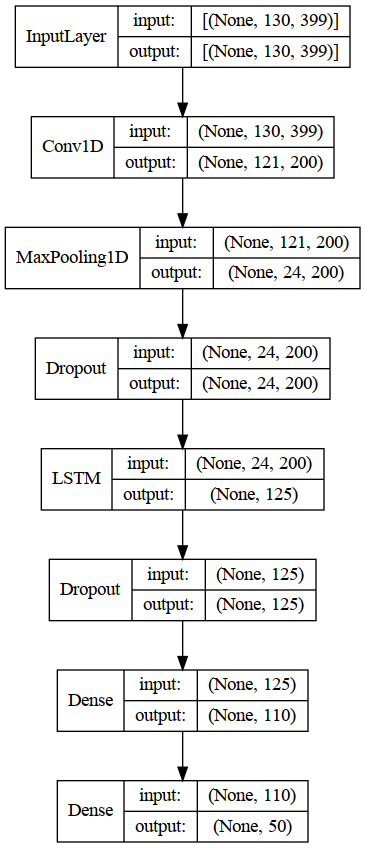

In [126]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [127]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 30ms/step - loss: 1.4886 - f1_score: 0.7109


[1.4886243343353271, 0.710884690284729]

In [128]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 13ms/step - loss: 0.0614 - f1_score: 0.9988


[0.06138976290822029, 0.9988435506820679]

In [129]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

2023-09-23 11:32:33.385799: W tensorflow/core/common_runtime/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


11/11 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.500     0.667     0.571         6
  BASKETBALL      0.667     1.000     0.800        10
         BEE      0.667     0.800     0.727        10
        BELT      1.000     1.000     1.000         4
        BITE      0.667     0.750     0.706         8
   BREAKFAST      0.833     0.833     0.833         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      0.750     1.000     0.857         6
    CONFUSED      0.833     0.833     0.833         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.800     0.500     0.615         8
         DOG      1.000    

### 1 1D-CNN + 1 LSTM Trial 717

In [141]:
best_model = tuner.get_best_models(num_models=4)[3]

In [144]:
best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 16ms/step - loss: 0.3942 - f1_score: 0.9258


[0.39421790838241577, 0.9257767200469971]

In [143]:
best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 16ms/step - loss: 1.2795 - f1_score: 0.6979


[1.2794995307922363, 0.6979272365570068]

In [122]:
bestHP = tuner.get_best_hyperparameters(num_trials=5)[4]

In [123]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1D-CNN + 1 LSTM Trial 717/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [125]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 9s 100ms/step - loss: 5.2782 - f1_score: 0.0126 - val_loss: 5.0421 - val_f1_score: 4.8780e-04
Epoch 2/500
28/28 [==============================] - 2s 70ms/step - loss: 4.8651 - f1_score: 0.0108 - val_loss: 4.6806 - val_f1_score: 0.0087
Epoch 3/500
28/28 [==============================] - 2s 70ms/step - loss: 4.5592 - f1_score: 0.0133 - val_loss: 4.4268 - val_f1_score: 0.0021
Epoch 4/500
28/28 [==============================] - 2s 71ms/step - loss: 4.3551 - f1_score: 0.0134 - val_loss: 4.2690 - val_f1_score: 0.0060
Epoch 5/500
28/28 [==============================] - 2s 72ms/step - loss: 4.2240 - f1_score: 0.0176 - val_loss: 4.1616 - val_f1_score: 0.0066
Epoch 6/500
28/28 [==============================] - 2s 71ms/step - loss: 4.1101 - f1_score: 0.0203 - val_loss: 4.0571 - val_f1_score: 0.0091
Epoch 7/500
28/28 [==============================] - 2s 72ms/step - loss: 3.9644 - f1_score: 0.0220 - val_los

28/28 [==============================] - 2s 75ms/step - loss: 0.9863 - f1_score: 0.7151 - val_loss: 1.4404 - val_f1_score: 0.5917
Epoch 59/500
28/28 [==============================] - 2s 75ms/step - loss: 0.9937 - f1_score: 0.7151 - val_loss: 1.4035 - val_f1_score: 0.6029
Epoch 60/500
28/28 [==============================] - 2s 74ms/step - loss: 0.9772 - f1_score: 0.7097 - val_loss: 1.4128 - val_f1_score: 0.6061
Epoch 61/500
28/28 [==============================] - 2s 74ms/step - loss: 0.9708 - f1_score: 0.7207 - val_loss: 1.4627 - val_f1_score: 0.5778
Epoch 62/500
28/28 [==============================] - 2s 75ms/step - loss: 0.9420 - f1_score: 0.7271 - val_loss: 1.3710 - val_f1_score: 0.6395
Epoch 63/500
28/28 [==============================] - 2s 75ms/step - loss: 0.9099 - f1_score: 0.7368 - val_loss: 1.3515 - val_f1_score: 0.6333
Epoch 64/500
28/28 [==============================] - 2s 75ms/step - loss: 0.9181 - f1_score: 0.7362 - val_loss: 1.3451 - val_f1_score: 0.6184
Epoch 65/500

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


28/28 [==============================] - 13s 492ms/step - loss: 0.7791 - f1_score: 0.7764 - val_loss: 1.3003 - val_f1_score: 0.6672
Epoch 79/500
28/28 [==============================] - 2s 75ms/step - loss: 0.7269 - f1_score: 0.8002 - val_loss: 1.3361 - val_f1_score: 0.6399
Epoch 80/500
28/28 [==============================] - 2s 77ms/step - loss: 0.7372 - f1_score: 0.7875 - val_loss: 1.4376 - val_f1_score: 0.6350
Epoch 81/500
28/28 [==============================] - 2s 70ms/step - loss: 0.7425 - f1_score: 0.7881 - val_loss: 1.3166 - val_f1_score: 0.6658
Epoch 82/500
28/28 [==============================] - 2s 71ms/step - loss: 0.7401 - f1_score: 0.7813 - val_loss: 1.3921 - val_f1_score: 0.6382
Epoch 83/500
28/28 [==============================] - 2s 71ms/step - loss: 0.7259 - f1_score: 0.7973 - val_loss: 1.3684 - val_f1_score: 0.6379
Epoch 84/500
28/28 [==============================] - 2s 73ms/step - loss: 0.7115 - f1_score: 0.7972 - val_loss: 1.2955 - val_f1_score: 0.6668
Epoch 85/5

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


28/28 [==============================] - 12s 454ms/step - loss: 0.7052 - f1_score: 0.8033 - val_loss: 1.3995 - val_f1_score: 0.6779
Epoch 86/500
28/28 [==============================] - 2s 68ms/step - loss: 0.6923 - f1_score: 0.8057 - val_loss: 1.3706 - val_f1_score: 0.6488
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 0.6883 - f1_score: 0.8074

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


28/28 [==============================] - 10s 373ms/step - loss: 0.6883 - f1_score: 0.8074 - val_loss: 1.2571 - val_f1_score: 0.6908
Epoch 88/500
28/28 [==============================] - 2s 68ms/step - loss: 0.6905 - f1_score: 0.8039 - val_loss: 1.3476 - val_f1_score: 0.6430
Epoch 89/500
28/28 [==============================] - 2s 68ms/step - loss: 0.6818 - f1_score: 0.8102 - val_loss: 1.3367 - val_f1_score: 0.6628
Epoch 90/500
28/28 [==============================] - 2s 70ms/step - loss: 0.6905 - f1_score: 0.8026 - val_loss: 1.3548 - val_f1_score: 0.6429
Epoch 91/500
28/28 [==============================] - ETA: 0s - loss: 0.6693 - f1_score: 0.8099

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


28/28 [==============================] - 10s 384ms/step - loss: 0.6693 - f1_score: 0.8099 - val_loss: 1.3362 - val_f1_score: 0.6913
Epoch 92/500
28/28 [==============================] - 2s 68ms/step - loss: 0.6522 - f1_score: 0.8189 - val_loss: 1.3817 - val_f1_score: 0.6712
Epoch 93/500
28/28 [==============================] - 2s 69ms/step - loss: 0.6222 - f1_score: 0.8277 - val_loss: 1.3375 - val_f1_score: 0.6632
Epoch 94/500
28/28 [==============================] - 2s 70ms/step - loss: 0.6270 - f1_score: 0.8308 - val_loss: 1.3205 - val_f1_score: 0.6819
Epoch 95/500
28/28 [==============================] - 2s 71ms/step - loss: 0.6555 - f1_score: 0.8068 - val_loss: 1.3487 - val_f1_score: 0.6778
Epoch 96/500
28/28 [==============================] - 2s 70ms/step - loss: 0.6143 - f1_score: 0.8372 - val_loss: 1.3567 - val_f1_score: 0.6381
Epoch 97/500
28/28 [==============================] - 2s 71ms/step - loss: 0.6384 - f1_score: 0.8197 - val_loss: 1.3268 - val_f1_score: 0.6560
Epoch 98/5

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 LSTM Trial 717/assets


28/28 [==============================] - 11s 410ms/step - loss: 0.5957 - f1_score: 0.8402 - val_loss: 1.3071 - val_f1_score: 0.6976
Epoch 101/500
28/28 [==============================] - 2s 69ms/step - loss: 0.5976 - f1_score: 0.8406 - val_loss: 1.3350 - val_f1_score: 0.6931
Epoch 102/500
28/28 [==============================] - 2s 70ms/step - loss: 0.5692 - f1_score: 0.8550 - val_loss: 1.3762 - val_f1_score: 0.6898
Epoch 103/500
28/28 [==============================] - 2s 70ms/step - loss: 0.6014 - f1_score: 0.8306 - val_loss: 1.4117 - val_f1_score: 0.6800
Epoch 104/500
28/28 [==============================] - 2s 70ms/step - loss: 0.5606 - f1_score: 0.8487 - val_loss: 1.3765 - val_f1_score: 0.6543
Epoch 105/500
28/28 [==============================] - 2s 70ms/step - loss: 0.5673 - f1_score: 0.8394 - val_loss: 1.2620 - val_f1_score: 0.6587
Epoch 106/500
28/28 [==============================] - 2s 71ms/step - loss: 0.5984 - f1_score: 0.8413 - val_loss: 1.3252 - val_f1_score: 0.6902
Epoc

Epoch 157/500
28/28 [==============================] - 2s 77ms/step - loss: 0.3767 - f1_score: 0.9075 - val_loss: 1.5044 - val_f1_score: 0.6709
Epoch 158/500
28/28 [==============================] - 2s 79ms/step - loss: 0.3660 - f1_score: 0.9078 - val_loss: 1.5366 - val_f1_score: 0.6455
Epoch 159/500
28/28 [==============================] - 2s 87ms/step - loss: 0.3712 - f1_score: 0.9125 - val_loss: 1.5766 - val_f1_score: 0.6342
Epoch 160/500
28/28 [==============================] - 2s 76ms/step - loss: 0.3910 - f1_score: 0.9091 - val_loss: 1.4240 - val_f1_score: 0.6553
Epoch 161/500
28/28 [==============================] - 2s 76ms/step - loss: 0.3951 - f1_score: 0.9035 - val_loss: 1.5146 - val_f1_score: 0.6637
Epoch 162/500
28/28 [==============================] - 2s 74ms/step - loss: 0.3683 - f1_score: 0.9029 - val_loss: 1.5158 - val_f1_score: 0.6577
Epoch 163/500
28/28 [==============================] - 2s 82ms/step - loss: 0.3599 - f1_score: 0.9165 - val_loss: 1.5103 - val_f1_score:

Epoch 214/500
28/28 [==============================] - 2s 72ms/step - loss: 0.2700 - f1_score: 0.9418 - val_loss: 1.6478 - val_f1_score: 0.6394
Epoch 215/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2863 - f1_score: 0.9309 - val_loss: 1.7448 - val_f1_score: 0.6293
Epoch 216/500
28/28 [==============================] - 2s 74ms/step - loss: 0.3086 - f1_score: 0.9236 - val_loss: 1.5073 - val_f1_score: 0.6647
Epoch 217/500
28/28 [==============================] - 2s 73ms/step - loss: 0.2902 - f1_score: 0.9277 - val_loss: 1.7092 - val_f1_score: 0.6052
Epoch 218/500
28/28 [==============================] - 2s 77ms/step - loss: 0.2832 - f1_score: 0.9390 - val_loss: 1.6525 - val_f1_score: 0.6488
Epoch 219/500
28/28 [==============================] - 2s 77ms/step - loss: 0.2706 - f1_score: 0.9401 - val_loss: 1.7673 - val_f1_score: 0.6319
Epoch 220/500
28/28 [==============================] - 2s 75ms/step - loss: 0.2916 - f1_score: 0.9305 - val_loss: 1.7039 - val_f1_score:

Epoch 271/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2272 - f1_score: 0.9525 - val_loss: 1.7945 - val_f1_score: 0.6486
Epoch 272/500
28/28 [==============================] - 2s 73ms/step - loss: 0.2397 - f1_score: 0.9459 - val_loss: 1.8665 - val_f1_score: 0.6368
Epoch 273/500
28/28 [==============================] - 2s 72ms/step - loss: 0.2214 - f1_score: 0.9545 - val_loss: 1.8109 - val_f1_score: 0.6600
Epoch 274/500
28/28 [==============================] - 2s 76ms/step - loss: 0.2258 - f1_score: 0.9523 - val_loss: 1.8911 - val_f1_score: 0.5908
Epoch 275/500
28/28 [==============================] - 2s 86ms/step - loss: 0.2329 - f1_score: 0.9460 - val_loss: 1.8336 - val_f1_score: 0.6545
Epoch 276/500
28/28 [==============================] - 2s 75ms/step - loss: 0.2145 - f1_score: 0.9565 - val_loss: 2.0021 - val_f1_score: 0.6113
Epoch 277/500
28/28 [==============================] - 2s 73ms/step - loss: 0.2284 - f1_score: 0.9468 - val_loss: 1.8931 - val_f1_score:

Epoch 328/500
28/28 [==============================] - 2s 77ms/step - loss: 0.1905 - f1_score: 0.9607 - val_loss: 1.8589 - val_f1_score: 0.6335
Epoch 329/500
28/28 [==============================] - 2s 76ms/step - loss: 0.1867 - f1_score: 0.9621 - val_loss: 1.9509 - val_f1_score: 0.6076
Epoch 330/500
28/28 [==============================] - 2s 77ms/step - loss: 0.2052 - f1_score: 0.9515 - val_loss: 1.7574 - val_f1_score: 0.6537
Epoch 331/500
28/28 [==============================] - 2s 80ms/step - loss: 0.2023 - f1_score: 0.9565 - val_loss: 1.8044 - val_f1_score: 0.6490
Epoch 332/500
28/28 [==============================] - 2s 76ms/step - loss: 0.2036 - f1_score: 0.9583 - val_loss: 1.9480 - val_f1_score: 0.5965
Epoch 333/500
28/28 [==============================] - 2s 75ms/step - loss: 0.1859 - f1_score: 0.9644 - val_loss: 1.8745 - val_f1_score: 0.6131
Epoch 334/500
28/28 [==============================] - 2s 73ms/step - loss: 0.2163 - f1_score: 0.9516 - val_loss: 1.8724 - val_f1_score:

Epoch 385/500
28/28 [==============================] - 2s 73ms/step - loss: 0.1688 - f1_score: 0.9745 - val_loss: 1.8733 - val_f1_score: 0.6421
Epoch 386/500
28/28 [==============================] - 2s 71ms/step - loss: 0.1703 - f1_score: 0.9678 - val_loss: 2.0929 - val_f1_score: 0.6269
Epoch 387/500
28/28 [==============================] - 2s 72ms/step - loss: 0.1876 - f1_score: 0.9608 - val_loss: 1.9318 - val_f1_score: 0.6462
Epoch 388/500
28/28 [==============================] - 2s 72ms/step - loss: 0.1794 - f1_score: 0.9625 - val_loss: 1.9944 - val_f1_score: 0.6242
Epoch 389/500
28/28 [==============================] - 2s 82ms/step - loss: 0.1744 - f1_score: 0.9659 - val_loss: 1.8969 - val_f1_score: 0.6315
Epoch 390/500
28/28 [==============================] - 2s 71ms/step - loss: 0.1824 - f1_score: 0.9655 - val_loss: 1.8514 - val_f1_score: 0.6598
Epoch 391/500
28/28 [==============================] - 2s 71ms/step - loss: 0.1706 - f1_score: 0.9662 - val_loss: 2.0836 - val_f1_score:

Epoch 442/500
28/28 [==============================] - 2s 70ms/step - loss: 0.1688 - f1_score: 0.9648 - val_loss: 1.9382 - val_f1_score: 0.6181
Epoch 443/500
28/28 [==============================] - 2s 71ms/step - loss: 0.1730 - f1_score: 0.9632 - val_loss: 2.0482 - val_f1_score: 0.6142
Epoch 444/500
28/28 [==============================] - 2s 71ms/step - loss: 0.1492 - f1_score: 0.9741 - val_loss: 1.9663 - val_f1_score: 0.6451
Epoch 445/500
28/28 [==============================] - 2s 71ms/step - loss: 0.1585 - f1_score: 0.9667 - val_loss: 1.9795 - val_f1_score: 0.6315
Epoch 446/500
28/28 [==============================] - 2s 71ms/step - loss: 0.1419 - f1_score: 0.9719 - val_loss: 2.0546 - val_f1_score: 0.6231
Epoch 447/500
28/28 [==============================] - 2s 70ms/step - loss: 0.1607 - f1_score: 0.9666 - val_loss: 2.2615 - val_f1_score: 0.5473
Epoch 448/500
28/28 [==============================] - 2s 70ms/step - loss: 0.1686 - f1_score: 0.9699 - val_loss: 1.8449 - val_f1_score:

Epoch 499/500
28/28 [==============================] - 2s 76ms/step - loss: 0.1547 - f1_score: 0.9722 - val_loss: 2.1799 - val_f1_score: 0.6217
Epoch 500/500
28/28 [==============================] - 2s 77ms/step - loss: 0.1811 - f1_score: 0.9620 - val_loss: 2.2509 - val_f1_score: 0.5870


In [126]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.500     0.667     0.571         6
  BASKETBALL      1.000     0.900     0.947        10
         BEE      0.500     0.300     0.375        10
        BELT      0.500     1.000     0.667         4
        BITE      0.667     0.500     0.571         8
   BREAKFAST      0.571     0.667     0.615         6
      CANCER      0.615     1.000     0.762         8
   CHRISTMAS      0.750     1.000     0.857         6
    CONFUSED      0.571     0.667     0.615         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.200     0.333     0.250         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.500     0.250     0.333         8
     DEVELOP      0.000     0.000     0.000         6
      DINNER      0.800     0.500     0.615         8
         DOG      0.500    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1D-CNN + 1 LSTM Trial 717/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [128]:
hist_df = pd.read_csv('1 1D-CNN + 1 LSTM Trial 717/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.150789  0.970118  2.029120      0.612400
496  0.147346  0.970612  2.112572      0.582086
497  0.135868  0.978456  2.194486      0.587883
498  0.154721  0.972239  2.179939      0.621738
499  0.181057  0.961961  2.250935      0.587032

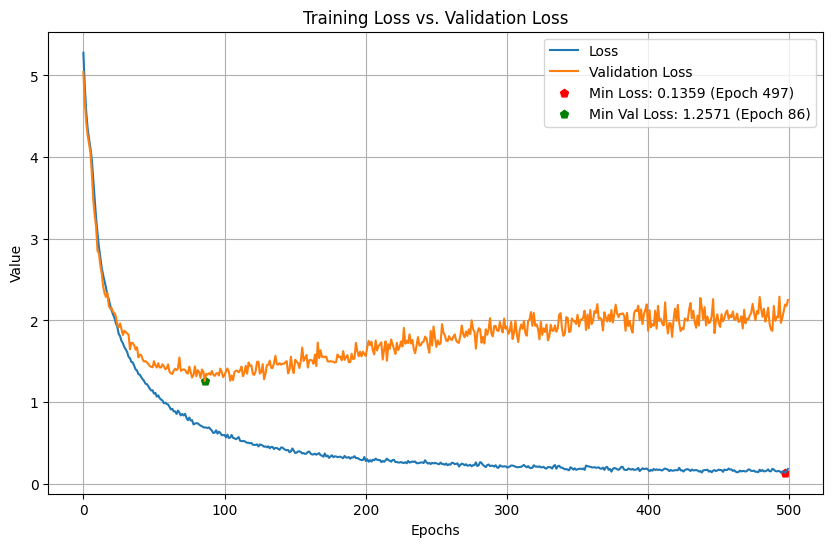

In [129]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

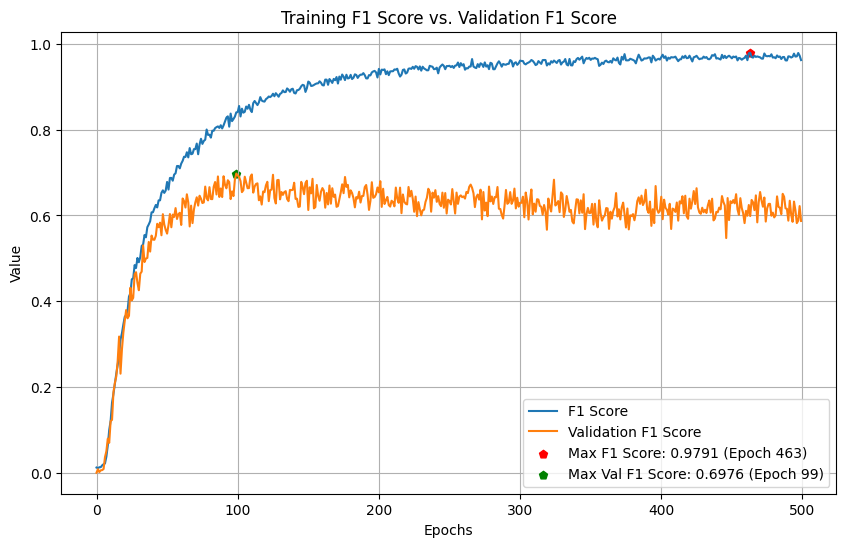

In [130]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [131]:
reconstructed_model = tf.keras.models.load_model("1 1D-CNN + 1 LSTM Trial 717")

In [132]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 175)          349300    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 175)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 175)            0         
                                                                 
 lstm_1 (LSTM)               (None, 200)               300800    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 70)                14070     
                                                      

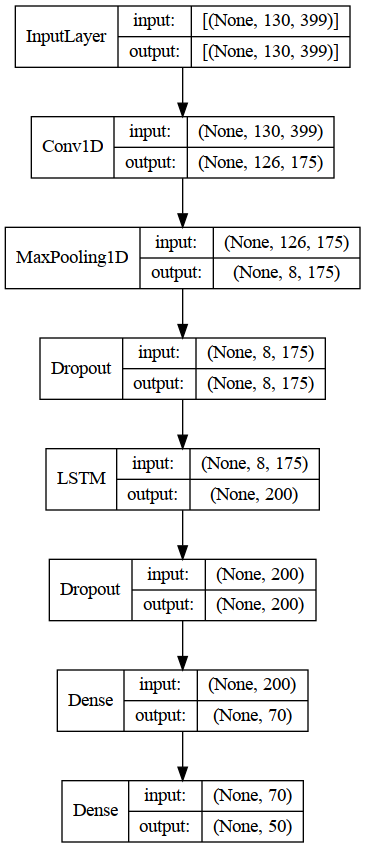

In [133]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

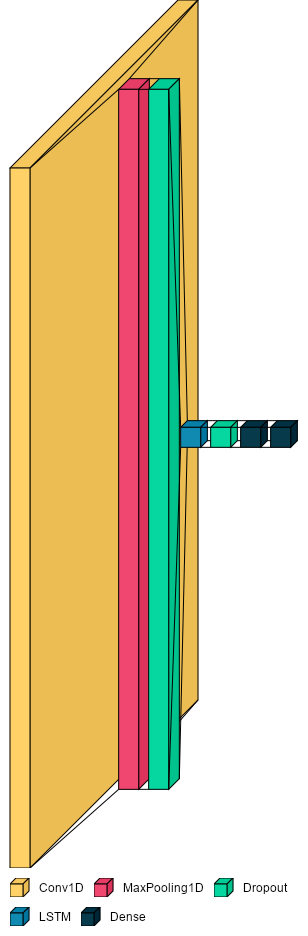

In [134]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [135]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 12ms/step - loss: 1.3071 - f1_score: 0.6976


[1.307061791419983, 0.697600245475769]

In [136]:
reconstructed_model.evaluate(Xtrain, Ytrain, batch_size=96)

28/28 [==============================] - 1s 29ms/step - loss: 0.2873 - f1_score: 0.9597


[0.2873406708240509, 0.9597119092941284]

In [137]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.250     0.200     0.222        10
        BELT      1.000     1.000     1.000         4
        BITE      0.857     0.750     0.800         8
   BREAKFAST      0.400     0.333     0.364         6
      CANCER      0.571     1.000     0.727         8
   CHRISTMAS      0.833     0.833     0.833         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.286     0.333     0.308         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.615     1.000     0.762         8
         DOG      0.667     

## Hyperparameter Tuning 2 1D CNN Layer + 1 LSTM

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_2423752/1222377179.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='relu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[3, 4, 5, 6, 7, 8, 9, 10],
                       default=5,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[3, 4, 5, 6, 7, 8, 9, 10],
                default=5,
            )))
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_2',
                       values=[1, 2, 3, 4, 5],
                       default=5,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_2',
                values=[1, 2, 3, 4, 5],
                default=5,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/',
    project_name='2_1D_CNN+1_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/2_1D_CNN+1_LSTM/tuner0.json


In [123]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pool_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
kernel_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
pool_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer (Float)
{'default': 0.001, 'conditions': [], 

In [124]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [126]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 04m 05s]
val_f1_score: 0.46747535467147827

Best val_f1_score So Far: 0.7492342889308929
Total elapsed time: 11h 39m 22s
INFO:tensorflow:Oracle triggered exit


In [122]:
best_model = tuner.get_best_models(num_models=10)[0]

2023-09-10 11:28:41.843174: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 11:28:45.829128: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1561 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [123]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 128, 150)          179700    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 21, 150)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 150)           90150     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 150)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 150)            0         
                                                                 
 lstm (LSTM)                 (None, 150)               1

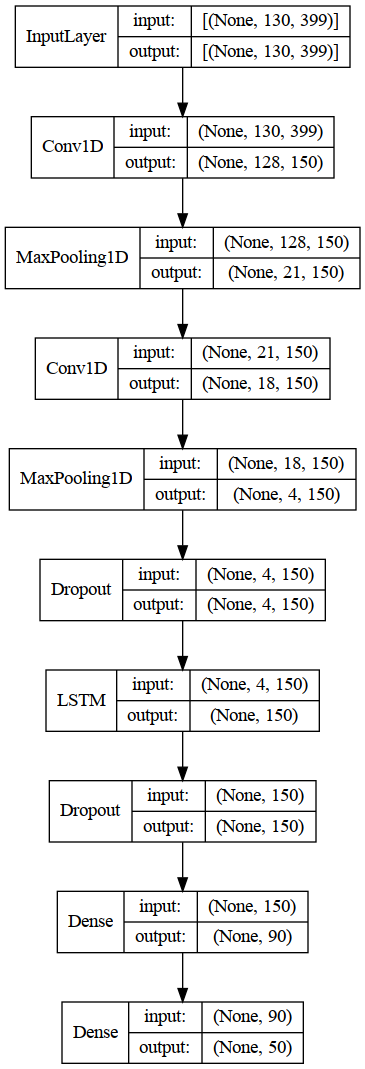

In [124]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

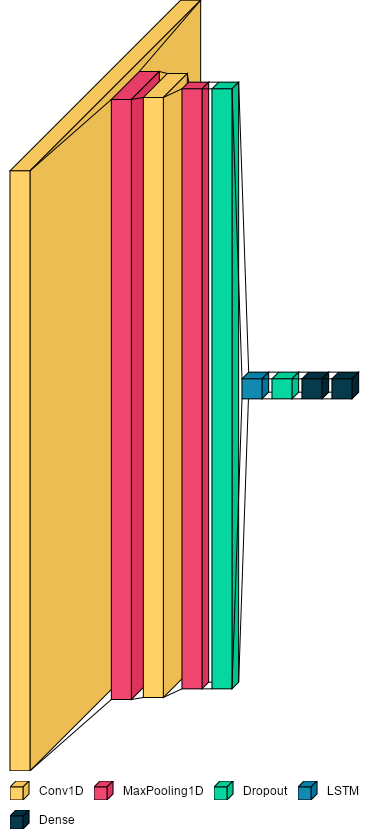

In [125]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [130]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/RTMPose-L/hyperband/2_1D_CNN+1_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0427 summary
Hyperparameters:
dense_activation: mish
filters_1: 150
kernel_1: 3
pool_1: 6
kernel_2: 4
pool_2: 4
dropout_1: 0.45
units_1: 150
regularizer: 0.005421195615159703
dropout_2: 0.55
units_2: 90
learning_rate: 0.0008053201250101636
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0424
Score: 0.7492342889308929

Trial 0426 summary
Hyperparameters:
dense_activation: gelu
filters_1: 200
kernel_1: 3
pool_1: 6
kernel_2: 3
pool_2: 4
dropout_1: 0.1
units_1: 50
regularizer: 0.001278553600468175
dropout_2: 0.30000000000000004
units_2: 100
learning_rate: 0.0004250525730906734
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0425
Score: 0.7470126450061798

Trial 0425 summary
Hyperparameters:
dense_activation: gelu
filters_1: 200
kernel_

In [131]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 38ms/step - loss: 1.3475 - f1_score: 0.7625


In [132]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 13ms/step - loss: 0.1221 - f1_score: 1.0000


In [133]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.714     1.000     0.833        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      1.000     0.333     0.500         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.600     1.000     0.750         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.333     0.167     0.222         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.889     1.000     0.941         8
         DOG      0.600    

In [134]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [135]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [137]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 11s 97ms/step - loss: 4.9852 - f1_score: 0.0145 - val_loss: 4.7066 - val_f1_score: 4.8780e-04
Epoch 2/500
28/28 [==============================] - 2s 63ms/step - loss: 4.5154 - f1_score: 0.0128 - val_loss: 4.3306 - val_f1_score: 0.0100
Epoch 3/500
28/28 [==============================] - 2s 79ms/step - loss: 4.2145 - f1_score: 0.0228 - val_loss: 4.0675 - val_f1_score: 0.0150
Epoch 4/500
28/28 [==============================] - 2s 88ms/step - loss: 3.9174 - f1_score: 0.0268 - val_loss: 3.6295 - val_f1_score: 0.0248
Epoch 5/500
28/28 [==============================] - 3s 103ms/step - loss: 3.6697 - f1_score: 0.0464 - val_loss: 3.4563 - val_f1_score: 0.0356
Epoch 6/500
28/28 [==============================] - 3s 96ms/step - loss: 3.4822 - f1_score: 0.0572 - val_loss: 3.2799 - val_f1_score: 0.0720
Epoch 7/500
28/28 [==============================] - 3s 108ms/step - loss: 3.3011 - f1_score: 0.0786 - val_l

Epoch 58/500
28/28 [==============================] - 2s 79ms/step - loss: 0.8952 - f1_score: 0.7515 - val_loss: 1.3079 - val_f1_score: 0.6444
Epoch 59/500
28/28 [==============================] - 2s 80ms/step - loss: 0.8908 - f1_score: 0.7528 - val_loss: 1.3850 - val_f1_score: 0.6146
Epoch 60/500
28/28 [==============================] - 2s 85ms/step - loss: 0.8448 - f1_score: 0.7644 - val_loss: 1.3537 - val_f1_score: 0.6450
Epoch 61/500
28/28 [==============================] - 2s 77ms/step - loss: 0.8717 - f1_score: 0.7612 - val_loss: 1.3201 - val_f1_score: 0.6223
Epoch 62/500
28/28 [==============================] - 2s 72ms/step - loss: 0.8445 - f1_score: 0.7667 - val_loss: 1.3230 - val_f1_score: 0.6461
Epoch 63/500
28/28 [==============================] - 2s 71ms/step - loss: 0.8339 - f1_score: 0.7767 - val_loss: 1.4010 - val_f1_score: 0.6105
Epoch 64/500
28/28 [==============================] - 2s 71ms/step - loss: 0.8265 - f1_score: 0.7659 - val_loss: 1.4849 - val_f1_score: 0.6060

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 14s 532ms/step - loss: 0.6143 - f1_score: 0.8427 - val_loss: 1.2954 - val_f1_score: 0.6972
Epoch 86/500
28/28 [==============================] - 2s 63ms/step - loss: 0.6380 - f1_score: 0.8298 - val_loss: 1.2819 - val_f1_score: 0.6838
Epoch 87/500
28/28 [==============================] - 2s 58ms/step - loss: 0.6069 - f1_score: 0.8439 - val_loss: 1.2943 - val_f1_score: 0.6700
Epoch 88/500
28/28 [==============================] - 2s 58ms/step - loss: 0.6004 - f1_score: 0.8411 - val_loss: 1.2779 - val_f1_score: 0.6557
Epoch 89/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5804 - f1_score: 0.8373 - val_loss: 1.2567 - val_f1_score: 0.6707
Epoch 90/500
28/28 [==============================] - 2s 59ms/step - loss: 0.5801 - f1_score: 0.8531 - val_loss: 1.3957 - val_f1_score: 0.6498
Epoch 91/500
28/28 [==============================] - 2s 59ms/step - loss: 0.6061 - f1_score: 0.8386 - val_loss: 1.2821 - val_f1_score: 0.6852
Epoch 92/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 14s 514ms/step - loss: 0.4923 - f1_score: 0.8795 - val_loss: 1.2834 - val_f1_score: 0.7100
Epoch 102/500
28/28 [==============================] - 2s 58ms/step - loss: 0.5086 - f1_score: 0.8662 - val_loss: 1.3757 - val_f1_score: 0.6915
Epoch 103/500
28/28 [==============================] - 2s 58ms/step - loss: 0.5111 - f1_score: 0.8694 - val_loss: 1.3757 - val_f1_score: 0.6848
Epoch 104/500
28/28 [==============================] - 2s 60ms/step - loss: 0.5042 - f1_score: 0.8790 - val_loss: 1.2947 - val_f1_score: 0.6749
Epoch 105/500
28/28 [==============================] - 2s 63ms/step - loss: 0.5031 - f1_score: 0.8686 - val_loss: 1.2960 - val_f1_score: 0.6907
Epoch 106/500
28/28 [==============================] - 2s 62ms/step - loss: 0.4765 - f1_score: 0.8857 - val_loss: 1.4877 - val_f1_score: 0.6655
Epoch 107/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4931 - f1_score: 0.8746 - val_loss: 1.3194 - val_f1_score: 0.6591
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 432ms/step - loss: 0.4394 - f1_score: 0.8953 - val_loss: 1.2978 - val_f1_score: 0.7250
Epoch 123/500
28/28 [==============================] - 2s 56ms/step - loss: 0.4434 - f1_score: 0.8859 - val_loss: 1.3219 - val_f1_score: 0.6708
Epoch 124/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4219 - f1_score: 0.8973 - val_loss: 1.3530 - val_f1_score: 0.6936
Epoch 125/500
28/28 [==============================] - 2s 57ms/step - loss: 0.4387 - f1_score: 0.8972 - val_loss: 1.3639 - val_f1_score: 0.6859
Epoch 126/500
28/28 [==============================] - 2s 58ms/step - loss: 0.4151 - f1_score: 0.9008 - val_loss: 1.3691 - val_f1_score: 0.6796
Epoch 127/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3962 - f1_score: 0.9112 - val_loss: 1.2670 - val_f1_score: 0.6955
Epoch 128/500
28/28 [==============================] - 2s 65ms/step - loss: 0.4288 - f1_score: 0.8993 - val_loss: 1.3317 - val_f1_score: 0.7096
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 13s 480ms/step - loss: 0.3603 - f1_score: 0.9120 - val_loss: 1.2661 - val_f1_score: 0.7298
Epoch 165/500
28/28 [==============================] - 2s 58ms/step - loss: 0.3187 - f1_score: 0.9355 - val_loss: 1.3705 - val_f1_score: 0.6918
Epoch 166/500
28/28 [==============================] - 2s 58ms/step - loss: 0.3127 - f1_score: 0.9340 - val_loss: 1.4449 - val_f1_score: 0.6714
Epoch 167/500
28/28 [==============================] - 2s 64ms/step - loss: 0.3384 - f1_score: 0.9224 - val_loss: 1.3303 - val_f1_score: 0.7017
Epoch 168/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3288 - f1_score: 0.9276 - val_loss: 1.3379 - val_f1_score: 0.6973
Epoch 169/500
28/28 [==============================] - 2s 59ms/step - loss: 0.3167 - f1_score: 0.9308 - val_loss: 1.3155 - val_f1_score: 0.6699
Epoch 170/500
28/28 [==============================] - 2s 58ms/step - loss: 0.3385 - f1_score: 0.9307 - val_loss: 1.4140 - val_f1_score: 0.6793
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 406ms/step - loss: 0.3006 - f1_score: 0.9333 - val_loss: 1.2711 - val_f1_score: 0.7320
Epoch 174/500
28/28 [==============================] - 2s 57ms/step - loss: 0.3132 - f1_score: 0.9285 - val_loss: 1.4076 - val_f1_score: 0.7119
Epoch 175/500
28/28 [==============================] - 2s 58ms/step - loss: 0.3016 - f1_score: 0.9284 - val_loss: 1.4336 - val_f1_score: 0.6869
Epoch 176/500
28/28 [==============================] - 2s 61ms/step - loss: 0.3567 - f1_score: 0.9161 - val_loss: 1.3393 - val_f1_score: 0.6750
Epoch 177/500
28/28 [==============================] - 2s 62ms/step - loss: 0.3216 - f1_score: 0.9279 - val_loss: 1.3486 - val_f1_score: 0.7174
Epoch 178/500
28/28 [==============================] - 2s 62ms/step - loss: 0.3173 - f1_score: 0.9309 - val_loss: 1.4049 - val_f1_score: 0.7190
Epoch 179/500
28/28 [==============================] - 2s 60ms/step - loss: 0.3396 - f1_score: 0.9187 - val_loss: 1.4754 - val_f1_score: 0.6738
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 13s 475ms/step - loss: 0.3036 - f1_score: 0.9301 - val_loss: 1.2381 - val_f1_score: 0.7393
Epoch 186/500
28/28 [==============================] - 2s 57ms/step - loss: 0.2975 - f1_score: 0.9349 - val_loss: 1.2942 - val_f1_score: 0.7065
Epoch 187/500
28/28 [==============================] - 2s 57ms/step - loss: 0.2944 - f1_score: 0.9311 - val_loss: 1.3323 - val_f1_score: 0.6956
Epoch 188/500
28/28 [==============================] - 2s 57ms/step - loss: 0.3271 - f1_score: 0.9169 - val_loss: 1.3573 - val_f1_score: 0.7236
Epoch 189/500
28/28 [==============================] - 2s 58ms/step - loss: 0.3034 - f1_score: 0.9397 - val_loss: 1.2564 - val_f1_score: 0.7339
Epoch 190/500
28/28 [==============================] - 2s 57ms/step - loss: 0.3144 - f1_score: 0.9344 - val_loss: 1.3036 - val_f1_score: 0.7133
Epoch 191/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2836 - f1_score: 0.9436 - val_loss: 1.3945 - val_f1_score: 0.6969
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 434ms/step - loss: 0.3128 - f1_score: 0.9266 - val_loss: 1.3058 - val_f1_score: 0.7594
Epoch 201/500
28/28 [==============================] - 2s 56ms/step - loss: 0.2827 - f1_score: 0.9396 - val_loss: 1.2756 - val_f1_score: 0.7191
Epoch 202/500
28/28 [==============================] - 2s 56ms/step - loss: 0.3046 - f1_score: 0.9309 - val_loss: 1.2845 - val_f1_score: 0.7361
Epoch 203/500
28/28 [==============================] - 2s 58ms/step - loss: 0.3014 - f1_score: 0.9344 - val_loss: 1.4424 - val_f1_score: 0.7024
Epoch 204/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2835 - f1_score: 0.9401 - val_loss: 1.3608 - val_f1_score: 0.7240
Epoch 205/500
28/28 [==============================] - 2s 58ms/step - loss: 0.2805 - f1_score: 0.9372 - val_loss: 1.4475 - val_f1_score: 0.7062
Epoch 206/500
28/28 [==============================] - 2s 58ms/step - loss: 0.2979 - f1_score: 0.9351 - val_loss: 1.2506 - val_f1_score: 0.7477
Epoc

Epoch 257/500
28/28 [==============================] - 2s 58ms/step - loss: 0.2352 - f1_score: 0.9538 - val_loss: 1.4578 - val_f1_score: 0.6972
Epoch 258/500
28/28 [==============================] - 2s 65ms/step - loss: 0.2380 - f1_score: 0.9542 - val_loss: 1.5007 - val_f1_score: 0.6926
Epoch 259/500
28/28 [==============================] - 2s 64ms/step - loss: 0.2590 - f1_score: 0.9463 - val_loss: 1.4596 - val_f1_score: 0.7238
Epoch 260/500
28/28 [==============================] - 2s 58ms/step - loss: 0.2413 - f1_score: 0.9560 - val_loss: 1.4764 - val_f1_score: 0.7149
Epoch 261/500
28/28 [==============================] - 2s 58ms/step - loss: 0.2354 - f1_score: 0.9517 - val_loss: 1.4562 - val_f1_score: 0.6988
Epoch 262/500
28/28 [==============================] - 2s 65ms/step - loss: 0.2501 - f1_score: 0.9510 - val_loss: 1.3805 - val_f1_score: 0.7229
Epoch 263/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2626 - f1_score: 0.9443 - val_loss: 1.4461 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 457ms/step - loss: 0.2305 - f1_score: 0.9557 - val_loss: 1.3668 - val_f1_score: 0.7657
Epoch 265/500
28/28 [==============================] - 2s 57ms/step - loss: 0.2324 - f1_score: 0.9541 - val_loss: 1.3940 - val_f1_score: 0.7141
Epoch 266/500
28/28 [==============================] - 2s 56ms/step - loss: 0.2601 - f1_score: 0.9472 - val_loss: 1.5413 - val_f1_score: 0.6771
Epoch 267/500
28/28 [==============================] - 2s 56ms/step - loss: 0.2716 - f1_score: 0.9423 - val_loss: 1.3783 - val_f1_score: 0.6929
Epoch 268/500
28/28 [==============================] - 2s 56ms/step - loss: 0.2484 - f1_score: 0.9519 - val_loss: 1.4571 - val_f1_score: 0.6980
Epoch 269/500
28/28 [==============================] - 2s 58ms/step - loss: 0.2408 - f1_score: 0.9502 - val_loss: 1.3767 - val_f1_score: 0.7055
Epoch 270/500
28/28 [==============================] - 2s 57ms/step - loss: 0.2658 - f1_score: 0.9435 - val_loss: 1.4534 - val_f1_score: 0.6896
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 439ms/step - loss: 0.2203 - f1_score: 0.9572 - val_loss: 1.2420 - val_f1_score: 0.7745
Epoch 315/500
28/28 [==============================] - 2s 62ms/step - loss: 0.2452 - f1_score: 0.9531 - val_loss: 1.3016 - val_f1_score: 0.7249
Epoch 316/500
28/28 [==============================] - 2s 58ms/step - loss: 0.2379 - f1_score: 0.9535 - val_loss: 1.5169 - val_f1_score: 0.7509
Epoch 317/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2113 - f1_score: 0.9635 - val_loss: 1.4182 - val_f1_score: 0.7287
Epoch 318/500
28/28 [==============================] - 2s 65ms/step - loss: 0.2126 - f1_score: 0.9615 - val_loss: 1.5527 - val_f1_score: 0.7163
Epoch 319/500
28/28 [==============================] - 2s 64ms/step - loss: 0.2098 - f1_score: 0.9649 - val_loss: 1.4365 - val_f1_score: 0.7212
Epoch 320/500
28/28 [==============================] - 2s 61ms/step - loss: 0.2203 - f1_score: 0.9567 - val_loss: 1.6019 - val_f1_score: 0.7107
Epoc

Epoch 371/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2290 - f1_score: 0.9604 - val_loss: 1.4527 - val_f1_score: 0.7525
Epoch 372/500
28/28 [==============================] - 2s 60ms/step - loss: 0.2278 - f1_score: 0.9578 - val_loss: 1.8295 - val_f1_score: 0.6860
Epoch 373/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2136 - f1_score: 0.9611 - val_loss: 1.4445 - val_f1_score: 0.7511
Epoch 374/500
28/28 [==============================] - 2s 67ms/step - loss: 0.2087 - f1_score: 0.9617 - val_loss: 1.4484 - val_f1_score: 0.7147
Epoch 375/500
28/28 [==============================] - 2s 65ms/step - loss: 0.2062 - f1_score: 0.9606 - val_loss: 1.4685 - val_f1_score: 0.7237
Epoch 376/500
28/28 [==============================] - 2s 67ms/step - loss: 0.2116 - f1_score: 0.9561 - val_loss: 1.4900 - val_f1_score: 0.7085
Epoch 377/500
28/28 [==============================] - 2s 66ms/step - loss: 0.2271 - f1_score: 0.9604 - val_loss: 1.4933 - val_f1_score:

Epoch 428/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1862 - f1_score: 0.9683 - val_loss: 1.4330 - val_f1_score: 0.7446
Epoch 429/500
28/28 [==============================] - 2s 74ms/step - loss: 0.2156 - f1_score: 0.9568 - val_loss: 1.3872 - val_f1_score: 0.7518
Epoch 430/500
28/28 [==============================] - 2s 69ms/step - loss: 0.1944 - f1_score: 0.9682 - val_loss: 1.4531 - val_f1_score: 0.7376
Epoch 431/500
28/28 [==============================] - 2s 68ms/step - loss: 0.1875 - f1_score: 0.9662 - val_loss: 1.3394 - val_f1_score: 0.7350
Epoch 432/500
28/28 [==============================] - 2s 63ms/step - loss: 0.1946 - f1_score: 0.9660 - val_loss: 1.5192 - val_f1_score: 0.7115
Epoch 433/500
28/28 [==============================] - 2s 59ms/step - loss: 0.1867 - f1_score: 0.9664 - val_loss: 1.6235 - val_f1_score: 0.7349
Epoch 434/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1909 - f1_score: 0.9694 - val_loss: 1.6397 - val_f1_score:

Epoch 485/500
28/28 [==============================] - 2s 58ms/step - loss: 0.1841 - f1_score: 0.9663 - val_loss: 1.6737 - val_f1_score: 0.7204
Epoch 486/500
28/28 [==============================] - 2s 59ms/step - loss: 0.1888 - f1_score: 0.9662 - val_loss: 1.5860 - val_f1_score: 0.6946
Epoch 487/500
28/28 [==============================] - 2s 59ms/step - loss: 0.1707 - f1_score: 0.9718 - val_loss: 1.5015 - val_f1_score: 0.7411
Epoch 488/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1989 - f1_score: 0.9671 - val_loss: 1.3576 - val_f1_score: 0.7445
Epoch 489/500
28/28 [==============================] - 2s 60ms/step - loss: 0.1901 - f1_score: 0.9681 - val_loss: 1.4117 - val_f1_score: 0.7213
Epoch 490/500
28/28 [==============================] - 2s 65ms/step - loss: 0.1750 - f1_score: 0.9710 - val_loss: 1.4528 - val_f1_score: 0.7236
Epoch 491/500
28/28 [==============================] - 2s 64ms/step - loss: 0.1808 - f1_score: 0.9696 - val_loss: 1.4851 - val_f1_score:

In [138]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         AXE      0.875     0.875     0.875         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.750     0.600     0.667        10
        BELT      1.000     1.000     1.000         4
        BITE      0.857     0.750     0.800         8
   BREAKFAST      0.500     0.500     0.500         6
      CANCER      0.875     0.875     0.875         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.600     1.000     0.750         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      1.000     0.333     0.500         6
      DINNER      1.000     1.000     1.000         8
         DOG      0.500     

In [139]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 1DCNN + 1 LSTM/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [60]:
hist_df = pd.read_csv('2 1DCNN + 1 LSTM/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.169014  0.977602  1.716578      0.694314
496  0.169110  0.972625  1.579869      0.695536
497  0.185274  0.970491  1.738750      0.690854
498  0.187349  0.971281  1.450697      0.741395
499  0.198287  0.966673  1.582714      0.736278

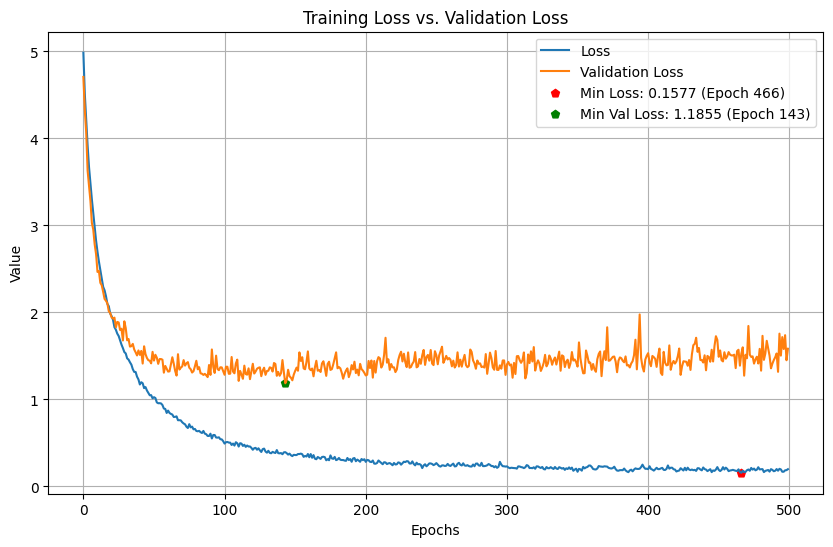

In [61]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

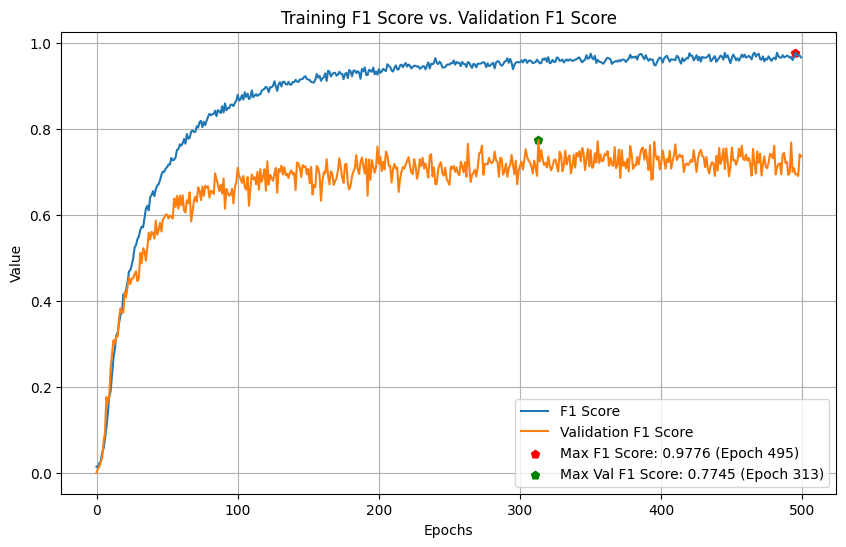

In [62]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [142]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 LSTM")

In [143]:
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 128, 150)          179700    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 21, 150)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 18, 150)           90150     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 4, 150)           0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 4, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)              

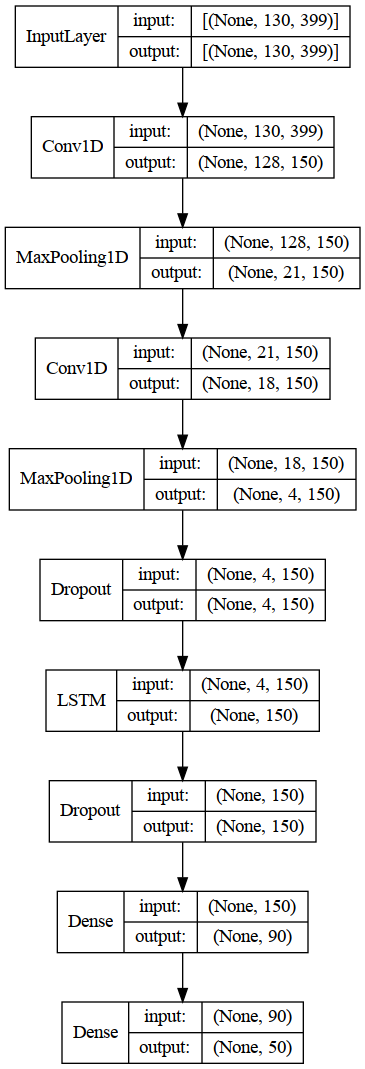

In [145]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [146]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 13ms/step - loss: 1.2420 - f1_score: 0.7745


[1.2419642210006714, 0.7745026350021362]

In [147]:
reconstructed_model.evaluate(Xtrain, Ytrain)

2023-09-23 11:55:48.021660: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.


84/84 [==============================] - 1s 10ms/step - loss: 0.1019 - f1_score: 0.9993


[0.10191482305526733, 0.9992672204971313]

In [148]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         AXE      0.800     1.000     0.889         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.692     0.900     0.783        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.500     0.667         8
   BREAKFAST      0.429     0.500     0.462         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.500     0.333     0.400         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     1.000     1.000         8
     DEVELOP      0.667     0.333     0.444         6
      DINNER      1.000     1.000     1.000         8
         DOG      0.429     

### 2 1D-CNN + 1 LSTM Trial 715

In [126]:
best_model = tuner.get_best_models(num_models=5)[4]

In [127]:
best_model.evaluate(Xtrain, Ytrain)

2023-09-10 11:30:01.433863: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


84/84 [==============================] - 14s 15ms/step - loss: 0.4285 - f1_score: 0.8761


[0.42848339676856995, 0.8761171102523804]

In [128]:
best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 46ms/step - loss: 1.2463 - f1_score: 0.7204


[1.246279001235962, 0.7203800678253174]

In [122]:
bestHP = tuner.get_best_hyperparameters(num_trials=5)[4]

In [123]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 LSTM Trial 715/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [124]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])
#History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...


2023-09-10 11:33:52.866778: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 11:33:52.947217: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1561 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


Epoch 1/500


2023-09-10 11:33:58.449740: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2023-09-10 11:34:01.137563: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fdaf190beb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-10 11:34:01.137597: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-10 11:34:01.166755: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-10 11:34:01.596441: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 4.8264 - f1_score: 0.0160

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 21s 471ms/step - loss: 4.8264 - f1_score: 0.0160 - val_loss: 4.7650 - val_f1_score: 0.0072
Epoch 2/500
28/28 [==============================] - 2s 70ms/step - loss: 4.7126 - f1_score: 0.0120 - val_loss: 4.6493 - val_f1_score: 0.0057
Epoch 3/500
28/28 [==============================] - 2s 70ms/step - loss: 4.6002 - f1_score: 0.0165 - val_loss: 4.5517 - val_f1_score: 0.0025
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 4.5046 - f1_score: 0.0210

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 9s 337ms/step - loss: 4.5046 - f1_score: 0.0210 - val_loss: 4.4458 - val_f1_score: 0.0115
Epoch 5/500
28/28 [==============================] - 2s 70ms/step - loss: 4.4121 - f1_score: 0.0196 - val_loss: 4.3453 - val_f1_score: 0.0045
Epoch 6/500
28/28 [==============================] - 2s 71ms/step - loss: 4.2984 - f1_score: 0.0237 - val_loss: 4.2242 - val_f1_score: 0.0043
Epoch 7/500
28/28 [==============================] - 2s 73ms/step - loss: 4.1673 - f1_score: 0.0251 - val_loss: 4.0148 - val_f1_score: 0.0115
Epoch 8/500
28/28 [==============================] - 2s 73ms/step - loss: 4.0263 - f1_score: 0.0219 - val_loss: 3.8563 - val_f1_score: 0.0055
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 3.9013 - f1_score: 0.0273

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 384ms/step - loss: 3.9013 - f1_score: 0.0273 - val_loss: 3.7639 - val_f1_score: 0.0146
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.7934 - f1_score: 0.0395

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 380ms/step - loss: 3.7934 - f1_score: 0.0395 - val_loss: 3.6003 - val_f1_score: 0.0378
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.6920 - f1_score: 0.0496

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 9s 348ms/step - loss: 3.6920 - f1_score: 0.0496 - val_loss: 3.4915 - val_f1_score: 0.0463
Epoch 12/500
28/28 [==============================] - 2s 71ms/step - loss: 3.5949 - f1_score: 0.0502 - val_loss: 3.3761 - val_f1_score: 0.0402
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.4821 - f1_score: 0.0603

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 405ms/step - loss: 3.4821 - f1_score: 0.0603 - val_loss: 3.2583 - val_f1_score: 0.0526
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 3.3814 - f1_score: 0.0749

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 9s 330ms/step - loss: 3.3814 - f1_score: 0.0749 - val_loss: 3.1951 - val_f1_score: 0.0671
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 3.2907 - f1_score: 0.0926

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 9s 341ms/step - loss: 3.2907 - f1_score: 0.0926 - val_loss: 3.0850 - val_f1_score: 0.1099
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 3.1942 - f1_score: 0.0962

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 413ms/step - loss: 3.1942 - f1_score: 0.0962 - val_loss: 2.9979 - val_f1_score: 0.1118
Epoch 17/500
28/28 [==============================] - 2s 72ms/step - loss: 3.1157 - f1_score: 0.1150 - val_loss: 2.9325 - val_f1_score: 0.1001
Epoch 18/500
28/28 [==============================] - 2s 73ms/step - loss: 3.0584 - f1_score: 0.1274 - val_loss: 2.8534 - val_f1_score: 0.1055
Epoch 19/500
28/28 [==============================] - ETA: 0s - loss: 2.9779 - f1_score: 0.1275

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 353ms/step - loss: 2.9779 - f1_score: 0.1275 - val_loss: 2.8193 - val_f1_score: 0.1321
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 2.9183 - f1_score: 0.1502

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 383ms/step - loss: 2.9183 - f1_score: 0.1502 - val_loss: 2.7642 - val_f1_score: 0.1372
Epoch 21/500
28/28 [==============================] - 2s 72ms/step - loss: 2.8610 - f1_score: 0.1559 - val_loss: 2.7494 - val_f1_score: 0.1196
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 2.8173 - f1_score: 0.1623

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 351ms/step - loss: 2.8173 - f1_score: 0.1623 - val_loss: 2.6991 - val_f1_score: 0.1543
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 2.7766 - f1_score: 0.1737

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 351ms/step - loss: 2.7766 - f1_score: 0.1737 - val_loss: 2.6731 - val_f1_score: 0.1545
Epoch 24/500
28/28 [==============================] - 2s 72ms/step - loss: 2.7311 - f1_score: 0.1722 - val_loss: 2.6356 - val_f1_score: 0.1476
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 2.7133 - f1_score: 0.1709

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 395ms/step - loss: 2.7133 - f1_score: 0.1709 - val_loss: 2.5997 - val_f1_score: 0.1985
Epoch 26/500
28/28 [==============================] - 2s 71ms/step - loss: 2.6620 - f1_score: 0.1889 - val_loss: 2.5884 - val_f1_score: 0.1892
Epoch 27/500
28/28 [==============================] - 2s 72ms/step - loss: 2.6297 - f1_score: 0.1907 - val_loss: 2.5848 - val_f1_score: 0.1982
Epoch 28/500
28/28 [==============================] - ETA: 0s - loss: 2.6012 - f1_score: 0.2005

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 380ms/step - loss: 2.6012 - f1_score: 0.2005 - val_loss: 2.5360 - val_f1_score: 0.2018
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 2.5623 - f1_score: 0.2142

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 451ms/step - loss: 2.5623 - f1_score: 0.2142 - val_loss: 2.4828 - val_f1_score: 0.2073
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 2.5376 - f1_score: 0.2281

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 383ms/step - loss: 2.5376 - f1_score: 0.2281 - val_loss: 2.4787 - val_f1_score: 0.2285
Epoch 31/500
28/28 [==============================] - 2s 73ms/step - loss: 2.5049 - f1_score: 0.2239 - val_loss: 2.6027 - val_f1_score: 0.1777
Epoch 32/500
28/28 [==============================] - 2s 74ms/step - loss: 2.4552 - f1_score: 0.2418 - val_loss: 2.4596 - val_f1_score: 0.2283
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 2.4586 - f1_score: 0.2371

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 384ms/step - loss: 2.4586 - f1_score: 0.2371 - val_loss: 2.4316 - val_f1_score: 0.2499
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 2.4195 - f1_score: 0.2529

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 438ms/step - loss: 2.4195 - f1_score: 0.2529 - val_loss: 2.3910 - val_f1_score: 0.2803
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 2.3861 - f1_score: 0.2527

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 384ms/step - loss: 2.3861 - f1_score: 0.2527 - val_loss: 2.3809 - val_f1_score: 0.2872
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 2.3749 - f1_score: 0.2606

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 408ms/step - loss: 2.3749 - f1_score: 0.2606 - val_loss: 2.4265 - val_f1_score: 0.2901
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 2.3515 - f1_score: 0.2569

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 383ms/step - loss: 2.3515 - f1_score: 0.2569 - val_loss: 2.3442 - val_f1_score: 0.2914
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 2.3504 - f1_score: 0.2781

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 411ms/step - loss: 2.3504 - f1_score: 0.2781 - val_loss: 2.3563 - val_f1_score: 0.3068
Epoch 39/500
28/28 [==============================] - 2s 73ms/step - loss: 2.3211 - f1_score: 0.2688 - val_loss: 2.3872 - val_f1_score: 0.2872
Epoch 40/500
28/28 [==============================] - 2s 73ms/step - loss: 2.2816 - f1_score: 0.2901 - val_loss: 2.3302 - val_f1_score: 0.2682
Epoch 41/500
28/28 [==============================] - 2s 74ms/step - loss: 2.2533 - f1_score: 0.2937 - val_loss: 2.3127 - val_f1_score: 0.2918
Epoch 42/500
28/28 [==============================] - 2s 73ms/step - loss: 2.2697 - f1_score: 0.2945 - val_loss: 2.2733 - val_f1_score: 0.3041
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 2.2149 - f1_score: 0.3002

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 397ms/step - loss: 2.2149 - f1_score: 0.3002 - val_loss: 2.2375 - val_f1_score: 0.3099
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 2.1968 - f1_score: 0.3064

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 376ms/step - loss: 2.1968 - f1_score: 0.3064 - val_loss: 2.2598 - val_f1_score: 0.3459
Epoch 45/500
28/28 [==============================] - 2s 72ms/step - loss: 2.1879 - f1_score: 0.3119 - val_loss: 2.2510 - val_f1_score: 0.3018
Epoch 46/500
28/28 [==============================] - 2s 72ms/step - loss: 2.1657 - f1_score: 0.3141 - val_loss: 2.2104 - val_f1_score: 0.3432
Epoch 47/500
28/28 [==============================] - 2s 73ms/step - loss: 2.1321 - f1_score: 0.3312 - val_loss: 2.2137 - val_f1_score: 0.3146
Epoch 48/500
28/28 [==============================] - 2s 74ms/step - loss: 2.1307 - f1_score: 0.3243 - val_loss: 2.2171 - val_f1_score: 0.3237
Epoch 49/500
28/28 [==============================] - ETA: 0s - loss: 2.1075 - f1_score: 0.3382

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 419ms/step - loss: 2.1075 - f1_score: 0.3382 - val_loss: 2.1842 - val_f1_score: 0.3500
Epoch 50/500
28/28 [==============================] - 2s 71ms/step - loss: 2.0871 - f1_score: 0.3497 - val_loss: 2.2313 - val_f1_score: 0.3299
Epoch 51/500
28/28 [==============================] - 2s 75ms/step - loss: 2.0860 - f1_score: 0.3494 - val_loss: 2.1575 - val_f1_score: 0.3495
Epoch 52/500
28/28 [==============================] - 2s 76ms/step - loss: 2.0727 - f1_score: 0.3526 - val_loss: 2.2058 - val_f1_score: 0.3256
Epoch 53/500
28/28 [==============================] - ETA: 0s - loss: 2.0559 - f1_score: 0.3514

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 429ms/step - loss: 2.0559 - f1_score: 0.3514 - val_loss: 2.1675 - val_f1_score: 0.3736
Epoch 54/500
28/28 [==============================] - 2s 72ms/step - loss: 2.0064 - f1_score: 0.3674 - val_loss: 2.1713 - val_f1_score: 0.3570
Epoch 55/500
28/28 [==============================] - 2s 72ms/step - loss: 2.0246 - f1_score: 0.3596 - val_loss: 2.1316 - val_f1_score: 0.3453
Epoch 56/500
28/28 [==============================] - 2s 75ms/step - loss: 1.9857 - f1_score: 0.3778 - val_loss: 2.1068 - val_f1_score: 0.3735
Epoch 57/500
28/28 [==============================] - ETA: 0s - loss: 1.9955 - f1_score: 0.3716

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 452ms/step - loss: 1.9955 - f1_score: 0.3716 - val_loss: 2.1141 - val_f1_score: 0.3964
Epoch 58/500
28/28 [==============================] - 2s 74ms/step - loss: 1.9567 - f1_score: 0.3829 - val_loss: 2.1086 - val_f1_score: 0.3549
Epoch 59/500
28/28 [==============================] - 2s 73ms/step - loss: 1.9447 - f1_score: 0.3924 - val_loss: 2.0660 - val_f1_score: 0.3904
Epoch 60/500
28/28 [==============================] - 2s 74ms/step - loss: 1.9376 - f1_score: 0.3838 - val_loss: 2.0931 - val_f1_score: 0.3800
Epoch 61/500
28/28 [==============================] - 2s 73ms/step - loss: 1.8964 - f1_score: 0.4026 - val_loss: 2.0289 - val_f1_score: 0.3827
Epoch 62/500
28/28 [==============================] - 2s 74ms/step - loss: 1.9156 - f1_score: 0.3931 - val_loss: 2.0140 - val_f1_score: 0.3770
Epoch 63/500
28/28 [==============================] - 2s 77ms/step - loss: 1.8793 - f1_score: 0.4066 - val_loss: 2.0439 - val_f1_score: 0.3809
Epoch 64/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 461ms/step - loss: 1.8394 - f1_score: 0.4162 - val_loss: 1.9561 - val_f1_score: 0.4085
Epoch 68/500
28/28 [==============================] - ETA: 0s - loss: 1.8046 - f1_score: 0.4261

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 453ms/step - loss: 1.8046 - f1_score: 0.4261 - val_loss: 1.9855 - val_f1_score: 0.4210
Epoch 69/500
28/28 [==============================] - 2s 79ms/step - loss: 1.8087 - f1_score: 0.4323 - val_loss: 1.9520 - val_f1_score: 0.3863
Epoch 70/500
28/28 [==============================] - 2s 75ms/step - loss: 1.8193 - f1_score: 0.4304 - val_loss: 1.9410 - val_f1_score: 0.3983
Epoch 71/500
28/28 [==============================] - 2s 75ms/step - loss: 1.7711 - f1_score: 0.4418 - val_loss: 1.9550 - val_f1_score: 0.4070
Epoch 72/500
28/28 [==============================] - 2s 75ms/step - loss: 1.7875 - f1_score: 0.4293 - val_loss: 1.9647 - val_f1_score: 0.4095
Epoch 73/500
28/28 [==============================] - 2s 76ms/step - loss: 1.7615 - f1_score: 0.4485 - val_loss: 1.9060 - val_f1_score: 0.4178
Epoch 74/500
28/28 [==============================] - 2s 75ms/step - loss: 1.7504 - f1_score: 0.4504 - val_loss: 1.9653 - val_f1_score: 0.4155
Epoch 75/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 458ms/step - loss: 1.7112 - f1_score: 0.4724 - val_loss: 1.9561 - val_f1_score: 0.4346
Epoch 78/500
28/28 [==============================] - 2s 76ms/step - loss: 1.6896 - f1_score: 0.4640 - val_loss: 1.8667 - val_f1_score: 0.4276
Epoch 79/500
28/28 [==============================] - ETA: 0s - loss: 1.6837 - f1_score: 0.4643

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 473ms/step - loss: 1.6837 - f1_score: 0.4643 - val_loss: 1.8189 - val_f1_score: 0.4469
Epoch 80/500
28/28 [==============================] - 2s 74ms/step - loss: 1.6608 - f1_score: 0.4622 - val_loss: 1.8552 - val_f1_score: 0.4211
Epoch 81/500
28/28 [==============================] - 2s 73ms/step - loss: 1.6568 - f1_score: 0.4724 - val_loss: 1.8280 - val_f1_score: 0.4299
Epoch 82/500
28/28 [==============================] - ETA: 0s - loss: 1.6579 - f1_score: 0.4809

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 489ms/step - loss: 1.6579 - f1_score: 0.4809 - val_loss: 1.8152 - val_f1_score: 0.4631
Epoch 83/500
28/28 [==============================] - 2s 75ms/step - loss: 1.6536 - f1_score: 0.4828 - val_loss: 1.7893 - val_f1_score: 0.4624
Epoch 84/500
28/28 [==============================] - ETA: 0s - loss: 1.6139 - f1_score: 0.4819

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 481ms/step - loss: 1.6139 - f1_score: 0.4819 - val_loss: 1.8011 - val_f1_score: 0.4690
Epoch 85/500
28/28 [==============================] - ETA: 0s - loss: 1.5900 - f1_score: 0.4911

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 395ms/step - loss: 1.5900 - f1_score: 0.4911 - val_loss: 1.7712 - val_f1_score: 0.4823
Epoch 86/500
28/28 [==============================] - 2s 72ms/step - loss: 1.6005 - f1_score: 0.4849 - val_loss: 1.8366 - val_f1_score: 0.4589
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 1.5739 - f1_score: 0.5027

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 395ms/step - loss: 1.5739 - f1_score: 0.5027 - val_loss: 1.7712 - val_f1_score: 0.4875
Epoch 88/500
28/28 [==============================] - 2s 72ms/step - loss: 1.5888 - f1_score: 0.5028 - val_loss: 1.7914 - val_f1_score: 0.4792
Epoch 89/500
28/28 [==============================] - 2s 73ms/step - loss: 1.5546 - f1_score: 0.5195 - val_loss: 1.7294 - val_f1_score: 0.4788
Epoch 90/500
28/28 [==============================] - ETA: 0s - loss: 1.5577 - f1_score: 0.4957

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 9s 343ms/step - loss: 1.5577 - f1_score: 0.4957 - val_loss: 1.7666 - val_f1_score: 0.5099
Epoch 91/500
28/28 [==============================] - 2s 72ms/step - loss: 1.5587 - f1_score: 0.5145 - val_loss: 1.7242 - val_f1_score: 0.5028
Epoch 92/500
28/28 [==============================] - ETA: 0s - loss: 1.5712 - f1_score: 0.4963

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 471ms/step - loss: 1.5712 - f1_score: 0.4963 - val_loss: 1.7153 - val_f1_score: 0.5197
Epoch 93/500
28/28 [==============================] - 2s 73ms/step - loss: 1.5297 - f1_score: 0.5202 - val_loss: 1.7368 - val_f1_score: 0.4986
Epoch 94/500
28/28 [==============================] - 2s 73ms/step - loss: 1.5071 - f1_score: 0.5242 - val_loss: 1.7079 - val_f1_score: 0.4717
Epoch 95/500
28/28 [==============================] - 2s 73ms/step - loss: 1.4825 - f1_score: 0.5358 - val_loss: 1.6967 - val_f1_score: 0.4958
Epoch 96/500
28/28 [==============================] - 2s 73ms/step - loss: 1.4796 - f1_score: 0.5460 - val_loss: 1.6893 - val_f1_score: 0.5151
Epoch 97/500
28/28 [==============================] - 2s 73ms/step - loss: 1.4666 - f1_score: 0.5296 - val_loss: 1.6313 - val_f1_score: 0.5097
Epoch 98/500
28/28 [==============================] - 2s 75ms/step - loss: 1.4713 - f1_score: 0.5396 - val_loss: 1.7138 - val_f1_score: 0.4943
Epoch 99/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 393ms/step - loss: 1.4566 - f1_score: 0.5369 - val_loss: 1.6615 - val_f1_score: 0.5257
Epoch 101/500
28/28 [==============================] - ETA: 0s - loss: 1.4501 - f1_score: 0.5476

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 433ms/step - loss: 1.4501 - f1_score: 0.5476 - val_loss: 1.6382 - val_f1_score: 0.5270
Epoch 102/500
28/28 [==============================] - 2s 72ms/step - loss: 1.4446 - f1_score: 0.5403 - val_loss: 1.6860 - val_f1_score: 0.5029
Epoch 103/500
28/28 [==============================] - ETA: 0s - loss: 1.4485 - f1_score: 0.5431

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 409ms/step - loss: 1.4485 - f1_score: 0.5431 - val_loss: 1.6348 - val_f1_score: 0.5344
Epoch 104/500
28/28 [==============================] - 2s 72ms/step - loss: 1.4334 - f1_score: 0.5422 - val_loss: 1.6297 - val_f1_score: 0.5113
Epoch 105/500
28/28 [==============================] - 2s 72ms/step - loss: 1.3761 - f1_score: 0.5530 - val_loss: 1.6104 - val_f1_score: 0.5074
Epoch 106/500
28/28 [==============================] - 2s 73ms/step - loss: 1.3918 - f1_score: 0.5608 - val_loss: 1.6388 - val_f1_score: 0.5023
Epoch 107/500
28/28 [==============================] - 2s 74ms/step - loss: 1.4053 - f1_score: 0.5598 - val_loss: 1.6479 - val_f1_score: 0.5306
Epoch 108/500
28/28 [==============================] - 2s 73ms/step - loss: 1.3632 - f1_score: 0.5774 - val_loss: 1.6806 - val_f1_score: 0.4985
Epoch 109/500
28/28 [==============================] - ETA: 0s - loss: 1.3686 - f1_score: 0.5683

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 417ms/step - loss: 1.3686 - f1_score: 0.5683 - val_loss: 1.6163 - val_f1_score: 0.5485
Epoch 110/500
28/28 [==============================] - 2s 73ms/step - loss: 1.3720 - f1_score: 0.5689 - val_loss: 1.6101 - val_f1_score: 0.5267
Epoch 111/500
28/28 [==============================] - 2s 72ms/step - loss: 1.3583 - f1_score: 0.5642 - val_loss: 1.5977 - val_f1_score: 0.5173
Epoch 112/500
28/28 [==============================] - ETA: 0s - loss: 1.3126 - f1_score: 0.5966

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 426ms/step - loss: 1.3126 - f1_score: 0.5966 - val_loss: 1.5460 - val_f1_score: 0.5514
Epoch 113/500
28/28 [==============================] - ETA: 0s - loss: 1.3168 - f1_score: 0.5859

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 10s 377ms/step - loss: 1.3168 - f1_score: 0.5859 - val_loss: 1.5368 - val_f1_score: 0.5650
Epoch 114/500
28/28 [==============================] - 2s 74ms/step - loss: 1.3246 - f1_score: 0.5770 - val_loss: 1.6076 - val_f1_score: 0.5456
Epoch 115/500
28/28 [==============================] - 2s 73ms/step - loss: 1.3066 - f1_score: 0.5955 - val_loss: 1.5431 - val_f1_score: 0.5635
Epoch 116/500
28/28 [==============================] - 2s 74ms/step - loss: 1.3094 - f1_score: 0.5902 - val_loss: 1.5484 - val_f1_score: 0.5530
Epoch 117/500
28/28 [==============================] - 2s 74ms/step - loss: 1.3055 - f1_score: 0.5884 - val_loss: 1.6049 - val_f1_score: 0.5302
Epoch 118/500
28/28 [==============================] - 2s 74ms/step - loss: 1.2818 - f1_score: 0.5971 - val_loss: 1.5984 - val_f1_score: 0.5376
Epoch 119/500
28/28 [==============================] - 2s 74ms/step - loss: 1.2745 - f1_score: 0.5949 - val_loss: 1.5687 - val_f1_score: 0.5316
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 485ms/step - loss: 1.2050 - f1_score: 0.6253 - val_loss: 1.4951 - val_f1_score: 0.5919
Epoch 125/500
28/28 [==============================] - 2s 74ms/step - loss: 1.2092 - f1_score: 0.6135 - val_loss: 1.4933 - val_f1_score: 0.5667
Epoch 126/500
28/28 [==============================] - 2s 75ms/step - loss: 1.2388 - f1_score: 0.6125 - val_loss: 1.4951 - val_f1_score: 0.5541
Epoch 127/500
28/28 [==============================] - 2s 75ms/step - loss: 1.2114 - f1_score: 0.6165 - val_loss: 1.4716 - val_f1_score: 0.5732
Epoch 128/500
28/28 [==============================] - 2s 75ms/step - loss: 1.2037 - f1_score: 0.6244 - val_loss: 1.4762 - val_f1_score: 0.5874
Epoch 129/500
28/28 [==============================] - 2s 76ms/step - loss: 1.2118 - f1_score: 0.6183 - val_loss: 1.4527 - val_f1_score: 0.5704
Epoch 130/500
28/28 [==============================] - 2s 77ms/step - loss: 1.2051 - f1_score: 0.6169 - val_loss: 1.5507 - val_f1_score: 0.5832
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 480ms/step - loss: 1.1597 - f1_score: 0.6309 - val_loss: 1.4261 - val_f1_score: 0.5920
Epoch 137/500
28/28 [==============================] - 2s 74ms/step - loss: 1.1399 - f1_score: 0.6386 - val_loss: 1.4259 - val_f1_score: 0.5738
Epoch 138/500
28/28 [==============================] - 2s 74ms/step - loss: 1.1215 - f1_score: 0.6533 - val_loss: 1.5245 - val_f1_score: 0.5644
Epoch 139/500
28/28 [==============================] - ETA: 0s - loss: 1.1310 - f1_score: 0.6460

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 427ms/step - loss: 1.1310 - f1_score: 0.6460 - val_loss: 1.4385 - val_f1_score: 0.5923
Epoch 140/500
28/28 [==============================] - 2s 73ms/step - loss: 1.1093 - f1_score: 0.6603 - val_loss: 1.4635 - val_f1_score: 0.5814
Epoch 141/500
28/28 [==============================] - 2s 75ms/step - loss: 1.1225 - f1_score: 0.6511 - val_loss: 1.4527 - val_f1_score: 0.5831
Epoch 142/500
28/28 [==============================] - 2s 74ms/step - loss: 1.0891 - f1_score: 0.6671 - val_loss: 1.4648 - val_f1_score: 0.5853
Epoch 143/500
28/28 [==============================] - ETA: 0s - loss: 1.0885 - f1_score: 0.6460

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 14s 522ms/step - loss: 1.0885 - f1_score: 0.6460 - val_loss: 1.5117 - val_f1_score: 0.5984
Epoch 144/500
28/28 [==============================] - ETA: 0s - loss: 1.1056 - f1_score: 0.6405

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 415ms/step - loss: 1.1056 - f1_score: 0.6405 - val_loss: 1.4481 - val_f1_score: 0.6061
Epoch 145/500
28/28 [==============================] - 2s 73ms/step - loss: 1.0916 - f1_score: 0.6583 - val_loss: 1.4911 - val_f1_score: 0.5754
Epoch 146/500
28/28 [==============================] - ETA: 0s - loss: 1.0895 - f1_score: 0.6549

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 432ms/step - loss: 1.0895 - f1_score: 0.6549 - val_loss: 1.4082 - val_f1_score: 0.6129
Epoch 147/500
28/28 [==============================] - 2s 72ms/step - loss: 1.0677 - f1_score: 0.6665 - val_loss: 1.4260 - val_f1_score: 0.6032
Epoch 148/500
28/28 [==============================] - 2s 73ms/step - loss: 1.0837 - f1_score: 0.6567 - val_loss: 1.4516 - val_f1_score: 0.5819
Epoch 149/500
28/28 [==============================] - 2s 74ms/step - loss: 1.0633 - f1_score: 0.6608 - val_loss: 1.4254 - val_f1_score: 0.6084
Epoch 150/500
28/28 [==============================] - ETA: 0s - loss: 1.0574 - f1_score: 0.6692

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 402ms/step - loss: 1.0574 - f1_score: 0.6692 - val_loss: 1.3823 - val_f1_score: 0.6204
Epoch 151/500
28/28 [==============================] - 2s 74ms/step - loss: 1.0183 - f1_score: 0.6798 - val_loss: 1.4182 - val_f1_score: 0.6168
Epoch 152/500
28/28 [==============================] - 2s 72ms/step - loss: 1.0152 - f1_score: 0.6805 - val_loss: 1.4598 - val_f1_score: 0.5943
Epoch 153/500
28/28 [==============================] - 2s 75ms/step - loss: 1.0304 - f1_score: 0.6855 - val_loss: 1.3972 - val_f1_score: 0.6181
Epoch 154/500
28/28 [==============================] - 2s 77ms/step - loss: 1.0441 - f1_score: 0.6654 - val_loss: 1.4334 - val_f1_score: 0.5906
Epoch 155/500
28/28 [==============================] - 2s 80ms/step - loss: 1.0405 - f1_score: 0.6701 - val_loss: 1.3650 - val_f1_score: 0.6097
Epoch 156/500
28/28 [==============================] - 2s 75ms/step - loss: 1.0114 - f1_score: 0.6781 - val_loss: 1.4312 - val_f1_score: 0.6122
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 422ms/step - loss: 1.0133 - f1_score: 0.6898 - val_loss: 1.3682 - val_f1_score: 0.6205
Epoch 158/500
28/28 [==============================] - 2s 73ms/step - loss: 0.9936 - f1_score: 0.6861 - val_loss: 1.3663 - val_f1_score: 0.6045
Epoch 159/500
28/28 [==============================] - ETA: 0s - loss: 1.0205 - f1_score: 0.6757

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 476ms/step - loss: 1.0205 - f1_score: 0.6757 - val_loss: 1.3275 - val_f1_score: 0.6491
Epoch 160/500
28/28 [==============================] - 2s 74ms/step - loss: 0.9885 - f1_score: 0.6852 - val_loss: 1.3368 - val_f1_score: 0.5983
Epoch 161/500
28/28 [==============================] - ETA: 0s - loss: 0.9942 - f1_score: 0.6944

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 436ms/step - loss: 0.9942 - f1_score: 0.6944 - val_loss: 1.3146 - val_f1_score: 0.6589
Epoch 162/500
28/28 [==============================] - 2s 74ms/step - loss: 0.9991 - f1_score: 0.6862 - val_loss: 1.3945 - val_f1_score: 0.6170
Epoch 163/500
28/28 [==============================] - 2s 73ms/step - loss: 0.9686 - f1_score: 0.6995 - val_loss: 1.3055 - val_f1_score: 0.6450
Epoch 164/500
28/28 [==============================] - 2s 75ms/step - loss: 0.9908 - f1_score: 0.6928 - val_loss: 1.3518 - val_f1_score: 0.6308
Epoch 165/500
28/28 [==============================] - 2s 74ms/step - loss: 0.9710 - f1_score: 0.7030 - val_loss: 1.3234 - val_f1_score: 0.6252
Epoch 166/500
28/28 [==============================] - 2s 72ms/step - loss: 0.9543 - f1_score: 0.6990 - val_loss: 1.3713 - val_f1_score: 0.6179
Epoch 167/500
28/28 [==============================] - 2s 75ms/step - loss: 0.9703 - f1_score: 0.6967 - val_loss: 1.3770 - val_f1_score: 0.5924
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 462ms/step - loss: 0.9049 - f1_score: 0.7089 - val_loss: 1.3051 - val_f1_score: 0.6617
Epoch 175/500
28/28 [==============================] - 2s 72ms/step - loss: 0.9209 - f1_score: 0.7228 - val_loss: 1.3151 - val_f1_score: 0.6535
Epoch 176/500
28/28 [==============================] - 2s 71ms/step - loss: 0.9098 - f1_score: 0.7136 - val_loss: 1.3413 - val_f1_score: 0.6296
Epoch 177/500
28/28 [==============================] - 2s 73ms/step - loss: 0.8787 - f1_score: 0.7249 - val_loss: 1.3621 - val_f1_score: 0.6281
Epoch 178/500
28/28 [==============================] - 2s 75ms/step - loss: 0.8882 - f1_score: 0.7189 - val_loss: 1.3131 - val_f1_score: 0.6395
Epoch 179/500
28/28 [==============================] - 2s 73ms/step - loss: 0.8863 - f1_score: 0.7197 - val_loss: 1.2923 - val_f1_score: 0.6269
Epoch 180/500
28/28 [==============================] - 2s 74ms/step - loss: 0.9043 - f1_score: 0.7173 - val_loss: 1.3477 - val_f1_score: 0.6280
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 405ms/step - loss: 0.8598 - f1_score: 0.7387 - val_loss: 1.2950 - val_f1_score: 0.6649
Epoch 184/500
28/28 [==============================] - 2s 73ms/step - loss: 0.8982 - f1_score: 0.7191 - val_loss: 1.3270 - val_f1_score: 0.6510
Epoch 185/500
28/28 [==============================] - 2s 76ms/step - loss: 0.8549 - f1_score: 0.7321 - val_loss: 1.3574 - val_f1_score: 0.6507
Epoch 186/500
28/28 [==============================] - 2s 74ms/step - loss: 0.8730 - f1_score: 0.7180 - val_loss: 1.3110 - val_f1_score: 0.6527
Epoch 187/500
28/28 [==============================] - ETA: 0s - loss: 0.8650 - f1_score: 0.7257

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 440ms/step - loss: 0.8650 - f1_score: 0.7257 - val_loss: 1.2698 - val_f1_score: 0.6659
Epoch 188/500
28/28 [==============================] - 2s 73ms/step - loss: 0.8434 - f1_score: 0.7412 - val_loss: 1.3264 - val_f1_score: 0.6644
Epoch 189/500
28/28 [==============================] - ETA: 0s - loss: 0.8427 - f1_score: 0.7304

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 427ms/step - loss: 0.8427 - f1_score: 0.7304 - val_loss: 1.2693 - val_f1_score: 0.6909
Epoch 190/500
28/28 [==============================] - 2s 75ms/step - loss: 0.8312 - f1_score: 0.7481 - val_loss: 1.3170 - val_f1_score: 0.6553
Epoch 191/500
28/28 [==============================] - 2s 76ms/step - loss: 0.8553 - f1_score: 0.7319 - val_loss: 1.3492 - val_f1_score: 0.6269
Epoch 192/500
28/28 [==============================] - 2s 77ms/step - loss: 0.8495 - f1_score: 0.7285 - val_loss: 1.3126 - val_f1_score: 0.6497
Epoch 193/500
28/28 [==============================] - 2s 74ms/step - loss: 0.8484 - f1_score: 0.7237 - val_loss: 1.4063 - val_f1_score: 0.6199
Epoch 194/500
28/28 [==============================] - 2s 75ms/step - loss: 0.8332 - f1_score: 0.7455 - val_loss: 1.3149 - val_f1_score: 0.6542
Epoch 195/500
28/28 [==============================] - 2s 74ms/step - loss: 0.8538 - f1_score: 0.7290 - val_loss: 1.3474 - val_f1_score: 0.6625
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 491ms/step - loss: 0.6929 - f1_score: 0.7849 - val_loss: 1.2471 - val_f1_score: 0.6951
Epoch 238/500
28/28 [==============================] - ETA: 0s - loss: 0.6861 - f1_score: 0.7918

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 11s 402ms/step - loss: 0.6861 - f1_score: 0.7918 - val_loss: 1.2738 - val_f1_score: 0.7047
Epoch 239/500
28/28 [==============================] - 2s 72ms/step - loss: 0.6692 - f1_score: 0.7959 - val_loss: 1.1937 - val_f1_score: 0.6895
Epoch 240/500
28/28 [==============================] - 2s 72ms/step - loss: 0.6665 - f1_score: 0.7951 - val_loss: 1.2127 - val_f1_score: 0.6733
Epoch 241/500
28/28 [==============================] - 2s 76ms/step - loss: 0.6613 - f1_score: 0.7987 - val_loss: 1.2664 - val_f1_score: 0.6594
Epoch 242/500
28/28 [==============================] - 2s 73ms/step - loss: 0.6614 - f1_score: 0.7993 - val_loss: 1.2861 - val_f1_score: 0.6962
Epoch 243/500
28/28 [==============================] - 2s 74ms/step - loss: 0.6685 - f1_score: 0.7935 - val_loss: 1.2829 - val_f1_score: 0.6804
Epoch 244/500
28/28 [==============================] - 2s 76ms/step - loss: 0.6590 - f1_score: 0.8001 - val_loss: 1.2721 - val_f1_score: 0.6866
Epoc

Epoch 295/500
28/28 [==============================] - 2s 87ms/step - loss: 0.5125 - f1_score: 0.8492 - val_loss: 1.3600 - val_f1_score: 0.6747
Epoch 296/500
28/28 [==============================] - 2s 86ms/step - loss: 0.5725 - f1_score: 0.8209 - val_loss: 1.2551 - val_f1_score: 0.6691
Epoch 297/500
28/28 [==============================] - 3s 90ms/step - loss: 0.5447 - f1_score: 0.8269 - val_loss: 1.2459 - val_f1_score: 0.6674
Epoch 298/500
28/28 [==============================] - 2s 86ms/step - loss: 0.5181 - f1_score: 0.8438 - val_loss: 1.3300 - val_f1_score: 0.6546
Epoch 299/500
28/28 [==============================] - 2s 87ms/step - loss: 0.5245 - f1_score: 0.8360 - val_loss: 1.3207 - val_f1_score: 0.6868
Epoch 300/500
28/28 [==============================] - 3s 93ms/step - loss: 0.5022 - f1_score: 0.8477 - val_loss: 1.3447 - val_f1_score: 0.6685
Epoch 301/500
28/28 [==============================] - 2s 84ms/step - loss: 0.5396 - f1_score: 0.8346 - val_loss: 1.2879 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 15s 538ms/step - loss: 0.4878 - f1_score: 0.8491 - val_loss: 1.1872 - val_f1_score: 0.7069
Epoch 324/500
28/28 [==============================] - 2s 73ms/step - loss: 0.4809 - f1_score: 0.8480 - val_loss: 1.2696 - val_f1_score: 0.6937
Epoch 325/500
28/28 [==============================] - 2s 74ms/step - loss: 0.4795 - f1_score: 0.8588 - val_loss: 1.3200 - val_f1_score: 0.6724
Epoch 326/500
28/28 [==============================] - 2s 74ms/step - loss: 0.4762 - f1_score: 0.8598 - val_loss: 1.3247 - val_f1_score: 0.6752
Epoch 327/500
28/28 [==============================] - 2s 77ms/step - loss: 0.4807 - f1_score: 0.8554 - val_loss: 1.3124 - val_f1_score: 0.6899
Epoch 328/500
28/28 [==============================] - 2s 76ms/step - loss: 0.4737 - f1_score: 0.8481 - val_loss: 1.3361 - val_f1_score: 0.6971
Epoch 329/500
28/28 [==============================] - 2s 77ms/step - loss: 0.4531 - f1_score: 0.8681 - val_loss: 1.2860 - val_f1_score: 0.6936
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 12s 437ms/step - loss: 0.4681 - f1_score: 0.8537 - val_loss: 1.4102 - val_f1_score: 0.7133
Epoch 331/500
28/28 [==============================] - 2s 73ms/step - loss: 0.4723 - f1_score: 0.8635 - val_loss: 1.3100 - val_f1_score: 0.6799
Epoch 332/500
28/28 [==============================] - 2s 74ms/step - loss: 0.4557 - f1_score: 0.8604 - val_loss: 1.3333 - val_f1_score: 0.6765
Epoch 333/500
28/28 [==============================] - 2s 74ms/step - loss: 0.4761 - f1_score: 0.8584 - val_loss: 1.2447 - val_f1_score: 0.6862
Epoch 334/500
28/28 [==============================] - 2s 75ms/step - loss: 0.4586 - f1_score: 0.8659 - val_loss: 1.2988 - val_f1_score: 0.6738
Epoch 335/500
28/28 [==============================] - 2s 77ms/step - loss: 0.4479 - f1_score: 0.8639 - val_loss: 1.2483 - val_f1_score: 0.6780
Epoch 336/500
28/28 [==============================] - 2s 76ms/step - loss: 0.4700 - f1_score: 0.8538 - val_loss: 1.2411 - val_f1_score: 0.6899
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 13s 486ms/step - loss: 0.4727 - f1_score: 0.8617 - val_loss: 1.2006 - val_f1_score: 0.7195
Epoch 340/500
28/28 [==============================] - 2s 79ms/step - loss: 0.4750 - f1_score: 0.8490 - val_loss: 1.2722 - val_f1_score: 0.6874
Epoch 341/500
28/28 [==============================] - 2s 80ms/step - loss: 0.4324 - f1_score: 0.8673 - val_loss: 1.2754 - val_f1_score: 0.6893
Epoch 342/500
28/28 [==============================] - 2s 83ms/step - loss: 0.4554 - f1_score: 0.8639 - val_loss: 1.2387 - val_f1_score: 0.7176
Epoch 343/500
28/28 [==============================] - 2s 82ms/step - loss: 0.4714 - f1_score: 0.8592 - val_loss: 1.2620 - val_f1_score: 0.7038
Epoch 344/500
28/28 [==============================] - 2s 78ms/step - loss: 0.4543 - f1_score: 0.8644 - val_loss: 1.3091 - val_f1_score: 0.6859
Epoch 345/500
28/28 [==============================] - 2s 81ms/step - loss: 0.4594 - f1_score: 0.8642 - val_loss: 1.2751 - val_f1_score: 0.6933
Epoc

Epoch 396/500
28/28 [==============================] - 2s 82ms/step - loss: 0.3800 - f1_score: 0.8914 - val_loss: 1.3056 - val_f1_score: 0.7075
Epoch 397/500
28/28 [==============================] - 2s 82ms/step - loss: 0.3864 - f1_score: 0.8836 - val_loss: 1.3243 - val_f1_score: 0.6943
Epoch 398/500
28/28 [==============================] - 2s 80ms/step - loss: 0.3607 - f1_score: 0.8922 - val_loss: 1.3432 - val_f1_score: 0.6746
Epoch 399/500
28/28 [==============================] - 2s 79ms/step - loss: 0.3842 - f1_score: 0.8812 - val_loss: 1.3475 - val_f1_score: 0.6938
Epoch 400/500
28/28 [==============================] - 2s 84ms/step - loss: 0.3848 - f1_score: 0.8837 - val_loss: 1.2869 - val_f1_score: 0.6902
Epoch 401/500
28/28 [==============================] - 3s 92ms/step - loss: 0.4038 - f1_score: 0.8813 - val_loss: 1.3520 - val_f1_score: 0.6691
Epoch 402/500
28/28 [==============================] - 3s 92ms/step - loss: 0.3754 - f1_score: 0.8865 - val_loss: 1.2457 - val_f1_score:

Epoch 453/500
28/28 [==============================] - 2s 84ms/step - loss: 0.3159 - f1_score: 0.9139 - val_loss: 1.3514 - val_f1_score: 0.6997
Epoch 454/500
28/28 [==============================] - 3s 95ms/step - loss: 0.3228 - f1_score: 0.9111 - val_loss: 1.4644 - val_f1_score: 0.6701
Epoch 455/500
28/28 [==============================] - 3s 92ms/step - loss: 0.3451 - f1_score: 0.8986 - val_loss: 1.3302 - val_f1_score: 0.7105
Epoch 456/500
28/28 [==============================] - ETA: 0s - loss: 0.3154 - f1_score: 0.9069

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM Trial 715/assets


28/28 [==============================] - 15s 555ms/step - loss: 0.3154 - f1_score: 0.9069 - val_loss: 1.3636 - val_f1_score: 0.7306
Epoch 457/500
28/28 [==============================] - 2s 75ms/step - loss: 0.3101 - f1_score: 0.9128 - val_loss: 1.4169 - val_f1_score: 0.6897
Epoch 458/500
28/28 [==============================] - 2s 78ms/step - loss: 0.3265 - f1_score: 0.9045 - val_loss: 1.4540 - val_f1_score: 0.6783
Epoch 459/500
28/28 [==============================] - 2s 76ms/step - loss: 0.3269 - f1_score: 0.9005 - val_loss: 1.3582 - val_f1_score: 0.6816
Epoch 460/500
28/28 [==============================] - 2s 78ms/step - loss: 0.3191 - f1_score: 0.9042 - val_loss: 1.3540 - val_f1_score: 0.6965
Epoch 461/500
28/28 [==============================] - 2s 80ms/step - loss: 0.3285 - f1_score: 0.9020 - val_loss: 1.4847 - val_f1_score: 0.6958
Epoch 462/500
28/28 [==============================] - 2s 83ms/step - loss: 0.3205 - f1_score: 0.9105 - val_loss: 1.3298 - val_f1_score: 0.7093
Epoc

In [125]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.571     0.400     0.471        10
        BELT      1.000     1.000     1.000         4
        BITE      0.667     0.500     0.571         8
   BREAKFAST      0.273     0.500     0.353         6
      CANCER      0.750     0.750     0.750         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.600     1.000     0.750         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.222     0.333     0.267         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.375     0.545         8
     DEVELOP      0.364     0.667     0.471         6
      DINNER      1.000     1.000     1.000         8
         DOG      0.800    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

# or save to csv:
hist_csv_file = '2 1DCNN + 1 LSTM Trial 715/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [127]:
hist_df = pd.read_csv('2 1DCNN + 1 LSTM Trial 715/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.295059  0.911833  1.411746      0.700502
496  0.297430  0.915664  1.366644      0.689992
497  0.288362  0.911373  1.362883      0.683763
498  0.272276  0.920230  1.371670      0.700623
499  0.283748  0.918867  1.519600      0.677741

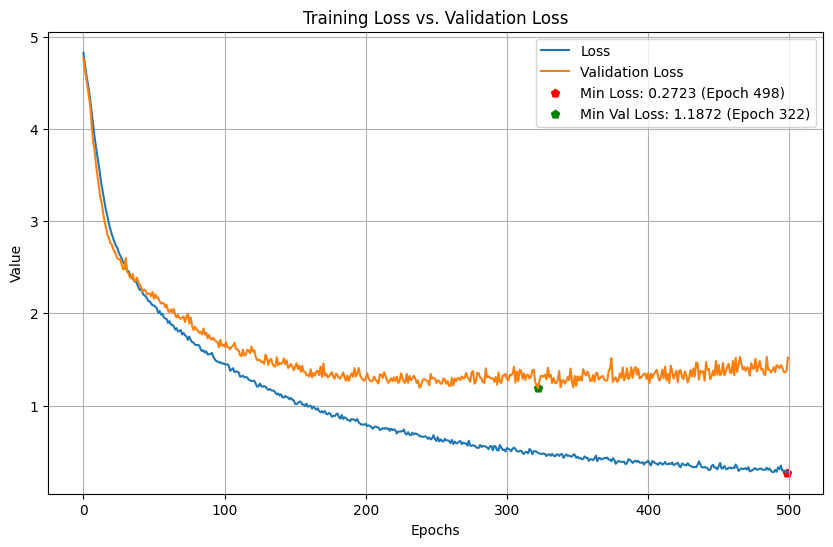

In [128]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

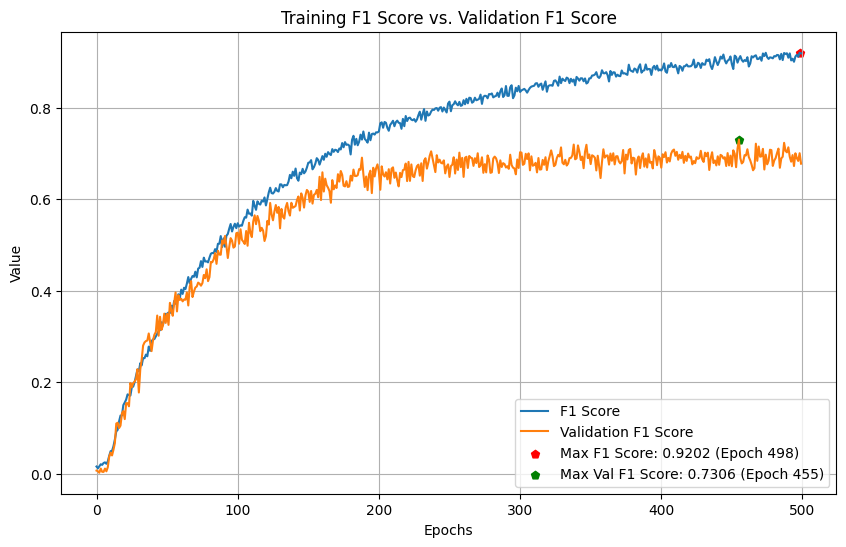

In [129]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [130]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 LSTM Trial 715")

In [131]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 125, 150)          359250    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 150)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 150)           67650     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 150)          0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 150)           0         
                                                                 
 lstm (LSTM)                 (None, 75)                6

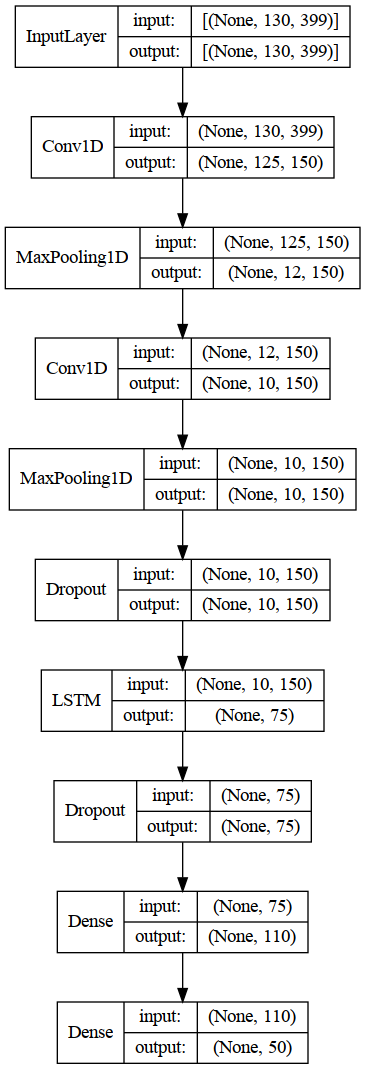

In [132]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

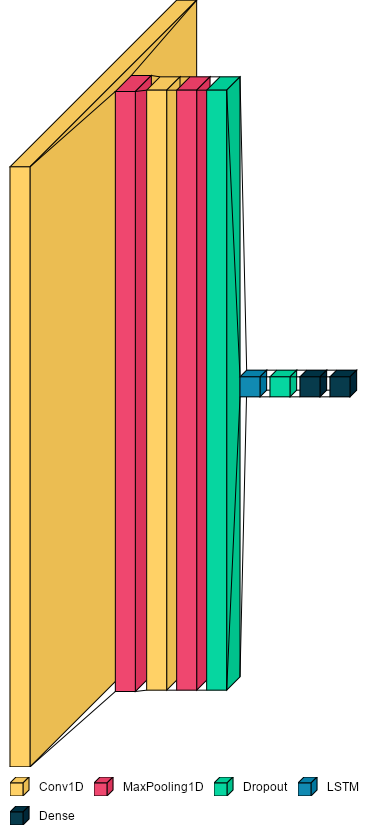

In [133]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [134]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 11ms/step - loss: 1.3636 - f1_score: 0.7306


[1.363629698753357, 0.7305694818496704]

In [135]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 13ms/step - loss: 0.0999 - f1_score: 0.9849


[0.09994740784168243, 0.9849286675453186]

In [136]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.714     1.000     0.833        10
         BEE      0.625     0.500     0.556        10
        BELT      0.800     1.000     0.889         4
        BITE      1.000     0.625     0.769         8
   BREAKFAST      0.500     0.500     0.500         6
      CANCER      1.000     0.750     0.857         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.500     0.333     0.400         6
      DECIDE      0.800     0.667     0.727         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.500     1.000     0.667         6
      DINNER      1.000     0.875     0.933         8
         DOG      0.667     

In [142]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 LSTM Trial 715 Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [143]:
act_function = mish
model = Sequential()
model.add(
    Conv1D(filters=150,
           kernel_size=5,
           activation=act_function,
           input_shape=(130, 126)))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=100, kernel_size=4, activation=act_function))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(.45))
model.add(
    GRU(units=150,
        return_sequences=False,
        kernel_regularizer=regularizers.l2(.00042286793942433336)))
model.add(Dropout(.8))
model.add(Dense(units=80, activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.0019929796667454143),
              loss='categorical_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 126, 150)          94650     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 42, 150)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 39, 100)           60100     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 13, 100)          0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 100)           0         
                                                                 
 gru_2 (GRU)                 (None, 150)              

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 16s 393ms/step - loss: 3.9667 - f1_score: 0.0172 - val_loss: 3.8607 - val_f1_score: 0.0141
Epoch 2/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7361 - f1_score: 0.0426

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 302ms/step - loss: 3.7312 - f1_score: 0.0433 - val_loss: 3.3516 - val_f1_score: 0.0401
Epoch 3/500
27/28 [===========================>..] - ETA: 0s - loss: 3.3184 - f1_score: 0.0804

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 9s 316ms/step - loss: 3.3134 - f1_score: 0.0802 - val_loss: 2.9673 - val_f1_score: 0.1203
Epoch 4/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9599 - f1_score: 0.1299

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 287ms/step - loss: 2.9603 - f1_score: 0.1299 - val_loss: 2.5864 - val_f1_score: 0.1928
Epoch 5/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6673 - f1_score: 0.1869

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 10s 353ms/step - loss: 2.6639 - f1_score: 0.1888 - val_loss: 2.4057 - val_f1_score: 0.2342
Epoch 6/500
28/28 [==============================] - 1s 38ms/step - loss: 2.4485 - f1_score: 0.2398 - val_loss: 2.4523 - val_f1_score: 0.2228
Epoch 7/500
27/28 [===========================>..] - ETA: 0s - loss: 2.2810 - f1_score: 0.2762

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 10s 365ms/step - loss: 2.2877 - f1_score: 0.2757 - val_loss: 2.1469 - val_f1_score: 0.3372
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1416 - f1_score: 0.3087

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 278ms/step - loss: 2.1425 - f1_score: 0.3100 - val_loss: 2.0119 - val_f1_score: 0.3734
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0281 - f1_score: 0.3592

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 306ms/step - loss: 2.0177 - f1_score: 0.3637 - val_loss: 1.8961 - val_f1_score: 0.4063
Epoch 10/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9076 - f1_score: 0.3781

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 299ms/step - loss: 1.9047 - f1_score: 0.3801 - val_loss: 1.8452 - val_f1_score: 0.4213
Epoch 11/500
27/28 [===========================>..] - ETA: 0s - loss: 1.7888 - f1_score: 0.4269

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 296ms/step - loss: 1.7919 - f1_score: 0.4251 - val_loss: 1.7583 - val_f1_score: 0.4348
Epoch 12/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6956 - f1_score: 0.4384

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 306ms/step - loss: 1.6909 - f1_score: 0.4396 - val_loss: 1.7644 - val_f1_score: 0.4443
Epoch 13/500
27/28 [===========================>..] - ETA: 0s - loss: 1.6276 - f1_score: 0.4761

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 9s 330ms/step - loss: 1.6308 - f1_score: 0.4757 - val_loss: 1.8618 - val_f1_score: 0.4454
Epoch 14/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5693 - f1_score: 0.4970

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 305ms/step - loss: 1.5655 - f1_score: 0.4973 - val_loss: 1.6262 - val_f1_score: 0.5272
Epoch 15/500
27/28 [===========================>..] - ETA: 0s - loss: 1.4783 - f1_score: 0.5471

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 292ms/step - loss: 1.4755 - f1_score: 0.5462 - val_loss: 1.5496 - val_f1_score: 0.5610
Epoch 16/500
28/28 [==============================] - 1s 38ms/step - loss: 1.4444 - f1_score: 0.5465 - val_loss: 1.4769 - val_f1_score: 0.5580
Epoch 17/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3217 - f1_score: 0.5702

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 304ms/step - loss: 1.3279 - f1_score: 0.5694 - val_loss: 1.5161 - val_f1_score: 0.5745
Epoch 18/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2945 - f1_score: 0.5831

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 310ms/step - loss: 1.2985 - f1_score: 0.5821 - val_loss: 1.5370 - val_f1_score: 0.6069
Epoch 19/500
28/28 [==============================] - 1s 38ms/step - loss: 1.2852 - f1_score: 0.5878 - val_loss: 1.4281 - val_f1_score: 0.6045
Epoch 20/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2173 - f1_score: 0.6180

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 283ms/step - loss: 1.2179 - f1_score: 0.6184 - val_loss: 1.3851 - val_f1_score: 0.6276
Epoch 21/500
27/28 [===========================>..] - ETA: 0s - loss: 1.2130 - f1_score: 0.6124

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 282ms/step - loss: 1.2190 - f1_score: 0.6137 - val_loss: 1.2672 - val_f1_score: 0.6686
Epoch 22/500
28/28 [==============================] - 1s 38ms/step - loss: 1.1470 - f1_score: 0.6439 - val_loss: 1.3689 - val_f1_score: 0.6425
Epoch 23/500
28/28 [==============================] - 1s 38ms/step - loss: 1.0645 - f1_score: 0.6726 - val_loss: 1.4077 - val_f1_score: 0.6420
Epoch 24/500
28/28 [==============================] - 1s 38ms/step - loss: 1.0290 - f1_score: 0.6716 - val_loss: 1.4038 - val_f1_score: 0.6378
Epoch 25/500
27/28 [===========================>..] - ETA: 0s - loss: 1.0354 - f1_score: 0.6777

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 9s 330ms/step - loss: 1.0409 - f1_score: 0.6763 - val_loss: 1.3490 - val_f1_score: 0.7047
Epoch 26/500
28/28 [==============================] - 1s 38ms/step - loss: 1.0103 - f1_score: 0.6855 - val_loss: 1.3758 - val_f1_score: 0.6790
Epoch 27/500
28/28 [==============================] - 1s 38ms/step - loss: 0.9848 - f1_score: 0.6917 - val_loss: 1.4690 - val_f1_score: 0.6577
Epoch 28/500
28/28 [==============================] - 1s 38ms/step - loss: 0.9359 - f1_score: 0.7218 - val_loss: 1.2835 - val_f1_score: 0.6766
Epoch 29/500
28/28 [==============================] - 1s 38ms/step - loss: 0.8999 - f1_score: 0.7260 - val_loss: 1.2871 - val_f1_score: 0.6809
Epoch 30/500
28/28 [==============================] - 1s 38ms/step - loss: 0.8965 - f1_score: 0.7249 - val_loss: 1.2039 - val_f1_score: 0.6934
Epoch 31/500
28/28 [==============================] - 1s 38ms/step - loss: 0.9033 - f1_score: 0.7138 - val_loss: 1.4615 - val_f1_score: 0.6660
Epoch 32/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 284ms/step - loss: 0.8174 - f1_score: 0.7546 - val_loss: 1.2110 - val_f1_score: 0.7237
Epoch 35/500
28/28 [==============================] - 1s 38ms/step - loss: 0.8303 - f1_score: 0.7514 - val_loss: 1.2921 - val_f1_score: 0.7181
Epoch 36/500
28/28 [==============================] - 1s 40ms/step - loss: 0.8294 - f1_score: 0.7597 - val_loss: 1.2224 - val_f1_score: 0.7006
Epoch 37/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8137 - f1_score: 0.7575

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 9s 315ms/step - loss: 0.8050 - f1_score: 0.7603 - val_loss: 1.2252 - val_f1_score: 0.7297
Epoch 38/500
28/28 [==============================] - 1s 38ms/step - loss: 0.7157 - f1_score: 0.7861 - val_loss: 1.3177 - val_f1_score: 0.6965
Epoch 39/500
28/28 [==============================] - 1s 38ms/step - loss: 0.7033 - f1_score: 0.7997 - val_loss: 1.2801 - val_f1_score: 0.6963
Epoch 40/500
28/28 [==============================] - 1s 38ms/step - loss: 0.7124 - f1_score: 0.7809 - val_loss: 1.2912 - val_f1_score: 0.7022
Epoch 41/500
27/28 [===========================>..] - ETA: 0s - loss: 0.7062 - f1_score: 0.7906

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 290ms/step - loss: 0.7047 - f1_score: 0.7913 - val_loss: 1.2573 - val_f1_score: 0.7314
Epoch 42/500
28/28 [==============================] - 1s 38ms/step - loss: 0.6807 - f1_score: 0.7985 - val_loss: 1.3909 - val_f1_score: 0.6925
Epoch 43/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6624 - f1_score: 0.8067

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 9s 314ms/step - loss: 0.6617 - f1_score: 0.8074 - val_loss: 1.3076 - val_f1_score: 0.7417
Epoch 44/500
28/28 [==============================] - 1s 38ms/step - loss: 0.6426 - f1_score: 0.8186 - val_loss: 1.2638 - val_f1_score: 0.7152
Epoch 45/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6595 - f1_score: 0.8067

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 9s 320ms/step - loss: 0.6617 - f1_score: 0.8073 - val_loss: 1.1966 - val_f1_score: 0.7534
Epoch 46/500
28/28 [==============================] - 1s 38ms/step - loss: 0.6622 - f1_score: 0.8199 - val_loss: 1.3031 - val_f1_score: 0.7242
Epoch 47/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6536 - f1_score: 0.8083

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 303ms/step - loss: 0.6538 - f1_score: 0.8080 - val_loss: 1.2127 - val_f1_score: 0.7642
Epoch 48/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6251 - f1_score: 0.8191

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 9s 340ms/step - loss: 0.6254 - f1_score: 0.8205 - val_loss: 1.1647 - val_f1_score: 0.7687
Epoch 49/500
28/28 [==============================] - 1s 38ms/step - loss: 0.5900 - f1_score: 0.8253 - val_loss: 1.1282 - val_f1_score: 0.7619
Epoch 50/500
28/28 [==============================] - 1s 38ms/step - loss: 0.5942 - f1_score: 0.8320 - val_loss: 1.3222 - val_f1_score: 0.7546
Epoch 51/500
28/28 [==============================] - 1s 38ms/step - loss: 0.5728 - f1_score: 0.8395 - val_loss: 1.2784 - val_f1_score: 0.7537
Epoch 52/500
28/28 [==============================] - 1s 38ms/step - loss: 0.5521 - f1_score: 0.8477 - val_loss: 1.2723 - val_f1_score: 0.7475
Epoch 53/500
28/28 [==============================] - 1s 38ms/step - loss: 0.5369 - f1_score: 0.8532 - val_loss: 1.4468 - val_f1_score: 0.7328
Epoch 54/500
28/28 [==============================] - 1s 40ms/step - loss: 0.5949 - f1_score: 0.8333 - val_loss: 1.5265 - val_f1_score: 0.7164
Epoch 55/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 307ms/step - loss: 0.5069 - f1_score: 0.8696 - val_loss: 1.2423 - val_f1_score: 0.7856
Epoch 63/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4884 - f1_score: 0.8732 - val_loss: 1.3165 - val_f1_score: 0.7761
Epoch 64/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4702 - f1_score: 0.8757 - val_loss: 1.4028 - val_f1_score: 0.7699
Epoch 65/500
28/28 [==============================] - 1s 38ms/step - loss: 0.5113 - f1_score: 0.8732 - val_loss: 1.2855 - val_f1_score: 0.7503
Epoch 66/500
28/28 [==============================] - 1s 38ms/step - loss: 0.5086 - f1_score: 0.8696 - val_loss: 1.3848 - val_f1_score: 0.7590
Epoch 67/500
28/28 [==============================] - 1s 39ms/step - loss: 0.4775 - f1_score: 0.8754 - val_loss: 1.3450 - val_f1_score: 0.7756
Epoch 68/500
28/28 [==============================] - 1s 39ms/step - loss: 0.4754 - f1_score: 0.8743 - val_loss: 1.3393 - val_f1_score: 0.7716
Epoch 69/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 277ms/step - loss: 0.4828 - f1_score: 0.8730 - val_loss: 1.2616 - val_f1_score: 0.7975
Epoch 71/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4476 - f1_score: 0.8826 - val_loss: 1.3496 - val_f1_score: 0.7769
Epoch 72/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4624 - f1_score: 0.8811 - val_loss: 1.4625 - val_f1_score: 0.7400
Epoch 73/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4539 - f1_score: 0.8810 - val_loss: 1.4245 - val_f1_score: 0.7796
Epoch 74/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3916 - f1_score: 0.8947 - val_loss: 1.4351 - val_f1_score: 0.7735
Epoch 75/500
27/28 [===========================>..] - ETA: 0s - loss: 0.4319 - f1_score: 0.8911

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 10s 354ms/step - loss: 0.4295 - f1_score: 0.8918 - val_loss: 1.2109 - val_f1_score: 0.8030
Epoch 76/500
28/28 [==============================] - 1s 39ms/step - loss: 0.4448 - f1_score: 0.8869 - val_loss: 1.3074 - val_f1_score: 0.7850
Epoch 77/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4289 - f1_score: 0.8902 - val_loss: 1.2743 - val_f1_score: 0.7701
Epoch 78/500
28/28 [==============================] - 1s 40ms/step - loss: 0.4196 - f1_score: 0.8935 - val_loss: 1.4083 - val_f1_score: 0.7783
Epoch 79/500
28/28 [==============================] - 1s 39ms/step - loss: 0.4741 - f1_score: 0.8807 - val_loss: 1.3937 - val_f1_score: 0.7936
Epoch 80/500
28/28 [==============================] - 1s 39ms/step - loss: 0.4693 - f1_score: 0.8827 - val_loss: 1.3758 - val_f1_score: 0.7986
Epoch 81/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4861 - f1_score: 0.8691 - val_loss: 1.3154 - val_f1_score: 0.7725
Epoch 82/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 292ms/step - loss: 0.4051 - f1_score: 0.9021 - val_loss: 1.2125 - val_f1_score: 0.8054
Epoch 85/500
27/28 [===========================>..] - ETA: 0s - loss: 0.4367 - f1_score: 0.8896

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 308ms/step - loss: 0.4366 - f1_score: 0.8888 - val_loss: 1.2861 - val_f1_score: 0.8080
Epoch 86/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4541 - f1_score: 0.8931 - val_loss: 1.4048 - val_f1_score: 0.7896
Epoch 87/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4424 - f1_score: 0.8865 - val_loss: 1.2911 - val_f1_score: 0.7939
Epoch 88/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4577 - f1_score: 0.8921 - val_loss: 1.4341 - val_f1_score: 0.7795
Epoch 89/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4323 - f1_score: 0.8912 - val_loss: 1.4458 - val_f1_score: 0.7512
Epoch 90/500
28/28 [==============================] - 1s 38ms/step - loss: 0.3862 - f1_score: 0.9046 - val_loss: 1.4521 - val_f1_score: 0.7835
Epoch 91/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4301 - f1_score: 0.8951 - val_loss: 1.3661 - val_f1_score: 0.7832
Epoch 92/50

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 10s 355ms/step - loss: 0.4018 - f1_score: 0.9080 - val_loss: 1.4065 - val_f1_score: 0.8127
Epoch 111/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3813 - f1_score: 0.9143 - val_loss: 1.4458 - val_f1_score: 0.7976
Epoch 112/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3979 - f1_score: 0.9090 - val_loss: 1.5291 - val_f1_score: 0.7805
Epoch 113/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3954 - f1_score: 0.9087 - val_loss: 1.4778 - val_f1_score: 0.7706
Epoch 114/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3852 - f1_score: 0.9093 - val_loss: 1.5232 - val_f1_score: 0.7886
Epoch 115/500
28/28 [==============================] - 1s 39ms/step - loss: 0.4268 - f1_score: 0.8951 - val_loss: 1.3973 - val_f1_score: 0.8067
Epoch 116/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3486 - f1_score: 0.9218 - val_loss: 1.2990 - val_f1_score: 0.8106
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 308ms/step - loss: 0.3205 - f1_score: 0.9379 - val_loss: 1.2689 - val_f1_score: 0.8406
Epoch 144/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3410 - f1_score: 0.9286 - val_loss: 1.4219 - val_f1_score: 0.7808
Epoch 145/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3155 - f1_score: 0.9325 - val_loss: 1.3326 - val_f1_score: 0.7909
Epoch 146/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2974 - f1_score: 0.9390 - val_loss: 1.3369 - val_f1_score: 0.8048
Epoch 147/500
28/28 [==============================] - 1s 42ms/step - loss: 0.3200 - f1_score: 0.9370 - val_loss: 1.3570 - val_f1_score: 0.8323
Epoch 148/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3099 - f1_score: 0.9325 - val_loss: 1.3147 - val_f1_score: 0.7869
Epoch 149/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3270 - f1_score: 0.9264 - val_loss: 1.2507 - val_f1_score: 0.8189
Epoch

Epoch 200/500
28/28 [==============================] - 1s 40ms/step - loss: 0.3563 - f1_score: 0.9280 - val_loss: 1.3826 - val_f1_score: 0.8211
Epoch 201/500
28/28 [==============================] - 1s 40ms/step - loss: 0.3084 - f1_score: 0.9374 - val_loss: 1.4495 - val_f1_score: 0.8218
Epoch 202/500
28/28 [==============================] - 1s 40ms/step - loss: 0.3116 - f1_score: 0.9363 - val_loss: 1.4158 - val_f1_score: 0.8383
Epoch 203/500
28/28 [==============================] - 1s 40ms/step - loss: 0.2682 - f1_score: 0.9444 - val_loss: 1.3949 - val_f1_score: 0.8230
Epoch 204/500
28/28 [==============================] - 1s 40ms/step - loss: 0.2683 - f1_score: 0.9547 - val_loss: 1.4956 - val_f1_score: 0.8132
Epoch 205/500
28/28 [==============================] - 1s 40ms/step - loss: 0.2790 - f1_score: 0.9456 - val_loss: 1.5248 - val_f1_score: 0.8048
Epoch 206/500
28/28 [==============================] - 1s 40ms/step - loss: 0.3191 - f1_score: 0.9363 - val_loss: 1.5763 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 10s 376ms/step - loss: 0.2881 - f1_score: 0.9446 - val_loss: 1.3258 - val_f1_score: 0.8420
Epoch 210/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3227 - f1_score: 0.9377 - val_loss: 1.2618 - val_f1_score: 0.8348
Epoch 211/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2755 - f1_score: 0.9459 - val_loss: 1.3257 - val_f1_score: 0.8113
Epoch 212/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3465 - f1_score: 0.9330 - val_loss: 1.3949 - val_f1_score: 0.8084
Epoch 213/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2943 - f1_score: 0.9399 - val_loss: 1.3821 - val_f1_score: 0.8172
Epoch 214/500
28/28 [==============================] - 1s 40ms/step - loss: 0.2737 - f1_score: 0.9496 - val_loss: 1.5960 - val_f1_score: 0.7923
Epoch 215/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2224 - f1_score: 0.9596 - val_loss: 1.4672 - val_f1_score: 0.8193
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 10s 355ms/step - loss: 0.2923 - f1_score: 0.9437 - val_loss: 1.2688 - val_f1_score: 0.8473
Epoch 246/500
27/28 [===========================>..] - ETA: 0s - loss: 0.2543 - f1_score: 0.9548

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 8s 308ms/step - loss: 0.2536 - f1_score: 0.9558 - val_loss: 1.4264 - val_f1_score: 0.8482
Epoch 247/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2807 - f1_score: 0.9457 - val_loss: 1.3389 - val_f1_score: 0.8365
Epoch 248/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2305 - f1_score: 0.9575 - val_loss: 1.5210 - val_f1_score: 0.8251
Epoch 249/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2848 - f1_score: 0.9559 - val_loss: 1.5312 - val_f1_score: 0.8237
Epoch 250/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2660 - f1_score: 0.9522 - val_loss: 1.4814 - val_f1_score: 0.8185
Epoch 251/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2575 - f1_score: 0.9507 - val_loss: 1.3259 - val_f1_score: 0.8290
Epoch 252/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2840 - f1_score: 0.9470 - val_loss: 1.4630 - val_f1_score: 0.8256
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 9s 335ms/step - loss: 0.3059 - f1_score: 0.9431 - val_loss: 1.2551 - val_f1_score: 0.8492
Epoch 301/500
28/28 [==============================] - ETA: 0s - loss: 0.3349 - f1_score: 0.9390

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 9s 335ms/step - loss: 0.3349 - f1_score: 0.9390 - val_loss: 1.2706 - val_f1_score: 0.8586
Epoch 302/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3181 - f1_score: 0.9368 - val_loss: 1.4708 - val_f1_score: 0.8246
Epoch 303/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2969 - f1_score: 0.9450 - val_loss: 1.4686 - val_f1_score: 0.7998
Epoch 304/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3777 - f1_score: 0.9248 - val_loss: 1.6342 - val_f1_score: 0.7976
Epoch 305/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3869 - f1_score: 0.9293 - val_loss: 1.6567 - val_f1_score: 0.8005
Epoch 306/500
28/28 [==============================] - 1s 45ms/step - loss: 0.3615 - f1_score: 0.9263 - val_loss: 1.3916 - val_f1_score: 0.8201
Epoch 307/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3177 - f1_score: 0.9431 - val_loss: 1.4371 - val_f1_score: 0.8344
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Trial 721 Mish/assets


28/28 [==============================] - 10s 357ms/step - loss: 0.2622 - f1_score: 0.9570 - val_loss: 1.2373 - val_f1_score: 0.8632
Epoch 315/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2744 - f1_score: 0.9498 - val_loss: 1.4353 - val_f1_score: 0.8167
Epoch 316/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2780 - f1_score: 0.9528 - val_loss: 1.4913 - val_f1_score: 0.8220
Epoch 317/500
28/28 [==============================] - 1s 39ms/step - loss: 0.3100 - f1_score: 0.9426 - val_loss: 1.4050 - val_f1_score: 0.8283
Epoch 318/500
28/28 [==============================] - 1s 39ms/step - loss: 0.2650 - f1_score: 0.9532 - val_loss: 1.3959 - val_f1_score: 0.8295
Epoch 319/500
28/28 [==============================] - 1s 40ms/step - loss: 0.2948 - f1_score: 0.9471 - val_loss: 1.4728 - val_f1_score: 0.8279
Epoch 320/500
28/28 [==============================] - 1s 40ms/step - loss: 0.3391 - f1_score: 0.9381 - val_loss: 1.5978 - val_f1_score: 0.8159
Epoc

Epoch 371/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2947 - f1_score: 0.9486 - val_loss: 1.3573 - val_f1_score: 0.8327
Epoch 372/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2631 - f1_score: 0.9550 - val_loss: 1.3874 - val_f1_score: 0.8241
Epoch 373/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2653 - f1_score: 0.9546 - val_loss: 1.4747 - val_f1_score: 0.8049
Epoch 374/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2998 - f1_score: 0.9445 - val_loss: 1.4636 - val_f1_score: 0.8000
Epoch 375/500
28/28 [==============================] - 1s 41ms/step - loss: 0.3190 - f1_score: 0.9401 - val_loss: 1.5476 - val_f1_score: 0.7866
Epoch 376/500
28/28 [==============================] - 1s 40ms/step - loss: 0.3405 - f1_score: 0.9382 - val_loss: 1.7437 - val_f1_score: 0.7589
Epoch 377/500
28/28 [==============================] - 1s 41ms/step - loss: 0.3574 - f1_score: 0.9263 - val_loss: 1.4167 - val_f1_score:

Epoch 428/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2774 - f1_score: 0.9540 - val_loss: 1.2858 - val_f1_score: 0.8339
Epoch 429/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2484 - f1_score: 0.9658 - val_loss: 1.3933 - val_f1_score: 0.8291
Epoch 430/500
28/28 [==============================] - 1s 41ms/step - loss: 0.3124 - f1_score: 0.9406 - val_loss: 1.5266 - val_f1_score: 0.8076
Epoch 431/500
28/28 [==============================] - 1s 41ms/step - loss: 0.3084 - f1_score: 0.9451 - val_loss: 1.5568 - val_f1_score: 0.8254
Epoch 432/500
28/28 [==============================] - 1s 41ms/step - loss: 0.4646 - f1_score: 0.9133 - val_loss: 1.6142 - val_f1_score: 0.7936
Epoch 433/500
28/28 [==============================] - 1s 41ms/step - loss: 0.4199 - f1_score: 0.9187 - val_loss: 1.3645 - val_f1_score: 0.8327
Epoch 434/500
28/28 [==============================] - 1s 41ms/step - loss: 0.3242 - f1_score: 0.9336 - val_loss: 1.4465 - val_f1_score:

Epoch 485/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2809 - f1_score: 0.9546 - val_loss: 1.4180 - val_f1_score: 0.8297
Epoch 486/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2660 - f1_score: 0.9578 - val_loss: 1.3024 - val_f1_score: 0.8478
Epoch 487/500
28/28 [==============================] - 1s 42ms/step - loss: 0.2623 - f1_score: 0.9616 - val_loss: 1.4289 - val_f1_score: 0.8112
Epoch 488/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2784 - f1_score: 0.9506 - val_loss: 1.3807 - val_f1_score: 0.8359
Epoch 489/500
28/28 [==============================] - 1s 43ms/step - loss: 0.2505 - f1_score: 0.9616 - val_loss: 1.3522 - val_f1_score: 0.8230
Epoch 490/500
28/28 [==============================] - 1s 41ms/step - loss: 0.2932 - f1_score: 0.9511 - val_loss: 1.4428 - val_f1_score: 0.8001
Epoch 491/500
28/28 [==============================] - 1s 41ms/step - loss: 0.3413 - f1_score: 0.9392 - val_loss: 1.4841 - val_f1_score:

In [144]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

# or save to csv:
hist_csv_file = '2 1DCNN + 1 LSTM Trial 715 Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [189]:
hist_df = pd.read_csv('2 1DCNN + 1 LSTM Trial 715 Mish/history.csv',
                      index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.292308  0.950895  1.380354      0.842725
496  0.255275  0.959189  1.380063      0.829194
497  0.282479  0.953392  1.341682      0.829057
498  0.325660  0.946974  1.480074      0.813747
499  0.343594  0.937179  1.455086      0.817053

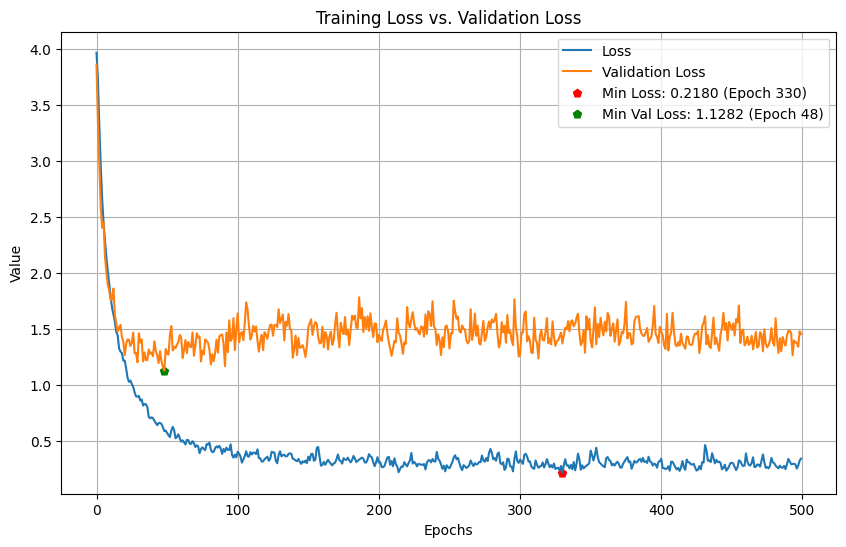

In [190]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

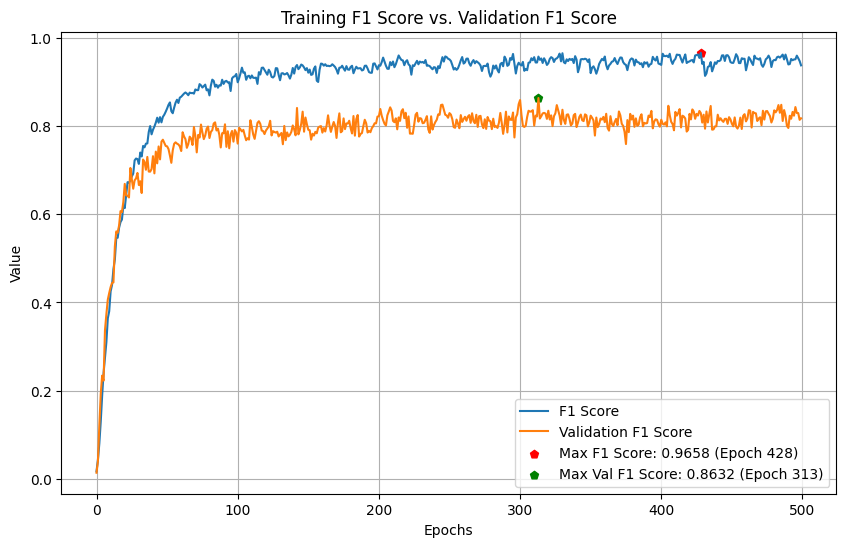

In [191]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [147]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      1.000     0.700     0.824        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.462     1.000     0.632         6
      CANCER      0.727     1.000     0.842         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      0.857     1.000     0.923         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.857     1.000     0.923         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.571     0.667     0.615         6
      DINNER      1.000     0.875     0.933         8
         DOG      0.667     

In [155]:
reconstructed_model = tf.keras.models.load_model(
    "2 1DCNN + 1 LSTM Trial 715 Mish")

In [149]:
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 126, 150)          94650     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 42, 150)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 39, 100)           60100     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 13, 100)          0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 100)           0         
                                                                 
 gru_2 (GRU)                 (None, 150)              

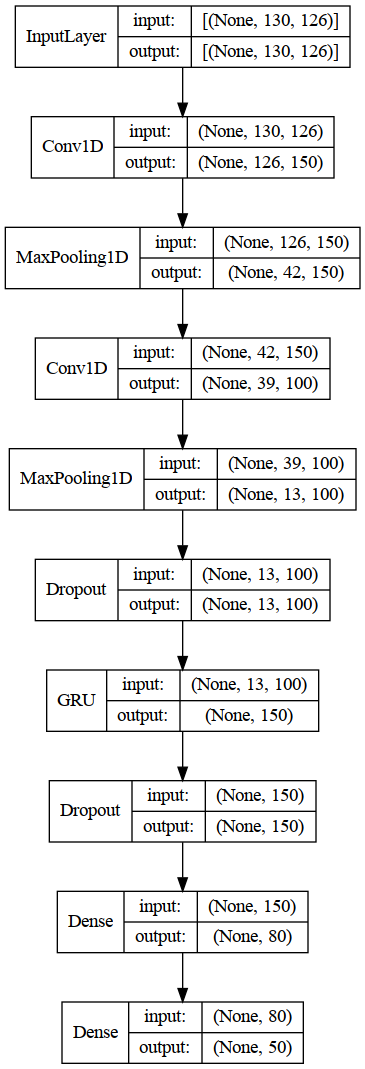

In [150]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

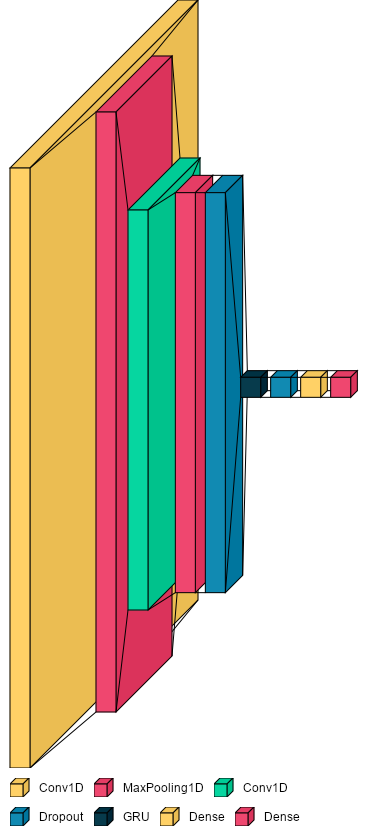

In [156]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [151]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 7ms/step - loss: 1.2373 - f1_score: 0.8632


[1.2372610569000244, 0.8632017374038696]

In [153]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 8ms/step - loss: 0.1030 - f1_score: 1.0000


[0.10299792885780334, 1.0]

In [154]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.800     0.667     0.727         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      1.000     1.000     1.000        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     1.000     0.889         8
   BREAKFAST      0.667     1.000     0.800         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     0.833     0.909         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.714     0.625     0.667         8
     DEVELOP      0.600     1.000     0.750         6
      DINNER      1.000     0.750     0.857         8
         DOG      1.000     

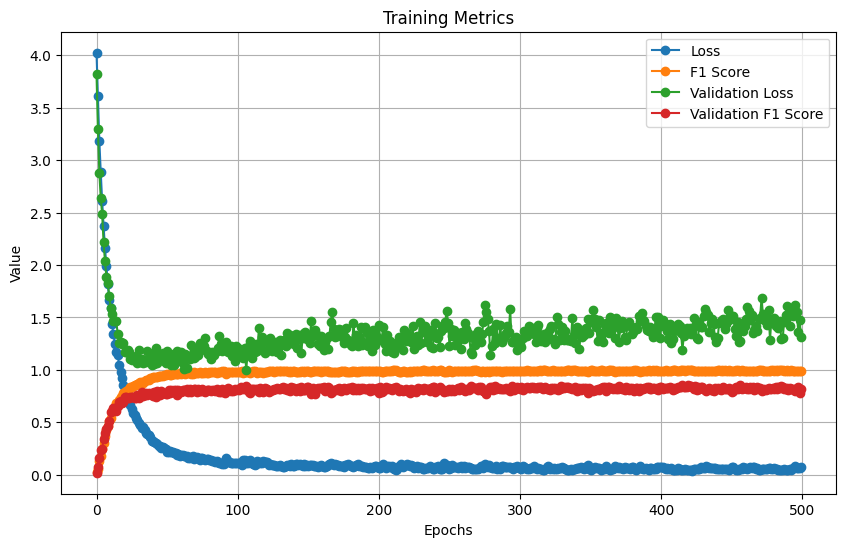

In [249]:
# Plotting
import matplotlib.pyplot as plt

epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, marker='o', label='Loss')
plt.plot(epochs, hist_df.f1_score, marker='o', label='F1 Score')
plt.plot(epochs, hist_df.val_loss, marker='o', label='Validation Loss')
plt.plot(epochs, hist_df.val_f1_score, marker='o', label='Validation F1 Score')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Test in Custom Dataset

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, SGD, Nadam
import os
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
from sklearn.metrics import classification_report


from mmpose.apis import Pose2DInferencer, init_model
import cv2

import pandas as pd
import torch

import matplotlib.pyplot as plt
import numpy as np

In [151]:
def extract_keypoints_from_file(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (640, 480))
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=False,
                                      return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)

In [152]:
def extract_keypoints_from_file_flip(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame, (640, 480))
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=False,
                                      return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)

In [153]:
inferencer = Pose2DInferencer(
    device='cuda',
    model='rtmpose-l_8xb64-270e_coco-wholebody-256x192',
    det_model='yolox_tiny_8x8_300e_coco',
    det_cat_ids=[0],  # the category id of 'human' class
)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-l_simcc-coco-wholebody_pt-aic-coco_270e-256x192-6f206314_20230124.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


In [124]:
words = [
    'AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE', 'BREAKFAST',
    'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF', 'DECIDE', 'DEMAND',
    'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG', 'EAT', 'EDIT', 'ELEVATOR',
    'FINE', 'FLOAT', 'FOREIGNER', 'GUESS', 'HALLOWEEN', 'HOSPITAL',
    'HURDLE/TRIP', 'JEWELRY', 'KNIGHT', 'LOCK', 'LUNCH', 'MAPLE', 'MEAT',
    'MECHANIC', 'MICROSCOPE', 'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR',
    'RIVER', 'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
    'WHATFOR'
]

In [125]:
label_map = {label: num for num, label in enumerate(words)}

In [126]:
inv_label_map = {v: k for k, v in label_map.items()}

In [67]:
label_map

{'AXE': 0,
 'BACKPACK': 1,
 'BASKETBALL': 2,
 'BEE': 3,
 'BELT': 4,
 'BITE': 5,
 'BREAKFAST': 6,
 'CANCER': 7,
 'CHRISTMAS': 8,
 'CONFUSED': 9,
 'DARK': 10,
 'DEAF': 11,
 'DECIDE': 12,
 'DEMAND': 13,
 'DEVELOP': 14,
 'DINNER': 15,
 'DOG': 16,
 'DOWNSIZE': 17,
 'DRAG': 18,
 'EAT': 19,
 'EDIT': 20,
 'ELEVATOR': 21,
 'FINE': 22,
 'FLOAT': 23,
 'FOREIGNER': 24,
 'GUESS': 25,
 'HALLOWEEN': 26,
 'HOSPITAL': 27,
 'HURDLE/TRIP': 28,
 'JEWELRY': 29,
 'KNIGHT': 30,
 'LOCK': 31,
 'LUNCH': 32,
 'MAPLE': 33,
 'MEAT': 34,
 'MECHANIC': 35,
 'MICROSCOPE': 36,
 'MOVIE': 37,
 'NOON': 38,
 'PARTY': 39,
 'PATIENT': 40,
 'RAZOR': 41,
 'RIVER': 42,
 'ROCKINGCHAIR': 43,
 'SHAVE': 44,
 'SINK': 45,
 'SQUEEZE': 46,
 'THEY': 47,
 'TWINS': 48,
 'WHATFOR': 49}

In [66]:
signs_df = pd.read_csv('/home/kristian/cct_gdrive/DAP/Signs_DF.csv')

In [67]:
signs_df.head()

path Gloss             file  \
0  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_1.mp4   
1  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_2.mp4   
2  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_3.mp4   
3  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_4.mp4   
4  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_5.mp4   

   Frequency  Frames  FPS  Length  Width  Height  
0          5     130   24       5    640     480  
1          5     130   24       5    640     480  
2          5     130   24       5    640     480  
3          5     130   24       5    640     480  
4          5     130   24       5    640     480

In [68]:
signs_df.tail()

path    Gloss  \
245  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
246  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
247  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
248  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
249  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   

                    file  Frequency  Frames  FPS  Length  Width  Height  
245  WHATFOR_video_4.mp4          5     130   24       5    640     480  
246  WHATFOR_video_1.mp4          5     130   24       5    640     480  
247  WHATFOR_video_2.mp4          5     130   24       5    640     480  
248  WHATFOR_video_3.mp4          5     130   24       5    640     480  
249  WHATFOR_video_5.mp4          5     130   24       5    640     480

In [69]:
signs_df.describe()

Frequency  Frames    FPS  Length  Width  Height
count      250.0   250.0  250.0   250.0  250.0   250.0
mean         5.0   130.0   24.0     5.0  640.0   480.0
std          0.0     0.0    0.0     0.0    0.0     0.0
min          5.0   130.0   24.0     5.0  640.0   480.0
25%          5.0   130.0   24.0     5.0  640.0   480.0
50%          5.0   130.0   24.0     5.0  640.0   480.0
75%          5.0   130.0   24.0     5.0  640.0   480.0
max          5.0   130.0   24.0     5.0  640.0   480.0

In [70]:
cap = cv2.VideoCapture(signs_df.path[249])
#cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Display the annotated frame
        cv2.imshow("Custom ASL", frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [71]:
signs_df.path[1]

'file:/home/kristian/Capstone/Sign_Videos_DF/AXE/AXE_video_2.mp4'

In [ ]:
extract_keypoints_from_file(signs_df.path[1]).shape

In [20]:
#tqdm.pandas()
#keypoints_series = signs_df['path'].progress_apply(extract_keypoints_from_file)
#np.save("/home/kristian/Capstone/keypoints/Custom_Dataset/RTMPose/sign_videos_keypoints.npy", keypoints_series)

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [43:13<00:00, 10.37s/it]


In [21]:
#tqdm.pandas()
#keypoints_series = signs_df['path'].progress_apply(extract_keypoints_from_file_flip)
#np.save("/home/kristian/Capstone/keypoints/Custom_Dataset/RTMPose/sign_videos_keypoints_flip.npy", keypoints_series)

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [42:16<00:00, 10.15s/it]


In [68]:
import numpy as np

sign_keypoints = np.load(
    "/home/kristian/Capstone/keypoints/Custom_Dataset/RTMPose/sign_videos_keypoints.npy",
    allow_pickle=True)
sign_keypoints_flip = np.load(
    "/home/kristian/Capstone/keypoints/Custom_Dataset/RTMPose/sign_videos_keypoints_flip.npy",
    allow_pickle=True)

print('Sign Keypoints Shape:', sign_keypoints.shape)
print('Sign_FLIP Kepoints Shape:', sign_keypoints_flip.shape)

Sign Keypoints Shape: (250,)
Sign_FLIP Kepoints Shape: (250,)


In [69]:
max_len = 130

In [70]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(sign_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(sign_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

sign_keypoints = keypoints_np
print('Sign Keypoints Shape:', sign_keypoints.shape)

Sign Keypoints Shape: (250, 130, 399)


In [71]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(sign_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(sign_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

sign_keypoints_flip = keypoints_np
print('Sign_flip Keypoints Shape:', sign_keypoints_flip.shape)

Sign_flip Keypoints Shape: (250, 130, 399)


In [72]:
from sklearn.preprocessing import OrdinalEncoder
from keras.utils import to_categorical
import numpy as np

In [82]:
signs_df['Cat_label'] = signs_df['Gloss'].map(label_map)

In [83]:
signs_df.tail(20)

path    Gloss  \
230  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
231  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
232  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
233  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
234  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
235  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
236  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
237  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
238  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
239  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
240  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
241  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
242  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
243  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
244  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
245  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
246  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
247  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
248  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
249  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   

                    file  Frequency  Frames  FPS  Length  Width  Height  \
230  SQUEEZE_video_5.mp4          5     130   24       5    640     480   
231  SQUEEZE_video_3.mp4          5     130   24       5    640     480   
232  SQUEEZE_video_4.mp4          5     130   24       5    640     480   
233  SQUEEZE_video_1.mp4          5     130   24       5    640     480   
234  SQUEEZE_video_2.mp4          5     130   24       5    640     480   
235     THEY_video_1.mp4          5     130   24       5    640     480   
236     THEY_video_2.mp4          5     130   24       5    640     480   
237     THEY_video_3.mp4          5     130   24       5    640     480   
238     THEY_video_4.mp4          5     130   24       5    640     480   
239     THEY_video_5.mp4          5     130   24       5    640     480   
240    TWINS_video_5.mp4          5     130   24       5    640     480   
241    TWINS_video_4.mp4          5     130   24       5    640     480   
242    TWINS_video_2.mp4          5     130   24       5    640     480   
243    TWINS_video_1.mp4          5     130   24       5    640     480   
244    TWINS_video_3.mp4          5     130   24       5    640     480   
245  WHATFOR_video_4.mp4          5     130   24       5    640     480   
246  WHATFOR_video_1.mp4          5     130   24       5    640     480   
247  WHATFOR_video_2.mp4          5     130   24       5    640     480   
248  WHATFOR_video_3.mp4          5     130   24       5    640     480   
249  WHATFOR_video_5.mp4          5     130   24       5    640     480   

     Cat_label  
230         46  
231         46  
232         46  
233         46  
234         46  
235         47  
236         47  
237         47  
238         47  
239         47  
240         48  
241         48  
242         48  
243         48  
244         48  
245         49  
246         49  
247         49  
248         49  
249         49

In [84]:
sign_labels = signs_df['Cat_label'].to_numpy()

In [85]:
sign_labels

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30,
       30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37,
       37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40,
       40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44,
       44, 44, 44, 44, 45

In [86]:
#np.save("/home/kristian/Capstone/keypoints/Custom_Dataset/RTMPose/sign_videos_labels.npy", sign_labels)

In [73]:
sign_labels = np.load(
    "/home/kristian/Capstone/keypoints/Custom_Dataset/RTMPose/sign_videos_labels.npy"
)
sign_labels_flip = np.load(
    "/home/kristian/Capstone/keypoints/Custom_Dataset/RTMPose/sign_videos_labels.npy"
)

In [74]:
from pickle import load

scaler = load(open('scaler.pkl', 'rb'))

num_samples, num_frames, num_keypoints = sign_keypoints.shape
sign_keypoints = sign_keypoints.reshape(num_samples, -1)

# Transform the data
sign_keypoints = scaler.transform(sign_keypoints)

# Reshape the scaled data back to the original shape
sign_keypoints = sign_keypoints.reshape(num_samples, num_frames, num_keypoints)

In [75]:
from pickle import load

scaler = load(open('scaler.pkl', 'rb'))

num_samples, num_frames, num_keypoints = sign_keypoints_flip.shape
sign_keypoints_flip = sign_keypoints_flip.reshape(num_samples, -1)

# Transform the data
sign_keypoints_flip = scaler.transform(sign_keypoints_flip)

# Reshape the scaled data back to the original shape
sign_keypoints_flip = sign_keypoints_flip.reshape(num_samples, num_frames,
                                                  num_keypoints)

In [78]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU")

In [79]:
print(
    classification_report(sign_labels,
                          np.argmax(
                              reconstructed_model.predict(sign_keypoints),
                              axis=1),
                          digits=3,
                          target_names=label_map))

8/8 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

         AXE      0.286     0.400     0.333         5
    BACKPACK      0.000     0.000     0.000         5
  BASKETBALL      0.833     1.000     0.909         5
         BEE      0.429     0.600     0.500         5
        BELT      1.000     1.000     1.000         5
        BITE      0.000     0.000     0.000         5
   BREAKFAST      0.000     0.000     0.000         5
      CANCER      0.000     0.000     0.000         5
   CHRISTMAS      1.000     1.000     1.000         5
    CONFUSED      0.556     1.000     0.714         5
        DARK      1.000     1.000     1.000         5
        DEAF      1.000     0.400     0.571         5
      DECIDE      1.000     1.000     1.000         5
      DEMAND      0.000     0.000     0.000         5
     DEVELOP      0.000     0.000     0.000         5
      DINNER      0.625     1.000     0.769         5
         DOG      1.000     0

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Realtime Implementation

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, SGD, Nadam
import os
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
from sklearn.metrics import classification_report


from mmpose.apis import Pose2DInferencer, init_model
import cv2
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [155]:
inferencer = Pose2DInferencer(
    device='cuda',
    model='rtmpose-l_8xb64-270e_coco-wholebody-256x192',
    det_model='yolox_tiny_8x8_300e_coco',
    det_cat_ids=[0],  # the category id of 'human' class
)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-l_simcc-coco-wholebody_pt-aic-coco_270e-256x192-6f206314_20230124.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


In [156]:
from pickle import load


scaler = load(open('scaler.pkl', 'rb'))
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU")

In [157]:
words = [
    'AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE', 'BREAKFAST',
    'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF', 'DECIDE', 'DEMAND',
    'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG', 'EAT', 'EDIT', 'ELEVATOR',
    'FINE', 'FLOAT', 'FOREIGNER', 'GUESS', 'HALLOWEEN', 'HOSPITAL',
    'HURDLE/TRIP', 'JEWELRY', 'KNIGHT', 'LOCK', 'LUNCH', 'MAPLE', 'MEAT',
    'MECHANIC', 'MICROSCOPE', 'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR',
    'RIVER', 'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
    'WHATFOR'
]

In [158]:
label_map = {label: num for num, label in enumerate(words)}

In [159]:
inv_label_map = {v: k for k, v in label_map.items()}

In [176]:
tf.random.set_seed(5)
tf.keras.utils.set_random_seed(5)

In [177]:
signs_df = pd.read_csv('/home/kristian/cct_gdrive/DAP/Signs_DF.csv')

signs_df = signs_df.sample(frac=1).reset_index(drop=True)

num_clips_to_concatenate = 10

video_clips = []

# Loop through the shuffled DataFrame and add video clips
for index, row in signs_df.iterrows():
    if len(video_clips) >= num_clips_to_concatenate:
        break

    path = row['path']  # Get the video path from the DataFrame
    gloss_label = row['Gloss']  # Get the gloss label from the DataFrame
    cap = cv2.VideoCapture(path)

    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Add gloss label
        text_position = (10, frame.shape[0] - 50)
        cv2.putText(frame, f'Gloss: {gloss_label}', text_position,
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
        frames.append(frame)

    cap.release()

    if len(frames) > 0:
        video_clips.append(frames)

# Concatenate the video clips
if len(video_clips) > 0:
    concatenated_clip = cv2.VideoWriter(
        'concatenated_video5.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 24,
        (frames[0].shape[1], frames[0].shape[0]))
    for clip_frames in video_clips:
        for frame in clip_frames:
            concatenated_clip.write(frame)
    concatenated_clip.release()

    # Play the concatenated video
    cap_concatenated = cv2.VideoCapture('concatenated_video5.mp4')
    while True:
        ret, frame = cap_concatenated.read()
        if not ret:
            break
        cv2.imshow("Concatenated Video", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
    cap_concatenated.release()
    cv2.destroyAllWindows()
else:
    print("No video clips to concatenate.")

In [178]:
#path = valdf.Path[40]
#print(path)
#path = '/home/kristian/ASL_Citizen/videos/7246944741037324-CONFUSED.mp4'

#path = 0
#path = '/home/kristian/Capstone/Sign_Videos_DF/BASKETBALL/BASKETBALL_video_1.mp4'
path = 'concatenated_video5.mp4'
cap = cv2.VideoCapture(path)
#cap = cv2.VideoCapture(0)
#print(frames_from_file(path))
print(path)
sequence = [np.zeros(399)] * 130
inference_times = []
predictions = ['None']
threshold = 0.8
i = 0
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = 0
total_inference_time = 0
writer= cv2.VideoWriter('test5.avi', cv2.VideoWriter_fourcc(*'XVID'), 24, (width,height))

cap = cv2.VideoCapture(path)
#cap = cv2.VideoCapture(0)
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        fps = cap.get(cv2.CAP_PROP_FPS)
        start_time = time.time()

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=True,
                                      return_datasample=False)
        result = next(result_generator)

        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Initialize an empty list to store the keypoints for each frame
        sequence = np.array(sequence)
        sequence = sequence.reshape(1, -1)
        sequence = scaler.inverse_transform(sequence).reshape(130, 399)
        sequence = sequence.tolist()
        sequence.append(keypoint)
        sequence.pop(0)  # Remove the oldest element
        sequence = np.array(sequence)
        sequence = sequence.reshape(1, -1)
        sequence = scaler.transform(sequence).reshape(130, 399)
        sequence = sequence.tolist()

        i = i + 1
        if i == fps / 2:
            i = 0
            res = reconstructed_model.predict(np.expand_dims(sequence,
                                                             axis=0))[0]
            if res[np.argmax(res)] > threshold:
                print(inv_label_map[np.argmax(res)])
                predictions.append(inv_label_map[np.argmax(res)])

        # Calculate inference time for this frame
        end_time = time.time()
        inference_time = end_time - start_time
        inference_times.append(inference_time)

        image_array = cv2.cvtColor(result['visualization'][0],
                                   cv2.COLOR_RGB2BGR)

        #Write prediction and time
        image_array = cv2.putText(image_array,
                                  f'Inference Time: {inference_time:.2f} sec',
                                  (10, image_array.shape[0] - 10),
                                  cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0),
                                  2)

        image_array = cv2.putText(image_array,
                                  'Last Prediction:' + predictions[-1],
                                  (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0,
                                  (0, 255, 0), 2)

        writer.write(image_array)
        cv2.imshow("RTMPose Inference", image_array)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

# Calculate average inference time
average_inference_time = np.mean(inference_times)
print(f'Average Inference Time: {average_inference_time:.2f} seconds')

Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   

Average Inference Time: 0.14 seconds


In [179]:
cap.release()
cv2.destroyAllWindows()

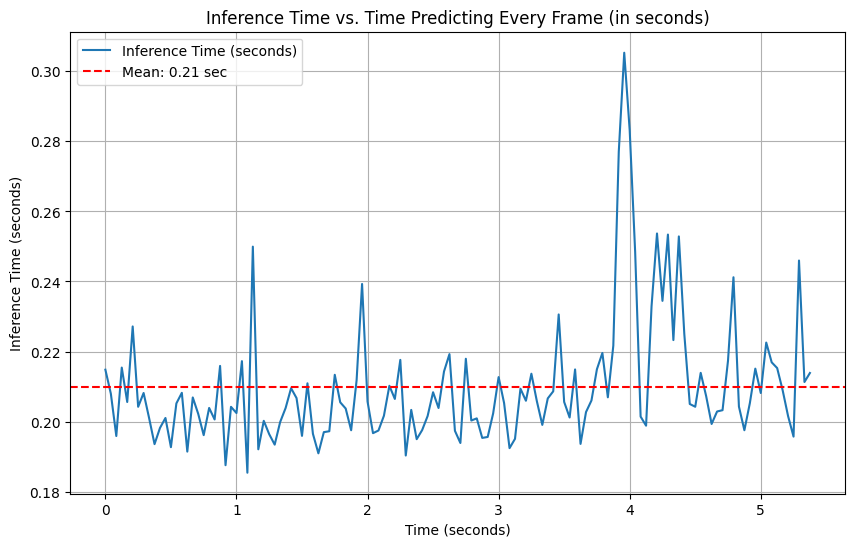

In [19]:
time_intervals = [i / fps for i in range(len(inference_times))]

mean_inference_time = np.mean(inference_times)

plt.figure(figsize=(10, 6))
plt.plot(time_intervals, inference_times, label='Inference Time (seconds)')
plt.axhline(mean_inference_time,
            color='red',
            linestyle='--',
            label=f'Mean: {mean_inference_time:.2f} sec')

plt.xlabel('Time (seconds)')
plt.ylabel('Inference Time (seconds)')
plt.legend()

plt.title('Inference Time vs. Time Predicting Every Frame (in seconds)')
plt.grid()
plt.show()

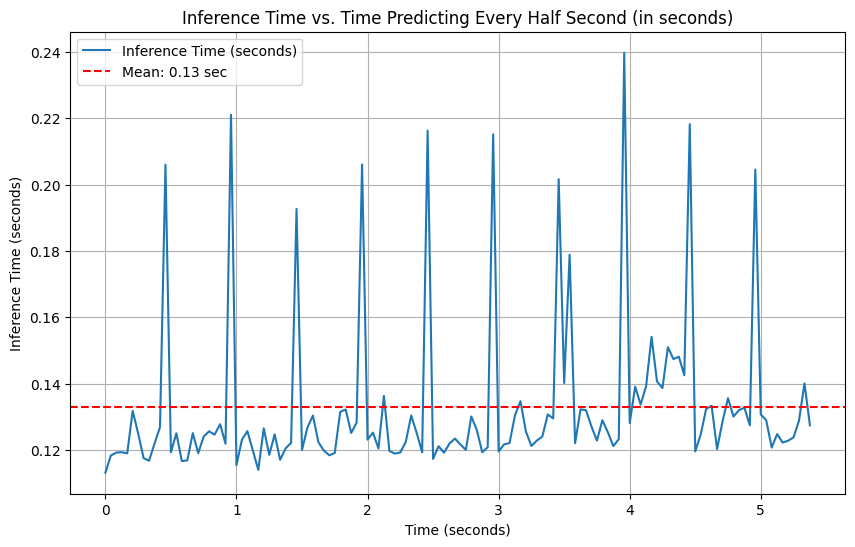

In [17]:
import matplotlib.pyplot as plt
import numpy as np

time_intervals = [i / fps for i in range(len(inference_times))]

mean_inference_time = np.mean(inference_times)

plt.figure(figsize=(10, 6))
plt.plot(time_intervals, inference_times, label='Inference Time (seconds)')
plt.axhline(mean_inference_time,
            color='red',
            linestyle='--',
            label=f'Mean: {mean_inference_time:.2f} sec')

plt.xlabel('Time (seconds)')
plt.ylabel('Inference Time (seconds)')
plt.legend()

plt.title('Inference Time vs. Time Predicting Every Half Second (in seconds)')
plt.grid()
plt.show()